## 1. Import Libaries

In [140]:
from scipy.stats import randint
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

# Data Modelling
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb
import catboost
from catboost import CatBoostClassifier
from catboost import datasets

# Performance Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score,log_loss,f1_score,confusion_matrix

In [61]:
!pip install scikit-plot

## 2. Import SEER Breast Cancer Dataset

In [4]:
import numpy as np
import pandas as pd
data=pd.read_csv('2011-2015.csv')#,index_col=0)
# Making a list of missing value types
#missing_values = ["n/a", "na", "--"]
#df = pd.read_csv("property data.csv", na_values = missing_values)

In [5]:
data.head(5)

Year of diagnosis Breast - Adjusted AJCC 6th T (1988-2015)  \
0               2015                                      T1c   
1               2013                              TX Adjusted   
2               2012                                      T1c   
3               2014                                      T1c   
4               2011                              TX Adjusted   

                                 Grade  CS lymph nodes (2004-2015)  \
0  Moderately differentiated; Grade II                         250   
1                              Unknown                         999   
2  Moderately differentiated; Grade II                           0   
3  Moderately differentiated; Grade II                           0   
4                              Unknown                         600   

  Race/ethnicity  Age at diagnosis     Marital status at diagnosis  \
0          White                54  Married (including common law)   
1          White                44                        Divorced   
2          White                82                         Widowed   
3          White                56  Married (including common law)   
4          Black                85                         Widowed   

   Primary Site  CS tumor size (2004-2015)  \
0           504                         15   
1           509                        999   
2           502                         12   
3           508                         19   
4           509                        999   

   CS site-specific factor 1 (2004+ varying by schema)  \
0                                                 10     
1                                                998     
2                                                 10     
3                                                 10     
4                                                998     

                  Type of Reporting Source  Histologic Type ICD-O-3  \
0  Hospital inpatient/outpatient or clinic                     8522   
1  Hospital inpatient/outpatient or clinic                     8010   
2  Hospital inpatient/outpatient or clinic                     8500   
3  Hospital inpatient/outpatient or clinic                     8500   
4  Hospital inpatient/outpatient or clinic                     8010   

  Behavior code ICD-O-3  Regional nodes examined (1988+)  \
0             Malignant                                7   
1             Malignant                               99   
2             Malignant                                0   
3             Malignant                                1   
4             Malignant                                0   

   Regional nodes positive (1988+)             Sequence number  \
0                                1  2nd of 2 or more primaries   
1                               99  3rd of 3 or more primaries   
2                               98  2nd of 2 or more primaries   
3                                0  2nd of 2 or more primaries   
4                               98  2nd of 2 or more primaries   

   CS extension (2004-2015) Survival months  
0                       100              12  
1                       999              28  
2                       100              51  
3                       100              33  
4                       790              10

### Rename Column Names

In [6]:
# Rename the column name
data.rename(columns={'Year of diagnosis': 'Year', 'Breast - Adjusted AJCC 6th T (1988-2015)': 'Stage',
                    'CS lymph nodes (2004-2015)': 'Lymph node involvement','Race/ethnicity': 'Race','Age at diagnosis': 'Age','Marital status at diagnosis': 'Marital status',
                    'CS tumor size (2004-2015)': 'Tumor size','CS site-specific factor 1 (2004+ varying by schema)': 'Site-specific surgery','Type of Reporting Source': 'Radiation','Histologic Type ICD-O-3': 'Histological type',
                    'Behavior code ICD-O-3': 'Behavior code','Regional nodes examined (1988+)': 'No of nodes examined','Regional nodes positive (1988+)': 'No of positive nodes examined','Sequence number': 'Number of primaries',
                    'CS extension (2004-2015)': 'Clinical extension of tumor','Survival months': 'Survivability'},inplace=True)
data

Year        Stage                                Grade  \
0       2015          T1c  Moderately differentiated; Grade II   
1       2013  TX Adjusted                              Unknown   
2       2012          T1c  Moderately differentiated; Grade II   
3       2014          T1c  Moderately differentiated; Grade II   
4       2011  TX Adjusted                              Unknown   
...      ...          ...                                  ...   
320768  2015  TX Adjusted     Poorly differentiated; Grade III   
320769  2014  Any T, Mets                              Unknown   
320770  2012  TX Adjusted                              Unknown   
320771  2013  TX Adjusted                              Unknown   
320772  2014          T1c  Moderately differentiated; Grade II   

        Lymph node involvement      Race  Age                  Marital status  \
0                          250     White   54  Married (including common law)   
1                          999     White   44                        Divorced   
2                            0     White   82                         Widowed   
3                            0     White   56  Married (including common law)   
4                          600     Black   85                         Widowed   
...                        ...       ...  ...                             ...   
320768                     999     White   75                         Unknown   
320769                     255  Hawaiian   65                         Unknown   
320770                     999     White   37  Married (including common law)   
320771                     999     White   82                         Widowed   
320772                       0     White   64  Married (including common law)   

        Primary Site  Tumor size  Site-specific surgery  \
0                504          15                     10   
1                509         999                    998   
2                502          12                     10   
3                508          19                     10   
4                509         999                    998   
...              ...         ...                    ...   
320768           509         999                     10   
320769           509         999                    999   
320770           509         999                    999   
320771           509         999                    999   
320772           504          12                     10   

                                      Radiation  Histological type  \
0       Hospital inpatient/outpatient or clinic               8522   
1       Hospital inpatient/outpatient or clinic               8010   
2       Hospital inpatient/outpatient or clinic               8500   
3       Hospital inpatient/outpatient or clinic               8500   
4       Hospital inpatient/outpatient or clinic               8010   
...                                         ...                ...   
320768    Laboratory only (hospital or private)               8500   
320769  Hospital inpatient/outpatient or clinic               8500   
320770  Hospital inpatient/outpatient or clinic               8000   
320771  Hospital inpatient/outpatient or clinic               8000   
320772  Hospital inpatient/outpatient or clinic               8500   

       Behavior code  No of nodes examined  No of positive nodes examined  \
0          Malignant                     7                              1   
1          Malignant                    99                             99   
2          Malignant                     0                             98   
3          Malignant                     1                              0   
4          Malignant                     0                             98   
...              ...                   ...                            ...   
320768     Malignant                     0                             98   
320769     Malignant                    99                             99   

In [7]:
print(data.dtypes)
print(data.shape)

Year                              int64
Stage                            object
Grade                            object
Lymph node involvement            int64
Race                             object
Age                               int64
Marital status                   object
Primary Site                      int64
Tumor size                        int64
Site-specific surgery             int64
Radiation                        object
Histological type                 int64
Behavior code                    object
No of nodes examined              int64
No of positive nodes examined     int64
Number of primaries              object
Clinical extension of tumor       int64
Survivability                    object
dtype: object
(320773, 18)


## 3. Exploratory Data Analysis

### Visualization of Target Attribute

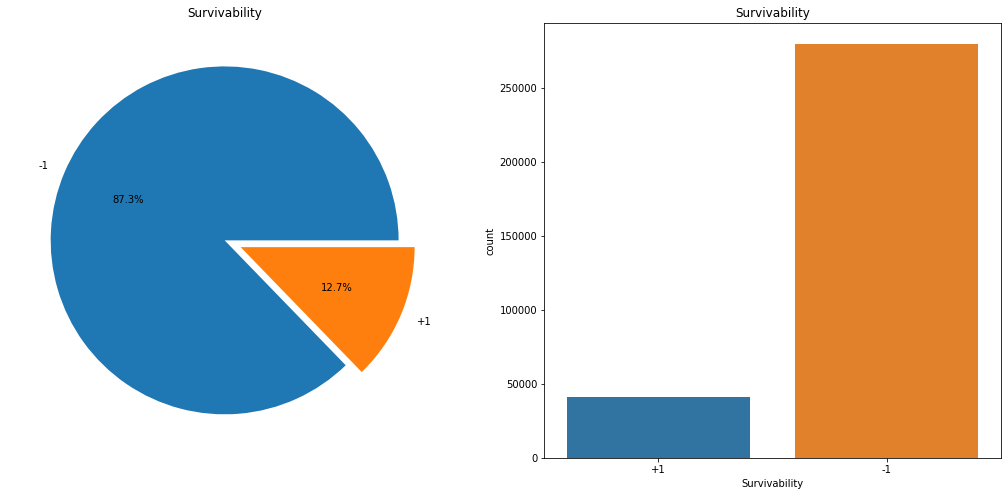

In [79]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survivability'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('Survivability')
ax[0].set_ylabel('')
sns.countplot('Survivability',data=data,ax=ax[1])
ax[1].set_title('Survivability')
plt.show()

### Visualization of Continuous Variables

(0, 40)

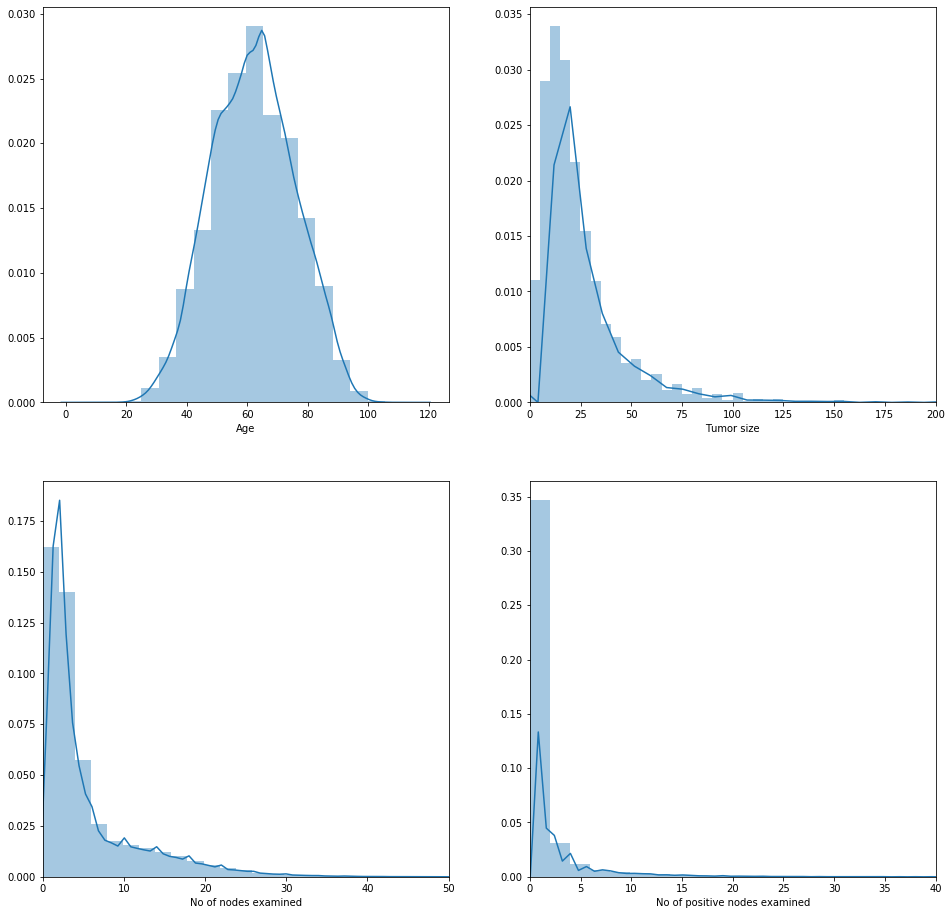

In [113]:
fig, ax = plt.subplots(2,2, figsize=(16,16))
dataplot = data.copy()
a=sns.distplot(dataplot['Age'], bins=20, ax=ax[0,0])
b=sns.distplot(dataplot['Tumor size'],bins=200, ax=ax[0,1])
b.set_xlim([0, 200])
c=sns.distplot(dataplot['No of nodes examined'],bins=50, ax=ax[1,0])
c.set_xlim([0, 50])
d=sns.distplot(dataplot['No of positive nodes examined'], ax=ax[1,1])
d.set_xlim([0, 40])

## 4. Data Pre-processing

### Missing Values and Unknowns

### Checking sum of missing values in each column

In [8]:
# Total missing values for each feature
print (data.isnull().sum())
# print (data.isna().sum())

Year                               0
Stage                            444
Grade                              0
Lymph node involvement             0
Race                               0
Age                                0
Marital status                     0
Primary Site                       0
Tumor size                         0
Site-specific surgery              0
Radiation                          0
Histological type                  0
Behavior code                      0
No of nodes examined               0
No of positive nodes examined      0
Number of primaries                0
Clinical extension of tumor        0
Survivability                      0
dtype: int64


### Detect missing value in 'Stage' column

In [9]:
data['Stage'].value_counts()#.sum()
#len(data)

T1c            99240
T2             85322
T1b            51321
T1a            21235
Any T, Mets    17056
T3             16364
TX Adjusted    14738
T1mic           5868
T4b             4395
T4d             2661
T4a             1016
T0               522
Tis              446
T4c              145
Name: Stage, dtype: int64

### Impute missing value with mode

In [10]:
# fill na
data['Stage'].fillna("T1c", inplace=True)
#print (data['Stage'].isnull().sum())
#data['Stage'].value_counts()

### Detect missing value in 'Survivability' column

In [11]:
data['Survivability'].value_counts()

18         6820
13         6613
16         6569
14         6426
12         6300
           ... 
7          1808
3          1771
8          1749
9          1706
Unknown    1374
Name: Survivability, Length: 73, dtype: int64

In [12]:
data[data['Survivability']=='Unknown']

Year        Stage    Grade  Lymph node involvement   Race  Age  \
121     2012  TX Adjusted  Unknown                     999  White  101   
7136    2014  TX Adjusted  Unknown                     999  White   55   
8093    2012  Any T, Mets  Unknown                     250  White   79   
8963    2011  TX Adjusted  Unknown                     999  White   88   
8978    2011  TX Adjusted  Unknown                     999  White   90   
...      ...          ...      ...                     ...    ...  ...   
320718  2015  TX Adjusted  Unknown                     999  White   74   
320719  2015  TX Adjusted  Unknown                     999  White  109   
320720  2015  TX Adjusted  Unknown                     999  White   77   
320721  2015  TX Adjusted  Unknown                     999  Black   77   
320722  2015  TX Adjusted  Unknown                     999  White   82   

                        Marital status  Primary Site  Tumor size  \
121                           Divorced           509         999   
7136    Married (including common law)           509         999   
8093            Single (never married)           503          28   
8963                          Divorced           509         999   
8978                           Widowed           509         999   
...                                ...           ...         ...   
320718  Married (including common law)           509         999   
320719                         Widowed           509         999   
320720                         Widowed           509         999   
320721                         Widowed           509         999   
320722                        Divorced           509         999   

        Site-specific surgery               Radiation  Histological type  \
121                       999  Death certificate only               8000   
7136                      999  Death certificate only               8000   
8093                      998            Autopsy only               8500   
8963                      999  Death certificate only               8000   
8978                      999  Death certificate only               8000   
...                       ...                     ...                ...   
320718                    999  Death certificate only               8000   
320719                    999  Death certificate only               8000   
320720                    999  Death certificate only               8000   
320721                    999  Death certificate only               8000   
320722                    999  Death certificate only               8000   

       Behavior code  No of nodes examined  No of positive nodes examined  \
121        Malignant                    99                             99   
7136       Malignant                    99                             99   
8093       Malignant                    96                             97   
8963       Malignant                    99                             99   
8978       Malignant                    99                             99   
...              ...                   ...                            ...   
320718     Malignant                    99                             99   
320719     Malignant                    99                             99   
320720     Malignant                    99                             99   
320721     Malignant                    99                             99   
320722     Malignant                    99                             99   

               Number of primaries  Clinical extension of tumor Survivability  
121     3rd of 3 or more primaries                          999       Unknown  
7136    2nd of 2 or more primaries                          999       Unknown  
8093              One primary only                          200       Unknown  
8963              One primary only                          999       Unknown  
8978              One primary only                          999 

In [13]:
#data[data['Survivability']=='0']
data

Year        Stage                                Grade  \
0       2015          T1c  Moderately differentiated; Grade II   
1       2013  TX Adjusted                              Unknown   
2       2012          T1c  Moderately differentiated; Grade II   
3       2014          T1c  Moderately differentiated; Grade II   
4       2011  TX Adjusted                              Unknown   
...      ...          ...                                  ...   
320768  2015  TX Adjusted     Poorly differentiated; Grade III   
320769  2014  Any T, Mets                              Unknown   
320770  2012  TX Adjusted                              Unknown   
320771  2013  TX Adjusted                              Unknown   
320772  2014          T1c  Moderately differentiated; Grade II   

        Lymph node involvement      Race  Age                  Marital status  \
0                          250     White   54  Married (including common law)   
1                          999     White   44                        Divorced   
2                            0     White   82                         Widowed   
3                            0     White   56  Married (including common law)   
4                          600     Black   85                         Widowed   
...                        ...       ...  ...                             ...   
320768                     999     White   75                         Unknown   
320769                     255  Hawaiian   65                         Unknown   
320770                     999     White   37  Married (including common law)   
320771                     999     White   82                         Widowed   
320772                       0     White   64  Married (including common law)   

        Primary Site  Tumor size  Site-specific surgery  \
0                504          15                     10   
1                509         999                    998   
2                502          12                     10   
3                508          19                     10   
4                509         999                    998   
...              ...         ...                    ...   
320768           509         999                     10   
320769           509         999                    999   
320770           509         999                    999   
320771           509         999                    999   
320772           504          12                     10   

                                      Radiation  Histological type  \
0       Hospital inpatient/outpatient or clinic               8522   
1       Hospital inpatient/outpatient or clinic               8010   
2       Hospital inpatient/outpatient or clinic               8500   
3       Hospital inpatient/outpatient or clinic               8500   
4       Hospital inpatient/outpatient or clinic               8010   
...                                         ...                ...   
320768    Laboratory only (hospital or private)               8500   
320769  Hospital inpatient/outpatient or clinic               8500   
320770  Hospital inpatient/outpatient or clinic               8000   
320771  Hospital inpatient/outpatient or clinic               8000   
320772  Hospital inpatient/outpatient or clinic               8500   

       Behavior code  No of nodes examined  No of positive nodes examined  \
0          Malignant                     7                              1   
1          Malignant                    99                             99   
2          Malignant                     0                             98   
3          Malignant                     1                              0   
4          Malignant                     0                             98   
...              ...                   ...                            ...   
320768     Malignant                     0                             98   
320769     Malignant                    99                             99   

### Impute 'Unknown' with Mean

In [14]:
# Convert 'Unknown' values in survivability column into nan value
data.Survivability.replace('Unknown', np.nan,inplace=True)
# Convert datatype of 'Survivability' column into integer
data.Survivability=data.Survivability.astype(float)
# Fill the NaN value with mean values in the corresponding column
data.Survivability.fillna(data['Survivability'].mean(),inplace=True)
data.Survivability=data.Survivability.astype(int)

In [15]:
# Checking after imputation with mean
data.Survivability.dtypes
data.Survivability.value_counts()

18    6820
13    6613
16    6569
14    6426
35    6337
      ... 
10    1867
7     1808
3     1771
8     1749
9     1706
Name: Survivability, Length: 72, dtype: int64

### Imbalanced Dataset Processing

In [16]:
data['Survivability'] = data['Survivability'].apply(lambda x: '+1' if x>60 else '-1')
data.Survivability.value_counts()
# The target variable “survivability” of SEER dataset is a binary categorical feature 
# with values ‘-1’ (if the patient had not survived longer than 5years after diagnosis) or +1 (hadsurvived).

-1    279878
+1     40895
Name: Survivability, dtype: int64

### Categorical Variables Encoding

In [17]:
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary:df_dict
df_dict=data.to_dict("records")

# Create the DictVectorizer object： dv
dv = DictVectorizer(sparse= False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5,:])

# Print the vocabulary
print(dv.vocabulary_)

[[5.400e+01 1.000e+00 1.000e+02 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 8.522e+03 2.500e+02 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 7.000e+00 1.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.040e+02 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 1.500e+01 2.015e+03]
 [4.400e+01 1.000e+00 9.990e+02 0.000e+00 0.000e+00 0.000e+00 1

In [18]:
pd.DataFrame(df_encoded,columns=dv.vocabulary_)

Year  Stage=T1c  Grade=Moderately differentiated; Grade II  \
0       54.0        1.0                                      100.0   
1       44.0        1.0                                      999.0   
2       82.0        1.0                                      100.0   
3       56.0        1.0                                      100.0   
4       85.0        1.0                                      790.0   
...      ...        ...                                        ...   
320768  75.0        1.0                                      999.0   
320769  65.0        1.0                                      100.0   
320770  37.0        1.0                                      999.0   
320771  82.0        1.0                                      999.0   
320772  64.0        1.0                                      100.0   

        Lymph node involvement  Race=White  Age  \
0                          1.0         0.0  0.0   
1                          0.0         0.0  0.0   
2                          1.0         0.0  0.0   
3                          1.0         0.0  0.0   
4                          0.0         0.0  0.0   
...                        ...         ...  ...   
320768                     0.0         1.0  0.0   
320769                     0.0         0.0  0.0   
320770                     0.0         0.0  0.0   
320771                     0.0         0.0  0.0   
320772                     1.0         0.0  0.0   

        Marital status=Married (including common law)  Primary Site  \
0                                                 0.0           0.0   
1                                                 1.0           0.0   
2                                                 0.0           0.0   
3                                                 0.0           0.0   
4                                                 1.0           0.0   
...                                               ...           ...   
320768                                            0.0           0.0   
320769                                            1.0           0.0   
320770                                            1.0           0.0   
320771                                            1.0           0.0   
320772                                            0.0           0.0   

        Tumor size  Site-specific surgery  ...  Race=Chamorran (1991+)  \
0           8522.0                  250.0  ...                     0.0   
1           8010.0                  999.0  ...                     0.0   
2           8500.0                    0.0  ...                     0.0   
3           8500.0                    0.0  ...                     0.0   
4           8010.0                  600.0  ...                     0.0   
...            ...                    ...  ...                     ...   
320768      8500.0                  999.0  ...                     0.0   
320769      8500.0                  255.0  ...                     0.0   
320770      8000.0                  999.0  ...                     0.0   
320771      8000.0                  999.0  ...                     0.0   
320772      8500.0                    0.0  ...                     0.0   

        Race=Micronesian, NOS (1991+)  Race=Tahitian (1991+)  \
0                                 0.0                    0.0   
1                                 0.0                    0.0   
2                                 0.0                    0.0   
3                                 0.0                    0.0   
4                                 0.0                    0.0   
...                               ...                    ...   
320768                            0.0                    0.0   
320769                            0.0                    0.0   
320770                            0.0                    0.0   
320771                            0.0                    0.0   
320772                            0.0                    0.0   

        Race=New Guinean (1991+)  \
0      

### Encoded Dataset into Dataframe

In [19]:
# Get dummies
df_dummied=pd.get_dummies(data, prefix_sep='_', drop_first=True)
df_dummied

Year  Lymph node involvement  Age  Primary Site  Tumor size  \
0       2015                     250   54           504          15   
1       2013                     999   44           509         999   
2       2012                       0   82           502          12   
3       2014                       0   56           508          19   
4       2011                     600   85           509         999   
...      ...                     ...  ...           ...         ...   
320768  2015                     999   75           509         999   
320769  2014                     255   65           509         999   
320770  2012                     999   37           509         999   
320771  2013                     999   82           509         999   
320772  2014                       0   64           504          12   

        Site-specific surgery  Histological type  No of nodes examined  \
0                          10               8522                     7   
1                         998               8010                    99   
2                          10               8500                     0   
3                          10               8500                     1   
4                         998               8010                     0   
...                       ...                ...                   ...   
320768                     10               8500                     0   
320769                    999               8500                    99   
320770                    999               8000                    99   
320771                    999               8000                    99   
320772                     10               8500                     1   

        No of positive nodes examined  Clinical extension of tumor  ...  \
0                                   1                          100  ...   
1                                  99                          999  ...   
2                                  98                          100  ...   
3                                   0                          100  ...   
4                                  98                          790  ...   
...                               ...                          ...  ...   
320768                             98                          999  ...   
320769                             99                          100  ...   
320770                             99                          999  ...   
320771                             99                          999  ...   
320772                              0                          100  ...   

        Number of primaries_2nd of 2 or more primaries  \
0                                                    1   
1                                                    0   
2                                                    1   
3                                                    1   
4                                                    1   
...                                                ...   
320768                                               0   
320769                                               0   
320770                                               1   
320771                                               0   
320772                                               0   

        Number of primaries_3rd of 3 or more primaries  \
0                                                    0   
1                                                    1   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
320768                                               0   
320769                                               0   
320770                                               0   
320771                                               0   
320772                        

In [20]:
df_dummied["Survivability_-1"].value_counts() # 1 is not survived more than 5 years, 0 is survived more than 5 years

1    279878
0     40895
Name: Survivability_-1, dtype: int64

### Dealing with Imbalanced Data

### Oversampling Method

In [21]:
from sklearn.utils import resample

# Separate input features and target
x_data = df_dummied.drop(columns=['Survivability_-1','Year'])
y_data = df_dummied['Survivability_-1']

# setting up testing and training sets
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data,random_state=123, test_size=0.25)

# concatenate our training data back together
x_sample = pd.concat([xtrain, ytrain], axis=1)

# separate minority and majority classes
not_survived = x_sample[x_sample['Survivability_-1']== 1] # 1 is not survived
survived = x_sample[x_sample['Survivability_-1']== 0]  # 0 is survived

# upsample minority
survived_upsampled = resample(survived,
                          replace=True, # sample with replacement
                          n_samples=len(not_survived), # match number in majority class
                          random_state=123) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_survived, survived_upsampled])

# check new class counts
upsampled['Survivability_-1'].value_counts()
#    1    213245
#    0    213245

1    209963
0    209963
Name: Survivability_-1, dtype: int64

In [22]:
upsampled

Lymph node involvement  Age  Primary Site  Tumor size  \
258741                       0   64           505          14   
33036                      250   76           505          15   
41514                      250   65           508          21   
20044                        0   81           508          10   
113563                     250   43           503          20   
...                        ...  ...           ...         ...   
168564                     250   62           509          52   
165467                     250   74           504          25   
1132                         0   63           504          22   
165908                       0   40           504          24   
173329                     250   59           509          24   

        Site-specific surgery  Histological type  No of nodes examined  \
258741                     10               8201                     3   
33036                      10               8520                     3   
41514                      10               8500                     2   
20044                      10               8500                     0   
113563                     10               8500                     7   
...                       ...                ...                   ...   
168564                     20               8500                    17   
165467                     20               8500                    12   
1132                       10               8500                     0   
165908                     10               8500                     0   
173329                     20               8500                    29   

        No of positive nodes examined  Clinical extension of tumor  Stage_T0  \
258741                              0                          100         0   
33036                               1                          100         0   
41514                               1                          200         0   
20044                              98                          100         0   
113563                              1                          100         0   
...                               ...                          ...       ...   
168564                              1                          100         0   
165467                              1                          100         0   
1132                               98                          100         0   
165908                             98                          100         0   
173329                              3                          100         0   

        ...  Number of primaries_2nd of 2 or more primaries  \
258741  ...                                               0   
33036   ...                                               0   
41514   ...                                               0   
20044   ...                                               0   
113563  ...                                               0   
...     ...                                             ...   
168564  ...                                               1   
165467  ...                                               0   
1132    ...                                               1   
165908  ...                                               0   
173329  ...                                               0   

        Number of primaries_3rd of 3 or more primaries  \
258741                                               0   
33036                                                0   
41514                                                0   
20044                                                0   
113563                                               0   
...                                                ...   
168564                                               0   
165467                                               0   
1132                                                 0   
165908                                  

## 5. Data Modelling and Parameter Tuning

In [23]:
#!pip install numpy==1.16.1 --user

### Training and Testing Test

In [24]:
# instantiate the classifier with n_estimators = 100
x_data = upsampled.drop(columns=['Survivability_-1'])
y_data = upsampled['Survivability_-1']

# setting up testing and training set
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data,random_state=123, test_size=0.25)
methodDict = {}
rmseDict = ()

### Identifying Index of Categorical Variables

In [25]:
#categorical_features = np.where(x_data.dtypes == 'object')[0]
categorical_features_indices = np.where(x_data.dtypes != np.int64)[0]
categorical_features_indices

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80], dtype=int64)

### Define confusion matrix function

In [26]:
# function for evaluation
def evalClassModel(model, ytest, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(ytest, y_pred_class))
    
    #Comparing the true and predicted response values
    #print('True:', y_test.values[0:25])
    #print('Pred:', y_pred_class[0:25])
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(ytest, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    accuracy = metrics.accuracy_score(ytest, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    print('F1 Score:',f1_score(ytest, y_pred_class))

    print('AUC Score:', metrics.roc_auc_score(ytest, y_pred_class))
    
    print('Cross-validated AUC:', cross_val_score(model, x_data, y_data, cv=10, scoring='roc_auc').mean())
  
    return accuracy

### Random Forest Modelling

In [34]:
def randomForest():

    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 30, random_state = 1)
    my_forest = forest.fit(xtrain, ytrain)
    
    # make class predictions for the testing set
    y_pred_class = my_forest.predict(xtest)
    
    print('########### Random Forests ###############')
    feat_imp = pd.DataFrame({'importance':my_forest.feature_importances_})    
    feat_imp['feature'] = xtrain.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:xtrain.shape[1]]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title="Feature Importances", figsize=(8,8))
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    accuracy_score = evalClassModel(my_forest, ytest, y_pred_class, True)

    #Data for final graph
    methodDict['R. Forest'] = accuracy_score * 100

########### Random Forests ###############


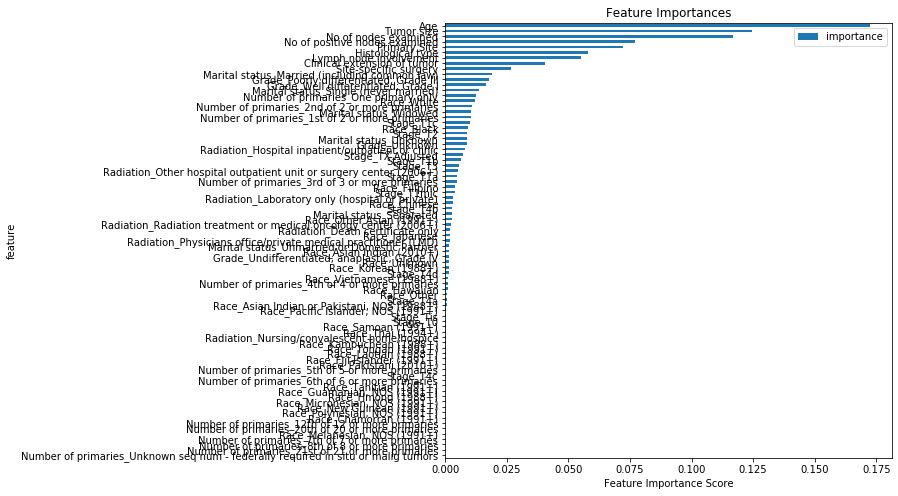

Accuracy: 0.7394410470366348


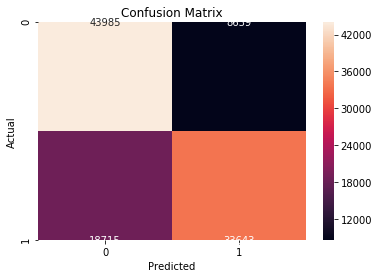

Classification Accuracy: 0.7394410470366348
F1 Score: 0.7109678782755705
AUC Score: 0.7391961858184265
Cross-validated AUC: 0.8543225974974981


In [35]:
randomForest()

### Performance of Random Forest Model

########### Random Forests ###############


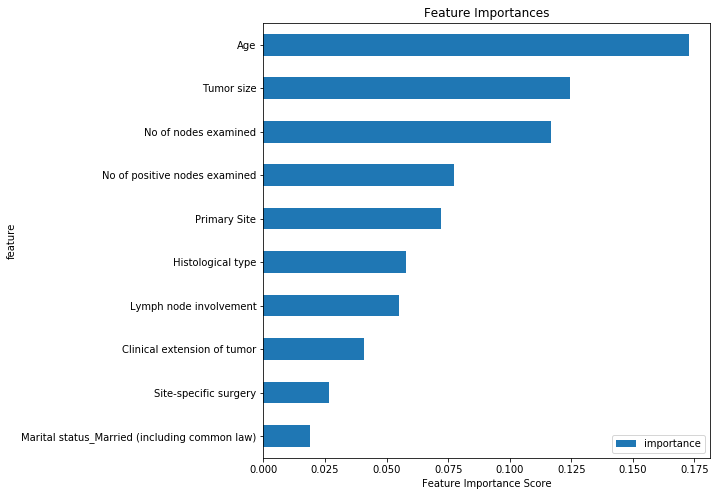

In [38]:
forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 30, random_state = 1)
my_forest = forest.fit(xtrain, ytrain)
    
# make class predictions for the testing set
y_pred_class = my_forest.predict(xtest)

print('########### Random Forests ###############')
feat_imp = pd.DataFrame({'importance':my_forest.feature_importances_})    
feat_imp['feature'] = xtrain.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp[:10].iloc[:xtrain.shape[1]]
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title="Feature Importances", figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

Accuracy: 0.7394410470366348


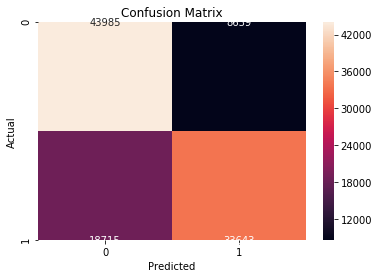

Classification Accuracy: 0.7394410470366348
F1 Score: 0.7109678782755705
AUC Score: 0.7391961858184265


KeyboardInterrupt: 

In [39]:
accuracy_score = evalClassModel(my_forest, ytest, y_pred_class, True)

In [42]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(ytest, y_pred_class).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
print("")
print("")

#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.3f}%:".format(Accuracy))

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.3f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.3f}".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.3f}".format(f1))

#Specificity 
Specificity = tn/(tn+fp)
print("Specificity {:0.3f}".format(Specificity))

True Negatives:  43985
False Positives:  8639
False Negatives:  18715
True Positives:  33643


Accuracy 73.944%:
Precision 0.796
Recall 0.643
F1 Score 0.711
Specificity 0.836


C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


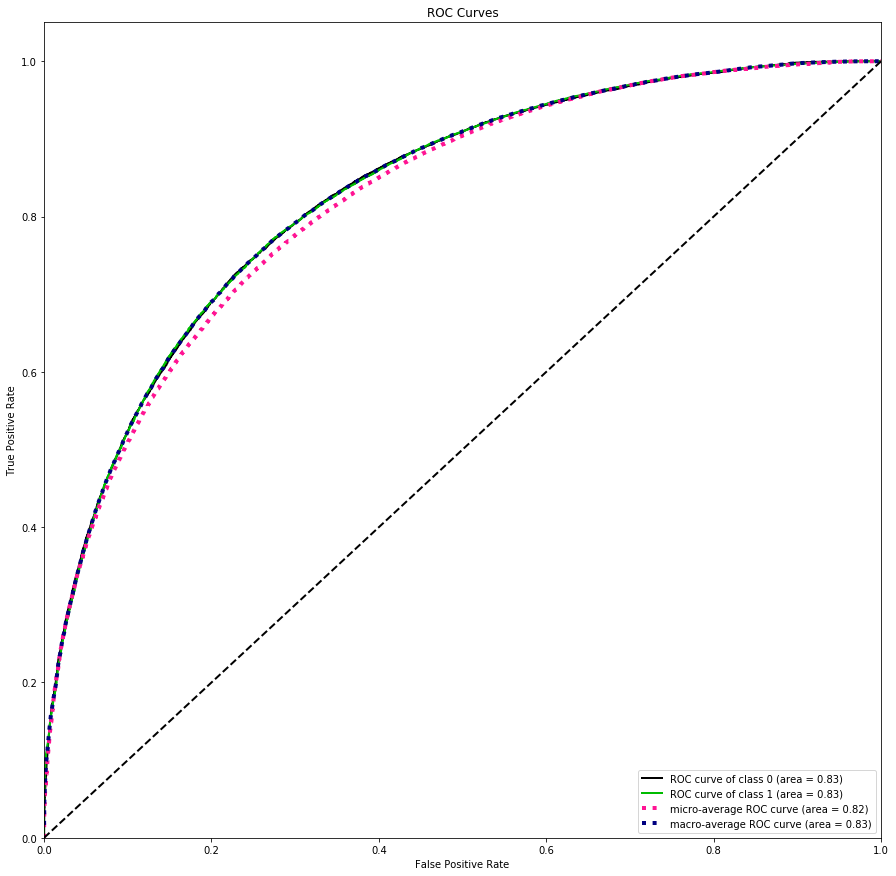

In [78]:
#ROC
import scikitplot as skplt #to make things easy
y_pred_proba = my_forest.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, y_pred_proba)
plt.show()

### XGBoost Modelling

### Hyperparameter Tuning

In [50]:
param_distributions={'max_depth': randint(1, 11),
                    'subsample': uniform(0.25, 0.75),
                    'colsample_bytree': uniform(0.25, 0.75),
                    "learning_rate": [0.05, 0.1,0.16]
                         
                    }
xgModel = XGBClassifier()
xgModel.fit(xtrain, ytrain)
rs = RandomizedSearchCV(xgModel,
                        param_distributions,
                        cv=10,
                        n_iter=10,
                        scoring="accuracy",
                        n_jobs=1,
                        verbose=False,
                        random_state=7)

### Prediction using XGBoost

C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

########### Extreme Gradient Boosting ###############


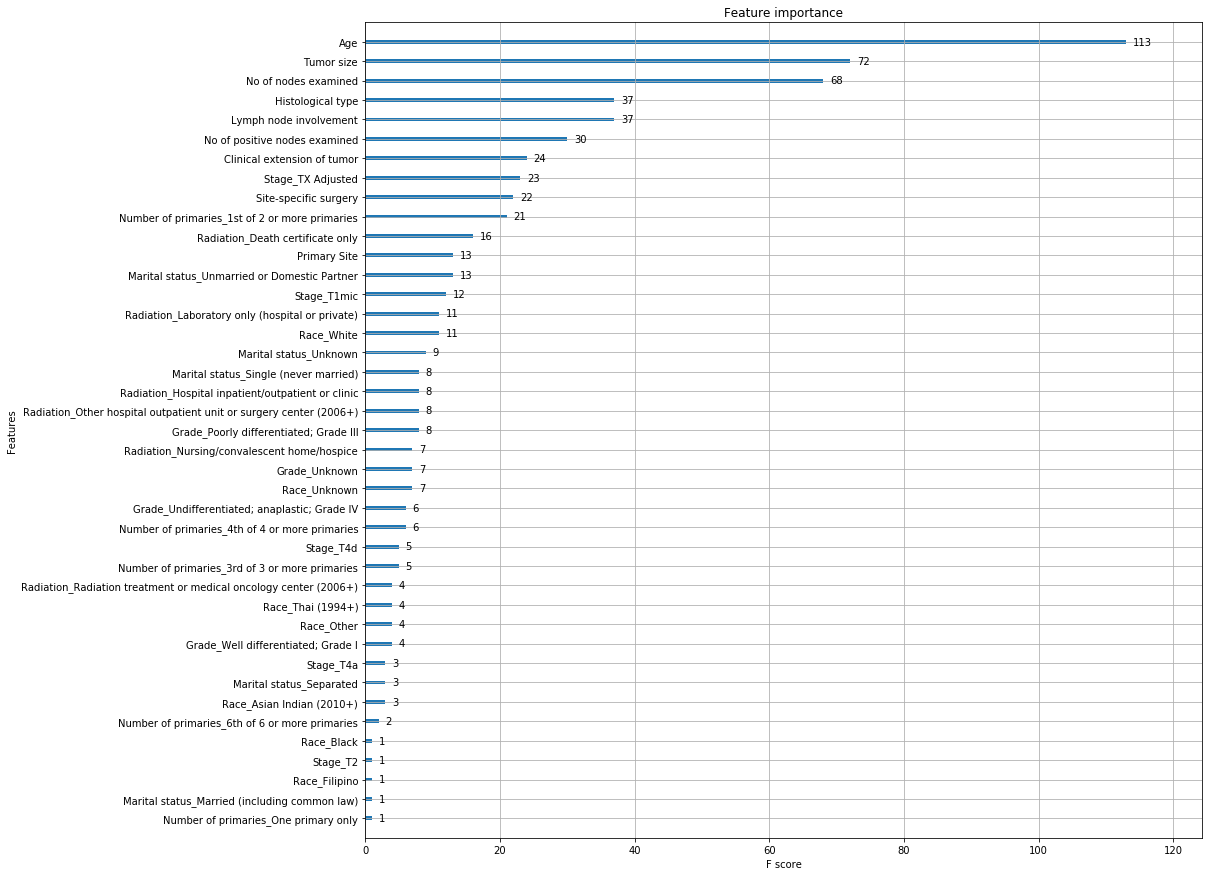

Accuracy: 0.6573984111561982


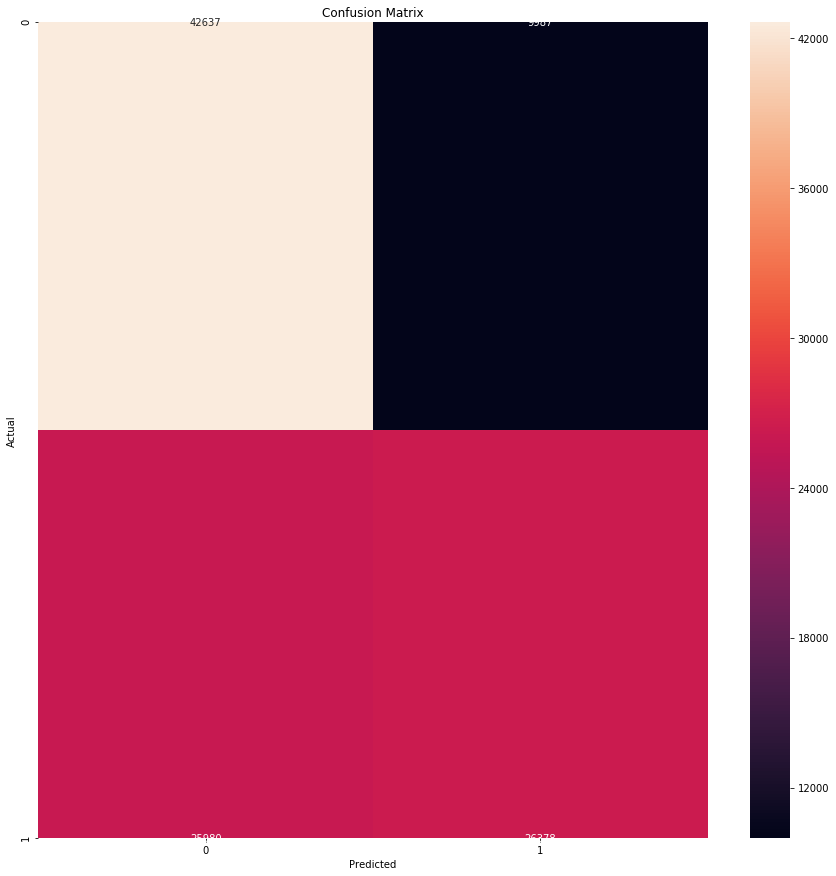

Classification Accuracy: 0.6573984111561982
F1 Score: 0.5946146996832838
AUC Score: 0.6570102139820628
Cross-validated AUC: 0.6011919715667149


In [51]:
rs.fit(xtrain, ytrain)
y_pred_class = rs.predict(xtest)

print('########### Extreme Gradient Boosting ###############')
    
# plot feature importance
plot_importance(xgModel)
#plt.figure(figsize = (18,16), dpi=80,facecolor='w',edgecolor='k')
plt.rcParams['figure.figsize'] = [15,15]
plt.show()

accuracy_score = evalClassModel(xgModel, ytest, y_pred_class, True)
    
#Data for final graph
methodDict['XGBClassifier.'] = accuracy_score * 100

# {'colsample_bytree': 0.6258403477449535,
#  'learning_rate': 0.16,
#  'max_depth': 9,
#  'subsample': 0.6249118756191699}

### Best parameters

In [52]:
rs.best_params_

{'colsample_bytree': 0.6258403477449535,
 'learning_rate': 0.16,
 'max_depth': 9,
 'subsample': 0.6249118756191699}

### Performance of XGBoost Model

In [55]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(ytest, y_pred_class).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
print("")
print("")

#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.3f}%:".format(Accuracy))

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.3f}".format(Precision))

#Recall (sensitivity)
Recall = tp/(tp+fn) 
print("Recall {:0.3f}".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.3f}".format(f1))

#Specificity 
Specificity = tn/(tn+fp)
print("Specificity {:0.3f}".format(Specificity))

True Negatives:  42637
False Positives:  9987
False Negatives:  25980
True Positives:  26378


Accuracy 65.740%:
Precision 0.725
Recall 0.504
F1 Score 0.595
Specificity 0.810


C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


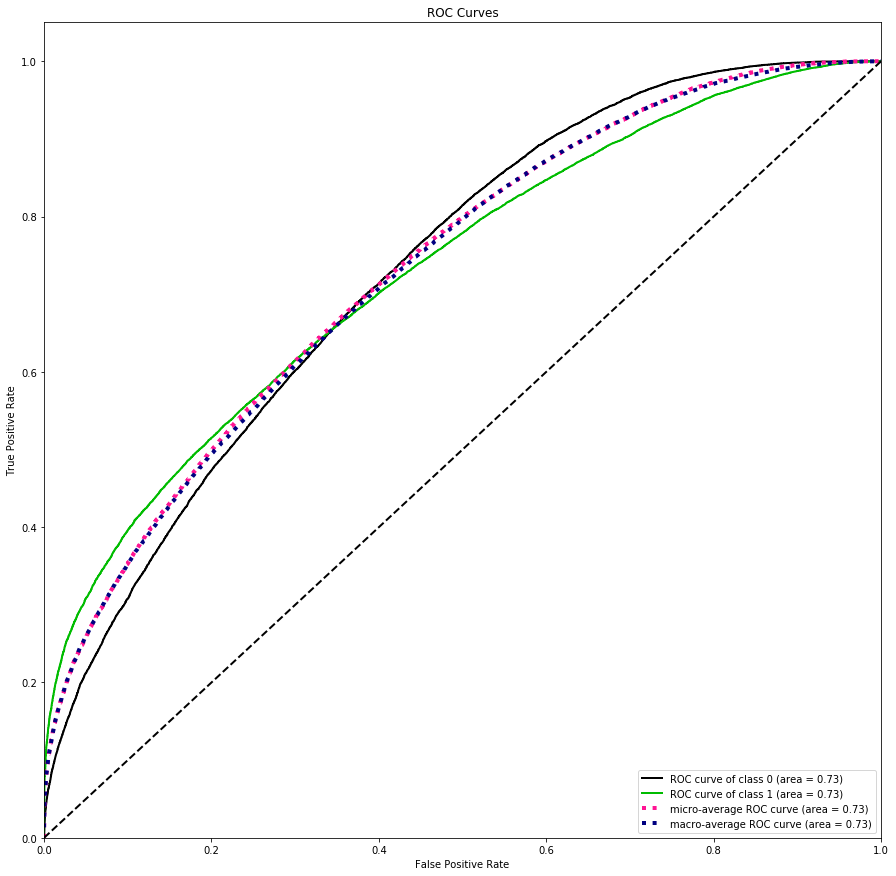

In [65]:
#ROC
import scikitplot as skplt #to make things easy
y_pred_proba = rs.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, y_pred_proba)
plt.show()

########### Extreme Gradient Boosting ###############


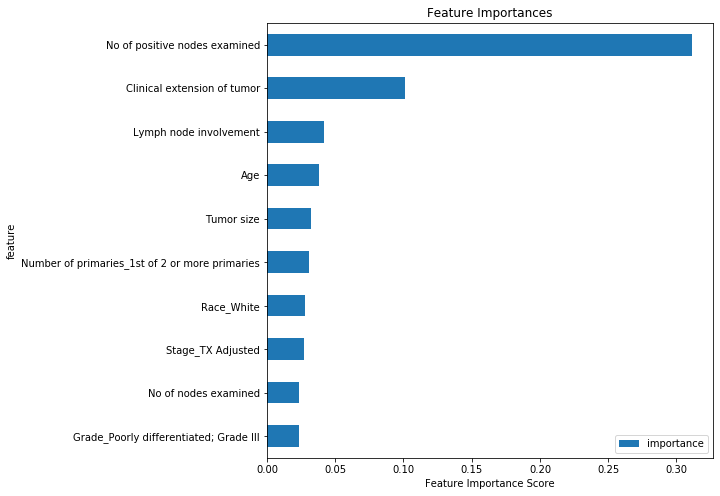

In [54]:
print('########### Extreme Gradient Boosting ###############')
    
# plot feature importance
# plot_importance(xgModel)
# #plt.figure(figsize = (18,16), dpi=80,facecolor='w',edgecolor='k')
# plt.rcParams['figure.figsize'] = [15,15]
# plt.show()

feat_imp = pd.DataFrame({'importance':xgModel.feature_importances_})    
feat_imp['feature'] = xtrain.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp[:10].iloc[:xtrain.shape[1]]
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title="Feature Importances", figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

###  CatBoost Modelling

### Hyperparameter Tuning

In [66]:

param_distributions={'colsample_bylevel': uniform(0.25, 0.75),
                    'learning_rate': [0.03, 0.1],
                    'depth': [4, 6, 10],
                    'l2_leaf_reg': [1, 3, 5, 7, 9]
                    }
catModel = CatBoostClassifier(cat_features=categorical_features_indices)
catModel.fit(xtrain, ytrain)
cat = RandomizedSearchCV(catModel,
                            param_distributions,
                            cv=10,
                            n_iter=10,
                            scoring="accuracy",
                            n_jobs=1,
                            verbose=False,
                            random_state=7)

Learning rate set to 0.085334
0:	learn: 0.6904831	total: 143ms	remaining: 2m 22s
1:	learn: 0.6881489	total: 216ms	remaining: 1m 47s
2:	learn: 0.6860535	total: 315ms	remaining: 1m 44s
3:	learn: 0.6843188	total: 388ms	remaining: 1m 36s
4:	learn: 0.6828740	total: 459ms	remaining: 1m 31s
5:	learn: 0.6816469	total: 553ms	remaining: 1m 31s
6:	learn: 0.6805616	total: 629ms	remaining: 1m 29s
7:	learn: 0.6796588	total: 705ms	remaining: 1m 27s
8:	learn: 0.6787846	total: 792ms	remaining: 1m 27s
9:	learn: 0.6781043	total: 896ms	remaining: 1m 28s
10:	learn: 0.6775019	total: 982ms	remaining: 1m 28s
11:	learn: 0.6769886	total: 1.07s	remaining: 1m 27s
12:	learn: 0.6764368	total: 1.14s	remaining: 1m 26s
13:	learn: 0.6760075	total: 1.22s	remaining: 1m 25s
14:	learn: 0.6755914	total: 1.31s	remaining: 1m 25s
15:	learn: 0.6752711	total: 1.39s	remaining: 1m 25s
16:	learn: 0.6749387	total: 1.49s	remaining: 1m 26s
17:	learn: 0.6746341	total: 1.6s	remaining: 1m 27s
18:	learn: 0.6742519	total: 1.68s	remaining: 

157:	learn: 0.6612497	total: 15.3s	remaining: 1m 21s
158:	learn: 0.6611775	total: 15.4s	remaining: 1m 21s
159:	learn: 0.6611212	total: 15.5s	remaining: 1m 21s
160:	learn: 0.6610392	total: 15.5s	remaining: 1m 21s
161:	learn: 0.6609619	total: 15.6s	remaining: 1m 20s
162:	learn: 0.6609010	total: 15.7s	remaining: 1m 20s
163:	learn: 0.6608433	total: 15.8s	remaining: 1m 20s
164:	learn: 0.6607617	total: 15.9s	remaining: 1m 20s
165:	learn: 0.6606928	total: 16s	remaining: 1m 20s
166:	learn: 0.6606275	total: 16.1s	remaining: 1m 20s
167:	learn: 0.6605741	total: 16.1s	remaining: 1m 19s
168:	learn: 0.6605240	total: 16.2s	remaining: 1m 19s
169:	learn: 0.6604538	total: 16.3s	remaining: 1m 19s
170:	learn: 0.6603780	total: 16.4s	remaining: 1m 19s
171:	learn: 0.6603110	total: 16.5s	remaining: 1m 19s
172:	learn: 0.6602476	total: 16.6s	remaining: 1m 19s
173:	learn: 0.6601669	total: 16.7s	remaining: 1m 19s
174:	learn: 0.6601043	total: 16.8s	remaining: 1m 18s
175:	learn: 0.6600351	total: 16.8s	remaining: 1m

315:	learn: 0.6514358	total: 29.6s	remaining: 1m 4s
316:	learn: 0.6513728	total: 29.7s	remaining: 1m 4s
317:	learn: 0.6513339	total: 29.8s	remaining: 1m 3s
318:	learn: 0.6512708	total: 29.9s	remaining: 1m 3s
319:	learn: 0.6512293	total: 30s	remaining: 1m 3s
320:	learn: 0.6511885	total: 30.1s	remaining: 1m 3s
321:	learn: 0.6511287	total: 30.2s	remaining: 1m 3s
322:	learn: 0.6510745	total: 30.3s	remaining: 1m 3s
323:	learn: 0.6509866	total: 30.4s	remaining: 1m 3s
324:	learn: 0.6509488	total: 30.5s	remaining: 1m 3s
325:	learn: 0.6509054	total: 30.5s	remaining: 1m 3s
326:	learn: 0.6508471	total: 30.6s	remaining: 1m 3s
327:	learn: 0.6508003	total: 30.8s	remaining: 1m 3s
328:	learn: 0.6507373	total: 30.9s	remaining: 1m 2s
329:	learn: 0.6506646	total: 31s	remaining: 1m 2s
330:	learn: 0.6505938	total: 31.1s	remaining: 1m 2s
331:	learn: 0.6505258	total: 31.2s	remaining: 1m 2s
332:	learn: 0.6504775	total: 31.3s	remaining: 1m 2s
333:	learn: 0.6503972	total: 31.4s	remaining: 1m 2s
334:	learn: 0.65

476:	learn: 0.6431118	total: 48.1s	remaining: 52.8s
477:	learn: 0.6430440	total: 48.2s	remaining: 52.7s
478:	learn: 0.6429920	total: 48.3s	remaining: 52.6s
479:	learn: 0.6429447	total: 48.4s	remaining: 52.5s
480:	learn: 0.6429128	total: 48.5s	remaining: 52.3s
481:	learn: 0.6428760	total: 48.6s	remaining: 52.2s
482:	learn: 0.6428561	total: 48.7s	remaining: 52.1s
483:	learn: 0.6428203	total: 48.8s	remaining: 52s
484:	learn: 0.6427722	total: 48.9s	remaining: 51.9s
485:	learn: 0.6427220	total: 48.9s	remaining: 51.8s
486:	learn: 0.6426723	total: 49s	remaining: 51.6s
487:	learn: 0.6426466	total: 49.1s	remaining: 51.5s
488:	learn: 0.6425997	total: 49.2s	remaining: 51.4s
489:	learn: 0.6425526	total: 49.3s	remaining: 51.3s
490:	learn: 0.6424956	total: 49.4s	remaining: 51.2s
491:	learn: 0.6424394	total: 49.5s	remaining: 51.1s
492:	learn: 0.6423866	total: 49.5s	remaining: 51s
493:	learn: 0.6423605	total: 49.6s	remaining: 50.8s
494:	learn: 0.6423299	total: 49.7s	remaining: 50.7s
495:	learn: 0.6422

638:	learn: 0.6356105	total: 1m 3s	remaining: 35.6s
639:	learn: 0.6355561	total: 1m 3s	remaining: 35.5s
640:	learn: 0.6355342	total: 1m 3s	remaining: 35.4s
641:	learn: 0.6354999	total: 1m 3s	remaining: 35.3s
642:	learn: 0.6354400	total: 1m 3s	remaining: 35.2s
643:	learn: 0.6354142	total: 1m 3s	remaining: 35.1s
644:	learn: 0.6353690	total: 1m 3s	remaining: 35s
645:	learn: 0.6353013	total: 1m 3s	remaining: 34.9s
646:	learn: 0.6352532	total: 1m 3s	remaining: 34.8s
647:	learn: 0.6351951	total: 1m 3s	remaining: 34.7s
648:	learn: 0.6351762	total: 1m 3s	remaining: 34.6s
649:	learn: 0.6351327	total: 1m 4s	remaining: 34.5s
650:	learn: 0.6350922	total: 1m 4s	remaining: 34.4s
651:	learn: 0.6350360	total: 1m 4s	remaining: 34.3s
652:	learn: 0.6350042	total: 1m 4s	remaining: 34.2s
653:	learn: 0.6349668	total: 1m 4s	remaining: 34.1s
654:	learn: 0.6349257	total: 1m 4s	remaining: 34s
655:	learn: 0.6348908	total: 1m 4s	remaining: 33.9s
656:	learn: 0.6348468	total: 1m 4s	remaining: 33.8s
657:	learn: 0.63

795:	learn: 0.6290498	total: 1m 19s	remaining: 20.4s
796:	learn: 0.6289824	total: 1m 19s	remaining: 20.3s
797:	learn: 0.6289178	total: 1m 19s	remaining: 20.2s
798:	learn: 0.6288667	total: 1m 20s	remaining: 20.1s
799:	learn: 0.6288301	total: 1m 20s	remaining: 20s
800:	learn: 0.6287878	total: 1m 20s	remaining: 19.9s
801:	learn: 0.6287589	total: 1m 20s	remaining: 19.8s
802:	learn: 0.6287092	total: 1m 20s	remaining: 19.7s
803:	learn: 0.6286581	total: 1m 20s	remaining: 19.6s
804:	learn: 0.6286169	total: 1m 20s	remaining: 19.5s
805:	learn: 0.6285755	total: 1m 20s	remaining: 19.4s
806:	learn: 0.6285374	total: 1m 20s	remaining: 19.3s
807:	learn: 0.6285119	total: 1m 20s	remaining: 19.2s
808:	learn: 0.6284690	total: 1m 20s	remaining: 19.1s
809:	learn: 0.6284099	total: 1m 20s	remaining: 19s
810:	learn: 0.6283673	total: 1m 21s	remaining: 18.9s
811:	learn: 0.6283258	total: 1m 21s	remaining: 18.8s
812:	learn: 0.6282804	total: 1m 21s	remaining: 18.7s
813:	learn: 0.6282491	total: 1m 21s	remaining: 18.

951:	learn: 0.6228600	total: 1m 33s	remaining: 4.73s
952:	learn: 0.6228250	total: 1m 33s	remaining: 4.63s
953:	learn: 0.6227956	total: 1m 34s	remaining: 4.54s
954:	learn: 0.6227570	total: 1m 34s	remaining: 4.44s
955:	learn: 0.6227196	total: 1m 34s	remaining: 4.34s
956:	learn: 0.6226788	total: 1m 34s	remaining: 4.24s
957:	learn: 0.6226568	total: 1m 34s	remaining: 4.14s
958:	learn: 0.6226263	total: 1m 34s	remaining: 4.04s
959:	learn: 0.6225818	total: 1m 34s	remaining: 3.94s
960:	learn: 0.6225505	total: 1m 34s	remaining: 3.84s
961:	learn: 0.6225115	total: 1m 34s	remaining: 3.75s
962:	learn: 0.6224926	total: 1m 34s	remaining: 3.65s
963:	learn: 0.6224615	total: 1m 35s	remaining: 3.55s
964:	learn: 0.6224210	total: 1m 35s	remaining: 3.45s
965:	learn: 0.6223755	total: 1m 35s	remaining: 3.35s
966:	learn: 0.6223382	total: 1m 35s	remaining: 3.25s
967:	learn: 0.6222771	total: 1m 35s	remaining: 3.15s
968:	learn: 0.6222375	total: 1m 35s	remaining: 3.06s
969:	learn: 0.6222036	total: 1m 35s	remaining:

### Prediction using CatBoost Model

In [67]:
cat.fit(xtrain, ytrain)
y_pred_class = cat.predict(xtest)

0:	learn: 0.6900273	total: 86.2ms	remaining: 1m 26s
1:	learn: 0.6876419	total: 178ms	remaining: 1m 29s
2:	learn: 0.6855635	total: 252ms	remaining: 1m 23s
3:	learn: 0.6837122	total: 328ms	remaining: 1m 21s
4:	learn: 0.6822904	total: 405ms	remaining: 1m 20s
5:	learn: 0.6813464	total: 472ms	remaining: 1m 18s
6:	learn: 0.6801828	total: 544ms	remaining: 1m 17s
7:	learn: 0.6792894	total: 613ms	remaining: 1m 15s
8:	learn: 0.6786423	total: 709ms	remaining: 1m 18s
9:	learn: 0.6779628	total: 807ms	remaining: 1m 19s
10:	learn: 0.6773659	total: 946ms	remaining: 1m 25s
11:	learn: 0.6767771	total: 1.03s	remaining: 1m 25s
12:	learn: 0.6762930	total: 1.14s	remaining: 1m 26s
13:	learn: 0.6757789	total: 1.3s	remaining: 1m 31s
14:	learn: 0.6754177	total: 1.43s	remaining: 1m 33s
15:	learn: 0.6750146	total: 1.51s	remaining: 1m 32s
16:	learn: 0.6746898	total: 1.58s	remaining: 1m 31s
17:	learn: 0.6744354	total: 1.66s	remaining: 1m 30s
18:	learn: 0.6742050	total: 1.75s	remaining: 1m 30s
19:	learn: 0.6739012	t

158:	learn: 0.6615487	total: 15.5s	remaining: 1m 22s
159:	learn: 0.6614835	total: 15.6s	remaining: 1m 21s
160:	learn: 0.6614097	total: 15.7s	remaining: 1m 21s
161:	learn: 0.6613597	total: 15.8s	remaining: 1m 21s
162:	learn: 0.6612860	total: 15.9s	remaining: 1m 21s
163:	learn: 0.6612309	total: 15.9s	remaining: 1m 21s
164:	learn: 0.6611863	total: 16s	remaining: 1m 21s
165:	learn: 0.6611364	total: 16.1s	remaining: 1m 20s
166:	learn: 0.6610800	total: 16.2s	remaining: 1m 20s
167:	learn: 0.6610125	total: 16.3s	remaining: 1m 20s
168:	learn: 0.6609637	total: 16.4s	remaining: 1m 20s
169:	learn: 0.6608773	total: 16.5s	remaining: 1m 20s
170:	learn: 0.6607956	total: 16.6s	remaining: 1m 20s
171:	learn: 0.6607499	total: 16.7s	remaining: 1m 20s
172:	learn: 0.6607006	total: 16.7s	remaining: 1m 20s
173:	learn: 0.6606513	total: 16.8s	remaining: 1m 19s
174:	learn: 0.6605738	total: 17s	remaining: 1m 19s
175:	learn: 0.6605158	total: 17.1s	remaining: 1m 19s
176:	learn: 0.6604710	total: 17.2s	remaining: 1m 1

316:	learn: 0.6522045	total: 29.7s	remaining: 1m 3s
317:	learn: 0.6521415	total: 29.7s	remaining: 1m 3s
318:	learn: 0.6521088	total: 29.8s	remaining: 1m 3s
319:	learn: 0.6520562	total: 29.9s	remaining: 1m 3s
320:	learn: 0.6520097	total: 30s	remaining: 1m 3s
321:	learn: 0.6519614	total: 30.1s	remaining: 1m 3s
322:	learn: 0.6519061	total: 30.2s	remaining: 1m 3s
323:	learn: 0.6518815	total: 30.3s	remaining: 1m 3s
324:	learn: 0.6518137	total: 30.4s	remaining: 1m 3s
325:	learn: 0.6517850	total: 30.5s	remaining: 1m 2s
326:	learn: 0.6517283	total: 30.6s	remaining: 1m 2s
327:	learn: 0.6516723	total: 30.6s	remaining: 1m 2s
328:	learn: 0.6516360	total: 30.7s	remaining: 1m 2s
329:	learn: 0.6515921	total: 30.8s	remaining: 1m 2s
330:	learn: 0.6515168	total: 30.9s	remaining: 1m 2s
331:	learn: 0.6514779	total: 31s	remaining: 1m 2s
332:	learn: 0.6514453	total: 31s	remaining: 1m 2s
333:	learn: 0.6513931	total: 31.1s	remaining: 1m 2s
334:	learn: 0.6513492	total: 31.2s	remaining: 1m 1s
335:	learn: 0.6513

476:	learn: 0.6443434	total: 44.3s	remaining: 48.6s
477:	learn: 0.6442890	total: 44.4s	remaining: 48.5s
478:	learn: 0.6442380	total: 44.5s	remaining: 48.4s
479:	learn: 0.6441964	total: 44.6s	remaining: 48.3s
480:	learn: 0.6441691	total: 44.7s	remaining: 48.3s
481:	learn: 0.6441283	total: 44.9s	remaining: 48.2s
482:	learn: 0.6440663	total: 45s	remaining: 48.1s
483:	learn: 0.6440209	total: 45.1s	remaining: 48.1s
484:	learn: 0.6439738	total: 45.2s	remaining: 48s
485:	learn: 0.6439457	total: 45.3s	remaining: 47.9s
486:	learn: 0.6439012	total: 45.4s	remaining: 47.8s
487:	learn: 0.6438569	total: 45.5s	remaining: 47.7s
488:	learn: 0.6438161	total: 45.6s	remaining: 47.7s
489:	learn: 0.6437499	total: 45.7s	remaining: 47.6s
490:	learn: 0.6437069	total: 45.8s	remaining: 47.5s
491:	learn: 0.6436793	total: 45.9s	remaining: 47.4s
492:	learn: 0.6436502	total: 46s	remaining: 47.3s
493:	learn: 0.6436031	total: 46.1s	remaining: 47.3s
494:	learn: 0.6435719	total: 46.2s	remaining: 47.2s
495:	learn: 0.6435

636:	learn: 0.6373991	total: 1m	remaining: 34.4s
637:	learn: 0.6373423	total: 1m	remaining: 34.3s
638:	learn: 0.6373157	total: 1m	remaining: 34.2s
639:	learn: 0.6372805	total: 1m	remaining: 34.1s
640:	learn: 0.6372552	total: 1m	remaining: 34s
641:	learn: 0.6372164	total: 1m	remaining: 33.9s
642:	learn: 0.6371893	total: 1m	remaining: 33.8s
643:	learn: 0.6371235	total: 1m 1s	remaining: 33.8s
644:	learn: 0.6370722	total: 1m 1s	remaining: 33.7s
645:	learn: 0.6370120	total: 1m 1s	remaining: 33.6s
646:	learn: 0.6369711	total: 1m 1s	remaining: 33.5s
647:	learn: 0.6368956	total: 1m 1s	remaining: 33.4s
648:	learn: 0.6368393	total: 1m 1s	remaining: 33.3s
649:	learn: 0.6367915	total: 1m 1s	remaining: 33.2s
650:	learn: 0.6367460	total: 1m 1s	remaining: 33.1s
651:	learn: 0.6367174	total: 1m 1s	remaining: 33s
652:	learn: 0.6366836	total: 1m 1s	remaining: 32.9s
653:	learn: 0.6366396	total: 1m 1s	remaining: 32.8s
654:	learn: 0.6366065	total: 1m 2s	remaining: 32.7s
655:	learn: 0.6365505	total: 1m 2s	re

794:	learn: 0.6312104	total: 1m 13s	remaining: 19s
795:	learn: 0.6311930	total: 1m 13s	remaining: 18.9s
796:	learn: 0.6311514	total: 1m 13s	remaining: 18.8s
797:	learn: 0.6310877	total: 1m 13s	remaining: 18.7s
798:	learn: 0.6310496	total: 1m 14s	remaining: 18.6s
799:	learn: 0.6310011	total: 1m 14s	remaining: 18.5s
800:	learn: 0.6309629	total: 1m 14s	remaining: 18.4s
801:	learn: 0.6309143	total: 1m 14s	remaining: 18.3s
802:	learn: 0.6308932	total: 1m 14s	remaining: 18.2s
803:	learn: 0.6308342	total: 1m 14s	remaining: 18.1s
804:	learn: 0.6307969	total: 1m 14s	remaining: 18.1s
805:	learn: 0.6307696	total: 1m 14s	remaining: 18s
806:	learn: 0.6307150	total: 1m 14s	remaining: 17.9s
807:	learn: 0.6306794	total: 1m 14s	remaining: 17.8s
808:	learn: 0.6306430	total: 1m 14s	remaining: 17.7s
809:	learn: 0.6306124	total: 1m 14s	remaining: 17.6s
810:	learn: 0.6305621	total: 1m 15s	remaining: 17.5s
811:	learn: 0.6305241	total: 1m 15s	remaining: 17.4s
812:	learn: 0.6304872	total: 1m 15s	remaining: 17.

951:	learn: 0.6255486	total: 1m 27s	remaining: 4.39s
952:	learn: 0.6255286	total: 1m 27s	remaining: 4.3s
953:	learn: 0.6255022	total: 1m 27s	remaining: 4.21s
954:	learn: 0.6254481	total: 1m 27s	remaining: 4.12s
955:	learn: 0.6254086	total: 1m 27s	remaining: 4.02s
956:	learn: 0.6253431	total: 1m 27s	remaining: 3.93s
957:	learn: 0.6253224	total: 1m 27s	remaining: 3.84s
958:	learn: 0.6252673	total: 1m 27s	remaining: 3.75s
959:	learn: 0.6252450	total: 1m 27s	remaining: 3.66s
960:	learn: 0.6252163	total: 1m 27s	remaining: 3.57s
961:	learn: 0.6251821	total: 1m 28s	remaining: 3.48s
962:	learn: 0.6251475	total: 1m 28s	remaining: 3.38s
963:	learn: 0.6251067	total: 1m 28s	remaining: 3.29s
964:	learn: 0.6250710	total: 1m 28s	remaining: 3.2s
965:	learn: 0.6250552	total: 1m 28s	remaining: 3.11s
966:	learn: 0.6250057	total: 1m 28s	remaining: 3.02s
967:	learn: 0.6249550	total: 1m 28s	remaining: 2.93s
968:	learn: 0.6249218	total: 1m 28s	remaining: 2.83s
969:	learn: 0.6248898	total: 1m 28s	remaining: 2

110:	learn: 0.6645108	total: 9.28s	remaining: 1m 14s
111:	learn: 0.6643984	total: 9.38s	remaining: 1m 14s
112:	learn: 0.6643156	total: 9.46s	remaining: 1m 14s
113:	learn: 0.6642430	total: 9.55s	remaining: 1m 14s
114:	learn: 0.6641689	total: 9.66s	remaining: 1m 14s
115:	learn: 0.6641045	total: 9.75s	remaining: 1m 14s
116:	learn: 0.6640437	total: 9.83s	remaining: 1m 14s
117:	learn: 0.6639794	total: 9.92s	remaining: 1m 14s
118:	learn: 0.6638965	total: 10s	remaining: 1m 14s
119:	learn: 0.6638477	total: 10.1s	remaining: 1m 14s
120:	learn: 0.6637896	total: 10.2s	remaining: 1m 13s
121:	learn: 0.6637003	total: 10.3s	remaining: 1m 13s
122:	learn: 0.6636640	total: 10.4s	remaining: 1m 13s
123:	learn: 0.6636013	total: 10.5s	remaining: 1m 13s
124:	learn: 0.6635114	total: 10.5s	remaining: 1m 13s
125:	learn: 0.6634349	total: 10.6s	remaining: 1m 13s
126:	learn: 0.6633258	total: 10.7s	remaining: 1m 13s
127:	learn: 0.6632615	total: 10.8s	remaining: 1m 13s
128:	learn: 0.6631755	total: 10.9s	remaining: 1m

267:	learn: 0.6545818	total: 23.2s	remaining: 1m 3s
268:	learn: 0.6545295	total: 23.3s	remaining: 1m 3s
269:	learn: 0.6544884	total: 23.4s	remaining: 1m 3s
270:	learn: 0.6544018	total: 23.5s	remaining: 1m 3s
271:	learn: 0.6543204	total: 23.6s	remaining: 1m 3s
272:	learn: 0.6542434	total: 23.6s	remaining: 1m 2s
273:	learn: 0.6541753	total: 23.7s	remaining: 1m 2s
274:	learn: 0.6541308	total: 23.8s	remaining: 1m 2s
275:	learn: 0.6541057	total: 23.9s	remaining: 1m 2s
276:	learn: 0.6540703	total: 24s	remaining: 1m 2s
277:	learn: 0.6540240	total: 24.1s	remaining: 1m 2s
278:	learn: 0.6539359	total: 24.1s	remaining: 1m 2s
279:	learn: 0.6538663	total: 24.2s	remaining: 1m 2s
280:	learn: 0.6537977	total: 24.3s	remaining: 1m 2s
281:	learn: 0.6537333	total: 24.4s	remaining: 1m 2s
282:	learn: 0.6536613	total: 24.5s	remaining: 1m 2s
283:	learn: 0.6536191	total: 24.6s	remaining: 1m 1s
284:	learn: 0.6535475	total: 24.7s	remaining: 1m 1s
285:	learn: 0.6534787	total: 24.8s	remaining: 1m 1s
286:	learn: 0.

427:	learn: 0.6462949	total: 37.4s	remaining: 49.9s
428:	learn: 0.6462210	total: 37.4s	remaining: 49.8s
429:	learn: 0.6461648	total: 37.5s	remaining: 49.8s
430:	learn: 0.6460990	total: 37.6s	remaining: 49.7s
431:	learn: 0.6460606	total: 37.7s	remaining: 49.6s
432:	learn: 0.6460345	total: 37.8s	remaining: 49.5s
433:	learn: 0.6459947	total: 37.9s	remaining: 49.4s
434:	learn: 0.6459597	total: 38s	remaining: 49.3s
435:	learn: 0.6459049	total: 38s	remaining: 49.2s
436:	learn: 0.6458474	total: 38.2s	remaining: 49.2s
437:	learn: 0.6458042	total: 38.2s	remaining: 49.1s
438:	learn: 0.6457346	total: 38.3s	remaining: 49s
439:	learn: 0.6457065	total: 38.4s	remaining: 48.9s
440:	learn: 0.6456752	total: 38.5s	remaining: 48.8s
441:	learn: 0.6456242	total: 38.6s	remaining: 48.7s
442:	learn: 0.6455665	total: 38.7s	remaining: 48.6s
443:	learn: 0.6455194	total: 38.7s	remaining: 48.5s
444:	learn: 0.6454872	total: 38.8s	remaining: 48.4s
445:	learn: 0.6454337	total: 38.9s	remaining: 48.3s
446:	learn: 0.6453

586:	learn: 0.6392256	total: 51.2s	remaining: 36s
587:	learn: 0.6391603	total: 51.2s	remaining: 35.9s
588:	learn: 0.6391152	total: 51.3s	remaining: 35.8s
589:	learn: 0.6390600	total: 51.4s	remaining: 35.7s
590:	learn: 0.6390154	total: 51.5s	remaining: 35.6s
591:	learn: 0.6389902	total: 51.6s	remaining: 35.5s
592:	learn: 0.6389425	total: 51.7s	remaining: 35.5s
593:	learn: 0.6389006	total: 51.7s	remaining: 35.4s
594:	learn: 0.6388768	total: 51.8s	remaining: 35.3s
595:	learn: 0.6388577	total: 51.9s	remaining: 35.2s
596:	learn: 0.6388006	total: 52s	remaining: 35.1s
597:	learn: 0.6387603	total: 52.1s	remaining: 35s
598:	learn: 0.6387236	total: 52.2s	remaining: 34.9s
599:	learn: 0.6386742	total: 52.2s	remaining: 34.8s
600:	learn: 0.6386528	total: 52.3s	remaining: 34.7s
601:	learn: 0.6386023	total: 52.4s	remaining: 34.6s
602:	learn: 0.6385562	total: 52.5s	remaining: 34.6s
603:	learn: 0.6385107	total: 52.6s	remaining: 34.5s
604:	learn: 0.6384839	total: 52.7s	remaining: 34.4s
605:	learn: 0.6384

747:	learn: 0.6325862	total: 1m 5s	remaining: 22s
748:	learn: 0.6325553	total: 1m 5s	remaining: 21.9s
749:	learn: 0.6325145	total: 1m 5s	remaining: 21.8s
750:	learn: 0.6324681	total: 1m 5s	remaining: 21.7s
751:	learn: 0.6324227	total: 1m 5s	remaining: 21.6s
752:	learn: 0.6323766	total: 1m 5s	remaining: 21.6s
753:	learn: 0.6323500	total: 1m 5s	remaining: 21.5s
754:	learn: 0.6323086	total: 1m 5s	remaining: 21.4s
755:	learn: 0.6322625	total: 1m 5s	remaining: 21.3s
756:	learn: 0.6322321	total: 1m 6s	remaining: 21.2s
757:	learn: 0.6322160	total: 1m 6s	remaining: 21.1s
758:	learn: 0.6321810	total: 1m 6s	remaining: 21s
759:	learn: 0.6321370	total: 1m 6s	remaining: 21s
760:	learn: 0.6321090	total: 1m 6s	remaining: 20.9s
761:	learn: 0.6320608	total: 1m 6s	remaining: 20.8s
762:	learn: 0.6320273	total: 1m 6s	remaining: 20.7s
763:	learn: 0.6320008	total: 1m 6s	remaining: 20.6s
764:	learn: 0.6319657	total: 1m 6s	remaining: 20.5s
765:	learn: 0.6319152	total: 1m 6s	remaining: 20.4s
766:	learn: 0.6318

905:	learn: 0.6264995	total: 1m 18s	remaining: 8.17s
906:	learn: 0.6264451	total: 1m 18s	remaining: 8.08s
907:	learn: 0.6264167	total: 1m 18s	remaining: 8s
908:	learn: 0.6263746	total: 1m 19s	remaining: 7.91s
909:	learn: 0.6263370	total: 1m 19s	remaining: 7.82s
910:	learn: 0.6263189	total: 1m 19s	remaining: 7.74s
911:	learn: 0.6262791	total: 1m 19s	remaining: 7.65s
912:	learn: 0.6262342	total: 1m 19s	remaining: 7.56s
913:	learn: 0.6262009	total: 1m 19s	remaining: 7.47s
914:	learn: 0.6261601	total: 1m 19s	remaining: 7.39s
915:	learn: 0.6261148	total: 1m 19s	remaining: 7.3s
916:	learn: 0.6260646	total: 1m 19s	remaining: 7.21s
917:	learn: 0.6260349	total: 1m 19s	remaining: 7.13s
918:	learn: 0.6259983	total: 1m 19s	remaining: 7.04s
919:	learn: 0.6259469	total: 1m 19s	remaining: 6.95s
920:	learn: 0.6259069	total: 1m 20s	remaining: 6.87s
921:	learn: 0.6258774	total: 1m 20s	remaining: 6.78s
922:	learn: 0.6258453	total: 1m 20s	remaining: 6.69s
923:	learn: 0.6258177	total: 1m 20s	remaining: 6.6

64:	learn: 0.6671412	total: 5.13s	remaining: 1m 13s
65:	learn: 0.6670626	total: 5.22s	remaining: 1m 13s
66:	learn: 0.6669884	total: 5.3s	remaining: 1m 13s
67:	learn: 0.6669290	total: 5.39s	remaining: 1m 13s
68:	learn: 0.6668735	total: 5.47s	remaining: 1m 13s
69:	learn: 0.6667932	total: 5.55s	remaining: 1m 13s
70:	learn: 0.6667344	total: 5.64s	remaining: 1m 13s
71:	learn: 0.6666641	total: 5.72s	remaining: 1m 13s
72:	learn: 0.6666089	total: 5.81s	remaining: 1m 13s
73:	learn: 0.6665567	total: 5.9s	remaining: 1m 13s
74:	learn: 0.6664305	total: 5.99s	remaining: 1m 13s
75:	learn: 0.6663587	total: 6.09s	remaining: 1m 14s
76:	learn: 0.6663236	total: 6.2s	remaining: 1m 14s
77:	learn: 0.6662494	total: 6.3s	remaining: 1m 14s
78:	learn: 0.6661781	total: 6.39s	remaining: 1m 14s
79:	learn: 0.6661346	total: 6.47s	remaining: 1m 14s
80:	learn: 0.6660322	total: 6.56s	remaining: 1m 14s
81:	learn: 0.6660215	total: 6.62s	remaining: 1m 14s
82:	learn: 0.6659329	total: 6.71s	remaining: 1m 14s
83:	learn: 0.665

221:	learn: 0.6567040	total: 19s	remaining: 1m 6s
222:	learn: 0.6566670	total: 19s	remaining: 1m 6s
223:	learn: 0.6565908	total: 19.1s	remaining: 1m 6s
224:	learn: 0.6565233	total: 19.2s	remaining: 1m 6s
225:	learn: 0.6564507	total: 19.3s	remaining: 1m 6s
226:	learn: 0.6564149	total: 19.4s	remaining: 1m 6s
227:	learn: 0.6563485	total: 19.5s	remaining: 1m 5s
228:	learn: 0.6562864	total: 19.6s	remaining: 1m 5s
229:	learn: 0.6562256	total: 19.6s	remaining: 1m 5s
230:	learn: 0.6561245	total: 19.7s	remaining: 1m 5s
231:	learn: 0.6560627	total: 19.8s	remaining: 1m 5s
232:	learn: 0.6560004	total: 19.9s	remaining: 1m 5s
233:	learn: 0.6559532	total: 20s	remaining: 1m 5s
234:	learn: 0.6559038	total: 20.1s	remaining: 1m 5s
235:	learn: 0.6558193	total: 20.2s	remaining: 1m 5s
236:	learn: 0.6557306	total: 20.3s	remaining: 1m 5s
237:	learn: 0.6556935	total: 20.3s	remaining: 1m 5s
238:	learn: 0.6556153	total: 20.4s	remaining: 1m 5s
239:	learn: 0.6555476	total: 20.5s	remaining: 1m 4s
240:	learn: 0.6554

381:	learn: 0.6481094	total: 33.7s	remaining: 54.5s
382:	learn: 0.6480216	total: 33.8s	remaining: 54.4s
383:	learn: 0.6479691	total: 33.9s	remaining: 54.3s
384:	learn: 0.6479467	total: 33.9s	remaining: 54.2s
385:	learn: 0.6478947	total: 34s	remaining: 54.1s
386:	learn: 0.6478563	total: 34.1s	remaining: 54s
387:	learn: 0.6478127	total: 34.2s	remaining: 53.9s
388:	learn: 0.6477629	total: 34.3s	remaining: 53.8s
389:	learn: 0.6477046	total: 34.4s	remaining: 53.7s
390:	learn: 0.6476583	total: 34.4s	remaining: 53.6s
391:	learn: 0.6476250	total: 34.5s	remaining: 53.5s
392:	learn: 0.6475631	total: 34.6s	remaining: 53.4s
393:	learn: 0.6475097	total: 34.7s	remaining: 53.3s
394:	learn: 0.6474603	total: 34.8s	remaining: 53.3s
395:	learn: 0.6474350	total: 34.9s	remaining: 53.2s
396:	learn: 0.6473877	total: 35s	remaining: 53.1s
397:	learn: 0.6473284	total: 35.1s	remaining: 53s
398:	learn: 0.6472535	total: 35.2s	remaining: 53s
399:	learn: 0.6472054	total: 35.2s	remaining: 52.9s
400:	learn: 0.6471733	

542:	learn: 0.6407807	total: 48.4s	remaining: 40.7s
543:	learn: 0.6407282	total: 48.4s	remaining: 40.6s
544:	learn: 0.6406710	total: 48.5s	remaining: 40.5s
545:	learn: 0.6406341	total: 48.6s	remaining: 40.4s
546:	learn: 0.6405742	total: 48.7s	remaining: 40.3s
547:	learn: 0.6405223	total: 48.8s	remaining: 40.2s
548:	learn: 0.6404570	total: 48.9s	remaining: 40.1s
549:	learn: 0.6404100	total: 49s	remaining: 40.1s
550:	learn: 0.6403566	total: 49s	remaining: 40s
551:	learn: 0.6403059	total: 49.1s	remaining: 39.9s
552:	learn: 0.6402856	total: 49.2s	remaining: 39.8s
553:	learn: 0.6402418	total: 49.3s	remaining: 39.7s
554:	learn: 0.6401901	total: 49.4s	remaining: 39.6s
555:	learn: 0.6401466	total: 49.5s	remaining: 39.5s
556:	learn: 0.6400990	total: 49.5s	remaining: 39.4s
557:	learn: 0.6400588	total: 49.6s	remaining: 39.3s
558:	learn: 0.6400014	total: 49.7s	remaining: 39.2s
559:	learn: 0.6399492	total: 49.8s	remaining: 39.1s
560:	learn: 0.6398922	total: 49.9s	remaining: 39s
561:	learn: 0.639863

702:	learn: 0.6341287	total: 1m 1s	remaining: 26.2s
703:	learn: 0.6340738	total: 1m 1s	remaining: 26.1s
704:	learn: 0.6340218	total: 1m 2s	remaining: 26s
705:	learn: 0.6339855	total: 1m 2s	remaining: 25.9s
706:	learn: 0.6339342	total: 1m 2s	remaining: 25.8s
707:	learn: 0.6339210	total: 1m 2s	remaining: 25.7s
708:	learn: 0.6338855	total: 1m 2s	remaining: 25.6s
709:	learn: 0.6338468	total: 1m 2s	remaining: 25.5s
710:	learn: 0.6338119	total: 1m 2s	remaining: 25.4s
711:	learn: 0.6337624	total: 1m 2s	remaining: 25.3s
712:	learn: 0.6337333	total: 1m 2s	remaining: 25.3s
713:	learn: 0.6336964	total: 1m 2s	remaining: 25.2s
714:	learn: 0.6336426	total: 1m 2s	remaining: 25.1s
715:	learn: 0.6336087	total: 1m 3s	remaining: 25s
716:	learn: 0.6335489	total: 1m 3s	remaining: 24.9s
717:	learn: 0.6335023	total: 1m 3s	remaining: 24.8s
718:	learn: 0.6334637	total: 1m 3s	remaining: 24.7s
719:	learn: 0.6334395	total: 1m 3s	remaining: 24.7s
720:	learn: 0.6334006	total: 1m 3s	remaining: 24.6s
721:	learn: 0.63

860:	learn: 0.6280132	total: 1m 15s	remaining: 12.1s
861:	learn: 0.6279638	total: 1m 15s	remaining: 12.1s
862:	learn: 0.6279166	total: 1m 15s	remaining: 12s
863:	learn: 0.6278919	total: 1m 15s	remaining: 11.9s
864:	learn: 0.6278642	total: 1m 15s	remaining: 11.8s
865:	learn: 0.6278157	total: 1m 15s	remaining: 11.7s
866:	learn: 0.6277949	total: 1m 15s	remaining: 11.6s
867:	learn: 0.6277573	total: 1m 15s	remaining: 11.5s
868:	learn: 0.6277212	total: 1m 15s	remaining: 11.4s
869:	learn: 0.6276729	total: 1m 15s	remaining: 11.3s
870:	learn: 0.6276466	total: 1m 16s	remaining: 11.3s
871:	learn: 0.6275839	total: 1m 16s	remaining: 11.2s
872:	learn: 0.6275418	total: 1m 16s	remaining: 11.1s
873:	learn: 0.6275108	total: 1m 16s	remaining: 11s
874:	learn: 0.6274641	total: 1m 16s	remaining: 10.9s
875:	learn: 0.6274273	total: 1m 16s	remaining: 10.8s
876:	learn: 0.6274035	total: 1m 16s	remaining: 10.7s
877:	learn: 0.6273584	total: 1m 16s	remaining: 10.7s
878:	learn: 0.6273278	total: 1m 16s	remaining: 10.

18:	learn: 0.6739039	total: 1.41s	remaining: 1m 12s
19:	learn: 0.6736665	total: 1.49s	remaining: 1m 13s
20:	learn: 0.6733932	total: 1.58s	remaining: 1m 13s
21:	learn: 0.6731549	total: 1.66s	remaining: 1m 13s
22:	learn: 0.6729120	total: 1.74s	remaining: 1m 13s
23:	learn: 0.6726891	total: 1.81s	remaining: 1m 13s
24:	learn: 0.6724650	total: 1.88s	remaining: 1m 13s
25:	learn: 0.6723850	total: 1.94s	remaining: 1m 12s
26:	learn: 0.6721495	total: 2.02s	remaining: 1m 12s
27:	learn: 0.6719336	total: 2.09s	remaining: 1m 12s
28:	learn: 0.6717533	total: 2.17s	remaining: 1m 12s
29:	learn: 0.6716110	total: 2.25s	remaining: 1m 12s
30:	learn: 0.6714348	total: 2.32s	remaining: 1m 12s
31:	learn: 0.6712930	total: 2.39s	remaining: 1m 12s
32:	learn: 0.6711569	total: 2.46s	remaining: 1m 12s
33:	learn: 0.6709901	total: 2.54s	remaining: 1m 12s
34:	learn: 0.6707994	total: 2.62s	remaining: 1m 12s
35:	learn: 0.6707030	total: 2.7s	remaining: 1m 12s
36:	learn: 0.6705527	total: 2.78s	remaining: 1m 12s
37:	learn: 0.

178:	learn: 0.6595761	total: 14.7s	remaining: 1m 7s
179:	learn: 0.6594649	total: 14.8s	remaining: 1m 7s
180:	learn: 0.6594032	total: 14.8s	remaining: 1m 7s
181:	learn: 0.6593381	total: 14.9s	remaining: 1m 7s
182:	learn: 0.6592741	total: 15s	remaining: 1m 6s
183:	learn: 0.6592190	total: 15.1s	remaining: 1m 6s
184:	learn: 0.6591612	total: 15.2s	remaining: 1m 6s
185:	learn: 0.6591030	total: 15.3s	remaining: 1m 6s
186:	learn: 0.6590415	total: 15.3s	remaining: 1m 6s
187:	learn: 0.6589614	total: 15.4s	remaining: 1m 6s
188:	learn: 0.6588859	total: 15.5s	remaining: 1m 6s
189:	learn: 0.6587960	total: 15.6s	remaining: 1m 6s
190:	learn: 0.6587394	total: 15.7s	remaining: 1m 6s
191:	learn: 0.6586691	total: 15.8s	remaining: 1m 6s
192:	learn: 0.6585933	total: 15.8s	remaining: 1m 6s
193:	learn: 0.6585117	total: 15.9s	remaining: 1m 6s
194:	learn: 0.6584608	total: 16s	remaining: 1m 6s
195:	learn: 0.6583896	total: 16.1s	remaining: 1m 5s
196:	learn: 0.6583192	total: 16.2s	remaining: 1m 5s
197:	learn: 0.65

339:	learn: 0.6503757	total: 28.4s	remaining: 55.1s
340:	learn: 0.6503307	total: 28.5s	remaining: 55s
341:	learn: 0.6502626	total: 28.5s	remaining: 54.9s
342:	learn: 0.6502180	total: 28.6s	remaining: 54.8s
343:	learn: 0.6501827	total: 28.7s	remaining: 54.8s
344:	learn: 0.6501106	total: 28.8s	remaining: 54.7s
345:	learn: 0.6500601	total: 28.9s	remaining: 54.6s
346:	learn: 0.6500303	total: 29s	remaining: 54.6s
347:	learn: 0.6499667	total: 29.1s	remaining: 54.5s
348:	learn: 0.6499228	total: 29.2s	remaining: 54.4s
349:	learn: 0.6498588	total: 29.3s	remaining: 54.3s
350:	learn: 0.6498052	total: 29.3s	remaining: 54.3s
351:	learn: 0.6497393	total: 29.4s	remaining: 54.2s
352:	learn: 0.6496783	total: 29.5s	remaining: 54.1s
353:	learn: 0.6496478	total: 29.6s	remaining: 54s
354:	learn: 0.6496159	total: 29.7s	remaining: 54s
355:	learn: 0.6495632	total: 29.8s	remaining: 53.9s
356:	learn: 0.6495163	total: 29.9s	remaining: 53.9s
357:	learn: 0.6494473	total: 30s	remaining: 53.8s
358:	learn: 0.6494044	

499:	learn: 0.6428754	total: 43.1s	remaining: 43.1s
500:	learn: 0.6428566	total: 43.2s	remaining: 43s
501:	learn: 0.6428188	total: 43.2s	remaining: 42.9s
502:	learn: 0.6427923	total: 43.3s	remaining: 42.8s
503:	learn: 0.6427574	total: 43.4s	remaining: 42.7s
504:	learn: 0.6427192	total: 43.5s	remaining: 42.6s
505:	learn: 0.6426719	total: 43.6s	remaining: 42.5s
506:	learn: 0.6426195	total: 43.7s	remaining: 42.4s
507:	learn: 0.6425826	total: 43.7s	remaining: 42.4s
508:	learn: 0.6425454	total: 43.8s	remaining: 42.3s
509:	learn: 0.6425232	total: 43.9s	remaining: 42.2s
510:	learn: 0.6424527	total: 44s	remaining: 42.1s
511:	learn: 0.6424220	total: 44.1s	remaining: 42s
512:	learn: 0.6423722	total: 44.2s	remaining: 41.9s
513:	learn: 0.6423360	total: 44.3s	remaining: 41.8s
514:	learn: 0.6423057	total: 44.3s	remaining: 41.8s
515:	learn: 0.6422584	total: 44.4s	remaining: 41.7s
516:	learn: 0.6422002	total: 44.5s	remaining: 41.6s
517:	learn: 0.6421595	total: 44.6s	remaining: 41.5s
518:	learn: 0.6421

660:	learn: 0.6362158	total: 57.2s	remaining: 29.3s
661:	learn: 0.6361818	total: 57.3s	remaining: 29.2s
662:	learn: 0.6361056	total: 57.4s	remaining: 29.2s
663:	learn: 0.6360413	total: 57.5s	remaining: 29.1s
664:	learn: 0.6359865	total: 57.5s	remaining: 29s
665:	learn: 0.6359564	total: 57.6s	remaining: 28.9s
666:	learn: 0.6359272	total: 57.7s	remaining: 28.8s
667:	learn: 0.6358879	total: 57.8s	remaining: 28.7s
668:	learn: 0.6358310	total: 57.9s	remaining: 28.6s
669:	learn: 0.6357840	total: 58s	remaining: 28.6s
670:	learn: 0.6357492	total: 58.1s	remaining: 28.5s
671:	learn: 0.6357076	total: 58.2s	remaining: 28.4s
672:	learn: 0.6356317	total: 58.3s	remaining: 28.3s
673:	learn: 0.6355927	total: 58.4s	remaining: 28.2s
674:	learn: 0.6355552	total: 58.4s	remaining: 28.1s
675:	learn: 0.6355282	total: 58.5s	remaining: 28s
676:	learn: 0.6354772	total: 58.6s	remaining: 28s
677:	learn: 0.6354337	total: 58.7s	remaining: 27.9s
678:	learn: 0.6353775	total: 58.8s	remaining: 27.8s
679:	learn: 0.635331

820:	learn: 0.6297042	total: 1m 11s	remaining: 15.5s
821:	learn: 0.6296632	total: 1m 11s	remaining: 15.4s
822:	learn: 0.6296123	total: 1m 11s	remaining: 15.3s
823:	learn: 0.6295460	total: 1m 11s	remaining: 15.3s
824:	learn: 0.6295228	total: 1m 11s	remaining: 15.2s
825:	learn: 0.6294751	total: 1m 11s	remaining: 15.1s
826:	learn: 0.6294590	total: 1m 11s	remaining: 15s
827:	learn: 0.6294321	total: 1m 11s	remaining: 14.9s
828:	learn: 0.6294131	total: 1m 11s	remaining: 14.8s
829:	learn: 0.6293682	total: 1m 11s	remaining: 14.7s
830:	learn: 0.6293418	total: 1m 12s	remaining: 14.7s
831:	learn: 0.6293007	total: 1m 12s	remaining: 14.6s
832:	learn: 0.6292476	total: 1m 12s	remaining: 14.5s
833:	learn: 0.6292187	total: 1m 12s	remaining: 14.4s
834:	learn: 0.6291736	total: 1m 12s	remaining: 14.3s
835:	learn: 0.6291233	total: 1m 12s	remaining: 14.2s
836:	learn: 0.6291128	total: 1m 12s	remaining: 14.1s
837:	learn: 0.6290466	total: 1m 12s	remaining: 14s
838:	learn: 0.6290257	total: 1m 12s	remaining: 14s

977:	learn: 0.6237965	total: 1m 24s	remaining: 1.91s
978:	learn: 0.6237627	total: 1m 24s	remaining: 1.82s
979:	learn: 0.6237309	total: 1m 25s	remaining: 1.74s
980:	learn: 0.6236871	total: 1m 25s	remaining: 1.65s
981:	learn: 0.6236541	total: 1m 25s	remaining: 1.56s
982:	learn: 0.6236260	total: 1m 25s	remaining: 1.47s
983:	learn: 0.6235938	total: 1m 25s	remaining: 1.39s
984:	learn: 0.6235798	total: 1m 25s	remaining: 1.3s
985:	learn: 0.6235282	total: 1m 25s	remaining: 1.21s
986:	learn: 0.6234983	total: 1m 25s	remaining: 1.13s
987:	learn: 0.6234726	total: 1m 25s	remaining: 1.04s
988:	learn: 0.6234445	total: 1m 25s	remaining: 954ms
989:	learn: 0.6234025	total: 1m 25s	remaining: 867ms
990:	learn: 0.6233764	total: 1m 25s	remaining: 780ms
991:	learn: 0.6233520	total: 1m 25s	remaining: 694ms
992:	learn: 0.6233118	total: 1m 26s	remaining: 607ms
993:	learn: 0.6232804	total: 1m 26s	remaining: 520ms
994:	learn: 0.6232226	total: 1m 26s	remaining: 433ms
995:	learn: 0.6231857	total: 1m 26s	remaining: 

135:	learn: 0.6625928	total: 12.9s	remaining: 1m 22s
136:	learn: 0.6625109	total: 13s	remaining: 1m 21s
137:	learn: 0.6624570	total: 13.1s	remaining: 1m 21s
138:	learn: 0.6624175	total: 13.2s	remaining: 1m 21s
139:	learn: 0.6623624	total: 13.3s	remaining: 1m 21s
140:	learn: 0.6623224	total: 13.4s	remaining: 1m 21s
141:	learn: 0.6622295	total: 13.5s	remaining: 1m 21s
142:	learn: 0.6621749	total: 13.6s	remaining: 1m 21s
143:	learn: 0.6621354	total: 13.7s	remaining: 1m 21s
144:	learn: 0.6620850	total: 13.8s	remaining: 1m 21s
145:	learn: 0.6620256	total: 13.9s	remaining: 1m 21s
146:	learn: 0.6619573	total: 14s	remaining: 1m 21s
147:	learn: 0.6619075	total: 14.1s	remaining: 1m 21s
148:	learn: 0.6618587	total: 14.2s	remaining: 1m 20s
149:	learn: 0.6618208	total: 14.3s	remaining: 1m 20s
150:	learn: 0.6617319	total: 14.4s	remaining: 1m 20s
151:	learn: 0.6616706	total: 14.5s	remaining: 1m 20s
152:	learn: 0.6615864	total: 14.6s	remaining: 1m 20s
153:	learn: 0.6615336	total: 14.7s	remaining: 1m 2

293:	learn: 0.6529306	total: 28.1s	remaining: 1m 7s
294:	learn: 0.6528802	total: 28.2s	remaining: 1m 7s
295:	learn: 0.6528693	total: 28.3s	remaining: 1m 7s
296:	learn: 0.6528239	total: 28.4s	remaining: 1m 7s
297:	learn: 0.6527840	total: 28.5s	remaining: 1m 7s
298:	learn: 0.6527265	total: 28.6s	remaining: 1m 7s
299:	learn: 0.6526763	total: 28.7s	remaining: 1m 7s
300:	learn: 0.6526360	total: 28.8s	remaining: 1m 6s
301:	learn: 0.6525613	total: 28.9s	remaining: 1m 6s
302:	learn: 0.6524989	total: 29s	remaining: 1m 6s
303:	learn: 0.6524387	total: 29.1s	remaining: 1m 6s
304:	learn: 0.6523773	total: 29.3s	remaining: 1m 6s
305:	learn: 0.6523403	total: 29.4s	remaining: 1m 6s
306:	learn: 0.6522694	total: 29.4s	remaining: 1m 6s
307:	learn: 0.6522089	total: 29.5s	remaining: 1m 6s
308:	learn: 0.6521527	total: 29.6s	remaining: 1m 6s
309:	learn: 0.6521336	total: 29.7s	remaining: 1m 6s
310:	learn: 0.6520972	total: 29.8s	remaining: 1m 6s
311:	learn: 0.6520415	total: 29.9s	remaining: 1m 6s
312:	learn: 0.

453:	learn: 0.6451361	total: 43.4s	remaining: 52.1s
454:	learn: 0.6450799	total: 43.5s	remaining: 52s
455:	learn: 0.6450457	total: 43.5s	remaining: 52s
456:	learn: 0.6450100	total: 43.6s	remaining: 51.9s
457:	learn: 0.6449828	total: 43.7s	remaining: 51.8s
458:	learn: 0.6449090	total: 43.8s	remaining: 51.7s
459:	learn: 0.6448665	total: 43.9s	remaining: 51.6s
460:	learn: 0.6448164	total: 44s	remaining: 51.5s
461:	learn: 0.6447792	total: 44.1s	remaining: 51.4s
462:	learn: 0.6447385	total: 44.2s	remaining: 51.3s
463:	learn: 0.6447073	total: 44.3s	remaining: 51.2s
464:	learn: 0.6446599	total: 44.4s	remaining: 51.1s
465:	learn: 0.6446024	total: 44.5s	remaining: 51s
466:	learn: 0.6445698	total: 44.6s	remaining: 50.9s
467:	learn: 0.6445008	total: 44.7s	remaining: 50.8s
468:	learn: 0.6444626	total: 44.8s	remaining: 50.7s
469:	learn: 0.6444342	total: 44.9s	remaining: 50.6s
470:	learn: 0.6443915	total: 45s	remaining: 50.5s
471:	learn: 0.6443792	total: 45s	remaining: 50.4s
472:	learn: 0.6443331	to

613:	learn: 0.6383421	total: 58.8s	remaining: 36.9s
614:	learn: 0.6382758	total: 58.9s	remaining: 36.8s
615:	learn: 0.6382109	total: 59s	remaining: 36.8s
616:	learn: 0.6381391	total: 59.1s	remaining: 36.7s
617:	learn: 0.6381021	total: 59.2s	remaining: 36.6s
618:	learn: 0.6380681	total: 59.2s	remaining: 36.5s
619:	learn: 0.6380229	total: 59.3s	remaining: 36.4s
620:	learn: 0.6380044	total: 59.4s	remaining: 36.3s
621:	learn: 0.6379488	total: 59.5s	remaining: 36.2s
622:	learn: 0.6378963	total: 59.6s	remaining: 36.1s
623:	learn: 0.6378735	total: 59.7s	remaining: 36s
624:	learn: 0.6378269	total: 59.8s	remaining: 35.9s
625:	learn: 0.6377807	total: 59.9s	remaining: 35.8s
626:	learn: 0.6377495	total: 1m	remaining: 35.7s
627:	learn: 0.6377121	total: 1m	remaining: 35.6s
628:	learn: 0.6376745	total: 1m	remaining: 35.5s
629:	learn: 0.6376606	total: 1m	remaining: 35.4s
630:	learn: 0.6376115	total: 1m	remaining: 35.3s
631:	learn: 0.6375670	total: 1m	remaining: 35.2s
632:	learn: 0.6375436	total: 1m	re

773:	learn: 0.6318900	total: 1m 14s	remaining: 21.6s
774:	learn: 0.6318613	total: 1m 14s	remaining: 21.5s
775:	learn: 0.6318006	total: 1m 14s	remaining: 21.4s
776:	learn: 0.6317464	total: 1m 14s	remaining: 21.3s
777:	learn: 0.6317037	total: 1m 14s	remaining: 21.3s
778:	learn: 0.6316406	total: 1m 14s	remaining: 21.2s
779:	learn: 0.6316101	total: 1m 14s	remaining: 21.1s
780:	learn: 0.6315739	total: 1m 14s	remaining: 21s
781:	learn: 0.6315365	total: 1m 14s	remaining: 20.9s
782:	learn: 0.6315119	total: 1m 14s	remaining: 20.8s
783:	learn: 0.6314637	total: 1m 15s	remaining: 20.7s
784:	learn: 0.6314169	total: 1m 15s	remaining: 20.6s
785:	learn: 0.6313723	total: 1m 15s	remaining: 20.5s
786:	learn: 0.6313384	total: 1m 15s	remaining: 20.4s
787:	learn: 0.6313149	total: 1m 15s	remaining: 20.3s
788:	learn: 0.6312734	total: 1m 15s	remaining: 20.2s
789:	learn: 0.6312156	total: 1m 15s	remaining: 20.1s
790:	learn: 0.6311804	total: 1m 15s	remaining: 20s
791:	learn: 0.6311492	total: 1m 15s	remaining: 19.

930:	learn: 0.6259454	total: 1m 29s	remaining: 6.62s
931:	learn: 0.6259032	total: 1m 29s	remaining: 6.52s
932:	learn: 0.6258779	total: 1m 29s	remaining: 6.43s
933:	learn: 0.6258431	total: 1m 29s	remaining: 6.33s
934:	learn: 0.6257696	total: 1m 29s	remaining: 6.23s
935:	learn: 0.6257123	total: 1m 29s	remaining: 6.14s
936:	learn: 0.6256888	total: 1m 29s	remaining: 6.04s
937:	learn: 0.6256454	total: 1m 29s	remaining: 5.95s
938:	learn: 0.6255961	total: 1m 30s	remaining: 5.85s
939:	learn: 0.6255548	total: 1m 30s	remaining: 5.75s
940:	learn: 0.6255288	total: 1m 30s	remaining: 5.66s
941:	learn: 0.6254852	total: 1m 30s	remaining: 5.56s
942:	learn: 0.6254409	total: 1m 30s	remaining: 5.47s
943:	learn: 0.6253972	total: 1m 30s	remaining: 5.37s
944:	learn: 0.6253586	total: 1m 30s	remaining: 5.27s
945:	learn: 0.6253228	total: 1m 30s	remaining: 5.18s
946:	learn: 0.6252765	total: 1m 30s	remaining: 5.08s
947:	learn: 0.6252061	total: 1m 30s	remaining: 4.99s
948:	learn: 0.6251670	total: 1m 31s	remaining:

88:	learn: 0.6660087	total: 9.44s	remaining: 1m 36s
89:	learn: 0.6659444	total: 9.54s	remaining: 1m 36s
90:	learn: 0.6658892	total: 9.64s	remaining: 1m 36s
91:	learn: 0.6657987	total: 9.74s	remaining: 1m 36s
92:	learn: 0.6656900	total: 9.84s	remaining: 1m 35s
93:	learn: 0.6656048	total: 9.97s	remaining: 1m 36s
94:	learn: 0.6654977	total: 10.1s	remaining: 1m 36s
95:	learn: 0.6654338	total: 10.2s	remaining: 1m 36s
96:	learn: 0.6653828	total: 10.3s	remaining: 1m 36s
97:	learn: 0.6652925	total: 10.4s	remaining: 1m 36s
98:	learn: 0.6651721	total: 10.5s	remaining: 1m 35s
99:	learn: 0.6651425	total: 10.6s	remaining: 1m 35s
100:	learn: 0.6650648	total: 10.7s	remaining: 1m 35s
101:	learn: 0.6649927	total: 10.8s	remaining: 1m 35s
102:	learn: 0.6649564	total: 10.9s	remaining: 1m 34s
103:	learn: 0.6649081	total: 11s	remaining: 1m 34s
104:	learn: 0.6648279	total: 11.1s	remaining: 1m 34s
105:	learn: 0.6647854	total: 11.2s	remaining: 1m 34s
106:	learn: 0.6646791	total: 11.3s	remaining: 1m 34s
107:	le

244:	learn: 0.6559425	total: 24.3s	remaining: 1m 14s
245:	learn: 0.6558944	total: 24.3s	remaining: 1m 14s
246:	learn: 0.6558368	total: 24.4s	remaining: 1m 14s
247:	learn: 0.6557856	total: 24.5s	remaining: 1m 14s
248:	learn: 0.6557147	total: 24.6s	remaining: 1m 14s
249:	learn: 0.6556515	total: 24.7s	remaining: 1m 14s
250:	learn: 0.6555873	total: 24.8s	remaining: 1m 13s
251:	learn: 0.6555056	total: 24.8s	remaining: 1m 13s
252:	learn: 0.6554448	total: 24.9s	remaining: 1m 13s
253:	learn: 0.6554026	total: 25s	remaining: 1m 13s
254:	learn: 0.6553373	total: 25.1s	remaining: 1m 13s
255:	learn: 0.6552952	total: 25.2s	remaining: 1m 13s
256:	learn: 0.6552243	total: 25.3s	remaining: 1m 13s
257:	learn: 0.6551630	total: 25.4s	remaining: 1m 12s
258:	learn: 0.6551178	total: 25.4s	remaining: 1m 12s
259:	learn: 0.6550761	total: 25.5s	remaining: 1m 12s
260:	learn: 0.6550210	total: 25.6s	remaining: 1m 12s
261:	learn: 0.6549582	total: 25.7s	remaining: 1m 12s
262:	learn: 0.6549173	total: 25.8s	remaining: 1m

404:	learn: 0.6474830	total: 39.3s	remaining: 57.8s
405:	learn: 0.6474374	total: 39.4s	remaining: 57.7s
406:	learn: 0.6473750	total: 39.5s	remaining: 57.6s
407:	learn: 0.6473384	total: 39.6s	remaining: 57.5s
408:	learn: 0.6472753	total: 39.7s	remaining: 57.4s
409:	learn: 0.6472237	total: 39.8s	remaining: 57.3s
410:	learn: 0.6471731	total: 39.9s	remaining: 57.2s
411:	learn: 0.6471086	total: 40s	remaining: 57s
412:	learn: 0.6470856	total: 40.1s	remaining: 56.9s
413:	learn: 0.6470609	total: 40.1s	remaining: 56.8s
414:	learn: 0.6470200	total: 40.2s	remaining: 56.7s
415:	learn: 0.6469767	total: 40.3s	remaining: 56.6s
416:	learn: 0.6469407	total: 40.4s	remaining: 56.5s
417:	learn: 0.6468832	total: 40.5s	remaining: 56.4s
418:	learn: 0.6468323	total: 40.6s	remaining: 56.3s
419:	learn: 0.6467990	total: 40.7s	remaining: 56.2s
420:	learn: 0.6467436	total: 40.8s	remaining: 56.1s
421:	learn: 0.6466640	total: 40.8s	remaining: 55.9s
422:	learn: 0.6466004	total: 40.9s	remaining: 55.8s
423:	learn: 0.64

563:	learn: 0.6402856	total: 53.7s	remaining: 41.5s
564:	learn: 0.6402565	total: 53.8s	remaining: 41.4s
565:	learn: 0.6402308	total: 53.9s	remaining: 41.3s
566:	learn: 0.6402074	total: 54s	remaining: 41.2s
567:	learn: 0.6401816	total: 54.1s	remaining: 41.1s
568:	learn: 0.6401512	total: 54.1s	remaining: 41s
569:	learn: 0.6400822	total: 54.2s	remaining: 40.9s
570:	learn: 0.6400514	total: 54.3s	remaining: 40.8s
571:	learn: 0.6399933	total: 54.4s	remaining: 40.7s
572:	learn: 0.6399596	total: 54.5s	remaining: 40.6s
573:	learn: 0.6399214	total: 54.6s	remaining: 40.5s
574:	learn: 0.6398909	total: 54.7s	remaining: 40.4s
575:	learn: 0.6398640	total: 54.8s	remaining: 40.3s
576:	learn: 0.6398111	total: 54.9s	remaining: 40.2s
577:	learn: 0.6397592	total: 55s	remaining: 40.1s
578:	learn: 0.6397006	total: 55s	remaining: 40s
579:	learn: 0.6396591	total: 55.1s	remaining: 39.9s
580:	learn: 0.6396304	total: 55.2s	remaining: 39.8s
581:	learn: 0.6396121	total: 55.3s	remaining: 39.7s
582:	learn: 0.6395836	

724:	learn: 0.6337499	total: 1m 8s	remaining: 26s
725:	learn: 0.6337153	total: 1m 8s	remaining: 25.9s
726:	learn: 0.6336771	total: 1m 8s	remaining: 25.8s
727:	learn: 0.6336319	total: 1m 8s	remaining: 25.7s
728:	learn: 0.6335982	total: 1m 8s	remaining: 25.6s
729:	learn: 0.6335569	total: 1m 8s	remaining: 25.5s
730:	learn: 0.6335205	total: 1m 9s	remaining: 25.4s
731:	learn: 0.6334783	total: 1m 9s	remaining: 25.3s
732:	learn: 0.6334325	total: 1m 9s	remaining: 25.2s
733:	learn: 0.6333994	total: 1m 9s	remaining: 25.1s
734:	learn: 0.6333262	total: 1m 9s	remaining: 25s
735:	learn: 0.6332882	total: 1m 9s	remaining: 25s
736:	learn: 0.6332223	total: 1m 9s	remaining: 24.9s
737:	learn: 0.6331871	total: 1m 9s	remaining: 24.8s
738:	learn: 0.6331376	total: 1m 9s	remaining: 24.7s
739:	learn: 0.6331095	total: 1m 9s	remaining: 24.6s
740:	learn: 0.6330745	total: 1m 10s	remaining: 24.5s
741:	learn: 0.6330180	total: 1m 10s	remaining: 24.4s
742:	learn: 0.6329793	total: 1m 10s	remaining: 24.3s
743:	learn: 0.6

880:	learn: 0.6277398	total: 1m 22s	remaining: 11.1s
881:	learn: 0.6276898	total: 1m 22s	remaining: 11s
882:	learn: 0.6276319	total: 1m 22s	remaining: 10.9s
883:	learn: 0.6275756	total: 1m 22s	remaining: 10.8s
884:	learn: 0.6275259	total: 1m 22s	remaining: 10.7s
885:	learn: 0.6274973	total: 1m 22s	remaining: 10.7s
886:	learn: 0.6274641	total: 1m 22s	remaining: 10.6s
887:	learn: 0.6274195	total: 1m 22s	remaining: 10.5s
888:	learn: 0.6273836	total: 1m 23s	remaining: 10.4s
889:	learn: 0.6273724	total: 1m 23s	remaining: 10.3s
890:	learn: 0.6273052	total: 1m 23s	remaining: 10.2s
891:	learn: 0.6272633	total: 1m 23s	remaining: 10.1s
892:	learn: 0.6272315	total: 1m 23s	remaining: 9.99s
893:	learn: 0.6272039	total: 1m 23s	remaining: 9.89s
894:	learn: 0.6271633	total: 1m 23s	remaining: 9.8s
895:	learn: 0.6271345	total: 1m 23s	remaining: 9.71s
896:	learn: 0.6270889	total: 1m 23s	remaining: 9.61s
897:	learn: 0.6270531	total: 1m 23s	remaining: 9.52s
898:	learn: 0.6270114	total: 1m 23s	remaining: 9.

39:	learn: 0.6705547	total: 2.88s	remaining: 1m 9s
40:	learn: 0.6704209	total: 2.96s	remaining: 1m 9s
41:	learn: 0.6702316	total: 3.04s	remaining: 1m 9s
42:	learn: 0.6701345	total: 3.11s	remaining: 1m 9s
43:	learn: 0.6699797	total: 3.18s	remaining: 1m 9s
44:	learn: 0.6698743	total: 3.26s	remaining: 1m 9s
45:	learn: 0.6697780	total: 3.35s	remaining: 1m 9s
46:	learn: 0.6696697	total: 3.42s	remaining: 1m 9s
47:	learn: 0.6695360	total: 3.49s	remaining: 1m 9s
48:	learn: 0.6693720	total: 3.56s	remaining: 1m 9s
49:	learn: 0.6692462	total: 3.64s	remaining: 1m 9s
50:	learn: 0.6691463	total: 3.71s	remaining: 1m 8s
51:	learn: 0.6690025	total: 3.78s	remaining: 1m 8s
52:	learn: 0.6689324	total: 3.85s	remaining: 1m 8s
53:	learn: 0.6687891	total: 3.92s	remaining: 1m 8s
54:	learn: 0.6686812	total: 3.99s	remaining: 1m 8s
55:	learn: 0.6685616	total: 4.07s	remaining: 1m 8s
56:	learn: 0.6684208	total: 4.15s	remaining: 1m 8s
57:	learn: 0.6683336	total: 4.22s	remaining: 1m 8s
58:	learn: 0.6682665	total: 4.2

201:	learn: 0.6583057	total: 16.3s	remaining: 1m 4s
202:	learn: 0.6582307	total: 16.4s	remaining: 1m 4s
203:	learn: 0.6581552	total: 16.5s	remaining: 1m 4s
204:	learn: 0.6581350	total: 16.6s	remaining: 1m 4s
205:	learn: 0.6580837	total: 16.7s	remaining: 1m 4s
206:	learn: 0.6580202	total: 16.8s	remaining: 1m 4s
207:	learn: 0.6579379	total: 16.8s	remaining: 1m 4s
208:	learn: 0.6578698	total: 16.9s	remaining: 1m 4s
209:	learn: 0.6578056	total: 17s	remaining: 1m 4s
210:	learn: 0.6577338	total: 17.1s	remaining: 1m 4s
211:	learn: 0.6576747	total: 17.2s	remaining: 1m 3s
212:	learn: 0.6576102	total: 17.3s	remaining: 1m 3s
213:	learn: 0.6575783	total: 17.4s	remaining: 1m 3s
214:	learn: 0.6575414	total: 17.5s	remaining: 1m 3s
215:	learn: 0.6574858	total: 17.6s	remaining: 1m 3s
216:	learn: 0.6574278	total: 17.7s	remaining: 1m 3s
217:	learn: 0.6573977	total: 17.8s	remaining: 1m 3s
218:	learn: 0.6573448	total: 17.8s	remaining: 1m 3s
219:	learn: 0.6572938	total: 17.9s	remaining: 1m 3s
220:	learn: 0.

363:	learn: 0.6496620	total: 30.5s	remaining: 53.3s
364:	learn: 0.6495951	total: 30.6s	remaining: 53.2s
365:	learn: 0.6495573	total: 30.7s	remaining: 53.2s
366:	learn: 0.6495162	total: 30.8s	remaining: 53.1s
367:	learn: 0.6494696	total: 30.8s	remaining: 53s
368:	learn: 0.6494331	total: 30.9s	remaining: 52.9s
369:	learn: 0.6493731	total: 31s	remaining: 52.8s
370:	learn: 0.6493289	total: 31.1s	remaining: 52.7s
371:	learn: 0.6492978	total: 31.2s	remaining: 52.7s
372:	learn: 0.6492393	total: 31.3s	remaining: 52.6s
373:	learn: 0.6491679	total: 31.4s	remaining: 52.5s
374:	learn: 0.6491293	total: 31.4s	remaining: 52.4s
375:	learn: 0.6490780	total: 31.5s	remaining: 52.3s
376:	learn: 0.6490398	total: 31.6s	remaining: 52.2s
377:	learn: 0.6490005	total: 31.7s	remaining: 52.1s
378:	learn: 0.6489539	total: 31.8s	remaining: 52s
379:	learn: 0.6489044	total: 31.8s	remaining: 52s
380:	learn: 0.6488554	total: 31.9s	remaining: 51.9s
381:	learn: 0.6487751	total: 32s	remaining: 51.8s
382:	learn: 0.6487261	

522:	learn: 0.6422982	total: 44.2s	remaining: 40.4s
523:	learn: 0.6422697	total: 44.3s	remaining: 40.3s
524:	learn: 0.6422375	total: 44.4s	remaining: 40.2s
525:	learn: 0.6421586	total: 44.5s	remaining: 40.1s
526:	learn: 0.6421159	total: 44.6s	remaining: 40s
527:	learn: 0.6420384	total: 44.7s	remaining: 39.9s
528:	learn: 0.6419717	total: 44.7s	remaining: 39.8s
529:	learn: 0.6419376	total: 44.8s	remaining: 39.7s
530:	learn: 0.6419176	total: 44.9s	remaining: 39.7s
531:	learn: 0.6418767	total: 45s	remaining: 39.6s
532:	learn: 0.6418120	total: 45.1s	remaining: 39.5s
533:	learn: 0.6417716	total: 45.2s	remaining: 39.4s
534:	learn: 0.6417492	total: 45.2s	remaining: 39.3s
535:	learn: 0.6417089	total: 45.3s	remaining: 39.2s
536:	learn: 0.6416605	total: 45.4s	remaining: 39.1s
537:	learn: 0.6415920	total: 45.5s	remaining: 39.1s
538:	learn: 0.6415586	total: 45.6s	remaining: 39s
539:	learn: 0.6415108	total: 45.6s	remaining: 38.9s
540:	learn: 0.6415000	total: 45.7s	remaining: 38.8s
541:	learn: 0.6414

683:	learn: 0.6355083	total: 58.2s	remaining: 26.9s
684:	learn: 0.6354776	total: 58.3s	remaining: 26.8s
685:	learn: 0.6354405	total: 58.4s	remaining: 26.7s
686:	learn: 0.6354076	total: 58.5s	remaining: 26.6s
687:	learn: 0.6353778	total: 58.6s	remaining: 26.6s
688:	learn: 0.6353407	total: 58.6s	remaining: 26.5s
689:	learn: 0.6353107	total: 58.7s	remaining: 26.4s
690:	learn: 0.6352715	total: 58.8s	remaining: 26.3s
691:	learn: 0.6352178	total: 58.9s	remaining: 26.2s
692:	learn: 0.6351831	total: 59s	remaining: 26.1s
693:	learn: 0.6351369	total: 59.1s	remaining: 26s
694:	learn: 0.6350786	total: 59.1s	remaining: 26s
695:	learn: 0.6350294	total: 59.2s	remaining: 25.9s
696:	learn: 0.6349849	total: 59.3s	remaining: 25.8s
697:	learn: 0.6349350	total: 59.4s	remaining: 25.7s
698:	learn: 0.6348919	total: 59.5s	remaining: 25.6s
699:	learn: 0.6348560	total: 59.5s	remaining: 25.5s
700:	learn: 0.6348269	total: 59.6s	remaining: 25.4s
701:	learn: 0.6347732	total: 59.7s	remaining: 25.3s
702:	learn: 0.6347

842:	learn: 0.6291747	total: 1m 14s	remaining: 13.9s
843:	learn: 0.6291304	total: 1m 14s	remaining: 13.8s
844:	learn: 0.6290846	total: 1m 14s	remaining: 13.7s
845:	learn: 0.6290554	total: 1m 14s	remaining: 13.6s
846:	learn: 0.6290271	total: 1m 14s	remaining: 13.5s
847:	learn: 0.6289957	total: 1m 14s	remaining: 13.4s
848:	learn: 0.6289634	total: 1m 15s	remaining: 13.3s
849:	learn: 0.6289379	total: 1m 15s	remaining: 13.3s
850:	learn: 0.6288981	total: 1m 15s	remaining: 13.2s
851:	learn: 0.6288741	total: 1m 15s	remaining: 13.1s
852:	learn: 0.6288223	total: 1m 15s	remaining: 13s
853:	learn: 0.6287921	total: 1m 15s	remaining: 12.9s
854:	learn: 0.6287600	total: 1m 15s	remaining: 12.8s
855:	learn: 0.6287061	total: 1m 15s	remaining: 12.8s
856:	learn: 0.6286702	total: 1m 15s	remaining: 12.7s
857:	learn: 0.6286224	total: 1m 16s	remaining: 12.6s
858:	learn: 0.6285879	total: 1m 16s	remaining: 12.5s
859:	learn: 0.6285643	total: 1m 16s	remaining: 12.4s
860:	learn: 0.6285407	total: 1m 16s	remaining: 1

999:	learn: 0.6234062	total: 1m 28s	remaining: 0us
0:	learn: 0.6899584	total: 69.6ms	remaining: 1m 9s
1:	learn: 0.6875315	total: 140ms	remaining: 1m 9s
2:	learn: 0.6855680	total: 208ms	remaining: 1m 9s
3:	learn: 0.6837156	total: 280ms	remaining: 1m 9s
4:	learn: 0.6824067	total: 355ms	remaining: 1m 10s
5:	learn: 0.6811242	total: 422ms	remaining: 1m 9s
6:	learn: 0.6801329	total: 491ms	remaining: 1m 9s
7:	learn: 0.6792855	total: 558ms	remaining: 1m 9s
8:	learn: 0.6785299	total: 626ms	remaining: 1m 8s
9:	learn: 0.6779549	total: 695ms	remaining: 1m 8s
10:	learn: 0.6774667	total: 763ms	remaining: 1m 8s
11:	learn: 0.6768986	total: 831ms	remaining: 1m 8s
12:	learn: 0.6762460	total: 909ms	remaining: 1m 8s
13:	learn: 0.6758859	total: 994ms	remaining: 1m 10s
14:	learn: 0.6755804	total: 1.06s	remaining: 1m 9s
15:	learn: 0.6750608	total: 1.13s	remaining: 1m 9s
16:	learn: 0.6746615	total: 1.2s	remaining: 1m 9s
17:	learn: 0.6742706	total: 1.27s	remaining: 1m 9s
18:	learn: 0.6740137	total: 1.34s	remai

160:	learn: 0.6608323	total: 13.1s	remaining: 1m 8s
161:	learn: 0.6607804	total: 13.2s	remaining: 1m 8s
162:	learn: 0.6607170	total: 13.3s	remaining: 1m 8s
163:	learn: 0.6606477	total: 13.4s	remaining: 1m 8s
164:	learn: 0.6605631	total: 13.5s	remaining: 1m 8s
165:	learn: 0.6605269	total: 13.5s	remaining: 1m 7s
166:	learn: 0.6604654	total: 13.6s	remaining: 1m 7s
167:	learn: 0.6603849	total: 13.7s	remaining: 1m 7s
168:	learn: 0.6603095	total: 13.8s	remaining: 1m 7s
169:	learn: 0.6602289	total: 13.9s	remaining: 1m 7s
170:	learn: 0.6601443	total: 13.9s	remaining: 1m 7s
171:	learn: 0.6600717	total: 14s	remaining: 1m 7s
172:	learn: 0.6600170	total: 14.1s	remaining: 1m 7s
173:	learn: 0.6599652	total: 14.2s	remaining: 1m 7s
174:	learn: 0.6598861	total: 14.3s	remaining: 1m 7s
175:	learn: 0.6598010	total: 14.3s	remaining: 1m 7s
176:	learn: 0.6597136	total: 14.4s	remaining: 1m 7s
177:	learn: 0.6596487	total: 14.5s	remaining: 1m 7s
178:	learn: 0.6595742	total: 14.6s	remaining: 1m 6s
179:	learn: 0.

319:	learn: 0.6515251	total: 26.9s	remaining: 57.1s
320:	learn: 0.6514354	total: 27s	remaining: 57s
321:	learn: 0.6513932	total: 27.1s	remaining: 57s
322:	learn: 0.6513437	total: 27.1s	remaining: 56.9s
323:	learn: 0.6513236	total: 27.3s	remaining: 56.9s
324:	learn: 0.6512694	total: 27.4s	remaining: 56.8s
325:	learn: 0.6511972	total: 27.4s	remaining: 56.7s
326:	learn: 0.6511745	total: 27.5s	remaining: 56.7s
327:	learn: 0.6511359	total: 27.6s	remaining: 56.6s
328:	learn: 0.6510776	total: 27.7s	remaining: 56.5s
329:	learn: 0.6510116	total: 27.8s	remaining: 56.4s
330:	learn: 0.6509452	total: 27.9s	remaining: 56.3s
331:	learn: 0.6509018	total: 27.9s	remaining: 56.2s
332:	learn: 0.6508325	total: 28s	remaining: 56.1s
333:	learn: 0.6508131	total: 28.1s	remaining: 56s
334:	learn: 0.6507703	total: 28.2s	remaining: 56s
335:	learn: 0.6507237	total: 28.3s	remaining: 55.9s
336:	learn: 0.6506479	total: 28.4s	remaining: 55.8s
337:	learn: 0.6505827	total: 28.4s	remaining: 55.7s
338:	learn: 0.6505369	to

479:	learn: 0.6439708	total: 42.9s	remaining: 46.4s
480:	learn: 0.6439156	total: 43s	remaining: 46.4s
481:	learn: 0.6438698	total: 43.1s	remaining: 46.3s
482:	learn: 0.6438409	total: 43.2s	remaining: 46.2s
483:	learn: 0.6437999	total: 43.3s	remaining: 46.1s
484:	learn: 0.6437576	total: 43.3s	remaining: 46s
485:	learn: 0.6436877	total: 43.5s	remaining: 46s
486:	learn: 0.6436523	total: 43.5s	remaining: 45.9s
487:	learn: 0.6436306	total: 43.6s	remaining: 45.8s
488:	learn: 0.6435881	total: 43.7s	remaining: 45.7s
489:	learn: 0.6435491	total: 43.8s	remaining: 45.6s
490:	learn: 0.6435094	total: 43.9s	remaining: 45.5s
491:	learn: 0.6434755	total: 44s	remaining: 45.4s
492:	learn: 0.6434436	total: 44.1s	remaining: 45.4s
493:	learn: 0.6433794	total: 44.2s	remaining: 45.3s
494:	learn: 0.6433449	total: 44.3s	remaining: 45.2s
495:	learn: 0.6432943	total: 44.4s	remaining: 45.1s
496:	learn: 0.6432544	total: 44.5s	remaining: 45.1s
497:	learn: 0.6432232	total: 44.7s	remaining: 45s
498:	learn: 0.6431803	

640:	learn: 0.6373325	total: 57.3s	remaining: 32.1s
641:	learn: 0.6373061	total: 57.4s	remaining: 32s
642:	learn: 0.6372774	total: 57.5s	remaining: 31.9s
643:	learn: 0.6372502	total: 57.6s	remaining: 31.8s
644:	learn: 0.6372033	total: 57.7s	remaining: 31.7s
645:	learn: 0.6371596	total: 57.7s	remaining: 31.6s
646:	learn: 0.6371088	total: 57.8s	remaining: 31.5s
647:	learn: 0.6370510	total: 57.9s	remaining: 31.4s
648:	learn: 0.6370029	total: 58s	remaining: 31.4s
649:	learn: 0.6369652	total: 58.1s	remaining: 31.3s
650:	learn: 0.6369333	total: 58.1s	remaining: 31.2s
651:	learn: 0.6368991	total: 58.2s	remaining: 31.1s
652:	learn: 0.6368632	total: 58.3s	remaining: 31s
653:	learn: 0.6368372	total: 58.4s	remaining: 30.9s
654:	learn: 0.6367880	total: 58.5s	remaining: 30.8s
655:	learn: 0.6367443	total: 58.5s	remaining: 30.7s
656:	learn: 0.6367088	total: 58.6s	remaining: 30.6s
657:	learn: 0.6366734	total: 58.7s	remaining: 30.5s
658:	learn: 0.6366347	total: 58.8s	remaining: 30.4s
659:	learn: 0.6365

799:	learn: 0.6309419	total: 1m 10s	remaining: 17.7s
800:	learn: 0.6308917	total: 1m 10s	remaining: 17.6s
801:	learn: 0.6308609	total: 1m 10s	remaining: 17.5s
802:	learn: 0.6308193	total: 1m 10s	remaining: 17.4s
803:	learn: 0.6307637	total: 1m 10s	remaining: 17.3s
804:	learn: 0.6307390	total: 1m 11s	remaining: 17.2s
805:	learn: 0.6306948	total: 1m 11s	remaining: 17.1s
806:	learn: 0.6306421	total: 1m 11s	remaining: 17s
807:	learn: 0.6306191	total: 1m 11s	remaining: 16.9s
808:	learn: 0.6305745	total: 1m 11s	remaining: 16.9s
809:	learn: 0.6305443	total: 1m 11s	remaining: 16.8s
810:	learn: 0.6305042	total: 1m 11s	remaining: 16.7s
811:	learn: 0.6304575	total: 1m 11s	remaining: 16.6s
812:	learn: 0.6304143	total: 1m 11s	remaining: 16.5s
813:	learn: 0.6303914	total: 1m 11s	remaining: 16.4s
814:	learn: 0.6303622	total: 1m 11s	remaining: 16.3s
815:	learn: 0.6303396	total: 1m 11s	remaining: 16.2s
816:	learn: 0.6303069	total: 1m 12s	remaining: 16.1s
817:	learn: 0.6302799	total: 1m 12s	remaining: 1

956:	learn: 0.6250828	total: 1m 24s	remaining: 3.79s
957:	learn: 0.6250404	total: 1m 24s	remaining: 3.7s
958:	learn: 0.6250189	total: 1m 24s	remaining: 3.61s
959:	learn: 0.6249762	total: 1m 24s	remaining: 3.52s
960:	learn: 0.6249064	total: 1m 24s	remaining: 3.44s
961:	learn: 0.6248707	total: 1m 24s	remaining: 3.35s
962:	learn: 0.6248294	total: 1m 24s	remaining: 3.26s
963:	learn: 0.6248019	total: 1m 24s	remaining: 3.17s
964:	learn: 0.6247739	total: 1m 25s	remaining: 3.09s
965:	learn: 0.6247201	total: 1m 25s	remaining: 3s
966:	learn: 0.6246608	total: 1m 25s	remaining: 2.91s
967:	learn: 0.6246254	total: 1m 25s	remaining: 2.82s
968:	learn: 0.6245899	total: 1m 25s	remaining: 2.73s
969:	learn: 0.6245601	total: 1m 25s	remaining: 2.65s
970:	learn: 0.6245185	total: 1m 25s	remaining: 2.56s
971:	learn: 0.6244922	total: 1m 25s	remaining: 2.47s
972:	learn: 0.6244241	total: 1m 25s	remaining: 2.38s
973:	learn: 0.6243951	total: 1m 25s	remaining: 2.29s
974:	learn: 0.6243845	total: 1m 25s	remaining: 2.2

116:	learn: 0.6642607	total: 10.4s	remaining: 1m 18s
117:	learn: 0.6642079	total: 10.5s	remaining: 1m 18s
118:	learn: 0.6641526	total: 10.6s	remaining: 1m 18s
119:	learn: 0.6640960	total: 10.7s	remaining: 1m 18s
120:	learn: 0.6640584	total: 10.8s	remaining: 1m 18s
121:	learn: 0.6639640	total: 10.9s	remaining: 1m 18s
122:	learn: 0.6639322	total: 11s	remaining: 1m 18s
123:	learn: 0.6638763	total: 11.1s	remaining: 1m 18s
124:	learn: 0.6638399	total: 11.2s	remaining: 1m 18s
125:	learn: 0.6637630	total: 11.2s	remaining: 1m 18s
126:	learn: 0.6636933	total: 11.3s	remaining: 1m 17s
127:	learn: 0.6635919	total: 11.4s	remaining: 1m 17s
128:	learn: 0.6634614	total: 11.5s	remaining: 1m 17s
129:	learn: 0.6633910	total: 11.6s	remaining: 1m 17s
130:	learn: 0.6633236	total: 11.7s	remaining: 1m 17s
131:	learn: 0.6632579	total: 11.8s	remaining: 1m 17s
132:	learn: 0.6632148	total: 11.9s	remaining: 1m 17s
133:	learn: 0.6631633	total: 11.9s	remaining: 1m 17s
134:	learn: 0.6630807	total: 12s	remaining: 1m 1

273:	learn: 0.6543641	total: 24.9s	remaining: 1m 5s
274:	learn: 0.6543362	total: 25s	remaining: 1m 5s
275:	learn: 0.6542875	total: 25.1s	remaining: 1m 5s
276:	learn: 0.6542195	total: 25.1s	remaining: 1m 5s
277:	learn: 0.6541609	total: 25.2s	remaining: 1m 5s
278:	learn: 0.6541051	total: 25.3s	remaining: 1m 5s
279:	learn: 0.6540482	total: 25.4s	remaining: 1m 5s
280:	learn: 0.6539943	total: 25.6s	remaining: 1m 5s
281:	learn: 0.6539672	total: 25.7s	remaining: 1m 5s
282:	learn: 0.6539181	total: 25.8s	remaining: 1m 5s
283:	learn: 0.6538588	total: 25.9s	remaining: 1m 5s
284:	learn: 0.6538046	total: 26s	remaining: 1m 5s
285:	learn: 0.6537262	total: 26.1s	remaining: 1m 5s
286:	learn: 0.6536884	total: 26.2s	remaining: 1m 5s
287:	learn: 0.6536172	total: 26.3s	remaining: 1m 5s
288:	learn: 0.6535381	total: 26.4s	remaining: 1m 4s
289:	learn: 0.6534959	total: 26.5s	remaining: 1m 4s
290:	learn: 0.6534785	total: 26.6s	remaining: 1m 4s
291:	learn: 0.6534081	total: 26.7s	remaining: 1m 4s
292:	learn: 0.65

434:	learn: 0.6461375	total: 40.8s	remaining: 53s
435:	learn: 0.6460804	total: 40.9s	remaining: 53s
436:	learn: 0.6460616	total: 41s	remaining: 52.9s
437:	learn: 0.6460208	total: 41.2s	remaining: 52.8s
438:	learn: 0.6460083	total: 41.3s	remaining: 52.7s
439:	learn: 0.6459570	total: 41.4s	remaining: 52.6s
440:	learn: 0.6458917	total: 41.5s	remaining: 52.6s
441:	learn: 0.6458192	total: 41.7s	remaining: 52.6s
442:	learn: 0.6457791	total: 41.8s	remaining: 52.6s
443:	learn: 0.6457422	total: 42s	remaining: 52.5s
444:	learn: 0.6457090	total: 42.1s	remaining: 52.5s
445:	learn: 0.6456707	total: 42.2s	remaining: 52.4s
446:	learn: 0.6456210	total: 42.4s	remaining: 52.4s
447:	learn: 0.6455751	total: 42.5s	remaining: 52.4s
448:	learn: 0.6455376	total: 42.6s	remaining: 52.3s
449:	learn: 0.6455005	total: 42.8s	remaining: 52.3s
450:	learn: 0.6454578	total: 43s	remaining: 52.3s
451:	learn: 0.6454263	total: 43.1s	remaining: 52.2s
452:	learn: 0.6453840	total: 43.2s	remaining: 52.2s
453:	learn: 0.6453433	

593:	learn: 0.6392673	total: 59s	remaining: 40.3s
594:	learn: 0.6392042	total: 59.1s	remaining: 40.2s
595:	learn: 0.6391684	total: 59.3s	remaining: 40.2s
596:	learn: 0.6391305	total: 59.4s	remaining: 40.1s
597:	learn: 0.6390908	total: 59.5s	remaining: 40s
598:	learn: 0.6390487	total: 59.7s	remaining: 39.9s
599:	learn: 0.6389961	total: 59.8s	remaining: 39.9s
600:	learn: 0.6389706	total: 59.9s	remaining: 39.8s
601:	learn: 0.6389445	total: 1m	remaining: 39.7s
602:	learn: 0.6388869	total: 1m	remaining: 39.6s
603:	learn: 0.6388511	total: 1m	remaining: 39.5s
604:	learn: 0.6388212	total: 1m	remaining: 39.5s
605:	learn: 0.6387837	total: 1m	remaining: 39.4s
606:	learn: 0.6387479	total: 1m	remaining: 39.3s
607:	learn: 0.6387033	total: 1m	remaining: 39.2s
608:	learn: 0.6386861	total: 1m 1s	remaining: 39.2s
609:	learn: 0.6386526	total: 1m 1s	remaining: 39.1s
610:	learn: 0.6386098	total: 1m 1s	remaining: 39s
611:	learn: 0.6385600	total: 1m 1s	remaining: 38.9s
612:	learn: 0.6384972	total: 1m 1s	rema

751:	learn: 0.6329202	total: 1m 15s	remaining: 24.9s
752:	learn: 0.6328972	total: 1m 15s	remaining: 24.8s
753:	learn: 0.6328700	total: 1m 15s	remaining: 24.7s
754:	learn: 0.6328164	total: 1m 15s	remaining: 24.6s
755:	learn: 0.6327774	total: 1m 15s	remaining: 24.5s
756:	learn: 0.6327412	total: 1m 16s	remaining: 24.4s
757:	learn: 0.6326935	total: 1m 16s	remaining: 24.3s
758:	learn: 0.6326417	total: 1m 16s	remaining: 24.2s
759:	learn: 0.6326174	total: 1m 16s	remaining: 24.1s
760:	learn: 0.6325793	total: 1m 16s	remaining: 24s
761:	learn: 0.6325412	total: 1m 16s	remaining: 23.9s
762:	learn: 0.6325070	total: 1m 16s	remaining: 23.8s
763:	learn: 0.6324628	total: 1m 16s	remaining: 23.7s
764:	learn: 0.6324098	total: 1m 16s	remaining: 23.6s
765:	learn: 0.6323739	total: 1m 16s	remaining: 23.5s
766:	learn: 0.6323501	total: 1m 17s	remaining: 23.4s
767:	learn: 0.6323164	total: 1m 17s	remaining: 23.3s
768:	learn: 0.6322463	total: 1m 17s	remaining: 23.2s
769:	learn: 0.6322183	total: 1m 17s	remaining: 2

908:	learn: 0.6270769	total: 1m 35s	remaining: 9.57s
909:	learn: 0.6270498	total: 1m 35s	remaining: 9.47s
910:	learn: 0.6270241	total: 1m 35s	remaining: 9.37s
911:	learn: 0.6269921	total: 1m 36s	remaining: 9.26s
912:	learn: 0.6269493	total: 1m 36s	remaining: 9.16s
913:	learn: 0.6269291	total: 1m 36s	remaining: 9.06s
914:	learn: 0.6268890	total: 1m 36s	remaining: 8.96s
915:	learn: 0.6268518	total: 1m 36s	remaining: 8.85s
916:	learn: 0.6268269	total: 1m 36s	remaining: 8.75s
917:	learn: 0.6267761	total: 1m 36s	remaining: 8.65s
918:	learn: 0.6267404	total: 1m 36s	remaining: 8.54s
919:	learn: 0.6267124	total: 1m 37s	remaining: 8.44s
920:	learn: 0.6266919	total: 1m 37s	remaining: 8.34s
921:	learn: 0.6266646	total: 1m 37s	remaining: 8.24s
922:	learn: 0.6266296	total: 1m 37s	remaining: 8.13s
923:	learn: 0.6265990	total: 1m 37s	remaining: 8.03s
924:	learn: 0.6265703	total: 1m 37s	remaining: 7.93s
925:	learn: 0.6265494	total: 1m 37s	remaining: 7.83s
926:	learn: 0.6265298	total: 1m 38s	remaining:

65:	learn: 0.6676355	total: 5.95s	remaining: 1m 24s
66:	learn: 0.6675557	total: 6.04s	remaining: 1m 24s
67:	learn: 0.6674840	total: 6.13s	remaining: 1m 23s
68:	learn: 0.6673824	total: 6.22s	remaining: 1m 23s
69:	learn: 0.6672892	total: 6.32s	remaining: 1m 23s
70:	learn: 0.6672440	total: 6.42s	remaining: 1m 24s
71:	learn: 0.6671581	total: 6.52s	remaining: 1m 24s
72:	learn: 0.6670675	total: 6.61s	remaining: 1m 23s
73:	learn: 0.6669731	total: 6.7s	remaining: 1m 23s
74:	learn: 0.6669150	total: 6.78s	remaining: 1m 23s
75:	learn: 0.6668691	total: 6.86s	remaining: 1m 23s
76:	learn: 0.6667432	total: 6.94s	remaining: 1m 23s
77:	learn: 0.6666673	total: 7.03s	remaining: 1m 23s
78:	learn: 0.6665814	total: 7.11s	remaining: 1m 22s
79:	learn: 0.6665165	total: 7.2s	remaining: 1m 22s
80:	learn: 0.6664153	total: 7.3s	remaining: 1m 22s
81:	learn: 0.6663604	total: 7.39s	remaining: 1m 22s
82:	learn: 0.6662819	total: 7.48s	remaining: 1m 22s
83:	learn: 0.6662050	total: 7.57s	remaining: 1m 22s
84:	learn: 0.66

221:	learn: 0.6570722	total: 20.4s	remaining: 1m 11s
222:	learn: 0.6569900	total: 20.5s	remaining: 1m 11s
223:	learn: 0.6569424	total: 20.6s	remaining: 1m 11s
224:	learn: 0.6568944	total: 20.6s	remaining: 1m 11s
225:	learn: 0.6568250	total: 20.7s	remaining: 1m 11s
226:	learn: 0.6567740	total: 20.8s	remaining: 1m 10s
227:	learn: 0.6567142	total: 20.9s	remaining: 1m 10s
228:	learn: 0.6566469	total: 21s	remaining: 1m 10s
229:	learn: 0.6565947	total: 21.1s	remaining: 1m 10s
230:	learn: 0.6565414	total: 21.1s	remaining: 1m 10s
231:	learn: 0.6564961	total: 21.2s	remaining: 1m 10s
232:	learn: 0.6564423	total: 21.3s	remaining: 1m 10s
233:	learn: 0.6563605	total: 21.4s	remaining: 1m 10s
234:	learn: 0.6563332	total: 21.5s	remaining: 1m 9s
235:	learn: 0.6562524	total: 21.6s	remaining: 1m 9s
236:	learn: 0.6561865	total: 21.7s	remaining: 1m 9s
237:	learn: 0.6561413	total: 21.8s	remaining: 1m 9s
238:	learn: 0.6561159	total: 21.9s	remaining: 1m 9s
239:	learn: 0.6560948	total: 21.9s	remaining: 1m 9s
2

381:	learn: 0.6486104	total: 34.5s	remaining: 55.8s
382:	learn: 0.6485740	total: 34.5s	remaining: 55.7s
383:	learn: 0.6485211	total: 34.6s	remaining: 55.5s
384:	learn: 0.6484808	total: 34.7s	remaining: 55.4s
385:	learn: 0.6484036	total: 34.8s	remaining: 55.4s
386:	learn: 0.6483534	total: 34.9s	remaining: 55.3s
387:	learn: 0.6482916	total: 35s	remaining: 55.2s
388:	learn: 0.6482138	total: 35.1s	remaining: 55.1s
389:	learn: 0.6481796	total: 35.2s	remaining: 55s
390:	learn: 0.6481130	total: 35.2s	remaining: 54.9s
391:	learn: 0.6480692	total: 35.3s	remaining: 54.8s
392:	learn: 0.6480523	total: 35.4s	remaining: 54.7s
393:	learn: 0.6480038	total: 35.5s	remaining: 54.6s
394:	learn: 0.6479576	total: 35.6s	remaining: 54.5s
395:	learn: 0.6478940	total: 35.6s	remaining: 54.4s
396:	learn: 0.6478443	total: 35.7s	remaining: 54.3s
397:	learn: 0.6478177	total: 35.8s	remaining: 54.2s
398:	learn: 0.6477584	total: 35.9s	remaining: 54.1s
399:	learn: 0.6477037	total: 36s	remaining: 54s
400:	learn: 0.647649

540:	learn: 0.6413655	total: 48s	remaining: 40.7s
541:	learn: 0.6413307	total: 48.1s	remaining: 40.6s
542:	learn: 0.6413065	total: 48.2s	remaining: 40.5s
543:	learn: 0.6412640	total: 48.3s	remaining: 40.5s
544:	learn: 0.6411933	total: 48.4s	remaining: 40.4s
545:	learn: 0.6411359	total: 48.5s	remaining: 40.3s
546:	learn: 0.6410937	total: 48.5s	remaining: 40.2s
547:	learn: 0.6410470	total: 48.6s	remaining: 40.1s
548:	learn: 0.6410299	total: 48.7s	remaining: 40s
549:	learn: 0.6409881	total: 48.8s	remaining: 39.9s
550:	learn: 0.6409361	total: 48.9s	remaining: 39.9s
551:	learn: 0.6408955	total: 49s	remaining: 39.8s
552:	learn: 0.6408681	total: 49.1s	remaining: 39.7s
553:	learn: 0.6408072	total: 49.2s	remaining: 39.6s
554:	learn: 0.6407745	total: 49.3s	remaining: 39.5s
555:	learn: 0.6407411	total: 49.4s	remaining: 39.5s
556:	learn: 0.6407100	total: 49.5s	remaining: 39.4s
557:	learn: 0.6406688	total: 49.6s	remaining: 39.3s
558:	learn: 0.6406279	total: 49.7s	remaining: 39.2s
559:	learn: 0.6406

700:	learn: 0.6348034	total: 1m 2s	remaining: 26.7s
701:	learn: 0.6347616	total: 1m 2s	remaining: 26.6s
702:	learn: 0.6347125	total: 1m 2s	remaining: 26.5s
703:	learn: 0.6346863	total: 1m 2s	remaining: 26.4s
704:	learn: 0.6346466	total: 1m 2s	remaining: 26.3s
705:	learn: 0.6345869	total: 1m 2s	remaining: 26.2s
706:	learn: 0.6345578	total: 1m 3s	remaining: 26.1s
707:	learn: 0.6345023	total: 1m 3s	remaining: 26.1s
708:	learn: 0.6344636	total: 1m 3s	remaining: 26s
709:	learn: 0.6344010	total: 1m 3s	remaining: 25.9s
710:	learn: 0.6343568	total: 1m 3s	remaining: 25.8s
711:	learn: 0.6343135	total: 1m 3s	remaining: 25.7s
712:	learn: 0.6342747	total: 1m 3s	remaining: 25.6s
713:	learn: 0.6342491	total: 1m 3s	remaining: 25.5s
714:	learn: 0.6342132	total: 1m 3s	remaining: 25.4s
715:	learn: 0.6341745	total: 1m 3s	remaining: 25.3s
716:	learn: 0.6341420	total: 1m 4s	remaining: 25.3s
717:	learn: 0.6341045	total: 1m 4s	remaining: 25.2s
718:	learn: 0.6340560	total: 1m 4s	remaining: 25.1s
719:	learn: 0.

858:	learn: 0.6285892	total: 1m 16s	remaining: 12.5s
859:	learn: 0.6285208	total: 1m 16s	remaining: 12.4s
860:	learn: 0.6284979	total: 1m 16s	remaining: 12.3s
861:	learn: 0.6284824	total: 1m 16s	remaining: 12.2s
862:	learn: 0.6284541	total: 1m 16s	remaining: 12.1s
863:	learn: 0.6284204	total: 1m 16s	remaining: 12s
864:	learn: 0.6283836	total: 1m 16s	remaining: 11.9s
865:	learn: 0.6283427	total: 1m 16s	remaining: 11.9s
866:	learn: 0.6283129	total: 1m 16s	remaining: 11.8s
867:	learn: 0.6282923	total: 1m 16s	remaining: 11.7s
868:	learn: 0.6282678	total: 1m 16s	remaining: 11.6s
869:	learn: 0.6282286	total: 1m 16s	remaining: 11.5s
870:	learn: 0.6281973	total: 1m 17s	remaining: 11.4s
871:	learn: 0.6281559	total: 1m 17s	remaining: 11.3s
872:	learn: 0.6281082	total: 1m 17s	remaining: 11.2s
873:	learn: 0.6280689	total: 1m 17s	remaining: 11.2s
874:	learn: 0.6280221	total: 1m 17s	remaining: 11.1s
875:	learn: 0.6279921	total: 1m 17s	remaining: 11s
876:	learn: 0.6279528	total: 1m 17s	remaining: 10.

15:	learn: 0.6837680	total: 926ms	remaining: 57s
16:	learn: 0.6834115	total: 992ms	remaining: 57.4s
17:	learn: 0.6831006	total: 1.05s	remaining: 57.2s
18:	learn: 0.6827576	total: 1.11s	remaining: 57.3s
19:	learn: 0.6824445	total: 1.17s	remaining: 57.2s
20:	learn: 0.6821944	total: 1.23s	remaining: 57.1s
21:	learn: 0.6819165	total: 1.28s	remaining: 57s
22:	learn: 0.6816466	total: 1.33s	remaining: 56.7s
23:	learn: 0.6814007	total: 1.39s	remaining: 56.3s
24:	learn: 0.6811411	total: 1.44s	remaining: 56.1s
25:	learn: 0.6808796	total: 1.51s	remaining: 56.5s
26:	learn: 0.6806480	total: 1.56s	remaining: 56.3s
27:	learn: 0.6804374	total: 1.61s	remaining: 56s
28:	learn: 0.6802606	total: 1.66s	remaining: 55.7s
29:	learn: 0.6800777	total: 1.73s	remaining: 56s
30:	learn: 0.6798798	total: 1.8s	remaining: 56.2s
31:	learn: 0.6797164	total: 1.85s	remaining: 56s
32:	learn: 0.6795445	total: 1.9s	remaining: 55.8s
33:	learn: 0.6793739	total: 1.95s	remaining: 55.5s
34:	learn: 0.6792290	total: 2s	remaining: 5

176:	learn: 0.6720516	total: 11.9s	remaining: 55.2s
177:	learn: 0.6720217	total: 11.9s	remaining: 55.1s
178:	learn: 0.6720039	total: 12s	remaining: 55s
179:	learn: 0.6719657	total: 12.1s	remaining: 54.9s
180:	learn: 0.6719516	total: 12.1s	remaining: 54.9s
181:	learn: 0.6719244	total: 12.2s	remaining: 54.8s
182:	learn: 0.6719041	total: 12.3s	remaining: 54.8s
183:	learn: 0.6718811	total: 12.3s	remaining: 54.6s
184:	learn: 0.6718699	total: 12.4s	remaining: 54.6s
185:	learn: 0.6718514	total: 12.5s	remaining: 54.5s
186:	learn: 0.6718377	total: 12.5s	remaining: 54.4s
187:	learn: 0.6718235	total: 12.6s	remaining: 54.4s
188:	learn: 0.6718090	total: 12.7s	remaining: 54.3s
189:	learn: 0.6717774	total: 12.7s	remaining: 54.2s
190:	learn: 0.6717613	total: 12.8s	remaining: 54.1s
191:	learn: 0.6717448	total: 12.8s	remaining: 54.1s
192:	learn: 0.6717282	total: 12.9s	remaining: 54s
193:	learn: 0.6717077	total: 13s	remaining: 53.9s
194:	learn: 0.6716839	total: 13s	remaining: 53.8s
195:	learn: 0.6716670	

337:	learn: 0.6695016	total: 22.5s	remaining: 44.1s
338:	learn: 0.6694866	total: 22.6s	remaining: 44.1s
339:	learn: 0.6694701	total: 22.7s	remaining: 44s
340:	learn: 0.6694535	total: 22.7s	remaining: 43.9s
341:	learn: 0.6694432	total: 22.8s	remaining: 43.9s
342:	learn: 0.6694340	total: 22.9s	remaining: 43.8s
343:	learn: 0.6694194	total: 22.9s	remaining: 43.7s
344:	learn: 0.6694072	total: 23s	remaining: 43.6s
345:	learn: 0.6693963	total: 23s	remaining: 43.5s
346:	learn: 0.6693873	total: 23.1s	remaining: 43.5s
347:	learn: 0.6693779	total: 23.2s	remaining: 43.4s
348:	learn: 0.6693710	total: 23.2s	remaining: 43.3s
349:	learn: 0.6693610	total: 23.3s	remaining: 43.3s
350:	learn: 0.6693520	total: 23.4s	remaining: 43.2s
351:	learn: 0.6693454	total: 23.4s	remaining: 43.1s
352:	learn: 0.6693367	total: 23.5s	remaining: 43s
353:	learn: 0.6693279	total: 23.6s	remaining: 43s
354:	learn: 0.6693139	total: 23.6s	remaining: 42.9s
355:	learn: 0.6693041	total: 23.7s	remaining: 42.9s
356:	learn: 0.6692909	

497:	learn: 0.6675782	total: 33.2s	remaining: 33.5s
498:	learn: 0.6675679	total: 33.3s	remaining: 33.4s
499:	learn: 0.6675533	total: 33.4s	remaining: 33.4s
500:	learn: 0.6675395	total: 33.4s	remaining: 33.3s
501:	learn: 0.6675305	total: 33.5s	remaining: 33.2s
502:	learn: 0.6675164	total: 33.5s	remaining: 33.1s
503:	learn: 0.6675048	total: 33.6s	remaining: 33.1s
504:	learn: 0.6674945	total: 33.7s	remaining: 33s
505:	learn: 0.6674839	total: 33.8s	remaining: 33s
506:	learn: 0.6674738	total: 33.8s	remaining: 32.9s
507:	learn: 0.6674637	total: 33.9s	remaining: 32.9s
508:	learn: 0.6674537	total: 34s	remaining: 32.8s
509:	learn: 0.6674443	total: 34.1s	remaining: 32.8s
510:	learn: 0.6674259	total: 34.2s	remaining: 32.7s
511:	learn: 0.6674168	total: 34.3s	remaining: 32.7s
512:	learn: 0.6674054	total: 34.4s	remaining: 32.6s
513:	learn: 0.6673918	total: 34.5s	remaining: 32.6s
514:	learn: 0.6673781	total: 34.5s	remaining: 32.5s
515:	learn: 0.6673694	total: 34.6s	remaining: 32.5s
516:	learn: 0.6673

656:	learn: 0.6659062	total: 46.7s	remaining: 24.4s
657:	learn: 0.6658986	total: 46.8s	remaining: 24.3s
658:	learn: 0.6658884	total: 46.9s	remaining: 24.3s
659:	learn: 0.6658804	total: 47s	remaining: 24.2s
660:	learn: 0.6658708	total: 47.1s	remaining: 24.1s
661:	learn: 0.6658610	total: 47.1s	remaining: 24.1s
662:	learn: 0.6658519	total: 47.2s	remaining: 24s
663:	learn: 0.6658456	total: 47.3s	remaining: 23.9s
664:	learn: 0.6658326	total: 47.4s	remaining: 23.9s
665:	learn: 0.6658267	total: 47.4s	remaining: 23.8s
666:	learn: 0.6658199	total: 47.5s	remaining: 23.7s
667:	learn: 0.6658103	total: 47.6s	remaining: 23.6s
668:	learn: 0.6658002	total: 47.6s	remaining: 23.6s
669:	learn: 0.6657898	total: 47.7s	remaining: 23.5s
670:	learn: 0.6657798	total: 47.8s	remaining: 23.4s
671:	learn: 0.6657693	total: 47.9s	remaining: 23.4s
672:	learn: 0.6657584	total: 48s	remaining: 23.3s
673:	learn: 0.6657487	total: 48.1s	remaining: 23.3s
674:	learn: 0.6657411	total: 48.2s	remaining: 23.2s
675:	learn: 0.6657

815:	learn: 0.6644383	total: 57.6s	remaining: 13s
816:	learn: 0.6644273	total: 57.6s	remaining: 12.9s
817:	learn: 0.6644186	total: 57.7s	remaining: 12.8s
818:	learn: 0.6644117	total: 57.8s	remaining: 12.8s
819:	learn: 0.6643991	total: 57.8s	remaining: 12.7s
820:	learn: 0.6643876	total: 57.9s	remaining: 12.6s
821:	learn: 0.6643784	total: 58s	remaining: 12.6s
822:	learn: 0.6643706	total: 58s	remaining: 12.5s
823:	learn: 0.6643592	total: 58.1s	remaining: 12.4s
824:	learn: 0.6643483	total: 58.2s	remaining: 12.3s
825:	learn: 0.6643416	total: 58.2s	remaining: 12.3s
826:	learn: 0.6643332	total: 58.3s	remaining: 12.2s
827:	learn: 0.6643228	total: 58.4s	remaining: 12.1s
828:	learn: 0.6643138	total: 58.4s	remaining: 12.1s
829:	learn: 0.6643024	total: 58.5s	remaining: 12s
830:	learn: 0.6642952	total: 58.6s	remaining: 11.9s
831:	learn: 0.6642891	total: 58.6s	remaining: 11.8s
832:	learn: 0.6642820	total: 58.7s	remaining: 11.8s
833:	learn: 0.6642755	total: 58.8s	remaining: 11.7s
834:	learn: 0.664265

976:	learn: 0.6631122	total: 1m 8s	remaining: 1.61s
977:	learn: 0.6631037	total: 1m 8s	remaining: 1.54s
978:	learn: 0.6630958	total: 1m 8s	remaining: 1.47s
979:	learn: 0.6630879	total: 1m 8s	remaining: 1.4s
980:	learn: 0.6630808	total: 1m 8s	remaining: 1.33s
981:	learn: 0.6630752	total: 1m 8s	remaining: 1.26s
982:	learn: 0.6630678	total: 1m 8s	remaining: 1.19s
983:	learn: 0.6630627	total: 1m 8s	remaining: 1.12s
984:	learn: 0.6630554	total: 1m 9s	remaining: 1.05s
985:	learn: 0.6630425	total: 1m 9s	remaining: 982ms
986:	learn: 0.6630365	total: 1m 9s	remaining: 912ms
987:	learn: 0.6630275	total: 1m 9s	remaining: 842ms
988:	learn: 0.6630144	total: 1m 9s	remaining: 772ms
989:	learn: 0.6630047	total: 1m 9s	remaining: 702ms
990:	learn: 0.6629976	total: 1m 9s	remaining: 631ms
991:	learn: 0.6629836	total: 1m 9s	remaining: 561ms
992:	learn: 0.6629731	total: 1m 9s	remaining: 491ms
993:	learn: 0.6629665	total: 1m 9s	remaining: 421ms
994:	learn: 0.6629592	total: 1m 9s	remaining: 351ms
995:	learn: 0

137:	learn: 0.6727807	total: 8.43s	remaining: 52.7s
138:	learn: 0.6727489	total: 8.49s	remaining: 52.6s
139:	learn: 0.6727285	total: 8.56s	remaining: 52.6s
140:	learn: 0.6727100	total: 8.62s	remaining: 52.5s
141:	learn: 0.6726757	total: 8.68s	remaining: 52.5s
142:	learn: 0.6726475	total: 8.74s	remaining: 52.4s
143:	learn: 0.6726246	total: 8.81s	remaining: 52.4s
144:	learn: 0.6726026	total: 8.89s	remaining: 52.4s
145:	learn: 0.6725723	total: 8.96s	remaining: 52.4s
146:	learn: 0.6725395	total: 9.03s	remaining: 52.4s
147:	learn: 0.6725024	total: 9.09s	remaining: 52.4s
148:	learn: 0.6724616	total: 9.16s	remaining: 52.3s
149:	learn: 0.6724288	total: 9.22s	remaining: 52.3s
150:	learn: 0.6724055	total: 9.3s	remaining: 52.3s
151:	learn: 0.6723823	total: 9.36s	remaining: 52.2s
152:	learn: 0.6723563	total: 9.42s	remaining: 52.2s
153:	learn: 0.6723288	total: 9.49s	remaining: 52.1s
154:	learn: 0.6723099	total: 9.56s	remaining: 52.1s
155:	learn: 0.6722891	total: 9.63s	remaining: 52.1s
156:	learn: 0

298:	learn: 0.6696284	total: 19s	remaining: 44.6s
299:	learn: 0.6696113	total: 19.1s	remaining: 44.5s
300:	learn: 0.6696015	total: 19.2s	remaining: 44.5s
301:	learn: 0.6695881	total: 19.2s	remaining: 44.4s
302:	learn: 0.6695742	total: 19.3s	remaining: 44.4s
303:	learn: 0.6695573	total: 19.4s	remaining: 44.3s
304:	learn: 0.6695468	total: 19.4s	remaining: 44.3s
305:	learn: 0.6695339	total: 19.5s	remaining: 44.2s
306:	learn: 0.6695157	total: 19.5s	remaining: 44.1s
307:	learn: 0.6695027	total: 19.6s	remaining: 44.1s
308:	learn: 0.6694813	total: 19.7s	remaining: 44s
309:	learn: 0.6694734	total: 19.8s	remaining: 44s
310:	learn: 0.6694589	total: 19.8s	remaining: 43.9s
311:	learn: 0.6694444	total: 19.9s	remaining: 43.9s
312:	learn: 0.6694346	total: 20s	remaining: 43.8s
313:	learn: 0.6694260	total: 20s	remaining: 43.8s
314:	learn: 0.6694156	total: 20.1s	remaining: 43.7s
315:	learn: 0.6694004	total: 20.2s	remaining: 43.6s
316:	learn: 0.6693926	total: 20.2s	remaining: 43.6s
317:	learn: 0.6693828	

459:	learn: 0.6677334	total: 29.9s	remaining: 35.1s
460:	learn: 0.6677203	total: 30s	remaining: 35.1s
461:	learn: 0.6677111	total: 30.1s	remaining: 35s
462:	learn: 0.6677007	total: 30.2s	remaining: 35s
463:	learn: 0.6676922	total: 30.2s	remaining: 34.9s
464:	learn: 0.6676814	total: 30.3s	remaining: 34.9s
465:	learn: 0.6676689	total: 30.4s	remaining: 34.8s
466:	learn: 0.6676642	total: 30.4s	remaining: 34.7s
467:	learn: 0.6676507	total: 30.5s	remaining: 34.7s
468:	learn: 0.6676386	total: 30.6s	remaining: 34.6s
469:	learn: 0.6676250	total: 30.6s	remaining: 34.6s
470:	learn: 0.6676164	total: 30.7s	remaining: 34.5s
471:	learn: 0.6676096	total: 30.8s	remaining: 34.4s
472:	learn: 0.6675968	total: 30.8s	remaining: 34.4s
473:	learn: 0.6675832	total: 30.9s	remaining: 34.3s
474:	learn: 0.6675751	total: 31s	remaining: 34.2s
475:	learn: 0.6675650	total: 31s	remaining: 34.2s
476:	learn: 0.6675536	total: 31.1s	remaining: 34.1s
477:	learn: 0.6675371	total: 31.2s	remaining: 34s
478:	learn: 0.6675233	to

619:	learn: 0.6659611	total: 42s	remaining: 25.8s
620:	learn: 0.6659466	total: 42.1s	remaining: 25.7s
621:	learn: 0.6659331	total: 42.2s	remaining: 25.7s
622:	learn: 0.6659213	total: 42.3s	remaining: 25.6s
623:	learn: 0.6659127	total: 42.4s	remaining: 25.6s
624:	learn: 0.6658990	total: 42.5s	remaining: 25.5s
625:	learn: 0.6658905	total: 42.6s	remaining: 25.4s
626:	learn: 0.6658824	total: 42.7s	remaining: 25.4s
627:	learn: 0.6658734	total: 42.7s	remaining: 25.3s
628:	learn: 0.6658642	total: 42.8s	remaining: 25.3s
629:	learn: 0.6658528	total: 42.9s	remaining: 25.2s
630:	learn: 0.6658443	total: 43s	remaining: 25.1s
631:	learn: 0.6658350	total: 43s	remaining: 25.1s
632:	learn: 0.6658255	total: 43.1s	remaining: 25s
633:	learn: 0.6658169	total: 43.2s	remaining: 24.9s
634:	learn: 0.6658133	total: 43.2s	remaining: 24.9s
635:	learn: 0.6658045	total: 43.3s	remaining: 24.8s
636:	learn: 0.6657890	total: 43.4s	remaining: 24.7s
637:	learn: 0.6657694	total: 43.5s	remaining: 24.7s
638:	learn: 0.665759

780:	learn: 0.6643951	total: 53.6s	remaining: 15s
781:	learn: 0.6643850	total: 53.7s	remaining: 15s
782:	learn: 0.6643740	total: 53.7s	remaining: 14.9s
783:	learn: 0.6643614	total: 53.8s	remaining: 14.8s
784:	learn: 0.6643541	total: 53.9s	remaining: 14.8s
785:	learn: 0.6643438	total: 54s	remaining: 14.7s
786:	learn: 0.6643356	total: 54s	remaining: 14.6s
787:	learn: 0.6643258	total: 54.1s	remaining: 14.6s
788:	learn: 0.6643182	total: 54.2s	remaining: 14.5s
789:	learn: 0.6643110	total: 54.2s	remaining: 14.4s
790:	learn: 0.6643027	total: 54.3s	remaining: 14.4s
791:	learn: 0.6642952	total: 54.4s	remaining: 14.3s
792:	learn: 0.6642877	total: 54.5s	remaining: 14.2s
793:	learn: 0.6642768	total: 54.5s	remaining: 14.1s
794:	learn: 0.6642680	total: 54.6s	remaining: 14.1s
795:	learn: 0.6642627	total: 54.7s	remaining: 14s
796:	learn: 0.6642551	total: 54.7s	remaining: 13.9s
797:	learn: 0.6642450	total: 54.8s	remaining: 13.9s
798:	learn: 0.6642381	total: 54.9s	remaining: 13.8s
799:	learn: 0.6642288	

941:	learn: 0.6630759	total: 1m 5s	remaining: 4s
942:	learn: 0.6630646	total: 1m 5s	remaining: 3.94s
943:	learn: 0.6630574	total: 1m 5s	remaining: 3.87s
944:	learn: 0.6630481	total: 1m 5s	remaining: 3.8s
945:	learn: 0.6630405	total: 1m 5s	remaining: 3.73s
946:	learn: 0.6630323	total: 1m 5s	remaining: 3.66s
947:	learn: 0.6630216	total: 1m 5s	remaining: 3.59s
948:	learn: 0.6630141	total: 1m 5s	remaining: 3.52s
949:	learn: 0.6630051	total: 1m 5s	remaining: 3.45s
950:	learn: 0.6629975	total: 1m 5s	remaining: 3.38s
951:	learn: 0.6629853	total: 1m 5s	remaining: 3.31s
952:	learn: 0.6629761	total: 1m 5s	remaining: 3.24s
953:	learn: 0.6629709	total: 1m 5s	remaining: 3.17s
954:	learn: 0.6629607	total: 1m 5s	remaining: 3.1s
955:	learn: 0.6629545	total: 1m 5s	remaining: 3.04s
956:	learn: 0.6629448	total: 1m 6s	remaining: 2.97s
957:	learn: 0.6629336	total: 1m 6s	remaining: 2.9s
958:	learn: 0.6629232	total: 1m 6s	remaining: 2.83s
959:	learn: 0.6629165	total: 1m 6s	remaining: 2.76s
960:	learn: 0.6629

102:	learn: 0.6739039	total: 6.29s	remaining: 54.8s
103:	learn: 0.6738730	total: 6.35s	remaining: 54.7s
104:	learn: 0.6738298	total: 6.42s	remaining: 54.7s
105:	learn: 0.6737841	total: 6.48s	remaining: 54.6s
106:	learn: 0.6737481	total: 6.55s	remaining: 54.6s
107:	learn: 0.6736830	total: 6.61s	remaining: 54.6s
108:	learn: 0.6736513	total: 6.72s	remaining: 54.9s
109:	learn: 0.6736215	total: 6.83s	remaining: 55.2s
110:	learn: 0.6735891	total: 6.93s	remaining: 55.5s
111:	learn: 0.6735574	total: 7s	remaining: 55.5s
112:	learn: 0.6735200	total: 7.08s	remaining: 55.6s
113:	learn: 0.6734845	total: 7.18s	remaining: 55.8s
114:	learn: 0.6734397	total: 7.28s	remaining: 56s
115:	learn: 0.6734153	total: 7.35s	remaining: 56s
116:	learn: 0.6733893	total: 7.44s	remaining: 56.1s
117:	learn: 0.6733686	total: 7.52s	remaining: 56.2s
118:	learn: 0.6733339	total: 7.6s	remaining: 56.3s
119:	learn: 0.6733038	total: 7.68s	remaining: 56.3s
120:	learn: 0.6732414	total: 7.76s	remaining: 56.4s
121:	learn: 0.673210

262:	learn: 0.6700227	total: 19.5s	remaining: 54.6s
263:	learn: 0.6700097	total: 19.5s	remaining: 54.5s
264:	learn: 0.6699971	total: 19.6s	remaining: 54.4s
265:	learn: 0.6699788	total: 19.7s	remaining: 54.3s
266:	learn: 0.6699567	total: 19.7s	remaining: 54.2s
267:	learn: 0.6699387	total: 19.8s	remaining: 54.1s
268:	learn: 0.6699104	total: 19.9s	remaining: 54s
269:	learn: 0.6699028	total: 19.9s	remaining: 53.9s
270:	learn: 0.6698872	total: 20s	remaining: 53.8s
271:	learn: 0.6698740	total: 20.1s	remaining: 53.7s
272:	learn: 0.6698533	total: 20.1s	remaining: 53.6s
273:	learn: 0.6698316	total: 20.2s	remaining: 53.5s
274:	learn: 0.6698090	total: 20.3s	remaining: 53.4s
275:	learn: 0.6697999	total: 20.3s	remaining: 53.3s
276:	learn: 0.6697846	total: 20.4s	remaining: 53.2s
277:	learn: 0.6697663	total: 20.4s	remaining: 53.1s
278:	learn: 0.6697541	total: 20.5s	remaining: 53s
279:	learn: 0.6697434	total: 20.6s	remaining: 52.9s
280:	learn: 0.6697223	total: 20.6s	remaining: 52.8s
281:	learn: 0.6697

421:	learn: 0.6679216	total: 32.5s	remaining: 44.6s
422:	learn: 0.6679058	total: 32.6s	remaining: 44.5s
423:	learn: 0.6678952	total: 32.7s	remaining: 44.4s
424:	learn: 0.6678860	total: 32.8s	remaining: 44.4s
425:	learn: 0.6678758	total: 32.9s	remaining: 44.3s
426:	learn: 0.6678649	total: 33s	remaining: 44.3s
427:	learn: 0.6678482	total: 33.1s	remaining: 44.2s
428:	learn: 0.6678371	total: 33.2s	remaining: 44.2s
429:	learn: 0.6678227	total: 33.3s	remaining: 44.2s
430:	learn: 0.6678141	total: 33.4s	remaining: 44.1s
431:	learn: 0.6678026	total: 33.5s	remaining: 44s
432:	learn: 0.6677956	total: 33.6s	remaining: 44s
433:	learn: 0.6677830	total: 33.6s	remaining: 43.9s
434:	learn: 0.6677748	total: 33.7s	remaining: 43.8s
435:	learn: 0.6677530	total: 33.8s	remaining: 43.7s
436:	learn: 0.6677426	total: 33.9s	remaining: 43.7s
437:	learn: 0.6677324	total: 34s	remaining: 43.6s
438:	learn: 0.6677164	total: 34.1s	remaining: 43.5s
439:	learn: 0.6677031	total: 34.1s	remaining: 43.5s
440:	learn: 0.667689

581:	learn: 0.6661523	total: 46s	remaining: 33.1s
582:	learn: 0.6661393	total: 46.1s	remaining: 33s
583:	learn: 0.6661251	total: 46.2s	remaining: 32.9s
584:	learn: 0.6661186	total: 46.2s	remaining: 32.8s
585:	learn: 0.6661125	total: 46.3s	remaining: 32.7s
586:	learn: 0.6661015	total: 46.4s	remaining: 32.7s
587:	learn: 0.6660954	total: 46.5s	remaining: 32.6s
588:	learn: 0.6660850	total: 46.6s	remaining: 32.5s
589:	learn: 0.6660787	total: 46.7s	remaining: 32.4s
590:	learn: 0.6660650	total: 46.8s	remaining: 32.4s
591:	learn: 0.6660576	total: 46.9s	remaining: 32.3s
592:	learn: 0.6660447	total: 46.9s	remaining: 32.2s
593:	learn: 0.6660338	total: 47s	remaining: 32.1s
594:	learn: 0.6660232	total: 47.1s	remaining: 32.1s
595:	learn: 0.6660107	total: 47.2s	remaining: 32s
596:	learn: 0.6660000	total: 47.3s	remaining: 32s
597:	learn: 0.6659906	total: 47.4s	remaining: 31.9s
598:	learn: 0.6659852	total: 47.5s	remaining: 31.8s
599:	learn: 0.6659761	total: 47.6s	remaining: 31.7s
600:	learn: 0.6659669	

741:	learn: 0.6645509	total: 57.5s	remaining: 20s
742:	learn: 0.6645462	total: 57.6s	remaining: 19.9s
743:	learn: 0.6645385	total: 57.7s	remaining: 19.9s
744:	learn: 0.6645337	total: 57.8s	remaining: 19.8s
745:	learn: 0.6645267	total: 57.9s	remaining: 19.7s
746:	learn: 0.6645194	total: 58s	remaining: 19.6s
747:	learn: 0.6645102	total: 58.1s	remaining: 19.6s
748:	learn: 0.6645007	total: 58.2s	remaining: 19.5s
749:	learn: 0.6644929	total: 58.3s	remaining: 19.4s
750:	learn: 0.6644810	total: 58.4s	remaining: 19.4s
751:	learn: 0.6644706	total: 58.5s	remaining: 19.3s
752:	learn: 0.6644631	total: 58.6s	remaining: 19.2s
753:	learn: 0.6644559	total: 58.7s	remaining: 19.1s
754:	learn: 0.6644482	total: 58.7s	remaining: 19.1s
755:	learn: 0.6644430	total: 58.8s	remaining: 19s
756:	learn: 0.6644347	total: 58.9s	remaining: 18.9s
757:	learn: 0.6644246	total: 59s	remaining: 18.8s
758:	learn: 0.6644143	total: 59.1s	remaining: 18.8s
759:	learn: 0.6644047	total: 59.2s	remaining: 18.7s
760:	learn: 0.664395

901:	learn: 0.6631607	total: 1m 13s	remaining: 8.01s
902:	learn: 0.6631525	total: 1m 13s	remaining: 7.93s
903:	learn: 0.6631442	total: 1m 13s	remaining: 7.86s
904:	learn: 0.6631373	total: 1m 14s	remaining: 7.78s
905:	learn: 0.6631277	total: 1m 14s	remaining: 7.7s
906:	learn: 0.6631152	total: 1m 14s	remaining: 7.61s
907:	learn: 0.6631020	total: 1m 14s	remaining: 7.53s
908:	learn: 0.6630944	total: 1m 14s	remaining: 7.45s
909:	learn: 0.6630896	total: 1m 14s	remaining: 7.37s
910:	learn: 0.6630777	total: 1m 14s	remaining: 7.29s
911:	learn: 0.6630681	total: 1m 14s	remaining: 7.21s
912:	learn: 0.6630561	total: 1m 14s	remaining: 7.14s
913:	learn: 0.6630471	total: 1m 14s	remaining: 7.05s
914:	learn: 0.6630382	total: 1m 15s	remaining: 6.97s
915:	learn: 0.6630285	total: 1m 15s	remaining: 6.89s
916:	learn: 0.6630194	total: 1m 15s	remaining: 6.81s
917:	learn: 0.6630141	total: 1m 15s	remaining: 6.73s
918:	learn: 0.6630030	total: 1m 15s	remaining: 6.65s
919:	learn: 0.6629973	total: 1m 15s	remaining: 

61:	learn: 0.6761108	total: 4.21s	remaining: 1m 3s
62:	learn: 0.6760307	total: 4.29s	remaining: 1m 3s
63:	learn: 0.6759564	total: 4.39s	remaining: 1m 4s
64:	learn: 0.6758991	total: 4.47s	remaining: 1m 4s
65:	learn: 0.6758324	total: 4.54s	remaining: 1m 4s
66:	learn: 0.6757579	total: 4.6s	remaining: 1m 4s
67:	learn: 0.6756743	total: 4.66s	remaining: 1m 3s
68:	learn: 0.6755871	total: 4.72s	remaining: 1m 3s
69:	learn: 0.6755241	total: 4.8s	remaining: 1m 3s
70:	learn: 0.6754798	total: 4.9s	remaining: 1m 4s
71:	learn: 0.6754176	total: 4.97s	remaining: 1m 4s
72:	learn: 0.6753603	total: 5.05s	remaining: 1m 4s
73:	learn: 0.6753091	total: 5.12s	remaining: 1m 4s
74:	learn: 0.6752597	total: 5.18s	remaining: 1m 3s
75:	learn: 0.6752096	total: 5.26s	remaining: 1m 3s
76:	learn: 0.6751371	total: 5.37s	remaining: 1m 4s
77:	learn: 0.6750765	total: 5.45s	remaining: 1m 4s
78:	learn: 0.6750121	total: 5.52s	remaining: 1m 4s
79:	learn: 0.6749293	total: 5.59s	remaining: 1m 4s
80:	learn: 0.6748781	total: 5.65s	

223:	learn: 0.6707850	total: 16.3s	remaining: 56.6s
224:	learn: 0.6707630	total: 16.4s	remaining: 56.5s
225:	learn: 0.6707461	total: 16.5s	remaining: 56.4s
226:	learn: 0.6707341	total: 16.5s	remaining: 56.3s
227:	learn: 0.6707209	total: 16.6s	remaining: 56.2s
228:	learn: 0.6707054	total: 16.7s	remaining: 56.2s
229:	learn: 0.6706930	total: 16.8s	remaining: 56.3s
230:	learn: 0.6706769	total: 16.9s	remaining: 56.2s
231:	learn: 0.6706649	total: 17s	remaining: 56.1s
232:	learn: 0.6706460	total: 17s	remaining: 56.1s
233:	learn: 0.6706247	total: 17.1s	remaining: 56s
234:	learn: 0.6706011	total: 17.2s	remaining: 55.9s
235:	learn: 0.6705846	total: 17.2s	remaining: 55.8s
236:	learn: 0.6705726	total: 17.3s	remaining: 55.7s
237:	learn: 0.6705623	total: 17.4s	remaining: 55.6s
238:	learn: 0.6705502	total: 17.4s	remaining: 55.5s
239:	learn: 0.6705322	total: 17.5s	remaining: 55.4s
240:	learn: 0.6705193	total: 17.6s	remaining: 55.3s
241:	learn: 0.6704824	total: 17.6s	remaining: 55.2s
242:	learn: 0.6704

384:	learn: 0.6684950	total: 27.6s	remaining: 44s
385:	learn: 0.6684877	total: 27.6s	remaining: 44s
386:	learn: 0.6684772	total: 27.8s	remaining: 44s
387:	learn: 0.6684668	total: 27.9s	remaining: 43.9s
388:	learn: 0.6684588	total: 28s	remaining: 43.9s
389:	learn: 0.6684443	total: 28s	remaining: 43.9s
390:	learn: 0.6684348	total: 28.1s	remaining: 43.8s
391:	learn: 0.6684254	total: 28.2s	remaining: 43.8s
392:	learn: 0.6684158	total: 28.3s	remaining: 43.7s
393:	learn: 0.6684058	total: 28.4s	remaining: 43.7s
394:	learn: 0.6683985	total: 28.5s	remaining: 43.7s
395:	learn: 0.6683901	total: 28.6s	remaining: 43.6s
396:	learn: 0.6683738	total: 28.7s	remaining: 43.5s
397:	learn: 0.6683634	total: 28.7s	remaining: 43.5s
398:	learn: 0.6683484	total: 28.8s	remaining: 43.4s
399:	learn: 0.6683395	total: 28.9s	remaining: 43.3s
400:	learn: 0.6683233	total: 28.9s	remaining: 43.2s
401:	learn: 0.6683080	total: 29s	remaining: 43.2s
402:	learn: 0.6682965	total: 29.1s	remaining: 43.1s
403:	learn: 0.6682793	to

545:	learn: 0.6666410	total: 39.5s	remaining: 32.9s
546:	learn: 0.6666340	total: 39.6s	remaining: 32.8s
547:	learn: 0.6666218	total: 39.7s	remaining: 32.7s
548:	learn: 0.6666146	total: 39.7s	remaining: 32.6s
549:	learn: 0.6666053	total: 39.8s	remaining: 32.6s
550:	learn: 0.6665871	total: 39.9s	remaining: 32.5s
551:	learn: 0.6665763	total: 39.9s	remaining: 32.4s
552:	learn: 0.6665620	total: 40s	remaining: 32.3s
553:	learn: 0.6665483	total: 40.1s	remaining: 32.2s
554:	learn: 0.6665371	total: 40.1s	remaining: 32.2s
555:	learn: 0.6665251	total: 40.2s	remaining: 32.1s
556:	learn: 0.6665156	total: 40.3s	remaining: 32s
557:	learn: 0.6665024	total: 40.3s	remaining: 31.9s
558:	learn: 0.6664928	total: 40.4s	remaining: 31.9s
559:	learn: 0.6664722	total: 40.5s	remaining: 31.8s
560:	learn: 0.6664643	total: 40.6s	remaining: 31.8s
561:	learn: 0.6664543	total: 40.6s	remaining: 31.7s
562:	learn: 0.6664445	total: 40.7s	remaining: 31.6s
563:	learn: 0.6664366	total: 40.8s	remaining: 31.5s
564:	learn: 0.66

706:	learn: 0.6650270	total: 50.5s	remaining: 20.9s
707:	learn: 0.6650198	total: 50.6s	remaining: 20.9s
708:	learn: 0.6650104	total: 50.6s	remaining: 20.8s
709:	learn: 0.6650046	total: 50.7s	remaining: 20.7s
710:	learn: 0.6649909	total: 50.8s	remaining: 20.6s
711:	learn: 0.6649783	total: 50.8s	remaining: 20.6s
712:	learn: 0.6649708	total: 50.9s	remaining: 20.5s
713:	learn: 0.6649626	total: 51s	remaining: 20.4s
714:	learn: 0.6649529	total: 51s	remaining: 20.3s
715:	learn: 0.6649440	total: 51.1s	remaining: 20.3s
716:	learn: 0.6649387	total: 51.2s	remaining: 20.2s
717:	learn: 0.6649261	total: 51.2s	remaining: 20.1s
718:	learn: 0.6649119	total: 51.3s	remaining: 20s
719:	learn: 0.6648995	total: 51.4s	remaining: 20s
720:	learn: 0.6648938	total: 51.4s	remaining: 19.9s
721:	learn: 0.6648808	total: 51.5s	remaining: 19.8s
722:	learn: 0.6648646	total: 51.5s	remaining: 19.7s
723:	learn: 0.6648560	total: 51.6s	remaining: 19.7s
724:	learn: 0.6648448	total: 51.7s	remaining: 19.6s
725:	learn: 0.664839

869:	learn: 0.6635673	total: 1m 1s	remaining: 9.17s
870:	learn: 0.6635507	total: 1m 1s	remaining: 9.1s
871:	learn: 0.6635427	total: 1m 1s	remaining: 9.02s
872:	learn: 0.6635323	total: 1m 1s	remaining: 8.95s
873:	learn: 0.6635266	total: 1m 1s	remaining: 8.88s
874:	learn: 0.6635186	total: 1m 1s	remaining: 8.81s
875:	learn: 0.6635094	total: 1m 1s	remaining: 8.74s
876:	learn: 0.6635020	total: 1m 1s	remaining: 8.67s
877:	learn: 0.6634881	total: 1m 1s	remaining: 8.6s
878:	learn: 0.6634813	total: 1m 1s	remaining: 8.53s
879:	learn: 0.6634723	total: 1m 2s	remaining: 8.46s
880:	learn: 0.6634649	total: 1m 2s	remaining: 8.39s
881:	learn: 0.6634541	total: 1m 2s	remaining: 8.32s
882:	learn: 0.6634486	total: 1m 2s	remaining: 8.25s
883:	learn: 0.6634366	total: 1m 2s	remaining: 8.18s
884:	learn: 0.6634249	total: 1m 2s	remaining: 8.11s
885:	learn: 0.6634158	total: 1m 2s	remaining: 8.04s
886:	learn: 0.6634070	total: 1m 2s	remaining: 7.97s
887:	learn: 0.6634036	total: 1m 2s	remaining: 7.9s
888:	learn: 0.6

28:	learn: 0.6799715	total: 1.51s	remaining: 50.6s
29:	learn: 0.6797693	total: 1.56s	remaining: 50.4s
30:	learn: 0.6795909	total: 1.61s	remaining: 50.4s
31:	learn: 0.6794115	total: 1.66s	remaining: 50.3s
32:	learn: 0.6792293	total: 1.71s	remaining: 50.3s
33:	learn: 0.6790983	total: 1.76s	remaining: 50.2s
34:	learn: 0.6789191	total: 1.82s	remaining: 50.1s
35:	learn: 0.6787632	total: 1.86s	remaining: 49.9s
36:	learn: 0.6786096	total: 1.92s	remaining: 49.9s
37:	learn: 0.6784977	total: 1.97s	remaining: 49.8s
38:	learn: 0.6783494	total: 2.02s	remaining: 49.7s
39:	learn: 0.6782031	total: 2.07s	remaining: 49.7s
40:	learn: 0.6780884	total: 2.12s	remaining: 49.6s
41:	learn: 0.6779841	total: 2.17s	remaining: 49.5s
42:	learn: 0.6778651	total: 2.22s	remaining: 49.5s
43:	learn: 0.6777487	total: 2.28s	remaining: 49.5s
44:	learn: 0.6776373	total: 2.33s	remaining: 49.5s
45:	learn: 0.6775168	total: 2.39s	remaining: 49.6s
46:	learn: 0.6774085	total: 2.44s	remaining: 49.5s
47:	learn: 0.6773027	total: 2.4

190:	learn: 0.6714784	total: 11s	remaining: 46.5s
191:	learn: 0.6714556	total: 11s	remaining: 46.5s
192:	learn: 0.6714395	total: 11.1s	remaining: 46.4s
193:	learn: 0.6714184	total: 11.2s	remaining: 46.4s
194:	learn: 0.6713904	total: 11.2s	remaining: 46.4s
195:	learn: 0.6713652	total: 11.3s	remaining: 46.4s
196:	learn: 0.6713336	total: 11.4s	remaining: 46.3s
197:	learn: 0.6713205	total: 11.4s	remaining: 46.3s
198:	learn: 0.6712971	total: 11.5s	remaining: 46.2s
199:	learn: 0.6712816	total: 11.5s	remaining: 46.2s
200:	learn: 0.6712700	total: 11.6s	remaining: 46.2s
201:	learn: 0.6712555	total: 11.7s	remaining: 46.1s
202:	learn: 0.6712422	total: 11.7s	remaining: 46.1s
203:	learn: 0.6712067	total: 11.8s	remaining: 46s
204:	learn: 0.6711827	total: 11.9s	remaining: 46s
205:	learn: 0.6711661	total: 11.9s	remaining: 46s
206:	learn: 0.6711494	total: 12s	remaining: 45.9s
207:	learn: 0.6711304	total: 12.1s	remaining: 45.9s
208:	learn: 0.6711150	total: 12.1s	remaining: 45.9s
209:	learn: 0.6710942	to

351:	learn: 0.6689426	total: 21.1s	remaining: 38.9s
352:	learn: 0.6689299	total: 21.2s	remaining: 38.9s
353:	learn: 0.6689214	total: 21.3s	remaining: 38.8s
354:	learn: 0.6689060	total: 21.3s	remaining: 38.8s
355:	learn: 0.6688934	total: 21.4s	remaining: 38.7s
356:	learn: 0.6688832	total: 21.5s	remaining: 38.7s
357:	learn: 0.6688721	total: 21.5s	remaining: 38.6s
358:	learn: 0.6688567	total: 21.6s	remaining: 38.6s
359:	learn: 0.6688443	total: 21.7s	remaining: 38.5s
360:	learn: 0.6688247	total: 21.7s	remaining: 38.5s
361:	learn: 0.6688107	total: 21.8s	remaining: 38.4s
362:	learn: 0.6688032	total: 21.9s	remaining: 38.4s
363:	learn: 0.6687917	total: 21.9s	remaining: 38.3s
364:	learn: 0.6687790	total: 22s	remaining: 38.2s
365:	learn: 0.6687659	total: 22s	remaining: 38.2s
366:	learn: 0.6687515	total: 22.1s	remaining: 38.1s
367:	learn: 0.6687382	total: 22.2s	remaining: 38.1s
368:	learn: 0.6687259	total: 22.2s	remaining: 38s
369:	learn: 0.6687161	total: 22.3s	remaining: 38s
370:	learn: 0.668708

512:	learn: 0.6670170	total: 31.3s	remaining: 29.7s
513:	learn: 0.6670027	total: 31.4s	remaining: 29.7s
514:	learn: 0.6669942	total: 31.4s	remaining: 29.6s
515:	learn: 0.6669836	total: 31.5s	remaining: 29.5s
516:	learn: 0.6669734	total: 31.6s	remaining: 29.5s
517:	learn: 0.6669593	total: 31.6s	remaining: 29.4s
518:	learn: 0.6669477	total: 31.7s	remaining: 29.4s
519:	learn: 0.6669381	total: 31.8s	remaining: 29.3s
520:	learn: 0.6669254	total: 31.8s	remaining: 29.2s
521:	learn: 0.6669187	total: 31.9s	remaining: 29.2s
522:	learn: 0.6669049	total: 31.9s	remaining: 29.1s
523:	learn: 0.6668929	total: 32s	remaining: 29.1s
524:	learn: 0.6668757	total: 32.1s	remaining: 29s
525:	learn: 0.6668625	total: 32.1s	remaining: 28.9s
526:	learn: 0.6668544	total: 32.2s	remaining: 28.9s
527:	learn: 0.6668442	total: 32.2s	remaining: 28.8s
528:	learn: 0.6668345	total: 32.3s	remaining: 28.8s
529:	learn: 0.6668243	total: 32.4s	remaining: 28.7s
530:	learn: 0.6668133	total: 32.4s	remaining: 28.6s
531:	learn: 0.66

672:	learn: 0.6652734	total: 41.4s	remaining: 20.1s
673:	learn: 0.6652622	total: 41.5s	remaining: 20.1s
674:	learn: 0.6652533	total: 41.5s	remaining: 20s
675:	learn: 0.6652444	total: 41.6s	remaining: 19.9s
676:	learn: 0.6652358	total: 41.7s	remaining: 19.9s
677:	learn: 0.6652274	total: 41.7s	remaining: 19.8s
678:	learn: 0.6652215	total: 41.8s	remaining: 19.8s
679:	learn: 0.6652119	total: 41.9s	remaining: 19.7s
680:	learn: 0.6651998	total: 41.9s	remaining: 19.6s
681:	learn: 0.6651910	total: 42s	remaining: 19.6s
682:	learn: 0.6651827	total: 42s	remaining: 19.5s
683:	learn: 0.6651718	total: 42.1s	remaining: 19.5s
684:	learn: 0.6651682	total: 42.2s	remaining: 19.4s
685:	learn: 0.6651593	total: 42.2s	remaining: 19.3s
686:	learn: 0.6651481	total: 42.3s	remaining: 19.3s
687:	learn: 0.6651424	total: 42.4s	remaining: 19.2s
688:	learn: 0.6651315	total: 42.4s	remaining: 19.2s
689:	learn: 0.6651212	total: 42.5s	remaining: 19.1s
690:	learn: 0.6651103	total: 42.6s	remaining: 19s
691:	learn: 0.665106

833:	learn: 0.6638440	total: 51.6s	remaining: 10.3s
834:	learn: 0.6638338	total: 51.7s	remaining: 10.2s
835:	learn: 0.6638211	total: 51.8s	remaining: 10.2s
836:	learn: 0.6638133	total: 51.8s	remaining: 10.1s
837:	learn: 0.6638057	total: 51.9s	remaining: 10s
838:	learn: 0.6637977	total: 51.9s	remaining: 9.96s
839:	learn: 0.6637885	total: 52s	remaining: 9.9s
840:	learn: 0.6637778	total: 52s	remaining: 9.84s
841:	learn: 0.6637683	total: 52.1s	remaining: 9.78s
842:	learn: 0.6637557	total: 52.2s	remaining: 9.72s
843:	learn: 0.6637473	total: 52.2s	remaining: 9.65s
844:	learn: 0.6637410	total: 52.3s	remaining: 9.59s
845:	learn: 0.6637335	total: 52.4s	remaining: 9.53s
846:	learn: 0.6637262	total: 52.4s	remaining: 9.47s
847:	learn: 0.6637213	total: 52.5s	remaining: 9.41s
848:	learn: 0.6637136	total: 52.6s	remaining: 9.35s
849:	learn: 0.6637063	total: 52.6s	remaining: 9.29s
850:	learn: 0.6636993	total: 52.7s	remaining: 9.23s
851:	learn: 0.6636866	total: 52.8s	remaining: 9.17s
852:	learn: 0.66367

993:	learn: 0.6625047	total: 1m 2s	remaining: 374ms
994:	learn: 0.6624947	total: 1m 2s	remaining: 312ms
995:	learn: 0.6624883	total: 1m 2s	remaining: 250ms
996:	learn: 0.6624806	total: 1m 2s	remaining: 187ms
997:	learn: 0.6624723	total: 1m 2s	remaining: 125ms
998:	learn: 0.6624676	total: 1m 2s	remaining: 62.4ms
999:	learn: 0.6624574	total: 1m 2s	remaining: 0us
0:	learn: 0.6923266	total: 55.2ms	remaining: 55.1s
1:	learn: 0.6914483	total: 107ms	remaining: 53.4s
2:	learn: 0.6906659	total: 155ms	remaining: 51.5s
3:	learn: 0.6899367	total: 210ms	remaining: 52.2s
4:	learn: 0.6892225	total: 259ms	remaining: 51.6s
5:	learn: 0.6885250	total: 310ms	remaining: 51.4s
6:	learn: 0.6879273	total: 360ms	remaining: 51.1s
7:	learn: 0.6874210	total: 409ms	remaining: 50.7s
8:	learn: 0.6868817	total: 459ms	remaining: 50.5s
9:	learn: 0.6864068	total: 513ms	remaining: 50.8s
10:	learn: 0.6858830	total: 566ms	remaining: 50.9s
11:	learn: 0.6854114	total: 619ms	remaining: 51s
12:	learn: 0.6849531	total: 669ms	re

154:	learn: 0.6724194	total: 8.62s	remaining: 47s
155:	learn: 0.6723944	total: 8.68s	remaining: 47s
156:	learn: 0.6723576	total: 8.74s	remaining: 46.9s
157:	learn: 0.6723446	total: 8.8s	remaining: 46.9s
158:	learn: 0.6723200	total: 8.87s	remaining: 46.9s
159:	learn: 0.6723003	total: 8.93s	remaining: 46.9s
160:	learn: 0.6722658	total: 8.99s	remaining: 46.9s
161:	learn: 0.6722370	total: 9.05s	remaining: 46.8s
162:	learn: 0.6722201	total: 9.12s	remaining: 46.8s
163:	learn: 0.6721893	total: 9.17s	remaining: 46.8s
164:	learn: 0.6721613	total: 9.23s	remaining: 46.7s
165:	learn: 0.6721364	total: 9.29s	remaining: 46.7s
166:	learn: 0.6721129	total: 9.34s	remaining: 46.6s
167:	learn: 0.6720950	total: 9.41s	remaining: 46.6s
168:	learn: 0.6720808	total: 9.47s	remaining: 46.6s
169:	learn: 0.6720534	total: 9.54s	remaining: 46.6s
170:	learn: 0.6720241	total: 9.6s	remaining: 46.5s
171:	learn: 0.6720059	total: 9.66s	remaining: 46.5s
172:	learn: 0.6719798	total: 9.73s	remaining: 46.5s
173:	learn: 0.6719

313:	learn: 0.6695443	total: 18.5s	remaining: 40.5s
314:	learn: 0.6695374	total: 18.6s	remaining: 40.4s
315:	learn: 0.6695280	total: 18.7s	remaining: 40.4s
316:	learn: 0.6695168	total: 18.7s	remaining: 40.3s
317:	learn: 0.6695079	total: 18.8s	remaining: 40.3s
318:	learn: 0.6694944	total: 18.8s	remaining: 40.2s
319:	learn: 0.6694810	total: 18.9s	remaining: 40.2s
320:	learn: 0.6694715	total: 19s	remaining: 40.1s
321:	learn: 0.6694598	total: 19s	remaining: 40.1s
322:	learn: 0.6694499	total: 19.1s	remaining: 40s
323:	learn: 0.6694339	total: 19.2s	remaining: 40s
324:	learn: 0.6694246	total: 19.2s	remaining: 39.9s
325:	learn: 0.6694049	total: 19.3s	remaining: 39.9s
326:	learn: 0.6693897	total: 19.3s	remaining: 39.8s
327:	learn: 0.6693784	total: 19.4s	remaining: 39.8s
328:	learn: 0.6693568	total: 19.5s	remaining: 39.7s
329:	learn: 0.6693408	total: 19.5s	remaining: 39.7s
330:	learn: 0.6693278	total: 19.6s	remaining: 39.6s
331:	learn: 0.6693131	total: 19.6s	remaining: 39.5s
332:	learn: 0.669301

472:	learn: 0.6676033	total: 28.6s	remaining: 31.8s
473:	learn: 0.6675913	total: 28.6s	remaining: 31.8s
474:	learn: 0.6675749	total: 28.7s	remaining: 31.7s
475:	learn: 0.6675654	total: 28.7s	remaining: 31.6s
476:	learn: 0.6675545	total: 28.8s	remaining: 31.6s
477:	learn: 0.6675440	total: 28.9s	remaining: 31.5s
478:	learn: 0.6675331	total: 28.9s	remaining: 31.5s
479:	learn: 0.6675158	total: 29s	remaining: 31.4s
480:	learn: 0.6675092	total: 29.1s	remaining: 31.4s
481:	learn: 0.6674985	total: 29.1s	remaining: 31.3s
482:	learn: 0.6674895	total: 29.2s	remaining: 31.2s
483:	learn: 0.6674707	total: 29.2s	remaining: 31.2s
484:	learn: 0.6674585	total: 29.3s	remaining: 31.1s
485:	learn: 0.6674467	total: 29.4s	remaining: 31.1s
486:	learn: 0.6674397	total: 29.4s	remaining: 31s
487:	learn: 0.6674312	total: 29.5s	remaining: 30.9s
488:	learn: 0.6674220	total: 29.6s	remaining: 30.9s
489:	learn: 0.6674070	total: 29.6s	remaining: 30.8s
490:	learn: 0.6673971	total: 29.7s	remaining: 30.8s
491:	learn: 0.66

631:	learn: 0.6658482	total: 38.7s	remaining: 22.5s
632:	learn: 0.6658381	total: 38.8s	remaining: 22.5s
633:	learn: 0.6658298	total: 38.8s	remaining: 22.4s
634:	learn: 0.6658205	total: 38.9s	remaining: 22.4s
635:	learn: 0.6658102	total: 39s	remaining: 22.3s
636:	learn: 0.6658032	total: 39s	remaining: 22.2s
637:	learn: 0.6657964	total: 39.1s	remaining: 22.2s
638:	learn: 0.6657858	total: 39.1s	remaining: 22.1s
639:	learn: 0.6657798	total: 39.2s	remaining: 22.1s
640:	learn: 0.6657660	total: 39.3s	remaining: 22s
641:	learn: 0.6657511	total: 39.3s	remaining: 21.9s
642:	learn: 0.6657384	total: 39.4s	remaining: 21.9s
643:	learn: 0.6657302	total: 39.5s	remaining: 21.8s
644:	learn: 0.6657203	total: 39.5s	remaining: 21.8s
645:	learn: 0.6657088	total: 39.6s	remaining: 21.7s
646:	learn: 0.6657020	total: 39.7s	remaining: 21.6s
647:	learn: 0.6656957	total: 39.7s	remaining: 21.6s
648:	learn: 0.6656868	total: 39.8s	remaining: 21.5s
649:	learn: 0.6656727	total: 39.8s	remaining: 21.4s
650:	learn: 0.6656

791:	learn: 0.6643038	total: 48.8s	remaining: 12.8s
792:	learn: 0.6642972	total: 48.9s	remaining: 12.8s
793:	learn: 0.6642912	total: 49s	remaining: 12.7s
794:	learn: 0.6642848	total: 49s	remaining: 12.6s
795:	learn: 0.6642741	total: 49.1s	remaining: 12.6s
796:	learn: 0.6642634	total: 49.2s	remaining: 12.5s
797:	learn: 0.6642479	total: 49.2s	remaining: 12.5s
798:	learn: 0.6642396	total: 49.3s	remaining: 12.4s
799:	learn: 0.6642307	total: 49.3s	remaining: 12.3s
800:	learn: 0.6642217	total: 49.4s	remaining: 12.3s
801:	learn: 0.6642081	total: 49.5s	remaining: 12.2s
802:	learn: 0.6642039	total: 49.5s	remaining: 12.2s
803:	learn: 0.6641988	total: 49.6s	remaining: 12.1s
804:	learn: 0.6641896	total: 49.7s	remaining: 12s
805:	learn: 0.6641831	total: 49.7s	remaining: 12s
806:	learn: 0.6641757	total: 49.8s	remaining: 11.9s
807:	learn: 0.6641673	total: 49.8s	remaining: 11.8s
808:	learn: 0.6641597	total: 49.9s	remaining: 11.8s
809:	learn: 0.6641497	total: 50s	remaining: 11.7s
810:	learn: 0.6641413	

950:	learn: 0.6629059	total: 59.2s	remaining: 3.05s
951:	learn: 0.6628997	total: 59.3s	remaining: 2.99s
952:	learn: 0.6628894	total: 59.4s	remaining: 2.93s
953:	learn: 0.6628833	total: 59.4s	remaining: 2.86s
954:	learn: 0.6628763	total: 59.5s	remaining: 2.8s
955:	learn: 0.6628690	total: 59.5s	remaining: 2.74s
956:	learn: 0.6628632	total: 59.6s	remaining: 2.68s
957:	learn: 0.6628539	total: 59.7s	remaining: 2.62s
958:	learn: 0.6628470	total: 59.7s	remaining: 2.55s
959:	learn: 0.6628399	total: 59.8s	remaining: 2.49s
960:	learn: 0.6628305	total: 59.8s	remaining: 2.43s
961:	learn: 0.6628253	total: 59.9s	remaining: 2.37s
962:	learn: 0.6628188	total: 60s	remaining: 2.3s
963:	learn: 0.6628113	total: 1m	remaining: 2.24s
964:	learn: 0.6628032	total: 1m	remaining: 2.18s
965:	learn: 0.6627941	total: 1m	remaining: 2.12s
966:	learn: 0.6627857	total: 1m	remaining: 2.06s
967:	learn: 0.6627789	total: 1m	remaining: 1.99s
968:	learn: 0.6627706	total: 1m	remaining: 1.93s
969:	learn: 0.6627649	total: 1m	re

114:	learn: 0.6735532	total: 6.44s	remaining: 49.6s
115:	learn: 0.6735268	total: 6.51s	remaining: 49.6s
116:	learn: 0.6735019	total: 6.57s	remaining: 49.6s
117:	learn: 0.6734538	total: 6.63s	remaining: 49.5s
118:	learn: 0.6734270	total: 6.68s	remaining: 49.5s
119:	learn: 0.6733984	total: 6.75s	remaining: 49.5s
120:	learn: 0.6733634	total: 6.81s	remaining: 49.5s
121:	learn: 0.6733427	total: 6.87s	remaining: 49.4s
122:	learn: 0.6733236	total: 6.93s	remaining: 49.4s
123:	learn: 0.6732977	total: 6.99s	remaining: 49.4s
124:	learn: 0.6732517	total: 7.05s	remaining: 49.3s
125:	learn: 0.6732192	total: 7.1s	remaining: 49.3s
126:	learn: 0.6731907	total: 7.16s	remaining: 49.3s
127:	learn: 0.6731631	total: 7.23s	remaining: 49.3s
128:	learn: 0.6731389	total: 7.29s	remaining: 49.2s
129:	learn: 0.6730960	total: 7.35s	remaining: 49.2s
130:	learn: 0.6730728	total: 7.42s	remaining: 49.2s
131:	learn: 0.6730364	total: 7.48s	remaining: 49.2s
132:	learn: 0.6730010	total: 7.54s	remaining: 49.2s
133:	learn: 0

274:	learn: 0.6699464	total: 16.6s	remaining: 43.8s
275:	learn: 0.6699317	total: 16.7s	remaining: 43.8s
276:	learn: 0.6699154	total: 16.8s	remaining: 43.7s
277:	learn: 0.6698900	total: 16.8s	remaining: 43.7s
278:	learn: 0.6698779	total: 16.9s	remaining: 43.6s
279:	learn: 0.6698495	total: 16.9s	remaining: 43.5s
280:	learn: 0.6698407	total: 17s	remaining: 43.5s
281:	learn: 0.6698281	total: 17.1s	remaining: 43.5s
282:	learn: 0.6698176	total: 17.1s	remaining: 43.4s
283:	learn: 0.6698011	total: 17.2s	remaining: 43.3s
284:	learn: 0.6697835	total: 17.3s	remaining: 43.3s
285:	learn: 0.6697742	total: 17.3s	remaining: 43.2s
286:	learn: 0.6697621	total: 17.4s	remaining: 43.2s
287:	learn: 0.6697459	total: 17.4s	remaining: 43.1s
288:	learn: 0.6697366	total: 17.5s	remaining: 43.1s
289:	learn: 0.6697210	total: 17.6s	remaining: 43s
290:	learn: 0.6697024	total: 17.6s	remaining: 43s
291:	learn: 0.6696926	total: 17.7s	remaining: 42.9s
292:	learn: 0.6696680	total: 17.8s	remaining: 42.9s
293:	learn: 0.6696

435:	learn: 0.6679034	total: 26.8s	remaining: 34.7s
436:	learn: 0.6678926	total: 26.9s	remaining: 34.6s
437:	learn: 0.6678852	total: 26.9s	remaining: 34.5s
438:	learn: 0.6678719	total: 27s	remaining: 34.5s
439:	learn: 0.6678634	total: 27.1s	remaining: 34.4s
440:	learn: 0.6678571	total: 27.1s	remaining: 34.4s
441:	learn: 0.6678509	total: 27.2s	remaining: 34.3s
442:	learn: 0.6678439	total: 27.2s	remaining: 34.3s
443:	learn: 0.6678344	total: 27.3s	remaining: 34.2s
444:	learn: 0.6678232	total: 27.4s	remaining: 34.1s
445:	learn: 0.6678113	total: 27.4s	remaining: 34.1s
446:	learn: 0.6678024	total: 27.5s	remaining: 34s
447:	learn: 0.6677917	total: 27.6s	remaining: 34s
448:	learn: 0.6677763	total: 27.6s	remaining: 33.9s
449:	learn: 0.6677640	total: 27.7s	remaining: 33.8s
450:	learn: 0.6677491	total: 27.8s	remaining: 33.8s
451:	learn: 0.6677384	total: 27.8s	remaining: 33.7s
452:	learn: 0.6677303	total: 27.9s	remaining: 33.7s
453:	learn: 0.6677196	total: 27.9s	remaining: 33.6s
454:	learn: 0.6676

594:	learn: 0.6661594	total: 37s	remaining: 25.2s
595:	learn: 0.6661492	total: 37s	remaining: 25.1s
596:	learn: 0.6661376	total: 37.1s	remaining: 25.1s
597:	learn: 0.6661273	total: 37.2s	remaining: 25s
598:	learn: 0.6661179	total: 37.3s	remaining: 25s
599:	learn: 0.6661078	total: 37.4s	remaining: 24.9s
600:	learn: 0.6660980	total: 37.5s	remaining: 24.9s
601:	learn: 0.6660905	total: 37.5s	remaining: 24.8s
602:	learn: 0.6660824	total: 37.6s	remaining: 24.8s
603:	learn: 0.6660769	total: 37.7s	remaining: 24.7s
604:	learn: 0.6660651	total: 37.8s	remaining: 24.7s
605:	learn: 0.6660557	total: 37.8s	remaining: 24.6s
606:	learn: 0.6660494	total: 37.9s	remaining: 24.6s
607:	learn: 0.6660385	total: 38s	remaining: 24.5s
608:	learn: 0.6660308	total: 38.1s	remaining: 24.4s
609:	learn: 0.6660245	total: 38.2s	remaining: 24.4s
610:	learn: 0.6660176	total: 38.2s	remaining: 24.3s
611:	learn: 0.6660072	total: 38.3s	remaining: 24.3s
612:	learn: 0.6659985	total: 38.4s	remaining: 24.2s
613:	learn: 0.6659854	

754:	learn: 0.6646633	total: 47.8s	remaining: 15.5s
755:	learn: 0.6646538	total: 47.9s	remaining: 15.5s
756:	learn: 0.6646433	total: 48s	remaining: 15.4s
757:	learn: 0.6646334	total: 48s	remaining: 15.3s
758:	learn: 0.6646226	total: 48.1s	remaining: 15.3s
759:	learn: 0.6646133	total: 48.1s	remaining: 15.2s
760:	learn: 0.6646033	total: 48.2s	remaining: 15.1s
761:	learn: 0.6645904	total: 48.3s	remaining: 15.1s
762:	learn: 0.6645824	total: 48.3s	remaining: 15s
763:	learn: 0.6645747	total: 48.4s	remaining: 14.9s
764:	learn: 0.6645672	total: 48.5s	remaining: 14.9s
765:	learn: 0.6645561	total: 48.5s	remaining: 14.8s
766:	learn: 0.6645453	total: 48.6s	remaining: 14.8s
767:	learn: 0.6645383	total: 48.6s	remaining: 14.7s
768:	learn: 0.6645256	total: 48.7s	remaining: 14.6s
769:	learn: 0.6645128	total: 48.8s	remaining: 14.6s
770:	learn: 0.6645080	total: 48.8s	remaining: 14.5s
771:	learn: 0.6644967	total: 48.9s	remaining: 14.4s
772:	learn: 0.6644890	total: 48.9s	remaining: 14.4s
773:	learn: 0.6644

915:	learn: 0.6632004	total: 58.1s	remaining: 5.33s
916:	learn: 0.6631944	total: 58.1s	remaining: 5.26s
917:	learn: 0.6631837	total: 58.2s	remaining: 5.2s
918:	learn: 0.6631765	total: 58.3s	remaining: 5.14s
919:	learn: 0.6631709	total: 58.3s	remaining: 5.07s
920:	learn: 0.6631616	total: 58.4s	remaining: 5.01s
921:	learn: 0.6631549	total: 58.5s	remaining: 4.95s
922:	learn: 0.6631497	total: 58.5s	remaining: 4.88s
923:	learn: 0.6631435	total: 58.6s	remaining: 4.82s
924:	learn: 0.6631385	total: 58.6s	remaining: 4.75s
925:	learn: 0.6631304	total: 58.7s	remaining: 4.69s
926:	learn: 0.6631214	total: 58.8s	remaining: 4.63s
927:	learn: 0.6631169	total: 58.9s	remaining: 4.57s
928:	learn: 0.6631078	total: 58.9s	remaining: 4.5s
929:	learn: 0.6631007	total: 59s	remaining: 4.44s
930:	learn: 0.6630926	total: 59s	remaining: 4.37s
931:	learn: 0.6630800	total: 59.1s	remaining: 4.31s
932:	learn: 0.6630711	total: 59.1s	remaining: 4.25s
933:	learn: 0.6630634	total: 59.2s	remaining: 4.18s
934:	learn: 0.6630

76:	learn: 0.6752029	total: 4.01s	remaining: 48.1s
77:	learn: 0.6751537	total: 4.06s	remaining: 48s
78:	learn: 0.6751047	total: 4.11s	remaining: 47.9s
79:	learn: 0.6750405	total: 4.16s	remaining: 47.9s
80:	learn: 0.6749919	total: 4.21s	remaining: 47.8s
81:	learn: 0.6749419	total: 4.27s	remaining: 47.8s
82:	learn: 0.6748843	total: 4.33s	remaining: 47.8s
83:	learn: 0.6748299	total: 4.38s	remaining: 47.7s
84:	learn: 0.6747913	total: 4.43s	remaining: 47.7s
85:	learn: 0.6747354	total: 4.49s	remaining: 47.7s
86:	learn: 0.6746944	total: 4.54s	remaining: 47.6s
87:	learn: 0.6746355	total: 4.6s	remaining: 47.6s
88:	learn: 0.6745967	total: 4.65s	remaining: 47.6s
89:	learn: 0.6745572	total: 4.7s	remaining: 47.6s
90:	learn: 0.6745174	total: 4.76s	remaining: 47.5s
91:	learn: 0.6744801	total: 4.81s	remaining: 47.5s
92:	learn: 0.6744031	total: 4.86s	remaining: 47.4s
93:	learn: 0.6743559	total: 4.91s	remaining: 47.4s
94:	learn: 0.6742925	total: 4.96s	remaining: 47.3s
95:	learn: 0.6742598	total: 5.01s	r

238:	learn: 0.6706247	total: 13.8s	remaining: 43.8s
239:	learn: 0.6706138	total: 13.8s	remaining: 43.8s
240:	learn: 0.6706029	total: 13.9s	remaining: 43.7s
241:	learn: 0.6705870	total: 13.9s	remaining: 43.7s
242:	learn: 0.6705752	total: 14s	remaining: 43.7s
243:	learn: 0.6705439	total: 14.1s	remaining: 43.6s
244:	learn: 0.6705104	total: 14.1s	remaining: 43.6s
245:	learn: 0.6704888	total: 14.2s	remaining: 43.5s
246:	learn: 0.6704788	total: 14.3s	remaining: 43.4s
247:	learn: 0.6704640	total: 14.3s	remaining: 43.4s
248:	learn: 0.6704499	total: 14.4s	remaining: 43.4s
249:	learn: 0.6704326	total: 14.4s	remaining: 43.3s
250:	learn: 0.6704233	total: 14.5s	remaining: 43.3s
251:	learn: 0.6703957	total: 14.6s	remaining: 43.3s
252:	learn: 0.6703796	total: 14.6s	remaining: 43.3s
253:	learn: 0.6703649	total: 14.7s	remaining: 43.2s
254:	learn: 0.6703459	total: 14.8s	remaining: 43.1s
255:	learn: 0.6703356	total: 14.8s	remaining: 43.1s
256:	learn: 0.6703240	total: 14.9s	remaining: 43.1s
257:	learn: 0.

399:	learn: 0.6683983	total: 23.9s	remaining: 35.9s
400:	learn: 0.6683910	total: 24s	remaining: 35.8s
401:	learn: 0.6683822	total: 24s	remaining: 35.8s
402:	learn: 0.6683711	total: 24.1s	remaining: 35.7s
403:	learn: 0.6683599	total: 24.2s	remaining: 35.6s
404:	learn: 0.6683526	total: 24.2s	remaining: 35.6s
405:	learn: 0.6683409	total: 24.3s	remaining: 35.5s
406:	learn: 0.6683265	total: 24.3s	remaining: 35.5s
407:	learn: 0.6683192	total: 24.4s	remaining: 35.4s
408:	learn: 0.6683112	total: 24.5s	remaining: 35.4s
409:	learn: 0.6682972	total: 24.5s	remaining: 35.3s
410:	learn: 0.6682821	total: 24.6s	remaining: 35.3s
411:	learn: 0.6682718	total: 24.7s	remaining: 35.2s
412:	learn: 0.6682615	total: 24.7s	remaining: 35.2s
413:	learn: 0.6682521	total: 24.8s	remaining: 35.1s
414:	learn: 0.6682397	total: 24.9s	remaining: 35s
415:	learn: 0.6682278	total: 24.9s	remaining: 35s
416:	learn: 0.6682119	total: 25s	remaining: 34.9s
417:	learn: 0.6682036	total: 25s	remaining: 34.9s
418:	learn: 0.6681969	to

561:	learn: 0.6665144	total: 34.1s	remaining: 26.6s
562:	learn: 0.6665055	total: 34.2s	remaining: 26.5s
563:	learn: 0.6664922	total: 34.2s	remaining: 26.5s
564:	learn: 0.6664850	total: 34.3s	remaining: 26.4s
565:	learn: 0.6664771	total: 34.4s	remaining: 26.3s
566:	learn: 0.6664664	total: 34.4s	remaining: 26.3s
567:	learn: 0.6664583	total: 34.5s	remaining: 26.2s
568:	learn: 0.6664468	total: 34.6s	remaining: 26.2s
569:	learn: 0.6664344	total: 34.6s	remaining: 26.1s
570:	learn: 0.6664254	total: 34.7s	remaining: 26.1s
571:	learn: 0.6664128	total: 34.7s	remaining: 26s
572:	learn: 0.6664015	total: 34.8s	remaining: 25.9s
573:	learn: 0.6663884	total: 34.9s	remaining: 25.9s
574:	learn: 0.6663818	total: 34.9s	remaining: 25.8s
575:	learn: 0.6663710	total: 35s	remaining: 25.8s
576:	learn: 0.6663570	total: 35s	remaining: 25.7s
577:	learn: 0.6663475	total: 35.1s	remaining: 25.6s
578:	learn: 0.6663376	total: 35.2s	remaining: 25.6s
579:	learn: 0.6663243	total: 35.2s	remaining: 25.5s
580:	learn: 0.6663

720:	learn: 0.6649626	total: 44.1s	remaining: 17.1s
721:	learn: 0.6649545	total: 44.2s	remaining: 17s
722:	learn: 0.6649455	total: 44.3s	remaining: 17s
723:	learn: 0.6649403	total: 44.3s	remaining: 16.9s
724:	learn: 0.6649288	total: 44.4s	remaining: 16.8s
725:	learn: 0.6649198	total: 44.5s	remaining: 16.8s
726:	learn: 0.6649088	total: 44.5s	remaining: 16.7s
727:	learn: 0.6649009	total: 44.6s	remaining: 16.7s
728:	learn: 0.6648904	total: 44.6s	remaining: 16.6s
729:	learn: 0.6648772	total: 44.7s	remaining: 16.5s
730:	learn: 0.6648636	total: 44.8s	remaining: 16.5s
731:	learn: 0.6648555	total: 44.8s	remaining: 16.4s
732:	learn: 0.6648399	total: 44.9s	remaining: 16.4s
733:	learn: 0.6648262	total: 45s	remaining: 16.3s
734:	learn: 0.6648151	total: 45s	remaining: 16.2s
735:	learn: 0.6648079	total: 45.1s	remaining: 16.2s
736:	learn: 0.6647966	total: 45.2s	remaining: 16.1s
737:	learn: 0.6647893	total: 45.2s	remaining: 16.1s
738:	learn: 0.6647794	total: 45.3s	remaining: 16s
739:	learn: 0.6647689	

880:	learn: 0.6635190	total: 54.4s	remaining: 7.34s
881:	learn: 0.6635080	total: 54.4s	remaining: 7.28s
882:	learn: 0.6635026	total: 54.5s	remaining: 7.22s
883:	learn: 0.6634971	total: 54.5s	remaining: 7.16s
884:	learn: 0.6634874	total: 54.6s	remaining: 7.09s
885:	learn: 0.6634755	total: 54.7s	remaining: 7.03s
886:	learn: 0.6634695	total: 54.7s	remaining: 6.97s
887:	learn: 0.6634603	total: 54.8s	remaining: 6.91s
888:	learn: 0.6634509	total: 54.9s	remaining: 6.85s
889:	learn: 0.6634435	total: 54.9s	remaining: 6.79s
890:	learn: 0.6634362	total: 55s	remaining: 6.73s
891:	learn: 0.6634271	total: 55.1s	remaining: 6.67s
892:	learn: 0.6634179	total: 55.1s	remaining: 6.6s
893:	learn: 0.6634130	total: 55.2s	remaining: 6.54s
894:	learn: 0.6634012	total: 55.2s	remaining: 6.48s
895:	learn: 0.6633949	total: 55.3s	remaining: 6.42s
896:	learn: 0.6633876	total: 55.4s	remaining: 6.36s
897:	learn: 0.6633790	total: 55.4s	remaining: 6.3s
898:	learn: 0.6633639	total: 55.5s	remaining: 6.23s
899:	learn: 0.66

41:	learn: 0.6781877	total: 2.16s	remaining: 49.4s
42:	learn: 0.6780929	total: 2.22s	remaining: 49.4s
43:	learn: 0.6779817	total: 2.27s	remaining: 49.2s
44:	learn: 0.6778781	total: 2.32s	remaining: 49.3s
45:	learn: 0.6777804	total: 2.37s	remaining: 49.2s
46:	learn: 0.6776884	total: 2.43s	remaining: 49.2s
47:	learn: 0.6775846	total: 2.48s	remaining: 49.3s
48:	learn: 0.6774743	total: 2.54s	remaining: 49.3s
49:	learn: 0.6773865	total: 2.59s	remaining: 49.3s
50:	learn: 0.6773010	total: 2.65s	remaining: 49.3s
51:	learn: 0.6771987	total: 2.7s	remaining: 49.2s
52:	learn: 0.6771112	total: 2.75s	remaining: 49.2s
53:	learn: 0.6770261	total: 2.8s	remaining: 49.1s
54:	learn: 0.6769189	total: 2.86s	remaining: 49.1s
55:	learn: 0.6768557	total: 2.91s	remaining: 49s
56:	learn: 0.6767839	total: 2.96s	remaining: 48.9s
57:	learn: 0.6767305	total: 3.01s	remaining: 48.9s
58:	learn: 0.6766459	total: 3.06s	remaining: 48.8s
59:	learn: 0.6765740	total: 3.11s	remaining: 48.7s
60:	learn: 0.6765029	total: 3.16s	r

204:	learn: 0.6713991	total: 11.7s	remaining: 45.2s
205:	learn: 0.6713803	total: 11.7s	remaining: 45.1s
206:	learn: 0.6713635	total: 11.8s	remaining: 45.1s
207:	learn: 0.6713478	total: 11.8s	remaining: 45.1s
208:	learn: 0.6713168	total: 11.9s	remaining: 45s
209:	learn: 0.6712894	total: 12s	remaining: 45s
210:	learn: 0.6712731	total: 12s	remaining: 45s
211:	learn: 0.6712579	total: 12.1s	remaining: 44.9s
212:	learn: 0.6712430	total: 12.2s	remaining: 44.9s
213:	learn: 0.6712141	total: 12.2s	remaining: 44.9s
214:	learn: 0.6711925	total: 12.3s	remaining: 44.8s
215:	learn: 0.6711791	total: 12.3s	remaining: 44.8s
216:	learn: 0.6711671	total: 12.4s	remaining: 44.7s
217:	learn: 0.6711367	total: 12.5s	remaining: 44.7s
218:	learn: 0.6711202	total: 12.5s	remaining: 44.6s
219:	learn: 0.6711056	total: 12.6s	remaining: 44.6s
220:	learn: 0.6710896	total: 12.7s	remaining: 44.6s
221:	learn: 0.6710695	total: 12.7s	remaining: 44.6s
222:	learn: 0.6710454	total: 12.8s	remaining: 44.5s
223:	learn: 0.6710358	

363:	learn: 0.6689768	total: 21.6s	remaining: 37.7s
364:	learn: 0.6689622	total: 21.7s	remaining: 37.7s
365:	learn: 0.6689399	total: 21.7s	remaining: 37.6s
366:	learn: 0.6689265	total: 21.8s	remaining: 37.6s
367:	learn: 0.6689102	total: 21.8s	remaining: 37.5s
368:	learn: 0.6689014	total: 21.9s	remaining: 37.5s
369:	learn: 0.6688899	total: 22s	remaining: 37.4s
370:	learn: 0.6688835	total: 22.1s	remaining: 37.4s
371:	learn: 0.6688769	total: 22.1s	remaining: 37.3s
372:	learn: 0.6688616	total: 22.2s	remaining: 37.3s
373:	learn: 0.6688528	total: 22.2s	remaining: 37.2s
374:	learn: 0.6688420	total: 22.3s	remaining: 37.2s
375:	learn: 0.6688358	total: 22.4s	remaining: 37.1s
376:	learn: 0.6688242	total: 22.4s	remaining: 37.1s
377:	learn: 0.6688176	total: 22.5s	remaining: 37s
378:	learn: 0.6688090	total: 22.6s	remaining: 37s
379:	learn: 0.6687980	total: 22.6s	remaining: 36.9s
380:	learn: 0.6687842	total: 22.7s	remaining: 36.8s
381:	learn: 0.6687675	total: 22.7s	remaining: 36.8s
382:	learn: 0.6687

523:	learn: 0.6671218	total: 31.7s	remaining: 28.8s
524:	learn: 0.6671143	total: 31.8s	remaining: 28.7s
525:	learn: 0.6671001	total: 31.8s	remaining: 28.7s
526:	learn: 0.6670879	total: 31.9s	remaining: 28.6s
527:	learn: 0.6670762	total: 31.9s	remaining: 28.5s
528:	learn: 0.6670674	total: 32s	remaining: 28.5s
529:	learn: 0.6670566	total: 32.1s	remaining: 28.4s
530:	learn: 0.6670388	total: 32.1s	remaining: 28.4s
531:	learn: 0.6670287	total: 32.2s	remaining: 28.3s
532:	learn: 0.6670200	total: 32.2s	remaining: 28.3s
533:	learn: 0.6670055	total: 32.3s	remaining: 28.2s
534:	learn: 0.6669949	total: 32.4s	remaining: 28.1s
535:	learn: 0.6669872	total: 32.4s	remaining: 28.1s
536:	learn: 0.6669802	total: 32.5s	remaining: 28s
537:	learn: 0.6669680	total: 32.6s	remaining: 28s
538:	learn: 0.6669505	total: 32.6s	remaining: 27.9s
539:	learn: 0.6669348	total: 32.7s	remaining: 27.8s
540:	learn: 0.6669219	total: 32.8s	remaining: 27.8s
541:	learn: 0.6669086	total: 32.8s	remaining: 27.7s
542:	learn: 0.6668

684:	learn: 0.6655109	total: 41.9s	remaining: 19.3s
685:	learn: 0.6654979	total: 41.9s	remaining: 19.2s
686:	learn: 0.6654863	total: 42s	remaining: 19.1s
687:	learn: 0.6654805	total: 42.1s	remaining: 19.1s
688:	learn: 0.6654734	total: 42.1s	remaining: 19s
689:	learn: 0.6654661	total: 42.2s	remaining: 18.9s
690:	learn: 0.6654529	total: 42.2s	remaining: 18.9s
691:	learn: 0.6654400	total: 42.3s	remaining: 18.8s
692:	learn: 0.6654322	total: 42.4s	remaining: 18.8s
693:	learn: 0.6654248	total: 42.4s	remaining: 18.7s
694:	learn: 0.6654158	total: 42.5s	remaining: 18.6s
695:	learn: 0.6654042	total: 42.5s	remaining: 18.6s
696:	learn: 0.6653969	total: 42.6s	remaining: 18.5s
697:	learn: 0.6653900	total: 42.7s	remaining: 18.5s
698:	learn: 0.6653759	total: 42.7s	remaining: 18.4s
699:	learn: 0.6653625	total: 42.8s	remaining: 18.3s
700:	learn: 0.6653540	total: 42.9s	remaining: 18.3s
701:	learn: 0.6653489	total: 42.9s	remaining: 18.2s
702:	learn: 0.6653395	total: 43s	remaining: 18.2s
703:	learn: 0.6653

846:	learn: 0.6640700	total: 52s	remaining: 9.39s
847:	learn: 0.6640593	total: 52.1s	remaining: 9.33s
848:	learn: 0.6640521	total: 52.1s	remaining: 9.27s
849:	learn: 0.6640404	total: 52.2s	remaining: 9.21s
850:	learn: 0.6640322	total: 52.2s	remaining: 9.15s
851:	learn: 0.6640246	total: 52.3s	remaining: 9.08s
852:	learn: 0.6640154	total: 52.4s	remaining: 9.02s
853:	learn: 0.6640088	total: 52.4s	remaining: 8.96s
854:	learn: 0.6640023	total: 52.5s	remaining: 8.9s
855:	learn: 0.6639937	total: 52.5s	remaining: 8.84s
856:	learn: 0.6639880	total: 52.6s	remaining: 8.78s
857:	learn: 0.6639769	total: 52.7s	remaining: 8.72s
858:	learn: 0.6639707	total: 52.7s	remaining: 8.65s
859:	learn: 0.6639683	total: 52.8s	remaining: 8.59s
860:	learn: 0.6639580	total: 52.8s	remaining: 8.53s
861:	learn: 0.6639515	total: 52.9s	remaining: 8.47s
862:	learn: 0.6639434	total: 53s	remaining: 8.41s
863:	learn: 0.6639386	total: 53s	remaining: 8.35s
864:	learn: 0.6639309	total: 53.1s	remaining: 8.29s
865:	learn: 0.66392

8:	learn: 0.6869035	total: 446ms	remaining: 49.1s
9:	learn: 0.6863429	total: 502ms	remaining: 49.7s
10:	learn: 0.6858557	total: 548ms	remaining: 49.3s
11:	learn: 0.6853523	total: 596ms	remaining: 49.1s
12:	learn: 0.6848925	total: 649ms	remaining: 49.2s
13:	learn: 0.6844545	total: 698ms	remaining: 49.1s
14:	learn: 0.6840659	total: 750ms	remaining: 49.3s
15:	learn: 0.6836722	total: 800ms	remaining: 49.2s
16:	learn: 0.6833153	total: 852ms	remaining: 49.3s
17:	learn: 0.6829719	total: 913ms	remaining: 49.8s
18:	learn: 0.6826557	total: 969ms	remaining: 50s
19:	learn: 0.6823804	total: 1.02s	remaining: 50s
20:	learn: 0.6820926	total: 1.07s	remaining: 50s
21:	learn: 0.6818101	total: 1.13s	remaining: 50s
22:	learn: 0.6815520	total: 1.17s	remaining: 49.9s
23:	learn: 0.6813486	total: 1.22s	remaining: 49.8s
24:	learn: 0.6811027	total: 1.27s	remaining: 49.7s
25:	learn: 0.6808463	total: 1.32s	remaining: 49.7s
26:	learn: 0.6806340	total: 1.38s	remaining: 49.6s
27:	learn: 0.6803979	total: 1.43s	remaini

170:	learn: 0.6720019	total: 9.71s	remaining: 47s
171:	learn: 0.6719759	total: 9.77s	remaining: 47s
172:	learn: 0.6719574	total: 9.83s	remaining: 47s
173:	learn: 0.6719350	total: 9.89s	remaining: 47s
174:	learn: 0.6718962	total: 9.96s	remaining: 47s
175:	learn: 0.6718737	total: 10s	remaining: 46.9s
176:	learn: 0.6718374	total: 10.1s	remaining: 46.9s
177:	learn: 0.6718142	total: 10.1s	remaining: 46.8s
178:	learn: 0.6717945	total: 10.2s	remaining: 46.9s
179:	learn: 0.6717795	total: 10.3s	remaining: 47s
180:	learn: 0.6717525	total: 10.4s	remaining: 47s
181:	learn: 0.6717374	total: 10.5s	remaining: 47s
182:	learn: 0.6717204	total: 10.5s	remaining: 47s
183:	learn: 0.6716909	total: 10.6s	remaining: 47s
184:	learn: 0.6716659	total: 10.7s	remaining: 47s
185:	learn: 0.6716471	total: 10.7s	remaining: 46.9s
186:	learn: 0.6716273	total: 10.8s	remaining: 46.8s
187:	learn: 0.6716028	total: 10.8s	remaining: 46.8s
188:	learn: 0.6715882	total: 10.9s	remaining: 46.8s
189:	learn: 0.6715704	total: 11s	rem

332:	learn: 0.6691633	total: 20s	remaining: 40s
333:	learn: 0.6691453	total: 20s	remaining: 39.9s
334:	learn: 0.6691364	total: 20.1s	remaining: 39.8s
335:	learn: 0.6691252	total: 20.1s	remaining: 39.8s
336:	learn: 0.6691108	total: 20.2s	remaining: 39.7s
337:	learn: 0.6690905	total: 20.3s	remaining: 39.7s
338:	learn: 0.6690750	total: 20.3s	remaining: 39.6s
339:	learn: 0.6690655	total: 20.4s	remaining: 39.6s
340:	learn: 0.6690511	total: 20.5s	remaining: 39.5s
341:	learn: 0.6690278	total: 20.5s	remaining: 39.5s
342:	learn: 0.6690118	total: 20.6s	remaining: 39.4s
343:	learn: 0.6689958	total: 20.6s	remaining: 39.4s
344:	learn: 0.6689823	total: 20.7s	remaining: 39.3s
345:	learn: 0.6689700	total: 20.8s	remaining: 39.2s
346:	learn: 0.6689563	total: 20.8s	remaining: 39.2s
347:	learn: 0.6689381	total: 20.9s	remaining: 39.1s
348:	learn: 0.6689261	total: 20.9s	remaining: 39.1s
349:	learn: 0.6689118	total: 21s	remaining: 39s
350:	learn: 0.6688960	total: 21.1s	remaining: 39s
351:	learn: 0.6688834	to

494:	learn: 0.6671610	total: 30.1s	remaining: 30.7s
495:	learn: 0.6671521	total: 30.2s	remaining: 30.7s
496:	learn: 0.6671349	total: 30.2s	remaining: 30.6s
497:	learn: 0.6671294	total: 30.3s	remaining: 30.6s
498:	learn: 0.6671201	total: 30.4s	remaining: 30.5s
499:	learn: 0.6671106	total: 30.4s	remaining: 30.4s
500:	learn: 0.6671017	total: 30.5s	remaining: 30.4s
501:	learn: 0.6670922	total: 30.6s	remaining: 30.3s
502:	learn: 0.6670825	total: 30.6s	remaining: 30.3s
503:	learn: 0.6670728	total: 30.7s	remaining: 30.2s
504:	learn: 0.6670619	total: 30.8s	remaining: 30.1s
505:	learn: 0.6670532	total: 30.8s	remaining: 30.1s
506:	learn: 0.6670426	total: 30.9s	remaining: 30s
507:	learn: 0.6670342	total: 30.9s	remaining: 30s
508:	learn: 0.6670245	total: 31s	remaining: 29.9s
509:	learn: 0.6670156	total: 31.1s	remaining: 29.9s
510:	learn: 0.6670024	total: 31.1s	remaining: 29.8s
511:	learn: 0.6669932	total: 31.2s	remaining: 29.7s
512:	learn: 0.6669767	total: 31.3s	remaining: 29.7s
513:	learn: 0.6669

655:	learn: 0.6654873	total: 40.3s	remaining: 21.1s
656:	learn: 0.6654756	total: 40.4s	remaining: 21.1s
657:	learn: 0.6654708	total: 40.5s	remaining: 21s
658:	learn: 0.6654620	total: 40.5s	remaining: 21s
659:	learn: 0.6654522	total: 40.6s	remaining: 20.9s
660:	learn: 0.6654411	total: 40.7s	remaining: 20.8s
661:	learn: 0.6654302	total: 40.7s	remaining: 20.8s
662:	learn: 0.6654176	total: 40.8s	remaining: 20.7s
663:	learn: 0.6654083	total: 40.8s	remaining: 20.7s
664:	learn: 0.6654026	total: 40.9s	remaining: 20.6s
665:	learn: 0.6653920	total: 41s	remaining: 20.5s
666:	learn: 0.6653819	total: 41s	remaining: 20.5s
667:	learn: 0.6653675	total: 41.1s	remaining: 20.4s
668:	learn: 0.6653535	total: 41.1s	remaining: 20.4s
669:	learn: 0.6653432	total: 41.2s	remaining: 20.3s
670:	learn: 0.6653309	total: 41.3s	remaining: 20.2s
671:	learn: 0.6653260	total: 41.3s	remaining: 20.2s
672:	learn: 0.6653186	total: 41.4s	remaining: 20.1s
673:	learn: 0.6653092	total: 41.5s	remaining: 20.1s
674:	learn: 0.665301

814:	learn: 0.6640038	total: 50.3s	remaining: 11.4s
815:	learn: 0.6639938	total: 50.4s	remaining: 11.4s
816:	learn: 0.6639876	total: 50.5s	remaining: 11.3s
817:	learn: 0.6639783	total: 50.5s	remaining: 11.2s
818:	learn: 0.6639696	total: 50.6s	remaining: 11.2s
819:	learn: 0.6639611	total: 50.7s	remaining: 11.1s
820:	learn: 0.6639521	total: 50.7s	remaining: 11.1s
821:	learn: 0.6639461	total: 50.8s	remaining: 11s
822:	learn: 0.6639395	total: 50.8s	remaining: 10.9s
823:	learn: 0.6639360	total: 50.9s	remaining: 10.9s
824:	learn: 0.6639240	total: 51s	remaining: 10.8s
825:	learn: 0.6639153	total: 51s	remaining: 10.8s
826:	learn: 0.6639001	total: 51.1s	remaining: 10.7s
827:	learn: 0.6638879	total: 51.2s	remaining: 10.6s
828:	learn: 0.6638800	total: 51.2s	remaining: 10.6s
829:	learn: 0.6638644	total: 51.3s	remaining: 10.5s
830:	learn: 0.6638479	total: 51.4s	remaining: 10.4s
831:	learn: 0.6638431	total: 51.4s	remaining: 10.4s
832:	learn: 0.6638346	total: 51.5s	remaining: 10.3s
833:	learn: 0.6638

974:	learn: 0.6626518	total: 1m	remaining: 1.55s
975:	learn: 0.6626438	total: 1m	remaining: 1.49s
976:	learn: 0.6626359	total: 1m	remaining: 1.42s
977:	learn: 0.6626301	total: 1m	remaining: 1.36s
978:	learn: 0.6626214	total: 1m	remaining: 1.3s
979:	learn: 0.6626114	total: 1m	remaining: 1.24s
980:	learn: 0.6625991	total: 1m	remaining: 1.18s
981:	learn: 0.6625944	total: 1m	remaining: 1.11s
982:	learn: 0.6625842	total: 1m	remaining: 1.05s
983:	learn: 0.6625778	total: 1m	remaining: 991ms
984:	learn: 0.6625730	total: 1m 1s	remaining: 929ms
985:	learn: 0.6625632	total: 1m 1s	remaining: 867ms
986:	learn: 0.6625565	total: 1m 1s	remaining: 806ms
987:	learn: 0.6625511	total: 1m 1s	remaining: 744ms
988:	learn: 0.6625409	total: 1m 1s	remaining: 682ms
989:	learn: 0.6625346	total: 1m 1s	remaining: 620ms
990:	learn: 0.6625254	total: 1m 1s	remaining: 558ms
991:	learn: 0.6625215	total: 1m 1s	remaining: 496ms
992:	learn: 0.6625150	total: 1m 1s	remaining: 434ms
993:	learn: 0.6625098	total: 1m 1s	remainin

135:	learn: 0.6699799	total: 10.2s	remaining: 1m 4s
136:	learn: 0.6699413	total: 10.3s	remaining: 1m 4s
137:	learn: 0.6699123	total: 10.3s	remaining: 1m 4s
138:	learn: 0.6698645	total: 10.4s	remaining: 1m 4s
139:	learn: 0.6698283	total: 10.5s	remaining: 1m 4s
140:	learn: 0.6697855	total: 10.6s	remaining: 1m 4s
141:	learn: 0.6697391	total: 10.7s	remaining: 1m 4s
142:	learn: 0.6697138	total: 10.8s	remaining: 1m 4s
143:	learn: 0.6696781	total: 10.8s	remaining: 1m 4s
144:	learn: 0.6696502	total: 10.9s	remaining: 1m 4s
145:	learn: 0.6696060	total: 11s	remaining: 1m 4s
146:	learn: 0.6695631	total: 11.1s	remaining: 1m 4s
147:	learn: 0.6695581	total: 11.1s	remaining: 1m 4s
148:	learn: 0.6695235	total: 11.2s	remaining: 1m 4s
149:	learn: 0.6694896	total: 11.3s	remaining: 1m 3s
150:	learn: 0.6694526	total: 11.4s	remaining: 1m 3s
151:	learn: 0.6694013	total: 11.5s	remaining: 1m 3s
152:	learn: 0.6693763	total: 11.5s	remaining: 1m 3s
153:	learn: 0.6693529	total: 11.6s	remaining: 1m 3s
154:	learn: 0.

297:	learn: 0.6655856	total: 23.4s	remaining: 55.2s
298:	learn: 0.6655615	total: 23.5s	remaining: 55.1s
299:	learn: 0.6655447	total: 23.6s	remaining: 55s
300:	learn: 0.6655195	total: 23.7s	remaining: 55s
301:	learn: 0.6654940	total: 23.8s	remaining: 54.9s
302:	learn: 0.6654756	total: 23.8s	remaining: 54.8s
303:	learn: 0.6654611	total: 23.9s	remaining: 54.8s
304:	learn: 0.6654427	total: 24s	remaining: 54.7s
305:	learn: 0.6654331	total: 24.1s	remaining: 54.6s
306:	learn: 0.6654177	total: 24.2s	remaining: 54.5s
307:	learn: 0.6653909	total: 24.2s	remaining: 54.5s
308:	learn: 0.6653675	total: 24.3s	remaining: 54.4s
309:	learn: 0.6653436	total: 24.4s	remaining: 54.4s
310:	learn: 0.6653297	total: 24.5s	remaining: 54.3s
311:	learn: 0.6653100	total: 24.6s	remaining: 54.2s
312:	learn: 0.6652874	total: 24.7s	remaining: 54.2s
313:	learn: 0.6652657	total: 24.8s	remaining: 54.1s
314:	learn: 0.6652462	total: 24.8s	remaining: 54s
315:	learn: 0.6652202	total: 24.9s	remaining: 53.9s
316:	learn: 0.665204

457:	learn: 0.6621267	total: 36.5s	remaining: 43.2s
458:	learn: 0.6620969	total: 36.6s	remaining: 43.1s
459:	learn: 0.6620766	total: 36.7s	remaining: 43.1s
460:	learn: 0.6620491	total: 36.8s	remaining: 43s
461:	learn: 0.6620342	total: 36.8s	remaining: 42.9s
462:	learn: 0.6620076	total: 36.9s	remaining: 42.8s
463:	learn: 0.6619772	total: 37s	remaining: 42.7s
464:	learn: 0.6619497	total: 37.1s	remaining: 42.7s
465:	learn: 0.6619286	total: 37.2s	remaining: 42.6s
466:	learn: 0.6619107	total: 37.3s	remaining: 42.5s
467:	learn: 0.6618990	total: 37.3s	remaining: 42.5s
468:	learn: 0.6618735	total: 37.4s	remaining: 42.4s
469:	learn: 0.6618504	total: 37.5s	remaining: 42.3s
470:	learn: 0.6618314	total: 37.6s	remaining: 42.2s
471:	learn: 0.6618122	total: 37.7s	remaining: 42.1s
472:	learn: 0.6617787	total: 37.8s	remaining: 42.1s
473:	learn: 0.6617475	total: 37.8s	remaining: 42s
474:	learn: 0.6617231	total: 37.9s	remaining: 41.9s
475:	learn: 0.6617002	total: 38s	remaining: 41.8s
476:	learn: 0.661683

616:	learn: 0.6586179	total: 50.2s	remaining: 31.2s
617:	learn: 0.6585988	total: 50.3s	remaining: 31.1s
618:	learn: 0.6585730	total: 50.4s	remaining: 31s
619:	learn: 0.6585496	total: 50.5s	remaining: 30.9s
620:	learn: 0.6585344	total: 50.6s	remaining: 30.9s
621:	learn: 0.6585183	total: 50.7s	remaining: 30.8s
622:	learn: 0.6584955	total: 50.7s	remaining: 30.7s
623:	learn: 0.6584664	total: 50.9s	remaining: 30.6s
624:	learn: 0.6584447	total: 51s	remaining: 30.6s
625:	learn: 0.6584359	total: 51.1s	remaining: 30.5s
626:	learn: 0.6584146	total: 51.1s	remaining: 30.4s
627:	learn: 0.6583898	total: 51.2s	remaining: 30.3s
628:	learn: 0.6583636	total: 51.3s	remaining: 30.3s
629:	learn: 0.6583480	total: 51.4s	remaining: 30.2s
630:	learn: 0.6583232	total: 51.5s	remaining: 30.1s
631:	learn: 0.6583026	total: 51.6s	remaining: 30s
632:	learn: 0.6582826	total: 51.6s	remaining: 29.9s
633:	learn: 0.6582701	total: 51.7s	remaining: 29.9s
634:	learn: 0.6582502	total: 51.8s	remaining: 29.8s
635:	learn: 0.6582

776:	learn: 0.6554168	total: 1m 3s	remaining: 18.2s
777:	learn: 0.6553951	total: 1m 3s	remaining: 18.1s
778:	learn: 0.6553790	total: 1m 3s	remaining: 18s
779:	learn: 0.6553611	total: 1m 3s	remaining: 17.9s
780:	learn: 0.6553395	total: 1m 3s	remaining: 17.8s
781:	learn: 0.6553226	total: 1m 3s	remaining: 17.8s
782:	learn: 0.6553074	total: 1m 3s	remaining: 17.7s
783:	learn: 0.6552876	total: 1m 3s	remaining: 17.6s
784:	learn: 0.6552659	total: 1m 3s	remaining: 17.5s
785:	learn: 0.6552474	total: 1m 4s	remaining: 17.4s
786:	learn: 0.6552351	total: 1m 4s	remaining: 17.4s
787:	learn: 0.6552168	total: 1m 4s	remaining: 17.3s
788:	learn: 0.6551890	total: 1m 4s	remaining: 17.2s
789:	learn: 0.6551727	total: 1m 4s	remaining: 17.1s
790:	learn: 0.6551518	total: 1m 4s	remaining: 17s
791:	learn: 0.6551377	total: 1m 4s	remaining: 16.9s
792:	learn: 0.6551180	total: 1m 4s	remaining: 16.9s
793:	learn: 0.6550931	total: 1m 4s	remaining: 16.8s
794:	learn: 0.6550740	total: 1m 4s	remaining: 16.7s
795:	learn: 0.65

935:	learn: 0.6525976	total: 1m 16s	remaining: 5.21s
936:	learn: 0.6525842	total: 1m 16s	remaining: 5.13s
937:	learn: 0.6525652	total: 1m 16s	remaining: 5.05s
938:	learn: 0.6525395	total: 1m 16s	remaining: 4.96s
939:	learn: 0.6525228	total: 1m 16s	remaining: 4.88s
940:	learn: 0.6525073	total: 1m 16s	remaining: 4.8s
941:	learn: 0.6524824	total: 1m 16s	remaining: 4.72s
942:	learn: 0.6524608	total: 1m 16s	remaining: 4.64s
943:	learn: 0.6524424	total: 1m 16s	remaining: 4.56s
944:	learn: 0.6524290	total: 1m 16s	remaining: 4.47s
945:	learn: 0.6524132	total: 1m 16s	remaining: 4.39s
946:	learn: 0.6524033	total: 1m 17s	remaining: 4.31s
947:	learn: 0.6523910	total: 1m 17s	remaining: 4.23s
948:	learn: 0.6523776	total: 1m 17s	remaining: 4.15s
949:	learn: 0.6523569	total: 1m 17s	remaining: 4.07s
950:	learn: 0.6523472	total: 1m 17s	remaining: 3.99s
951:	learn: 0.6523378	total: 1m 17s	remaining: 3.9s
952:	learn: 0.6523303	total: 1m 17s	remaining: 3.82s
953:	learn: 0.6523008	total: 1m 17s	remaining: 3

96:	learn: 0.6714961	total: 6.85s	remaining: 1m 3s
97:	learn: 0.6714426	total: 6.92s	remaining: 1m 3s
98:	learn: 0.6713955	total: 7s	remaining: 1m 3s
99:	learn: 0.6713606	total: 7.08s	remaining: 1m 3s
100:	learn: 0.6713044	total: 7.16s	remaining: 1m 3s
101:	learn: 0.6712544	total: 7.24s	remaining: 1m 3s
102:	learn: 0.6711875	total: 7.33s	remaining: 1m 3s
103:	learn: 0.6711560	total: 7.41s	remaining: 1m 3s
104:	learn: 0.6711253	total: 7.48s	remaining: 1m 3s
105:	learn: 0.6710642	total: 7.57s	remaining: 1m 3s
106:	learn: 0.6710133	total: 7.65s	remaining: 1m 3s
107:	learn: 0.6709764	total: 7.73s	remaining: 1m 3s
108:	learn: 0.6709283	total: 7.81s	remaining: 1m 3s
109:	learn: 0.6708828	total: 7.89s	remaining: 1m 3s
110:	learn: 0.6708517	total: 7.98s	remaining: 1m 3s
111:	learn: 0.6708152	total: 8.06s	remaining: 1m 3s
112:	learn: 0.6707846	total: 8.14s	remaining: 1m 3s
113:	learn: 0.6707509	total: 8.22s	remaining: 1m 3s
114:	learn: 0.6707019	total: 8.3s	remaining: 1m 3s
115:	learn: 0.670665

256:	learn: 0.6661651	total: 19.8s	remaining: 57.1s
257:	learn: 0.6661315	total: 19.8s	remaining: 57s
258:	learn: 0.6661086	total: 19.9s	remaining: 57s
259:	learn: 0.6660731	total: 20s	remaining: 56.9s
260:	learn: 0.6660489	total: 20.1s	remaining: 56.9s
261:	learn: 0.6660234	total: 20.2s	remaining: 56.8s
262:	learn: 0.6660019	total: 20.2s	remaining: 56.7s
263:	learn: 0.6659833	total: 20.3s	remaining: 56.7s
264:	learn: 0.6659621	total: 20.4s	remaining: 56.6s
265:	learn: 0.6659225	total: 20.5s	remaining: 56.5s
266:	learn: 0.6659018	total: 20.6s	remaining: 56.4s
267:	learn: 0.6658846	total: 20.6s	remaining: 56.4s
268:	learn: 0.6658617	total: 20.7s	remaining: 56.3s
269:	learn: 0.6658319	total: 20.8s	remaining: 56.2s
270:	learn: 0.6658078	total: 20.9s	remaining: 56.2s
271:	learn: 0.6657832	total: 21s	remaining: 56.1s
272:	learn: 0.6657475	total: 21s	remaining: 56s
273:	learn: 0.6657201	total: 21.1s	remaining: 56s
274:	learn: 0.6657004	total: 21.2s	remaining: 55.9s
275:	learn: 0.6656898	tota

415:	learn: 0.6626530	total: 32.6s	remaining: 45.8s
416:	learn: 0.6626217	total: 32.7s	remaining: 45.7s
417:	learn: 0.6626015	total: 32.8s	remaining: 45.6s
418:	learn: 0.6625767	total: 32.8s	remaining: 45.5s
419:	learn: 0.6625607	total: 32.9s	remaining: 45.5s
420:	learn: 0.6625418	total: 33s	remaining: 45.4s
421:	learn: 0.6625288	total: 33.1s	remaining: 45.3s
422:	learn: 0.6625003	total: 33.2s	remaining: 45.2s
423:	learn: 0.6624891	total: 33.2s	remaining: 45.2s
424:	learn: 0.6624726	total: 33.3s	remaining: 45.1s
425:	learn: 0.6624562	total: 33.4s	remaining: 45s
426:	learn: 0.6624325	total: 33.5s	remaining: 44.9s
427:	learn: 0.6623972	total: 33.6s	remaining: 44.9s
428:	learn: 0.6623830	total: 33.7s	remaining: 44.8s
429:	learn: 0.6623563	total: 33.7s	remaining: 44.7s
430:	learn: 0.6623347	total: 33.8s	remaining: 44.6s
431:	learn: 0.6623187	total: 33.9s	remaining: 44.6s
432:	learn: 0.6622885	total: 34s	remaining: 44.5s
433:	learn: 0.6622641	total: 34.1s	remaining: 44.4s
434:	learn: 0.6622

576:	learn: 0.6589882	total: 45.6s	remaining: 33.4s
577:	learn: 0.6589701	total: 45.7s	remaining: 33.4s
578:	learn: 0.6589539	total: 45.8s	remaining: 33.3s
579:	learn: 0.6589388	total: 45.9s	remaining: 33.2s
580:	learn: 0.6589191	total: 45.9s	remaining: 33.1s
581:	learn: 0.6588971	total: 46s	remaining: 33.1s
582:	learn: 0.6588792	total: 46.1s	remaining: 33s
583:	learn: 0.6588553	total: 46.2s	remaining: 32.9s
584:	learn: 0.6588347	total: 46.3s	remaining: 32.8s
585:	learn: 0.6588214	total: 46.3s	remaining: 32.7s
586:	learn: 0.6588059	total: 46.4s	remaining: 32.7s
587:	learn: 0.6587834	total: 46.5s	remaining: 32.6s
588:	learn: 0.6587633	total: 46.6s	remaining: 32.5s
589:	learn: 0.6587447	total: 46.7s	remaining: 32.4s
590:	learn: 0.6587290	total: 46.7s	remaining: 32.3s
591:	learn: 0.6587110	total: 46.8s	remaining: 32.3s
592:	learn: 0.6586917	total: 46.9s	remaining: 32.2s
593:	learn: 0.6586717	total: 47s	remaining: 32.1s
594:	learn: 0.6586503	total: 47.1s	remaining: 32s
595:	learn: 0.658626

735:	learn: 0.6558798	total: 58.4s	remaining: 20.9s
736:	learn: 0.6558644	total: 58.4s	remaining: 20.9s
737:	learn: 0.6558514	total: 58.5s	remaining: 20.8s
738:	learn: 0.6558218	total: 58.6s	remaining: 20.7s
739:	learn: 0.6557956	total: 58.7s	remaining: 20.6s
740:	learn: 0.6557732	total: 58.8s	remaining: 20.5s
741:	learn: 0.6557503	total: 58.8s	remaining: 20.5s
742:	learn: 0.6557352	total: 58.9s	remaining: 20.4s
743:	learn: 0.6557207	total: 59s	remaining: 20.3s
744:	learn: 0.6557047	total: 59.1s	remaining: 20.2s
745:	learn: 0.6556829	total: 59.2s	remaining: 20.1s
746:	learn: 0.6556632	total: 59.2s	remaining: 20.1s
747:	learn: 0.6556446	total: 59.3s	remaining: 20s
748:	learn: 0.6556178	total: 59.4s	remaining: 19.9s
749:	learn: 0.6556014	total: 59.5s	remaining: 19.8s
750:	learn: 0.6555802	total: 59.5s	remaining: 19.7s
751:	learn: 0.6555612	total: 59.6s	remaining: 19.7s
752:	learn: 0.6555394	total: 59.7s	remaining: 19.6s
753:	learn: 0.6555221	total: 59.8s	remaining: 19.5s
754:	learn: 0.65

894:	learn: 0.6529560	total: 1m 11s	remaining: 8.34s
895:	learn: 0.6529363	total: 1m 11s	remaining: 8.27s
896:	learn: 0.6529272	total: 1m 11s	remaining: 8.19s
897:	learn: 0.6529036	total: 1m 11s	remaining: 8.11s
898:	learn: 0.6528870	total: 1m 11s	remaining: 8.03s
899:	learn: 0.6528726	total: 1m 11s	remaining: 7.95s
900:	learn: 0.6528611	total: 1m 11s	remaining: 7.87s
901:	learn: 0.6528376	total: 1m 11s	remaining: 7.79s
902:	learn: 0.6528216	total: 1m 11s	remaining: 7.71s
903:	learn: 0.6527999	total: 1m 11s	remaining: 7.64s
904:	learn: 0.6527853	total: 1m 12s	remaining: 7.56s
905:	learn: 0.6527680	total: 1m 12s	remaining: 7.48s
906:	learn: 0.6527505	total: 1m 12s	remaining: 7.4s
907:	learn: 0.6527327	total: 1m 12s	remaining: 7.32s
908:	learn: 0.6527197	total: 1m 12s	remaining: 7.24s
909:	learn: 0.6527128	total: 1m 12s	remaining: 7.16s
910:	learn: 0.6526950	total: 1m 12s	remaining: 7.08s
911:	learn: 0.6526711	total: 1m 12s	remaining: 7s
912:	learn: 0.6526517	total: 1m 12s	remaining: 6.9

54:	learn: 0.6745855	total: 3.81s	remaining: 1m 5s
55:	learn: 0.6744832	total: 3.88s	remaining: 1m 5s
56:	learn: 0.6743919	total: 3.95s	remaining: 1m 5s
57:	learn: 0.6742719	total: 4.01s	remaining: 1m 5s
58:	learn: 0.6741588	total: 4.08s	remaining: 1m 5s
59:	learn: 0.6740570	total: 4.15s	remaining: 1m 5s
60:	learn: 0.6739666	total: 4.22s	remaining: 1m 4s
61:	learn: 0.6738777	total: 4.29s	remaining: 1m 4s
62:	learn: 0.6737831	total: 4.36s	remaining: 1m 4s
63:	learn: 0.6736976	total: 4.43s	remaining: 1m 4s
64:	learn: 0.6736270	total: 4.5s	remaining: 1m 4s
65:	learn: 0.6735434	total: 4.57s	remaining: 1m 4s
66:	learn: 0.6734613	total: 4.64s	remaining: 1m 4s
67:	learn: 0.6733714	total: 4.71s	remaining: 1m 4s
68:	learn: 0.6732880	total: 4.78s	remaining: 1m 4s
69:	learn: 0.6732064	total: 4.85s	remaining: 1m 4s
70:	learn: 0.6731225	total: 4.92s	remaining: 1m 4s
71:	learn: 0.6730439	total: 5s	remaining: 1m 4s
72:	learn: 0.6729586	total: 5.07s	remaining: 1m 4s
73:	learn: 0.6728777	total: 5.13s	r

216:	learn: 0.6669690	total: 16.5s	remaining: 59.7s
217:	learn: 0.6669423	total: 16.6s	remaining: 59.6s
218:	learn: 0.6669165	total: 16.7s	remaining: 59.6s
219:	learn: 0.6668842	total: 16.8s	remaining: 59.5s
220:	learn: 0.6668487	total: 16.9s	remaining: 59.5s
221:	learn: 0.6668283	total: 16.9s	remaining: 59.4s
222:	learn: 0.6668090	total: 17s	remaining: 59.3s
223:	learn: 0.6667561	total: 17.1s	remaining: 59.3s
224:	learn: 0.6667244	total: 17.2s	remaining: 59.2s
225:	learn: 0.6666923	total: 17.3s	remaining: 59.1s
226:	learn: 0.6666619	total: 17.4s	remaining: 59.1s
227:	learn: 0.6666466	total: 17.4s	remaining: 59s
228:	learn: 0.6666127	total: 17.5s	remaining: 58.9s
229:	learn: 0.6665951	total: 17.6s	remaining: 58.9s
230:	learn: 0.6665820	total: 17.7s	remaining: 58.8s
231:	learn: 0.6665531	total: 17.7s	remaining: 58.7s
232:	learn: 0.6665393	total: 17.8s	remaining: 58.6s
233:	learn: 0.6665107	total: 17.9s	remaining: 58.6s
234:	learn: 0.6664815	total: 18s	remaining: 58.5s
235:	learn: 0.6664

375:	learn: 0.6634735	total: 29.2s	remaining: 48.5s
376:	learn: 0.6634582	total: 29.3s	remaining: 48.5s
377:	learn: 0.6634384	total: 29.4s	remaining: 48.4s
378:	learn: 0.6634144	total: 29.5s	remaining: 48.3s
379:	learn: 0.6633982	total: 29.6s	remaining: 48.2s
380:	learn: 0.6633742	total: 29.6s	remaining: 48.2s
381:	learn: 0.6633400	total: 29.7s	remaining: 48.1s
382:	learn: 0.6633124	total: 29.8s	remaining: 48s
383:	learn: 0.6632974	total: 29.9s	remaining: 47.9s
384:	learn: 0.6632816	total: 29.9s	remaining: 47.8s
385:	learn: 0.6632558	total: 30s	remaining: 47.8s
386:	learn: 0.6632378	total: 30.1s	remaining: 47.7s
387:	learn: 0.6632188	total: 30.2s	remaining: 47.6s
388:	learn: 0.6631910	total: 30.3s	remaining: 47.5s
389:	learn: 0.6631698	total: 30.3s	remaining: 47.5s
390:	learn: 0.6631340	total: 30.4s	remaining: 47.4s
391:	learn: 0.6631194	total: 30.5s	remaining: 47.3s
392:	learn: 0.6631014	total: 30.6s	remaining: 47.2s
393:	learn: 0.6630787	total: 30.7s	remaining: 47.2s
394:	learn: 0.66

534:	learn: 0.6598770	total: 42.1s	remaining: 36.6s
535:	learn: 0.6598639	total: 42.2s	remaining: 36.5s
536:	learn: 0.6598345	total: 42.2s	remaining: 36.4s
537:	learn: 0.6598128	total: 42.3s	remaining: 36.3s
538:	learn: 0.6597977	total: 42.4s	remaining: 36.3s
539:	learn: 0.6597708	total: 42.5s	remaining: 36.2s
540:	learn: 0.6597423	total: 42.6s	remaining: 36.1s
541:	learn: 0.6597129	total: 42.7s	remaining: 36s
542:	learn: 0.6596894	total: 42.7s	remaining: 36s
543:	learn: 0.6596783	total: 42.8s	remaining: 35.9s
544:	learn: 0.6596650	total: 42.9s	remaining: 35.8s
545:	learn: 0.6596436	total: 43s	remaining: 35.7s
546:	learn: 0.6596163	total: 43.1s	remaining: 35.7s
547:	learn: 0.6595940	total: 43.1s	remaining: 35.6s
548:	learn: 0.6595662	total: 43.2s	remaining: 35.5s
549:	learn: 0.6595479	total: 43.3s	remaining: 35.4s
550:	learn: 0.6595210	total: 43.4s	remaining: 35.3s
551:	learn: 0.6594975	total: 43.5s	remaining: 35.3s
552:	learn: 0.6594791	total: 43.5s	remaining: 35.2s
553:	learn: 0.6594

693:	learn: 0.6564758	total: 54.8s	remaining: 24.1s
694:	learn: 0.6564601	total: 54.8s	remaining: 24.1s
695:	learn: 0.6564425	total: 54.9s	remaining: 24s
696:	learn: 0.6564331	total: 55s	remaining: 23.9s
697:	learn: 0.6564193	total: 55.1s	remaining: 23.8s
698:	learn: 0.6563952	total: 55.2s	remaining: 23.8s
699:	learn: 0.6563788	total: 55.3s	remaining: 23.7s
700:	learn: 0.6563570	total: 55.3s	remaining: 23.6s
701:	learn: 0.6563335	total: 55.4s	remaining: 23.5s
702:	learn: 0.6563200	total: 55.5s	remaining: 23.4s
703:	learn: 0.6563065	total: 55.6s	remaining: 23.4s
704:	learn: 0.6562766	total: 55.7s	remaining: 23.3s
705:	learn: 0.6562463	total: 55.7s	remaining: 23.2s
706:	learn: 0.6562352	total: 55.8s	remaining: 23.1s
707:	learn: 0.6562103	total: 55.9s	remaining: 23.1s
708:	learn: 0.6561928	total: 56s	remaining: 23s
709:	learn: 0.6561716	total: 56.1s	remaining: 22.9s
710:	learn: 0.6561493	total: 56.1s	remaining: 22.8s
711:	learn: 0.6561276	total: 56.2s	remaining: 22.7s
712:	learn: 0.656107

855:	learn: 0.6533878	total: 1m 7s	remaining: 11.4s
856:	learn: 0.6533730	total: 1m 7s	remaining: 11.3s
857:	learn: 0.6533607	total: 1m 7s	remaining: 11.2s
858:	learn: 0.6533444	total: 1m 7s	remaining: 11.2s
859:	learn: 0.6533201	total: 1m 8s	remaining: 11.1s
860:	learn: 0.6532990	total: 1m 8s	remaining: 11s
861:	learn: 0.6532921	total: 1m 8s	remaining: 10.9s
862:	learn: 0.6532750	total: 1m 8s	remaining: 10.8s
863:	learn: 0.6532515	total: 1m 8s	remaining: 10.8s
864:	learn: 0.6532297	total: 1m 8s	remaining: 10.7s
865:	learn: 0.6532157	total: 1m 8s	remaining: 10.6s
866:	learn: 0.6531996	total: 1m 8s	remaining: 10.5s
867:	learn: 0.6531707	total: 1m 8s	remaining: 10.4s
868:	learn: 0.6531552	total: 1m 8s	remaining: 10.4s
869:	learn: 0.6531407	total: 1m 8s	remaining: 10.3s
870:	learn: 0.6531266	total: 1m 8s	remaining: 10.2s
871:	learn: 0.6531163	total: 1m 8s	remaining: 10.1s
872:	learn: 0.6530993	total: 1m 9s	remaining: 10s
873:	learn: 0.6530780	total: 1m 9s	remaining: 9.97s
874:	learn: 0.65

12:	learn: 0.6839542	total: 869ms	remaining: 1m 6s
13:	learn: 0.6835295	total: 954ms	remaining: 1m 7s
14:	learn: 0.6830356	total: 1.03s	remaining: 1m 7s
15:	learn: 0.6826250	total: 1.1s	remaining: 1m 7s
16:	learn: 0.6822629	total: 1.17s	remaining: 1m 7s
17:	learn: 0.6818800	total: 1.24s	remaining: 1m 7s
18:	learn: 0.6815398	total: 1.3s	remaining: 1m 7s
19:	learn: 0.6811770	total: 1.38s	remaining: 1m 7s
20:	learn: 0.6808531	total: 1.45s	remaining: 1m 7s
21:	learn: 0.6805151	total: 1.52s	remaining: 1m 7s
22:	learn: 0.6802082	total: 1.59s	remaining: 1m 7s
23:	learn: 0.6799345	total: 1.65s	remaining: 1m 7s
24:	learn: 0.6796854	total: 1.73s	remaining: 1m 7s
25:	learn: 0.6793741	total: 1.79s	remaining: 1m 7s
26:	learn: 0.6791244	total: 1.86s	remaining: 1m 7s
27:	learn: 0.6788582	total: 1.93s	remaining: 1m 7s
28:	learn: 0.6786159	total: 2s	remaining: 1m 7s
29:	learn: 0.6783748	total: 2.06s	remaining: 1m 6s
30:	learn: 0.6781519	total: 2.13s	remaining: 1m 6s
31:	learn: 0.6779326	total: 2.2s	rem

173:	learn: 0.6682895	total: 13.9s	remaining: 1m 6s
174:	learn: 0.6682602	total: 14s	remaining: 1m 6s
175:	learn: 0.6682367	total: 14.1s	remaining: 1m 6s
176:	learn: 0.6682056	total: 14.2s	remaining: 1m 5s
177:	learn: 0.6681736	total: 14.3s	remaining: 1m 5s
178:	learn: 0.6681507	total: 14.3s	remaining: 1m 5s
179:	learn: 0.6681177	total: 14.4s	remaining: 1m 5s
180:	learn: 0.6680953	total: 14.5s	remaining: 1m 5s
181:	learn: 0.6680587	total: 14.6s	remaining: 1m 5s
182:	learn: 0.6680115	total: 14.7s	remaining: 1m 5s
183:	learn: 0.6679930	total: 14.7s	remaining: 1m 5s
184:	learn: 0.6679471	total: 14.8s	remaining: 1m 5s
185:	learn: 0.6679050	total: 14.9s	remaining: 1m 5s
186:	learn: 0.6678579	total: 15s	remaining: 1m 5s
187:	learn: 0.6678283	total: 15.1s	remaining: 1m 5s
188:	learn: 0.6677862	total: 15.1s	remaining: 1m 4s
189:	learn: 0.6677436	total: 15.2s	remaining: 1m 4s
190:	learn: 0.6677012	total: 15.3s	remaining: 1m 4s
191:	learn: 0.6676730	total: 15.4s	remaining: 1m 4s
192:	learn: 0.66

335:	learn: 0.6642353	total: 26.8s	remaining: 53s
336:	learn: 0.6642182	total: 26.9s	remaining: 53s
337:	learn: 0.6641977	total: 27s	remaining: 52.9s
338:	learn: 0.6641797	total: 27.1s	remaining: 52.8s
339:	learn: 0.6641550	total: 27.1s	remaining: 52.7s
340:	learn: 0.6641377	total: 27.2s	remaining: 52.6s
341:	learn: 0.6641219	total: 27.3s	remaining: 52.5s
342:	learn: 0.6641031	total: 27.4s	remaining: 52.5s
343:	learn: 0.6640808	total: 27.5s	remaining: 52.4s
344:	learn: 0.6640674	total: 27.5s	remaining: 52.3s
345:	learn: 0.6640394	total: 27.6s	remaining: 52.2s
346:	learn: 0.6640112	total: 27.7s	remaining: 52.1s
347:	learn: 0.6640001	total: 27.8s	remaining: 52.1s
348:	learn: 0.6639803	total: 27.9s	remaining: 52s
349:	learn: 0.6639617	total: 28s	remaining: 51.9s
350:	learn: 0.6639500	total: 28s	remaining: 51.8s
351:	learn: 0.6639371	total: 28.1s	remaining: 51.7s
352:	learn: 0.6639218	total: 28.2s	remaining: 51.7s
353:	learn: 0.6639105	total: 28.3s	remaining: 51.6s
354:	learn: 0.6638892	to

494:	learn: 0.6608850	total: 39.5s	remaining: 40.3s
495:	learn: 0.6608553	total: 39.6s	remaining: 40.2s
496:	learn: 0.6608278	total: 39.6s	remaining: 40.1s
497:	learn: 0.6608045	total: 39.7s	remaining: 40.1s
498:	learn: 0.6607769	total: 39.8s	remaining: 40s
499:	learn: 0.6607592	total: 39.9s	remaining: 39.9s
500:	learn: 0.6607377	total: 40s	remaining: 39.8s
501:	learn: 0.6607180	total: 40.1s	remaining: 39.7s
502:	learn: 0.6606959	total: 40.1s	remaining: 39.7s
503:	learn: 0.6606738	total: 40.2s	remaining: 39.6s
504:	learn: 0.6606480	total: 40.3s	remaining: 39.5s
505:	learn: 0.6606308	total: 40.4s	remaining: 39.4s
506:	learn: 0.6606090	total: 40.5s	remaining: 39.3s
507:	learn: 0.6605780	total: 40.5s	remaining: 39.3s
508:	learn: 0.6605602	total: 40.6s	remaining: 39.2s
509:	learn: 0.6605444	total: 40.7s	remaining: 39.1s
510:	learn: 0.6605242	total: 40.8s	remaining: 39s
511:	learn: 0.6604926	total: 40.9s	remaining: 38.9s
512:	learn: 0.6604707	total: 40.9s	remaining: 38.9s
513:	learn: 0.6604

653:	learn: 0.6574162	total: 52.1s	remaining: 27.6s
654:	learn: 0.6573920	total: 52.2s	remaining: 27.5s
655:	learn: 0.6573795	total: 52.3s	remaining: 27.4s
656:	learn: 0.6573606	total: 52.3s	remaining: 27.3s
657:	learn: 0.6573388	total: 52.4s	remaining: 27.2s
658:	learn: 0.6573106	total: 52.5s	remaining: 27.2s
659:	learn: 0.6572915	total: 52.6s	remaining: 27.1s
660:	learn: 0.6572601	total: 52.7s	remaining: 27s
661:	learn: 0.6572381	total: 52.7s	remaining: 26.9s
662:	learn: 0.6572171	total: 52.8s	remaining: 26.8s
663:	learn: 0.6572062	total: 52.9s	remaining: 26.8s
664:	learn: 0.6571933	total: 53s	remaining: 26.7s
665:	learn: 0.6571672	total: 53.1s	remaining: 26.6s
666:	learn: 0.6571381	total: 53.1s	remaining: 26.5s
667:	learn: 0.6571184	total: 53.2s	remaining: 26.4s
668:	learn: 0.6571029	total: 53.3s	remaining: 26.4s
669:	learn: 0.6570853	total: 53.4s	remaining: 26.3s
670:	learn: 0.6570631	total: 53.5s	remaining: 26.2s
671:	learn: 0.6570389	total: 53.5s	remaining: 26.1s
672:	learn: 0.65

814:	learn: 0.6542470	total: 1m 4s	remaining: 14.7s
815:	learn: 0.6542295	total: 1m 5s	remaining: 14.7s
816:	learn: 0.6542150	total: 1m 5s	remaining: 14.6s
817:	learn: 0.6541969	total: 1m 5s	remaining: 14.5s
818:	learn: 0.6541830	total: 1m 5s	remaining: 14.4s
819:	learn: 0.6541642	total: 1m 5s	remaining: 14.3s
820:	learn: 0.6541526	total: 1m 5s	remaining: 14.3s
821:	learn: 0.6541370	total: 1m 5s	remaining: 14.2s
822:	learn: 0.6541285	total: 1m 5s	remaining: 14.1s
823:	learn: 0.6541150	total: 1m 5s	remaining: 14s
824:	learn: 0.6540999	total: 1m 5s	remaining: 13.9s
825:	learn: 0.6540794	total: 1m 5s	remaining: 13.9s
826:	learn: 0.6540593	total: 1m 5s	remaining: 13.8s
827:	learn: 0.6540366	total: 1m 6s	remaining: 13.7s
828:	learn: 0.6540110	total: 1m 6s	remaining: 13.6s
829:	learn: 0.6540000	total: 1m 6s	remaining: 13.6s
830:	learn: 0.6539873	total: 1m 6s	remaining: 13.5s
831:	learn: 0.6539695	total: 1m 6s	remaining: 13.4s
832:	learn: 0.6539565	total: 1m 6s	remaining: 13.3s
833:	learn: 0.

973:	learn: 0.6513563	total: 1m 17s	remaining: 2.07s
974:	learn: 0.6513383	total: 1m 17s	remaining: 1.99s
975:	learn: 0.6513244	total: 1m 17s	remaining: 1.92s
976:	learn: 0.6513111	total: 1m 17s	remaining: 1.83s
977:	learn: 0.6512862	total: 1m 18s	remaining: 1.75s
978:	learn: 0.6512643	total: 1m 18s	remaining: 1.68s
979:	learn: 0.6512476	total: 1m 18s	remaining: 1.59s
980:	learn: 0.6512287	total: 1m 18s	remaining: 1.52s
981:	learn: 0.6512145	total: 1m 18s	remaining: 1.44s
982:	learn: 0.6511940	total: 1m 18s	remaining: 1.36s
983:	learn: 0.6511882	total: 1m 18s	remaining: 1.28s
984:	learn: 0.6511751	total: 1m 18s	remaining: 1.2s
985:	learn: 0.6511619	total: 1m 18s	remaining: 1.12s
986:	learn: 0.6511449	total: 1m 18s	remaining: 1.04s
987:	learn: 0.6511347	total: 1m 18s	remaining: 957ms
988:	learn: 0.6511140	total: 1m 18s	remaining: 878ms
989:	learn: 0.6510974	total: 1m 18s	remaining: 798ms
990:	learn: 0.6510789	total: 1m 19s	remaining: 718ms
991:	learn: 0.6510627	total: 1m 19s	remaining: 

135:	learn: 0.6697119	total: 9.93s	remaining: 1m 3s
136:	learn: 0.6696778	total: 10s	remaining: 1m 3s
137:	learn: 0.6696322	total: 10.1s	remaining: 1m 3s
138:	learn: 0.6695925	total: 10.2s	remaining: 1m 3s
139:	learn: 0.6695507	total: 10.3s	remaining: 1m 3s
140:	learn: 0.6695167	total: 10.3s	remaining: 1m 3s
141:	learn: 0.6694645	total: 10.4s	remaining: 1m 2s
142:	learn: 0.6694255	total: 10.5s	remaining: 1m 2s
143:	learn: 0.6693966	total: 10.6s	remaining: 1m 2s
144:	learn: 0.6693511	total: 10.7s	remaining: 1m 2s
145:	learn: 0.6693130	total: 10.7s	remaining: 1m 2s
146:	learn: 0.6692928	total: 10.8s	remaining: 1m 2s
147:	learn: 0.6692637	total: 10.9s	remaining: 1m 2s
148:	learn: 0.6692343	total: 11s	remaining: 1m 2s
149:	learn: 0.6692107	total: 11.1s	remaining: 1m 2s
150:	learn: 0.6691866	total: 11.1s	remaining: 1m 2s
151:	learn: 0.6691479	total: 11.2s	remaining: 1m 2s
152:	learn: 0.6691157	total: 11.3s	remaining: 1m 2s
153:	learn: 0.6690798	total: 11.4s	remaining: 1m 2s
154:	learn: 0.66

295:	learn: 0.6652390	total: 22.8s	remaining: 54.2s
296:	learn: 0.6652164	total: 22.9s	remaining: 54.1s
297:	learn: 0.6651952	total: 23s	remaining: 54.1s
298:	learn: 0.6651674	total: 23s	remaining: 54s
299:	learn: 0.6651447	total: 23.1s	remaining: 53.9s
300:	learn: 0.6651258	total: 23.2s	remaining: 53.9s
301:	learn: 0.6651050	total: 23.3s	remaining: 53.8s
302:	learn: 0.6650774	total: 23.3s	remaining: 53.7s
303:	learn: 0.6650514	total: 23.4s	remaining: 53.6s
304:	learn: 0.6650317	total: 23.5s	remaining: 53.6s
305:	learn: 0.6650073	total: 23.6s	remaining: 53.5s
306:	learn: 0.6649927	total: 23.7s	remaining: 53.4s
307:	learn: 0.6649708	total: 23.7s	remaining: 53.3s
308:	learn: 0.6649499	total: 23.8s	remaining: 53.3s
309:	learn: 0.6649322	total: 23.9s	remaining: 53.2s
310:	learn: 0.6649229	total: 24s	remaining: 53.1s
311:	learn: 0.6649015	total: 24.1s	remaining: 53s
312:	learn: 0.6648805	total: 24.1s	remaining: 53s
313:	learn: 0.6648606	total: 24.2s	remaining: 52.9s
314:	learn: 0.6648468	to

454:	learn: 0.6618382	total: 35.4s	remaining: 42.4s
455:	learn: 0.6618219	total: 35.5s	remaining: 42.4s
456:	learn: 0.6617985	total: 35.6s	remaining: 42.3s
457:	learn: 0.6617675	total: 35.7s	remaining: 42.2s
458:	learn: 0.6617424	total: 35.7s	remaining: 42.1s
459:	learn: 0.6617096	total: 35.8s	remaining: 42s
460:	learn: 0.6616832	total: 35.9s	remaining: 42s
461:	learn: 0.6616597	total: 36s	remaining: 41.9s
462:	learn: 0.6616356	total: 36.1s	remaining: 41.8s
463:	learn: 0.6616159	total: 36.1s	remaining: 41.7s
464:	learn: 0.6615933	total: 36.2s	remaining: 41.7s
465:	learn: 0.6615613	total: 36.3s	remaining: 41.6s
466:	learn: 0.6615415	total: 36.4s	remaining: 41.5s
467:	learn: 0.6615131	total: 36.5s	remaining: 41.4s
468:	learn: 0.6614929	total: 36.5s	remaining: 41.4s
469:	learn: 0.6614691	total: 36.6s	remaining: 41.3s
470:	learn: 0.6614552	total: 36.7s	remaining: 41.2s
471:	learn: 0.6614269	total: 36.8s	remaining: 41.1s
472:	learn: 0.6614044	total: 36.9s	remaining: 41.1s
473:	learn: 0.6613

613:	learn: 0.6582436	total: 48.1s	remaining: 30.2s
614:	learn: 0.6582237	total: 48.1s	remaining: 30.1s
615:	learn: 0.6582012	total: 48.2s	remaining: 30.1s
616:	learn: 0.6581796	total: 48.3s	remaining: 30s
617:	learn: 0.6581682	total: 48.4s	remaining: 29.9s
618:	learn: 0.6581478	total: 48.5s	remaining: 29.8s
619:	learn: 0.6581301	total: 48.5s	remaining: 29.8s
620:	learn: 0.6581070	total: 48.6s	remaining: 29.7s
621:	learn: 0.6580825	total: 48.7s	remaining: 29.6s
622:	learn: 0.6580675	total: 48.8s	remaining: 29.5s
623:	learn: 0.6580373	total: 48.9s	remaining: 29.4s
624:	learn: 0.6580206	total: 49s	remaining: 29.4s
625:	learn: 0.6580004	total: 49s	remaining: 29.3s
626:	learn: 0.6579803	total: 49.1s	remaining: 29.2s
627:	learn: 0.6579548	total: 49.2s	remaining: 29.1s
628:	learn: 0.6579290	total: 49.3s	remaining: 29.1s
629:	learn: 0.6579091	total: 49.3s	remaining: 29s
630:	learn: 0.6578877	total: 49.4s	remaining: 28.9s
631:	learn: 0.6578688	total: 49.5s	remaining: 28.8s
632:	learn: 0.657850

775:	learn: 0.6549696	total: 1m	remaining: 17.6s
776:	learn: 0.6549488	total: 1m 1s	remaining: 17.5s
777:	learn: 0.6549348	total: 1m 1s	remaining: 17.4s
778:	learn: 0.6549189	total: 1m 1s	remaining: 17.4s
779:	learn: 0.6548957	total: 1m 1s	remaining: 17.3s
780:	learn: 0.6548763	total: 1m 1s	remaining: 17.2s
781:	learn: 0.6548565	total: 1m 1s	remaining: 17.1s
782:	learn: 0.6548398	total: 1m 1s	remaining: 17s
783:	learn: 0.6548204	total: 1m 1s	remaining: 17s
784:	learn: 0.6547991	total: 1m 1s	remaining: 16.9s
785:	learn: 0.6547807	total: 1m 1s	remaining: 16.8s
786:	learn: 0.6547655	total: 1m 1s	remaining: 16.7s
787:	learn: 0.6547492	total: 1m 1s	remaining: 16.6s
788:	learn: 0.6547301	total: 1m 1s	remaining: 16.6s
789:	learn: 0.6547123	total: 1m 2s	remaining: 16.5s
790:	learn: 0.6547018	total: 1m 2s	remaining: 16.4s
791:	learn: 0.6546850	total: 1m 2s	remaining: 16.3s
792:	learn: 0.6546691	total: 1m 2s	remaining: 16.3s
793:	learn: 0.6546506	total: 1m 2s	remaining: 16.2s
794:	learn: 0.65463

934:	learn: 0.6521905	total: 1m 13s	remaining: 5.11s
935:	learn: 0.6521791	total: 1m 13s	remaining: 5.04s
936:	learn: 0.6521636	total: 1m 13s	remaining: 4.96s
937:	learn: 0.6521394	total: 1m 13s	remaining: 4.88s
938:	learn: 0.6521218	total: 1m 13s	remaining: 4.8s
939:	learn: 0.6521120	total: 1m 13s	remaining: 4.72s
940:	learn: 0.6521015	total: 1m 14s	remaining: 4.64s
941:	learn: 0.6520839	total: 1m 14s	remaining: 4.56s
942:	learn: 0.6520690	total: 1m 14s	remaining: 4.48s
943:	learn: 0.6520445	total: 1m 14s	remaining: 4.41s
944:	learn: 0.6520267	total: 1m 14s	remaining: 4.33s
945:	learn: 0.6520149	total: 1m 14s	remaining: 4.25s
946:	learn: 0.6520075	total: 1m 14s	remaining: 4.17s
947:	learn: 0.6519887	total: 1m 14s	remaining: 4.09s
948:	learn: 0.6519762	total: 1m 14s	remaining: 4.01s
949:	learn: 0.6519578	total: 1m 14s	remaining: 3.93s
950:	learn: 0.6519388	total: 1m 14s	remaining: 3.86s
951:	learn: 0.6519215	total: 1m 14s	remaining: 3.78s
952:	learn: 0.6519045	total: 1m 15s	remaining: 

93:	learn: 0.6717506	total: 6.52s	remaining: 1m 2s
94:	learn: 0.6717034	total: 6.59s	remaining: 1m 2s
95:	learn: 0.6716507	total: 6.67s	remaining: 1m 2s
96:	learn: 0.6715825	total: 6.75s	remaining: 1m 2s
97:	learn: 0.6715512	total: 6.83s	remaining: 1m 2s
98:	learn: 0.6714977	total: 6.91s	remaining: 1m 2s
99:	learn: 0.6714581	total: 6.99s	remaining: 1m 2s
100:	learn: 0.6713835	total: 7.07s	remaining: 1m 2s
101:	learn: 0.6713135	total: 7.14s	remaining: 1m 2s
102:	learn: 0.6712592	total: 7.22s	remaining: 1m 2s
103:	learn: 0.6711902	total: 7.3s	remaining: 1m 2s
104:	learn: 0.6711539	total: 7.39s	remaining: 1m 2s
105:	learn: 0.6711123	total: 7.46s	remaining: 1m 2s
106:	learn: 0.6710678	total: 7.55s	remaining: 1m 2s
107:	learn: 0.6710297	total: 7.63s	remaining: 1m 3s
108:	learn: 0.6709888	total: 7.71s	remaining: 1m 3s
109:	learn: 0.6709343	total: 7.79s	remaining: 1m 3s
110:	learn: 0.6708992	total: 7.87s	remaining: 1m 3s
111:	learn: 0.6708533	total: 7.95s	remaining: 1m 3s
112:	learn: 0.670802

255:	learn: 0.6663069	total: 19.5s	remaining: 56.6s
256:	learn: 0.6662914	total: 19.6s	remaining: 56.6s
257:	learn: 0.6662670	total: 19.7s	remaining: 56.6s
258:	learn: 0.6662397	total: 19.8s	remaining: 56.6s
259:	learn: 0.6662227	total: 19.9s	remaining: 56.6s
260:	learn: 0.6662041	total: 20s	remaining: 56.6s
261:	learn: 0.6661864	total: 20.1s	remaining: 56.6s
262:	learn: 0.6661516	total: 20.2s	remaining: 56.6s
263:	learn: 0.6661278	total: 20.3s	remaining: 56.6s
264:	learn: 0.6660943	total: 20.4s	remaining: 56.5s
265:	learn: 0.6660720	total: 20.5s	remaining: 56.5s
266:	learn: 0.6660391	total: 20.6s	remaining: 56.5s
267:	learn: 0.6660243	total: 20.7s	remaining: 56.5s
268:	learn: 0.6659990	total: 20.8s	remaining: 56.5s
269:	learn: 0.6659767	total: 20.9s	remaining: 56.4s
270:	learn: 0.6659533	total: 21s	remaining: 56.4s
271:	learn: 0.6659267	total: 21.1s	remaining: 56.4s
272:	learn: 0.6659017	total: 21.2s	remaining: 56.3s
273:	learn: 0.6658725	total: 21.2s	remaining: 56.3s
274:	learn: 0.66

416:	learn: 0.6625563	total: 33s	remaining: 46.1s
417:	learn: 0.6625407	total: 33.1s	remaining: 46.1s
418:	learn: 0.6625114	total: 33.2s	remaining: 46s
419:	learn: 0.6624932	total: 33.2s	remaining: 45.9s
420:	learn: 0.6624722	total: 33.3s	remaining: 45.8s
421:	learn: 0.6624605	total: 33.4s	remaining: 45.8s
422:	learn: 0.6624441	total: 33.5s	remaining: 45.7s
423:	learn: 0.6624259	total: 33.6s	remaining: 45.6s
424:	learn: 0.6624080	total: 33.6s	remaining: 45.5s
425:	learn: 0.6623689	total: 33.7s	remaining: 45.4s
426:	learn: 0.6623386	total: 33.8s	remaining: 45.4s
427:	learn: 0.6623082	total: 33.9s	remaining: 45.3s
428:	learn: 0.6622959	total: 34s	remaining: 45.2s
429:	learn: 0.6622636	total: 34s	remaining: 45.1s
430:	learn: 0.6622387	total: 34.1s	remaining: 45.1s
431:	learn: 0.6622241	total: 34.2s	remaining: 45s
432:	learn: 0.6622083	total: 34.3s	remaining: 44.9s
433:	learn: 0.6621812	total: 34.4s	remaining: 44.8s
434:	learn: 0.6621672	total: 34.4s	remaining: 44.7s
435:	learn: 0.6621333	

576:	learn: 0.6588774	total: 45.8s	remaining: 33.6s
577:	learn: 0.6588623	total: 45.9s	remaining: 33.5s
578:	learn: 0.6588417	total: 45.9s	remaining: 33.4s
579:	learn: 0.6588205	total: 46s	remaining: 33.3s
580:	learn: 0.6588020	total: 46.1s	remaining: 33.2s
581:	learn: 0.6587796	total: 46.2s	remaining: 33.2s
582:	learn: 0.6587590	total: 46.3s	remaining: 33.1s
583:	learn: 0.6587439	total: 46.3s	remaining: 33s
584:	learn: 0.6587229	total: 46.4s	remaining: 32.9s
585:	learn: 0.6587126	total: 46.5s	remaining: 32.9s
586:	learn: 0.6587008	total: 46.6s	remaining: 32.8s
587:	learn: 0.6586728	total: 46.7s	remaining: 32.7s
588:	learn: 0.6586583	total: 46.7s	remaining: 32.6s
589:	learn: 0.6586305	total: 46.8s	remaining: 32.5s
590:	learn: 0.6586086	total: 46.9s	remaining: 32.5s
591:	learn: 0.6585873	total: 47s	remaining: 32.4s
592:	learn: 0.6585658	total: 47.1s	remaining: 32.3s
593:	learn: 0.6585509	total: 47.1s	remaining: 32.2s
594:	learn: 0.6585275	total: 47.2s	remaining: 32.1s
595:	learn: 0.6585

735:	learn: 0.6557723	total: 58.4s	remaining: 21s
736:	learn: 0.6557534	total: 58.5s	remaining: 20.9s
737:	learn: 0.6557283	total: 58.6s	remaining: 20.8s
738:	learn: 0.6557073	total: 58.7s	remaining: 20.7s
739:	learn: 0.6556942	total: 58.7s	remaining: 20.6s
740:	learn: 0.6556717	total: 58.8s	remaining: 20.6s
741:	learn: 0.6556594	total: 58.9s	remaining: 20.5s
742:	learn: 0.6556392	total: 59s	remaining: 20.4s
743:	learn: 0.6556210	total: 59s	remaining: 20.3s
744:	learn: 0.6556114	total: 59.1s	remaining: 20.2s
745:	learn: 0.6555953	total: 59.2s	remaining: 20.2s
746:	learn: 0.6555703	total: 59.3s	remaining: 20.1s
747:	learn: 0.6555409	total: 59.4s	remaining: 20s
748:	learn: 0.6555186	total: 59.4s	remaining: 19.9s
749:	learn: 0.6555016	total: 59.5s	remaining: 19.8s
750:	learn: 0.6554886	total: 59.6s	remaining: 19.8s
751:	learn: 0.6554698	total: 59.7s	remaining: 19.7s
752:	learn: 0.6554501	total: 59.8s	remaining: 19.6s
753:	learn: 0.6554362	total: 59.8s	remaining: 19.5s
754:	learn: 0.655418

894:	learn: 0.6527617	total: 1m 11s	remaining: 8.33s
895:	learn: 0.6527501	total: 1m 11s	remaining: 8.25s
896:	learn: 0.6527343	total: 1m 11s	remaining: 8.17s
897:	learn: 0.6527179	total: 1m 11s	remaining: 8.09s
898:	learn: 0.6526975	total: 1m 11s	remaining: 8.01s
899:	learn: 0.6526778	total: 1m 11s	remaining: 7.93s
900:	learn: 0.6526583	total: 1m 11s	remaining: 7.86s
901:	learn: 0.6526477	total: 1m 11s	remaining: 7.78s
902:	learn: 0.6526394	total: 1m 11s	remaining: 7.7s
903:	learn: 0.6526181	total: 1m 11s	remaining: 7.62s
904:	learn: 0.6526069	total: 1m 11s	remaining: 7.54s
905:	learn: 0.6525823	total: 1m 11s	remaining: 7.46s
906:	learn: 0.6525725	total: 1m 11s	remaining: 7.38s
907:	learn: 0.6525602	total: 1m 12s	remaining: 7.3s
908:	learn: 0.6525361	total: 1m 12s	remaining: 7.22s
909:	learn: 0.6525156	total: 1m 12s	remaining: 7.14s
910:	learn: 0.6524926	total: 1m 12s	remaining: 7.06s
911:	learn: 0.6524756	total: 1m 12s	remaining: 6.98s
912:	learn: 0.6524615	total: 1m 12s	remaining: 6

51:	learn: 0.6748254	total: 3.59s	remaining: 1m 5s
52:	learn: 0.6747056	total: 3.66s	remaining: 1m 5s
53:	learn: 0.6745965	total: 3.73s	remaining: 1m 5s
54:	learn: 0.6744914	total: 3.79s	remaining: 1m 5s
55:	learn: 0.6743624	total: 3.86s	remaining: 1m 5s
56:	learn: 0.6742652	total: 3.93s	remaining: 1m 5s
57:	learn: 0.6741692	total: 4s	remaining: 1m 4s
58:	learn: 0.6740735	total: 4.07s	remaining: 1m 4s
59:	learn: 0.6739900	total: 4.14s	remaining: 1m 4s
60:	learn: 0.6738833	total: 4.21s	remaining: 1m 4s
61:	learn: 0.6737908	total: 4.28s	remaining: 1m 4s
62:	learn: 0.6737296	total: 4.35s	remaining: 1m 4s
63:	learn: 0.6736542	total: 4.42s	remaining: 1m 4s
64:	learn: 0.6735728	total: 4.48s	remaining: 1m 4s
65:	learn: 0.6734897	total: 4.55s	remaining: 1m 4s
66:	learn: 0.6734330	total: 4.62s	remaining: 1m 4s
67:	learn: 0.6733546	total: 4.69s	remaining: 1m 4s
68:	learn: 0.6732848	total: 4.76s	remaining: 1m 4s
69:	learn: 0.6731970	total: 4.83s	remaining: 1m 4s
70:	learn: 0.6731352	total: 4.9s	r

212:	learn: 0.6672913	total: 16.1s	remaining: 59.5s
213:	learn: 0.6672652	total: 16.2s	remaining: 59.5s
214:	learn: 0.6672448	total: 16.3s	remaining: 59.4s
215:	learn: 0.6672073	total: 16.4s	remaining: 59.4s
216:	learn: 0.6671754	total: 16.4s	remaining: 59.3s
217:	learn: 0.6671472	total: 16.5s	remaining: 59.2s
218:	learn: 0.6671206	total: 16.6s	remaining: 59.2s
219:	learn: 0.6670897	total: 16.7s	remaining: 59.1s
220:	learn: 0.6670733	total: 16.7s	remaining: 59s
221:	learn: 0.6670511	total: 16.8s	remaining: 59s
222:	learn: 0.6670261	total: 16.9s	remaining: 58.9s
223:	learn: 0.6670068	total: 17s	remaining: 58.8s
224:	learn: 0.6669794	total: 17.1s	remaining: 58.8s
225:	learn: 0.6669497	total: 17.1s	remaining: 58.7s
226:	learn: 0.6669237	total: 17.2s	remaining: 58.6s
227:	learn: 0.6669053	total: 17.3s	remaining: 58.6s
228:	learn: 0.6668778	total: 17.4s	remaining: 58.5s
229:	learn: 0.6668568	total: 17.5s	remaining: 58.5s
230:	learn: 0.6668315	total: 17.6s	remaining: 58.4s
231:	learn: 0.6667

371:	learn: 0.6635334	total: 28.7s	remaining: 48.5s
372:	learn: 0.6635114	total: 28.8s	remaining: 48.4s
373:	learn: 0.6634937	total: 28.9s	remaining: 48.3s
374:	learn: 0.6634792	total: 28.9s	remaining: 48.2s
375:	learn: 0.6634559	total: 29s	remaining: 48.2s
376:	learn: 0.6634317	total: 29.1s	remaining: 48.1s
377:	learn: 0.6634195	total: 29.2s	remaining: 48s
378:	learn: 0.6634004	total: 29.3s	remaining: 47.9s
379:	learn: 0.6633757	total: 29.3s	remaining: 47.9s
380:	learn: 0.6633579	total: 29.4s	remaining: 47.8s
381:	learn: 0.6633321	total: 29.5s	remaining: 47.7s
382:	learn: 0.6633098	total: 29.6s	remaining: 47.6s
383:	learn: 0.6632927	total: 29.7s	remaining: 47.6s
384:	learn: 0.6632747	total: 29.7s	remaining: 47.5s
385:	learn: 0.6632530	total: 29.8s	remaining: 47.4s
386:	learn: 0.6632404	total: 29.9s	remaining: 47.4s
387:	learn: 0.6632331	total: 30s	remaining: 47.3s
388:	learn: 0.6632143	total: 30.1s	remaining: 47.2s
389:	learn: 0.6631918	total: 30.1s	remaining: 47.1s
390:	learn: 0.6631

530:	learn: 0.6601428	total: 41.3s	remaining: 36.5s
531:	learn: 0.6601168	total: 41.4s	remaining: 36.4s
532:	learn: 0.6600897	total: 41.5s	remaining: 36.3s
533:	learn: 0.6600707	total: 41.6s	remaining: 36.3s
534:	learn: 0.6600563	total: 41.6s	remaining: 36.2s
535:	learn: 0.6600339	total: 41.7s	remaining: 36.1s
536:	learn: 0.6600135	total: 41.8s	remaining: 36s
537:	learn: 0.6599922	total: 41.9s	remaining: 36s
538:	learn: 0.6599751	total: 42s	remaining: 35.9s
539:	learn: 0.6599555	total: 42s	remaining: 35.8s
540:	learn: 0.6599326	total: 42.1s	remaining: 35.7s
541:	learn: 0.6599181	total: 42.2s	remaining: 35.7s
542:	learn: 0.6599035	total: 42.3s	remaining: 35.6s
543:	learn: 0.6598828	total: 42.4s	remaining: 35.5s
544:	learn: 0.6598514	total: 42.4s	remaining: 35.4s
545:	learn: 0.6598302	total: 42.5s	remaining: 35.4s
546:	learn: 0.6598068	total: 42.6s	remaining: 35.3s
547:	learn: 0.6597833	total: 42.7s	remaining: 35.2s
548:	learn: 0.6597606	total: 42.8s	remaining: 35.1s
549:	learn: 0.659736

690:	learn: 0.6567805	total: 54.4s	remaining: 24.3s
691:	learn: 0.6567664	total: 54.4s	remaining: 24.2s
692:	learn: 0.6567455	total: 54.5s	remaining: 24.2s
693:	learn: 0.6567296	total: 54.6s	remaining: 24.1s
694:	learn: 0.6567105	total: 54.7s	remaining: 24s
695:	learn: 0.6566877	total: 54.8s	remaining: 23.9s
696:	learn: 0.6566599	total: 54.9s	remaining: 23.9s
697:	learn: 0.6566421	total: 55s	remaining: 23.8s
698:	learn: 0.6566227	total: 55.1s	remaining: 23.7s
699:	learn: 0.6566151	total: 55.2s	remaining: 23.7s
700:	learn: 0.6565980	total: 55.3s	remaining: 23.6s
701:	learn: 0.6565736	total: 55.4s	remaining: 23.5s
702:	learn: 0.6565549	total: 55.5s	remaining: 23.4s
703:	learn: 0.6565427	total: 55.6s	remaining: 23.4s
704:	learn: 0.6565214	total: 55.7s	remaining: 23.3s
705:	learn: 0.6565005	total: 55.8s	remaining: 23.2s
706:	learn: 0.6564731	total: 55.9s	remaining: 23.2s
707:	learn: 0.6564554	total: 56s	remaining: 23.1s
708:	learn: 0.6564320	total: 56.1s	remaining: 23s
709:	learn: 0.656412

851:	learn: 0.6536704	total: 1m 7s	remaining: 11.8s
852:	learn: 0.6536584	total: 1m 7s	remaining: 11.7s
853:	learn: 0.6536366	total: 1m 7s	remaining: 11.6s
854:	learn: 0.6536230	total: 1m 7s	remaining: 11.5s
855:	learn: 0.6536050	total: 1m 8s	remaining: 11.5s
856:	learn: 0.6535802	total: 1m 8s	remaining: 11.4s
857:	learn: 0.6535608	total: 1m 8s	remaining: 11.3s
858:	learn: 0.6535360	total: 1m 8s	remaining: 11.2s
859:	learn: 0.6535107	total: 1m 8s	remaining: 11.1s
860:	learn: 0.6534857	total: 1m 8s	remaining: 11.1s
861:	learn: 0.6534765	total: 1m 8s	remaining: 11s
862:	learn: 0.6534522	total: 1m 8s	remaining: 10.9s
863:	learn: 0.6534325	total: 1m 8s	remaining: 10.8s
864:	learn: 0.6534143	total: 1m 8s	remaining: 10.7s
865:	learn: 0.6533905	total: 1m 8s	remaining: 10.7s
866:	learn: 0.6533692	total: 1m 8s	remaining: 10.6s
867:	learn: 0.6533545	total: 1m 9s	remaining: 10.5s
868:	learn: 0.6533384	total: 1m 9s	remaining: 10.4s
869:	learn: 0.6533296	total: 1m 9s	remaining: 10.3s
870:	learn: 0.

9:	learn: 0.6858684	total: 691ms	remaining: 1m 8s
10:	learn: 0.6853252	total: 758ms	remaining: 1m 8s
11:	learn: 0.6847949	total: 828ms	remaining: 1m 8s
12:	learn: 0.6842680	total: 903ms	remaining: 1m 8s
13:	learn: 0.6838140	total: 984ms	remaining: 1m 9s
14:	learn: 0.6833447	total: 1.06s	remaining: 1m 9s
15:	learn: 0.6829129	total: 1.15s	remaining: 1m 10s
16:	learn: 0.6824120	total: 1.23s	remaining: 1m 11s
17:	learn: 0.6820076	total: 1.32s	remaining: 1m 11s
18:	learn: 0.6816195	total: 1.38s	remaining: 1m 11s
19:	learn: 0.6812561	total: 1.45s	remaining: 1m 11s
20:	learn: 0.6809089	total: 1.52s	remaining: 1m 10s
21:	learn: 0.6805638	total: 1.6s	remaining: 1m 11s
22:	learn: 0.6802596	total: 1.67s	remaining: 1m 10s
23:	learn: 0.6799642	total: 1.73s	remaining: 1m 10s
24:	learn: 0.6796763	total: 1.8s	remaining: 1m 10s
25:	learn: 0.6794189	total: 1.87s	remaining: 1m 10s
26:	learn: 0.6791277	total: 1.94s	remaining: 1m 9s
27:	learn: 0.6788798	total: 2s	remaining: 1m 9s
28:	learn: 0.6786391	total

171:	learn: 0.6685506	total: 12.8s	remaining: 1m 1s
172:	learn: 0.6685199	total: 12.8s	remaining: 1m 1s
173:	learn: 0.6684918	total: 12.9s	remaining: 1m 1s
174:	learn: 0.6684624	total: 13s	remaining: 1m 1s
175:	learn: 0.6684261	total: 13.1s	remaining: 1m 1s
176:	learn: 0.6684011	total: 13.2s	remaining: 1m 1s
177:	learn: 0.6683640	total: 13.2s	remaining: 1m 1s
178:	learn: 0.6683344	total: 13.3s	remaining: 1m 1s
179:	learn: 0.6683127	total: 13.4s	remaining: 1m 1s
180:	learn: 0.6682980	total: 13.5s	remaining: 1m
181:	learn: 0.6682658	total: 13.5s	remaining: 1m
182:	learn: 0.6682393	total: 13.6s	remaining: 1m
183:	learn: 0.6682316	total: 13.7s	remaining: 1m
184:	learn: 0.6682024	total: 13.8s	remaining: 1m
185:	learn: 0.6681772	total: 13.8s	remaining: 1m
186:	learn: 0.6681474	total: 13.9s	remaining: 1m
187:	learn: 0.6681283	total: 14s	remaining: 1m
188:	learn: 0.6681010	total: 14.1s	remaining: 1m
189:	learn: 0.6680622	total: 14.2s	remaining: 1m
190:	learn: 0.6680396	total: 14.2s	remaining: 

333:	learn: 0.6644950	total: 25.5s	remaining: 50.9s
334:	learn: 0.6644666	total: 25.6s	remaining: 50.8s
335:	learn: 0.6644508	total: 25.7s	remaining: 50.8s
336:	learn: 0.6644271	total: 25.8s	remaining: 50.7s
337:	learn: 0.6644116	total: 25.8s	remaining: 50.6s
338:	learn: 0.6643956	total: 25.9s	remaining: 50.5s
339:	learn: 0.6643797	total: 26s	remaining: 50.5s
340:	learn: 0.6643698	total: 26.1s	remaining: 50.4s
341:	learn: 0.6643483	total: 26.2s	remaining: 50.3s
342:	learn: 0.6643334	total: 26.2s	remaining: 50.2s
343:	learn: 0.6643159	total: 26.3s	remaining: 50.2s
344:	learn: 0.6642963	total: 26.4s	remaining: 50.1s
345:	learn: 0.6642814	total: 26.5s	remaining: 50s
346:	learn: 0.6642625	total: 26.5s	remaining: 50s
347:	learn: 0.6642388	total: 26.6s	remaining: 49.9s
348:	learn: 0.6642244	total: 26.7s	remaining: 49.8s
349:	learn: 0.6642010	total: 26.8s	remaining: 49.7s
350:	learn: 0.6641847	total: 26.9s	remaining: 49.7s
351:	learn: 0.6641584	total: 26.9s	remaining: 49.6s
352:	learn: 0.6641

493:	learn: 0.6610243	total: 38.4s	remaining: 39.3s
494:	learn: 0.6609979	total: 38.5s	remaining: 39.3s
495:	learn: 0.6609757	total: 38.6s	remaining: 39.2s
496:	learn: 0.6609526	total: 38.6s	remaining: 39.1s
497:	learn: 0.6609261	total: 38.7s	remaining: 39s
498:	learn: 0.6609173	total: 38.8s	remaining: 39s
499:	learn: 0.6608909	total: 38.9s	remaining: 38.9s
500:	learn: 0.6608595	total: 39s	remaining: 38.8s
501:	learn: 0.6608370	total: 39s	remaining: 38.7s
502:	learn: 0.6608078	total: 39.1s	remaining: 38.7s
503:	learn: 0.6607927	total: 39.2s	remaining: 38.6s
504:	learn: 0.6607612	total: 39.3s	remaining: 38.5s
505:	learn: 0.6607451	total: 39.4s	remaining: 38.4s
506:	learn: 0.6607258	total: 39.4s	remaining: 38.3s
507:	learn: 0.6607014	total: 39.5s	remaining: 38.3s
508:	learn: 0.6606829	total: 39.6s	remaining: 38.2s
509:	learn: 0.6606579	total: 39.7s	remaining: 38.1s
510:	learn: 0.6606406	total: 39.7s	remaining: 38s
511:	learn: 0.6606207	total: 39.8s	remaining: 38s
512:	learn: 0.6606024	to

652:	learn: 0.6576293	total: 51s	remaining: 27.1s
653:	learn: 0.6576069	total: 51.1s	remaining: 27s
654:	learn: 0.6575886	total: 51.2s	remaining: 26.9s
655:	learn: 0.6575693	total: 51.2s	remaining: 26.9s
656:	learn: 0.6575503	total: 51.3s	remaining: 26.8s
657:	learn: 0.6575216	total: 51.4s	remaining: 26.7s
658:	learn: 0.6575014	total: 51.5s	remaining: 26.6s
659:	learn: 0.6574787	total: 51.6s	remaining: 26.6s
660:	learn: 0.6574521	total: 51.6s	remaining: 26.5s
661:	learn: 0.6574282	total: 51.7s	remaining: 26.4s
662:	learn: 0.6574112	total: 51.8s	remaining: 26.3s
663:	learn: 0.6573843	total: 51.9s	remaining: 26.2s
664:	learn: 0.6573550	total: 52s	remaining: 26.2s
665:	learn: 0.6573309	total: 52s	remaining: 26.1s
666:	learn: 0.6573094	total: 52.1s	remaining: 26s
667:	learn: 0.6572955	total: 52.2s	remaining: 25.9s
668:	learn: 0.6572706	total: 52.3s	remaining: 25.9s
669:	learn: 0.6572486	total: 52.3s	remaining: 25.8s
670:	learn: 0.6572225	total: 52.4s	remaining: 25.7s
671:	learn: 0.6572060	

814:	learn: 0.6544362	total: 1m 3s	remaining: 14.5s
815:	learn: 0.6544141	total: 1m 3s	remaining: 14.4s
816:	learn: 0.6543999	total: 1m 3s	remaining: 14.3s
817:	learn: 0.6543797	total: 1m 4s	remaining: 14.3s
818:	learn: 0.6543643	total: 1m 4s	remaining: 14.2s
819:	learn: 0.6543484	total: 1m 4s	remaining: 14.1s
820:	learn: 0.6543253	total: 1m 4s	remaining: 14s
821:	learn: 0.6543041	total: 1m 4s	remaining: 13.9s
822:	learn: 0.6542810	total: 1m 4s	remaining: 13.9s
823:	learn: 0.6542670	total: 1m 4s	remaining: 13.8s
824:	learn: 0.6542422	total: 1m 4s	remaining: 13.7s
825:	learn: 0.6542147	total: 1m 4s	remaining: 13.6s
826:	learn: 0.6541928	total: 1m 4s	remaining: 13.6s
827:	learn: 0.6541740	total: 1m 4s	remaining: 13.5s
828:	learn: 0.6541593	total: 1m 4s	remaining: 13.4s
829:	learn: 0.6541444	total: 1m 5s	remaining: 13.3s
830:	learn: 0.6541262	total: 1m 5s	remaining: 13.2s
831:	learn: 0.6541070	total: 1m 5s	remaining: 13.2s
832:	learn: 0.6540925	total: 1m 5s	remaining: 13.1s
833:	learn: 0.

972:	learn: 0.6516345	total: 1m 16s	remaining: 2.13s
973:	learn: 0.6516174	total: 1m 16s	remaining: 2.05s
974:	learn: 0.6516015	total: 1m 16s	remaining: 1.97s
975:	learn: 0.6515849	total: 1m 16s	remaining: 1.89s
976:	learn: 0.6515667	total: 1m 16s	remaining: 1.81s
977:	learn: 0.6515494	total: 1m 17s	remaining: 1.73s
978:	learn: 0.6515325	total: 1m 17s	remaining: 1.65s
979:	learn: 0.6515212	total: 1m 17s	remaining: 1.58s
980:	learn: 0.6515026	total: 1m 17s	remaining: 1.5s
981:	learn: 0.6514823	total: 1m 17s	remaining: 1.42s
982:	learn: 0.6514693	total: 1m 17s	remaining: 1.34s
983:	learn: 0.6514511	total: 1m 17s	remaining: 1.26s
984:	learn: 0.6514381	total: 1m 17s	remaining: 1.18s
985:	learn: 0.6514137	total: 1m 17s	remaining: 1.1s
986:	learn: 0.6514006	total: 1m 17s	remaining: 1.02s
987:	learn: 0.6513712	total: 1m 17s	remaining: 946ms
988:	learn: 0.6513555	total: 1m 17s	remaining: 867ms
989:	learn: 0.6513487	total: 1m 18s	remaining: 788ms
990:	learn: 0.6513315	total: 1m 18s	remaining: 7

132:	learn: 0.6700911	total: 9.77s	remaining: 1m 3s
133:	learn: 0.6700564	total: 9.85s	remaining: 1m 3s
134:	learn: 0.6700167	total: 9.93s	remaining: 1m 3s
135:	learn: 0.6699857	total: 10s	remaining: 1m 3s
136:	learn: 0.6699431	total: 10.1s	remaining: 1m 3s
137:	learn: 0.6699055	total: 10.2s	remaining: 1m 3s
138:	learn: 0.6698783	total: 10.2s	remaining: 1m 3s
139:	learn: 0.6698407	total: 10.3s	remaining: 1m 3s
140:	learn: 0.6698157	total: 10.4s	remaining: 1m 3s
141:	learn: 0.6697864	total: 10.5s	remaining: 1m 3s
142:	learn: 0.6697501	total: 10.6s	remaining: 1m 3s
143:	learn: 0.6697077	total: 10.7s	remaining: 1m 3s
144:	learn: 0.6696730	total: 10.7s	remaining: 1m 3s
145:	learn: 0.6696507	total: 10.8s	remaining: 1m 3s
146:	learn: 0.6696174	total: 10.9s	remaining: 1m 3s
147:	learn: 0.6695656	total: 11s	remaining: 1m 3s
148:	learn: 0.6695240	total: 11.1s	remaining: 1m 3s
149:	learn: 0.6695006	total: 11.1s	remaining: 1m 3s
150:	learn: 0.6694720	total: 11.2s	remaining: 1m 3s
151:	learn: 0.66

293:	learn: 0.6656517	total: 22.6s	remaining: 54.3s
294:	learn: 0.6656323	total: 22.7s	remaining: 54.3s
295:	learn: 0.6656099	total: 22.8s	remaining: 54.2s
296:	learn: 0.6655887	total: 22.9s	remaining: 54.1s
297:	learn: 0.6655757	total: 22.9s	remaining: 54.1s
298:	learn: 0.6655642	total: 23s	remaining: 54s
299:	learn: 0.6655446	total: 23.1s	remaining: 53.9s
300:	learn: 0.6655206	total: 23.2s	remaining: 53.8s
301:	learn: 0.6654992	total: 23.3s	remaining: 53.8s
302:	learn: 0.6654801	total: 23.4s	remaining: 53.7s
303:	learn: 0.6654680	total: 23.4s	remaining: 53.6s
304:	learn: 0.6654480	total: 23.5s	remaining: 53.6s
305:	learn: 0.6654205	total: 23.6s	remaining: 53.5s
306:	learn: 0.6653975	total: 23.7s	remaining: 53.4s
307:	learn: 0.6653811	total: 23.7s	remaining: 53.3s
308:	learn: 0.6653561	total: 23.8s	remaining: 53.3s
309:	learn: 0.6653239	total: 23.9s	remaining: 53.2s
310:	learn: 0.6652933	total: 24s	remaining: 53.1s
311:	learn: 0.6652728	total: 24.1s	remaining: 53.1s
312:	learn: 0.6652

452:	learn: 0.6621962	total: 35.3s	remaining: 42.6s
453:	learn: 0.6621728	total: 35.3s	remaining: 42.5s
454:	learn: 0.6621478	total: 35.4s	remaining: 42.4s
455:	learn: 0.6621338	total: 35.5s	remaining: 42.4s
456:	learn: 0.6620998	total: 35.6s	remaining: 42.3s
457:	learn: 0.6620868	total: 35.7s	remaining: 42.2s
458:	learn: 0.6620670	total: 35.7s	remaining: 42.1s
459:	learn: 0.6620357	total: 35.8s	remaining: 42s
460:	learn: 0.6620163	total: 35.9s	remaining: 42s
461:	learn: 0.6619963	total: 36s	remaining: 41.9s
462:	learn: 0.6619794	total: 36.1s	remaining: 41.8s
463:	learn: 0.6619578	total: 36.1s	remaining: 41.7s
464:	learn: 0.6619310	total: 36.2s	remaining: 41.7s
465:	learn: 0.6619213	total: 36.3s	remaining: 41.6s
466:	learn: 0.6619007	total: 36.4s	remaining: 41.5s
467:	learn: 0.6618706	total: 36.5s	remaining: 41.4s
468:	learn: 0.6618552	total: 36.5s	remaining: 41.4s
469:	learn: 0.6618377	total: 36.6s	remaining: 41.3s
470:	learn: 0.6618121	total: 36.7s	remaining: 41.2s
471:	learn: 0.6617

611:	learn: 0.6586658	total: 47.9s	remaining: 30.3s
612:	learn: 0.6586513	total: 47.9s	remaining: 30.3s
613:	learn: 0.6586260	total: 48s	remaining: 30.2s
614:	learn: 0.6586039	total: 48.1s	remaining: 30.1s
615:	learn: 0.6585786	total: 48.2s	remaining: 30s
616:	learn: 0.6585693	total: 48.3s	remaining: 30s
617:	learn: 0.6585551	total: 48.3s	remaining: 29.9s
618:	learn: 0.6585465	total: 48.4s	remaining: 29.8s
619:	learn: 0.6585172	total: 48.5s	remaining: 29.7s
620:	learn: 0.6584921	total: 48.6s	remaining: 29.6s
621:	learn: 0.6584694	total: 48.7s	remaining: 29.6s
622:	learn: 0.6584482	total: 48.7s	remaining: 29.5s
623:	learn: 0.6584316	total: 48.8s	remaining: 29.4s
624:	learn: 0.6584164	total: 48.9s	remaining: 29.3s
625:	learn: 0.6583925	total: 49s	remaining: 29.3s
626:	learn: 0.6583723	total: 49.1s	remaining: 29.2s
627:	learn: 0.6583543	total: 49.1s	remaining: 29.1s
628:	learn: 0.6583270	total: 49.2s	remaining: 29s
629:	learn: 0.6583192	total: 49.3s	remaining: 29s
630:	learn: 0.6582935	to

771:	learn: 0.6555061	total: 1m	remaining: 17.9s
772:	learn: 0.6554784	total: 1m	remaining: 17.8s
773:	learn: 0.6554596	total: 1m	remaining: 17.8s
774:	learn: 0.6554436	total: 1m	remaining: 17.7s
775:	learn: 0.6554211	total: 1m	remaining: 17.6s
776:	learn: 0.6553955	total: 1m 1s	remaining: 17.5s
777:	learn: 0.6553774	total: 1m 1s	remaining: 17.4s
778:	learn: 0.6553552	total: 1m 1s	remaining: 17.4s
779:	learn: 0.6553372	total: 1m 1s	remaining: 17.3s
780:	learn: 0.6553125	total: 1m 1s	remaining: 17.2s
781:	learn: 0.6552948	total: 1m 1s	remaining: 17.1s
782:	learn: 0.6552727	total: 1m 1s	remaining: 17s
783:	learn: 0.6552538	total: 1m 1s	remaining: 17s
784:	learn: 0.6552408	total: 1m 1s	remaining: 16.9s
785:	learn: 0.6552159	total: 1m 1s	remaining: 16.8s
786:	learn: 0.6551937	total: 1m 1s	remaining: 16.7s
787:	learn: 0.6551877	total: 1m 1s	remaining: 16.7s
788:	learn: 0.6551665	total: 1m 1s	remaining: 16.6s
789:	learn: 0.6551472	total: 1m 2s	remaining: 16.5s
790:	learn: 0.6551264	total: 1m

930:	learn: 0.6525461	total: 1m 13s	remaining: 5.43s
931:	learn: 0.6525340	total: 1m 13s	remaining: 5.35s
932:	learn: 0.6525224	total: 1m 13s	remaining: 5.27s
933:	learn: 0.6524939	total: 1m 13s	remaining: 5.19s
934:	learn: 0.6524732	total: 1m 13s	remaining: 5.11s
935:	learn: 0.6524561	total: 1m 13s	remaining: 5.03s
936:	learn: 0.6524421	total: 1m 13s	remaining: 4.96s
937:	learn: 0.6524216	total: 1m 13s	remaining: 4.88s
938:	learn: 0.6524052	total: 1m 13s	remaining: 4.8s
939:	learn: 0.6523753	total: 1m 13s	remaining: 4.72s
940:	learn: 0.6523608	total: 1m 14s	remaining: 4.64s
941:	learn: 0.6523446	total: 1m 14s	remaining: 4.56s
942:	learn: 0.6523273	total: 1m 14s	remaining: 4.48s
943:	learn: 0.6523063	total: 1m 14s	remaining: 4.41s
944:	learn: 0.6522877	total: 1m 14s	remaining: 4.33s
945:	learn: 0.6522715	total: 1m 14s	remaining: 4.25s
946:	learn: 0.6522520	total: 1m 14s	remaining: 4.17s
947:	learn: 0.6522402	total: 1m 14s	remaining: 4.09s
948:	learn: 0.6522259	total: 1m 14s	remaining: 

88:	learn: 0.6720863	total: 7.46s	remaining: 1m 16s
89:	learn: 0.6720013	total: 7.53s	remaining: 1m 16s
90:	learn: 0.6719425	total: 7.6s	remaining: 1m 15s
91:	learn: 0.6718883	total: 7.67s	remaining: 1m 15s
92:	learn: 0.6718275	total: 7.74s	remaining: 1m 15s
93:	learn: 0.6717751	total: 7.81s	remaining: 1m 15s
94:	learn: 0.6717345	total: 7.91s	remaining: 1m 15s
95:	learn: 0.6716923	total: 8.36s	remaining: 1m 18s
96:	learn: 0.6716566	total: 8.85s	remaining: 1m 22s
97:	learn: 0.6715908	total: 9.31s	remaining: 1m 25s
98:	learn: 0.6715424	total: 9.48s	remaining: 1m 26s
99:	learn: 0.6714834	total: 9.54s	remaining: 1m 25s
100:	learn: 0.6714421	total: 9.61s	remaining: 1m 25s
101:	learn: 0.6713926	total: 9.68s	remaining: 1m 25s
102:	learn: 0.6713684	total: 9.75s	remaining: 1m 24s
103:	learn: 0.6713140	total: 9.81s	remaining: 1m 24s
104:	learn: 0.6712722	total: 9.88s	remaining: 1m 24s
105:	learn: 0.6712184	total: 9.95s	remaining: 1m 23s
106:	learn: 0.6711558	total: 10s	remaining: 1m 23s
107:	lea

246:	learn: 0.6663948	total: 21s	remaining: 1m 4s
247:	learn: 0.6663645	total: 21.1s	remaining: 1m 3s
248:	learn: 0.6663473	total: 21.2s	remaining: 1m 3s
249:	learn: 0.6663083	total: 21.2s	remaining: 1m 3s
250:	learn: 0.6662881	total: 21.3s	remaining: 1m 3s
251:	learn: 0.6662591	total: 21.4s	remaining: 1m 3s
252:	learn: 0.6662203	total: 21.5s	remaining: 1m 3s
253:	learn: 0.6661999	total: 21.6s	remaining: 1m 3s
254:	learn: 0.6661798	total: 21.6s	remaining: 1m 3s
255:	learn: 0.6661649	total: 21.7s	remaining: 1m 3s
256:	learn: 0.6661499	total: 21.8s	remaining: 1m 3s
257:	learn: 0.6661332	total: 21.9s	remaining: 1m 2s
258:	learn: 0.6661154	total: 22s	remaining: 1m 2s
259:	learn: 0.6660855	total: 22s	remaining: 1m 2s
260:	learn: 0.6660626	total: 22.1s	remaining: 1m 2s
261:	learn: 0.6660431	total: 22.2s	remaining: 1m 2s
262:	learn: 0.6660177	total: 22.3s	remaining: 1m 2s
263:	learn: 0.6659812	total: 22.4s	remaining: 1m 2s
264:	learn: 0.6659599	total: 22.5s	remaining: 1m 2s
265:	learn: 0.6659

408:	learn: 0.6629142	total: 34s	remaining: 49.1s
409:	learn: 0.6628919	total: 34s	remaining: 49s
410:	learn: 0.6628796	total: 34.1s	remaining: 48.9s
411:	learn: 0.6628565	total: 34.2s	remaining: 48.8s
412:	learn: 0.6628331	total: 34.3s	remaining: 48.7s
413:	learn: 0.6628091	total: 34.4s	remaining: 48.7s
414:	learn: 0.6627915	total: 34.5s	remaining: 48.6s
415:	learn: 0.6627633	total: 34.5s	remaining: 48.5s
416:	learn: 0.6627495	total: 34.6s	remaining: 48.4s
417:	learn: 0.6627346	total: 34.7s	remaining: 48.3s
418:	learn: 0.6627244	total: 34.8s	remaining: 48.2s
419:	learn: 0.6627102	total: 34.9s	remaining: 48.1s
420:	learn: 0.6626922	total: 34.9s	remaining: 48s
421:	learn: 0.6626835	total: 35s	remaining: 47.9s
422:	learn: 0.6626736	total: 35.1s	remaining: 47.9s
423:	learn: 0.6626512	total: 35.2s	remaining: 47.8s
424:	learn: 0.6626151	total: 35.2s	remaining: 47.7s
425:	learn: 0.6625863	total: 35.3s	remaining: 47.6s
426:	learn: 0.6625686	total: 35.4s	remaining: 47.5s
427:	learn: 0.6625462	

567:	learn: 0.6594472	total: 46.6s	remaining: 35.5s
568:	learn: 0.6594134	total: 46.7s	remaining: 35.4s
569:	learn: 0.6593938	total: 46.8s	remaining: 35.3s
570:	learn: 0.6593759	total: 46.9s	remaining: 35.2s
571:	learn: 0.6593548	total: 46.9s	remaining: 35.1s
572:	learn: 0.6593310	total: 47s	remaining: 35s
573:	learn: 0.6593018	total: 47.1s	remaining: 35s
574:	learn: 0.6592859	total: 47.2s	remaining: 34.9s
575:	learn: 0.6592610	total: 47.3s	remaining: 34.8s
576:	learn: 0.6592352	total: 47.3s	remaining: 34.7s
577:	learn: 0.6592215	total: 47.4s	remaining: 34.6s
578:	learn: 0.6592013	total: 47.5s	remaining: 34.5s
579:	learn: 0.6591902	total: 47.6s	remaining: 34.5s
580:	learn: 0.6591678	total: 47.7s	remaining: 34.4s
581:	learn: 0.6591481	total: 47.7s	remaining: 34.3s
582:	learn: 0.6591292	total: 47.8s	remaining: 34.2s
583:	learn: 0.6591001	total: 47.9s	remaining: 34.1s
584:	learn: 0.6590891	total: 48s	remaining: 34s
585:	learn: 0.6590727	total: 48.1s	remaining: 34s
586:	learn: 0.6590627	to

729:	learn: 0.6561705	total: 59.5s	remaining: 22s
730:	learn: 0.6561530	total: 59.6s	remaining: 21.9s
731:	learn: 0.6561383	total: 59.7s	remaining: 21.8s
732:	learn: 0.6561223	total: 59.8s	remaining: 21.8s
733:	learn: 0.6561066	total: 59.9s	remaining: 21.7s
734:	learn: 0.6560986	total: 59.9s	remaining: 21.6s
735:	learn: 0.6560791	total: 1m	remaining: 21.5s
736:	learn: 0.6560536	total: 1m	remaining: 21.4s
737:	learn: 0.6560369	total: 1m	remaining: 21.4s
738:	learn: 0.6560178	total: 1m	remaining: 21.3s
739:	learn: 0.6559908	total: 1m	remaining: 21.2s
740:	learn: 0.6559676	total: 1m	remaining: 21.2s
741:	learn: 0.6559465	total: 1m	remaining: 21.1s
742:	learn: 0.6559143	total: 1m	remaining: 21s
743:	learn: 0.6558905	total: 1m	remaining: 20.9s
744:	learn: 0.6558706	total: 1m	remaining: 20.9s
745:	learn: 0.6558454	total: 1m 1s	remaining: 20.8s
746:	learn: 0.6558260	total: 1m 1s	remaining: 20.7s
747:	learn: 0.6558043	total: 1m 1s	remaining: 20.6s
748:	learn: 0.6557866	total: 1m 1s	remaining: 

888:	learn: 0.6532529	total: 1m 13s	remaining: 9.14s
889:	learn: 0.6532430	total: 1m 13s	remaining: 9.06s
890:	learn: 0.6532272	total: 1m 13s	remaining: 8.97s
891:	learn: 0.6532021	total: 1m 13s	remaining: 8.89s
892:	learn: 0.6531814	total: 1m 13s	remaining: 8.81s
893:	learn: 0.6531666	total: 1m 13s	remaining: 8.73s
894:	learn: 0.6531487	total: 1m 13s	remaining: 8.64s
895:	learn: 0.6531348	total: 1m 13s	remaining: 8.56s
896:	learn: 0.6531171	total: 1m 13s	remaining: 8.48s
897:	learn: 0.6531001	total: 1m 13s	remaining: 8.39s
898:	learn: 0.6530670	total: 1m 13s	remaining: 8.31s
899:	learn: 0.6530423	total: 1m 14s	remaining: 8.23s
900:	learn: 0.6530266	total: 1m 14s	remaining: 8.15s
901:	learn: 0.6530145	total: 1m 14s	remaining: 8.06s
902:	learn: 0.6529997	total: 1m 14s	remaining: 7.98s
903:	learn: 0.6529804	total: 1m 14s	remaining: 7.9s
904:	learn: 0.6529659	total: 1m 14s	remaining: 7.82s
905:	learn: 0.6529510	total: 1m 14s	remaining: 7.74s
906:	learn: 0.6529341	total: 1m 14s	remaining: 

46:	learn: 0.6692828	total: 5.68s	remaining: 1m 55s
47:	learn: 0.6690149	total: 5.81s	remaining: 1m 55s
48:	learn: 0.6687583	total: 5.95s	remaining: 1m 55s
49:	learn: 0.6685349	total: 6.08s	remaining: 1m 55s
50:	learn: 0.6683917	total: 6.21s	remaining: 1m 55s
51:	learn: 0.6682234	total: 6.34s	remaining: 1m 55s
52:	learn: 0.6680357	total: 6.48s	remaining: 1m 55s
53:	learn: 0.6679239	total: 6.61s	remaining: 1m 55s
54:	learn: 0.6676929	total: 6.75s	remaining: 1m 55s
55:	learn: 0.6674873	total: 6.89s	remaining: 1m 56s
56:	learn: 0.6673151	total: 7.01s	remaining: 1m 56s
57:	learn: 0.6670406	total: 7.15s	remaining: 1m 56s
58:	learn: 0.6668757	total: 7.29s	remaining: 1m 56s
59:	learn: 0.6667057	total: 7.42s	remaining: 1m 56s
60:	learn: 0.6664854	total: 7.55s	remaining: 1m 56s
61:	learn: 0.6663480	total: 7.69s	remaining: 1m 56s
62:	learn: 0.6661787	total: 7.82s	remaining: 1m 56s
63:	learn: 0.6659970	total: 7.95s	remaining: 1m 56s
64:	learn: 0.6657985	total: 8.09s	remaining: 1m 56s
65:	learn: 0

203:	learn: 0.6512674	total: 26.2s	remaining: 1m 42s
204:	learn: 0.6512045	total: 26.4s	remaining: 1m 42s
205:	learn: 0.6511699	total: 26.5s	remaining: 1m 42s
206:	learn: 0.6511268	total: 26.6s	remaining: 1m 41s
207:	learn: 0.6510293	total: 26.8s	remaining: 1m 41s
208:	learn: 0.6509742	total: 26.9s	remaining: 1m 41s
209:	learn: 0.6509181	total: 27s	remaining: 1m 41s
210:	learn: 0.6508184	total: 27.2s	remaining: 1m 41s
211:	learn: 0.6507283	total: 27.3s	remaining: 1m 41s
212:	learn: 0.6506815	total: 27.4s	remaining: 1m 41s
213:	learn: 0.6506259	total: 27.6s	remaining: 1m 41s
214:	learn: 0.6506036	total: 27.7s	remaining: 1m 41s
215:	learn: 0.6506026	total: 27.7s	remaining: 1m 40s
216:	learn: 0.6505296	total: 27.9s	remaining: 1m 40s
217:	learn: 0.6504532	total: 28s	remaining: 1m 40s
218:	learn: 0.6504123	total: 28.1s	remaining: 1m 40s
219:	learn: 0.6502980	total: 28.3s	remaining: 1m 40s
220:	learn: 0.6502936	total: 28.3s	remaining: 1m 39s
221:	learn: 0.6502143	total: 28.4s	remaining: 1m 3

359:	learn: 0.6402032	total: 46.4s	remaining: 1m 22s
360:	learn: 0.6400643	total: 46.6s	remaining: 1m 22s
361:	learn: 0.6399640	total: 46.7s	remaining: 1m 22s
362:	learn: 0.6398887	total: 46.8s	remaining: 1m 22s
363:	learn: 0.6397883	total: 47s	remaining: 1m 22s
364:	learn: 0.6397330	total: 47.1s	remaining: 1m 21s
365:	learn: 0.6396854	total: 47.2s	remaining: 1m 21s
366:	learn: 0.6396685	total: 47.4s	remaining: 1m 21s
367:	learn: 0.6395855	total: 47.5s	remaining: 1m 21s
368:	learn: 0.6395069	total: 47.6s	remaining: 1m 21s
369:	learn: 0.6394573	total: 47.8s	remaining: 1m 21s
370:	learn: 0.6394014	total: 47.9s	remaining: 1m 21s
371:	learn: 0.6393720	total: 48s	remaining: 1m 21s
372:	learn: 0.6392733	total: 48.2s	remaining: 1m 20s
373:	learn: 0.6391625	total: 48.3s	remaining: 1m 20s
374:	learn: 0.6390849	total: 48.4s	remaining: 1m 20s
375:	learn: 0.6390467	total: 48.6s	remaining: 1m 20s
376:	learn: 0.6389218	total: 48.7s	remaining: 1m 20s
377:	learn: 0.6387470	total: 48.8s	remaining: 1m 2

517:	learn: 0.6269833	total: 1m 7s	remaining: 1m 2s
518:	learn: 0.6269069	total: 1m 7s	remaining: 1m 2s
519:	learn: 0.6268518	total: 1m 7s	remaining: 1m 2s
520:	learn: 0.6267335	total: 1m 7s	remaining: 1m 2s
521:	learn: 0.6266753	total: 1m 7s	remaining: 1m 2s
522:	learn: 0.6265827	total: 1m 8s	remaining: 1m 2s
523:	learn: 0.6264679	total: 1m 8s	remaining: 1m 1s
524:	learn: 0.6263513	total: 1m 8s	remaining: 1m 1s
525:	learn: 0.6262559	total: 1m 8s	remaining: 1m 1s
526:	learn: 0.6261611	total: 1m 8s	remaining: 1m 1s
527:	learn: 0.6260867	total: 1m 8s	remaining: 1m 1s
528:	learn: 0.6259638	total: 1m 8s	remaining: 1m 1s
529:	learn: 0.6259107	total: 1m 8s	remaining: 1m 1s
530:	learn: 0.6258572	total: 1m 9s	remaining: 1m
531:	learn: 0.6257914	total: 1m 9s	remaining: 1m
532:	learn: 0.6257262	total: 1m 9s	remaining: 1m
533:	learn: 0.6256526	total: 1m 9s	remaining: 1m
534:	learn: 0.6255405	total: 1m 9s	remaining: 1m
535:	learn: 0.6254314	total: 1m 9s	remaining: 1m
536:	learn: 0.6253528	total: 1

673:	learn: 0.6132673	total: 1m 28s	remaining: 42.6s
674:	learn: 0.6131715	total: 1m 28s	remaining: 42.5s
675:	learn: 0.6131207	total: 1m 28s	remaining: 42.3s
676:	learn: 0.6130656	total: 1m 28s	remaining: 42.2s
677:	learn: 0.6129995	total: 1m 28s	remaining: 42.1s
678:	learn: 0.6129118	total: 1m 28s	remaining: 41.9s
679:	learn: 0.6128685	total: 1m 28s	remaining: 41.8s
680:	learn: 0.6127812	total: 1m 28s	remaining: 41.7s
681:	learn: 0.6126755	total: 1m 29s	remaining: 41.5s
682:	learn: 0.6125728	total: 1m 29s	remaining: 41.4s
683:	learn: 0.6124858	total: 1m 29s	remaining: 41.3s
684:	learn: 0.6124335	total: 1m 29s	remaining: 41.2s
685:	learn: 0.6122745	total: 1m 29s	remaining: 41s
686:	learn: 0.6121797	total: 1m 29s	remaining: 40.9s
687:	learn: 0.6120640	total: 1m 29s	remaining: 40.8s
688:	learn: 0.6119902	total: 1m 30s	remaining: 40.6s
689:	learn: 0.6119268	total: 1m 30s	remaining: 40.5s
690:	learn: 0.6118386	total: 1m 30s	remaining: 40.4s
691:	learn: 0.6117669	total: 1m 30s	remaining: 4

829:	learn: 0.6019906	total: 1m 48s	remaining: 22.3s
830:	learn: 0.6018808	total: 1m 48s	remaining: 22.1s
831:	learn: 0.6018675	total: 1m 49s	remaining: 22s
832:	learn: 0.6017681	total: 1m 49s	remaining: 21.9s
833:	learn: 0.6016843	total: 1m 49s	remaining: 21.8s
834:	learn: 0.6015961	total: 1m 49s	remaining: 21.6s
835:	learn: 0.6015152	total: 1m 49s	remaining: 21.5s
836:	learn: 0.6014381	total: 1m 49s	remaining: 21.4s
837:	learn: 0.6014053	total: 1m 49s	remaining: 21.2s
838:	learn: 0.6013381	total: 1m 49s	remaining: 21.1s
839:	learn: 0.6012969	total: 1m 50s	remaining: 21s
840:	learn: 0.6012401	total: 1m 50s	remaining: 20.8s
841:	learn: 0.6011665	total: 1m 50s	remaining: 20.7s
842:	learn: 0.6010806	total: 1m 50s	remaining: 20.6s
843:	learn: 0.6010369	total: 1m 50s	remaining: 20.4s
844:	learn: 0.6009670	total: 1m 50s	remaining: 20.3s
845:	learn: 0.6008813	total: 1m 50s	remaining: 20.2s
846:	learn: 0.6008107	total: 1m 51s	remaining: 20.1s
847:	learn: 0.6007445	total: 1m 51s	remaining: 19.

987:	learn: 0.5910849	total: 2m 9s	remaining: 1.58s
988:	learn: 0.5910211	total: 2m 9s	remaining: 1.44s
989:	learn: 0.5909329	total: 2m 10s	remaining: 1.31s
990:	learn: 0.5908912	total: 2m 10s	remaining: 1.18s
991:	learn: 0.5908514	total: 2m 10s	remaining: 1.05s
992:	learn: 0.5907770	total: 2m 10s	remaining: 920ms
993:	learn: 0.5907368	total: 2m 10s	remaining: 788ms
994:	learn: 0.5906728	total: 2m 10s	remaining: 657ms
995:	learn: 0.5905677	total: 2m 10s	remaining: 525ms
996:	learn: 0.5904921	total: 2m 10s	remaining: 394ms
997:	learn: 0.5904563	total: 2m 11s	remaining: 263ms
998:	learn: 0.5903688	total: 2m 11s	remaining: 131ms
999:	learn: 0.5902433	total: 2m 11s	remaining: 0us
0:	learn: 0.6918849	total: 121ms	remaining: 2m 1s
1:	learn: 0.6906789	total: 237ms	remaining: 1m 58s
2:	learn: 0.6896137	total: 361ms	remaining: 1m 59s
3:	learn: 0.6885967	total: 482ms	remaining: 2m
4:	learn: 0.6876286	total: 606ms	remaining: 2m
5:	learn: 0.6867287	total: 722ms	remaining: 1m 59s
6:	learn: 0.686041

146:	learn: 0.6556325	total: 19.2s	remaining: 1m 51s
147:	learn: 0.6555649	total: 19.3s	remaining: 1m 51s
148:	learn: 0.6553976	total: 19.5s	remaining: 1m 51s
149:	learn: 0.6553274	total: 19.6s	remaining: 1m 51s
150:	learn: 0.6552187	total: 19.7s	remaining: 1m 50s
151:	learn: 0.6551059	total: 19.9s	remaining: 1m 50s
152:	learn: 0.6550238	total: 20s	remaining: 1m 50s
153:	learn: 0.6549590	total: 20.1s	remaining: 1m 50s
154:	learn: 0.6548820	total: 20.3s	remaining: 1m 50s
155:	learn: 0.6548275	total: 20.4s	remaining: 1m 50s
156:	learn: 0.6547312	total: 20.5s	remaining: 1m 50s
157:	learn: 0.6546732	total: 20.7s	remaining: 1m 50s
158:	learn: 0.6546174	total: 20.8s	remaining: 1m 50s
159:	learn: 0.6545124	total: 20.9s	remaining: 1m 49s
160:	learn: 0.6544703	total: 21.1s	remaining: 1m 49s
161:	learn: 0.6544028	total: 21.2s	remaining: 1m 49s
162:	learn: 0.6543738	total: 21.3s	remaining: 1m 49s
163:	learn: 0.6542888	total: 21.5s	remaining: 1m 49s
164:	learn: 0.6541811	total: 21.6s	remaining: 1m

302:	learn: 0.6429928	total: 39.8s	remaining: 1m 31s
303:	learn: 0.6428602	total: 39.9s	remaining: 1m 31s
304:	learn: 0.6427967	total: 40.1s	remaining: 1m 31s
305:	learn: 0.6427670	total: 40.2s	remaining: 1m 31s
306:	learn: 0.6427246	total: 40.3s	remaining: 1m 31s
307:	learn: 0.6426517	total: 40.5s	remaining: 1m 30s
308:	learn: 0.6425666	total: 40.6s	remaining: 1m 30s
309:	learn: 0.6424281	total: 40.7s	remaining: 1m 30s
310:	learn: 0.6423573	total: 40.9s	remaining: 1m 30s
311:	learn: 0.6422955	total: 41s	remaining: 1m 30s
312:	learn: 0.6422676	total: 41.1s	remaining: 1m 30s
313:	learn: 0.6421853	total: 41.3s	remaining: 1m 30s
314:	learn: 0.6421125	total: 41.4s	remaining: 1m 30s
315:	learn: 0.6420584	total: 41.5s	remaining: 1m 29s
316:	learn: 0.6420157	total: 41.7s	remaining: 1m 29s
317:	learn: 0.6418857	total: 41.8s	remaining: 1m 29s
318:	learn: 0.6418007	total: 41.9s	remaining: 1m 29s
319:	learn: 0.6417402	total: 42.1s	remaining: 1m 29s
320:	learn: 0.6416646	total: 42.2s	remaining: 1m

459:	learn: 0.6313882	total: 1m	remaining: 1m 11s
460:	learn: 0.6312924	total: 1m	remaining: 1m 10s
461:	learn: 0.6312456	total: 1m	remaining: 1m 10s
462:	learn: 0.6311914	total: 1m	remaining: 1m 10s
463:	learn: 0.6311177	total: 1m 1s	remaining: 1m 10s
464:	learn: 0.6310304	total: 1m 1s	remaining: 1m 10s
465:	learn: 0.6309309	total: 1m 1s	remaining: 1m 10s
466:	learn: 0.6308962	total: 1m 1s	remaining: 1m 10s
467:	learn: 0.6308033	total: 1m 1s	remaining: 1m 9s
468:	learn: 0.6307192	total: 1m 1s	remaining: 1m 9s
469:	learn: 0.6306566	total: 1m 1s	remaining: 1m 9s
470:	learn: 0.6306066	total: 1m 1s	remaining: 1m 9s
471:	learn: 0.6305403	total: 1m 2s	remaining: 1m 9s
472:	learn: 0.6304660	total: 1m 2s	remaining: 1m 9s
473:	learn: 0.6303530	total: 1m 2s	remaining: 1m 9s
474:	learn: 0.6302749	total: 1m 2s	remaining: 1m 9s
475:	learn: 0.6301726	total: 1m 2s	remaining: 1m 8s
476:	learn: 0.6301133	total: 1m 2s	remaining: 1m 8s
477:	learn: 0.6299898	total: 1m 2s	remaining: 1m 8s
478:	learn: 0.62

617:	learn: 0.6175484	total: 1m 21s	remaining: 50.5s
618:	learn: 0.6175103	total: 1m 21s	remaining: 50.4s
619:	learn: 0.6174286	total: 1m 21s	remaining: 50.2s
620:	learn: 0.6173874	total: 1m 22s	remaining: 50.1s
621:	learn: 0.6173334	total: 1m 22s	remaining: 50s
622:	learn: 0.6172812	total: 1m 22s	remaining: 49.8s
623:	learn: 0.6172118	total: 1m 22s	remaining: 49.7s
624:	learn: 0.6171384	total: 1m 22s	remaining: 49.6s
625:	learn: 0.6170385	total: 1m 22s	remaining: 49.4s
626:	learn: 0.6169331	total: 1m 22s	remaining: 49.3s
627:	learn: 0.6168390	total: 1m 23s	remaining: 49.2s
628:	learn: 0.6167868	total: 1m 23s	remaining: 49s
629:	learn: 0.6167369	total: 1m 23s	remaining: 48.9s
630:	learn: 0.6166841	total: 1m 23s	remaining: 48.8s
631:	learn: 0.6166086	total: 1m 23s	remaining: 48.6s
632:	learn: 0.6165695	total: 1m 23s	remaining: 48.5s
633:	learn: 0.6165122	total: 1m 23s	remaining: 48.4s
634:	learn: 0.6164581	total: 1m 23s	remaining: 48.2s
635:	learn: 0.6162991	total: 1m 24s	remaining: 48.

773:	learn: 0.6060000	total: 1m 42s	remaining: 29.9s
774:	learn: 0.6058936	total: 1m 42s	remaining: 29.8s
775:	learn: 0.6058354	total: 1m 42s	remaining: 29.6s
776:	learn: 0.6057419	total: 1m 42s	remaining: 29.5s
777:	learn: 0.6056193	total: 1m 42s	remaining: 29.4s
778:	learn: 0.6055298	total: 1m 43s	remaining: 29.2s
779:	learn: 0.6054779	total: 1m 43s	remaining: 29.1s
780:	learn: 0.6054104	total: 1m 43s	remaining: 29s
781:	learn: 0.6053105	total: 1m 43s	remaining: 28.8s
782:	learn: 0.6052892	total: 1m 43s	remaining: 28.7s
783:	learn: 0.6052223	total: 1m 43s	remaining: 28.6s
784:	learn: 0.6050834	total: 1m 43s	remaining: 28.4s
785:	learn: 0.6049651	total: 1m 43s	remaining: 28.3s
786:	learn: 0.6049239	total: 1m 44s	remaining: 28.2s
787:	learn: 0.6048266	total: 1m 44s	remaining: 28s
788:	learn: 0.6047433	total: 1m 44s	remaining: 27.9s
789:	learn: 0.6046424	total: 1m 44s	remaining: 27.8s
790:	learn: 0.6045917	total: 1m 44s	remaining: 27.6s
791:	learn: 0.6045030	total: 1m 44s	remaining: 27.

931:	learn: 0.5944160	total: 2m 3s	remaining: 9.01s
932:	learn: 0.5943261	total: 2m 3s	remaining: 8.87s
933:	learn: 0.5942724	total: 2m 3s	remaining: 8.74s
934:	learn: 0.5942309	total: 2m 3s	remaining: 8.61s
935:	learn: 0.5941923	total: 2m 3s	remaining: 8.47s
936:	learn: 0.5940857	total: 2m 4s	remaining: 8.34s
937:	learn: 0.5940308	total: 2m 4s	remaining: 8.21s
938:	learn: 0.5939466	total: 2m 4s	remaining: 8.08s
939:	learn: 0.5938777	total: 2m 4s	remaining: 7.95s
940:	learn: 0.5937832	total: 2m 4s	remaining: 7.81s
941:	learn: 0.5936595	total: 2m 4s	remaining: 7.68s
942:	learn: 0.5935330	total: 2m 4s	remaining: 7.55s
943:	learn: 0.5934531	total: 2m 5s	remaining: 7.42s
944:	learn: 0.5933606	total: 2m 5s	remaining: 7.28s
945:	learn: 0.5933107	total: 2m 5s	remaining: 7.15s
946:	learn: 0.5932154	total: 2m 5s	remaining: 7.02s
947:	learn: 0.5931695	total: 2m 5s	remaining: 6.89s
948:	learn: 0.5930595	total: 2m 5s	remaining: 6.75s
949:	learn: 0.5929860	total: 2m 5s	remaining: 6.62s
950:	learn: 

90:	learn: 0.6613061	total: 11.2s	remaining: 1m 51s
91:	learn: 0.6611833	total: 11.3s	remaining: 1m 51s
92:	learn: 0.6610419	total: 11.5s	remaining: 1m 51s
93:	learn: 0.6609640	total: 11.6s	remaining: 1m 51s
94:	learn: 0.6608406	total: 11.7s	remaining: 1m 51s
95:	learn: 0.6607608	total: 11.9s	remaining: 1m 51s
96:	learn: 0.6606185	total: 12s	remaining: 1m 51s
97:	learn: 0.6605241	total: 12.1s	remaining: 1m 51s
98:	learn: 0.6604442	total: 12.3s	remaining: 1m 51s
99:	learn: 0.6603105	total: 12.4s	remaining: 1m 51s
100:	learn: 0.6602021	total: 12.5s	remaining: 1m 51s
101:	learn: 0.6600357	total: 12.6s	remaining: 1m 51s
102:	learn: 0.6599665	total: 12.8s	remaining: 1m 51s
103:	learn: 0.6597748	total: 12.9s	remaining: 1m 51s
104:	learn: 0.6596756	total: 13s	remaining: 1m 51s
105:	learn: 0.6595709	total: 13.2s	remaining: 1m 50s
106:	learn: 0.6594707	total: 13.3s	remaining: 1m 50s
107:	learn: 0.6593879	total: 13.4s	remaining: 1m 50s
108:	learn: 0.6592744	total: 13.6s	remaining: 1m 50s
109:	le

247:	learn: 0.6474399	total: 31.7s	remaining: 1m 36s
248:	learn: 0.6473520	total: 31.8s	remaining: 1m 35s
249:	learn: 0.6472989	total: 31.9s	remaining: 1m 35s
250:	learn: 0.6472347	total: 32.1s	remaining: 1m 35s
251:	learn: 0.6471678	total: 32.2s	remaining: 1m 35s
252:	learn: 0.6471227	total: 32.3s	remaining: 1m 35s
253:	learn: 0.6471081	total: 32.4s	remaining: 1m 35s
254:	learn: 0.6470587	total: 32.5s	remaining: 1m 35s
255:	learn: 0.6470041	total: 32.7s	remaining: 1m 34s
256:	learn: 0.6468976	total: 32.8s	remaining: 1m 34s
257:	learn: 0.6467954	total: 32.9s	remaining: 1m 34s
258:	learn: 0.6467057	total: 33.1s	remaining: 1m 34s
259:	learn: 0.6466528	total: 33.2s	remaining: 1m 34s
260:	learn: 0.6466006	total: 33.3s	remaining: 1m 34s
261:	learn: 0.6465208	total: 33.5s	remaining: 1m 34s
262:	learn: 0.6464627	total: 33.6s	remaining: 1m 34s
263:	learn: 0.6464321	total: 33.7s	remaining: 1m 34s
264:	learn: 0.6463689	total: 33.9s	remaining: 1m 33s
265:	learn: 0.6463367	total: 34s	remaining: 1m

403:	learn: 0.6361143	total: 52.1s	remaining: 1m 16s
404:	learn: 0.6360226	total: 52.2s	remaining: 1m 16s
405:	learn: 0.6359577	total: 52.3s	remaining: 1m 16s
406:	learn: 0.6359022	total: 52.5s	remaining: 1m 16s
407:	learn: 0.6358587	total: 52.6s	remaining: 1m 16s
408:	learn: 0.6357647	total: 52.7s	remaining: 1m 16s
409:	learn: 0.6356241	total: 52.9s	remaining: 1m 16s
410:	learn: 0.6355911	total: 53s	remaining: 1m 15s
411:	learn: 0.6355215	total: 53.1s	remaining: 1m 15s
412:	learn: 0.6353242	total: 53.3s	remaining: 1m 15s
413:	learn: 0.6352449	total: 53.4s	remaining: 1m 15s
414:	learn: 0.6351827	total: 53.5s	remaining: 1m 15s
415:	learn: 0.6350845	total: 53.7s	remaining: 1m 15s
416:	learn: 0.6350020	total: 53.8s	remaining: 1m 15s
417:	learn: 0.6348885	total: 54s	remaining: 1m 15s
418:	learn: 0.6348528	total: 54.1s	remaining: 1m 15s
419:	learn: 0.6348083	total: 54.2s	remaining: 1m 14s
420:	learn: 0.6347155	total: 54.3s	remaining: 1m 14s
421:	learn: 0.6346503	total: 54.5s	remaining: 1m 1

561:	learn: 0.6223877	total: 1m 12s	remaining: 56.8s
562:	learn: 0.6223218	total: 1m 13s	remaining: 56.7s
563:	learn: 0.6221816	total: 1m 13s	remaining: 56.6s
564:	learn: 0.6221053	total: 1m 13s	remaining: 56.4s
565:	learn: 0.6220480	total: 1m 13s	remaining: 56.3s
566:	learn: 0.6219219	total: 1m 13s	remaining: 56.2s
567:	learn: 0.6218514	total: 1m 13s	remaining: 56.1s
568:	learn: 0.6217910	total: 1m 13s	remaining: 55.9s
569:	learn: 0.6217487	total: 1m 13s	remaining: 55.8s
570:	learn: 0.6216336	total: 1m 14s	remaining: 55.7s
571:	learn: 0.6215948	total: 1m 14s	remaining: 55.5s
572:	learn: 0.6215280	total: 1m 14s	remaining: 55.4s
573:	learn: 0.6213590	total: 1m 14s	remaining: 55.3s
574:	learn: 0.6212652	total: 1m 14s	remaining: 55.1s
575:	learn: 0.6211288	total: 1m 14s	remaining: 55s
576:	learn: 0.6210730	total: 1m 14s	remaining: 54.9s
577:	learn: 0.6209683	total: 1m 15s	remaining: 54.8s
578:	learn: 0.6208935	total: 1m 15s	remaining: 54.6s
579:	learn: 0.6208197	total: 1m 15s	remaining: 5

717:	learn: 0.6103236	total: 1m 33s	remaining: 36.8s
718:	learn: 0.6102662	total: 1m 33s	remaining: 36.7s
719:	learn: 0.6102038	total: 1m 33s	remaining: 36.5s
720:	learn: 0.6101353	total: 1m 34s	remaining: 36.4s
721:	learn: 0.6100700	total: 1m 34s	remaining: 36.3s
722:	learn: 0.6099974	total: 1m 34s	remaining: 36.2s
723:	learn: 0.6099069	total: 1m 34s	remaining: 36s
724:	learn: 0.6098136	total: 1m 34s	remaining: 35.9s
725:	learn: 0.6097440	total: 1m 34s	remaining: 35.8s
726:	learn: 0.6095878	total: 1m 34s	remaining: 35.6s
727:	learn: 0.6095397	total: 1m 35s	remaining: 35.5s
728:	learn: 0.6094461	total: 1m 35s	remaining: 35.4s
729:	learn: 0.6093655	total: 1m 35s	remaining: 35.2s
730:	learn: 0.6092482	total: 1m 35s	remaining: 35.1s
731:	learn: 0.6091617	total: 1m 35s	remaining: 35s
732:	learn: 0.6090776	total: 1m 35s	remaining: 34.8s
733:	learn: 0.6089957	total: 1m 35s	remaining: 34.7s
734:	learn: 0.6089083	total: 1m 35s	remaining: 34.6s
735:	learn: 0.6088489	total: 1m 36s	remaining: 34.

874:	learn: 0.5993653	total: 1m 54s	remaining: 16.4s
875:	learn: 0.5992948	total: 1m 54s	remaining: 16.3s
876:	learn: 0.5992441	total: 1m 54s	remaining: 16.1s
877:	learn: 0.5991866	total: 1m 55s	remaining: 16s
878:	learn: 0.5991298	total: 1m 55s	remaining: 15.9s
879:	learn: 0.5990975	total: 1m 55s	remaining: 15.7s
880:	learn: 0.5990335	total: 1m 55s	remaining: 15.6s
881:	learn: 0.5989042	total: 1m 55s	remaining: 15.5s
882:	learn: 0.5988541	total: 1m 55s	remaining: 15.3s
883:	learn: 0.5988058	total: 1m 55s	remaining: 15.2s
884:	learn: 0.5987186	total: 1m 56s	remaining: 15.1s
885:	learn: 0.5986767	total: 1m 56s	remaining: 14.9s
886:	learn: 0.5986162	total: 1m 56s	remaining: 14.8s
887:	learn: 0.5985713	total: 1m 56s	remaining: 14.7s
888:	learn: 0.5985397	total: 1m 56s	remaining: 14.6s
889:	learn: 0.5984786	total: 1m 56s	remaining: 14.4s
890:	learn: 0.5983985	total: 1m 56s	remaining: 14.3s
891:	learn: 0.5983679	total: 1m 56s	remaining: 14.2s
892:	learn: 0.5982953	total: 1m 57s	remaining: 1

32:	learn: 0.6723205	total: 3.89s	remaining: 1m 54s
33:	learn: 0.6720143	total: 4.01s	remaining: 1m 54s
34:	learn: 0.6717852	total: 4.12s	remaining: 1m 53s
35:	learn: 0.6714643	total: 4.23s	remaining: 1m 53s
36:	learn: 0.6711074	total: 4.35s	remaining: 1m 53s
37:	learn: 0.6707942	total: 4.47s	remaining: 1m 53s
38:	learn: 0.6706193	total: 4.58s	remaining: 1m 52s
39:	learn: 0.6704115	total: 4.7s	remaining: 1m 52s
40:	learn: 0.6701296	total: 4.82s	remaining: 1m 52s
41:	learn: 0.6698290	total: 4.94s	remaining: 1m 52s
42:	learn: 0.6696254	total: 5.06s	remaining: 1m 52s
43:	learn: 0.6693351	total: 5.18s	remaining: 1m 52s
44:	learn: 0.6691079	total: 5.29s	remaining: 1m 52s
45:	learn: 0.6688665	total: 5.41s	remaining: 1m 52s
46:	learn: 0.6685953	total: 5.53s	remaining: 1m 52s
47:	learn: 0.6683944	total: 5.64s	remaining: 1m 51s
48:	learn: 0.6682128	total: 5.77s	remaining: 1m 52s
49:	learn: 0.6679908	total: 5.89s	remaining: 1m 51s
50:	learn: 0.6677768	total: 6.03s	remaining: 1m 52s
51:	learn: 0.

190:	learn: 0.6514600	total: 24.6s	remaining: 1m 44s
191:	learn: 0.6513171	total: 24.8s	remaining: 1m 44s
192:	learn: 0.6512586	total: 24.9s	remaining: 1m 44s
193:	learn: 0.6511375	total: 25s	remaining: 1m 44s
194:	learn: 0.6510580	total: 25.2s	remaining: 1m 43s
195:	learn: 0.6509926	total: 25.3s	remaining: 1m 43s
196:	learn: 0.6509377	total: 25.4s	remaining: 1m 43s
197:	learn: 0.6508951	total: 25.6s	remaining: 1m 43s
198:	learn: 0.6508278	total: 25.7s	remaining: 1m 43s
199:	learn: 0.6507549	total: 25.8s	remaining: 1m 43s
200:	learn: 0.6505709	total: 26s	remaining: 1m 43s
201:	learn: 0.6505164	total: 26.1s	remaining: 1m 43s
202:	learn: 0.6504160	total: 26.2s	remaining: 1m 42s
203:	learn: 0.6503515	total: 26.4s	remaining: 1m 42s
204:	learn: 0.6502225	total: 26.5s	remaining: 1m 42s
205:	learn: 0.6501285	total: 26.6s	remaining: 1m 42s
206:	learn: 0.6500828	total: 26.8s	remaining: 1m 42s
207:	learn: 0.6500065	total: 26.9s	remaining: 1m 42s
208:	learn: 0.6499489	total: 27s	remaining: 1m 42s

346:	learn: 0.6403110	total: 45s	remaining: 1m 24s
347:	learn: 0.6402812	total: 45.1s	remaining: 1m 24s
348:	learn: 0.6401958	total: 45.3s	remaining: 1m 24s
349:	learn: 0.6401179	total: 45.4s	remaining: 1m 24s
350:	learn: 0.6400710	total: 45.5s	remaining: 1m 24s
351:	learn: 0.6400168	total: 45.7s	remaining: 1m 24s
352:	learn: 0.6398986	total: 45.8s	remaining: 1m 23s
353:	learn: 0.6398337	total: 45.9s	remaining: 1m 23s
354:	learn: 0.6398010	total: 46.1s	remaining: 1m 23s
355:	learn: 0.6397567	total: 46.2s	remaining: 1m 23s
356:	learn: 0.6396920	total: 46.3s	remaining: 1m 23s
357:	learn: 0.6395938	total: 46.5s	remaining: 1m 23s
358:	learn: 0.6395248	total: 46.6s	remaining: 1m 23s
359:	learn: 0.6394800	total: 46.7s	remaining: 1m 23s
360:	learn: 0.6394375	total: 46.9s	remaining: 1m 22s
361:	learn: 0.6393783	total: 47s	remaining: 1m 22s
362:	learn: 0.6393291	total: 47.1s	remaining: 1m 22s
363:	learn: 0.6391725	total: 47.3s	remaining: 1m 22s
364:	learn: 0.6391317	total: 47.4s	remaining: 1m 2

504:	learn: 0.6279061	total: 1m 5s	remaining: 1m 4s
505:	learn: 0.6277942	total: 1m 6s	remaining: 1m 4s
506:	learn: 0.6277535	total: 1m 6s	remaining: 1m 4s
507:	learn: 0.6276687	total: 1m 6s	remaining: 1m 4s
508:	learn: 0.6276087	total: 1m 6s	remaining: 1m 4s
509:	learn: 0.6275310	total: 1m 6s	remaining: 1m 3s
510:	learn: 0.6273947	total: 1m 6s	remaining: 1m 3s
511:	learn: 0.6273062	total: 1m 6s	remaining: 1m 3s
512:	learn: 0.6272319	total: 1m 6s	remaining: 1m 3s
513:	learn: 0.6271454	total: 1m 7s	remaining: 1m 3s
514:	learn: 0.6270350	total: 1m 7s	remaining: 1m 3s
515:	learn: 0.6268982	total: 1m 7s	remaining: 1m 3s
516:	learn: 0.6268223	total: 1m 7s	remaining: 1m 3s
517:	learn: 0.6266901	total: 1m 7s	remaining: 1m 2s
518:	learn: 0.6265614	total: 1m 7s	remaining: 1m 2s
519:	learn: 0.6264943	total: 1m 7s	remaining: 1m 2s
520:	learn: 0.6264383	total: 1m 7s	remaining: 1m 2s
521:	learn: 0.6263731	total: 1m 8s	remaining: 1m 2s
522:	learn: 0.6262618	total: 1m 8s	remaining: 1m 2s
523:	learn: 

662:	learn: 0.6151975	total: 1m 26s	remaining: 44.1s
663:	learn: 0.6151565	total: 1m 26s	remaining: 43.9s
664:	learn: 0.6150939	total: 1m 26s	remaining: 43.8s
665:	learn: 0.6150003	total: 1m 27s	remaining: 43.7s
666:	learn: 0.6149468	total: 1m 27s	remaining: 43.6s
667:	learn: 0.6148753	total: 1m 27s	remaining: 43.4s
668:	learn: 0.6147739	total: 1m 27s	remaining: 43.3s
669:	learn: 0.6147426	total: 1m 27s	remaining: 43.2s
670:	learn: 0.6146793	total: 1m 27s	remaining: 43s
671:	learn: 0.6145844	total: 1m 27s	remaining: 42.9s
672:	learn: 0.6144906	total: 1m 28s	remaining: 42.8s
673:	learn: 0.6143753	total: 1m 28s	remaining: 42.6s
674:	learn: 0.6143206	total: 1m 28s	remaining: 42.5s
675:	learn: 0.6142463	total: 1m 28s	remaining: 42.4s
676:	learn: 0.6141322	total: 1m 28s	remaining: 42.3s
677:	learn: 0.6140692	total: 1m 28s	remaining: 42.1s
678:	learn: 0.6139677	total: 1m 28s	remaining: 42s
679:	learn: 0.6138967	total: 1m 28s	remaining: 41.9s
680:	learn: 0.6138045	total: 1m 29s	remaining: 41.

818:	learn: 0.6026247	total: 1m 47s	remaining: 23.7s
819:	learn: 0.6025796	total: 1m 47s	remaining: 23.6s
820:	learn: 0.6024902	total: 1m 47s	remaining: 23.5s
821:	learn: 0.6023669	total: 1m 47s	remaining: 23.3s
822:	learn: 0.6023093	total: 1m 47s	remaining: 23.2s
823:	learn: 0.6022357	total: 1m 47s	remaining: 23.1s
824:	learn: 0.6021972	total: 1m 48s	remaining: 22.9s
825:	learn: 0.6021190	total: 1m 48s	remaining: 22.8s
826:	learn: 0.6020328	total: 1m 48s	remaining: 22.7s
827:	learn: 0.6019680	total: 1m 48s	remaining: 22.5s
828:	learn: 0.6019104	total: 1m 48s	remaining: 22.4s
829:	learn: 0.6018726	total: 1m 48s	remaining: 22.3s
830:	learn: 0.6017785	total: 1m 48s	remaining: 22.1s
831:	learn: 0.6016604	total: 1m 49s	remaining: 22s
832:	learn: 0.6015944	total: 1m 49s	remaining: 21.9s
833:	learn: 0.6015156	total: 1m 49s	remaining: 21.8s
834:	learn: 0.6014357	total: 1m 49s	remaining: 21.6s
835:	learn: 0.6013645	total: 1m 49s	remaining: 21.5s
836:	learn: 0.6013000	total: 1m 49s	remaining: 2

976:	learn: 0.5915513	total: 2m 9s	remaining: 3.04s
977:	learn: 0.5914516	total: 2m 9s	remaining: 2.9s
978:	learn: 0.5914131	total: 2m 9s	remaining: 2.77s
979:	learn: 0.5913915	total: 2m 9s	remaining: 2.64s
980:	learn: 0.5913261	total: 2m 9s	remaining: 2.51s
981:	learn: 0.5912932	total: 2m 9s	remaining: 2.38s
982:	learn: 0.5912230	total: 2m 9s	remaining: 2.25s
983:	learn: 0.5911465	total: 2m 9s	remaining: 2.11s
984:	learn: 0.5910671	total: 2m 10s	remaining: 1.98s
985:	learn: 0.5910142	total: 2m 10s	remaining: 1.85s
986:	learn: 0.5909412	total: 2m 10s	remaining: 1.72s
987:	learn: 0.5908498	total: 2m 10s	remaining: 1.58s
988:	learn: 0.5907527	total: 2m 10s	remaining: 1.45s
989:	learn: 0.5907092	total: 2m 10s	remaining: 1.32s
990:	learn: 0.5906486	total: 2m 10s	remaining: 1.19s
991:	learn: 0.5905853	total: 2m 11s	remaining: 1.06s
992:	learn: 0.5905098	total: 2m 11s	remaining: 925ms
993:	learn: 0.5904719	total: 2m 11s	remaining: 793ms
994:	learn: 0.5904063	total: 2m 11s	remaining: 661ms
99

134:	learn: 0.6567669	total: 17.2s	remaining: 1m 50s
135:	learn: 0.6566234	total: 17.4s	remaining: 1m 50s
136:	learn: 0.6565794	total: 17.5s	remaining: 1m 50s
137:	learn: 0.6563415	total: 17.6s	remaining: 1m 50s
138:	learn: 0.6562122	total: 17.8s	remaining: 1m 50s
139:	learn: 0.6561187	total: 17.9s	remaining: 1m 49s
140:	learn: 0.6560681	total: 18s	remaining: 1m 49s
141:	learn: 0.6559989	total: 18.2s	remaining: 1m 49s
142:	learn: 0.6559241	total: 18.3s	remaining: 1m 49s
143:	learn: 0.6558142	total: 18.4s	remaining: 1m 49s
144:	learn: 0.6556950	total: 18.6s	remaining: 1m 49s
145:	learn: 0.6556271	total: 18.7s	remaining: 1m 49s
146:	learn: 0.6555049	total: 18.8s	remaining: 1m 49s
147:	learn: 0.6554162	total: 18.9s	remaining: 1m 49s
148:	learn: 0.6553114	total: 19.1s	remaining: 1m 48s
149:	learn: 0.6552368	total: 19.2s	remaining: 1m 48s
150:	learn: 0.6550639	total: 19.3s	remaining: 1m 48s
151:	learn: 0.6550238	total: 19.5s	remaining: 1m 48s
152:	learn: 0.6549055	total: 19.6s	remaining: 1m

290:	learn: 0.6445065	total: 37.6s	remaining: 1m 31s
291:	learn: 0.6443797	total: 37.8s	remaining: 1m 31s
292:	learn: 0.6443552	total: 37.9s	remaining: 1m 31s
293:	learn: 0.6442663	total: 38s	remaining: 1m 31s
294:	learn: 0.6442186	total: 38.2s	remaining: 1m 31s
295:	learn: 0.6440927	total: 38.3s	remaining: 1m 31s
296:	learn: 0.6440461	total: 38.4s	remaining: 1m 30s
297:	learn: 0.6439739	total: 38.6s	remaining: 1m 30s
298:	learn: 0.6438947	total: 38.7s	remaining: 1m 30s
299:	learn: 0.6438238	total: 38.8s	remaining: 1m 30s
300:	learn: 0.6437024	total: 38.9s	remaining: 1m 30s
301:	learn: 0.6436479	total: 39.1s	remaining: 1m 30s
302:	learn: 0.6435874	total: 39.2s	remaining: 1m 30s
303:	learn: 0.6434368	total: 39.3s	remaining: 1m 30s
304:	learn: 0.6433659	total: 39.5s	remaining: 1m 29s
305:	learn: 0.6433037	total: 39.6s	remaining: 1m 29s
306:	learn: 0.6432607	total: 39.7s	remaining: 1m 29s
307:	learn: 0.6432066	total: 39.9s	remaining: 1m 29s
308:	learn: 0.6431253	total: 40.1s	remaining: 1m

445:	learn: 0.6325930	total: 58.2s	remaining: 1m 12s
446:	learn: 0.6324963	total: 58.3s	remaining: 1m 12s
447:	learn: 0.6323985	total: 58.5s	remaining: 1m 12s
448:	learn: 0.6323448	total: 58.6s	remaining: 1m 11s
449:	learn: 0.6322585	total: 58.7s	remaining: 1m 11s
450:	learn: 0.6321691	total: 58.9s	remaining: 1m 11s
451:	learn: 0.6320649	total: 59s	remaining: 1m 11s
452:	learn: 0.6319374	total: 59.1s	remaining: 1m 11s
453:	learn: 0.6318150	total: 59.3s	remaining: 1m 11s
454:	learn: 0.6317413	total: 59.4s	remaining: 1m 11s
455:	learn: 0.6316400	total: 59.6s	remaining: 1m 11s
456:	learn: 0.6315895	total: 59.7s	remaining: 1m 10s
457:	learn: 0.6314838	total: 59.8s	remaining: 1m 10s
458:	learn: 0.6313158	total: 60s	remaining: 1m 10s
459:	learn: 0.6312699	total: 1m	remaining: 1m 10s
460:	learn: 0.6312105	total: 1m	remaining: 1m 10s
461:	learn: 0.6311754	total: 1m	remaining: 1m 10s
462:	learn: 0.6310929	total: 1m	remaining: 1m 10s
463:	learn: 0.6308983	total: 1m	remaining: 1m 10s
464:	learn: 

603:	learn: 0.6192008	total: 1m 19s	remaining: 51.9s
604:	learn: 0.6190929	total: 1m 19s	remaining: 51.8s
605:	learn: 0.6190152	total: 1m 19s	remaining: 51.7s
606:	learn: 0.6189013	total: 1m 19s	remaining: 51.5s
607:	learn: 0.6187592	total: 1m 19s	remaining: 51.4s
608:	learn: 0.6186692	total: 1m 19s	remaining: 51.3s
609:	learn: 0.6186177	total: 1m 19s	remaining: 51.1s
610:	learn: 0.6185476	total: 1m 20s	remaining: 51s
611:	learn: 0.6184510	total: 1m 20s	remaining: 50.9s
612:	learn: 0.6183553	total: 1m 20s	remaining: 50.8s
613:	learn: 0.6182691	total: 1m 20s	remaining: 50.6s
614:	learn: 0.6181580	total: 1m 20s	remaining: 50.5s
615:	learn: 0.6180488	total: 1m 20s	remaining: 50.4s
616:	learn: 0.6179835	total: 1m 20s	remaining: 50.2s
617:	learn: 0.6178969	total: 1m 21s	remaining: 50.1s
618:	learn: 0.6178290	total: 1m 21s	remaining: 50s
619:	learn: 0.6177036	total: 1m 21s	remaining: 49.8s
620:	learn: 0.6176283	total: 1m 21s	remaining: 49.7s
621:	learn: 0.6175159	total: 1m 21s	remaining: 49.

759:	learn: 0.6074860	total: 1m 39s	remaining: 31.5s
760:	learn: 0.6073965	total: 1m 40s	remaining: 31.4s
761:	learn: 0.6072917	total: 1m 40s	remaining: 31.3s
762:	learn: 0.6072367	total: 1m 40s	remaining: 31.2s
763:	learn: 0.6071950	total: 1m 40s	remaining: 31s
764:	learn: 0.6071399	total: 1m 40s	remaining: 30.9s
765:	learn: 0.6070869	total: 1m 40s	remaining: 30.8s
766:	learn: 0.6070502	total: 1m 40s	remaining: 30.6s
767:	learn: 0.6069876	total: 1m 40s	remaining: 30.5s
768:	learn: 0.6069213	total: 1m 41s	remaining: 30.4s
769:	learn: 0.6068412	total: 1m 41s	remaining: 30.2s
770:	learn: 0.6067722	total: 1m 41s	remaining: 30.1s
771:	learn: 0.6067234	total: 1m 41s	remaining: 30s
772:	learn: 0.6066629	total: 1m 41s	remaining: 29.8s
773:	learn: 0.6065796	total: 1m 41s	remaining: 29.7s
774:	learn: 0.6064841	total: 1m 41s	remaining: 29.6s
775:	learn: 0.6063785	total: 1m 42s	remaining: 29.4s
776:	learn: 0.6063514	total: 1m 42s	remaining: 29.3s
777:	learn: 0.6062842	total: 1m 42s	remaining: 29.

915:	learn: 0.5962117	total: 2m 2s	remaining: 11.2s
916:	learn: 0.5961801	total: 2m 2s	remaining: 11.1s
917:	learn: 0.5961243	total: 2m 2s	remaining: 11s
918:	learn: 0.5960516	total: 2m 2s	remaining: 10.8s
919:	learn: 0.5959046	total: 2m 3s	remaining: 10.7s
920:	learn: 0.5958552	total: 2m 3s	remaining: 10.6s
921:	learn: 0.5958019	total: 2m 3s	remaining: 10.4s
922:	learn: 0.5957288	total: 2m 3s	remaining: 10.3s
923:	learn: 0.5956221	total: 2m 3s	remaining: 10.2s
924:	learn: 0.5955685	total: 2m 4s	remaining: 10.1s
925:	learn: 0.5955452	total: 2m 4s	remaining: 9.92s
926:	learn: 0.5954567	total: 2m 4s	remaining: 9.79s
927:	learn: 0.5953994	total: 2m 4s	remaining: 9.65s
928:	learn: 0.5953202	total: 2m 4s	remaining: 9.52s
929:	learn: 0.5952922	total: 2m 4s	remaining: 9.38s
930:	learn: 0.5952244	total: 2m 4s	remaining: 9.25s
931:	learn: 0.5951699	total: 2m 4s	remaining: 9.12s
932:	learn: 0.5950937	total: 2m 5s	remaining: 8.98s
933:	learn: 0.5950469	total: 2m 5s	remaining: 8.85s
934:	learn: 0.

73:	learn: 0.6641342	total: 9.05s	remaining: 1m 53s
74:	learn: 0.6639751	total: 9.19s	remaining: 1m 53s
75:	learn: 0.6638182	total: 9.32s	remaining: 1m 53s
76:	learn: 0.6637171	total: 9.45s	remaining: 1m 53s
77:	learn: 0.6636389	total: 9.58s	remaining: 1m 53s
78:	learn: 0.6635707	total: 9.7s	remaining: 1m 53s
79:	learn: 0.6634124	total: 9.84s	remaining: 1m 53s
80:	learn: 0.6632638	total: 9.97s	remaining: 1m 53s
81:	learn: 0.6630323	total: 10.1s	remaining: 1m 53s
82:	learn: 0.6627723	total: 10.2s	remaining: 1m 53s
83:	learn: 0.6626505	total: 10.4s	remaining: 1m 53s
84:	learn: 0.6625229	total: 10.5s	remaining: 1m 53s
85:	learn: 0.6623310	total: 10.6s	remaining: 1m 53s
86:	learn: 0.6621973	total: 10.8s	remaining: 1m 53s
87:	learn: 0.6619830	total: 10.9s	remaining: 1m 53s
88:	learn: 0.6618552	total: 11s	remaining: 1m 53s
89:	learn: 0.6617100	total: 11.2s	remaining: 1m 52s
90:	learn: 0.6616284	total: 11.3s	remaining: 1m 52s
91:	learn: 0.6614799	total: 11.4s	remaining: 1m 52s
92:	learn: 0.66

229:	learn: 0.6492733	total: 29.6s	remaining: 1m 39s
230:	learn: 0.6491847	total: 29.8s	remaining: 1m 39s
231:	learn: 0.6491036	total: 29.9s	remaining: 1m 39s
232:	learn: 0.6490032	total: 30s	remaining: 1m 38s
233:	learn: 0.6488810	total: 30.2s	remaining: 1m 38s
234:	learn: 0.6487743	total: 30.3s	remaining: 1m 38s
235:	learn: 0.6486779	total: 30.4s	remaining: 1m 38s
236:	learn: 0.6485879	total: 30.6s	remaining: 1m 38s
237:	learn: 0.6485409	total: 30.7s	remaining: 1m 38s
238:	learn: 0.6484774	total: 30.8s	remaining: 1m 38s
239:	learn: 0.6483971	total: 31s	remaining: 1m 38s
240:	learn: 0.6483653	total: 31.1s	remaining: 1m 37s
241:	learn: 0.6481551	total: 31.2s	remaining: 1m 37s
242:	learn: 0.6480931	total: 31.4s	remaining: 1m 37s
243:	learn: 0.6480105	total: 31.5s	remaining: 1m 37s
244:	learn: 0.6479595	total: 31.6s	remaining: 1m 37s
245:	learn: 0.6478562	total: 31.7s	remaining: 1m 37s
246:	learn: 0.6478102	total: 31.9s	remaining: 1m 37s
247:	learn: 0.6476901	total: 32s	remaining: 1m 37s

385:	learn: 0.6385089	total: 50.1s	remaining: 1m 19s
386:	learn: 0.6384332	total: 50.3s	remaining: 1m 19s
387:	learn: 0.6382440	total: 50.5s	remaining: 1m 19s
388:	learn: 0.6382284	total: 50.6s	remaining: 1m 19s
389:	learn: 0.6381438	total: 50.7s	remaining: 1m 19s
390:	learn: 0.6380516	total: 50.9s	remaining: 1m 19s
391:	learn: 0.6380033	total: 51s	remaining: 1m 19s
392:	learn: 0.6378869	total: 51.1s	remaining: 1m 18s
393:	learn: 0.6378047	total: 51.3s	remaining: 1m 18s
394:	learn: 0.6377488	total: 51.4s	remaining: 1m 18s
395:	learn: 0.6377162	total: 51.5s	remaining: 1m 18s
396:	learn: 0.6376054	total: 51.7s	remaining: 1m 18s
397:	learn: 0.6374777	total: 51.8s	remaining: 1m 18s
398:	learn: 0.6373654	total: 51.9s	remaining: 1m 18s
399:	learn: 0.6372914	total: 52.1s	remaining: 1m 18s
400:	learn: 0.6372285	total: 52.2s	remaining: 1m 18s
401:	learn: 0.6371901	total: 52.4s	remaining: 1m 17s
402:	learn: 0.6371345	total: 52.5s	remaining: 1m 17s
403:	learn: 0.6370034	total: 52.6s	remaining: 1m

542:	learn: 0.6253521	total: 1m 11s	remaining: 1m
543:	learn: 0.6252272	total: 1m 11s	remaining: 60s
544:	learn: 0.6251261	total: 1m 11s	remaining: 59.9s
545:	learn: 0.6250313	total: 1m 11s	remaining: 59.7s
546:	learn: 0.6249285	total: 1m 11s	remaining: 59.6s
547:	learn: 0.6248567	total: 1m 12s	remaining: 59.5s
548:	learn: 0.6247782	total: 1m 12s	remaining: 59.3s
549:	learn: 0.6247288	total: 1m 12s	remaining: 59.2s
550:	learn: 0.6246268	total: 1m 12s	remaining: 59.1s
551:	learn: 0.6245678	total: 1m 12s	remaining: 59s
552:	learn: 0.6244929	total: 1m 12s	remaining: 58.8s
553:	learn: 0.6244547	total: 1m 12s	remaining: 58.7s
554:	learn: 0.6243581	total: 1m 13s	remaining: 58.6s
555:	learn: 0.6243179	total: 1m 13s	remaining: 58.4s
556:	learn: 0.6242005	total: 1m 13s	remaining: 58.3s
557:	learn: 0.6241340	total: 1m 13s	remaining: 58.2s
558:	learn: 0.6240855	total: 1m 13s	remaining: 58.1s
559:	learn: 0.6240085	total: 1m 13s	remaining: 58s
560:	learn: 0.6239634	total: 1m 13s	remaining: 57.8s
56

698:	learn: 0.6131789	total: 1m 33s	remaining: 40.1s
699:	learn: 0.6130971	total: 1m 33s	remaining: 39.9s
700:	learn: 0.6130404	total: 1m 33s	remaining: 39.8s
701:	learn: 0.6129204	total: 1m 33s	remaining: 39.7s
702:	learn: 0.6128830	total: 1m 33s	remaining: 39.5s
703:	learn: 0.6127856	total: 1m 33s	remaining: 39.4s
704:	learn: 0.6127184	total: 1m 33s	remaining: 39.3s
705:	learn: 0.6126562	total: 1m 34s	remaining: 39.1s
706:	learn: 0.6126223	total: 1m 34s	remaining: 39s
707:	learn: 0.6125018	total: 1m 34s	remaining: 38.9s
708:	learn: 0.6124082	total: 1m 34s	remaining: 38.7s
709:	learn: 0.6123463	total: 1m 34s	remaining: 38.6s
710:	learn: 0.6122871	total: 1m 34s	remaining: 38.5s
711:	learn: 0.6122223	total: 1m 34s	remaining: 38.3s
712:	learn: 0.6121715	total: 1m 34s	remaining: 38.2s
713:	learn: 0.6121348	total: 1m 35s	remaining: 38.1s
714:	learn: 0.6120766	total: 1m 35s	remaining: 37.9s
715:	learn: 0.6119826	total: 1m 35s	remaining: 37.8s
716:	learn: 0.6118915	total: 1m 35s	remaining: 3

854:	learn: 0.6015366	total: 1m 53s	remaining: 19.3s
855:	learn: 0.6014536	total: 1m 53s	remaining: 19.2s
856:	learn: 0.6014256	total: 1m 54s	remaining: 19s
857:	learn: 0.6013369	total: 1m 54s	remaining: 18.9s
858:	learn: 0.6012467	total: 1m 54s	remaining: 18.8s
859:	learn: 0.6011721	total: 1m 54s	remaining: 18.6s
860:	learn: 0.6010892	total: 1m 54s	remaining: 18.5s
861:	learn: 0.6010128	total: 1m 54s	remaining: 18.4s
862:	learn: 0.6009788	total: 1m 54s	remaining: 18.2s
863:	learn: 0.6009120	total: 1m 54s	remaining: 18.1s
864:	learn: 0.6008333	total: 1m 55s	remaining: 18s
865:	learn: 0.6007385	total: 1m 55s	remaining: 17.8s
866:	learn: 0.6006455	total: 1m 55s	remaining: 17.7s
867:	learn: 0.6004896	total: 1m 55s	remaining: 17.6s
868:	learn: 0.6003988	total: 1m 55s	remaining: 17.4s
869:	learn: 0.6003330	total: 1m 55s	remaining: 17.3s
870:	learn: 0.6002508	total: 1m 55s	remaining: 17.2s
871:	learn: 0.6002041	total: 1m 56s	remaining: 17s
872:	learn: 0.6000697	total: 1m 56s	remaining: 16.9s

12:	learn: 0.6816029	total: 1.53s	remaining: 1m 56s
13:	learn: 0.6808880	total: 1.65s	remaining: 1m 56s
14:	learn: 0.6804770	total: 1.76s	remaining: 1m 55s
15:	learn: 0.6799867	total: 1.88s	remaining: 1m 55s
16:	learn: 0.6794124	total: 1.99s	remaining: 1m 55s
17:	learn: 0.6789353	total: 2.1s	remaining: 1m 54s
18:	learn: 0.6784312	total: 2.22s	remaining: 1m 54s
19:	learn: 0.6779261	total: 2.34s	remaining: 1m 54s
20:	learn: 0.6774993	total: 2.45s	remaining: 1m 54s
21:	learn: 0.6770016	total: 2.56s	remaining: 1m 53s
22:	learn: 0.6766251	total: 2.68s	remaining: 1m 53s
23:	learn: 0.6762013	total: 2.8s	remaining: 1m 53s
24:	learn: 0.6758302	total: 2.91s	remaining: 1m 53s
25:	learn: 0.6754115	total: 3.03s	remaining: 1m 53s
26:	learn: 0.6750240	total: 3.15s	remaining: 1m 53s
27:	learn: 0.6746617	total: 3.26s	remaining: 1m 53s
28:	learn: 0.6742651	total: 3.71s	remaining: 2m 4s
29:	learn: 0.6738962	total: 4.46s	remaining: 2m 24s
30:	learn: 0.6735679	total: 4.92s	remaining: 2m 33s
31:	learn: 0.67

171:	learn: 0.6538312	total: 24.2s	remaining: 1m 56s
172:	learn: 0.6537820	total: 24.3s	remaining: 1m 56s
173:	learn: 0.6537318	total: 24.4s	remaining: 1m 55s
174:	learn: 0.6536647	total: 24.6s	remaining: 1m 55s
175:	learn: 0.6535870	total: 24.7s	remaining: 1m 55s
176:	learn: 0.6535098	total: 24.9s	remaining: 1m 55s
177:	learn: 0.6534473	total: 25s	remaining: 1m 55s
178:	learn: 0.6533321	total: 25.1s	remaining: 1m 55s
179:	learn: 0.6532464	total: 25.3s	remaining: 1m 55s
180:	learn: 0.6531859	total: 25.4s	remaining: 1m 55s
181:	learn: 0.6530913	total: 25.6s	remaining: 1m 55s
182:	learn: 0.6530219	total: 25.7s	remaining: 1m 54s
183:	learn: 0.6529409	total: 25.9s	remaining: 1m 54s
184:	learn: 0.6527814	total: 26s	remaining: 1m 54s
185:	learn: 0.6527237	total: 26.2s	remaining: 1m 54s
186:	learn: 0.6526071	total: 26.3s	remaining: 1m 54s
187:	learn: 0.6525267	total: 26.5s	remaining: 1m 54s
188:	learn: 0.6524708	total: 26.6s	remaining: 1m 54s
189:	learn: 0.6524369	total: 26.7s	remaining: 1m 5

327:	learn: 0.6423415	total: 46.7s	remaining: 1m 35s
328:	learn: 0.6422876	total: 46.9s	remaining: 1m 35s
329:	learn: 0.6422358	total: 47s	remaining: 1m 35s
330:	learn: 0.6421613	total: 47.2s	remaining: 1m 35s
331:	learn: 0.6420800	total: 47.3s	remaining: 1m 35s
332:	learn: 0.6420410	total: 47.5s	remaining: 1m 35s
333:	learn: 0.6419612	total: 47.7s	remaining: 1m 35s
334:	learn: 0.6418922	total: 47.8s	remaining: 1m 34s
335:	learn: 0.6418539	total: 48s	remaining: 1m 34s
336:	learn: 0.6418046	total: 48.1s	remaining: 1m 34s
337:	learn: 0.6417689	total: 48.3s	remaining: 1m 34s
338:	learn: 0.6417019	total: 48.5s	remaining: 1m 34s
339:	learn: 0.6416271	total: 48.6s	remaining: 1m 34s
340:	learn: 0.6415747	total: 48.8s	remaining: 1m 34s
341:	learn: 0.6415199	total: 48.9s	remaining: 1m 34s
342:	learn: 0.6414568	total: 49.1s	remaining: 1m 33s
343:	learn: 0.6414182	total: 49.2s	remaining: 1m 33s
344:	learn: 0.6413804	total: 49.4s	remaining: 1m 33s
345:	learn: 0.6413332	total: 49.5s	remaining: 1m 3

484:	learn: 0.6302721	total: 1m 10s	remaining: 1m 14s
485:	learn: 0.6301525	total: 1m 10s	remaining: 1m 14s
486:	learn: 0.6300238	total: 1m 10s	remaining: 1m 14s
487:	learn: 0.6299966	total: 1m 10s	remaining: 1m 14s
488:	learn: 0.6299403	total: 1m 10s	remaining: 1m 14s
489:	learn: 0.6298355	total: 1m 11s	remaining: 1m 13s
490:	learn: 0.6297915	total: 1m 11s	remaining: 1m 13s
491:	learn: 0.6297187	total: 1m 11s	remaining: 1m 13s
492:	learn: 0.6296246	total: 1m 11s	remaining: 1m 13s
493:	learn: 0.6295550	total: 1m 11s	remaining: 1m 13s
494:	learn: 0.6293965	total: 1m 11s	remaining: 1m 13s
495:	learn: 0.6293503	total: 1m 11s	remaining: 1m 13s
496:	learn: 0.6292099	total: 1m 11s	remaining: 1m 12s
497:	learn: 0.6291554	total: 1m 12s	remaining: 1m 12s
498:	learn: 0.6290911	total: 1m 12s	remaining: 1m 12s
499:	learn: 0.6290002	total: 1m 12s	remaining: 1m 12s
500:	learn: 0.6289316	total: 1m 12s	remaining: 1m 12s
501:	learn: 0.6288670	total: 1m 12s	remaining: 1m 12s
502:	learn: 0.6287166	total:

640:	learn: 0.6174032	total: 1m 30s	remaining: 50.9s
641:	learn: 0.6173284	total: 1m 31s	remaining: 50.8s
642:	learn: 0.6172252	total: 1m 31s	remaining: 50.7s
643:	learn: 0.6171128	total: 1m 31s	remaining: 50.5s
644:	learn: 0.6170087	total: 1m 31s	remaining: 50.4s
645:	learn: 0.6169120	total: 1m 31s	remaining: 50.2s
646:	learn: 0.6168012	total: 1m 31s	remaining: 50.1s
647:	learn: 0.6167131	total: 1m 31s	remaining: 49.9s
648:	learn: 0.6166052	total: 1m 32s	remaining: 49.8s
649:	learn: 0.6164561	total: 1m 32s	remaining: 49.6s
650:	learn: 0.6163838	total: 1m 32s	remaining: 49.5s
651:	learn: 0.6162878	total: 1m 32s	remaining: 49.3s
652:	learn: 0.6162219	total: 1m 32s	remaining: 49.2s
653:	learn: 0.6161681	total: 1m 32s	remaining: 49s
654:	learn: 0.6160992	total: 1m 32s	remaining: 48.9s
655:	learn: 0.6159869	total: 1m 32s	remaining: 48.7s
656:	learn: 0.6158698	total: 1m 33s	remaining: 48.6s
657:	learn: 0.6157829	total: 1m 33s	remaining: 48.5s
658:	learn: 0.6157412	total: 1m 33s	remaining: 4

796:	learn: 0.6053084	total: 1m 51s	remaining: 28.4s
797:	learn: 0.6052820	total: 1m 51s	remaining: 28.3s
798:	learn: 0.6052462	total: 1m 51s	remaining: 28.1s
799:	learn: 0.6051853	total: 1m 51s	remaining: 28s
800:	learn: 0.6051344	total: 1m 52s	remaining: 27.9s
801:	learn: 0.6050484	total: 1m 52s	remaining: 27.7s
802:	learn: 0.6049281	total: 1m 52s	remaining: 27.6s
803:	learn: 0.6049053	total: 1m 52s	remaining: 27.4s
804:	learn: 0.6048082	total: 1m 52s	remaining: 27.3s
805:	learn: 0.6047743	total: 1m 52s	remaining: 27.1s
806:	learn: 0.6046861	total: 1m 52s	remaining: 27s
807:	learn: 0.6046122	total: 1m 53s	remaining: 26.9s
808:	learn: 0.6045743	total: 1m 53s	remaining: 26.7s
809:	learn: 0.6045182	total: 1m 53s	remaining: 26.6s
810:	learn: 0.6044480	total: 1m 53s	remaining: 26.4s
811:	learn: 0.6044102	total: 1m 53s	remaining: 26.3s
812:	learn: 0.6043331	total: 1m 53s	remaining: 26.2s
813:	learn: 0.6042846	total: 1m 53s	remaining: 26s
814:	learn: 0.6042078	total: 1m 53s	remaining: 25.9s

954:	learn: 0.5943633	total: 2m 12s	remaining: 6.24s
955:	learn: 0.5943068	total: 2m 12s	remaining: 6.1s
956:	learn: 0.5942438	total: 2m 12s	remaining: 5.96s
957:	learn: 0.5941877	total: 2m 12s	remaining: 5.83s
958:	learn: 0.5941141	total: 2m 13s	remaining: 5.69s
959:	learn: 0.5940637	total: 2m 13s	remaining: 5.55s
960:	learn: 0.5939733	total: 2m 13s	remaining: 5.41s
961:	learn: 0.5939288	total: 2m 13s	remaining: 5.27s
962:	learn: 0.5938599	total: 2m 13s	remaining: 5.13s
963:	learn: 0.5938162	total: 2m 13s	remaining: 4.99s
964:	learn: 0.5937539	total: 2m 13s	remaining: 4.85s
965:	learn: 0.5936792	total: 2m 13s	remaining: 4.71s
966:	learn: 0.5936247	total: 2m 14s	remaining: 4.57s
967:	learn: 0.5935320	total: 2m 14s	remaining: 4.43s
968:	learn: 0.5935068	total: 2m 14s	remaining: 4.3s
969:	learn: 0.5934121	total: 2m 14s	remaining: 4.16s
970:	learn: 0.5933687	total: 2m 14s	remaining: 4.02s
971:	learn: 0.5933044	total: 2m 14s	remaining: 3.88s
972:	learn: 0.5932653	total: 2m 14s	remaining: 3

113:	learn: 0.6589284	total: 14.4s	remaining: 1m 51s
114:	learn: 0.6588870	total: 14.5s	remaining: 1m 51s
115:	learn: 0.6587650	total: 14.6s	remaining: 1m 51s
116:	learn: 0.6587040	total: 14.8s	remaining: 1m 51s
117:	learn: 0.6585214	total: 14.9s	remaining: 1m 51s
118:	learn: 0.6584209	total: 15s	remaining: 1m 51s
119:	learn: 0.6583780	total: 15.2s	remaining: 1m 51s
120:	learn: 0.6582977	total: 15.3s	remaining: 1m 51s
121:	learn: 0.6581846	total: 15.4s	remaining: 1m 51s
122:	learn: 0.6581369	total: 15.6s	remaining: 1m 50s
123:	learn: 0.6580459	total: 15.7s	remaining: 1m 50s
124:	learn: 0.6579374	total: 15.8s	remaining: 1m 50s
125:	learn: 0.6578699	total: 16s	remaining: 1m 50s
126:	learn: 0.6578299	total: 16.1s	remaining: 1m 50s
127:	learn: 0.6576880	total: 16.2s	remaining: 1m 50s
128:	learn: 0.6576080	total: 16.3s	remaining: 1m 50s
129:	learn: 0.6575258	total: 16.5s	remaining: 1m 50s
130:	learn: 0.6574743	total: 16.6s	remaining: 1m 50s
131:	learn: 0.6573933	total: 16.7s	remaining: 1m 5

269:	learn: 0.6460847	total: 35s	remaining: 1m 34s
270:	learn: 0.6460040	total: 35.2s	remaining: 1m 34s
271:	learn: 0.6459088	total: 35.3s	remaining: 1m 34s
272:	learn: 0.6458399	total: 35.4s	remaining: 1m 34s
273:	learn: 0.6457547	total: 35.6s	remaining: 1m 34s
274:	learn: 0.6457120	total: 35.8s	remaining: 1m 34s
275:	learn: 0.6456580	total: 35.9s	remaining: 1m 34s
276:	learn: 0.6455846	total: 36.1s	remaining: 1m 34s
277:	learn: 0.6454814	total: 36.3s	remaining: 1m 34s
278:	learn: 0.6453744	total: 36.5s	remaining: 1m 34s
279:	learn: 0.6452994	total: 36.6s	remaining: 1m 34s
280:	learn: 0.6451321	total: 36.8s	remaining: 1m 34s
281:	learn: 0.6450635	total: 37s	remaining: 1m 34s
282:	learn: 0.6450193	total: 37.1s	remaining: 1m 34s
283:	learn: 0.6449481	total: 37.3s	remaining: 1m 33s
284:	learn: 0.6448446	total: 37.4s	remaining: 1m 33s
285:	learn: 0.6448013	total: 37.6s	remaining: 1m 33s
286:	learn: 0.6447277	total: 37.7s	remaining: 1m 33s
287:	learn: 0.6446783	total: 37.9s	remaining: 1m 3

425:	learn: 0.6347358	total: 56.6s	remaining: 1m 16s
426:	learn: 0.6346027	total: 56.7s	remaining: 1m 16s
427:	learn: 0.6345606	total: 56.9s	remaining: 1m 15s
428:	learn: 0.6344783	total: 57s	remaining: 1m 15s
429:	learn: 0.6344002	total: 57.1s	remaining: 1m 15s
430:	learn: 0.6343494	total: 57.2s	remaining: 1m 15s
431:	learn: 0.6342653	total: 57.4s	remaining: 1m 15s
432:	learn: 0.6341506	total: 57.5s	remaining: 1m 15s
433:	learn: 0.6340542	total: 57.6s	remaining: 1m 15s
434:	learn: 0.6339507	total: 57.8s	remaining: 1m 15s
435:	learn: 0.6338353	total: 57.9s	remaining: 1m 14s
436:	learn: 0.6337461	total: 58s	remaining: 1m 14s
437:	learn: 0.6335825	total: 58.2s	remaining: 1m 14s
438:	learn: 0.6335400	total: 58.3s	remaining: 1m 14s
439:	learn: 0.6334338	total: 58.4s	remaining: 1m 14s
440:	learn: 0.6333375	total: 58.6s	remaining: 1m 14s
441:	learn: 0.6332854	total: 58.7s	remaining: 1m 14s
442:	learn: 0.6332019	total: 58.8s	remaining: 1m 13s
443:	learn: 0.6331512	total: 59s	remaining: 1m 13s

583:	learn: 0.6213440	total: 1m 17s	remaining: 55.4s
584:	learn: 0.6212345	total: 1m 17s	remaining: 55.2s
585:	learn: 0.6211209	total: 1m 18s	remaining: 55.1s
586:	learn: 0.6210555	total: 1m 18s	remaining: 55s
587:	learn: 0.6209462	total: 1m 18s	remaining: 54.8s
588:	learn: 0.6208950	total: 1m 18s	remaining: 54.7s
589:	learn: 0.6208208	total: 1m 18s	remaining: 54.6s
590:	learn: 0.6206917	total: 1m 18s	remaining: 54.4s
591:	learn: 0.6206135	total: 1m 18s	remaining: 54.3s
592:	learn: 0.6205780	total: 1m 18s	remaining: 54.2s
593:	learn: 0.6204893	total: 1m 19s	remaining: 54s
594:	learn: 0.6204201	total: 1m 19s	remaining: 53.9s
595:	learn: 0.6203145	total: 1m 19s	remaining: 53.8s
596:	learn: 0.6201923	total: 1m 19s	remaining: 53.6s
597:	learn: 0.6200978	total: 1m 19s	remaining: 53.5s
598:	learn: 0.6200164	total: 1m 19s	remaining: 53.4s
599:	learn: 0.6199128	total: 1m 19s	remaining: 53.2s
600:	learn: 0.6198093	total: 1m 20s	remaining: 53.1s
601:	learn: 0.6197376	total: 1m 20s	remaining: 53s

739:	learn: 0.6093218	total: 1m 38s	remaining: 34.6s
740:	learn: 0.6092637	total: 1m 38s	remaining: 34.5s
741:	learn: 0.6091712	total: 1m 38s	remaining: 34.3s
742:	learn: 0.6091104	total: 1m 38s	remaining: 34.2s
743:	learn: 0.6089855	total: 1m 39s	remaining: 34.1s
744:	learn: 0.6089041	total: 1m 39s	remaining: 33.9s
745:	learn: 0.6088422	total: 1m 39s	remaining: 33.8s
746:	learn: 0.6087572	total: 1m 39s	remaining: 33.7s
747:	learn: 0.6087020	total: 1m 39s	remaining: 33.5s
748:	learn: 0.6086605	total: 1m 39s	remaining: 33.4s
749:	learn: 0.6085894	total: 1m 39s	remaining: 33.3s
750:	learn: 0.6085409	total: 1m 39s	remaining: 33.1s
751:	learn: 0.6084174	total: 1m 40s	remaining: 33s
752:	learn: 0.6083495	total: 1m 40s	remaining: 32.9s
753:	learn: 0.6082706	total: 1m 40s	remaining: 32.8s
754:	learn: 0.6082610	total: 1m 40s	remaining: 32.6s
755:	learn: 0.6082038	total: 1m 40s	remaining: 32.5s
756:	learn: 0.6081515	total: 1m 40s	remaining: 32.4s
757:	learn: 0.6080115	total: 1m 40s	remaining: 3

895:	learn: 0.5975483	total: 1m 59s	remaining: 13.9s
896:	learn: 0.5975039	total: 1m 59s	remaining: 13.7s
897:	learn: 0.5974024	total: 1m 59s	remaining: 13.6s
898:	learn: 0.5973257	total: 1m 59s	remaining: 13.5s
899:	learn: 0.5972329	total: 1m 59s	remaining: 13.3s
900:	learn: 0.5971832	total: 2m	remaining: 13.2s
901:	learn: 0.5970838	total: 2m	remaining: 13.1s
902:	learn: 0.5970273	total: 2m	remaining: 12.9s
903:	learn: 0.5969253	total: 2m	remaining: 12.8s
904:	learn: 0.5968339	total: 2m	remaining: 12.7s
905:	learn: 0.5967685	total: 2m	remaining: 12.5s
906:	learn: 0.5967233	total: 2m	remaining: 12.4s
907:	learn: 0.5966047	total: 2m 1s	remaining: 12.3s
908:	learn: 0.5965265	total: 2m 1s	remaining: 12.1s
909:	learn: 0.5964307	total: 2m 1s	remaining: 12s
910:	learn: 0.5963928	total: 2m 1s	remaining: 11.9s
911:	learn: 0.5963572	total: 2m 1s	remaining: 11.7s
912:	learn: 0.5963309	total: 2m 1s	remaining: 11.6s
913:	learn: 0.5962200	total: 2m 1s	remaining: 11.5s
914:	learn: 0.5961446	total: 2

54:	learn: 0.6678148	total: 6.74s	remaining: 1m 55s
55:	learn: 0.6675944	total: 6.89s	remaining: 1m 56s
56:	learn: 0.6673910	total: 7.02s	remaining: 1m 56s
57:	learn: 0.6672439	total: 7.16s	remaining: 1m 56s
58:	learn: 0.6669109	total: 7.3s	remaining: 1m 56s
59:	learn: 0.6667387	total: 7.44s	remaining: 1m 56s
60:	learn: 0.6666054	total: 7.57s	remaining: 1m 56s
61:	learn: 0.6662416	total: 7.71s	remaining: 1m 56s
62:	learn: 0.6659819	total: 7.85s	remaining: 1m 56s
63:	learn: 0.6658307	total: 7.99s	remaining: 1m 56s
64:	learn: 0.6656282	total: 8.13s	remaining: 1m 56s
65:	learn: 0.6654646	total: 8.26s	remaining: 1m 56s
66:	learn: 0.6653407	total: 8.39s	remaining: 1m 56s
67:	learn: 0.6651870	total: 8.53s	remaining: 1m 56s
68:	learn: 0.6650147	total: 8.67s	remaining: 1m 57s
69:	learn: 0.6648249	total: 8.84s	remaining: 1m 57s
70:	learn: 0.6647367	total: 9s	remaining: 1m 57s
71:	learn: 0.6645749	total: 9.17s	remaining: 1m 58s
72:	learn: 0.6644547	total: 9.34s	remaining: 1m 58s
73:	learn: 0.664

213:	learn: 0.6498680	total: 29.4s	remaining: 1m 47s
214:	learn: 0.6497463	total: 29.5s	remaining: 1m 47s
215:	learn: 0.6496550	total: 29.6s	remaining: 1m 47s
216:	learn: 0.6495863	total: 29.8s	remaining: 1m 47s
217:	learn: 0.6495407	total: 29.9s	remaining: 1m 47s
218:	learn: 0.6494087	total: 30s	remaining: 1m 47s
219:	learn: 0.6493447	total: 30.2s	remaining: 1m 46s
220:	learn: 0.6492429	total: 30.3s	remaining: 1m 46s
221:	learn: 0.6492107	total: 30.4s	remaining: 1m 46s
222:	learn: 0.6491040	total: 30.6s	remaining: 1m 46s
223:	learn: 0.6490535	total: 30.7s	remaining: 1m 46s
224:	learn: 0.6490070	total: 30.8s	remaining: 1m 46s
225:	learn: 0.6489623	total: 31s	remaining: 1m 46s
226:	learn: 0.6488886	total: 31.1s	remaining: 1m 45s
227:	learn: 0.6488390	total: 31.2s	remaining: 1m 45s
228:	learn: 0.6487142	total: 31.4s	remaining: 1m 45s
229:	learn: 0.6485400	total: 31.5s	remaining: 1m 45s
230:	learn: 0.6484573	total: 31.6s	remaining: 1m 45s
231:	learn: 0.6483873	total: 31.8s	remaining: 1m 4

369:	learn: 0.6392958	total: 50.2s	remaining: 1m 25s
370:	learn: 0.6392633	total: 50.3s	remaining: 1m 25s
371:	learn: 0.6392074	total: 50.4s	remaining: 1m 25s
372:	learn: 0.6390656	total: 50.5s	remaining: 1m 24s
373:	learn: 0.6389699	total: 50.7s	remaining: 1m 24s
374:	learn: 0.6389270	total: 50.8s	remaining: 1m 24s
375:	learn: 0.6388907	total: 51s	remaining: 1m 24s
376:	learn: 0.6387867	total: 51.1s	remaining: 1m 24s
377:	learn: 0.6386689	total: 51.2s	remaining: 1m 24s
378:	learn: 0.6385372	total: 51.4s	remaining: 1m 24s
379:	learn: 0.6384395	total: 51.5s	remaining: 1m 24s
380:	learn: 0.6384039	total: 51.6s	remaining: 1m 23s
381:	learn: 0.6382896	total: 51.8s	remaining: 1m 23s
382:	learn: 0.6382278	total: 51.9s	remaining: 1m 23s
383:	learn: 0.6381504	total: 52s	remaining: 1m 23s
384:	learn: 0.6380420	total: 52.2s	remaining: 1m 23s
385:	learn: 0.6379936	total: 52.3s	remaining: 1m 23s
386:	learn: 0.6378335	total: 52.4s	remaining: 1m 23s
387:	learn: 0.6377185	total: 52.6s	remaining: 1m 2

526:	learn: 0.6260189	total: 1m 11s	remaining: 1m 4s
527:	learn: 0.6259419	total: 1m 11s	remaining: 1m 3s
528:	learn: 0.6258699	total: 1m 11s	remaining: 1m 3s
529:	learn: 0.6258297	total: 1m 11s	remaining: 1m 3s
530:	learn: 0.6257171	total: 1m 11s	remaining: 1m 3s
531:	learn: 0.6256216	total: 1m 11s	remaining: 1m 3s
532:	learn: 0.6255504	total: 1m 12s	remaining: 1m 3s
533:	learn: 0.6254741	total: 1m 12s	remaining: 1m 3s
534:	learn: 0.6254103	total: 1m 12s	remaining: 1m 2s
535:	learn: 0.6253666	total: 1m 12s	remaining: 1m 2s
536:	learn: 0.6252984	total: 1m 12s	remaining: 1m 2s
537:	learn: 0.6252454	total: 1m 12s	remaining: 1m 2s
538:	learn: 0.6251595	total: 1m 12s	remaining: 1m 2s
539:	learn: 0.6251170	total: 1m 13s	remaining: 1m 2s
540:	learn: 0.6250747	total: 1m 13s	remaining: 1m 2s
541:	learn: 0.6249913	total: 1m 13s	remaining: 1m 1s
542:	learn: 0.6249350	total: 1m 13s	remaining: 1m 1s
543:	learn: 0.6248552	total: 1m 13s	remaining: 1m 1s
544:	learn: 0.6246388	total: 1m 13s	remaining:

683:	learn: 0.6132157	total: 1m 32s	remaining: 42.8s
684:	learn: 0.6131223	total: 1m 32s	remaining: 42.6s
685:	learn: 0.6130501	total: 1m 32s	remaining: 42.5s
686:	learn: 0.6129697	total: 1m 33s	remaining: 42.4s
687:	learn: 0.6129103	total: 1m 33s	remaining: 42.2s
688:	learn: 0.6127864	total: 1m 33s	remaining: 42.1s
689:	learn: 0.6126658	total: 1m 33s	remaining: 42s
690:	learn: 0.6126236	total: 1m 33s	remaining: 41.8s
691:	learn: 0.6125635	total: 1m 33s	remaining: 41.7s
692:	learn: 0.6124861	total: 1m 33s	remaining: 41.6s
693:	learn: 0.6124189	total: 1m 33s	remaining: 41.4s
694:	learn: 0.6123298	total: 1m 34s	remaining: 41.3s
695:	learn: 0.6122356	total: 1m 34s	remaining: 41.1s
696:	learn: 0.6121498	total: 1m 34s	remaining: 41s
697:	learn: 0.6120910	total: 1m 34s	remaining: 40.9s
698:	learn: 0.6119851	total: 1m 34s	remaining: 40.7s
699:	learn: 0.6119296	total: 1m 34s	remaining: 40.6s
700:	learn: 0.6118461	total: 1m 34s	remaining: 40.5s
701:	learn: 0.6117703	total: 1m 35s	remaining: 40.

839:	learn: 0.6019313	total: 1m 53s	remaining: 21.6s
840:	learn: 0.6018687	total: 1m 53s	remaining: 21.5s
841:	learn: 0.6017830	total: 1m 53s	remaining: 21.4s
842:	learn: 0.6017031	total: 1m 54s	remaining: 21.2s
843:	learn: 0.6016470	total: 1m 54s	remaining: 21.1s
844:	learn: 0.6015938	total: 1m 54s	remaining: 21s
845:	learn: 0.6014946	total: 1m 54s	remaining: 20.8s
846:	learn: 0.6014053	total: 1m 54s	remaining: 20.7s
847:	learn: 0.6013512	total: 1m 54s	remaining: 20.6s
848:	learn: 0.6011913	total: 1m 54s	remaining: 20.4s
849:	learn: 0.6011690	total: 1m 54s	remaining: 20.3s
850:	learn: 0.6010805	total: 1m 55s	remaining: 20.2s
851:	learn: 0.6010162	total: 1m 55s	remaining: 20s
852:	learn: 0.6009203	total: 1m 55s	remaining: 19.9s
853:	learn: 0.6008223	total: 1m 55s	remaining: 19.7s
854:	learn: 0.6007173	total: 1m 55s	remaining: 19.6s
855:	learn: 0.6006844	total: 1m 55s	remaining: 19.5s
856:	learn: 0.6006172	total: 1m 55s	remaining: 19.3s
857:	learn: 0.6005440	total: 1m 56s	remaining: 19.

997:	learn: 0.5906043	total: 2m 14s	remaining: 270ms
998:	learn: 0.5905502	total: 2m 15s	remaining: 135ms
999:	learn: 0.5904923	total: 2m 15s	remaining: 0us
0:	learn: 0.6919958	total: 122ms	remaining: 2m 1s
1:	learn: 0.6907730	total: 250ms	remaining: 2m 4s
2:	learn: 0.6896680	total: 376ms	remaining: 2m 4s
3:	learn: 0.6887092	total: 498ms	remaining: 2m 3s
4:	learn: 0.6877425	total: 619ms	remaining: 2m 3s
5:	learn: 0.6868330	total: 731ms	remaining: 2m 1s
6:	learn: 0.6858851	total: 844ms	remaining: 1m 59s
7:	learn: 0.6850172	total: 984ms	remaining: 2m 2s
8:	learn: 0.6841615	total: 1.11s	remaining: 2m 1s
9:	learn: 0.6835323	total: 1.22s	remaining: 2m
10:	learn: 0.6828123	total: 1.34s	remaining: 2m
11:	learn: 0.6821593	total: 1.46s	remaining: 2m
12:	learn: 0.6815901	total: 1.58s	remaining: 1m 59s
13:	learn: 0.6809469	total: 1.71s	remaining: 2m
14:	learn: 0.6802924	total: 1.82s	remaining: 1m 59s
15:	learn: 0.6800074	total: 1.88s	remaining: 1m 55s
16:	learn: 0.6793878	total: 1.99s	remaining: 

155:	learn: 0.6545797	total: 20.4s	remaining: 1m 50s
156:	learn: 0.6544766	total: 20.5s	remaining: 1m 50s
157:	learn: 0.6543901	total: 20.7s	remaining: 1m 50s
158:	learn: 0.6542869	total: 20.8s	remaining: 1m 50s
159:	learn: 0.6542058	total: 20.9s	remaining: 1m 49s
160:	learn: 0.6541592	total: 21.1s	remaining: 1m 49s
161:	learn: 0.6541031	total: 21.2s	remaining: 1m 49s
162:	learn: 0.6539905	total: 21.3s	remaining: 1m 49s
163:	learn: 0.6538736	total: 21.5s	remaining: 1m 49s
164:	learn: 0.6538092	total: 21.6s	remaining: 1m 49s
165:	learn: 0.6537711	total: 21.7s	remaining: 1m 49s
166:	learn: 0.6536615	total: 21.9s	remaining: 1m 49s
167:	learn: 0.6535771	total: 22s	remaining: 1m 49s
168:	learn: 0.6534623	total: 22.2s	remaining: 1m 48s
169:	learn: 0.6533287	total: 22.3s	remaining: 1m 48s
170:	learn: 0.6532708	total: 22.4s	remaining: 1m 48s
171:	learn: 0.6532638	total: 22.5s	remaining: 1m 48s
172:	learn: 0.6531234	total: 22.6s	remaining: 1m 48s
173:	learn: 0.6530665	total: 22.8s	remaining: 1m

311:	learn: 0.6432023	total: 41.3s	remaining: 1m 31s
312:	learn: 0.6431498	total: 41.4s	remaining: 1m 30s
313:	learn: 0.6430119	total: 41.5s	remaining: 1m 30s
314:	learn: 0.6429445	total: 41.7s	remaining: 1m 30s
315:	learn: 0.6429008	total: 41.8s	remaining: 1m 30s
316:	learn: 0.6428577	total: 41.9s	remaining: 1m 30s
317:	learn: 0.6428023	total: 42.1s	remaining: 1m 30s
318:	learn: 0.6427365	total: 42.2s	remaining: 1m 30s
319:	learn: 0.6426681	total: 42.4s	remaining: 1m 29s
320:	learn: 0.6426024	total: 42.5s	remaining: 1m 29s
321:	learn: 0.6425121	total: 42.6s	remaining: 1m 29s
322:	learn: 0.6424096	total: 42.8s	remaining: 1m 29s
323:	learn: 0.6422852	total: 42.9s	remaining: 1m 29s
324:	learn: 0.6422497	total: 43s	remaining: 1m 29s
325:	learn: 0.6421974	total: 43.2s	remaining: 1m 29s
326:	learn: 0.6421506	total: 43.3s	remaining: 1m 29s
327:	learn: 0.6420725	total: 43.4s	remaining: 1m 28s
328:	learn: 0.6420213	total: 43.6s	remaining: 1m 28s
329:	learn: 0.6419625	total: 43.7s	remaining: 1m

467:	learn: 0.6305920	total: 1m 2s	remaining: 1m 10s
468:	learn: 0.6304939	total: 1m 2s	remaining: 1m 10s
469:	learn: 0.6304059	total: 1m 2s	remaining: 1m 10s
470:	learn: 0.6302256	total: 1m 2s	remaining: 1m 10s
471:	learn: 0.6301566	total: 1m 2s	remaining: 1m 10s
472:	learn: 0.6300815	total: 1m 2s	remaining: 1m 10s
473:	learn: 0.6300353	total: 1m 3s	remaining: 1m 10s
474:	learn: 0.6299347	total: 1m 3s	remaining: 1m 9s
475:	learn: 0.6298948	total: 1m 3s	remaining: 1m 9s
476:	learn: 0.6298391	total: 1m 3s	remaining: 1m 9s
477:	learn: 0.6297790	total: 1m 3s	remaining: 1m 9s
478:	learn: 0.6297411	total: 1m 3s	remaining: 1m 9s
479:	learn: 0.6296710	total: 1m 3s	remaining: 1m 9s
480:	learn: 0.6295779	total: 1m 4s	remaining: 1m 9s
481:	learn: 0.6294651	total: 1m 4s	remaining: 1m 9s
482:	learn: 0.6294141	total: 1m 4s	remaining: 1m 8s
483:	learn: 0.6293611	total: 1m 4s	remaining: 1m 8s
484:	learn: 0.6293026	total: 1m 4s	remaining: 1m 8s
485:	learn: 0.6292094	total: 1m 4s	remaining: 1m 8s
486:	

625:	learn: 0.6178877	total: 1m 23s	remaining: 50s
626:	learn: 0.6177835	total: 1m 23s	remaining: 49.8s
627:	learn: 0.6176108	total: 1m 23s	remaining: 49.7s
628:	learn: 0.6175368	total: 1m 24s	remaining: 49.6s
629:	learn: 0.6174478	total: 1m 24s	remaining: 49.5s
630:	learn: 0.6173351	total: 1m 24s	remaining: 49.3s
631:	learn: 0.6172193	total: 1m 24s	remaining: 49.2s
632:	learn: 0.6171635	total: 1m 24s	remaining: 49.1s
633:	learn: 0.6171169	total: 1m 24s	remaining: 48.9s
634:	learn: 0.6170672	total: 1m 24s	remaining: 48.8s
635:	learn: 0.6169772	total: 1m 25s	remaining: 48.7s
636:	learn: 0.6168940	total: 1m 25s	remaining: 48.5s
637:	learn: 0.6167963	total: 1m 25s	remaining: 48.4s
638:	learn: 0.6167013	total: 1m 25s	remaining: 48.3s
639:	learn: 0.6166148	total: 1m 25s	remaining: 48.1s
640:	learn: 0.6165116	total: 1m 25s	remaining: 48s
641:	learn: 0.6164374	total: 1m 25s	remaining: 47.9s
642:	learn: 0.6163884	total: 1m 25s	remaining: 47.7s
643:	learn: 0.6163346	total: 1m 26s	remaining: 47.

781:	learn: 0.6058439	total: 1m 44s	remaining: 29.3s
782:	learn: 0.6057680	total: 1m 45s	remaining: 29.1s
783:	learn: 0.6057274	total: 1m 45s	remaining: 29s
784:	learn: 0.6056202	total: 1m 45s	remaining: 28.9s
785:	learn: 0.6055315	total: 1m 45s	remaining: 28.7s
786:	learn: 0.6054454	total: 1m 45s	remaining: 28.6s
787:	learn: 0.6054121	total: 1m 45s	remaining: 28.5s
788:	learn: 0.6053460	total: 1m 45s	remaining: 28.3s
789:	learn: 0.6053265	total: 1m 46s	remaining: 28.2s
790:	learn: 0.6052612	total: 1m 46s	remaining: 28.1s
791:	learn: 0.6051995	total: 1m 46s	remaining: 27.9s
792:	learn: 0.6051205	total: 1m 46s	remaining: 27.8s
793:	learn: 0.6050120	total: 1m 46s	remaining: 27.6s
794:	learn: 0.6049475	total: 1m 46s	remaining: 27.5s
795:	learn: 0.6048546	total: 1m 46s	remaining: 27.4s
796:	learn: 0.6048193	total: 1m 46s	remaining: 27.2s
797:	learn: 0.6047495	total: 1m 47s	remaining: 27.1s
798:	learn: 0.6046954	total: 1m 47s	remaining: 27s
799:	learn: 0.6046289	total: 1m 47s	remaining: 26.

939:	learn: 0.5948226	total: 2m 6s	remaining: 8.07s
940:	learn: 0.5947728	total: 2m 6s	remaining: 7.94s
941:	learn: 0.5946699	total: 2m 6s	remaining: 7.8s
942:	learn: 0.5945954	total: 2m 6s	remaining: 7.67s
943:	learn: 0.5945318	total: 2m 7s	remaining: 7.54s
944:	learn: 0.5944559	total: 2m 7s	remaining: 7.4s
945:	learn: 0.5943951	total: 2m 7s	remaining: 7.27s
946:	learn: 0.5943487	total: 2m 7s	remaining: 7.13s
947:	learn: 0.5942647	total: 2m 7s	remaining: 7s
948:	learn: 0.5941604	total: 2m 7s	remaining: 6.86s
949:	learn: 0.5941090	total: 2m 7s	remaining: 6.73s
950:	learn: 0.5940065	total: 2m 7s	remaining: 6.59s
951:	learn: 0.5939589	total: 2m 8s	remaining: 6.46s
952:	learn: 0.5939176	total: 2m 8s	remaining: 6.32s
953:	learn: 0.5938578	total: 2m 8s	remaining: 6.19s
954:	learn: 0.5937759	total: 2m 8s	remaining: 6.05s
955:	learn: 0.5937181	total: 2m 8s	remaining: 5.92s
956:	learn: 0.5936531	total: 2m 8s	remaining: 5.79s
957:	learn: 0.5935489	total: 2m 8s	remaining: 5.65s
958:	learn: 0.593

99:	learn: 0.6693303	total: 5.59s	remaining: 50.4s
100:	learn: 0.6693080	total: 5.65s	remaining: 50.3s
101:	learn: 0.6692752	total: 5.71s	remaining: 50.3s
102:	learn: 0.6692318	total: 5.77s	remaining: 50.3s
103:	learn: 0.6691956	total: 5.84s	remaining: 50.3s
104:	learn: 0.6691500	total: 5.9s	remaining: 50.3s
105:	learn: 0.6690984	total: 5.96s	remaining: 50.2s
106:	learn: 0.6690554	total: 6.02s	remaining: 50.2s
107:	learn: 0.6690113	total: 6.08s	remaining: 50.2s
108:	learn: 0.6689782	total: 6.15s	remaining: 50.3s
109:	learn: 0.6689342	total: 6.21s	remaining: 50.3s
110:	learn: 0.6688926	total: 6.27s	remaining: 50.3s
111:	learn: 0.6688474	total: 6.34s	remaining: 50.3s
112:	learn: 0.6688026	total: 6.4s	remaining: 50.2s
113:	learn: 0.6687616	total: 6.46s	remaining: 50.2s
114:	learn: 0.6687146	total: 6.52s	remaining: 50.2s
115:	learn: 0.6686656	total: 6.59s	remaining: 50.2s
116:	learn: 0.6686347	total: 6.66s	remaining: 50.2s
117:	learn: 0.6686053	total: 6.72s	remaining: 50.2s
118:	learn: 0.6

260:	learn: 0.6637495	total: 15.7s	remaining: 44.5s
261:	learn: 0.6637052	total: 15.8s	remaining: 44.4s
262:	learn: 0.6636851	total: 15.8s	remaining: 44.4s
263:	learn: 0.6636449	total: 15.9s	remaining: 44.3s
264:	learn: 0.6636014	total: 16s	remaining: 44.2s
265:	learn: 0.6635661	total: 16s	remaining: 44.2s
266:	learn: 0.6635425	total: 16.1s	remaining: 44.1s
267:	learn: 0.6635121	total: 16.1s	remaining: 44.1s
268:	learn: 0.6634735	total: 16.2s	remaining: 44s
269:	learn: 0.6634496	total: 16.3s	remaining: 44s
270:	learn: 0.6634254	total: 16.3s	remaining: 43.9s
271:	learn: 0.6634041	total: 16.4s	remaining: 43.8s
272:	learn: 0.6633748	total: 16.4s	remaining: 43.7s
273:	learn: 0.6633244	total: 16.5s	remaining: 43.7s
274:	learn: 0.6632755	total: 16.6s	remaining: 43.6s
275:	learn: 0.6632584	total: 16.6s	remaining: 43.6s
276:	learn: 0.6632266	total: 16.7s	remaining: 43.5s
277:	learn: 0.6631931	total: 16.7s	remaining: 43.5s
278:	learn: 0.6631664	total: 16.8s	remaining: 43.4s
279:	learn: 0.663146

419:	learn: 0.6594948	total: 25.8s	remaining: 35.6s
420:	learn: 0.6594754	total: 25.9s	remaining: 35.6s
421:	learn: 0.6594461	total: 25.9s	remaining: 35.5s
422:	learn: 0.6594210	total: 26s	remaining: 35.4s
423:	learn: 0.6593984	total: 26s	remaining: 35.4s
424:	learn: 0.6593701	total: 26.1s	remaining: 35.3s
425:	learn: 0.6593522	total: 26.2s	remaining: 35.3s
426:	learn: 0.6593328	total: 26.3s	remaining: 35.2s
427:	learn: 0.6593077	total: 26.3s	remaining: 35.2s
428:	learn: 0.6592805	total: 26.4s	remaining: 35.1s
429:	learn: 0.6592594	total: 26.5s	remaining: 35.1s
430:	learn: 0.6592368	total: 26.5s	remaining: 35s
431:	learn: 0.6592041	total: 26.6s	remaining: 35s
432:	learn: 0.6591763	total: 26.7s	remaining: 34.9s
433:	learn: 0.6591483	total: 26.7s	remaining: 34.9s
434:	learn: 0.6591123	total: 26.8s	remaining: 34.8s
435:	learn: 0.6590932	total: 26.9s	remaining: 34.7s
436:	learn: 0.6590775	total: 26.9s	remaining: 34.7s
437:	learn: 0.6590604	total: 27s	remaining: 34.6s
438:	learn: 0.6590368	

578:	learn: 0.6560705	total: 35.9s	remaining: 26.1s
579:	learn: 0.6560532	total: 35.9s	remaining: 26s
580:	learn: 0.6560341	total: 36s	remaining: 26s
581:	learn: 0.6560245	total: 36.1s	remaining: 25.9s
582:	learn: 0.6560012	total: 36.1s	remaining: 25.8s
583:	learn: 0.6559808	total: 36.2s	remaining: 25.8s
584:	learn: 0.6559610	total: 36.2s	remaining: 25.7s
585:	learn: 0.6559428	total: 36.3s	remaining: 25.7s
586:	learn: 0.6559289	total: 36.4s	remaining: 25.6s
587:	learn: 0.6559017	total: 36.4s	remaining: 25.5s
588:	learn: 0.6558784	total: 36.5s	remaining: 25.5s
589:	learn: 0.6558631	total: 36.6s	remaining: 25.4s
590:	learn: 0.6558503	total: 36.6s	remaining: 25.3s
591:	learn: 0.6558367	total: 36.7s	remaining: 25.3s
592:	learn: 0.6558162	total: 36.7s	remaining: 25.2s
593:	learn: 0.6557953	total: 36.8s	remaining: 25.1s
594:	learn: 0.6557735	total: 36.9s	remaining: 25.1s
595:	learn: 0.6557607	total: 36.9s	remaining: 25s
596:	learn: 0.6557456	total: 37s	remaining: 25s
597:	learn: 0.6557313	to

739:	learn: 0.6528316	total: 45.9s	remaining: 16.1s
740:	learn: 0.6528139	total: 45.9s	remaining: 16.1s
741:	learn: 0.6527998	total: 46s	remaining: 16s
742:	learn: 0.6527802	total: 46.1s	remaining: 15.9s
743:	learn: 0.6527593	total: 46.1s	remaining: 15.9s
744:	learn: 0.6527408	total: 46.2s	remaining: 15.8s
745:	learn: 0.6527212	total: 46.3s	remaining: 15.8s
746:	learn: 0.6527008	total: 46.3s	remaining: 15.7s
747:	learn: 0.6526678	total: 46.4s	remaining: 15.6s
748:	learn: 0.6526448	total: 46.5s	remaining: 15.6s
749:	learn: 0.6526217	total: 46.5s	remaining: 15.5s
750:	learn: 0.6526139	total: 46.6s	remaining: 15.4s
751:	learn: 0.6525920	total: 46.6s	remaining: 15.4s
752:	learn: 0.6525720	total: 46.7s	remaining: 15.3s
753:	learn: 0.6525486	total: 46.8s	remaining: 15.3s
754:	learn: 0.6525310	total: 46.8s	remaining: 15.2s
755:	learn: 0.6525180	total: 46.9s	remaining: 15.1s
756:	learn: 0.6524961	total: 46.9s	remaining: 15.1s
757:	learn: 0.6524833	total: 47s	remaining: 15s
758:	learn: 0.652460

899:	learn: 0.6498472	total: 55.8s	remaining: 6.2s
900:	learn: 0.6498175	total: 55.9s	remaining: 6.14s
901:	learn: 0.6498019	total: 55.9s	remaining: 6.08s
902:	learn: 0.6497655	total: 56s	remaining: 6.02s
903:	learn: 0.6497450	total: 56.1s	remaining: 5.96s
904:	learn: 0.6497193	total: 56.1s	remaining: 5.89s
905:	learn: 0.6496967	total: 56.2s	remaining: 5.83s
906:	learn: 0.6496821	total: 56.3s	remaining: 5.77s
907:	learn: 0.6496651	total: 56.3s	remaining: 5.71s
908:	learn: 0.6496458	total: 56.4s	remaining: 5.64s
909:	learn: 0.6496105	total: 56.5s	remaining: 5.58s
910:	learn: 0.6495884	total: 56.5s	remaining: 5.52s
911:	learn: 0.6495638	total: 56.6s	remaining: 5.46s
912:	learn: 0.6495486	total: 56.7s	remaining: 5.4s
913:	learn: 0.6495280	total: 56.7s	remaining: 5.34s
914:	learn: 0.6495178	total: 56.8s	remaining: 5.27s
915:	learn: 0.6495056	total: 56.8s	remaining: 5.21s
916:	learn: 0.6494879	total: 56.9s	remaining: 5.15s
917:	learn: 0.6494673	total: 57s	remaining: 5.09s
918:	learn: 0.6494

60:	learn: 0.6712386	total: 3.23s	remaining: 49.8s
61:	learn: 0.6711627	total: 3.29s	remaining: 49.7s
62:	learn: 0.6711228	total: 3.34s	remaining: 49.7s
63:	learn: 0.6710209	total: 3.39s	remaining: 49.6s
64:	learn: 0.6709525	total: 3.45s	remaining: 49.6s
65:	learn: 0.6708691	total: 3.51s	remaining: 49.6s
66:	learn: 0.6707931	total: 3.56s	remaining: 49.6s
67:	learn: 0.6707358	total: 3.62s	remaining: 49.6s
68:	learn: 0.6706864	total: 3.67s	remaining: 49.5s
69:	learn: 0.6706408	total: 3.72s	remaining: 49.4s
70:	learn: 0.6705465	total: 3.78s	remaining: 49.4s
71:	learn: 0.6704602	total: 3.83s	remaining: 49.3s
72:	learn: 0.6704121	total: 3.88s	remaining: 49.3s
73:	learn: 0.6703695	total: 3.93s	remaining: 49.2s
74:	learn: 0.6703177	total: 3.98s	remaining: 49.2s
75:	learn: 0.6702287	total: 4.03s	remaining: 49s
76:	learn: 0.6701745	total: 4.09s	remaining: 49s
77:	learn: 0.6700938	total: 4.14s	remaining: 48.9s
78:	learn: 0.6700629	total: 4.19s	remaining: 48.9s
79:	learn: 0.6700115	total: 4.24s	r

220:	learn: 0.6647304	total: 12.9s	remaining: 45.6s
221:	learn: 0.6646837	total: 13s	remaining: 45.5s
222:	learn: 0.6646596	total: 13.1s	remaining: 45.5s
223:	learn: 0.6646288	total: 13.1s	remaining: 45.5s
224:	learn: 0.6645715	total: 13.2s	remaining: 45.4s
225:	learn: 0.6645452	total: 13.2s	remaining: 45.3s
226:	learn: 0.6645110	total: 13.3s	remaining: 45.3s
227:	learn: 0.6644932	total: 13.4s	remaining: 45.3s
228:	learn: 0.6644614	total: 13.5s	remaining: 45.3s
229:	learn: 0.6644262	total: 13.5s	remaining: 45.3s
230:	learn: 0.6644045	total: 13.6s	remaining: 45.2s
231:	learn: 0.6643760	total: 13.7s	remaining: 45.3s
232:	learn: 0.6643553	total: 13.7s	remaining: 45.2s
233:	learn: 0.6643327	total: 13.8s	remaining: 45.2s
234:	learn: 0.6642991	total: 13.9s	remaining: 45.2s
235:	learn: 0.6642638	total: 14s	remaining: 45.2s
236:	learn: 0.6642272	total: 14s	remaining: 45.2s
237:	learn: 0.6641979	total: 14.1s	remaining: 45.2s
238:	learn: 0.6641785	total: 14.2s	remaining: 45.2s
239:	learn: 0.6641

381:	learn: 0.6602357	total: 23.9s	remaining: 38.6s
382:	learn: 0.6602180	total: 23.9s	remaining: 38.6s
383:	learn: 0.6601900	total: 24s	remaining: 38.5s
384:	learn: 0.6601773	total: 24.1s	remaining: 38.4s
385:	learn: 0.6601631	total: 24.1s	remaining: 38.4s
386:	learn: 0.6601362	total: 24.2s	remaining: 38.3s
387:	learn: 0.6601079	total: 24.3s	remaining: 38.3s
388:	learn: 0.6600902	total: 24.3s	remaining: 38.2s
389:	learn: 0.6600588	total: 24.4s	remaining: 38.1s
390:	learn: 0.6600365	total: 24.4s	remaining: 38.1s
391:	learn: 0.6600174	total: 24.5s	remaining: 38s
392:	learn: 0.6599907	total: 24.6s	remaining: 37.9s
393:	learn: 0.6599770	total: 24.6s	remaining: 37.9s
394:	learn: 0.6599562	total: 24.7s	remaining: 37.8s
395:	learn: 0.6599261	total: 24.7s	remaining: 37.7s
396:	learn: 0.6598878	total: 24.8s	remaining: 37.7s
397:	learn: 0.6598545	total: 24.9s	remaining: 37.6s
398:	learn: 0.6598182	total: 24.9s	remaining: 37.6s
399:	learn: 0.6598013	total: 25s	remaining: 37.5s
400:	learn: 0.6597

541:	learn: 0.6566115	total: 33.9s	remaining: 28.7s
542:	learn: 0.6565830	total: 34s	remaining: 28.6s
543:	learn: 0.6565685	total: 34.1s	remaining: 28.6s
544:	learn: 0.6565515	total: 34.1s	remaining: 28.5s
545:	learn: 0.6565388	total: 34.2s	remaining: 28.4s
546:	learn: 0.6565094	total: 34.3s	remaining: 28.4s
547:	learn: 0.6564907	total: 34.3s	remaining: 28.3s
548:	learn: 0.6564762	total: 34.4s	remaining: 28.2s
549:	learn: 0.6564533	total: 34.4s	remaining: 28.2s
550:	learn: 0.6564289	total: 34.5s	remaining: 28.1s
551:	learn: 0.6564155	total: 34.6s	remaining: 28.1s
552:	learn: 0.6563975	total: 34.6s	remaining: 28s
553:	learn: 0.6563830	total: 34.7s	remaining: 27.9s
554:	learn: 0.6563639	total: 34.8s	remaining: 27.9s
555:	learn: 0.6563482	total: 34.8s	remaining: 27.8s
556:	learn: 0.6563372	total: 34.9s	remaining: 27.7s
557:	learn: 0.6563227	total: 34.9s	remaining: 27.7s
558:	learn: 0.6563006	total: 35s	remaining: 27.6s
559:	learn: 0.6562713	total: 35.1s	remaining: 27.6s
560:	learn: 0.6562

702:	learn: 0.6534626	total: 44.2s	remaining: 18.7s
703:	learn: 0.6534329	total: 44.3s	remaining: 18.6s
704:	learn: 0.6534205	total: 44.4s	remaining: 18.6s
705:	learn: 0.6533881	total: 44.4s	remaining: 18.5s
706:	learn: 0.6533645	total: 44.5s	remaining: 18.4s
707:	learn: 0.6533441	total: 44.6s	remaining: 18.4s
708:	learn: 0.6533328	total: 44.6s	remaining: 18.3s
709:	learn: 0.6533119	total: 44.7s	remaining: 18.3s
710:	learn: 0.6532913	total: 44.8s	remaining: 18.2s
711:	learn: 0.6532663	total: 44.8s	remaining: 18.1s
712:	learn: 0.6532465	total: 44.9s	remaining: 18.1s
713:	learn: 0.6532257	total: 44.9s	remaining: 18s
714:	learn: 0.6532093	total: 45s	remaining: 17.9s
715:	learn: 0.6531933	total: 45.1s	remaining: 17.9s
716:	learn: 0.6531706	total: 45.1s	remaining: 17.8s
717:	learn: 0.6531444	total: 45.2s	remaining: 17.8s
718:	learn: 0.6531281	total: 45.3s	remaining: 17.7s
719:	learn: 0.6531016	total: 45.3s	remaining: 17.6s
720:	learn: 0.6530815	total: 45.4s	remaining: 17.6s
721:	learn: 0.65

861:	learn: 0.6505130	total: 54.2s	remaining: 8.67s
862:	learn: 0.6504973	total: 54.2s	remaining: 8.61s
863:	learn: 0.6504813	total: 54.3s	remaining: 8.55s
864:	learn: 0.6504665	total: 54.4s	remaining: 8.48s
865:	learn: 0.6504483	total: 54.4s	remaining: 8.42s
866:	learn: 0.6504213	total: 54.5s	remaining: 8.36s
867:	learn: 0.6503992	total: 54.5s	remaining: 8.29s
868:	learn: 0.6503775	total: 54.6s	remaining: 8.23s
869:	learn: 0.6503609	total: 54.7s	remaining: 8.17s
870:	learn: 0.6503401	total: 54.7s	remaining: 8.11s
871:	learn: 0.6503132	total: 54.8s	remaining: 8.04s
872:	learn: 0.6502986	total: 54.9s	remaining: 7.98s
873:	learn: 0.6502852	total: 54.9s	remaining: 7.92s
874:	learn: 0.6502719	total: 55s	remaining: 7.86s
875:	learn: 0.6502563	total: 55s	remaining: 7.79s
876:	learn: 0.6502357	total: 55.1s	remaining: 7.73s
877:	learn: 0.6502143	total: 55.2s	remaining: 7.67s
878:	learn: 0.6501990	total: 55.2s	remaining: 7.61s
879:	learn: 0.6501819	total: 55.3s	remaining: 7.54s
880:	learn: 0.65

23:	learn: 0.6749003	total: 1.23s	remaining: 50.1s
24:	learn: 0.6747439	total: 1.29s	remaining: 50.4s
25:	learn: 0.6745955	total: 1.34s	remaining: 50.2s
26:	learn: 0.6744209	total: 1.39s	remaining: 50.2s
27:	learn: 0.6743121	total: 1.45s	remaining: 50.3s
28:	learn: 0.6740485	total: 1.5s	remaining: 50.4s
29:	learn: 0.6739164	total: 1.55s	remaining: 50.2s
30:	learn: 0.6738266	total: 1.6s	remaining: 50.1s
31:	learn: 0.6737256	total: 1.66s	remaining: 50.4s
32:	learn: 0.6736098	total: 1.72s	remaining: 50.4s
33:	learn: 0.6734742	total: 1.77s	remaining: 50.4s
34:	learn: 0.6733757	total: 1.82s	remaining: 50.3s
35:	learn: 0.6733163	total: 1.88s	remaining: 50.3s
36:	learn: 0.6731767	total: 1.93s	remaining: 50.2s
37:	learn: 0.6730744	total: 1.98s	remaining: 50.1s
38:	learn: 0.6730030	total: 2.03s	remaining: 50s
39:	learn: 0.6729094	total: 2.08s	remaining: 50s
40:	learn: 0.6728211	total: 2.13s	remaining: 49.9s
41:	learn: 0.6727200	total: 2.18s	remaining: 49.7s
42:	learn: 0.6726454	total: 2.23s	rem

184:	learn: 0.6656947	total: 10.6s	remaining: 46.7s
185:	learn: 0.6656456	total: 10.7s	remaining: 46.7s
186:	learn: 0.6656109	total: 10.7s	remaining: 46.6s
187:	learn: 0.6655810	total: 10.8s	remaining: 46.6s
188:	learn: 0.6655500	total: 10.9s	remaining: 46.6s
189:	learn: 0.6655208	total: 10.9s	remaining: 46.5s
190:	learn: 0.6654840	total: 11s	remaining: 46.5s
191:	learn: 0.6654649	total: 11s	remaining: 46.5s
192:	learn: 0.6654366	total: 11.1s	remaining: 46.4s
193:	learn: 0.6654051	total: 11.2s	remaining: 46.4s
194:	learn: 0.6653780	total: 11.2s	remaining: 46.4s
195:	learn: 0.6653530	total: 11.3s	remaining: 46.3s
196:	learn: 0.6653212	total: 11.4s	remaining: 46.3s
197:	learn: 0.6652998	total: 11.4s	remaining: 46.2s
198:	learn: 0.6652650	total: 11.5s	remaining: 46.2s
199:	learn: 0.6652327	total: 11.5s	remaining: 46.2s
200:	learn: 0.6651905	total: 11.6s	remaining: 46.2s
201:	learn: 0.6651577	total: 11.7s	remaining: 46.1s
202:	learn: 0.6651293	total: 11.7s	remaining: 46.1s
203:	learn: 0.66

343:	learn: 0.6610021	total: 20.6s	remaining: 39.2s
344:	learn: 0.6609834	total: 20.6s	remaining: 39.2s
345:	learn: 0.6609595	total: 20.7s	remaining: 39.1s
346:	learn: 0.6609341	total: 20.8s	remaining: 39.1s
347:	learn: 0.6609151	total: 20.8s	remaining: 39s
348:	learn: 0.6608875	total: 20.9s	remaining: 38.9s
349:	learn: 0.6608657	total: 20.9s	remaining: 38.9s
350:	learn: 0.6608341	total: 21s	remaining: 38.9s
351:	learn: 0.6608179	total: 21.1s	remaining: 38.8s
352:	learn: 0.6607914	total: 21.1s	remaining: 38.7s
353:	learn: 0.6607788	total: 21.2s	remaining: 38.7s
354:	learn: 0.6607581	total: 21.3s	remaining: 38.6s
355:	learn: 0.6607470	total: 21.3s	remaining: 38.6s
356:	learn: 0.6607254	total: 21.4s	remaining: 38.5s
357:	learn: 0.6606990	total: 21.5s	remaining: 38.5s
358:	learn: 0.6606744	total: 21.5s	remaining: 38.4s
359:	learn: 0.6606553	total: 21.6s	remaining: 38.4s
360:	learn: 0.6606281	total: 21.7s	remaining: 38.3s
361:	learn: 0.6605631	total: 21.7s	remaining: 38.3s
362:	learn: 0.66

504:	learn: 0.6572663	total: 30.7s	remaining: 30.1s
505:	learn: 0.6572432	total: 30.8s	remaining: 30s
506:	learn: 0.6572158	total: 30.8s	remaining: 30s
507:	learn: 0.6571986	total: 30.9s	remaining: 29.9s
508:	learn: 0.6571822	total: 31s	remaining: 29.9s
509:	learn: 0.6571620	total: 31s	remaining: 29.8s
510:	learn: 0.6571511	total: 31.1s	remaining: 29.8s
511:	learn: 0.6571313	total: 31.2s	remaining: 29.7s
512:	learn: 0.6571081	total: 31.2s	remaining: 29.6s
513:	learn: 0.6570941	total: 31.3s	remaining: 29.6s
514:	learn: 0.6570670	total: 31.3s	remaining: 29.5s
515:	learn: 0.6570526	total: 31.4s	remaining: 29.5s
516:	learn: 0.6570356	total: 31.5s	remaining: 29.4s
517:	learn: 0.6570140	total: 31.5s	remaining: 29.3s
518:	learn: 0.6570035	total: 31.6s	remaining: 29.3s
519:	learn: 0.6569713	total: 31.7s	remaining: 29.2s
520:	learn: 0.6569519	total: 31.7s	remaining: 29.2s
521:	learn: 0.6569296	total: 31.8s	remaining: 29.1s
522:	learn: 0.6569150	total: 31.9s	remaining: 29.1s
523:	learn: 0.656904

663:	learn: 0.6540703	total: 40.8s	remaining: 20.6s
664:	learn: 0.6540442	total: 40.8s	remaining: 20.6s
665:	learn: 0.6540293	total: 40.9s	remaining: 20.5s
666:	learn: 0.6540094	total: 40.9s	remaining: 20.4s
667:	learn: 0.6539862	total: 41s	remaining: 20.4s
668:	learn: 0.6539634	total: 41.1s	remaining: 20.3s
669:	learn: 0.6539342	total: 41.1s	remaining: 20.3s
670:	learn: 0.6539137	total: 41.2s	remaining: 20.2s
671:	learn: 0.6538932	total: 41.3s	remaining: 20.1s
672:	learn: 0.6538780	total: 41.3s	remaining: 20.1s
673:	learn: 0.6538634	total: 41.4s	remaining: 20s
674:	learn: 0.6538269	total: 41.4s	remaining: 20s
675:	learn: 0.6538076	total: 41.5s	remaining: 19.9s
676:	learn: 0.6537901	total: 41.6s	remaining: 19.8s
677:	learn: 0.6537763	total: 41.6s	remaining: 19.8s
678:	learn: 0.6537657	total: 41.7s	remaining: 19.7s
679:	learn: 0.6537566	total: 41.7s	remaining: 19.6s
680:	learn: 0.6537403	total: 41.8s	remaining: 19.6s
681:	learn: 0.6537243	total: 41.9s	remaining: 19.5s
682:	learn: 0.6537

822:	learn: 0.6511219	total: 50.6s	remaining: 10.9s
823:	learn: 0.6510999	total: 50.6s	remaining: 10.8s
824:	learn: 0.6510798	total: 50.7s	remaining: 10.8s
825:	learn: 0.6510555	total: 50.7s	remaining: 10.7s
826:	learn: 0.6510372	total: 50.8s	remaining: 10.6s
827:	learn: 0.6510198	total: 50.9s	remaining: 10.6s
828:	learn: 0.6510076	total: 50.9s	remaining: 10.5s
829:	learn: 0.6509908	total: 51s	remaining: 10.4s
830:	learn: 0.6509693	total: 51s	remaining: 10.4s
831:	learn: 0.6509546	total: 51.1s	remaining: 10.3s
832:	learn: 0.6509332	total: 51.2s	remaining: 10.3s
833:	learn: 0.6509226	total: 51.2s	remaining: 10.2s
834:	learn: 0.6509036	total: 51.3s	remaining: 10.1s
835:	learn: 0.6508868	total: 51.4s	remaining: 10.1s
836:	learn: 0.6508695	total: 51.4s	remaining: 10s
837:	learn: 0.6508620	total: 51.5s	remaining: 9.95s
838:	learn: 0.6508473	total: 51.5s	remaining: 9.89s
839:	learn: 0.6508328	total: 51.6s	remaining: 9.83s
840:	learn: 0.6508147	total: 51.7s	remaining: 9.77s
841:	learn: 0.6507

982:	learn: 0.6483551	total: 1m	remaining: 1.04s
983:	learn: 0.6483317	total: 1m	remaining: 983ms
984:	learn: 0.6483209	total: 1m	remaining: 921ms
985:	learn: 0.6483045	total: 1m	remaining: 860ms
986:	learn: 0.6482892	total: 1m	remaining: 798ms
987:	learn: 0.6482709	total: 1m	remaining: 737ms
988:	learn: 0.6482602	total: 1m	remaining: 675ms
989:	learn: 0.6482457	total: 1m	remaining: 614ms
990:	learn: 0.6482301	total: 1m	remaining: 553ms
991:	learn: 0.6482211	total: 1m	remaining: 491ms
992:	learn: 0.6482021	total: 1m	remaining: 430ms
993:	learn: 0.6481842	total: 1m 1s	remaining: 368ms
994:	learn: 0.6481698	total: 1m 1s	remaining: 307ms
995:	learn: 0.6481517	total: 1m 1s	remaining: 246ms
996:	learn: 0.6481387	total: 1m 1s	remaining: 184ms
997:	learn: 0.6481001	total: 1m 1s	remaining: 123ms
998:	learn: 0.6480875	total: 1m 1s	remaining: 61.4ms
999:	learn: 0.6480736	total: 1m 1s	remaining: 0us
0:	learn: 0.6901593	total: 53.4ms	remaining: 53.4s
1:	learn: 0.6877505	total: 107ms	remaining: 53.

143:	learn: 0.6673535	total: 8.34s	remaining: 49.6s
144:	learn: 0.6673013	total: 8.41s	remaining: 49.6s
145:	learn: 0.6672817	total: 8.47s	remaining: 49.6s
146:	learn: 0.6672505	total: 8.54s	remaining: 49.6s
147:	learn: 0.6672097	total: 8.61s	remaining: 49.6s
148:	learn: 0.6671647	total: 8.68s	remaining: 49.6s
149:	learn: 0.6671350	total: 8.74s	remaining: 49.5s
150:	learn: 0.6671196	total: 8.8s	remaining: 49.5s
151:	learn: 0.6670744	total: 8.86s	remaining: 49.4s
152:	learn: 0.6670326	total: 8.92s	remaining: 49.4s
153:	learn: 0.6669973	total: 8.98s	remaining: 49.3s
154:	learn: 0.6669374	total: 9.04s	remaining: 49.3s
155:	learn: 0.6668748	total: 9.1s	remaining: 49.2s
156:	learn: 0.6668385	total: 9.16s	remaining: 49.2s
157:	learn: 0.6668021	total: 9.22s	remaining: 49.1s
158:	learn: 0.6667530	total: 9.28s	remaining: 49.1s
159:	learn: 0.6667234	total: 9.34s	remaining: 49.1s
160:	learn: 0.6666869	total: 9.41s	remaining: 49s
161:	learn: 0.6666670	total: 9.48s	remaining: 49s
162:	learn: 0.6666

304:	learn: 0.6621848	total: 18.6s	remaining: 42.4s
305:	learn: 0.6621522	total: 18.6s	remaining: 42.3s
306:	learn: 0.6621364	total: 18.7s	remaining: 42.2s
307:	learn: 0.6621118	total: 18.8s	remaining: 42.2s
308:	learn: 0.6620899	total: 18.8s	remaining: 42.1s
309:	learn: 0.6620707	total: 18.9s	remaining: 42.1s
310:	learn: 0.6620398	total: 18.9s	remaining: 42s
311:	learn: 0.6620110	total: 19s	remaining: 41.9s
312:	learn: 0.6619695	total: 19.1s	remaining: 41.9s
313:	learn: 0.6619382	total: 19.1s	remaining: 41.8s
314:	learn: 0.6619070	total: 19.2s	remaining: 41.8s
315:	learn: 0.6618771	total: 19.3s	remaining: 41.7s
316:	learn: 0.6618544	total: 19.3s	remaining: 41.7s
317:	learn: 0.6618156	total: 19.4s	remaining: 41.6s
318:	learn: 0.6617851	total: 19.5s	remaining: 41.6s
319:	learn: 0.6617597	total: 19.5s	remaining: 41.5s
320:	learn: 0.6617220	total: 19.6s	remaining: 41.4s
321:	learn: 0.6617074	total: 19.6s	remaining: 41.4s
322:	learn: 0.6616889	total: 19.7s	remaining: 41.3s
323:	learn: 0.66

464:	learn: 0.6581008	total: 28.5s	remaining: 32.8s
465:	learn: 0.6580827	total: 28.6s	remaining: 32.8s
466:	learn: 0.6580715	total: 28.7s	remaining: 32.7s
467:	learn: 0.6580472	total: 28.7s	remaining: 32.6s
468:	learn: 0.6580214	total: 28.8s	remaining: 32.6s
469:	learn: 0.6579914	total: 28.8s	remaining: 32.5s
470:	learn: 0.6579684	total: 28.9s	remaining: 32.5s
471:	learn: 0.6579291	total: 29s	remaining: 32.4s
472:	learn: 0.6578987	total: 29s	remaining: 32.3s
473:	learn: 0.6578849	total: 29.1s	remaining: 32.3s
474:	learn: 0.6578598	total: 29.1s	remaining: 32.2s
475:	learn: 0.6578416	total: 29.2s	remaining: 32.2s
476:	learn: 0.6578226	total: 29.3s	remaining: 32.1s
477:	learn: 0.6577880	total: 29.3s	remaining: 32s
478:	learn: 0.6577637	total: 29.4s	remaining: 32s
479:	learn: 0.6577434	total: 29.4s	remaining: 31.9s
480:	learn: 0.6577267	total: 29.5s	remaining: 31.8s
481:	learn: 0.6577065	total: 29.6s	remaining: 31.8s
482:	learn: 0.6576858	total: 29.6s	remaining: 31.7s
483:	learn: 0.657664

623:	learn: 0.6546552	total: 38.4s	remaining: 23.1s
624:	learn: 0.6546270	total: 38.4s	remaining: 23.1s
625:	learn: 0.6546199	total: 38.5s	remaining: 23s
626:	learn: 0.6546066	total: 38.6s	remaining: 22.9s
627:	learn: 0.6545895	total: 38.6s	remaining: 22.9s
628:	learn: 0.6545777	total: 38.7s	remaining: 22.8s
629:	learn: 0.6545573	total: 38.7s	remaining: 22.8s
630:	learn: 0.6545404	total: 38.8s	remaining: 22.7s
631:	learn: 0.6545197	total: 38.9s	remaining: 22.6s
632:	learn: 0.6544989	total: 38.9s	remaining: 22.6s
633:	learn: 0.6544785	total: 39s	remaining: 22.5s
634:	learn: 0.6544568	total: 39s	remaining: 22.4s
635:	learn: 0.6544373	total: 39.1s	remaining: 22.4s
636:	learn: 0.6544214	total: 39.1s	remaining: 22.3s
637:	learn: 0.6543964	total: 39.2s	remaining: 22.2s
638:	learn: 0.6543788	total: 39.3s	remaining: 22.2s
639:	learn: 0.6543588	total: 39.3s	remaining: 22.1s
640:	learn: 0.6543456	total: 39.4s	remaining: 22.1s
641:	learn: 0.6543215	total: 39.5s	remaining: 22s
642:	learn: 0.654297

782:	learn: 0.6518180	total: 48.1s	remaining: 13.3s
783:	learn: 0.6517963	total: 48.2s	remaining: 13.3s
784:	learn: 0.6517873	total: 48.3s	remaining: 13.2s
785:	learn: 0.6517601	total: 48.3s	remaining: 13.2s
786:	learn: 0.6517467	total: 48.4s	remaining: 13.1s
787:	learn: 0.6517213	total: 48.4s	remaining: 13s
788:	learn: 0.6517012	total: 48.5s	remaining: 13s
789:	learn: 0.6516923	total: 48.6s	remaining: 12.9s
790:	learn: 0.6516784	total: 48.6s	remaining: 12.8s
791:	learn: 0.6516592	total: 48.7s	remaining: 12.8s
792:	learn: 0.6516385	total: 48.7s	remaining: 12.7s
793:	learn: 0.6516065	total: 48.8s	remaining: 12.7s
794:	learn: 0.6515965	total: 48.9s	remaining: 12.6s
795:	learn: 0.6515764	total: 48.9s	remaining: 12.5s
796:	learn: 0.6515633	total: 49s	remaining: 12.5s
797:	learn: 0.6515450	total: 49s	remaining: 12.4s
798:	learn: 0.6515190	total: 49.1s	remaining: 12.4s
799:	learn: 0.6514968	total: 49.2s	remaining: 12.3s
800:	learn: 0.6514820	total: 49.2s	remaining: 12.2s
801:	learn: 0.651464

943:	learn: 0.6489848	total: 58.2s	remaining: 3.45s
944:	learn: 0.6489587	total: 58.3s	remaining: 3.39s
945:	learn: 0.6489403	total: 58.4s	remaining: 3.33s
946:	learn: 0.6489271	total: 58.5s	remaining: 3.27s
947:	learn: 0.6489121	total: 58.5s	remaining: 3.21s
948:	learn: 0.6488960	total: 58.6s	remaining: 3.15s
949:	learn: 0.6488813	total: 58.7s	remaining: 3.09s
950:	learn: 0.6488597	total: 58.8s	remaining: 3.03s
951:	learn: 0.6488495	total: 58.9s	remaining: 2.97s
952:	learn: 0.6488404	total: 59s	remaining: 2.91s
953:	learn: 0.6488286	total: 59.2s	remaining: 2.85s
954:	learn: 0.6488102	total: 59.3s	remaining: 2.79s
955:	learn: 0.6487923	total: 59.4s	remaining: 2.73s
956:	learn: 0.6487824	total: 59.4s	remaining: 2.67s
957:	learn: 0.6487695	total: 59.5s	remaining: 2.61s
958:	learn: 0.6487400	total: 59.6s	remaining: 2.55s
959:	learn: 0.6487270	total: 59.6s	remaining: 2.48s
960:	learn: 0.6487118	total: 59.7s	remaining: 2.42s
961:	learn: 0.6486971	total: 59.7s	remaining: 2.36s
962:	learn: 0.

105:	learn: 0.6687891	total: 8.25s	remaining: 1m 9s
106:	learn: 0.6687369	total: 8.3s	remaining: 1m 9s
107:	learn: 0.6687050	total: 8.36s	remaining: 1m 9s
108:	learn: 0.6686556	total: 8.41s	remaining: 1m 8s
109:	learn: 0.6686242	total: 8.47s	remaining: 1m 8s
110:	learn: 0.6685863	total: 8.52s	remaining: 1m 8s
111:	learn: 0.6685584	total: 8.57s	remaining: 1m 7s
112:	learn: 0.6685262	total: 8.62s	remaining: 1m 7s
113:	learn: 0.6684853	total: 8.68s	remaining: 1m 7s
114:	learn: 0.6684471	total: 8.73s	remaining: 1m 7s
115:	learn: 0.6684202	total: 8.79s	remaining: 1m 6s
116:	learn: 0.6683863	total: 8.84s	remaining: 1m 6s
117:	learn: 0.6683526	total: 8.9s	remaining: 1m 6s
118:	learn: 0.6683156	total: 8.95s	remaining: 1m 6s
119:	learn: 0.6682777	total: 9s	remaining: 1m 6s
120:	learn: 0.6682481	total: 9.06s	remaining: 1m 5s
121:	learn: 0.6681873	total: 9.11s	remaining: 1m 5s
122:	learn: 0.6681557	total: 9.16s	remaining: 1m 5s
123:	learn: 0.6681099	total: 9.22s	remaining: 1m 5s
124:	learn: 0.668

265:	learn: 0.6632604	total: 17.8s	remaining: 49.2s
266:	learn: 0.6632326	total: 17.9s	remaining: 49.1s
267:	learn: 0.6631838	total: 18s	remaining: 49s
268:	learn: 0.6631613	total: 18s	remaining: 49s
269:	learn: 0.6631235	total: 18.1s	remaining: 48.9s
270:	learn: 0.6631000	total: 18.1s	remaining: 48.8s
271:	learn: 0.6630765	total: 18.2s	remaining: 48.7s
272:	learn: 0.6630578	total: 18.3s	remaining: 48.6s
273:	learn: 0.6630364	total: 18.3s	remaining: 48.5s
274:	learn: 0.6630028	total: 18.4s	remaining: 48.5s
275:	learn: 0.6629710	total: 18.5s	remaining: 48.4s
276:	learn: 0.6629496	total: 18.5s	remaining: 48.4s
277:	learn: 0.6629113	total: 18.6s	remaining: 48.3s
278:	learn: 0.6628816	total: 18.7s	remaining: 48.2s
279:	learn: 0.6628392	total: 18.7s	remaining: 48.1s
280:	learn: 0.6628210	total: 18.8s	remaining: 48.1s
281:	learn: 0.6628000	total: 18.8s	remaining: 48s
282:	learn: 0.6627755	total: 18.9s	remaining: 47.9s
283:	learn: 0.6627465	total: 19s	remaining: 47.8s
284:	learn: 0.6627176	to

424:	learn: 0.6591948	total: 27.8s	remaining: 37.6s
425:	learn: 0.6591741	total: 27.8s	remaining: 37.5s
426:	learn: 0.6591453	total: 27.9s	remaining: 37.4s
427:	learn: 0.6591236	total: 28s	remaining: 37.4s
428:	learn: 0.6591028	total: 28s	remaining: 37.3s
429:	learn: 0.6590762	total: 28.1s	remaining: 37.2s
430:	learn: 0.6590590	total: 28.2s	remaining: 37.2s
431:	learn: 0.6590348	total: 28.2s	remaining: 37.1s
432:	learn: 0.6590166	total: 28.3s	remaining: 37s
433:	learn: 0.6589954	total: 28.4s	remaining: 37s
434:	learn: 0.6589673	total: 28.4s	remaining: 36.9s
435:	learn: 0.6589369	total: 28.5s	remaining: 36.9s
436:	learn: 0.6589144	total: 28.6s	remaining: 36.8s
437:	learn: 0.6588868	total: 28.6s	remaining: 36.7s
438:	learn: 0.6588701	total: 28.7s	remaining: 36.6s
439:	learn: 0.6588535	total: 28.7s	remaining: 36.6s
440:	learn: 0.6588375	total: 28.8s	remaining: 36.5s
441:	learn: 0.6588208	total: 28.9s	remaining: 36.4s
442:	learn: 0.6588002	total: 28.9s	remaining: 36.4s
443:	learn: 0.658771

584:	learn: 0.6557394	total: 37.8s	remaining: 26.8s
585:	learn: 0.6557197	total: 37.9s	remaining: 26.8s
586:	learn: 0.6557003	total: 37.9s	remaining: 26.7s
587:	learn: 0.6556784	total: 38s	remaining: 26.6s
588:	learn: 0.6556574	total: 38.1s	remaining: 26.6s
589:	learn: 0.6556452	total: 38.1s	remaining: 26.5s
590:	learn: 0.6556169	total: 38.2s	remaining: 26.4s
591:	learn: 0.6556019	total: 38.3s	remaining: 26.4s
592:	learn: 0.6555805	total: 38.3s	remaining: 26.3s
593:	learn: 0.6555561	total: 38.4s	remaining: 26.2s
594:	learn: 0.6555339	total: 38.4s	remaining: 26.2s
595:	learn: 0.6555142	total: 38.5s	remaining: 26.1s
596:	learn: 0.6554999	total: 38.6s	remaining: 26s
597:	learn: 0.6554874	total: 38.6s	remaining: 26s
598:	learn: 0.6554677	total: 38.7s	remaining: 25.9s
599:	learn: 0.6554408	total: 38.8s	remaining: 25.8s
600:	learn: 0.6554265	total: 38.8s	remaining: 25.8s
601:	learn: 0.6554046	total: 38.9s	remaining: 25.7s
602:	learn: 0.6553970	total: 38.9s	remaining: 25.6s
603:	learn: 0.6553

745:	learn: 0.6525565	total: 47.9s	remaining: 16.3s
746:	learn: 0.6525312	total: 47.9s	remaining: 16.2s
747:	learn: 0.6525156	total: 48s	remaining: 16.2s
748:	learn: 0.6524963	total: 48.1s	remaining: 16.1s
749:	learn: 0.6524851	total: 48.1s	remaining: 16s
750:	learn: 0.6524741	total: 48.2s	remaining: 16s
751:	learn: 0.6524480	total: 48.3s	remaining: 15.9s
752:	learn: 0.6524281	total: 48.3s	remaining: 15.9s
753:	learn: 0.6524075	total: 48.4s	remaining: 15.8s
754:	learn: 0.6523841	total: 48.5s	remaining: 15.7s
755:	learn: 0.6523551	total: 48.5s	remaining: 15.7s
756:	learn: 0.6523352	total: 48.6s	remaining: 15.6s
757:	learn: 0.6523137	total: 48.6s	remaining: 15.5s
758:	learn: 0.6522984	total: 48.7s	remaining: 15.5s
759:	learn: 0.6522805	total: 48.8s	remaining: 15.4s
760:	learn: 0.6522664	total: 48.8s	remaining: 15.3s
761:	learn: 0.6522463	total: 48.9s	remaining: 15.3s
762:	learn: 0.6522276	total: 48.9s	remaining: 15.2s
763:	learn: 0.6522053	total: 49s	remaining: 15.1s
764:	learn: 0.652194

904:	learn: 0.6497052	total: 57.8s	remaining: 6.07s
905:	learn: 0.6496686	total: 57.9s	remaining: 6s
906:	learn: 0.6496459	total: 57.9s	remaining: 5.94s
907:	learn: 0.6496286	total: 58s	remaining: 5.87s
908:	learn: 0.6496112	total: 58s	remaining: 5.81s
909:	learn: 0.6495944	total: 58.1s	remaining: 5.75s
910:	learn: 0.6495663	total: 58.2s	remaining: 5.68s
911:	learn: 0.6495497	total: 58.2s	remaining: 5.62s
912:	learn: 0.6495349	total: 58.3s	remaining: 5.55s
913:	learn: 0.6495177	total: 58.4s	remaining: 5.49s
914:	learn: 0.6495033	total: 58.4s	remaining: 5.43s
915:	learn: 0.6494902	total: 58.5s	remaining: 5.36s
916:	learn: 0.6494758	total: 58.5s	remaining: 5.3s
917:	learn: 0.6494590	total: 58.6s	remaining: 5.24s
918:	learn: 0.6494395	total: 58.7s	remaining: 5.17s
919:	learn: 0.6494220	total: 58.7s	remaining: 5.11s
920:	learn: 0.6494154	total: 58.8s	remaining: 5.04s
921:	learn: 0.6494027	total: 58.8s	remaining: 4.98s
922:	learn: 0.6493899	total: 58.9s	remaining: 4.91s
923:	learn: 0.649377

67:	learn: 0.6708415	total: 3.61s	remaining: 49.5s
68:	learn: 0.6707497	total: 3.66s	remaining: 49.4s
69:	learn: 0.6706732	total: 3.71s	remaining: 49.3s
70:	learn: 0.6705769	total: 3.76s	remaining: 49.3s
71:	learn: 0.6705357	total: 3.82s	remaining: 49.3s
72:	learn: 0.6705127	total: 3.88s	remaining: 49.3s
73:	learn: 0.6704696	total: 3.93s	remaining: 49.2s
74:	learn: 0.6704208	total: 3.99s	remaining: 49.2s
75:	learn: 0.6703771	total: 4.04s	remaining: 49.1s
76:	learn: 0.6703397	total: 4.09s	remaining: 49s
77:	learn: 0.6702793	total: 4.14s	remaining: 48.9s
78:	learn: 0.6702232	total: 4.19s	remaining: 48.9s
79:	learn: 0.6701535	total: 4.24s	remaining: 48.8s
80:	learn: 0.6701268	total: 4.29s	remaining: 48.7s
81:	learn: 0.6700969	total: 4.35s	remaining: 48.7s
82:	learn: 0.6700428	total: 4.41s	remaining: 48.7s
83:	learn: 0.6699865	total: 4.46s	remaining: 48.6s
84:	learn: 0.6699303	total: 4.51s	remaining: 48.5s
85:	learn: 0.6698890	total: 4.56s	remaining: 48.5s
86:	learn: 0.6698497	total: 4.61s

227:	learn: 0.6644525	total: 13.2s	remaining: 44.7s
228:	learn: 0.6644013	total: 13.3s	remaining: 44.7s
229:	learn: 0.6643822	total: 13.3s	remaining: 44.7s
230:	learn: 0.6643499	total: 13.4s	remaining: 44.6s
231:	learn: 0.6643122	total: 13.5s	remaining: 44.5s
232:	learn: 0.6642789	total: 13.5s	remaining: 44.5s
233:	learn: 0.6642562	total: 13.6s	remaining: 44.4s
234:	learn: 0.6642265	total: 13.6s	remaining: 44.4s
235:	learn: 0.6642020	total: 13.7s	remaining: 44.4s
236:	learn: 0.6641758	total: 13.8s	remaining: 44.3s
237:	learn: 0.6641523	total: 13.8s	remaining: 44.3s
238:	learn: 0.6641270	total: 13.9s	remaining: 44.2s
239:	learn: 0.6640992	total: 13.9s	remaining: 44.2s
240:	learn: 0.6640750	total: 14s	remaining: 44.1s
241:	learn: 0.6640515	total: 14.1s	remaining: 44.1s
242:	learn: 0.6640245	total: 14.1s	remaining: 44s
243:	learn: 0.6640022	total: 14.2s	remaining: 44s
244:	learn: 0.6639702	total: 14.3s	remaining: 44s
245:	learn: 0.6639439	total: 14.3s	remaining: 43.9s
246:	learn: 0.663908

388:	learn: 0.6601964	total: 23.7s	remaining: 37.2s
389:	learn: 0.6601743	total: 23.7s	remaining: 37.1s
390:	learn: 0.6601529	total: 23.8s	remaining: 37.1s
391:	learn: 0.6601184	total: 23.9s	remaining: 37s
392:	learn: 0.6600963	total: 23.9s	remaining: 37s
393:	learn: 0.6600782	total: 24s	remaining: 36.9s
394:	learn: 0.6600479	total: 24.1s	remaining: 36.9s
395:	learn: 0.6600211	total: 24.2s	remaining: 36.8s
396:	learn: 0.6599967	total: 24.2s	remaining: 36.8s
397:	learn: 0.6599716	total: 24.3s	remaining: 36.7s
398:	learn: 0.6599454	total: 24.4s	remaining: 36.7s
399:	learn: 0.6599166	total: 24.4s	remaining: 36.6s
400:	learn: 0.6598993	total: 24.5s	remaining: 36.6s
401:	learn: 0.6598767	total: 24.6s	remaining: 36.5s
402:	learn: 0.6598500	total: 24.6s	remaining: 36.5s
403:	learn: 0.6598272	total: 24.7s	remaining: 36.4s
404:	learn: 0.6598002	total: 24.8s	remaining: 36.4s
405:	learn: 0.6597752	total: 24.8s	remaining: 36.3s
406:	learn: 0.6597511	total: 24.9s	remaining: 36.3s
407:	learn: 0.6597

548:	learn: 0.6566579	total: 34.3s	remaining: 28.2s
549:	learn: 0.6566418	total: 34.4s	remaining: 28.1s
550:	learn: 0.6566277	total: 34.5s	remaining: 28.1s
551:	learn: 0.6565999	total: 34.5s	remaining: 28s
552:	learn: 0.6565800	total: 34.6s	remaining: 28s
553:	learn: 0.6565596	total: 34.6s	remaining: 27.9s
554:	learn: 0.6565432	total: 34.7s	remaining: 27.8s
555:	learn: 0.6565220	total: 34.8s	remaining: 27.8s
556:	learn: 0.6564972	total: 34.8s	remaining: 27.7s
557:	learn: 0.6564698	total: 34.9s	remaining: 27.6s
558:	learn: 0.6564554	total: 34.9s	remaining: 27.6s
559:	learn: 0.6564365	total: 35s	remaining: 27.5s
560:	learn: 0.6564169	total: 35.1s	remaining: 27.4s
561:	learn: 0.6564014	total: 35.1s	remaining: 27.4s
562:	learn: 0.6563722	total: 35.2s	remaining: 27.3s
563:	learn: 0.6563388	total: 35.2s	remaining: 27.2s
564:	learn: 0.6563166	total: 35.3s	remaining: 27.2s
565:	learn: 0.6562845	total: 35.4s	remaining: 27.1s
566:	learn: 0.6562621	total: 35.4s	remaining: 27s
567:	learn: 0.656250

708:	learn: 0.6533672	total: 44.2s	remaining: 18.1s
709:	learn: 0.6533529	total: 44.3s	remaining: 18.1s
710:	learn: 0.6533350	total: 44.3s	remaining: 18s
711:	learn: 0.6533165	total: 44.4s	remaining: 17.9s
712:	learn: 0.6532989	total: 44.4s	remaining: 17.9s
713:	learn: 0.6532826	total: 44.5s	remaining: 17.8s
714:	learn: 0.6532591	total: 44.6s	remaining: 17.8s
715:	learn: 0.6532383	total: 44.6s	remaining: 17.7s
716:	learn: 0.6532273	total: 44.7s	remaining: 17.6s
717:	learn: 0.6532038	total: 44.7s	remaining: 17.6s
718:	learn: 0.6531885	total: 44.8s	remaining: 17.5s
719:	learn: 0.6531724	total: 44.9s	remaining: 17.5s
720:	learn: 0.6531463	total: 44.9s	remaining: 17.4s
721:	learn: 0.6531231	total: 45s	remaining: 17.3s
722:	learn: 0.6531002	total: 45.1s	remaining: 17.3s
723:	learn: 0.6530779	total: 45.1s	remaining: 17.2s
724:	learn: 0.6530611	total: 45.2s	remaining: 17.1s
725:	learn: 0.6530401	total: 45.3s	remaining: 17.1s
726:	learn: 0.6530128	total: 45.3s	remaining: 17s
727:	learn: 0.6529

868:	learn: 0.6505186	total: 54s	remaining: 8.13s
869:	learn: 0.6504985	total: 54s	remaining: 8.07s
870:	learn: 0.6504801	total: 54.1s	remaining: 8.01s
871:	learn: 0.6504660	total: 54.1s	remaining: 7.95s
872:	learn: 0.6504507	total: 54.2s	remaining: 7.88s
873:	learn: 0.6504271	total: 54.3s	remaining: 7.82s
874:	learn: 0.6503981	total: 54.3s	remaining: 7.76s
875:	learn: 0.6503849	total: 54.4s	remaining: 7.7s
876:	learn: 0.6503681	total: 54.4s	remaining: 7.63s
877:	learn: 0.6503549	total: 54.5s	remaining: 7.57s
878:	learn: 0.6503357	total: 54.6s	remaining: 7.51s
879:	learn: 0.6503272	total: 54.6s	remaining: 7.45s
880:	learn: 0.6503041	total: 54.7s	remaining: 7.38s
881:	learn: 0.6502772	total: 54.7s	remaining: 7.32s
882:	learn: 0.6502617	total: 54.8s	remaining: 7.26s
883:	learn: 0.6502404	total: 54.9s	remaining: 7.2s
884:	learn: 0.6502249	total: 54.9s	remaining: 7.14s
885:	learn: 0.6502072	total: 55s	remaining: 7.07s
886:	learn: 0.6501832	total: 55s	remaining: 7.01s
887:	learn: 0.6501718	

32:	learn: 0.6736207	total: 1.69s	remaining: 49.6s
33:	learn: 0.6734923	total: 1.74s	remaining: 49.5s
34:	learn: 0.6733795	total: 1.79s	remaining: 49.4s
35:	learn: 0.6732906	total: 1.85s	remaining: 49.5s
36:	learn: 0.6731488	total: 1.9s	remaining: 49.4s
37:	learn: 0.6730804	total: 1.95s	remaining: 49.4s
38:	learn: 0.6729497	total: 2s	remaining: 49.3s
39:	learn: 0.6728363	total: 2.05s	remaining: 49.3s
40:	learn: 0.6727600	total: 2.11s	remaining: 49.4s
41:	learn: 0.6726497	total: 2.16s	remaining: 49.2s
42:	learn: 0.6725517	total: 2.22s	remaining: 49.3s
43:	learn: 0.6724114	total: 2.27s	remaining: 49.3s
44:	learn: 0.6723171	total: 2.33s	remaining: 49.4s
45:	learn: 0.6722413	total: 2.37s	remaining: 49.2s
46:	learn: 0.6721234	total: 2.42s	remaining: 49.1s
47:	learn: 0.6720331	total: 2.47s	remaining: 49s
48:	learn: 0.6719799	total: 2.52s	remaining: 49s
49:	learn: 0.6719126	total: 2.57s	remaining: 48.9s
50:	learn: 0.6718304	total: 2.63s	remaining: 48.9s
51:	learn: 0.6717574	total: 2.67s	remai

192:	learn: 0.6656808	total: 10.9s	remaining: 45.6s
193:	learn: 0.6656533	total: 11s	remaining: 45.6s
194:	learn: 0.6656112	total: 11s	remaining: 45.6s
195:	learn: 0.6655934	total: 11.1s	remaining: 45.5s
196:	learn: 0.6655502	total: 11.2s	remaining: 45.5s
197:	learn: 0.6655228	total: 11.2s	remaining: 45.5s
198:	learn: 0.6654954	total: 11.3s	remaining: 45.5s
199:	learn: 0.6654467	total: 11.4s	remaining: 45.4s
200:	learn: 0.6654087	total: 11.4s	remaining: 45.4s
201:	learn: 0.6653811	total: 11.5s	remaining: 45.4s
202:	learn: 0.6653577	total: 11.5s	remaining: 45.3s
203:	learn: 0.6653153	total: 11.6s	remaining: 45.3s
204:	learn: 0.6652963	total: 11.7s	remaining: 45.3s
205:	learn: 0.6652640	total: 11.7s	remaining: 45.2s
206:	learn: 0.6652296	total: 11.8s	remaining: 45.2s
207:	learn: 0.6651867	total: 11.9s	remaining: 45.2s
208:	learn: 0.6651723	total: 11.9s	remaining: 45.1s
209:	learn: 0.6651290	total: 12s	remaining: 45.1s
210:	learn: 0.6651118	total: 12.1s	remaining: 45.1s
211:	learn: 0.6650

353:	learn: 0.6610774	total: 21s	remaining: 38.3s
354:	learn: 0.6610483	total: 21s	remaining: 38.2s
355:	learn: 0.6610106	total: 21.1s	remaining: 38.2s
356:	learn: 0.6609938	total: 21.2s	remaining: 38.1s
357:	learn: 0.6609715	total: 21.2s	remaining: 38.1s
358:	learn: 0.6609490	total: 21.3s	remaining: 38s
359:	learn: 0.6609268	total: 21.4s	remaining: 38s
360:	learn: 0.6608935	total: 21.4s	remaining: 37.9s
361:	learn: 0.6608739	total: 21.5s	remaining: 37.8s
362:	learn: 0.6608437	total: 21.5s	remaining: 37.8s
363:	learn: 0.6608164	total: 21.6s	remaining: 37.8s
364:	learn: 0.6607892	total: 21.7s	remaining: 37.7s
365:	learn: 0.6607578	total: 21.7s	remaining: 37.6s
366:	learn: 0.6607331	total: 21.8s	remaining: 37.6s
367:	learn: 0.6606997	total: 21.9s	remaining: 37.5s
368:	learn: 0.6606822	total: 21.9s	remaining: 37.5s
369:	learn: 0.6606444	total: 22s	remaining: 37.4s
370:	learn: 0.6606234	total: 22.1s	remaining: 37.4s
371:	learn: 0.6605742	total: 22.1s	remaining: 37.3s
372:	learn: 0.6605347	

512:	learn: 0.6574800	total: 30.8s	remaining: 29.2s
513:	learn: 0.6574621	total: 30.9s	remaining: 29.2s
514:	learn: 0.6574480	total: 30.9s	remaining: 29.1s
515:	learn: 0.6574307	total: 31s	remaining: 29.1s
516:	learn: 0.6574106	total: 31.1s	remaining: 29s
517:	learn: 0.6573784	total: 31.1s	remaining: 29s
518:	learn: 0.6573552	total: 31.2s	remaining: 28.9s
519:	learn: 0.6573342	total: 31.2s	remaining: 28.8s
520:	learn: 0.6573174	total: 31.3s	remaining: 28.8s
521:	learn: 0.6572959	total: 31.4s	remaining: 28.7s
522:	learn: 0.6572722	total: 31.4s	remaining: 28.7s
523:	learn: 0.6572473	total: 31.5s	remaining: 28.6s
524:	learn: 0.6572317	total: 31.6s	remaining: 28.6s
525:	learn: 0.6572037	total: 31.6s	remaining: 28.5s
526:	learn: 0.6571730	total: 31.7s	remaining: 28.4s
527:	learn: 0.6571508	total: 31.8s	remaining: 28.4s
528:	learn: 0.6571315	total: 31.8s	remaining: 28.3s
529:	learn: 0.6571127	total: 31.9s	remaining: 28.3s
530:	learn: 0.6570863	total: 31.9s	remaining: 28.2s
531:	learn: 0.6570

672:	learn: 0.6543664	total: 40.7s	remaining: 19.8s
673:	learn: 0.6543618	total: 40.7s	remaining: 19.7s
674:	learn: 0.6543483	total: 40.8s	remaining: 19.6s
675:	learn: 0.6543254	total: 40.8s	remaining: 19.6s
676:	learn: 0.6542998	total: 40.9s	remaining: 19.5s
677:	learn: 0.6542865	total: 41s	remaining: 19.5s
678:	learn: 0.6542534	total: 41s	remaining: 19.4s
679:	learn: 0.6542350	total: 41.1s	remaining: 19.3s
680:	learn: 0.6542127	total: 41.2s	remaining: 19.3s
681:	learn: 0.6541984	total: 41.2s	remaining: 19.2s
682:	learn: 0.6541602	total: 41.3s	remaining: 19.2s
683:	learn: 0.6541436	total: 41.3s	remaining: 19.1s
684:	learn: 0.6541233	total: 41.4s	remaining: 19s
685:	learn: 0.6541024	total: 41.5s	remaining: 19s
686:	learn: 0.6540862	total: 41.5s	remaining: 18.9s
687:	learn: 0.6540744	total: 41.6s	remaining: 18.9s
688:	learn: 0.6540601	total: 41.7s	remaining: 18.8s
689:	learn: 0.6540384	total: 41.7s	remaining: 18.7s
690:	learn: 0.6540129	total: 41.8s	remaining: 18.7s
691:	learn: 0.654000

834:	learn: 0.6514267	total: 50.5s	remaining: 9.98s
835:	learn: 0.6514104	total: 50.6s	remaining: 9.92s
836:	learn: 0.6513977	total: 50.6s	remaining: 9.86s
837:	learn: 0.6513807	total: 50.7s	remaining: 9.8s
838:	learn: 0.6513552	total: 50.7s	remaining: 9.74s
839:	learn: 0.6513400	total: 50.8s	remaining: 9.68s
840:	learn: 0.6513154	total: 50.9s	remaining: 9.62s
841:	learn: 0.6513058	total: 50.9s	remaining: 9.55s
842:	learn: 0.6512876	total: 51s	remaining: 9.49s
843:	learn: 0.6512642	total: 51.1s	remaining: 9.44s
844:	learn: 0.6512428	total: 51.1s	remaining: 9.38s
845:	learn: 0.6512240	total: 51.2s	remaining: 9.32s
846:	learn: 0.6512076	total: 51.2s	remaining: 9.26s
847:	learn: 0.6511960	total: 51.3s	remaining: 9.2s
848:	learn: 0.6511732	total: 51.4s	remaining: 9.13s
849:	learn: 0.6511629	total: 51.4s	remaining: 9.07s
850:	learn: 0.6511397	total: 51.5s	remaining: 9.02s
851:	learn: 0.6511292	total: 51.6s	remaining: 8.96s
852:	learn: 0.6511080	total: 51.6s	remaining: 8.89s
853:	learn: 0.65

994:	learn: 0.6486596	total: 1m	remaining: 303ms
995:	learn: 0.6486425	total: 1m	remaining: 242ms
996:	learn: 0.6486326	total: 1m	remaining: 182ms
997:	learn: 0.6486089	total: 1m	remaining: 121ms
998:	learn: 0.6485960	total: 1m	remaining: 60.6ms
999:	learn: 0.6485808	total: 1m	remaining: 0us
0:	learn: 0.6901778	total: 50.5ms	remaining: 50.5s
1:	learn: 0.6878050	total: 99.5ms	remaining: 49.7s
2:	learn: 0.6861115	total: 155ms	remaining: 51.4s
3:	learn: 0.6844553	total: 217ms	remaining: 54s
4:	learn: 0.6831187	total: 278ms	remaining: 55.3s
5:	learn: 0.6821025	total: 341ms	remaining: 56.6s
6:	learn: 0.6811849	total: 396ms	remaining: 56.2s
7:	learn: 0.6804352	total: 445ms	remaining: 55.2s
8:	learn: 0.6797370	total: 495ms	remaining: 54.5s
9:	learn: 0.6791667	total: 544ms	remaining: 53.9s
10:	learn: 0.6786384	total: 595ms	remaining: 53.5s
11:	learn: 0.6781760	total: 643ms	remaining: 53s
12:	learn: 0.6778015	total: 693ms	remaining: 52.6s
13:	learn: 0.6774253	total: 743ms	remaining: 52.3s
14:	l

157:	learn: 0.6668591	total: 8.79s	remaining: 46.9s
158:	learn: 0.6668329	total: 8.86s	remaining: 46.8s
159:	learn: 0.6667955	total: 8.93s	remaining: 46.9s
160:	learn: 0.6667769	total: 8.99s	remaining: 46.8s
161:	learn: 0.6667388	total: 9.05s	remaining: 46.8s
162:	learn: 0.6667078	total: 9.11s	remaining: 46.8s
163:	learn: 0.6666561	total: 9.18s	remaining: 46.8s
164:	learn: 0.6666288	total: 9.24s	remaining: 46.8s
165:	learn: 0.6665938	total: 9.31s	remaining: 46.8s
166:	learn: 0.6665532	total: 9.37s	remaining: 46.7s
167:	learn: 0.6665275	total: 9.43s	remaining: 46.7s
168:	learn: 0.6664913	total: 9.5s	remaining: 46.7s
169:	learn: 0.6664553	total: 9.56s	remaining: 46.7s
170:	learn: 0.6664296	total: 9.62s	remaining: 46.7s
171:	learn: 0.6663856	total: 9.68s	remaining: 46.6s
172:	learn: 0.6663497	total: 9.75s	remaining: 46.6s
173:	learn: 0.6663249	total: 9.81s	remaining: 46.6s
174:	learn: 0.6662802	total: 9.88s	remaining: 46.6s
175:	learn: 0.6662594	total: 9.95s	remaining: 46.6s
176:	learn: 0

316:	learn: 0.6619835	total: 18.8s	remaining: 40.4s
317:	learn: 0.6619619	total: 18.8s	remaining: 40.4s
318:	learn: 0.6619421	total: 18.9s	remaining: 40.3s
319:	learn: 0.6619149	total: 19s	remaining: 40.3s
320:	learn: 0.6618894	total: 19s	remaining: 40.2s
321:	learn: 0.6618457	total: 19.1s	remaining: 40.2s
322:	learn: 0.6618106	total: 19.1s	remaining: 40.1s
323:	learn: 0.6617893	total: 19.2s	remaining: 40.1s
324:	learn: 0.6617558	total: 19.3s	remaining: 40s
325:	learn: 0.6617214	total: 19.3s	remaining: 40s
326:	learn: 0.6617041	total: 19.4s	remaining: 39.9s
327:	learn: 0.6616747	total: 19.4s	remaining: 39.8s
328:	learn: 0.6616443	total: 19.5s	remaining: 39.8s
329:	learn: 0.6616210	total: 19.6s	remaining: 39.7s
330:	learn: 0.6615924	total: 19.6s	remaining: 39.7s
331:	learn: 0.6615577	total: 19.7s	remaining: 39.6s
332:	learn: 0.6615299	total: 19.8s	remaining: 39.6s
333:	learn: 0.6615115	total: 19.8s	remaining: 39.5s
334:	learn: 0.6614763	total: 19.9s	remaining: 39.5s
335:	learn: 0.661457

475:	learn: 0.6580245	total: 28.5s	remaining: 31.4s
476:	learn: 0.6579883	total: 28.6s	remaining: 31.3s
477:	learn: 0.6579684	total: 28.6s	remaining: 31.3s
478:	learn: 0.6579586	total: 28.7s	remaining: 31.2s
479:	learn: 0.6579306	total: 28.8s	remaining: 31.2s
480:	learn: 0.6579020	total: 28.8s	remaining: 31.1s
481:	learn: 0.6578818	total: 28.9s	remaining: 31s
482:	learn: 0.6578578	total: 28.9s	remaining: 31s
483:	learn: 0.6578375	total: 29s	remaining: 30.9s
484:	learn: 0.6578173	total: 29.1s	remaining: 30.9s
485:	learn: 0.6577920	total: 29.1s	remaining: 30.8s
486:	learn: 0.6577724	total: 29.2s	remaining: 30.7s
487:	learn: 0.6577485	total: 29.3s	remaining: 30.7s
488:	learn: 0.6577356	total: 29.3s	remaining: 30.6s
489:	learn: 0.6577153	total: 29.4s	remaining: 30.6s
490:	learn: 0.6577043	total: 29.4s	remaining: 30.5s
491:	learn: 0.6576954	total: 29.5s	remaining: 30.4s
492:	learn: 0.6576716	total: 29.6s	remaining: 30.4s
493:	learn: 0.6576544	total: 29.6s	remaining: 30.3s
494:	learn: 0.6576

635:	learn: 0.6547620	total: 38.4s	remaining: 22s
636:	learn: 0.6547466	total: 38.4s	remaining: 21.9s
637:	learn: 0.6547093	total: 38.5s	remaining: 21.8s
638:	learn: 0.6546872	total: 38.5s	remaining: 21.8s
639:	learn: 0.6546713	total: 38.6s	remaining: 21.7s
640:	learn: 0.6546526	total: 38.6s	remaining: 21.6s
641:	learn: 0.6546415	total: 38.7s	remaining: 21.6s
642:	learn: 0.6546183	total: 38.8s	remaining: 21.5s
643:	learn: 0.6545948	total: 38.8s	remaining: 21.5s
644:	learn: 0.6545751	total: 38.9s	remaining: 21.4s
645:	learn: 0.6545539	total: 39s	remaining: 21.4s
646:	learn: 0.6545321	total: 39s	remaining: 21.3s
647:	learn: 0.6544982	total: 39.1s	remaining: 21.2s
648:	learn: 0.6544729	total: 39.2s	remaining: 21.2s
649:	learn: 0.6544636	total: 39.2s	remaining: 21.1s
650:	learn: 0.6544437	total: 39.3s	remaining: 21.1s
651:	learn: 0.6544273	total: 39.3s	remaining: 21s
652:	learn: 0.6544029	total: 39.4s	remaining: 20.9s
653:	learn: 0.6543804	total: 39.4s	remaining: 20.9s
654:	learn: 0.654360

796:	learn: 0.6516539	total: 48.1s	remaining: 12.3s
797:	learn: 0.6516446	total: 48.2s	remaining: 12.2s
798:	learn: 0.6516288	total: 48.2s	remaining: 12.1s
799:	learn: 0.6516075	total: 48.3s	remaining: 12.1s
800:	learn: 0.6515886	total: 48.4s	remaining: 12s
801:	learn: 0.6515805	total: 48.4s	remaining: 12s
802:	learn: 0.6515680	total: 48.5s	remaining: 11.9s
803:	learn: 0.6515457	total: 48.6s	remaining: 11.8s
804:	learn: 0.6515273	total: 48.6s	remaining: 11.8s
805:	learn: 0.6515145	total: 48.7s	remaining: 11.7s
806:	learn: 0.6514925	total: 48.7s	remaining: 11.7s
807:	learn: 0.6514838	total: 48.8s	remaining: 11.6s
808:	learn: 0.6514695	total: 48.9s	remaining: 11.5s
809:	learn: 0.6514547	total: 48.9s	remaining: 11.5s
810:	learn: 0.6514410	total: 49s	remaining: 11.4s
811:	learn: 0.6514199	total: 49s	remaining: 11.4s
812:	learn: 0.6513913	total: 49.1s	remaining: 11.3s
813:	learn: 0.6513799	total: 49.2s	remaining: 11.2s
814:	learn: 0.6513663	total: 49.2s	remaining: 11.2s
815:	learn: 0.651344

956:	learn: 0.6488834	total: 57.9s	remaining: 2.6s
957:	learn: 0.6488664	total: 57.9s	remaining: 2.54s
958:	learn: 0.6488476	total: 58s	remaining: 2.48s
959:	learn: 0.6488399	total: 58.1s	remaining: 2.42s
960:	learn: 0.6488204	total: 58.1s	remaining: 2.36s
961:	learn: 0.6487966	total: 58.2s	remaining: 2.3s
962:	learn: 0.6487809	total: 58.2s	remaining: 2.24s
963:	learn: 0.6487664	total: 58.3s	remaining: 2.18s
964:	learn: 0.6487468	total: 58.4s	remaining: 2.12s
965:	learn: 0.6487225	total: 58.4s	remaining: 2.06s
966:	learn: 0.6487049	total: 58.5s	remaining: 2s
967:	learn: 0.6486808	total: 58.6s	remaining: 1.94s
968:	learn: 0.6486678	total: 58.6s	remaining: 1.88s
969:	learn: 0.6486454	total: 58.7s	remaining: 1.81s
970:	learn: 0.6486274	total: 58.7s	remaining: 1.75s
971:	learn: 0.6486094	total: 58.8s	remaining: 1.69s
972:	learn: 0.6485906	total: 58.9s	remaining: 1.63s
973:	learn: 0.6485729	total: 58.9s	remaining: 1.57s
974:	learn: 0.6485630	total: 59s	remaining: 1.51s
975:	learn: 0.6485449

120:	learn: 0.6686154	total: 6.56s	remaining: 47.7s
121:	learn: 0.6685559	total: 6.62s	remaining: 47.7s
122:	learn: 0.6685253	total: 6.68s	remaining: 47.6s
123:	learn: 0.6684794	total: 6.75s	remaining: 47.7s
124:	learn: 0.6684533	total: 6.81s	remaining: 47.7s
125:	learn: 0.6684114	total: 6.87s	remaining: 47.7s
126:	learn: 0.6683729	total: 6.94s	remaining: 47.7s
127:	learn: 0.6683471	total: 7s	remaining: 47.7s
128:	learn: 0.6683040	total: 7.05s	remaining: 47.6s
129:	learn: 0.6682737	total: 7.12s	remaining: 47.6s
130:	learn: 0.6682350	total: 7.18s	remaining: 47.6s
131:	learn: 0.6681902	total: 7.24s	remaining: 47.6s
132:	learn: 0.6681603	total: 7.3s	remaining: 47.6s
133:	learn: 0.6681116	total: 7.37s	remaining: 47.6s
134:	learn: 0.6680646	total: 7.42s	remaining: 47.6s
135:	learn: 0.6680343	total: 7.49s	remaining: 47.6s
136:	learn: 0.6680029	total: 7.55s	remaining: 47.6s
137:	learn: 0.6679810	total: 7.61s	remaining: 47.5s
138:	learn: 0.6679396	total: 7.67s	remaining: 47.5s
139:	learn: 0.66

280:	learn: 0.6631656	total: 16.8s	remaining: 43s
281:	learn: 0.6631426	total: 16.9s	remaining: 42.9s
282:	learn: 0.6630915	total: 16.9s	remaining: 42.9s
283:	learn: 0.6630629	total: 17s	remaining: 42.8s
284:	learn: 0.6630169	total: 17.1s	remaining: 42.8s
285:	learn: 0.6629904	total: 17.1s	remaining: 42.7s
286:	learn: 0.6629668	total: 17.2s	remaining: 42.7s
287:	learn: 0.6629201	total: 17.2s	remaining: 42.6s
288:	learn: 0.6629040	total: 17.3s	remaining: 42.6s
289:	learn: 0.6628821	total: 17.4s	remaining: 42.5s
290:	learn: 0.6628474	total: 17.4s	remaining: 42.5s
291:	learn: 0.6627990	total: 17.5s	remaining: 42.4s
292:	learn: 0.6627706	total: 17.6s	remaining: 42.4s
293:	learn: 0.6627426	total: 17.6s	remaining: 42.3s
294:	learn: 0.6627181	total: 17.7s	remaining: 42.3s
295:	learn: 0.6626952	total: 17.7s	remaining: 42.2s
296:	learn: 0.6626609	total: 17.8s	remaining: 42.1s
297:	learn: 0.6626343	total: 17.9s	remaining: 42.1s
298:	learn: 0.6626085	total: 17.9s	remaining: 42s
299:	learn: 0.6625

441:	learn: 0.6590883	total: 26.7s	remaining: 33.7s
442:	learn: 0.6590505	total: 26.8s	remaining: 33.7s
443:	learn: 0.6590330	total: 26.8s	remaining: 33.6s
444:	learn: 0.6589888	total: 26.9s	remaining: 33.6s
445:	learn: 0.6589751	total: 27s	remaining: 33.5s
446:	learn: 0.6589501	total: 27s	remaining: 33.4s
447:	learn: 0.6589340	total: 27.1s	remaining: 33.4s
448:	learn: 0.6588947	total: 27.2s	remaining: 33.3s
449:	learn: 0.6588739	total: 27.2s	remaining: 33.3s
450:	learn: 0.6588448	total: 27.3s	remaining: 33.2s
451:	learn: 0.6588281	total: 27.3s	remaining: 33.1s
452:	learn: 0.6588029	total: 27.4s	remaining: 33.1s
453:	learn: 0.6587740	total: 27.5s	remaining: 33s
454:	learn: 0.6587522	total: 27.5s	remaining: 33s
455:	learn: 0.6587378	total: 27.6s	remaining: 32.9s
456:	learn: 0.6587098	total: 27.7s	remaining: 32.9s
457:	learn: 0.6586813	total: 27.7s	remaining: 32.8s
458:	learn: 0.6586568	total: 27.8s	remaining: 32.7s
459:	learn: 0.6586375	total: 27.8s	remaining: 32.7s
460:	learn: 0.658617

602:	learn: 0.6555069	total: 36.6s	remaining: 24.1s
603:	learn: 0.6554925	total: 36.6s	remaining: 24s
604:	learn: 0.6554751	total: 36.7s	remaining: 24s
605:	learn: 0.6554653	total: 36.8s	remaining: 23.9s
606:	learn: 0.6554458	total: 36.8s	remaining: 23.8s
607:	learn: 0.6554307	total: 36.9s	remaining: 23.8s
608:	learn: 0.6554035	total: 36.9s	remaining: 23.7s
609:	learn: 0.6553780	total: 37s	remaining: 23.7s
610:	learn: 0.6553545	total: 37.1s	remaining: 23.6s
611:	learn: 0.6553229	total: 37.1s	remaining: 23.5s
612:	learn: 0.6553077	total: 37.2s	remaining: 23.5s
613:	learn: 0.6552811	total: 37.2s	remaining: 23.4s
614:	learn: 0.6552559	total: 37.3s	remaining: 23.3s
615:	learn: 0.6552318	total: 37.4s	remaining: 23.3s
616:	learn: 0.6552099	total: 37.4s	remaining: 23.2s
617:	learn: 0.6551907	total: 37.5s	remaining: 23.2s
618:	learn: 0.6551768	total: 37.5s	remaining: 23.1s
619:	learn: 0.6551598	total: 37.6s	remaining: 23s
620:	learn: 0.6551319	total: 37.7s	remaining: 23s
621:	learn: 0.6551027	

762:	learn: 0.6524152	total: 46.4s	remaining: 14.4s
763:	learn: 0.6523982	total: 46.4s	remaining: 14.3s
764:	learn: 0.6523844	total: 46.5s	remaining: 14.3s
765:	learn: 0.6523709	total: 46.5s	remaining: 14.2s
766:	learn: 0.6523546	total: 46.6s	remaining: 14.2s
767:	learn: 0.6523396	total: 46.6s	remaining: 14.1s
768:	learn: 0.6523298	total: 46.7s	remaining: 14s
769:	learn: 0.6523114	total: 46.8s	remaining: 14s
770:	learn: 0.6522838	total: 46.8s	remaining: 13.9s
771:	learn: 0.6522646	total: 46.9s	remaining: 13.8s
772:	learn: 0.6522534	total: 46.9s	remaining: 13.8s
773:	learn: 0.6522375	total: 47s	remaining: 13.7s
774:	learn: 0.6522161	total: 47.1s	remaining: 13.7s
775:	learn: 0.6521856	total: 47.1s	remaining: 13.6s
776:	learn: 0.6521756	total: 47.2s	remaining: 13.5s
777:	learn: 0.6521474	total: 47.3s	remaining: 13.5s
778:	learn: 0.6521282	total: 47.3s	remaining: 13.4s
779:	learn: 0.6521148	total: 47.4s	remaining: 13.4s
780:	learn: 0.6520903	total: 47.4s	remaining: 13.3s
781:	learn: 0.6520

922:	learn: 0.6495481	total: 56s	remaining: 4.67s
923:	learn: 0.6495161	total: 56.1s	remaining: 4.62s
924:	learn: 0.6494945	total: 56.2s	remaining: 4.55s
925:	learn: 0.6494846	total: 56.2s	remaining: 4.49s
926:	learn: 0.6494673	total: 56.3s	remaining: 4.43s
927:	learn: 0.6494536	total: 56.4s	remaining: 4.37s
928:	learn: 0.6494366	total: 56.4s	remaining: 4.31s
929:	learn: 0.6494266	total: 56.5s	remaining: 4.25s
930:	learn: 0.6494153	total: 56.5s	remaining: 4.19s
931:	learn: 0.6493980	total: 56.6s	remaining: 4.13s
932:	learn: 0.6493860	total: 56.7s	remaining: 4.07s
933:	learn: 0.6493656	total: 56.7s	remaining: 4.01s
934:	learn: 0.6493441	total: 56.8s	remaining: 3.95s
935:	learn: 0.6493250	total: 56.9s	remaining: 3.89s
936:	learn: 0.6493152	total: 56.9s	remaining: 3.83s
937:	learn: 0.6493005	total: 57s	remaining: 3.77s
938:	learn: 0.6492829	total: 57s	remaining: 3.71s
939:	learn: 0.6492446	total: 57.1s	remaining: 3.64s
940:	learn: 0.6492278	total: 57.2s	remaining: 3.58s
941:	learn: 0.6492

84:	learn: 0.6699144	total: 4.41s	remaining: 47.4s
85:	learn: 0.6698608	total: 4.46s	remaining: 47.4s
86:	learn: 0.6697734	total: 4.51s	remaining: 47.3s
87:	learn: 0.6697148	total: 4.56s	remaining: 47.3s
88:	learn: 0.6696724	total: 4.62s	remaining: 47.3s
89:	learn: 0.6696309	total: 4.68s	remaining: 47.3s
90:	learn: 0.6695816	total: 4.73s	remaining: 47.3s
91:	learn: 0.6694936	total: 4.78s	remaining: 47.2s
92:	learn: 0.6694115	total: 4.84s	remaining: 47.2s
93:	learn: 0.6693590	total: 4.89s	remaining: 47.2s
94:	learn: 0.6693139	total: 4.95s	remaining: 47.1s
95:	learn: 0.6692802	total: 4.99s	remaining: 47s
96:	learn: 0.6692172	total: 5.05s	remaining: 47s
97:	learn: 0.6691876	total: 5.1s	remaining: 47s
98:	learn: 0.6691556	total: 5.16s	remaining: 46.9s
99:	learn: 0.6691157	total: 5.21s	remaining: 46.9s
100:	learn: 0.6690628	total: 5.26s	remaining: 46.8s
101:	learn: 0.6690190	total: 5.32s	remaining: 46.8s
102:	learn: 0.6689843	total: 5.37s	remaining: 46.7s
103:	learn: 0.6689522	total: 5.42s	

243:	learn: 0.6638611	total: 14.1s	remaining: 43.6s
244:	learn: 0.6638293	total: 14.1s	remaining: 43.5s
245:	learn: 0.6638044	total: 14.2s	remaining: 43.5s
246:	learn: 0.6637673	total: 14.2s	remaining: 43.4s
247:	learn: 0.6637341	total: 14.3s	remaining: 43.4s
248:	learn: 0.6637100	total: 14.4s	remaining: 43.4s
249:	learn: 0.6636792	total: 14.4s	remaining: 43.3s
250:	learn: 0.6636379	total: 14.5s	remaining: 43.2s
251:	learn: 0.6635996	total: 14.5s	remaining: 43.2s
252:	learn: 0.6635704	total: 14.6s	remaining: 43.1s
253:	learn: 0.6635426	total: 14.7s	remaining: 43.1s
254:	learn: 0.6635215	total: 14.7s	remaining: 43.1s
255:	learn: 0.6635011	total: 14.8s	remaining: 43s
256:	learn: 0.6634578	total: 14.9s	remaining: 43s
257:	learn: 0.6634145	total: 14.9s	remaining: 42.9s
258:	learn: 0.6633928	total: 15s	remaining: 42.8s
259:	learn: 0.6633686	total: 15s	remaining: 42.8s
260:	learn: 0.6633446	total: 15.1s	remaining: 42.7s
261:	learn: 0.6632997	total: 15.2s	remaining: 42.7s
262:	learn: 0.663267

402:	learn: 0.6595193	total: 23.9s	remaining: 35.5s
403:	learn: 0.6594997	total: 24s	remaining: 35.4s
404:	learn: 0.6594852	total: 24.1s	remaining: 35.4s
405:	learn: 0.6594611	total: 24.1s	remaining: 35.3s
406:	learn: 0.6594282	total: 24.2s	remaining: 35.3s
407:	learn: 0.6594069	total: 24.3s	remaining: 35.3s
408:	learn: 0.6593817	total: 24.4s	remaining: 35.2s
409:	learn: 0.6593572	total: 24.4s	remaining: 35.2s
410:	learn: 0.6593358	total: 24.5s	remaining: 35.1s
411:	learn: 0.6593078	total: 24.6s	remaining: 35.1s
412:	learn: 0.6592839	total: 24.6s	remaining: 35s
413:	learn: 0.6592511	total: 24.7s	remaining: 34.9s
414:	learn: 0.6592129	total: 24.8s	remaining: 34.9s
415:	learn: 0.6591906	total: 24.8s	remaining: 34.8s
416:	learn: 0.6591685	total: 24.9s	remaining: 34.8s
417:	learn: 0.6591356	total: 24.9s	remaining: 34.7s
418:	learn: 0.6591133	total: 25s	remaining: 34.6s
419:	learn: 0.6590888	total: 25s	remaining: 34.6s
420:	learn: 0.6590639	total: 25.1s	remaining: 34.5s
421:	learn: 0.659044

561:	learn: 0.6560227	total: 35s	remaining: 27.3s
562:	learn: 0.6560020	total: 35.1s	remaining: 27.2s
563:	learn: 0.6559869	total: 35.2s	remaining: 27.2s
564:	learn: 0.6559755	total: 35.2s	remaining: 27.1s
565:	learn: 0.6559515	total: 35.3s	remaining: 27.1s
566:	learn: 0.6559346	total: 35.4s	remaining: 27s
567:	learn: 0.6559105	total: 35.4s	remaining: 26.9s
568:	learn: 0.6558906	total: 35.5s	remaining: 26.9s
569:	learn: 0.6558666	total: 35.5s	remaining: 26.8s
570:	learn: 0.6558397	total: 35.6s	remaining: 26.8s
571:	learn: 0.6558196	total: 35.7s	remaining: 26.7s
572:	learn: 0.6558071	total: 35.7s	remaining: 26.6s
573:	learn: 0.6557867	total: 35.8s	remaining: 26.6s
574:	learn: 0.6557589	total: 35.9s	remaining: 26.5s
575:	learn: 0.6557418	total: 35.9s	remaining: 26.4s
576:	learn: 0.6557256	total: 36s	remaining: 26.4s
577:	learn: 0.6556864	total: 36.1s	remaining: 26.3s
578:	learn: 0.6556666	total: 36.1s	remaining: 26.3s
579:	learn: 0.6556500	total: 36.2s	remaining: 26.2s
580:	learn: 0.6556

722:	learn: 0.6528599	total: 45.8s	remaining: 17.5s
723:	learn: 0.6528499	total: 45.8s	remaining: 17.5s
724:	learn: 0.6528232	total: 45.9s	remaining: 17.4s
725:	learn: 0.6528004	total: 46s	remaining: 17.3s
726:	learn: 0.6527819	total: 46s	remaining: 17.3s
727:	learn: 0.6527617	total: 46.1s	remaining: 17.2s
728:	learn: 0.6527485	total: 46.2s	remaining: 17.2s
729:	learn: 0.6527421	total: 46.2s	remaining: 17.1s
730:	learn: 0.6527251	total: 46.3s	remaining: 17s
731:	learn: 0.6527082	total: 46.3s	remaining: 17s
732:	learn: 0.6526828	total: 46.4s	remaining: 16.9s
733:	learn: 0.6526709	total: 46.5s	remaining: 16.8s
734:	learn: 0.6526522	total: 46.5s	remaining: 16.8s
735:	learn: 0.6526315	total: 46.6s	remaining: 16.7s
736:	learn: 0.6526177	total: 46.7s	remaining: 16.6s
737:	learn: 0.6526023	total: 46.7s	remaining: 16.6s
738:	learn: 0.6525793	total: 46.8s	remaining: 16.5s
739:	learn: 0.6525538	total: 46.8s	remaining: 16.5s
740:	learn: 0.6525391	total: 46.9s	remaining: 16.4s
741:	learn: 0.652526

882:	learn: 0.6500774	total: 55.7s	remaining: 7.37s
883:	learn: 0.6500598	total: 55.7s	remaining: 7.31s
884:	learn: 0.6500519	total: 55.8s	remaining: 7.25s
885:	learn: 0.6500402	total: 55.8s	remaining: 7.18s
886:	learn: 0.6500332	total: 55.9s	remaining: 7.12s
887:	learn: 0.6500149	total: 56s	remaining: 7.06s
888:	learn: 0.6500054	total: 56s	remaining: 7s
889:	learn: 0.6499996	total: 56.1s	remaining: 6.93s
890:	learn: 0.6499872	total: 56.2s	remaining: 6.87s
891:	learn: 0.6499754	total: 56.2s	remaining: 6.81s
892:	learn: 0.6499561	total: 56.3s	remaining: 6.75s
893:	learn: 0.6499420	total: 56.3s	remaining: 6.68s
894:	learn: 0.6499263	total: 56.4s	remaining: 6.62s
895:	learn: 0.6499168	total: 56.5s	remaining: 6.55s
896:	learn: 0.6499035	total: 56.5s	remaining: 6.49s
897:	learn: 0.6498843	total: 56.6s	remaining: 6.43s
898:	learn: 0.6498704	total: 56.6s	remaining: 6.36s
899:	learn: 0.6498503	total: 56.7s	remaining: 6.3s
900:	learn: 0.6498440	total: 56.8s	remaining: 6.24s
901:	learn: 0.649814

42:	learn: 0.6673592	total: 5.73s	remaining: 2m 7s
43:	learn: 0.6671675	total: 5.87s	remaining: 2m 7s
44:	learn: 0.6668632	total: 6.01s	remaining: 2m 7s
45:	learn: 0.6667051	total: 6.15s	remaining: 2m 7s
46:	learn: 0.6664623	total: 6.69s	remaining: 2m 15s
47:	learn: 0.6661636	total: 7.51s	remaining: 2m 29s
48:	learn: 0.6659523	total: 7.88s	remaining: 2m 32s
49:	learn: 0.6657783	total: 8s	remaining: 2m 32s
50:	learn: 0.6656165	total: 8.13s	remaining: 2m 31s
51:	learn: 0.6653316	total: 8.26s	remaining: 2m 30s
52:	learn: 0.6650615	total: 8.39s	remaining: 2m 29s
53:	learn: 0.6648214	total: 8.52s	remaining: 2m 29s
54:	learn: 0.6646494	total: 8.65s	remaining: 2m 28s
55:	learn: 0.6644259	total: 8.78s	remaining: 2m 28s
56:	learn: 0.6642008	total: 8.91s	remaining: 2m 27s
57:	learn: 0.6639646	total: 9.04s	remaining: 2m 26s
58:	learn: 0.6637569	total: 9.16s	remaining: 2m 26s
59:	learn: 0.6634747	total: 9.3s	remaining: 2m 25s
60:	learn: 0.6632782	total: 9.43s	remaining: 2m 25s
61:	learn: 0.6631284

200:	learn: 0.6471338	total: 30s	remaining: 1m 59s
201:	learn: 0.6469443	total: 30.2s	remaining: 1m 59s
202:	learn: 0.6468642	total: 30.3s	remaining: 1m 59s
203:	learn: 0.6467442	total: 30.5s	remaining: 1m 58s
204:	learn: 0.6466503	total: 30.6s	remaining: 1m 58s
205:	learn: 0.6465542	total: 30.8s	remaining: 1m 58s
206:	learn: 0.6464624	total: 30.9s	remaining: 1m 58s
207:	learn: 0.6464073	total: 31.1s	remaining: 1m 58s
208:	learn: 0.6462848	total: 31.2s	remaining: 1m 58s
209:	learn: 0.6462288	total: 31.3s	remaining: 1m 57s
210:	learn: 0.6461435	total: 31.5s	remaining: 1m 57s
211:	learn: 0.6460089	total: 31.6s	remaining: 1m 57s
212:	learn: 0.6459050	total: 31.8s	remaining: 1m 57s
213:	learn: 0.6458400	total: 31.9s	remaining: 1m 57s
214:	learn: 0.6458085	total: 32.1s	remaining: 1m 57s
215:	learn: 0.6457429	total: 32.2s	remaining: 1m 56s
216:	learn: 0.6456990	total: 32.4s	remaining: 1m 56s
217:	learn: 0.6456183	total: 32.5s	remaining: 1m 56s
218:	learn: 0.6454114	total: 32.7s	remaining: 1m

357:	learn: 0.6326368	total: 53.4s	remaining: 1m 35s
358:	learn: 0.6324944	total: 53.6s	remaining: 1m 35s
359:	learn: 0.6324147	total: 53.7s	remaining: 1m 35s
360:	learn: 0.6322417	total: 53.9s	remaining: 1m 35s
361:	learn: 0.6321496	total: 54s	remaining: 1m 35s
362:	learn: 0.6320463	total: 54.2s	remaining: 1m 35s
363:	learn: 0.6319698	total: 54.3s	remaining: 1m 34s
364:	learn: 0.6318934	total: 54.5s	remaining: 1m 34s
365:	learn: 0.6317575	total: 54.6s	remaining: 1m 34s
366:	learn: 0.6316899	total: 54.8s	remaining: 1m 34s
367:	learn: 0.6316047	total: 54.9s	remaining: 1m 34s
368:	learn: 0.6315152	total: 55.1s	remaining: 1m 34s
369:	learn: 0.6313630	total: 55.2s	remaining: 1m 34s
370:	learn: 0.6313060	total: 55.4s	remaining: 1m 33s
371:	learn: 0.6312381	total: 55.5s	remaining: 1m 33s
372:	learn: 0.6311846	total: 55.7s	remaining: 1m 33s
373:	learn: 0.6311345	total: 55.8s	remaining: 1m 33s
374:	learn: 0.6310905	total: 55.9s	remaining: 1m 33s
375:	learn: 0.6310125	total: 56.1s	remaining: 1m

513:	learn: 0.6168612	total: 1m 16s	remaining: 1m 12s
514:	learn: 0.6167892	total: 1m 16s	remaining: 1m 12s
515:	learn: 0.6167362	total: 1m 17s	remaining: 1m 12s
516:	learn: 0.6166776	total: 1m 17s	remaining: 1m 12s
517:	learn: 0.6166178	total: 1m 17s	remaining: 1m 11s
518:	learn: 0.6165353	total: 1m 17s	remaining: 1m 11s
519:	learn: 0.6163814	total: 1m 17s	remaining: 1m 11s
520:	learn: 0.6162882	total: 1m 17s	remaining: 1m 11s
521:	learn: 0.6161346	total: 1m 17s	remaining: 1m 11s
522:	learn: 0.6160640	total: 1m 18s	remaining: 1m 11s
523:	learn: 0.6160245	total: 1m 18s	remaining: 1m 11s
524:	learn: 0.6158994	total: 1m 18s	remaining: 1m 10s
525:	learn: 0.6158173	total: 1m 18s	remaining: 1m 10s
526:	learn: 0.6157702	total: 1m 18s	remaining: 1m 10s
527:	learn: 0.6156462	total: 1m 18s	remaining: 1m 10s
528:	learn: 0.6155386	total: 1m 18s	remaining: 1m 10s
529:	learn: 0.6154350	total: 1m 19s	remaining: 1m 10s
530:	learn: 0.6153807	total: 1m 19s	remaining: 1m 9s
531:	learn: 0.6152598	total: 

669:	learn: 0.6026094	total: 1m 40s	remaining: 49.7s
670:	learn: 0.6025765	total: 1m 41s	remaining: 49.5s
671:	learn: 0.6025317	total: 1m 41s	remaining: 49.4s
672:	learn: 0.6023710	total: 1m 41s	remaining: 49.2s
673:	learn: 0.6022850	total: 1m 41s	remaining: 49.1s
674:	learn: 0.6021849	total: 1m 41s	remaining: 48.9s
675:	learn: 0.6021147	total: 1m 41s	remaining: 48.8s
676:	learn: 0.6020203	total: 1m 41s	remaining: 48.6s
677:	learn: 0.6019576	total: 1m 42s	remaining: 48.5s
678:	learn: 0.6018812	total: 1m 42s	remaining: 48.3s
679:	learn: 0.6018192	total: 1m 42s	remaining: 48.2s
680:	learn: 0.6017801	total: 1m 42s	remaining: 48s
681:	learn: 0.6016897	total: 1m 42s	remaining: 47.9s
682:	learn: 0.6016153	total: 1m 42s	remaining: 47.7s
683:	learn: 0.6015353	total: 1m 42s	remaining: 47.6s
684:	learn: 0.6014758	total: 1m 43s	remaining: 47.4s
685:	learn: 0.6014309	total: 1m 43s	remaining: 47.3s
686:	learn: 0.6013185	total: 1m 43s	remaining: 47.1s
687:	learn: 0.6012156	total: 1m 43s	remaining: 4

826:	learn: 0.5893000	total: 2m 4s	remaining: 26s
827:	learn: 0.5891900	total: 2m 4s	remaining: 25.9s
828:	learn: 0.5890956	total: 2m 4s	remaining: 25.7s
829:	learn: 0.5890245	total: 2m 4s	remaining: 25.6s
830:	learn: 0.5888884	total: 2m 4s	remaining: 25.4s
831:	learn: 0.5888273	total: 2m 5s	remaining: 25.3s
832:	learn: 0.5887388	total: 2m 5s	remaining: 25.1s
833:	learn: 0.5886581	total: 2m 5s	remaining: 25s
834:	learn: 0.5885624	total: 2m 5s	remaining: 24.8s
835:	learn: 0.5884645	total: 2m 5s	remaining: 24.7s
836:	learn: 0.5883678	total: 2m 5s	remaining: 24.5s
837:	learn: 0.5882821	total: 2m 6s	remaining: 24.4s
838:	learn: 0.5881911	total: 2m 6s	remaining: 24.2s
839:	learn: 0.5881097	total: 2m 6s	remaining: 24.1s
840:	learn: 0.5880133	total: 2m 6s	remaining: 23.9s
841:	learn: 0.5879792	total: 2m 6s	remaining: 23.8s
842:	learn: 0.5878954	total: 2m 6s	remaining: 23.6s
843:	learn: 0.5878278	total: 2m 6s	remaining: 23.5s
844:	learn: 0.5877311	total: 2m 7s	remaining: 23.3s
845:	learn: 0.58

982:	learn: 0.5767889	total: 2m 27s	remaining: 2.55s
983:	learn: 0.5766929	total: 2m 27s	remaining: 2.4s
984:	learn: 0.5766358	total: 2m 27s	remaining: 2.25s
985:	learn: 0.5766053	total: 2m 28s	remaining: 2.1s
986:	learn: 0.5765185	total: 2m 28s	remaining: 1.95s
987:	learn: 0.5764363	total: 2m 28s	remaining: 1.8s
988:	learn: 0.5763649	total: 2m 28s	remaining: 1.65s
989:	learn: 0.5762552	total: 2m 28s	remaining: 1.5s
990:	learn: 0.5761725	total: 2m 28s	remaining: 1.35s
991:	learn: 0.5760497	total: 2m 28s	remaining: 1.2s
992:	learn: 0.5759794	total: 2m 29s	remaining: 1.05s
993:	learn: 0.5758987	total: 2m 29s	remaining: 901ms
994:	learn: 0.5758530	total: 2m 29s	remaining: 751ms
995:	learn: 0.5757710	total: 2m 29s	remaining: 601ms
996:	learn: 0.5757021	total: 2m 29s	remaining: 451ms
997:	learn: 0.5756444	total: 2m 29s	remaining: 300ms
998:	learn: 0.5755108	total: 2m 30s	remaining: 150ms
999:	learn: 0.5754480	total: 2m 30s	remaining: 0us
0:	learn: 0.6917988	total: 134ms	remaining: 2m 13s
1:

142:	learn: 0.6520253	total: 20.6s	remaining: 2m 3s
143:	learn: 0.6519576	total: 20.7s	remaining: 2m 3s
144:	learn: 0.6518594	total: 20.9s	remaining: 2m 3s
145:	learn: 0.6517853	total: 21s	remaining: 2m 2s
146:	learn: 0.6517314	total: 21.2s	remaining: 2m 2s
147:	learn: 0.6516414	total: 21.3s	remaining: 2m 2s
148:	learn: 0.6515533	total: 21.4s	remaining: 2m 2s
149:	learn: 0.6514391	total: 21.6s	remaining: 2m 2s
150:	learn: 0.6512992	total: 21.7s	remaining: 2m 2s
151:	learn: 0.6511372	total: 21.9s	remaining: 2m 2s
152:	learn: 0.6509057	total: 22s	remaining: 2m 2s
153:	learn: 0.6506891	total: 22.2s	remaining: 2m 1s
154:	learn: 0.6505869	total: 22.3s	remaining: 2m 1s
155:	learn: 0.6505213	total: 22.5s	remaining: 2m 1s
156:	learn: 0.6503964	total: 22.6s	remaining: 2m 1s
157:	learn: 0.6503041	total: 22.8s	remaining: 2m 1s
158:	learn: 0.6501996	total: 22.9s	remaining: 2m 1s
159:	learn: 0.6501155	total: 23.1s	remaining: 2m 1s
160:	learn: 0.6499749	total: 23.2s	remaining: 2m 1s
161:	learn: 0.64

300:	learn: 0.6373308	total: 43.9s	remaining: 1m 41s
301:	learn: 0.6372224	total: 44.1s	remaining: 1m 41s
302:	learn: 0.6371198	total: 44.2s	remaining: 1m 41s
303:	learn: 0.6370372	total: 44.3s	remaining: 1m 41s
304:	learn: 0.6369833	total: 44.5s	remaining: 1m 41s
305:	learn: 0.6369175	total: 44.6s	remaining: 1m 41s
306:	learn: 0.6367332	total: 44.8s	remaining: 1m 41s
307:	learn: 0.6366054	total: 45s	remaining: 1m 40s
308:	learn: 0.6365633	total: 45.1s	remaining: 1m 40s
309:	learn: 0.6364809	total: 45.2s	remaining: 1m 40s
310:	learn: 0.6364291	total: 45.4s	remaining: 1m 40s
311:	learn: 0.6363365	total: 45.5s	remaining: 1m 40s
312:	learn: 0.6362455	total: 45.7s	remaining: 1m 40s
313:	learn: 0.6361393	total: 45.8s	remaining: 1m 40s
314:	learn: 0.6360788	total: 46s	remaining: 1m 40s
315:	learn: 0.6359989	total: 46.1s	remaining: 1m 39s
316:	learn: 0.6359489	total: 46.3s	remaining: 1m 39s
317:	learn: 0.6357895	total: 46.4s	remaining: 1m 39s
318:	learn: 0.6356644	total: 46.6s	remaining: 1m 3

456:	learn: 0.6219302	total: 1m 8s	remaining: 1m 20s
457:	learn: 0.6218373	total: 1m 8s	remaining: 1m 20s
458:	learn: 0.6216971	total: 1m 8s	remaining: 1m 20s
459:	learn: 0.6216212	total: 1m 8s	remaining: 1m 20s
460:	learn: 0.6215009	total: 1m 8s	remaining: 1m 20s
461:	learn: 0.6213690	total: 1m 8s	remaining: 1m 20s
462:	learn: 0.6212904	total: 1m 9s	remaining: 1m 20s
463:	learn: 0.6211873	total: 1m 9s	remaining: 1m 19s
464:	learn: 0.6210767	total: 1m 9s	remaining: 1m 19s
465:	learn: 0.6210290	total: 1m 9s	remaining: 1m 19s
466:	learn: 0.6209428	total: 1m 9s	remaining: 1m 19s
467:	learn: 0.6208578	total: 1m 9s	remaining: 1m 19s
468:	learn: 0.6206714	total: 1m 9s	remaining: 1m 19s
469:	learn: 0.6204952	total: 1m 10s	remaining: 1m 19s
470:	learn: 0.6204703	total: 1m 10s	remaining: 1m 18s
471:	learn: 0.6203670	total: 1m 10s	remaining: 1m 18s
472:	learn: 0.6202762	total: 1m 10s	remaining: 1m 18s
473:	learn: 0.6201475	total: 1m 10s	remaining: 1m 18s
474:	learn: 0.6200315	total: 1m 10s	remai

611:	learn: 0.6063818	total: 1m 31s	remaining: 58.1s
612:	learn: 0.6062876	total: 1m 31s	remaining: 57.9s
613:	learn: 0.6062289	total: 1m 31s	remaining: 57.8s
614:	learn: 0.6061450	total: 1m 32s	remaining: 57.6s
615:	learn: 0.6060213	total: 1m 32s	remaining: 57.5s
616:	learn: 0.6059047	total: 1m 32s	remaining: 57.3s
617:	learn: 0.6058319	total: 1m 32s	remaining: 57.2s
618:	learn: 0.6057694	total: 1m 32s	remaining: 57s
619:	learn: 0.6056824	total: 1m 32s	remaining: 56.9s
620:	learn: 0.6055399	total: 1m 32s	remaining: 56.7s
621:	learn: 0.6054587	total: 1m 33s	remaining: 56.6s
622:	learn: 0.6053785	total: 1m 33s	remaining: 56.4s
623:	learn: 0.6052246	total: 1m 33s	remaining: 56.3s
624:	learn: 0.6051746	total: 1m 33s	remaining: 56.1s
625:	learn: 0.6051110	total: 1m 33s	remaining: 56s
626:	learn: 0.6050256	total: 1m 33s	remaining: 55.8s
627:	learn: 0.6048476	total: 1m 33s	remaining: 55.7s
628:	learn: 0.6047650	total: 1m 34s	remaining: 55.5s
629:	learn: 0.6046911	total: 1m 34s	remaining: 55.

767:	learn: 0.5928039	total: 1m 54s	remaining: 34.7s
768:	learn: 0.5926876	total: 1m 55s	remaining: 34.6s
769:	learn: 0.5926256	total: 1m 55s	remaining: 34.4s
770:	learn: 0.5925237	total: 1m 55s	remaining: 34.3s
771:	learn: 0.5924605	total: 1m 55s	remaining: 34.1s
772:	learn: 0.5923846	total: 1m 55s	remaining: 34s
773:	learn: 0.5923221	total: 1m 55s	remaining: 33.8s
774:	learn: 0.5922832	total: 1m 55s	remaining: 33.7s
775:	learn: 0.5922074	total: 1m 56s	remaining: 33.5s
776:	learn: 0.5921144	total: 1m 56s	remaining: 33.4s
777:	learn: 0.5920348	total: 1m 56s	remaining: 33.2s
778:	learn: 0.5919468	total: 1m 56s	remaining: 33.1s
779:	learn: 0.5918532	total: 1m 56s	remaining: 32.9s
780:	learn: 0.5917670	total: 1m 56s	remaining: 32.8s
781:	learn: 0.5916969	total: 1m 57s	remaining: 32.6s
782:	learn: 0.5915900	total: 1m 57s	remaining: 32.5s
783:	learn: 0.5914579	total: 1m 57s	remaining: 32.3s
784:	learn: 0.5914123	total: 1m 57s	remaining: 32.2s
785:	learn: 0.5913028	total: 1m 57s	remaining: 3

925:	learn: 0.5801158	total: 2m 18s	remaining: 11.1s
926:	learn: 0.5800197	total: 2m 18s	remaining: 10.9s
927:	learn: 0.5799856	total: 2m 18s	remaining: 10.8s
928:	learn: 0.5799194	total: 2m 18s	remaining: 10.6s
929:	learn: 0.5798103	total: 2m 19s	remaining: 10.5s
930:	learn: 0.5797506	total: 2m 19s	remaining: 10.3s
931:	learn: 0.5796875	total: 2m 19s	remaining: 10.2s
932:	learn: 0.5796394	total: 2m 19s	remaining: 10s
933:	learn: 0.5795474	total: 2m 19s	remaining: 9.87s
934:	learn: 0.5795192	total: 2m 19s	remaining: 9.72s
935:	learn: 0.5794596	total: 2m 19s	remaining: 9.57s
936:	learn: 0.5793643	total: 2m 20s	remaining: 9.42s
937:	learn: 0.5793401	total: 2m 20s	remaining: 9.27s
938:	learn: 0.5792518	total: 2m 20s	remaining: 9.12s
939:	learn: 0.5791681	total: 2m 20s	remaining: 8.97s
940:	learn: 0.5791164	total: 2m 20s	remaining: 8.82s
941:	learn: 0.5790593	total: 2m 20s	remaining: 8.67s
942:	learn: 0.5789729	total: 2m 21s	remaining: 8.52s
943:	learn: 0.5788661	total: 2m 21s	remaining: 8

84:	learn: 0.6589167	total: 11.9s	remaining: 2m 7s
85:	learn: 0.6587951	total: 12s	remaining: 2m 7s
86:	learn: 0.6586555	total: 12.1s	remaining: 2m 7s
87:	learn: 0.6585468	total: 12.3s	remaining: 2m 7s
88:	learn: 0.6584484	total: 12.4s	remaining: 2m 7s
89:	learn: 0.6583163	total: 12.6s	remaining: 2m 7s
90:	learn: 0.6581890	total: 12.8s	remaining: 2m 7s
91:	learn: 0.6580751	total: 13s	remaining: 2m 7s
92:	learn: 0.6578475	total: 13.2s	remaining: 2m 8s
93:	learn: 0.6577489	total: 13.4s	remaining: 2m 8s
94:	learn: 0.6575800	total: 13.6s	remaining: 2m 9s
95:	learn: 0.6574141	total: 13.7s	remaining: 2m 9s
96:	learn: 0.6572913	total: 13.9s	remaining: 2m 9s
97:	learn: 0.6570915	total: 14.1s	remaining: 2m 9s
98:	learn: 0.6568628	total: 14.3s	remaining: 2m 9s
99:	learn: 0.6567493	total: 14.4s	remaining: 2m 10s
100:	learn: 0.6565363	total: 14.6s	remaining: 2m 10s
101:	learn: 0.6564296	total: 14.8s	remaining: 2m 10s
102:	learn: 0.6563603	total: 15s	remaining: 2m 10s
103:	learn: 0.6562578	total: 1

243:	learn: 0.6418994	total: 36.1s	remaining: 1m 51s
244:	learn: 0.6418287	total: 36.3s	remaining: 1m 51s
245:	learn: 0.6417373	total: 36.4s	remaining: 1m 51s
246:	learn: 0.6416200	total: 36.6s	remaining: 1m 51s
247:	learn: 0.6415718	total: 36.7s	remaining: 1m 51s
248:	learn: 0.6414838	total: 36.9s	remaining: 1m 51s
249:	learn: 0.6414174	total: 37s	remaining: 1m 51s
250:	learn: 0.6413594	total: 37.2s	remaining: 1m 50s
251:	learn: 0.6412035	total: 37.3s	remaining: 1m 50s
252:	learn: 0.6411661	total: 37.4s	remaining: 1m 50s
253:	learn: 0.6411251	total: 37.6s	remaining: 1m 50s
254:	learn: 0.6410207	total: 37.7s	remaining: 1m 50s
255:	learn: 0.6408501	total: 37.9s	remaining: 1m 50s
256:	learn: 0.6408177	total: 38s	remaining: 1m 49s
257:	learn: 0.6407384	total: 38.2s	remaining: 1m 49s
258:	learn: 0.6406596	total: 38.3s	remaining: 1m 49s
259:	learn: 0.6405697	total: 38.5s	remaining: 1m 49s
260:	learn: 0.6404764	total: 38.6s	remaining: 1m 49s
261:	learn: 0.6403186	total: 38.8s	remaining: 1m 4

399:	learn: 0.6280334	total: 59s	remaining: 1m 28s
400:	learn: 0.6279710	total: 59.2s	remaining: 1m 28s
401:	learn: 0.6278696	total: 59.3s	remaining: 1m 28s
402:	learn: 0.6277658	total: 59.5s	remaining: 1m 28s
403:	learn: 0.6277088	total: 59.6s	remaining: 1m 27s
404:	learn: 0.6275995	total: 59.8s	remaining: 1m 27s
405:	learn: 0.6275141	total: 59.9s	remaining: 1m 27s
406:	learn: 0.6274485	total: 1m	remaining: 1m 27s
407:	learn: 0.6273829	total: 1m	remaining: 1m 27s
408:	learn: 0.6272868	total: 1m	remaining: 1m 27s
409:	learn: 0.6272190	total: 1m	remaining: 1m 27s
410:	learn: 0.6271666	total: 1m	remaining: 1m 26s
411:	learn: 0.6271365	total: 1m	remaining: 1m 26s
412:	learn: 0.6270410	total: 1m	remaining: 1m 26s
413:	learn: 0.6269265	total: 1m 1s	remaining: 1m 26s
414:	learn: 0.6268734	total: 1m 1s	remaining: 1m 26s
415:	learn: 0.6267718	total: 1m 1s	remaining: 1m 26s
416:	learn: 0.6266519	total: 1m 1s	remaining: 1m 26s
417:	learn: 0.6265700	total: 1m 1s	remaining: 1m 25s
418:	learn: 0.62

555:	learn: 0.6125235	total: 1m 22s	remaining: 1m 5s
556:	learn: 0.6124387	total: 1m 22s	remaining: 1m 5s
557:	learn: 0.6122941	total: 1m 22s	remaining: 1m 5s
558:	learn: 0.6122069	total: 1m 22s	remaining: 1m 5s
559:	learn: 0.6120338	total: 1m 22s	remaining: 1m 5s
560:	learn: 0.6118676	total: 1m 22s	remaining: 1m 4s
561:	learn: 0.6118187	total: 1m 23s	remaining: 1m 4s
562:	learn: 0.6117554	total: 1m 23s	remaining: 1m 4s
563:	learn: 0.6116592	total: 1m 23s	remaining: 1m 4s
564:	learn: 0.6115870	total: 1m 23s	remaining: 1m 4s
565:	learn: 0.6115180	total: 1m 23s	remaining: 1m 4s
566:	learn: 0.6114191	total: 1m 23s	remaining: 1m 4s
567:	learn: 0.6113544	total: 1m 23s	remaining: 1m 3s
568:	learn: 0.6112908	total: 1m 24s	remaining: 1m 3s
569:	learn: 0.6112250	total: 1m 24s	remaining: 1m 3s
570:	learn: 0.6111456	total: 1m 24s	remaining: 1m 3s
571:	learn: 0.6110183	total: 1m 24s	remaining: 1m 3s
572:	learn: 0.6109711	total: 1m 24s	remaining: 1m 3s
573:	learn: 0.6108813	total: 1m 24s	remaining:

711:	learn: 0.5985557	total: 1m 45s	remaining: 42.6s
712:	learn: 0.5984231	total: 1m 45s	remaining: 42.5s
713:	learn: 0.5983036	total: 1m 45s	remaining: 42.3s
714:	learn: 0.5982472	total: 1m 45s	remaining: 42.2s
715:	learn: 0.5981740	total: 1m 45s	remaining: 42s
716:	learn: 0.5980815	total: 1m 46s	remaining: 41.9s
717:	learn: 0.5979827	total: 1m 46s	remaining: 41.7s
718:	learn: 0.5978964	total: 1m 46s	remaining: 41.6s
719:	learn: 0.5978556	total: 1m 46s	remaining: 41.4s
720:	learn: 0.5977864	total: 1m 46s	remaining: 41.3s
721:	learn: 0.5976945	total: 1m 46s	remaining: 41.1s
722:	learn: 0.5976593	total: 1m 46s	remaining: 41s
723:	learn: 0.5975522	total: 1m 47s	remaining: 40.8s
724:	learn: 0.5974407	total: 1m 47s	remaining: 40.7s
725:	learn: 0.5973154	total: 1m 47s	remaining: 40.5s
726:	learn: 0.5972718	total: 1m 47s	remaining: 40.4s
727:	learn: 0.5971362	total: 1m 47s	remaining: 40.2s
728:	learn: 0.5970564	total: 1m 47s	remaining: 40.1s
729:	learn: 0.5969287	total: 1m 47s	remaining: 39.

869:	learn: 0.5850690	total: 2m 8s	remaining: 19.3s
870:	learn: 0.5849523	total: 2m 9s	remaining: 19.1s
871:	learn: 0.5848350	total: 2m 9s	remaining: 19s
872:	learn: 0.5847540	total: 2m 9s	remaining: 18.8s
873:	learn: 0.5847162	total: 2m 9s	remaining: 18.7s
874:	learn: 0.5846045	total: 2m 9s	remaining: 18.5s
875:	learn: 0.5845644	total: 2m 9s	remaining: 18.4s
876:	learn: 0.5844971	total: 2m 9s	remaining: 18.2s
877:	learn: 0.5844511	total: 2m 10s	remaining: 18.1s
878:	learn: 0.5843377	total: 2m 10s	remaining: 17.9s
879:	learn: 0.5842352	total: 2m 10s	remaining: 17.8s
880:	learn: 0.5841379	total: 2m 10s	remaining: 17.6s
881:	learn: 0.5841005	total: 2m 10s	remaining: 17.5s
882:	learn: 0.5840360	total: 2m 10s	remaining: 17.3s
883:	learn: 0.5839585	total: 2m 10s	remaining: 17.2s
884:	learn: 0.5838974	total: 2m 11s	remaining: 17s
885:	learn: 0.5837991	total: 2m 11s	remaining: 16.9s
886:	learn: 0.5837211	total: 2m 11s	remaining: 16.7s
887:	learn: 0.5836914	total: 2m 11s	remaining: 16.6s
888:	

26:	learn: 0.6724370	total: 3.58s	remaining: 2m 9s
27:	learn: 0.6719527	total: 3.72s	remaining: 2m 9s
28:	learn: 0.6716052	total: 3.85s	remaining: 2m 8s
29:	learn: 0.6711932	total: 3.98s	remaining: 2m 8s
30:	learn: 0.6707951	total: 4.11s	remaining: 2m 8s
31:	learn: 0.6704798	total: 4.24s	remaining: 2m 8s
32:	learn: 0.6700789	total: 4.38s	remaining: 2m 8s
33:	learn: 0.6698207	total: 4.51s	remaining: 2m 8s
34:	learn: 0.6695309	total: 4.64s	remaining: 2m 7s
35:	learn: 0.6692695	total: 4.77s	remaining: 2m 7s
36:	learn: 0.6689337	total: 4.9s	remaining: 2m 7s
37:	learn: 0.6686289	total: 5.03s	remaining: 2m 7s
38:	learn: 0.6683203	total: 5.16s	remaining: 2m 7s
39:	learn: 0.6680932	total: 5.3s	remaining: 2m 7s
40:	learn: 0.6677654	total: 5.44s	remaining: 2m 7s
41:	learn: 0.6674449	total: 5.57s	remaining: 2m 7s
42:	learn: 0.6671230	total: 5.7s	remaining: 2m 6s
43:	learn: 0.6668573	total: 5.84s	remaining: 2m 6s
44:	learn: 0.6665875	total: 5.98s	remaining: 2m 6s
45:	learn: 0.6664321	total: 6.12s	

186:	learn: 0.6471521	total: 27.1s	remaining: 1m 57s
187:	learn: 0.6470861	total: 27.3s	remaining: 1m 57s
188:	learn: 0.6469948	total: 27.4s	remaining: 1m 57s
189:	learn: 0.6468812	total: 27.6s	remaining: 1m 57s
190:	learn: 0.6468202	total: 27.7s	remaining: 1m 57s
191:	learn: 0.6466434	total: 27.9s	remaining: 1m 57s
192:	learn: 0.6465902	total: 28s	remaining: 1m 57s
193:	learn: 0.6464977	total: 28.1s	remaining: 1m 56s
194:	learn: 0.6463664	total: 28.3s	remaining: 1m 56s
195:	learn: 0.6461721	total: 28.5s	remaining: 1m 56s
196:	learn: 0.6460917	total: 28.6s	remaining: 1m 56s
197:	learn: 0.6459538	total: 28.7s	remaining: 1m 56s
198:	learn: 0.6458129	total: 28.9s	remaining: 1m 56s
199:	learn: 0.6457016	total: 29s	remaining: 1m 56s
200:	learn: 0.6456667	total: 29.2s	remaining: 1m 56s
201:	learn: 0.6455470	total: 29.3s	remaining: 1m 55s
202:	learn: 0.6454758	total: 29.5s	remaining: 1m 55s
203:	learn: 0.6453922	total: 29.6s	remaining: 1m 55s
204:	learn: 0.6452947	total: 29.8s	remaining: 1m 5

343:	learn: 0.6328035	total: 50.5s	remaining: 1m 36s
344:	learn: 0.6327416	total: 50.6s	remaining: 1m 36s
345:	learn: 0.6326920	total: 50.7s	remaining: 1m 35s
346:	learn: 0.6326436	total: 50.9s	remaining: 1m 35s
347:	learn: 0.6325426	total: 51s	remaining: 1m 35s
348:	learn: 0.6324500	total: 51.2s	remaining: 1m 35s
349:	learn: 0.6323762	total: 51.3s	remaining: 1m 35s
350:	learn: 0.6323350	total: 51.5s	remaining: 1m 35s
351:	learn: 0.6322789	total: 51.6s	remaining: 1m 35s
352:	learn: 0.6321800	total: 51.8s	remaining: 1m 34s
353:	learn: 0.6320556	total: 51.9s	remaining: 1m 34s
354:	learn: 0.6319425	total: 52.1s	remaining: 1m 34s
355:	learn: 0.6318827	total: 52.2s	remaining: 1m 34s
356:	learn: 0.6318220	total: 52.4s	remaining: 1m 34s
357:	learn: 0.6317329	total: 52.5s	remaining: 1m 34s
358:	learn: 0.6316580	total: 52.7s	remaining: 1m 34s
359:	learn: 0.6315281	total: 52.8s	remaining: 1m 33s
360:	learn: 0.6314757	total: 53s	remaining: 1m 33s
361:	learn: 0.6313213	total: 53.1s	remaining: 1m 3

499:	learn: 0.6185971	total: 1m 13s	remaining: 1m 13s
500:	learn: 0.6185234	total: 1m 13s	remaining: 1m 13s
501:	learn: 0.6184179	total: 1m 13s	remaining: 1m 13s
502:	learn: 0.6183284	total: 1m 14s	remaining: 1m 13s
503:	learn: 0.6182289	total: 1m 14s	remaining: 1m 13s
504:	learn: 0.6181455	total: 1m 14s	remaining: 1m 12s
505:	learn: 0.6180318	total: 1m 14s	remaining: 1m 12s
506:	learn: 0.6179162	total: 1m 14s	remaining: 1m 12s
507:	learn: 0.6178343	total: 1m 14s	remaining: 1m 12s
508:	learn: 0.6176839	total: 1m 14s	remaining: 1m 12s
509:	learn: 0.6175721	total: 1m 15s	remaining: 1m 12s
510:	learn: 0.6175109	total: 1m 15s	remaining: 1m 12s
511:	learn: 0.6174442	total: 1m 15s	remaining: 1m 11s
512:	learn: 0.6173639	total: 1m 15s	remaining: 1m 11s
513:	learn: 0.6172650	total: 1m 15s	remaining: 1m 11s
514:	learn: 0.6171871	total: 1m 15s	remaining: 1m 11s
515:	learn: 0.6170838	total: 1m 16s	remaining: 1m 11s
516:	learn: 0.6170250	total: 1m 16s	remaining: 1m 11s
517:	learn: 0.6169190	total:

655:	learn: 0.6038008	total: 1m 36s	remaining: 50.8s
656:	learn: 0.6037483	total: 1m 37s	remaining: 50.7s
657:	learn: 0.6036216	total: 1m 37s	remaining: 50.5s
658:	learn: 0.6034688	total: 1m 37s	remaining: 50.4s
659:	learn: 0.6033987	total: 1m 37s	remaining: 50.2s
660:	learn: 0.6033246	total: 1m 37s	remaining: 50.1s
661:	learn: 0.6032357	total: 1m 37s	remaining: 49.9s
662:	learn: 0.6031333	total: 1m 37s	remaining: 49.8s
663:	learn: 0.6030755	total: 1m 38s	remaining: 49.6s
664:	learn: 0.6030106	total: 1m 38s	remaining: 49.5s
665:	learn: 0.6029563	total: 1m 38s	remaining: 49.3s
666:	learn: 0.6029019	total: 1m 38s	remaining: 49.2s
667:	learn: 0.6028459	total: 1m 38s	remaining: 49s
668:	learn: 0.6027489	total: 1m 38s	remaining: 48.9s
669:	learn: 0.6027003	total: 1m 38s	remaining: 48.7s
670:	learn: 0.6025909	total: 1m 39s	remaining: 48.6s
671:	learn: 0.6024720	total: 1m 39s	remaining: 48.4s
672:	learn: 0.6023676	total: 1m 39s	remaining: 48.3s
673:	learn: 0.6022743	total: 1m 39s	remaining: 4

811:	learn: 0.5906232	total: 2m	remaining: 27.8s
812:	learn: 0.5905512	total: 2m	remaining: 27.7s
813:	learn: 0.5904657	total: 2m	remaining: 27.5s
814:	learn: 0.5903634	total: 2m	remaining: 27.4s
815:	learn: 0.5902500	total: 2m	remaining: 27.2s
816:	learn: 0.5901830	total: 2m	remaining: 27.1s
817:	learn: 0.5901165	total: 2m	remaining: 26.9s
818:	learn: 0.5899872	total: 2m 1s	remaining: 26.8s
819:	learn: 0.5899051	total: 2m 1s	remaining: 26.6s
820:	learn: 0.5898401	total: 2m 1s	remaining: 26.5s
821:	learn: 0.5897275	total: 2m 1s	remaining: 26.3s
822:	learn: 0.5897086	total: 2m 1s	remaining: 26.2s
823:	learn: 0.5896525	total: 2m 1s	remaining: 26s
824:	learn: 0.5896243	total: 2m 2s	remaining: 25.9s
825:	learn: 0.5894975	total: 2m 2s	remaining: 25.7s
826:	learn: 0.5894099	total: 2m 2s	remaining: 25.6s
827:	learn: 0.5892881	total: 2m 2s	remaining: 25.4s
828:	learn: 0.5891088	total: 2m 2s	remaining: 25.3s
829:	learn: 0.5890535	total: 2m 2s	remaining: 25.1s
830:	learn: 0.5889332	total: 2m 2s	

969:	learn: 0.5775491	total: 2m 23s	remaining: 4.44s
970:	learn: 0.5774674	total: 2m 23s	remaining: 4.29s
971:	learn: 0.5773952	total: 2m 23s	remaining: 4.14s
972:	learn: 0.5773190	total: 2m 24s	remaining: 4s
973:	learn: 0.5771706	total: 2m 24s	remaining: 3.85s
974:	learn: 0.5770905	total: 2m 24s	remaining: 3.7s
975:	learn: 0.5770354	total: 2m 24s	remaining: 3.55s
976:	learn: 0.5769817	total: 2m 24s	remaining: 3.4s
977:	learn: 0.5768787	total: 2m 24s	remaining: 3.26s
978:	learn: 0.5768286	total: 2m 24s	remaining: 3.11s
979:	learn: 0.5767837	total: 2m 25s	remaining: 2.96s
980:	learn: 0.5767390	total: 2m 25s	remaining: 2.81s
981:	learn: 0.5766854	total: 2m 25s	remaining: 2.66s
982:	learn: 0.5766092	total: 2m 25s	remaining: 2.52s
983:	learn: 0.5765815	total: 2m 25s	remaining: 2.37s
984:	learn: 0.5764839	total: 2m 25s	remaining: 2.22s
985:	learn: 0.5764118	total: 2m 25s	remaining: 2.07s
986:	learn: 0.5763217	total: 2m 26s	remaining: 1.92s
987:	learn: 0.5763056	total: 2m 26s	remaining: 1.78

128:	learn: 0.6538421	total: 19.5s	remaining: 2m 11s
129:	learn: 0.6537157	total: 19.7s	remaining: 2m 11s
130:	learn: 0.6536078	total: 19.8s	remaining: 2m 11s
131:	learn: 0.6535541	total: 20s	remaining: 2m 11s
132:	learn: 0.6533867	total: 20.1s	remaining: 2m 11s
133:	learn: 0.6532867	total: 20.3s	remaining: 2m 11s
134:	learn: 0.6532017	total: 20.4s	remaining: 2m 10s
135:	learn: 0.6530385	total: 20.6s	remaining: 2m 10s
136:	learn: 0.6528518	total: 20.7s	remaining: 2m 10s
137:	learn: 0.6527401	total: 20.9s	remaining: 2m 10s
138:	learn: 0.6526401	total: 21s	remaining: 2m 10s
139:	learn: 0.6525037	total: 21.2s	remaining: 2m 10s
140:	learn: 0.6524221	total: 21.3s	remaining: 2m 9s
141:	learn: 0.6523434	total: 21.5s	remaining: 2m 9s
142:	learn: 0.6522373	total: 21.6s	remaining: 2m 9s
143:	learn: 0.6521729	total: 21.8s	remaining: 2m 9s
144:	learn: 0.6520913	total: 21.9s	remaining: 2m 9s
145:	learn: 0.6519572	total: 22.1s	remaining: 2m 9s
146:	learn: 0.6518512	total: 22.2s	remaining: 2m 8s
147:

285:	learn: 0.6386642	total: 43.4s	remaining: 1m 48s
286:	learn: 0.6385367	total: 43.6s	remaining: 1m 48s
287:	learn: 0.6384338	total: 43.7s	remaining: 1m 48s
288:	learn: 0.6383793	total: 43.9s	remaining: 1m 47s
289:	learn: 0.6383058	total: 44s	remaining: 1m 47s
290:	learn: 0.6382710	total: 44.2s	remaining: 1m 47s
291:	learn: 0.6382025	total: 44.3s	remaining: 1m 47s
292:	learn: 0.6381185	total: 44.5s	remaining: 1m 47s
293:	learn: 0.6379806	total: 44.6s	remaining: 1m 47s
294:	learn: 0.6379063	total: 44.8s	remaining: 1m 46s
295:	learn: 0.6378343	total: 44.9s	remaining: 1m 46s
296:	learn: 0.6377923	total: 45s	remaining: 1m 46s
297:	learn: 0.6377476	total: 45.2s	remaining: 1m 46s
298:	learn: 0.6376191	total: 45.3s	remaining: 1m 46s
299:	learn: 0.6375179	total: 45.5s	remaining: 1m 46s
300:	learn: 0.6374035	total: 45.6s	remaining: 1m 46s
301:	learn: 0.6373007	total: 45.8s	remaining: 1m 45s
302:	learn: 0.6371221	total: 45.9s	remaining: 1m 45s
303:	learn: 0.6370389	total: 46.1s	remaining: 1m 4

441:	learn: 0.6243117	total: 1m 6s	remaining: 1m 24s
442:	learn: 0.6242043	total: 1m 6s	remaining: 1m 24s
443:	learn: 0.6240786	total: 1m 6s	remaining: 1m 23s
444:	learn: 0.6239921	total: 1m 7s	remaining: 1m 23s
445:	learn: 0.6238888	total: 1m 7s	remaining: 1m 23s
446:	learn: 0.6238122	total: 1m 7s	remaining: 1m 23s
447:	learn: 0.6236906	total: 1m 7s	remaining: 1m 23s
448:	learn: 0.6235647	total: 1m 7s	remaining: 1m 23s
449:	learn: 0.6234348	total: 1m 7s	remaining: 1m 22s
450:	learn: 0.6233654	total: 1m 8s	remaining: 1m 22s
451:	learn: 0.6233135	total: 1m 8s	remaining: 1m 22s
452:	learn: 0.6232592	total: 1m 8s	remaining: 1m 22s
453:	learn: 0.6232071	total: 1m 8s	remaining: 1m 22s
454:	learn: 0.6230592	total: 1m 8s	remaining: 1m 22s
455:	learn: 0.6229644	total: 1m 8s	remaining: 1m 22s
456:	learn: 0.6228250	total: 1m 8s	remaining: 1m 21s
457:	learn: 0.6226912	total: 1m 9s	remaining: 1m 21s
458:	learn: 0.6225728	total: 1m 9s	remaining: 1m 21s
459:	learn: 0.6224586	total: 1m 9s	remaining: 

595:	learn: 0.6097024	total: 1m 29s	remaining: 1m
596:	learn: 0.6095617	total: 1m 30s	remaining: 1m
597:	learn: 0.6094179	total: 1m 30s	remaining: 1m
598:	learn: 0.6092331	total: 1m 30s	remaining: 1m
599:	learn: 0.6090321	total: 1m 30s	remaining: 1m
600:	learn: 0.6089906	total: 1m 30s	remaining: 1m
601:	learn: 0.6089129	total: 1m 30s	remaining: 1m
602:	learn: 0.6088316	total: 1m 30s	remaining: 59.9s
603:	learn: 0.6087711	total: 1m 31s	remaining: 59.7s
604:	learn: 0.6086542	total: 1m 31s	remaining: 59.6s
605:	learn: 0.6085143	total: 1m 31s	remaining: 59.4s
606:	learn: 0.6084135	total: 1m 31s	remaining: 59.3s
607:	learn: 0.6083314	total: 1m 31s	remaining: 59.1s
608:	learn: 0.6082470	total: 1m 31s	remaining: 59s
609:	learn: 0.6081633	total: 1m 32s	remaining: 58.8s
610:	learn: 0.6080884	total: 1m 32s	remaining: 58.7s
611:	learn: 0.6079225	total: 1m 32s	remaining: 58.5s
612:	learn: 0.6077854	total: 1m 32s	remaining: 58.4s
613:	learn: 0.6076919	total: 1m 32s	remaining: 58.2s
614:	learn: 0.60

751:	learn: 0.5955934	total: 1m 53s	remaining: 37.3s
752:	learn: 0.5954739	total: 1m 53s	remaining: 37.2s
753:	learn: 0.5953934	total: 1m 53s	remaining: 37s
754:	learn: 0.5953183	total: 1m 53s	remaining: 36.9s
755:	learn: 0.5951930	total: 1m 53s	remaining: 36.7s
756:	learn: 0.5950923	total: 1m 53s	remaining: 36.6s
757:	learn: 0.5950032	total: 1m 54s	remaining: 36.4s
758:	learn: 0.5949640	total: 1m 54s	remaining: 36.3s
759:	learn: 0.5949211	total: 1m 54s	remaining: 36.1s
760:	learn: 0.5948577	total: 1m 54s	remaining: 36s
761:	learn: 0.5947744	total: 1m 54s	remaining: 35.8s
762:	learn: 0.5946315	total: 1m 54s	remaining: 35.7s
763:	learn: 0.5945204	total: 1m 55s	remaining: 35.5s
764:	learn: 0.5944125	total: 1m 55s	remaining: 35.4s
765:	learn: 0.5943119	total: 1m 55s	remaining: 35.2s
766:	learn: 0.5942225	total: 1m 55s	remaining: 35.1s
767:	learn: 0.5940880	total: 1m 55s	remaining: 34.9s
768:	learn: 0.5940179	total: 1m 55s	remaining: 34.8s
769:	learn: 0.5938816	total: 1m 55s	remaining: 34.

908:	learn: 0.5827045	total: 2m 18s	remaining: 13.9s
909:	learn: 0.5826222	total: 2m 18s	remaining: 13.7s
910:	learn: 0.5825492	total: 2m 19s	remaining: 13.6s
911:	learn: 0.5824331	total: 2m 19s	remaining: 13.4s
912:	learn: 0.5823212	total: 2m 19s	remaining: 13.3s
913:	learn: 0.5822221	total: 2m 19s	remaining: 13.1s
914:	learn: 0.5821444	total: 2m 19s	remaining: 13s
915:	learn: 0.5820057	total: 2m 20s	remaining: 12.8s
916:	learn: 0.5819079	total: 2m 20s	remaining: 12.7s
917:	learn: 0.5818647	total: 2m 20s	remaining: 12.5s
918:	learn: 0.5817584	total: 2m 20s	remaining: 12.4s
919:	learn: 0.5816256	total: 2m 20s	remaining: 12.2s
920:	learn: 0.5815602	total: 2m 21s	remaining: 12.1s
921:	learn: 0.5814856	total: 2m 21s	remaining: 11.9s
922:	learn: 0.5814093	total: 2m 21s	remaining: 11.8s
923:	learn: 0.5813314	total: 2m 21s	remaining: 11.6s
924:	learn: 0.5812411	total: 2m 21s	remaining: 11.5s
925:	learn: 0.5811670	total: 2m 21s	remaining: 11.3s
926:	learn: 0.5810146	total: 2m 21s	remaining: 1

66:	learn: 0.6624970	total: 10.5s	remaining: 2m 26s
67:	learn: 0.6622944	total: 10.7s	remaining: 2m 26s
68:	learn: 0.6621743	total: 10.8s	remaining: 2m 26s
69:	learn: 0.6620359	total: 11s	remaining: 2m 25s
70:	learn: 0.6618392	total: 11.1s	remaining: 2m 25s
71:	learn: 0.6616759	total: 11.3s	remaining: 2m 25s
72:	learn: 0.6615028	total: 11.4s	remaining: 2m 25s
73:	learn: 0.6613151	total: 11.6s	remaining: 2m 25s
74:	learn: 0.6611660	total: 11.7s	remaining: 2m 24s
75:	learn: 0.6610444	total: 11.9s	remaining: 2m 24s
76:	learn: 0.6608929	total: 12s	remaining: 2m 24s
77:	learn: 0.6607850	total: 12.2s	remaining: 2m 24s
78:	learn: 0.6606569	total: 12.3s	remaining: 2m 23s
79:	learn: 0.6605714	total: 12.5s	remaining: 2m 23s
80:	learn: 0.6603577	total: 12.7s	remaining: 2m 23s
81:	learn: 0.6602302	total: 12.8s	remaining: 2m 23s
82:	learn: 0.6601234	total: 13s	remaining: 2m 23s
83:	learn: 0.6599488	total: 13.1s	remaining: 2m 22s
84:	learn: 0.6597855	total: 13.3s	remaining: 2m 22s
85:	learn: 0.65971

223:	learn: 0.6443000	total: 42.5s	remaining: 2m 27s
224:	learn: 0.6442299	total: 42.7s	remaining: 2m 26s
225:	learn: 0.6441526	total: 42.9s	remaining: 2m 26s
226:	learn: 0.6440254	total: 43.1s	remaining: 2m 26s
227:	learn: 0.6439132	total: 43.2s	remaining: 2m 26s
228:	learn: 0.6438505	total: 43.4s	remaining: 2m 26s
229:	learn: 0.6438059	total: 43.6s	remaining: 2m 25s
230:	learn: 0.6436379	total: 43.7s	remaining: 2m 25s
231:	learn: 0.6435701	total: 43.9s	remaining: 2m 25s
232:	learn: 0.6433315	total: 44.1s	remaining: 2m 25s
233:	learn: 0.6432134	total: 44.3s	remaining: 2m 24s
234:	learn: 0.6430523	total: 44.4s	remaining: 2m 24s
235:	learn: 0.6429636	total: 44.6s	remaining: 2m 24s
236:	learn: 0.6428428	total: 44.7s	remaining: 2m 24s
237:	learn: 0.6426953	total: 44.9s	remaining: 2m 23s
238:	learn: 0.6425656	total: 45.1s	remaining: 2m 23s
239:	learn: 0.6425234	total: 45.2s	remaining: 2m 23s
240:	learn: 0.6424400	total: 45.4s	remaining: 2m 22s
241:	learn: 0.6422899	total: 45.5s	remaining: 

381:	learn: 0.6295192	total: 1m 8s	remaining: 1m 50s
382:	learn: 0.6294129	total: 1m 8s	remaining: 1m 50s
383:	learn: 0.6292854	total: 1m 8s	remaining: 1m 50s
384:	learn: 0.6291954	total: 1m 8s	remaining: 1m 49s
385:	learn: 0.6291225	total: 1m 8s	remaining: 1m 49s
386:	learn: 0.6290284	total: 1m 9s	remaining: 1m 49s
387:	learn: 0.6289619	total: 1m 9s	remaining: 1m 49s
388:	learn: 0.6289147	total: 1m 9s	remaining: 1m 48s
389:	learn: 0.6288504	total: 1m 9s	remaining: 1m 48s
390:	learn: 0.6288031	total: 1m 9s	remaining: 1m 48s
391:	learn: 0.6287271	total: 1m 9s	remaining: 1m 48s
392:	learn: 0.6285914	total: 1m 9s	remaining: 1m 48s
393:	learn: 0.6284633	total: 1m 10s	remaining: 1m 47s
394:	learn: 0.6283669	total: 1m 10s	remaining: 1m 47s
395:	learn: 0.6282721	total: 1m 10s	remaining: 1m 47s
396:	learn: 0.6282132	total: 1m 10s	remaining: 1m 47s
397:	learn: 0.6281087	total: 1m 10s	remaining: 1m 47s
398:	learn: 0.6279691	total: 1m 10s	remaining: 1m 46s
399:	learn: 0.6278612	total: 1m 11s	rema

533:	learn: 0.6148486	total: 1m 37s	remaining: 1m 24s
534:	learn: 0.6147920	total: 1m 37s	remaining: 1m 24s
535:	learn: 0.6147029	total: 1m 37s	remaining: 1m 24s
536:	learn: 0.6146226	total: 1m 38s	remaining: 1m 24s
537:	learn: 0.6144936	total: 1m 38s	remaining: 1m 24s
538:	learn: 0.6144350	total: 1m 38s	remaining: 1m 24s
539:	learn: 0.6142909	total: 1m 38s	remaining: 1m 24s
540:	learn: 0.6141628	total: 1m 39s	remaining: 1m 24s
541:	learn: 0.6140758	total: 1m 39s	remaining: 1m 23s
542:	learn: 0.6139677	total: 1m 39s	remaining: 1m 23s
543:	learn: 0.6138145	total: 1m 39s	remaining: 1m 23s
544:	learn: 0.6136830	total: 1m 39s	remaining: 1m 23s
545:	learn: 0.6136076	total: 1m 39s	remaining: 1m 23s
546:	learn: 0.6135121	total: 1m 40s	remaining: 1m 22s
547:	learn: 0.6134554	total: 1m 40s	remaining: 1m 22s
548:	learn: 0.6133109	total: 1m 40s	remaining: 1m 22s
549:	learn: 0.6132071	total: 1m 40s	remaining: 1m 22s
550:	learn: 0.6130549	total: 1m 40s	remaining: 1m 22s
551:	learn: 0.6129037	total:

689:	learn: 0.6001292	total: 2m 6s	remaining: 56.9s
690:	learn: 0.6000295	total: 2m 6s	remaining: 56.7s
691:	learn: 0.5998598	total: 2m 7s	remaining: 56.5s
692:	learn: 0.5997779	total: 2m 7s	remaining: 56.3s
693:	learn: 0.5996688	total: 2m 7s	remaining: 56.2s
694:	learn: 0.5995475	total: 2m 7s	remaining: 56s
695:	learn: 0.5994395	total: 2m 7s	remaining: 55.8s
696:	learn: 0.5993715	total: 2m 8s	remaining: 55.7s
697:	learn: 0.5992542	total: 2m 8s	remaining: 55.5s
698:	learn: 0.5991946	total: 2m 8s	remaining: 55.3s
699:	learn: 0.5990707	total: 2m 8s	remaining: 55.2s
700:	learn: 0.5989592	total: 2m 8s	remaining: 55s
701:	learn: 0.5989106	total: 2m 9s	remaining: 54.8s
702:	learn: 0.5988446	total: 2m 9s	remaining: 54.6s
703:	learn: 0.5987418	total: 2m 9s	remaining: 54.4s
704:	learn: 0.5986311	total: 2m 9s	remaining: 54.2s
705:	learn: 0.5984972	total: 2m 9s	remaining: 54s
706:	learn: 0.5983838	total: 2m 9s	remaining: 53.8s
707:	learn: 0.5983134	total: 2m 10s	remaining: 53.6s
708:	learn: 0.598

846:	learn: 0.5862199	total: 2m 34s	remaining: 27.9s
847:	learn: 0.5861336	total: 2m 34s	remaining: 27.7s
848:	learn: 0.5860717	total: 2m 34s	remaining: 27.5s
849:	learn: 0.5859968	total: 2m 34s	remaining: 27.3s
850:	learn: 0.5858702	total: 2m 35s	remaining: 27.1s
851:	learn: 0.5857473	total: 2m 35s	remaining: 27s
852:	learn: 0.5856893	total: 2m 35s	remaining: 26.8s
853:	learn: 0.5856087	total: 2m 35s	remaining: 26.6s
854:	learn: 0.5855437	total: 2m 35s	remaining: 26.4s
855:	learn: 0.5854725	total: 2m 36s	remaining: 26.2s
856:	learn: 0.5854473	total: 2m 36s	remaining: 26.1s
857:	learn: 0.5853665	total: 2m 36s	remaining: 25.9s
858:	learn: 0.5852684	total: 2m 36s	remaining: 25.7s
859:	learn: 0.5852191	total: 2m 36s	remaining: 25.5s
860:	learn: 0.5851528	total: 2m 37s	remaining: 25.4s
861:	learn: 0.5851372	total: 2m 37s	remaining: 25.2s
862:	learn: 0.5850362	total: 2m 37s	remaining: 25s
863:	learn: 0.5850010	total: 2m 37s	remaining: 24.8s
864:	learn: 0.5849155	total: 2m 37s	remaining: 24.

2:	learn: 0.6896704	total: 419ms	remaining: 2m 19s
3:	learn: 0.6884672	total: 554ms	remaining: 2m 17s
4:	learn: 0.6873274	total: 688ms	remaining: 2m 16s
5:	learn: 0.6862184	total: 827ms	remaining: 2m 17s
6:	learn: 0.6852384	total: 985ms	remaining: 2m 19s
7:	learn: 0.6842285	total: 1.13s	remaining: 2m 19s
8:	learn: 0.6833825	total: 1.26s	remaining: 2m 18s
9:	learn: 0.6826070	total: 1.39s	remaining: 2m 17s
10:	learn: 0.6818945	total: 1.52s	remaining: 2m 17s
11:	learn: 0.6810514	total: 1.66s	remaining: 2m 16s
12:	learn: 0.6803241	total: 1.81s	remaining: 2m 17s
13:	learn: 0.6796180	total: 1.95s	remaining: 2m 17s
14:	learn: 0.6789462	total: 2.08s	remaining: 2m 16s
15:	learn: 0.6782952	total: 2.22s	remaining: 2m 16s
16:	learn: 0.6776309	total: 2.36s	remaining: 2m 16s
17:	learn: 0.6771497	total: 2.52s	remaining: 2m 17s
18:	learn: 0.6765780	total: 2.69s	remaining: 2m 19s
19:	learn: 0.6759104	total: 2.85s	remaining: 2m 19s
20:	learn: 0.6755179	total: 3.03s	remaining: 2m 21s
21:	learn: 0.6749699

160:	learn: 0.6503783	total: 27.4s	remaining: 2m 23s
161:	learn: 0.6503263	total: 27.6s	remaining: 2m 22s
162:	learn: 0.6502695	total: 27.8s	remaining: 2m 22s
163:	learn: 0.6501050	total: 28s	remaining: 2m 22s
164:	learn: 0.6499863	total: 28.1s	remaining: 2m 22s
165:	learn: 0.6498659	total: 28.3s	remaining: 2m 22s
166:	learn: 0.6498055	total: 28.5s	remaining: 2m 22s
167:	learn: 0.6496975	total: 28.7s	remaining: 2m 22s
168:	learn: 0.6495063	total: 28.9s	remaining: 2m 21s
169:	learn: 0.6494393	total: 29s	remaining: 2m 21s
170:	learn: 0.6493056	total: 29.2s	remaining: 2m 21s
171:	learn: 0.6492227	total: 29.3s	remaining: 2m 21s
172:	learn: 0.6491024	total: 29.5s	remaining: 2m 21s
173:	learn: 0.6489778	total: 29.7s	remaining: 2m 20s
174:	learn: 0.6488320	total: 29.8s	remaining: 2m 20s
175:	learn: 0.6487020	total: 30s	remaining: 2m 20s
176:	learn: 0.6485961	total: 30.2s	remaining: 2m 20s
177:	learn: 0.6484890	total: 30.4s	remaining: 2m 20s
178:	learn: 0.6484258	total: 30.6s	remaining: 2m 20s

318:	learn: 0.6358648	total: 54.4s	remaining: 1m 56s
319:	learn: 0.6356987	total: 54.6s	remaining: 1m 56s
320:	learn: 0.6354864	total: 54.8s	remaining: 1m 55s
321:	learn: 0.6354245	total: 54.9s	remaining: 1m 55s
322:	learn: 0.6353563	total: 55.1s	remaining: 1m 55s
323:	learn: 0.6352399	total: 55.2s	remaining: 1m 55s
324:	learn: 0.6351470	total: 55.4s	remaining: 1m 54s
325:	learn: 0.6350806	total: 55.5s	remaining: 1m 54s
326:	learn: 0.6349948	total: 55.7s	remaining: 1m 54s
327:	learn: 0.6348925	total: 55.8s	remaining: 1m 54s
328:	learn: 0.6347609	total: 56s	remaining: 1m 54s
329:	learn: 0.6346957	total: 56.1s	remaining: 1m 53s
330:	learn: 0.6346305	total: 56.3s	remaining: 1m 53s
331:	learn: 0.6345231	total: 56.4s	remaining: 1m 53s
332:	learn: 0.6344048	total: 56.6s	remaining: 1m 53s
333:	learn: 0.6342761	total: 56.7s	remaining: 1m 53s
334:	learn: 0.6342018	total: 56.9s	remaining: 1m 52s
335:	learn: 0.6340403	total: 57.1s	remaining: 1m 52s
336:	learn: 0.6339768	total: 57.2s	remaining: 1m

474:	learn: 0.6207566	total: 1m 18s	remaining: 1m 27s
475:	learn: 0.6207098	total: 1m 18s	remaining: 1m 26s
476:	learn: 0.6205625	total: 1m 19s	remaining: 1m 26s
477:	learn: 0.6203705	total: 1m 19s	remaining: 1m 26s
478:	learn: 0.6202967	total: 1m 19s	remaining: 1m 26s
479:	learn: 0.6202237	total: 1m 19s	remaining: 1m 26s
480:	learn: 0.6201341	total: 1m 19s	remaining: 1m 26s
481:	learn: 0.6200310	total: 1m 19s	remaining: 1m 25s
482:	learn: 0.6199813	total: 1m 20s	remaining: 1m 25s
483:	learn: 0.6199217	total: 1m 20s	remaining: 1m 25s
484:	learn: 0.6198406	total: 1m 20s	remaining: 1m 25s
485:	learn: 0.6197520	total: 1m 20s	remaining: 1m 25s
486:	learn: 0.6195687	total: 1m 20s	remaining: 1m 24s
487:	learn: 0.6194722	total: 1m 20s	remaining: 1m 24s
488:	learn: 0.6193743	total: 1m 20s	remaining: 1m 24s
489:	learn: 0.6193286	total: 1m 21s	remaining: 1m 24s
490:	learn: 0.6192455	total: 1m 21s	remaining: 1m 24s
491:	learn: 0.6191443	total: 1m 21s	remaining: 1m 24s
492:	learn: 0.6190426	total:

627:	learn: 0.6060812	total: 1m 42s	remaining: 1m
628:	learn: 0.6060001	total: 1m 42s	remaining: 1m
629:	learn: 0.6059097	total: 1m 42s	remaining: 1m
630:	learn: 0.6058278	total: 1m 43s	remaining: 1m
631:	learn: 0.6057709	total: 1m 43s	remaining: 1m
632:	learn: 0.6057053	total: 1m 43s	remaining: 59.9s
633:	learn: 0.6056143	total: 1m 43s	remaining: 59.8s
634:	learn: 0.6055541	total: 1m 43s	remaining: 59.6s
635:	learn: 0.6054765	total: 1m 43s	remaining: 59.4s
636:	learn: 0.6054317	total: 1m 43s	remaining: 59.2s
637:	learn: 0.6052605	total: 1m 44s	remaining: 59.1s
638:	learn: 0.6051861	total: 1m 44s	remaining: 58.9s
639:	learn: 0.6051039	total: 1m 44s	remaining: 58.7s
640:	learn: 0.6049825	total: 1m 44s	remaining: 58.6s
641:	learn: 0.6049284	total: 1m 44s	remaining: 58.4s
642:	learn: 0.6048586	total: 1m 44s	remaining: 58.2s
643:	learn: 0.6047813	total: 1m 45s	remaining: 58.1s
644:	learn: 0.6046973	total: 1m 45s	remaining: 57.9s
645:	learn: 0.6046599	total: 1m 45s	remaining: 57.7s
646:	lea

785:	learn: 0.5926486	total: 2m 7s	remaining: 34.7s
786:	learn: 0.5925942	total: 2m 7s	remaining: 34.5s
787:	learn: 0.5925550	total: 2m 7s	remaining: 34.4s
788:	learn: 0.5923906	total: 2m 7s	remaining: 34.2s
789:	learn: 0.5922759	total: 2m 8s	remaining: 34s
790:	learn: 0.5921306	total: 2m 8s	remaining: 33.9s
791:	learn: 0.5920025	total: 2m 8s	remaining: 33.7s
792:	learn: 0.5918526	total: 2m 8s	remaining: 33.6s
793:	learn: 0.5917591	total: 2m 8s	remaining: 33.4s
794:	learn: 0.5916599	total: 2m 8s	remaining: 33.2s
795:	learn: 0.5914774	total: 2m 9s	remaining: 33.1s
796:	learn: 0.5913813	total: 2m 9s	remaining: 32.9s
797:	learn: 0.5912484	total: 2m 9s	remaining: 32.8s
798:	learn: 0.5911610	total: 2m 9s	remaining: 32.6s
799:	learn: 0.5910988	total: 2m 9s	remaining: 32.4s
800:	learn: 0.5910505	total: 2m 9s	remaining: 32.3s
801:	learn: 0.5909387	total: 2m 10s	remaining: 32.1s
802:	learn: 0.5908542	total: 2m 10s	remaining: 32s
803:	learn: 0.5907384	total: 2m 10s	remaining: 31.8s
804:	learn: 0

942:	learn: 0.5795129	total: 2m 32s	remaining: 9.22s
943:	learn: 0.5794237	total: 2m 32s	remaining: 9.05s
944:	learn: 0.5793580	total: 2m 32s	remaining: 8.89s
945:	learn: 0.5793180	total: 2m 32s	remaining: 8.73s
946:	learn: 0.5792086	total: 2m 33s	remaining: 8.57s
947:	learn: 0.5791194	total: 2m 33s	remaining: 8.41s
948:	learn: 0.5789967	total: 2m 33s	remaining: 8.24s
949:	learn: 0.5789604	total: 2m 33s	remaining: 8.08s
950:	learn: 0.5788909	total: 2m 33s	remaining: 7.92s
951:	learn: 0.5788205	total: 2m 33s	remaining: 7.76s
952:	learn: 0.5787162	total: 2m 34s	remaining: 7.6s
953:	learn: 0.5786434	total: 2m 34s	remaining: 7.44s
954:	learn: 0.5785379	total: 2m 34s	remaining: 7.28s
955:	learn: 0.5785082	total: 2m 34s	remaining: 7.11s
956:	learn: 0.5783902	total: 2m 34s	remaining: 6.95s
957:	learn: 0.5783249	total: 2m 34s	remaining: 6.79s
958:	learn: 0.5782667	total: 2m 35s	remaining: 6.63s
959:	learn: 0.5781660	total: 2m 35s	remaining: 6.47s
960:	learn: 0.5780410	total: 2m 35s	remaining: 

100:	learn: 0.6573286	total: 15.8s	remaining: 2m 20s
101:	learn: 0.6572090	total: 15.9s	remaining: 2m 20s
102:	learn: 0.6571117	total: 16.1s	remaining: 2m 19s
103:	learn: 0.6569867	total: 16.2s	remaining: 2m 19s
104:	learn: 0.6568997	total: 16.4s	remaining: 2m 19s
105:	learn: 0.6568032	total: 16.5s	remaining: 2m 19s
106:	learn: 0.6566314	total: 16.7s	remaining: 2m 19s
107:	learn: 0.6565549	total: 16.8s	remaining: 2m 18s
108:	learn: 0.6563838	total: 17s	remaining: 2m 18s
109:	learn: 0.6562436	total: 17.1s	remaining: 2m 18s
110:	learn: 0.6561182	total: 17.3s	remaining: 2m 18s
111:	learn: 0.6558435	total: 17.4s	remaining: 2m 18s
112:	learn: 0.6557079	total: 17.6s	remaining: 2m 18s
113:	learn: 0.6556079	total: 17.7s	remaining: 2m 17s
114:	learn: 0.6554162	total: 17.9s	remaining: 2m 17s
115:	learn: 0.6553510	total: 18s	remaining: 2m 17s
116:	learn: 0.6552647	total: 18.2s	remaining: 2m 17s
117:	learn: 0.6551509	total: 18.3s	remaining: 2m 17s
118:	learn: 0.6550407	total: 18.5s	remaining: 2m 1

258:	learn: 0.6408839	total: 39.9s	remaining: 1m 54s
259:	learn: 0.6408351	total: 40s	remaining: 1m 53s
260:	learn: 0.6407517	total: 40.2s	remaining: 1m 53s
261:	learn: 0.6407002	total: 40.3s	remaining: 1m 53s
262:	learn: 0.6405687	total: 40.5s	remaining: 1m 53s
263:	learn: 0.6405092	total: 40.6s	remaining: 1m 53s
264:	learn: 0.6403986	total: 40.8s	remaining: 1m 53s
265:	learn: 0.6403158	total: 40.9s	remaining: 1m 52s
266:	learn: 0.6401731	total: 41.1s	remaining: 1m 52s
267:	learn: 0.6401035	total: 41.2s	remaining: 1m 52s
268:	learn: 0.6399666	total: 41.4s	remaining: 1m 52s
269:	learn: 0.6398978	total: 41.5s	remaining: 1m 52s
270:	learn: 0.6398538	total: 41.7s	remaining: 1m 52s
271:	learn: 0.6396953	total: 41.8s	remaining: 1m 51s
272:	learn: 0.6395829	total: 42s	remaining: 1m 51s
273:	learn: 0.6394864	total: 42.1s	remaining: 1m 51s
274:	learn: 0.6393469	total: 42.3s	remaining: 1m 51s
275:	learn: 0.6393111	total: 42.4s	remaining: 1m 51s
276:	learn: 0.6392048	total: 42.6s	remaining: 1m 5

414:	learn: 0.6272211	total: 1m 3s	remaining: 1m 29s
415:	learn: 0.6271328	total: 1m 3s	remaining: 1m 29s
416:	learn: 0.6270558	total: 1m 4s	remaining: 1m 29s
417:	learn: 0.6269344	total: 1m 4s	remaining: 1m 29s
418:	learn: 0.6267976	total: 1m 4s	remaining: 1m 29s
419:	learn: 0.6267367	total: 1m 4s	remaining: 1m 29s
420:	learn: 0.6266479	total: 1m 4s	remaining: 1m 28s
421:	learn: 0.6265200	total: 1m 4s	remaining: 1m 28s
422:	learn: 0.6264502	total: 1m 4s	remaining: 1m 28s
423:	learn: 0.6263278	total: 1m 5s	remaining: 1m 28s
424:	learn: 0.6262112	total: 1m 5s	remaining: 1m 28s
425:	learn: 0.6260981	total: 1m 5s	remaining: 1m 28s
426:	learn: 0.6260124	total: 1m 5s	remaining: 1m 27s
427:	learn: 0.6258652	total: 1m 5s	remaining: 1m 27s
428:	learn: 0.6257658	total: 1m 5s	remaining: 1m 27s
429:	learn: 0.6256477	total: 1m 6s	remaining: 1m 27s
430:	learn: 0.6255949	total: 1m 6s	remaining: 1m 27s
431:	learn: 0.6254972	total: 1m 6s	remaining: 1m 27s
432:	learn: 0.6254277	total: 1m 6s	remaining: 

567:	learn: 0.6115502	total: 1m 27s	remaining: 1m 6s
568:	learn: 0.6114427	total: 1m 27s	remaining: 1m 6s
569:	learn: 0.6113712	total: 1m 27s	remaining: 1m 6s
570:	learn: 0.6112342	total: 1m 27s	remaining: 1m 5s
571:	learn: 0.6111159	total: 1m 27s	remaining: 1m 5s
572:	learn: 0.6109316	total: 1m 28s	remaining: 1m 5s
573:	learn: 0.6108507	total: 1m 28s	remaining: 1m 5s
574:	learn: 0.6106983	total: 1m 28s	remaining: 1m 5s
575:	learn: 0.6105426	total: 1m 28s	remaining: 1m 5s
576:	learn: 0.6104683	total: 1m 28s	remaining: 1m 5s
577:	learn: 0.6103792	total: 1m 28s	remaining: 1m 4s
578:	learn: 0.6103032	total: 1m 29s	remaining: 1m 4s
579:	learn: 0.6102286	total: 1m 29s	remaining: 1m 4s
580:	learn: 0.6100907	total: 1m 29s	remaining: 1m 4s
581:	learn: 0.6099849	total: 1m 29s	remaining: 1m 4s
582:	learn: 0.6098939	total: 1m 29s	remaining: 1m 4s
583:	learn: 0.6097732	total: 1m 29s	remaining: 1m 3s
584:	learn: 0.6096506	total: 1m 29s	remaining: 1m 3s
585:	learn: 0.6095324	total: 1m 30s	remaining:

723:	learn: 0.5969729	total: 1m 51s	remaining: 42.4s
724:	learn: 0.5969159	total: 1m 51s	remaining: 42.2s
725:	learn: 0.5967876	total: 1m 51s	remaining: 42.1s
726:	learn: 0.5967500	total: 1m 51s	remaining: 41.9s
727:	learn: 0.5966804	total: 1m 51s	remaining: 41.7s
728:	learn: 0.5965634	total: 1m 51s	remaining: 41.6s
729:	learn: 0.5964939	total: 1m 52s	remaining: 41.4s
730:	learn: 0.5964137	total: 1m 52s	remaining: 41.3s
731:	learn: 0.5962984	total: 1m 52s	remaining: 41.1s
732:	learn: 0.5962424	total: 1m 52s	remaining: 41s
733:	learn: 0.5961332	total: 1m 52s	remaining: 40.8s
734:	learn: 0.5960440	total: 1m 52s	remaining: 40.7s
735:	learn: 0.5959464	total: 1m 52s	remaining: 40.5s
736:	learn: 0.5958798	total: 1m 53s	remaining: 40.4s
737:	learn: 0.5957823	total: 1m 53s	remaining: 40.2s
738:	learn: 0.5955644	total: 1m 53s	remaining: 40.1s
739:	learn: 0.5954086	total: 1m 53s	remaining: 39.9s
740:	learn: 0.5952669	total: 1m 53s	remaining: 39.8s
741:	learn: 0.5951763	total: 1m 53s	remaining: 3

881:	learn: 0.5835522	total: 2m 15s	remaining: 18.1s
882:	learn: 0.5834830	total: 2m 15s	remaining: 18s
883:	learn: 0.5834241	total: 2m 15s	remaining: 17.8s
884:	learn: 0.5833283	total: 2m 15s	remaining: 17.7s
885:	learn: 0.5831955	total: 2m 16s	remaining: 17.5s
886:	learn: 0.5831334	total: 2m 16s	remaining: 17.3s
887:	learn: 0.5830787	total: 2m 16s	remaining: 17.2s
888:	learn: 0.5829808	total: 2m 16s	remaining: 17s
889:	learn: 0.5828777	total: 2m 16s	remaining: 16.9s
890:	learn: 0.5827692	total: 2m 16s	remaining: 16.7s
891:	learn: 0.5826997	total: 2m 16s	remaining: 16.6s
892:	learn: 0.5826470	total: 2m 17s	remaining: 16.4s
893:	learn: 0.5825588	total: 2m 17s	remaining: 16.3s
894:	learn: 0.5825194	total: 2m 17s	remaining: 16.1s
895:	learn: 0.5824255	total: 2m 17s	remaining: 16s
896:	learn: 0.5823528	total: 2m 17s	remaining: 15.8s
897:	learn: 0.5822533	total: 2m 17s	remaining: 15.7s
898:	learn: 0.5821972	total: 2m 17s	remaining: 15.5s
899:	learn: 0.5821289	total: 2m 18s	remaining: 15.3s

38:	learn: 0.6688700	total: 5.51s	remaining: 2m 15s
39:	learn: 0.6686831	total: 5.67s	remaining: 2m 15s
40:	learn: 0.6683508	total: 5.82s	remaining: 2m 16s
41:	learn: 0.6680935	total: 5.98s	remaining: 2m 16s
42:	learn: 0.6678351	total: 6.13s	remaining: 2m 16s
43:	learn: 0.6675719	total: 6.28s	remaining: 2m 16s
44:	learn: 0.6673385	total: 6.43s	remaining: 2m 16s
45:	learn: 0.6671643	total: 6.59s	remaining: 2m 16s
46:	learn: 0.6669227	total: 6.73s	remaining: 2m 16s
47:	learn: 0.6666055	total: 6.9s	remaining: 2m 16s
48:	learn: 0.6663871	total: 7.08s	remaining: 2m 17s
49:	learn: 0.6662232	total: 7.23s	remaining: 2m 17s
50:	learn: 0.6659614	total: 7.39s	remaining: 2m 17s
51:	learn: 0.6657806	total: 7.54s	remaining: 2m 17s
52:	learn: 0.6656180	total: 7.69s	remaining: 2m 17s
53:	learn: 0.6654634	total: 7.85s	remaining: 2m 17s
54:	learn: 0.6652098	total: 8s	remaining: 2m 17s
55:	learn: 0.6649257	total: 8.15s	remaining: 2m 17s
56:	learn: 0.6646340	total: 8.31s	remaining: 2m 17s
57:	learn: 0.664

198:	learn: 0.6478750	total: 29.7s	remaining: 1m 59s
199:	learn: 0.6477481	total: 29.8s	remaining: 1m 59s
200:	learn: 0.6477051	total: 30s	remaining: 1m 59s
201:	learn: 0.6476335	total: 30.1s	remaining: 1m 58s
202:	learn: 0.6475435	total: 30.3s	remaining: 1m 58s
203:	learn: 0.6474472	total: 30.4s	remaining: 1m 58s
204:	learn: 0.6473561	total: 30.6s	remaining: 1m 58s
205:	learn: 0.6472852	total: 30.7s	remaining: 1m 58s
206:	learn: 0.6472329	total: 30.9s	remaining: 1m 58s
207:	learn: 0.6471815	total: 31s	remaining: 1m 58s
208:	learn: 0.6471531	total: 31.1s	remaining: 1m 57s
209:	learn: 0.6470539	total: 31.3s	remaining: 1m 57s
210:	learn: 0.6470155	total: 31.4s	remaining: 1m 57s
211:	learn: 0.6469483	total: 31.6s	remaining: 1m 57s
212:	learn: 0.6467992	total: 31.7s	remaining: 1m 57s
213:	learn: 0.6467154	total: 31.9s	remaining: 1m 57s
214:	learn: 0.6465998	total: 32s	remaining: 1m 57s
215:	learn: 0.6465510	total: 32.2s	remaining: 1m 56s
216:	learn: 0.6464154	total: 32.3s	remaining: 1m 56s

355:	learn: 0.6337580	total: 53.7s	remaining: 1m 37s
356:	learn: 0.6336995	total: 53.9s	remaining: 1m 37s
357:	learn: 0.6335770	total: 54s	remaining: 1m 36s
358:	learn: 0.6334920	total: 54.2s	remaining: 1m 36s
359:	learn: 0.6333874	total: 54.3s	remaining: 1m 36s
360:	learn: 0.6332753	total: 54.5s	remaining: 1m 36s
361:	learn: 0.6332355	total: 54.6s	remaining: 1m 36s
362:	learn: 0.6331179	total: 54.8s	remaining: 1m 36s
363:	learn: 0.6330451	total: 54.9s	remaining: 1m 35s
364:	learn: 0.6329757	total: 55.1s	remaining: 1m 35s
365:	learn: 0.6329149	total: 55.2s	remaining: 1m 35s
366:	learn: 0.6328384	total: 55.4s	remaining: 1m 35s
367:	learn: 0.6327165	total: 55.5s	remaining: 1m 35s
368:	learn: 0.6326014	total: 55.7s	remaining: 1m 35s
369:	learn: 0.6324962	total: 55.8s	remaining: 1m 35s
370:	learn: 0.6324351	total: 56s	remaining: 1m 34s
371:	learn: 0.6322338	total: 56.1s	remaining: 1m 34s
372:	learn: 0.6320622	total: 56.3s	remaining: 1m 34s
373:	learn: 0.6320027	total: 56.4s	remaining: 1m 3

511:	learn: 0.6186528	total: 1m 17s	remaining: 1m 13s
512:	learn: 0.6186168	total: 1m 17s	remaining: 1m 13s
513:	learn: 0.6184749	total: 1m 17s	remaining: 1m 13s
514:	learn: 0.6183991	total: 1m 17s	remaining: 1m 13s
515:	learn: 0.6183062	total: 1m 17s	remaining: 1m 13s
516:	learn: 0.6181080	total: 1m 18s	remaining: 1m 12s
517:	learn: 0.6179476	total: 1m 18s	remaining: 1m 12s
518:	learn: 0.6178469	total: 1m 18s	remaining: 1m 12s
519:	learn: 0.6177947	total: 1m 18s	remaining: 1m 12s
520:	learn: 0.6176980	total: 1m 18s	remaining: 1m 12s
521:	learn: 0.6176147	total: 1m 18s	remaining: 1m 12s
522:	learn: 0.6175439	total: 1m 18s	remaining: 1m 12s
523:	learn: 0.6174375	total: 1m 19s	remaining: 1m 11s
524:	learn: 0.6173807	total: 1m 19s	remaining: 1m 11s
525:	learn: 0.6173121	total: 1m 19s	remaining: 1m 11s
526:	learn: 0.6172066	total: 1m 19s	remaining: 1m 11s
527:	learn: 0.6171249	total: 1m 19s	remaining: 1m 11s
528:	learn: 0.6170371	total: 1m 19s	remaining: 1m 11s
529:	learn: 0.6169586	total:

666:	learn: 0.6035739	total: 1m 40s	remaining: 50.4s
667:	learn: 0.6034403	total: 1m 41s	remaining: 50.2s
668:	learn: 0.6033844	total: 1m 41s	remaining: 50.1s
669:	learn: 0.6033315	total: 1m 41s	remaining: 50s
670:	learn: 0.6032364	total: 1m 41s	remaining: 49.8s
671:	learn: 0.6031329	total: 1m 41s	remaining: 49.7s
672:	learn: 0.6030219	total: 1m 41s	remaining: 49.6s
673:	learn: 0.6029334	total: 1m 42s	remaining: 49.4s
674:	learn: 0.6027980	total: 1m 42s	remaining: 49.3s
675:	learn: 0.6026495	total: 1m 42s	remaining: 49.1s
676:	learn: 0.6025332	total: 1m 42s	remaining: 49s
677:	learn: 0.6024714	total: 1m 42s	remaining: 48.9s
678:	learn: 0.6023607	total: 1m 43s	remaining: 48.7s
679:	learn: 0.6022300	total: 1m 43s	remaining: 48.6s
680:	learn: 0.6021726	total: 1m 43s	remaining: 48.5s
681:	learn: 0.6020885	total: 1m 43s	remaining: 48.3s
682:	learn: 0.6019907	total: 1m 43s	remaining: 48.2s
683:	learn: 0.6019081	total: 1m 43s	remaining: 48s
684:	learn: 0.6018460	total: 1m 44s	remaining: 47.9s

823:	learn: 0.5897987	total: 2m 5s	remaining: 26.8s
824:	learn: 0.5897082	total: 2m 5s	remaining: 26.6s
825:	learn: 0.5896166	total: 2m 5s	remaining: 26.5s
826:	learn: 0.5895443	total: 2m 5s	remaining: 26.3s
827:	learn: 0.5895257	total: 2m 6s	remaining: 26.2s
828:	learn: 0.5894798	total: 2m 6s	remaining: 26s
829:	learn: 0.5893988	total: 2m 6s	remaining: 25.9s
830:	learn: 0.5892757	total: 2m 6s	remaining: 25.7s
831:	learn: 0.5891945	total: 2m 6s	remaining: 25.6s
832:	learn: 0.5891258	total: 2m 6s	remaining: 25.4s
833:	learn: 0.5890047	total: 2m 6s	remaining: 25.3s
834:	learn: 0.5889198	total: 2m 7s	remaining: 25.1s
835:	learn: 0.5888570	total: 2m 7s	remaining: 25s
836:	learn: 0.5887745	total: 2m 7s	remaining: 24.8s
837:	learn: 0.5887178	total: 2m 7s	remaining: 24.7s
838:	learn: 0.5886623	total: 2m 7s	remaining: 24.5s
839:	learn: 0.5885614	total: 2m 7s	remaining: 24.4s
840:	learn: 0.5884714	total: 2m 8s	remaining: 24.2s
841:	learn: 0.5884060	total: 2m 8s	remaining: 24.1s
842:	learn: 0.58

979:	learn: 0.5775046	total: 2m 29s	remaining: 3.04s
980:	learn: 0.5774332	total: 2m 29s	remaining: 2.89s
981:	learn: 0.5773852	total: 2m 29s	remaining: 2.74s
982:	learn: 0.5773065	total: 2m 29s	remaining: 2.59s
983:	learn: 0.5772668	total: 2m 29s	remaining: 2.43s
984:	learn: 0.5772237	total: 2m 29s	remaining: 2.28s
985:	learn: 0.5771933	total: 2m 29s	remaining: 2.13s
986:	learn: 0.5771532	total: 2m 30s	remaining: 1.98s
987:	learn: 0.5770861	total: 2m 30s	remaining: 1.82s
988:	learn: 0.5770094	total: 2m 30s	remaining: 1.67s
989:	learn: 0.5768971	total: 2m 30s	remaining: 1.52s
990:	learn: 0.5768018	total: 2m 30s	remaining: 1.37s
991:	learn: 0.5766571	total: 2m 30s	remaining: 1.22s
992:	learn: 0.5766140	total: 2m 31s	remaining: 1.06s
993:	learn: 0.5764899	total: 2m 31s	remaining: 913ms
994:	learn: 0.5763849	total: 2m 31s	remaining: 761ms
995:	learn: 0.5762881	total: 2m 31s	remaining: 608ms
996:	learn: 0.5762325	total: 2m 31s	remaining: 456ms
997:	learn: 0.5761555	total: 2m 31s	remaining:

138:	learn: 0.6524417	total: 21.9s	remaining: 2m 15s
139:	learn: 0.6523442	total: 22s	remaining: 2m 15s
140:	learn: 0.6522461	total: 22.2s	remaining: 2m 15s
141:	learn: 0.6521509	total: 22.3s	remaining: 2m 14s
142:	learn: 0.6519978	total: 22.5s	remaining: 2m 14s
143:	learn: 0.6519537	total: 22.6s	remaining: 2m 14s
144:	learn: 0.6518538	total: 22.8s	remaining: 2m 14s
145:	learn: 0.6517440	total: 22.9s	remaining: 2m 14s
146:	learn: 0.6515554	total: 23.1s	remaining: 2m 13s
147:	learn: 0.6514215	total: 23.2s	remaining: 2m 13s
148:	learn: 0.6513157	total: 23.4s	remaining: 2m 13s
149:	learn: 0.6512458	total: 23.5s	remaining: 2m 13s
150:	learn: 0.6511534	total: 23.7s	remaining: 2m 13s
151:	learn: 0.6510459	total: 23.8s	remaining: 2m 12s
152:	learn: 0.6508331	total: 24s	remaining: 2m 12s
153:	learn: 0.6506891	total: 24.1s	remaining: 2m 12s
154:	learn: 0.6505656	total: 24.3s	remaining: 2m 12s
155:	learn: 0.6504528	total: 24.4s	remaining: 2m 12s
156:	learn: 0.6503834	total: 24.6s	remaining: 2m 1

296:	learn: 0.6370959	total: 45.9s	remaining: 1m 48s
297:	learn: 0.6370066	total: 46.1s	remaining: 1m 48s
298:	learn: 0.6369676	total: 46.2s	remaining: 1m 48s
299:	learn: 0.6369025	total: 46.4s	remaining: 1m 48s
300:	learn: 0.6368534	total: 46.5s	remaining: 1m 47s
301:	learn: 0.6367914	total: 46.7s	remaining: 1m 47s
302:	learn: 0.6367213	total: 46.8s	remaining: 1m 47s
303:	learn: 0.6366263	total: 47s	remaining: 1m 47s
304:	learn: 0.6365014	total: 47.1s	remaining: 1m 47s
305:	learn: 0.6364560	total: 47.3s	remaining: 1m 47s
306:	learn: 0.6363958	total: 47.4s	remaining: 1m 47s
307:	learn: 0.6363129	total: 47.6s	remaining: 1m 46s
308:	learn: 0.6362486	total: 47.7s	remaining: 1m 46s
309:	learn: 0.6360978	total: 47.9s	remaining: 1m 46s
310:	learn: 0.6360284	total: 48s	remaining: 1m 46s
311:	learn: 0.6359703	total: 48.2s	remaining: 1m 46s
312:	learn: 0.6359458	total: 48.3s	remaining: 1m 46s
313:	learn: 0.6358852	total: 48.5s	remaining: 1m 45s
314:	learn: 0.6357254	total: 48.6s	remaining: 1m 4

453:	learn: 0.6226605	total: 1m 10s	remaining: 1m 25s
454:	learn: 0.6225997	total: 1m 11s	remaining: 1m 25s
455:	learn: 0.6224741	total: 1m 11s	remaining: 1m 24s
456:	learn: 0.6223848	total: 1m 11s	remaining: 1m 24s
457:	learn: 0.6222176	total: 1m 11s	remaining: 1m 24s
458:	learn: 0.6221482	total: 1m 11s	remaining: 1m 24s
459:	learn: 0.6219548	total: 1m 11s	remaining: 1m 24s
460:	learn: 0.6218467	total: 1m 11s	remaining: 1m 24s
461:	learn: 0.6217746	total: 1m 12s	remaining: 1m 23s
462:	learn: 0.6217136	total: 1m 12s	remaining: 1m 23s
463:	learn: 0.6216348	total: 1m 12s	remaining: 1m 23s
464:	learn: 0.6215458	total: 1m 12s	remaining: 1m 23s
465:	learn: 0.6214847	total: 1m 12s	remaining: 1m 23s
466:	learn: 0.6214217	total: 1m 12s	remaining: 1m 23s
467:	learn: 0.6213572	total: 1m 12s	remaining: 1m 22s
468:	learn: 0.6212595	total: 1m 13s	remaining: 1m 22s
469:	learn: 0.6211291	total: 1m 13s	remaining: 1m 22s
470:	learn: 0.6210563	total: 1m 13s	remaining: 1m 22s
471:	learn: 0.6210085	total:

607:	learn: 0.6083889	total: 1m 34s	remaining: 1m
608:	learn: 0.6082985	total: 1m 34s	remaining: 1m
609:	learn: 0.6081969	total: 1m 34s	remaining: 1m
610:	learn: 0.6081515	total: 1m 34s	remaining: 1m
611:	learn: 0.6080835	total: 1m 34s	remaining: 1m
612:	learn: 0.6079525	total: 1m 34s	remaining: 60s
613:	learn: 0.6078803	total: 1m 35s	remaining: 59.8s
614:	learn: 0.6078119	total: 1m 35s	remaining: 59.7s
615:	learn: 0.6077410	total: 1m 35s	remaining: 59.5s
616:	learn: 0.6076773	total: 1m 35s	remaining: 59.3s
617:	learn: 0.6076323	total: 1m 35s	remaining: 59.2s
618:	learn: 0.6075478	total: 1m 35s	remaining: 59s
619:	learn: 0.6074071	total: 1m 36s	remaining: 58.9s
620:	learn: 0.6073202	total: 1m 36s	remaining: 58.7s
621:	learn: 0.6072653	total: 1m 36s	remaining: 58.5s
622:	learn: 0.6071929	total: 1m 36s	remaining: 58.4s
623:	learn: 0.6070186	total: 1m 36s	remaining: 58.2s
624:	learn: 0.6069521	total: 1m 36s	remaining: 58.1s
625:	learn: 0.6068362	total: 1m 36s	remaining: 57.9s
626:	learn: 

763:	learn: 0.5945775	total: 1m 57s	remaining: 36.4s
764:	learn: 0.5944451	total: 1m 58s	remaining: 36.3s
765:	learn: 0.5942976	total: 1m 58s	remaining: 36.1s
766:	learn: 0.5941968	total: 1m 58s	remaining: 36s
767:	learn: 0.5941181	total: 1m 58s	remaining: 35.8s
768:	learn: 0.5939649	total: 1m 58s	remaining: 35.7s
769:	learn: 0.5938603	total: 1m 58s	remaining: 35.5s
770:	learn: 0.5937433	total: 1m 59s	remaining: 35.4s
771:	learn: 0.5936417	total: 1m 59s	remaining: 35.2s
772:	learn: 0.5935593	total: 1m 59s	remaining: 35s
773:	learn: 0.5934969	total: 1m 59s	remaining: 34.9s
774:	learn: 0.5933803	total: 1m 59s	remaining: 34.7s
775:	learn: 0.5933179	total: 1m 59s	remaining: 34.6s
776:	learn: 0.5932418	total: 1m 59s	remaining: 34.4s
777:	learn: 0.5931450	total: 2m	remaining: 34.3s
778:	learn: 0.5930723	total: 2m	remaining: 34.1s
779:	learn: 0.5929936	total: 2m	remaining: 34s
780:	learn: 0.5929331	total: 2m	remaining: 33.8s
781:	learn: 0.5928830	total: 2m	remaining: 33.7s
782:	learn: 0.59274

921:	learn: 0.5813786	total: 2m 21s	remaining: 12s
922:	learn: 0.5813179	total: 2m 22s	remaining: 11.9s
923:	learn: 0.5812426	total: 2m 22s	remaining: 11.7s
924:	learn: 0.5811876	total: 2m 22s	remaining: 11.5s
925:	learn: 0.5810796	total: 2m 22s	remaining: 11.4s
926:	learn: 0.5809921	total: 2m 22s	remaining: 11.2s
927:	learn: 0.5809385	total: 2m 22s	remaining: 11.1s
928:	learn: 0.5808826	total: 2m 22s	remaining: 10.9s
929:	learn: 0.5808040	total: 2m 23s	remaining: 10.8s
930:	learn: 0.5806649	total: 2m 23s	remaining: 10.6s
931:	learn: 0.5805930	total: 2m 23s	remaining: 10.5s
932:	learn: 0.5804645	total: 2m 23s	remaining: 10.3s
933:	learn: 0.5803861	total: 2m 23s	remaining: 10.2s
934:	learn: 0.5803264	total: 2m 23s	remaining: 10s
935:	learn: 0.5802701	total: 2m 24s	remaining: 9.85s
936:	learn: 0.5802076	total: 2m 24s	remaining: 9.69s
937:	learn: 0.5801363	total: 2m 24s	remaining: 9.54s
938:	learn: 0.5800895	total: 2m 24s	remaining: 9.39s
939:	learn: 0.5800280	total: 2m 24s	remaining: 9.2

81:	learn: 0.6725736	total: 5.97s	remaining: 1m 6s
82:	learn: 0.6725086	total: 6.05s	remaining: 1m 6s
83:	learn: 0.6724526	total: 6.14s	remaining: 1m 6s
84:	learn: 0.6723975	total: 6.22s	remaining: 1m 6s
85:	learn: 0.6723373	total: 6.3s	remaining: 1m 6s
86:	learn: 0.6722807	total: 6.38s	remaining: 1m 6s
87:	learn: 0.6722183	total: 6.46s	remaining: 1m 6s
88:	learn: 0.6721496	total: 6.54s	remaining: 1m 7s
89:	learn: 0.6721036	total: 6.62s	remaining: 1m 6s
90:	learn: 0.6720427	total: 6.7s	remaining: 1m 6s
91:	learn: 0.6719778	total: 6.79s	remaining: 1m 6s
92:	learn: 0.6719370	total: 6.87s	remaining: 1m 6s
93:	learn: 0.6718544	total: 6.95s	remaining: 1m 6s
94:	learn: 0.6717991	total: 7.03s	remaining: 1m 6s
95:	learn: 0.6717486	total: 7.13s	remaining: 1m 7s
96:	learn: 0.6717061	total: 7.22s	remaining: 1m 7s
97:	learn: 0.6716561	total: 7.3s	remaining: 1m 7s
98:	learn: 0.6716066	total: 7.38s	remaining: 1m 7s
99:	learn: 0.6715513	total: 7.47s	remaining: 1m 7s
100:	learn: 0.6714985	total: 7.55s

241:	learn: 0.6664201	total: 19.4s	remaining: 1m
242:	learn: 0.6663947	total: 19.5s	remaining: 1m
243:	learn: 0.6663777	total: 19.6s	remaining: 1m
244:	learn: 0.6663626	total: 19.7s	remaining: 1m
245:	learn: 0.6663407	total: 19.8s	remaining: 1m
246:	learn: 0.6662947	total: 19.9s	remaining: 1m
247:	learn: 0.6662626	total: 20s	remaining: 1m
248:	learn: 0.6662353	total: 20.1s	remaining: 1m
249:	learn: 0.6661961	total: 20.2s	remaining: 1m
250:	learn: 0.6661710	total: 20.3s	remaining: 1m
251:	learn: 0.6661521	total: 20.4s	remaining: 1m
252:	learn: 0.6661159	total: 20.5s	remaining: 1m
253:	learn: 0.6660874	total: 20.6s	remaining: 1m
254:	learn: 0.6660538	total: 20.7s	remaining: 1m
255:	learn: 0.6660182	total: 20.8s	remaining: 1m
256:	learn: 0.6659977	total: 20.9s	remaining: 1m
257:	learn: 0.6659670	total: 21s	remaining: 1m
258:	learn: 0.6659344	total: 21.1s	remaining: 1m
259:	learn: 0.6659187	total: 21.2s	remaining: 1m
260:	learn: 0.6658836	total: 21.2s	remaining: 1m
261:	learn: 0.6658607	to

403:	learn: 0.6623620	total: 33.2s	remaining: 49s
404:	learn: 0.6623442	total: 33.3s	remaining: 49s
405:	learn: 0.6623165	total: 33.4s	remaining: 48.9s
406:	learn: 0.6622926	total: 33.5s	remaining: 48.8s
407:	learn: 0.6622606	total: 33.6s	remaining: 48.7s
408:	learn: 0.6622432	total: 33.7s	remaining: 48.6s
409:	learn: 0.6622309	total: 33.8s	remaining: 48.6s
410:	learn: 0.6622048	total: 33.9s	remaining: 48.5s
411:	learn: 0.6621773	total: 34s	remaining: 48.5s
412:	learn: 0.6621529	total: 34.1s	remaining: 48.4s
413:	learn: 0.6621203	total: 34.1s	remaining: 48.3s
414:	learn: 0.6621085	total: 34.2s	remaining: 48.3s
415:	learn: 0.6620868	total: 34.3s	remaining: 48.2s
416:	learn: 0.6620599	total: 34.4s	remaining: 48.1s
417:	learn: 0.6620346	total: 34.5s	remaining: 48.1s
418:	learn: 0.6620140	total: 34.6s	remaining: 48s
419:	learn: 0.6619847	total: 34.7s	remaining: 47.9s
420:	learn: 0.6619630	total: 34.8s	remaining: 47.8s
421:	learn: 0.6619394	total: 34.9s	remaining: 47.8s
422:	learn: 0.661903

563:	learn: 0.6586111	total: 46.5s	remaining: 36s
564:	learn: 0.6585882	total: 46.6s	remaining: 35.9s
565:	learn: 0.6585606	total: 46.7s	remaining: 35.8s
566:	learn: 0.6585398	total: 46.8s	remaining: 35.7s
567:	learn: 0.6585196	total: 46.8s	remaining: 35.6s
568:	learn: 0.6584869	total: 46.9s	remaining: 35.5s
569:	learn: 0.6584540	total: 47s	remaining: 35.5s
570:	learn: 0.6584333	total: 47.1s	remaining: 35.4s
571:	learn: 0.6584098	total: 47.2s	remaining: 35.3s
572:	learn: 0.6583830	total: 47.3s	remaining: 35.2s
573:	learn: 0.6583675	total: 47.3s	remaining: 35.1s
574:	learn: 0.6583518	total: 47.4s	remaining: 35s
575:	learn: 0.6583370	total: 47.5s	remaining: 35s
576:	learn: 0.6583072	total: 47.6s	remaining: 34.9s
577:	learn: 0.6582783	total: 47.7s	remaining: 34.8s
578:	learn: 0.6582510	total: 47.7s	remaining: 34.7s
579:	learn: 0.6582239	total: 47.8s	remaining: 34.6s
580:	learn: 0.6581928	total: 47.9s	remaining: 34.6s
581:	learn: 0.6581664	total: 48s	remaining: 34.5s
582:	learn: 0.6581489	

724:	learn: 0.6550446	total: 59.9s	remaining: 22.7s
725:	learn: 0.6550206	total: 60s	remaining: 22.6s
726:	learn: 0.6549929	total: 1m	remaining: 22.5s
727:	learn: 0.6549805	total: 1m	remaining: 22.5s
728:	learn: 0.6549582	total: 1m	remaining: 22.4s
729:	learn: 0.6549449	total: 1m	remaining: 22.3s
730:	learn: 0.6549230	total: 1m	remaining: 22.2s
731:	learn: 0.6549033	total: 1m	remaining: 22.1s
732:	learn: 0.6548802	total: 1m	remaining: 22.1s
733:	learn: 0.6548534	total: 1m	remaining: 22s
734:	learn: 0.6548349	total: 1m	remaining: 21.9s
735:	learn: 0.6548138	total: 1m	remaining: 21.8s
736:	learn: 0.6547947	total: 1m	remaining: 21.7s
737:	learn: 0.6547799	total: 1m	remaining: 21.6s
738:	learn: 0.6547663	total: 1m 1s	remaining: 21.6s
739:	learn: 0.6547413	total: 1m 1s	remaining: 21.5s
740:	learn: 0.6547227	total: 1m 1s	remaining: 21.4s
741:	learn: 0.6547065	total: 1m 1s	remaining: 21.3s
742:	learn: 0.6546893	total: 1m 1s	remaining: 21.2s
743:	learn: 0.6546647	total: 1m 1s	remaining: 21.1s


884:	learn: 0.6517543	total: 1m 14s	remaining: 9.7s
885:	learn: 0.6517372	total: 1m 14s	remaining: 9.62s
886:	learn: 0.6517128	total: 1m 14s	remaining: 9.53s
887:	learn: 0.6516859	total: 1m 14s	remaining: 9.45s
888:	learn: 0.6516615	total: 1m 14s	remaining: 9.36s
889:	learn: 0.6516412	total: 1m 15s	remaining: 9.28s
890:	learn: 0.6516240	total: 1m 15s	remaining: 9.19s
891:	learn: 0.6516080	total: 1m 15s	remaining: 9.11s
892:	learn: 0.6515935	total: 1m 15s	remaining: 9.02s
893:	learn: 0.6515778	total: 1m 15s	remaining: 8.94s
894:	learn: 0.6515585	total: 1m 15s	remaining: 8.85s
895:	learn: 0.6515352	total: 1m 15s	remaining: 8.77s
896:	learn: 0.6515128	total: 1m 15s	remaining: 8.69s
897:	learn: 0.6514859	total: 1m 15s	remaining: 8.6s
898:	learn: 0.6514801	total: 1m 15s	remaining: 8.52s
899:	learn: 0.6514646	total: 1m 15s	remaining: 8.43s
900:	learn: 0.6514458	total: 1m 15s	remaining: 8.35s
901:	learn: 0.6514176	total: 1m 16s	remaining: 8.26s
902:	learn: 0.6513961	total: 1m 16s	remaining: 8

42:	learn: 0.6761268	total: 3.05s	remaining: 1m 7s
43:	learn: 0.6759889	total: 3.12s	remaining: 1m 7s
44:	learn: 0.6758659	total: 3.19s	remaining: 1m 7s
45:	learn: 0.6756958	total: 3.27s	remaining: 1m 7s
46:	learn: 0.6756008	total: 3.34s	remaining: 1m 7s
47:	learn: 0.6754838	total: 3.42s	remaining: 1m 7s
48:	learn: 0.6753443	total: 3.49s	remaining: 1m 7s
49:	learn: 0.6752059	total: 3.56s	remaining: 1m 7s
50:	learn: 0.6750932	total: 3.63s	remaining: 1m 7s
51:	learn: 0.6749864	total: 3.71s	remaining: 1m 7s
52:	learn: 0.6748534	total: 3.78s	remaining: 1m 7s
53:	learn: 0.6747454	total: 3.85s	remaining: 1m 7s
54:	learn: 0.6746439	total: 3.93s	remaining: 1m 7s
55:	learn: 0.6745293	total: 4s	remaining: 1m 7s
56:	learn: 0.6744381	total: 4.06s	remaining: 1m 7s
57:	learn: 0.6743554	total: 4.14s	remaining: 1m 7s
58:	learn: 0.6742487	total: 4.21s	remaining: 1m 7s
59:	learn: 0.6741446	total: 4.28s	remaining: 1m 6s
60:	learn: 0.6740595	total: 4.35s	remaining: 1m 6s
61:	learn: 0.6739260	total: 4.43s	

199:	learn: 0.6673784	total: 17.8s	remaining: 1m 11s
200:	learn: 0.6673616	total: 17.8s	remaining: 1m 10s
201:	learn: 0.6673344	total: 17.9s	remaining: 1m 10s
202:	learn: 0.6673067	total: 18s	remaining: 1m 10s
203:	learn: 0.6672728	total: 18.1s	remaining: 1m 10s
204:	learn: 0.6672381	total: 18.2s	remaining: 1m 10s
205:	learn: 0.6671982	total: 18.2s	remaining: 1m 10s
206:	learn: 0.6671787	total: 18.3s	remaining: 1m 10s
207:	learn: 0.6671509	total: 18.4s	remaining: 1m 10s
208:	learn: 0.6671165	total: 18.5s	remaining: 1m 9s
209:	learn: 0.6670753	total: 18.6s	remaining: 1m 9s
210:	learn: 0.6670428	total: 18.6s	remaining: 1m 9s
211:	learn: 0.6670112	total: 18.7s	remaining: 1m 9s
212:	learn: 0.6669897	total: 18.8s	remaining: 1m 9s
213:	learn: 0.6669667	total: 18.9s	remaining: 1m 9s
214:	learn: 0.6669354	total: 19s	remaining: 1m 9s
215:	learn: 0.6669091	total: 19s	remaining: 1m 9s
216:	learn: 0.6668815	total: 19.1s	remaining: 1m 9s
217:	learn: 0.6668442	total: 19.2s	remaining: 1m 8s
218:	lear

360:	learn: 0.6633249	total: 30.9s	remaining: 54.7s
361:	learn: 0.6632897	total: 31s	remaining: 54.6s
362:	learn: 0.6632824	total: 31.1s	remaining: 54.5s
363:	learn: 0.6632563	total: 31.1s	remaining: 54.4s
364:	learn: 0.6632297	total: 31.2s	remaining: 54.3s
365:	learn: 0.6632108	total: 31.3s	remaining: 54.2s
366:	learn: 0.6631807	total: 31.4s	remaining: 54.1s
367:	learn: 0.6631519	total: 31.5s	remaining: 54s
368:	learn: 0.6631206	total: 31.5s	remaining: 53.9s
369:	learn: 0.6631057	total: 31.6s	remaining: 53.8s
370:	learn: 0.6630830	total: 31.7s	remaining: 53.7s
371:	learn: 0.6630660	total: 31.8s	remaining: 53.6s
372:	learn: 0.6630451	total: 31.9s	remaining: 53.5s
373:	learn: 0.6630230	total: 31.9s	remaining: 53.5s
374:	learn: 0.6629948	total: 32s	remaining: 53.4s
375:	learn: 0.6629717	total: 32.1s	remaining: 53.3s
376:	learn: 0.6629372	total: 32.2s	remaining: 53.2s
377:	learn: 0.6629103	total: 32.3s	remaining: 53.1s
378:	learn: 0.6628920	total: 32.3s	remaining: 53s
379:	learn: 0.662864

519:	learn: 0.6594191	total: 43.8s	remaining: 40.4s
520:	learn: 0.6593953	total: 43.9s	remaining: 40.3s
521:	learn: 0.6593726	total: 43.9s	remaining: 40.2s
522:	learn: 0.6593473	total: 44s	remaining: 40.2s
523:	learn: 0.6593212	total: 44.1s	remaining: 40.1s
524:	learn: 0.6593057	total: 44.2s	remaining: 40s
525:	learn: 0.6592661	total: 44.3s	remaining: 39.9s
526:	learn: 0.6592442	total: 44.4s	remaining: 39.8s
527:	learn: 0.6592153	total: 44.4s	remaining: 39.7s
528:	learn: 0.6591744	total: 44.5s	remaining: 39.6s
529:	learn: 0.6591498	total: 44.6s	remaining: 39.5s
530:	learn: 0.6591227	total: 44.7s	remaining: 39.5s
531:	learn: 0.6591126	total: 44.8s	remaining: 39.4s
532:	learn: 0.6590776	total: 44.8s	remaining: 39.3s
533:	learn: 0.6590601	total: 44.9s	remaining: 39.2s
534:	learn: 0.6590344	total: 45s	remaining: 39.1s
535:	learn: 0.6590152	total: 45.1s	remaining: 39s
536:	learn: 0.6589857	total: 45.2s	remaining: 38.9s
537:	learn: 0.6589622	total: 45.2s	remaining: 38.9s
538:	learn: 0.658941

679:	learn: 0.6557573	total: 57.7s	remaining: 27.1s
680:	learn: 0.6557370	total: 57.8s	remaining: 27.1s
681:	learn: 0.6557196	total: 57.9s	remaining: 27s
682:	learn: 0.6556996	total: 57.9s	remaining: 26.9s
683:	learn: 0.6556764	total: 58s	remaining: 26.8s
684:	learn: 0.6556579	total: 58.1s	remaining: 26.7s
685:	learn: 0.6556483	total: 58.2s	remaining: 26.6s
686:	learn: 0.6556198	total: 58.3s	remaining: 26.5s
687:	learn: 0.6556040	total: 58.3s	remaining: 26.5s
688:	learn: 0.6555897	total: 58.4s	remaining: 26.4s
689:	learn: 0.6555633	total: 58.5s	remaining: 26.3s
690:	learn: 0.6555427	total: 58.6s	remaining: 26.2s
691:	learn: 0.6555187	total: 58.7s	remaining: 26.1s
692:	learn: 0.6554969	total: 58.7s	remaining: 26s
693:	learn: 0.6554707	total: 58.8s	remaining: 25.9s
694:	learn: 0.6554508	total: 58.9s	remaining: 25.8s
695:	learn: 0.6554210	total: 59s	remaining: 25.8s
696:	learn: 0.6553993	total: 59.1s	remaining: 25.7s
697:	learn: 0.6553826	total: 59.2s	remaining: 25.6s
698:	learn: 0.655361

840:	learn: 0.6525056	total: 1m 10s	remaining: 13.4s
841:	learn: 0.6524826	total: 1m 10s	remaining: 13.3s
842:	learn: 0.6524659	total: 1m 11s	remaining: 13.2s
843:	learn: 0.6524448	total: 1m 11s	remaining: 13.2s
844:	learn: 0.6524198	total: 1m 11s	remaining: 13.1s
845:	learn: 0.6523941	total: 1m 11s	remaining: 13s
846:	learn: 0.6523785	total: 1m 11s	remaining: 12.9s
847:	learn: 0.6523580	total: 1m 11s	remaining: 12.8s
848:	learn: 0.6523298	total: 1m 11s	remaining: 12.7s
849:	learn: 0.6523118	total: 1m 11s	remaining: 12.6s
850:	learn: 0.6522921	total: 1m 11s	remaining: 12.6s
851:	learn: 0.6522721	total: 1m 11s	remaining: 12.5s
852:	learn: 0.6522553	total: 1m 11s	remaining: 12.4s
853:	learn: 0.6522284	total: 1m 12s	remaining: 12.3s
854:	learn: 0.6522082	total: 1m 12s	remaining: 12.2s
855:	learn: 0.6521958	total: 1m 12s	remaining: 12.1s
856:	learn: 0.6521734	total: 1m 12s	remaining: 12.1s
857:	learn: 0.6521445	total: 1m 12s	remaining: 12s
858:	learn: 0.6521273	total: 1m 12s	remaining: 11.

996:	learn: 0.6494352	total: 1m 23s	remaining: 252ms
997:	learn: 0.6494242	total: 1m 23s	remaining: 168ms
998:	learn: 0.6494062	total: 1m 23s	remaining: 83.9ms
999:	learn: 0.6493916	total: 1m 23s	remaining: 0us
0:	learn: 0.6922832	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.6913217	total: 142ms	remaining: 1m 10s
2:	learn: 0.6904481	total: 214ms	remaining: 1m 11s
3:	learn: 0.6895374	total: 283ms	remaining: 1m 10s
4:	learn: 0.6887588	total: 347ms	remaining: 1m 9s
5:	learn: 0.6881250	total: 413ms	remaining: 1m 8s
6:	learn: 0.6873791	total: 482ms	remaining: 1m 8s
7:	learn: 0.6867766	total: 554ms	remaining: 1m 8s
8:	learn: 0.6862007	total: 623ms	remaining: 1m 8s
9:	learn: 0.6856057	total: 694ms	remaining: 1m 8s
10:	learn: 0.6849980	total: 764ms	remaining: 1m 8s
11:	learn: 0.6845201	total: 836ms	remaining: 1m 8s
12:	learn: 0.6839952	total: 913ms	remaining: 1m 9s
13:	learn: 0.6835240	total: 990ms	remaining: 1m 9s
14:	learn: 0.6831071	total: 1.05s	remaining: 1m 9s
15:	learn: 0.6826979	total: 1.

158:	learn: 0.6685833	total: 12.5s	remaining: 1m 5s
159:	learn: 0.6685442	total: 12.5s	remaining: 1m 5s
160:	learn: 0.6685019	total: 12.6s	remaining: 1m 5s
161:	learn: 0.6684609	total: 12.7s	remaining: 1m 5s
162:	learn: 0.6684322	total: 12.8s	remaining: 1m 5s
163:	learn: 0.6683977	total: 12.9s	remaining: 1m 5s
164:	learn: 0.6683676	total: 13s	remaining: 1m 5s
165:	learn: 0.6683294	total: 13s	remaining: 1m 5s
166:	learn: 0.6682954	total: 13.1s	remaining: 1m 5s
167:	learn: 0.6682592	total: 13.2s	remaining: 1m 5s
168:	learn: 0.6682352	total: 13.3s	remaining: 1m 5s
169:	learn: 0.6682048	total: 13.4s	remaining: 1m 5s
170:	learn: 0.6681838	total: 13.5s	remaining: 1m 5s
171:	learn: 0.6681446	total: 13.5s	remaining: 1m 5s
172:	learn: 0.6681155	total: 13.6s	remaining: 1m 5s
173:	learn: 0.6680632	total: 13.7s	remaining: 1m 4s
174:	learn: 0.6680377	total: 13.8s	remaining: 1m 4s
175:	learn: 0.6680113	total: 13.8s	remaining: 1m 4s
176:	learn: 0.6679731	total: 13.9s	remaining: 1m 4s
177:	learn: 0.66

320:	learn: 0.6640633	total: 25.7s	remaining: 54.4s
321:	learn: 0.6640363	total: 25.8s	remaining: 54.3s
322:	learn: 0.6640136	total: 25.9s	remaining: 54.2s
323:	learn: 0.6639884	total: 26s	remaining: 54.2s
324:	learn: 0.6639781	total: 26s	remaining: 54.1s
325:	learn: 0.6639510	total: 26.1s	remaining: 54s
326:	learn: 0.6639293	total: 26.2s	remaining: 53.9s
327:	learn: 0.6639129	total: 26.3s	remaining: 53.8s
328:	learn: 0.6638804	total: 26.4s	remaining: 53.8s
329:	learn: 0.6638511	total: 26.4s	remaining: 53.7s
330:	learn: 0.6638307	total: 26.5s	remaining: 53.6s
331:	learn: 0.6638132	total: 26.6s	remaining: 53.5s
332:	learn: 0.6637916	total: 26.7s	remaining: 53.5s
333:	learn: 0.6637798	total: 26.8s	remaining: 53.4s
334:	learn: 0.6637563	total: 26.9s	remaining: 53.3s
335:	learn: 0.6637274	total: 26.9s	remaining: 53.2s
336:	learn: 0.6636989	total: 27s	remaining: 53.2s
337:	learn: 0.6636796	total: 27.1s	remaining: 53.1s
338:	learn: 0.6636521	total: 27.2s	remaining: 53s
339:	learn: 0.6636286	

480:	learn: 0.6603705	total: 39.1s	remaining: 42.1s
481:	learn: 0.6603431	total: 39.1s	remaining: 42.1s
482:	learn: 0.6603219	total: 39.2s	remaining: 42s
483:	learn: 0.6602980	total: 39.3s	remaining: 41.9s
484:	learn: 0.6602748	total: 39.4s	remaining: 41.8s
485:	learn: 0.6602456	total: 39.5s	remaining: 41.7s
486:	learn: 0.6602087	total: 39.5s	remaining: 41.7s
487:	learn: 0.6601910	total: 39.6s	remaining: 41.6s
488:	learn: 0.6601734	total: 39.7s	remaining: 41.5s
489:	learn: 0.6601397	total: 39.8s	remaining: 41.4s
490:	learn: 0.6601134	total: 39.9s	remaining: 41.3s
491:	learn: 0.6600835	total: 40s	remaining: 41.2s
492:	learn: 0.6600498	total: 40s	remaining: 41.2s
493:	learn: 0.6600302	total: 40.1s	remaining: 41.1s
494:	learn: 0.6600035	total: 40.2s	remaining: 41s
495:	learn: 0.6599791	total: 40.3s	remaining: 40.9s
496:	learn: 0.6599563	total: 40.4s	remaining: 40.8s
497:	learn: 0.6599221	total: 40.4s	remaining: 40.8s
498:	learn: 0.6598967	total: 40.5s	remaining: 40.7s
499:	learn: 0.659880

640:	learn: 0.6565373	total: 52s	remaining: 29.1s
641:	learn: 0.6565214	total: 52.1s	remaining: 29.1s
642:	learn: 0.6564996	total: 52.2s	remaining: 29s
643:	learn: 0.6564752	total: 52.3s	remaining: 28.9s
644:	learn: 0.6564509	total: 52.4s	remaining: 28.8s
645:	learn: 0.6564175	total: 52.4s	remaining: 28.7s
646:	learn: 0.6563895	total: 52.5s	remaining: 28.7s
647:	learn: 0.6563606	total: 52.6s	remaining: 28.6s
648:	learn: 0.6563329	total: 52.7s	remaining: 28.5s
649:	learn: 0.6563148	total: 52.8s	remaining: 28.4s
650:	learn: 0.6562979	total: 52.9s	remaining: 28.3s
651:	learn: 0.6562818	total: 52.9s	remaining: 28.3s
652:	learn: 0.6562539	total: 53s	remaining: 28.2s
653:	learn: 0.6562294	total: 53.1s	remaining: 28.1s
654:	learn: 0.6562060	total: 53.2s	remaining: 28s
655:	learn: 0.6561902	total: 53.3s	remaining: 27.9s
656:	learn: 0.6561769	total: 53.3s	remaining: 27.8s
657:	learn: 0.6561537	total: 53.4s	remaining: 27.8s
658:	learn: 0.6561337	total: 53.5s	remaining: 27.7s
659:	learn: 0.656116

802:	learn: 0.6530859	total: 1m 5s	remaining: 16s
803:	learn: 0.6530603	total: 1m 5s	remaining: 15.9s
804:	learn: 0.6530436	total: 1m 5s	remaining: 15.8s
805:	learn: 0.6530176	total: 1m 5s	remaining: 15.7s
806:	learn: 0.6529916	total: 1m 5s	remaining: 15.6s
807:	learn: 0.6529708	total: 1m 5s	remaining: 15.6s
808:	learn: 0.6529468	total: 1m 5s	remaining: 15.5s
809:	learn: 0.6529345	total: 1m 5s	remaining: 15.4s
810:	learn: 0.6529093	total: 1m 5s	remaining: 15.3s
811:	learn: 0.6528912	total: 1m 5s	remaining: 15.2s
812:	learn: 0.6528688	total: 1m 5s	remaining: 15.2s
813:	learn: 0.6528458	total: 1m 5s	remaining: 15.1s
814:	learn: 0.6528234	total: 1m 6s	remaining: 15s
815:	learn: 0.6527984	total: 1m 6s	remaining: 14.9s
816:	learn: 0.6527782	total: 1m 6s	remaining: 14.8s
817:	learn: 0.6527579	total: 1m 6s	remaining: 14.8s
818:	learn: 0.6527324	total: 1m 6s	remaining: 14.7s
819:	learn: 0.6527176	total: 1m 6s	remaining: 14.6s
820:	learn: 0.6527008	total: 1m 6s	remaining: 14.5s
821:	learn: 0.65

959:	learn: 0.6500027	total: 1m 18s	remaining: 3.26s
960:	learn: 0.6499826	total: 1m 18s	remaining: 3.18s
961:	learn: 0.6499683	total: 1m 18s	remaining: 3.1s
962:	learn: 0.6499504	total: 1m 18s	remaining: 3.02s
963:	learn: 0.6499299	total: 1m 18s	remaining: 2.94s
964:	learn: 0.6499055	total: 1m 18s	remaining: 2.85s
965:	learn: 0.6498886	total: 1m 18s	remaining: 2.77s
966:	learn: 0.6498654	total: 1m 18s	remaining: 2.69s
967:	learn: 0.6498423	total: 1m 19s	remaining: 2.61s
968:	learn: 0.6498240	total: 1m 19s	remaining: 2.53s
969:	learn: 0.6498074	total: 1m 19s	remaining: 2.45s
970:	learn: 0.6497786	total: 1m 19s	remaining: 2.37s
971:	learn: 0.6497554	total: 1m 19s	remaining: 2.29s
972:	learn: 0.6497314	total: 1m 19s	remaining: 2.21s
973:	learn: 0.6497147	total: 1m 19s	remaining: 2.12s
974:	learn: 0.6496854	total: 1m 19s	remaining: 2.04s
975:	learn: 0.6496737	total: 1m 19s	remaining: 1.96s
976:	learn: 0.6496508	total: 1m 19s	remaining: 1.88s
977:	learn: 0.6496343	total: 1m 19s	remaining: 

120:	learn: 0.6700333	total: 9.26s	remaining: 1m 7s
121:	learn: 0.6699833	total: 9.34s	remaining: 1m 7s
122:	learn: 0.6699453	total: 9.42s	remaining: 1m 7s
123:	learn: 0.6698936	total: 9.5s	remaining: 1m 7s
124:	learn: 0.6698555	total: 9.58s	remaining: 1m 7s
125:	learn: 0.6698292	total: 9.66s	remaining: 1m 7s
126:	learn: 0.6697708	total: 9.74s	remaining: 1m 6s
127:	learn: 0.6697424	total: 9.82s	remaining: 1m 6s
128:	learn: 0.6696866	total: 9.9s	remaining: 1m 6s
129:	learn: 0.6696430	total: 9.98s	remaining: 1m 6s
130:	learn: 0.6696120	total: 10.1s	remaining: 1m 6s
131:	learn: 0.6695769	total: 10.1s	remaining: 1m 6s
132:	learn: 0.6695327	total: 10.2s	remaining: 1m 6s
133:	learn: 0.6694772	total: 10.3s	remaining: 1m 6s
134:	learn: 0.6694272	total: 10.4s	remaining: 1m 6s
135:	learn: 0.6693885	total: 10.5s	remaining: 1m 6s
136:	learn: 0.6693506	total: 10.6s	remaining: 1m 6s
137:	learn: 0.6693089	total: 10.6s	remaining: 1m 6s
138:	learn: 0.6692731	total: 10.7s	remaining: 1m 6s
139:	learn: 0.

282:	learn: 0.6649330	total: 22.4s	remaining: 56.7s
283:	learn: 0.6649031	total: 22.5s	remaining: 56.6s
284:	learn: 0.6648766	total: 22.5s	remaining: 56.5s
285:	learn: 0.6648623	total: 22.6s	remaining: 56.5s
286:	learn: 0.6648393	total: 22.7s	remaining: 56.4s
287:	learn: 0.6648194	total: 22.8s	remaining: 56.3s
288:	learn: 0.6648050	total: 22.9s	remaining: 56.2s
289:	learn: 0.6647861	total: 22.9s	remaining: 56.2s
290:	learn: 0.6647620	total: 23s	remaining: 56.1s
291:	learn: 0.6647348	total: 23.1s	remaining: 56s
292:	learn: 0.6646969	total: 23.2s	remaining: 56s
293:	learn: 0.6646553	total: 23.3s	remaining: 55.9s
294:	learn: 0.6646339	total: 23.4s	remaining: 55.8s
295:	learn: 0.6646041	total: 23.5s	remaining: 55.8s
296:	learn: 0.6645789	total: 23.5s	remaining: 55.7s
297:	learn: 0.6645580	total: 23.6s	remaining: 55.6s
298:	learn: 0.6645389	total: 23.7s	remaining: 55.6s
299:	learn: 0.6645183	total: 23.8s	remaining: 55.5s
300:	learn: 0.6644971	total: 23.9s	remaining: 55.4s
301:	learn: 0.6644

441:	learn: 0.6611614	total: 35.3s	remaining: 44.6s
442:	learn: 0.6611392	total: 35.4s	remaining: 44.5s
443:	learn: 0.6611178	total: 35.5s	remaining: 44.5s
444:	learn: 0.6610947	total: 35.6s	remaining: 44.4s
445:	learn: 0.6610684	total: 35.7s	remaining: 44.3s
446:	learn: 0.6610456	total: 35.7s	remaining: 44.2s
447:	learn: 0.6610180	total: 35.8s	remaining: 44.1s
448:	learn: 0.6609832	total: 35.9s	remaining: 44.1s
449:	learn: 0.6609566	total: 36s	remaining: 44s
450:	learn: 0.6609326	total: 36.1s	remaining: 43.9s
451:	learn: 0.6609017	total: 36.1s	remaining: 43.8s
452:	learn: 0.6608723	total: 36.2s	remaining: 43.7s
453:	learn: 0.6608544	total: 36.3s	remaining: 43.7s
454:	learn: 0.6608248	total: 36.4s	remaining: 43.6s
455:	learn: 0.6607921	total: 36.5s	remaining: 43.5s
456:	learn: 0.6607627	total: 36.5s	remaining: 43.4s
457:	learn: 0.6607201	total: 36.6s	remaining: 43.3s
458:	learn: 0.6607022	total: 36.7s	remaining: 43.3s
459:	learn: 0.6606678	total: 36.8s	remaining: 43.2s
460:	learn: 0.66

600:	learn: 0.6573478	total: 48.2s	remaining: 32s
601:	learn: 0.6573306	total: 48.3s	remaining: 31.9s
602:	learn: 0.6573166	total: 48.4s	remaining: 31.9s
603:	learn: 0.6572872	total: 48.5s	remaining: 31.8s
604:	learn: 0.6572626	total: 48.5s	remaining: 31.7s
605:	learn: 0.6572312	total: 48.6s	remaining: 31.6s
606:	learn: 0.6572091	total: 48.7s	remaining: 31.5s
607:	learn: 0.6571850	total: 48.8s	remaining: 31.5s
608:	learn: 0.6571610	total: 48.9s	remaining: 31.4s
609:	learn: 0.6571383	total: 48.9s	remaining: 31.3s
610:	learn: 0.6571153	total: 49s	remaining: 31.2s
611:	learn: 0.6570871	total: 49.1s	remaining: 31.1s
612:	learn: 0.6570587	total: 49.2s	remaining: 31.1s
613:	learn: 0.6570235	total: 49.3s	remaining: 31s
614:	learn: 0.6570012	total: 49.4s	remaining: 30.9s
615:	learn: 0.6569835	total: 49.4s	remaining: 30.8s
616:	learn: 0.6569654	total: 49.5s	remaining: 30.7s
617:	learn: 0.6569434	total: 49.6s	remaining: 30.7s
618:	learn: 0.6569209	total: 49.7s	remaining: 30.6s
619:	learn: 0.6568

762:	learn: 0.6537656	total: 1m 1s	remaining: 19.1s
763:	learn: 0.6537521	total: 1m 1s	remaining: 19s
764:	learn: 0.6537371	total: 1m 1s	remaining: 18.9s
765:	learn: 0.6537165	total: 1m 1s	remaining: 18.9s
766:	learn: 0.6536960	total: 1m 1s	remaining: 18.8s
767:	learn: 0.6536740	total: 1m 1s	remaining: 18.7s
768:	learn: 0.6536488	total: 1m 1s	remaining: 18.6s
769:	learn: 0.6536361	total: 1m 2s	remaining: 18.5s
770:	learn: 0.6536163	total: 1m 2s	remaining: 18.5s
771:	learn: 0.6535915	total: 1m 2s	remaining: 18.4s
772:	learn: 0.6535783	total: 1m 2s	remaining: 18.3s
773:	learn: 0.6535677	total: 1m 2s	remaining: 18.2s
774:	learn: 0.6535493	total: 1m 2s	remaining: 18.1s
775:	learn: 0.6535286	total: 1m 2s	remaining: 18.1s
776:	learn: 0.6535096	total: 1m 2s	remaining: 18s
777:	learn: 0.6534988	total: 1m 2s	remaining: 17.9s
778:	learn: 0.6534849	total: 1m 2s	remaining: 17.8s
779:	learn: 0.6534673	total: 1m 2s	remaining: 17.7s
780:	learn: 0.6534496	total: 1m 2s	remaining: 17.6s
781:	learn: 0.65

922:	learn: 0.6506512	total: 1m 14s	remaining: 6.21s
923:	learn: 0.6506335	total: 1m 14s	remaining: 6.13s
924:	learn: 0.6506148	total: 1m 14s	remaining: 6.05s
925:	learn: 0.6505983	total: 1m 14s	remaining: 5.97s
926:	learn: 0.6505786	total: 1m 14s	remaining: 5.89s
927:	learn: 0.6505631	total: 1m 14s	remaining: 5.81s
928:	learn: 0.6505444	total: 1m 14s	remaining: 5.73s
929:	learn: 0.6505196	total: 1m 15s	remaining: 5.65s
930:	learn: 0.6505043	total: 1m 15s	remaining: 5.57s
931:	learn: 0.6504785	total: 1m 15s	remaining: 5.49s
932:	learn: 0.6504590	total: 1m 15s	remaining: 5.41s
933:	learn: 0.6504391	total: 1m 15s	remaining: 5.33s
934:	learn: 0.6504228	total: 1m 15s	remaining: 5.25s
935:	learn: 0.6504110	total: 1m 15s	remaining: 5.17s
936:	learn: 0.6503946	total: 1m 15s	remaining: 5.08s
937:	learn: 0.6503759	total: 1m 15s	remaining: 5s
938:	learn: 0.6503527	total: 1m 15s	remaining: 4.92s
939:	learn: 0.6503384	total: 1m 15s	remaining: 4.84s
940:	learn: 0.6503172	total: 1m 15s	remaining: 4.

79:	learn: 0.6723009	total: 7.36s	remaining: 1m 24s
80:	learn: 0.6722513	total: 7.44s	remaining: 1m 24s
81:	learn: 0.6721904	total: 7.52s	remaining: 1m 24s
82:	learn: 0.6721515	total: 7.61s	remaining: 1m 24s
83:	learn: 0.6720859	total: 7.7s	remaining: 1m 23s
84:	learn: 0.6720129	total: 7.78s	remaining: 1m 23s
85:	learn: 0.6719554	total: 7.87s	remaining: 1m 23s
86:	learn: 0.6718956	total: 7.96s	remaining: 1m 23s
87:	learn: 0.6718451	total: 8.04s	remaining: 1m 23s
88:	learn: 0.6717999	total: 8.13s	remaining: 1m 23s
89:	learn: 0.6717325	total: 8.22s	remaining: 1m 23s
90:	learn: 0.6716799	total: 8.31s	remaining: 1m 22s
91:	learn: 0.6716270	total: 8.39s	remaining: 1m 22s
92:	learn: 0.6715717	total: 8.48s	remaining: 1m 22s
93:	learn: 0.6715228	total: 8.57s	remaining: 1m 22s
94:	learn: 0.6714694	total: 8.66s	remaining: 1m 22s
95:	learn: 0.6714185	total: 8.74s	remaining: 1m 22s
96:	learn: 0.6713656	total: 8.83s	remaining: 1m 22s
97:	learn: 0.6713204	total: 8.92s	remaining: 1m 22s
98:	learn: 0.

237:	learn: 0.6661021	total: 21.2s	remaining: 1m 7s
238:	learn: 0.6660647	total: 21.3s	remaining: 1m 7s
239:	learn: 0.6660351	total: 21.4s	remaining: 1m 7s
240:	learn: 0.6660215	total: 21.4s	remaining: 1m 7s
241:	learn: 0.6659917	total: 21.5s	remaining: 1m 7s
242:	learn: 0.6659610	total: 21.6s	remaining: 1m 7s
243:	learn: 0.6659228	total: 21.7s	remaining: 1m 7s
244:	learn: 0.6659055	total: 21.8s	remaining: 1m 7s
245:	learn: 0.6658833	total: 21.9s	remaining: 1m 7s
246:	learn: 0.6658645	total: 22s	remaining: 1m 6s
247:	learn: 0.6658366	total: 22s	remaining: 1m 6s
248:	learn: 0.6657990	total: 22.1s	remaining: 1m 6s
249:	learn: 0.6657748	total: 22.2s	remaining: 1m 6s
250:	learn: 0.6657574	total: 22.3s	remaining: 1m 6s
251:	learn: 0.6657294	total: 22.4s	remaining: 1m 6s
252:	learn: 0.6657089	total: 22.5s	remaining: 1m 6s
253:	learn: 0.6656797	total: 22.6s	remaining: 1m 6s
254:	learn: 0.6656450	total: 22.6s	remaining: 1m 6s
255:	learn: 0.6656219	total: 22.8s	remaining: 1m 6s
256:	learn: 0.66

399:	learn: 0.6622834	total: 35.3s	remaining: 52.9s
400:	learn: 0.6622576	total: 35.3s	remaining: 52.8s
401:	learn: 0.6622350	total: 35.4s	remaining: 52.7s
402:	learn: 0.6622213	total: 35.5s	remaining: 52.6s
403:	learn: 0.6621860	total: 35.6s	remaining: 52.5s
404:	learn: 0.6621712	total: 35.7s	remaining: 52.4s
405:	learn: 0.6621378	total: 35.8s	remaining: 52.3s
406:	learn: 0.6621194	total: 35.9s	remaining: 52.2s
407:	learn: 0.6620910	total: 35.9s	remaining: 52.1s
408:	learn: 0.6620727	total: 36s	remaining: 52s
409:	learn: 0.6620549	total: 36.1s	remaining: 52s
410:	learn: 0.6620376	total: 36.2s	remaining: 51.9s
411:	learn: 0.6620024	total: 36.3s	remaining: 51.8s
412:	learn: 0.6619736	total: 36.4s	remaining: 51.7s
413:	learn: 0.6619538	total: 36.4s	remaining: 51.6s
414:	learn: 0.6619344	total: 36.5s	remaining: 51.5s
415:	learn: 0.6619101	total: 36.6s	remaining: 51.4s
416:	learn: 0.6618915	total: 36.7s	remaining: 51.3s
417:	learn: 0.6618696	total: 36.8s	remaining: 51.2s
418:	learn: 0.6618

559:	learn: 0.6583500	total: 49s	remaining: 38.5s
560:	learn: 0.6583187	total: 49.1s	remaining: 38.4s
561:	learn: 0.6582952	total: 49.1s	remaining: 38.3s
562:	learn: 0.6582751	total: 49.2s	remaining: 38.2s
563:	learn: 0.6582584	total: 49.3s	remaining: 38.1s
564:	learn: 0.6582323	total: 49.4s	remaining: 38s
565:	learn: 0.6582016	total: 49.5s	remaining: 37.9s
566:	learn: 0.6581726	total: 49.6s	remaining: 37.9s
567:	learn: 0.6581392	total: 49.7s	remaining: 37.8s
568:	learn: 0.6581182	total: 49.7s	remaining: 37.7s
569:	learn: 0.6580947	total: 49.8s	remaining: 37.6s
570:	learn: 0.6580768	total: 49.9s	remaining: 37.5s
571:	learn: 0.6580654	total: 50s	remaining: 37.4s
572:	learn: 0.6580489	total: 50.1s	remaining: 37.3s
573:	learn: 0.6580365	total: 50.2s	remaining: 37.2s
574:	learn: 0.6580174	total: 50.3s	remaining: 37.1s
575:	learn: 0.6579907	total: 50.3s	remaining: 37.1s
576:	learn: 0.6579802	total: 50.4s	remaining: 37s
577:	learn: 0.6579553	total: 50.5s	remaining: 36.9s
578:	learn: 0.657933

721:	learn: 0.6548236	total: 1m 2s	remaining: 24.2s
722:	learn: 0.6547984	total: 1m 2s	remaining: 24.1s
723:	learn: 0.6547676	total: 1m 2s	remaining: 24s
724:	learn: 0.6547456	total: 1m 3s	remaining: 23.9s
725:	learn: 0.6547287	total: 1m 3s	remaining: 23.8s
726:	learn: 0.6547121	total: 1m 3s	remaining: 23.7s
727:	learn: 0.6546881	total: 1m 3s	remaining: 23.7s
728:	learn: 0.6546670	total: 1m 3s	remaining: 23.6s
729:	learn: 0.6546421	total: 1m 3s	remaining: 23.5s
730:	learn: 0.6546157	total: 1m 3s	remaining: 23.4s
731:	learn: 0.6545884	total: 1m 3s	remaining: 23.3s
732:	learn: 0.6545736	total: 1m 3s	remaining: 23.2s
733:	learn: 0.6545534	total: 1m 3s	remaining: 23.1s
734:	learn: 0.6545314	total: 1m 3s	remaining: 23.1s
735:	learn: 0.6545112	total: 1m 4s	remaining: 23s
736:	learn: 0.6544944	total: 1m 4s	remaining: 22.9s
737:	learn: 0.6544743	total: 1m 4s	remaining: 22.8s
738:	learn: 0.6544596	total: 1m 4s	remaining: 22.7s
739:	learn: 0.6544392	total: 1m 4s	remaining: 22.6s
740:	learn: 0.65

879:	learn: 0.6515841	total: 1m 16s	remaining: 10.4s
880:	learn: 0.6515659	total: 1m 16s	remaining: 10.3s
881:	learn: 0.6515403	total: 1m 16s	remaining: 10.3s
882:	learn: 0.6515243	total: 1m 16s	remaining: 10.2s
883:	learn: 0.6515072	total: 1m 16s	remaining: 10.1s
884:	learn: 0.6514894	total: 1m 16s	remaining: 9.99s
885:	learn: 0.6514692	total: 1m 16s	remaining: 9.9s
886:	learn: 0.6514539	total: 1m 17s	remaining: 9.81s
887:	learn: 0.6514394	total: 1m 17s	remaining: 9.73s
888:	learn: 0.6514202	total: 1m 17s	remaining: 9.64s
889:	learn: 0.6514006	total: 1m 17s	remaining: 9.55s
890:	learn: 0.6513922	total: 1m 17s	remaining: 9.47s
891:	learn: 0.6513758	total: 1m 17s	remaining: 9.38s
892:	learn: 0.6513557	total: 1m 17s	remaining: 9.29s
893:	learn: 0.6513440	total: 1m 17s	remaining: 9.21s
894:	learn: 0.6513224	total: 1m 17s	remaining: 9.12s
895:	learn: 0.6512996	total: 1m 17s	remaining: 9.03s
896:	learn: 0.6512837	total: 1m 17s	remaining: 8.95s
897:	learn: 0.6512582	total: 1m 17s	remaining: 

36:	learn: 0.6769096	total: 2.71s	remaining: 1m 10s
37:	learn: 0.6767196	total: 2.78s	remaining: 1m 10s
38:	learn: 0.6765792	total: 2.85s	remaining: 1m 10s
39:	learn: 0.6764083	total: 2.93s	remaining: 1m 10s
40:	learn: 0.6762295	total: 3.01s	remaining: 1m 10s
41:	learn: 0.6760587	total: 3.09s	remaining: 1m 10s
42:	learn: 0.6759376	total: 3.17s	remaining: 1m 10s
43:	learn: 0.6757876	total: 3.24s	remaining: 1m 10s
44:	learn: 0.6756430	total: 3.33s	remaining: 1m 10s
45:	learn: 0.6755116	total: 3.47s	remaining: 1m 12s
46:	learn: 0.6753907	total: 4.08s	remaining: 1m 22s
47:	learn: 0.6752651	total: 4.65s	remaining: 1m 32s
48:	learn: 0.6751476	total: 4.98s	remaining: 1m 36s
49:	learn: 0.6750119	total: 5.05s	remaining: 1m 36s
50:	learn: 0.6748890	total: 5.13s	remaining: 1m 35s
51:	learn: 0.6747797	total: 5.2s	remaining: 1m 34s
52:	learn: 0.6746352	total: 5.27s	remaining: 1m 34s
53:	learn: 0.6745315	total: 5.34s	remaining: 1m 33s
54:	learn: 0.6744207	total: 5.42s	remaining: 1m 33s
55:	learn: 0.

194:	learn: 0.6674482	total: 17.2s	remaining: 1m 11s
195:	learn: 0.6674197	total: 17.3s	remaining: 1m 11s
196:	learn: 0.6673971	total: 17.4s	remaining: 1m 11s
197:	learn: 0.6673650	total: 17.5s	remaining: 1m 10s
198:	learn: 0.6673374	total: 17.6s	remaining: 1m 10s
199:	learn: 0.6672985	total: 17.7s	remaining: 1m 10s
200:	learn: 0.6672724	total: 17.8s	remaining: 1m 10s
201:	learn: 0.6672481	total: 17.8s	remaining: 1m 10s
202:	learn: 0.6672356	total: 17.9s	remaining: 1m 10s
203:	learn: 0.6671848	total: 18s	remaining: 1m 10s
204:	learn: 0.6671482	total: 18.1s	remaining: 1m 10s
205:	learn: 0.6671154	total: 18.2s	remaining: 1m 10s
206:	learn: 0.6670899	total: 18.3s	remaining: 1m 10s
207:	learn: 0.6670688	total: 18.4s	remaining: 1m 9s
208:	learn: 0.6670473	total: 18.5s	remaining: 1m 9s
209:	learn: 0.6670196	total: 18.6s	remaining: 1m 9s
210:	learn: 0.6669986	total: 18.6s	remaining: 1m 9s
211:	learn: 0.6669829	total: 18.7s	remaining: 1m 9s
212:	learn: 0.6669496	total: 18.8s	remaining: 1m 9s
2

353:	learn: 0.6634624	total: 31.1s	remaining: 56.7s
354:	learn: 0.6634426	total: 31.2s	remaining: 56.7s
355:	learn: 0.6634144	total: 31.3s	remaining: 56.6s
356:	learn: 0.6633947	total: 31.4s	remaining: 56.5s
357:	learn: 0.6633652	total: 31.4s	remaining: 56.4s
358:	learn: 0.6633416	total: 31.5s	remaining: 56.3s
359:	learn: 0.6633176	total: 31.6s	remaining: 56.2s
360:	learn: 0.6632901	total: 31.7s	remaining: 56.1s
361:	learn: 0.6632756	total: 31.8s	remaining: 56s
362:	learn: 0.6632606	total: 31.9s	remaining: 55.9s
363:	learn: 0.6632361	total: 31.9s	remaining: 55.8s
364:	learn: 0.6632141	total: 32s	remaining: 55.7s
365:	learn: 0.6631931	total: 32.1s	remaining: 55.6s
366:	learn: 0.6631758	total: 32.2s	remaining: 55.5s
367:	learn: 0.6631519	total: 32.3s	remaining: 55.4s
368:	learn: 0.6631345	total: 32.4s	remaining: 55.4s
369:	learn: 0.6631141	total: 32.5s	remaining: 55.3s
370:	learn: 0.6630951	total: 32.5s	remaining: 55.2s
371:	learn: 0.6630811	total: 32.6s	remaining: 55.1s
372:	learn: 0.66

512:	learn: 0.6596666	total: 44.9s	remaining: 42.6s
513:	learn: 0.6596475	total: 45s	remaining: 42.5s
514:	learn: 0.6596263	total: 45.1s	remaining: 42.4s
515:	learn: 0.6596003	total: 45.1s	remaining: 42.3s
516:	learn: 0.6595837	total: 45.2s	remaining: 42.2s
517:	learn: 0.6595658	total: 45.3s	remaining: 42.2s
518:	learn: 0.6595348	total: 45.4s	remaining: 42.1s
519:	learn: 0.6595092	total: 45.5s	remaining: 42s
520:	learn: 0.6594912	total: 45.5s	remaining: 41.9s
521:	learn: 0.6594749	total: 45.6s	remaining: 41.8s
522:	learn: 0.6594428	total: 45.7s	remaining: 41.7s
523:	learn: 0.6594213	total: 45.8s	remaining: 41.6s
524:	learn: 0.6594008	total: 45.9s	remaining: 41.5s
525:	learn: 0.6593750	total: 46s	remaining: 41.4s
526:	learn: 0.6593568	total: 46.1s	remaining: 41.3s
527:	learn: 0.6593374	total: 46.1s	remaining: 41.3s
528:	learn: 0.6593162	total: 46.2s	remaining: 41.2s
529:	learn: 0.6593030	total: 46.3s	remaining: 41.1s
530:	learn: 0.6592732	total: 46.4s	remaining: 41s
531:	learn: 0.659244

672:	learn: 0.6560194	total: 58.8s	remaining: 28.6s
673:	learn: 0.6559997	total: 58.8s	remaining: 28.5s
674:	learn: 0.6559765	total: 58.9s	remaining: 28.4s
675:	learn: 0.6559539	total: 59s	remaining: 28.3s
676:	learn: 0.6559354	total: 59.1s	remaining: 28.2s
677:	learn: 0.6559025	total: 59.2s	remaining: 28.1s
678:	learn: 0.6558815	total: 59.3s	remaining: 28s
679:	learn: 0.6558535	total: 59.4s	remaining: 27.9s
680:	learn: 0.6558281	total: 59.5s	remaining: 27.8s
681:	learn: 0.6558117	total: 59.5s	remaining: 27.8s
682:	learn: 0.6557902	total: 59.6s	remaining: 27.7s
683:	learn: 0.6557766	total: 59.7s	remaining: 27.6s
684:	learn: 0.6557583	total: 59.8s	remaining: 27.5s
685:	learn: 0.6557363	total: 59.9s	remaining: 27.4s
686:	learn: 0.6557086	total: 60s	remaining: 27.3s
687:	learn: 0.6556867	total: 1m	remaining: 27.2s
688:	learn: 0.6556673	total: 1m	remaining: 27.1s
689:	learn: 0.6556404	total: 1m	remaining: 27.1s
690:	learn: 0.6556212	total: 1m	remaining: 27s
691:	learn: 0.6556024	total: 1m	

832:	learn: 0.6526718	total: 1m 12s	remaining: 14.5s
833:	learn: 0.6526475	total: 1m 12s	remaining: 14.4s
834:	learn: 0.6526273	total: 1m 12s	remaining: 14.3s
835:	learn: 0.6526126	total: 1m 12s	remaining: 14.3s
836:	learn: 0.6525926	total: 1m 12s	remaining: 14.2s
837:	learn: 0.6525803	total: 1m 12s	remaining: 14.1s
838:	learn: 0.6525708	total: 1m 12s	remaining: 14s
839:	learn: 0.6525473	total: 1m 13s	remaining: 13.9s
840:	learn: 0.6525310	total: 1m 13s	remaining: 13.8s
841:	learn: 0.6525121	total: 1m 13s	remaining: 13.7s
842:	learn: 0.6524904	total: 1m 13s	remaining: 13.7s
843:	learn: 0.6524756	total: 1m 13s	remaining: 13.6s
844:	learn: 0.6524604	total: 1m 13s	remaining: 13.5s
845:	learn: 0.6524466	total: 1m 13s	remaining: 13.4s
846:	learn: 0.6524260	total: 1m 13s	remaining: 13.3s
847:	learn: 0.6524040	total: 1m 13s	remaining: 13.2s
848:	learn: 0.6523907	total: 1m 13s	remaining: 13.1s
849:	learn: 0.6523705	total: 1m 13s	remaining: 13s
850:	learn: 0.6523507	total: 1m 13s	remaining: 13s

988:	learn: 0.6496343	total: 1m 25s	remaining: 955ms
989:	learn: 0.6496145	total: 1m 25s	remaining: 868ms
990:	learn: 0.6496013	total: 1m 26s	remaining: 781ms
991:	learn: 0.6495894	total: 1m 26s	remaining: 694ms
992:	learn: 0.6495778	total: 1m 26s	remaining: 608ms
993:	learn: 0.6495648	total: 1m 26s	remaining: 521ms
994:	learn: 0.6495542	total: 1m 26s	remaining: 434ms
995:	learn: 0.6495396	total: 1m 26s	remaining: 347ms
996:	learn: 0.6495228	total: 1m 26s	remaining: 260ms
997:	learn: 0.6494972	total: 1m 26s	remaining: 174ms
998:	learn: 0.6494746	total: 1m 26s	remaining: 86.8ms
999:	learn: 0.6494586	total: 1m 26s	remaining: 0us
0:	learn: 0.6921218	total: 74.4ms	remaining: 1m 14s
1:	learn: 0.6912517	total: 160ms	remaining: 1m 19s
2:	learn: 0.6904027	total: 230ms	remaining: 1m 16s
3:	learn: 0.6896796	total: 302ms	remaining: 1m 15s
4:	learn: 0.6889133	total: 376ms	remaining: 1m 14s
5:	learn: 0.6881916	total: 445ms	remaining: 1m 13s
6:	learn: 0.6876134	total: 517ms	remaining: 1m 13s
7:	lear

148:	learn: 0.6690281	total: 12.3s	remaining: 1m 10s
149:	learn: 0.6689878	total: 12.4s	remaining: 1m 10s
150:	learn: 0.6689445	total: 12.5s	remaining: 1m 10s
151:	learn: 0.6689228	total: 12.6s	remaining: 1m 10s
152:	learn: 0.6689011	total: 12.7s	remaining: 1m 10s
153:	learn: 0.6688433	total: 12.8s	remaining: 1m 10s
154:	learn: 0.6687953	total: 12.9s	remaining: 1m 10s
155:	learn: 0.6687634	total: 12.9s	remaining: 1m 10s
156:	learn: 0.6687280	total: 13s	remaining: 1m 9s
157:	learn: 0.6686873	total: 13.1s	remaining: 1m 9s
158:	learn: 0.6686417	total: 13.2s	remaining: 1m 9s
159:	learn: 0.6685909	total: 13.3s	remaining: 1m 9s
160:	learn: 0.6685431	total: 13.4s	remaining: 1m 9s
161:	learn: 0.6685058	total: 13.5s	remaining: 1m 9s
162:	learn: 0.6684708	total: 13.6s	remaining: 1m 9s
163:	learn: 0.6684336	total: 13.6s	remaining: 1m 9s
164:	learn: 0.6683867	total: 13.7s	remaining: 1m 9s
165:	learn: 0.6683604	total: 13.8s	remaining: 1m 9s
166:	learn: 0.6683225	total: 13.9s	remaining: 1m 9s
167:	l

309:	learn: 0.6643408	total: 26.2s	remaining: 58.4s
310:	learn: 0.6643042	total: 26.3s	remaining: 58.3s
311:	learn: 0.6642780	total: 26.4s	remaining: 58.2s
312:	learn: 0.6642508	total: 26.5s	remaining: 58.1s
313:	learn: 0.6642223	total: 26.6s	remaining: 58.1s
314:	learn: 0.6642009	total: 26.7s	remaining: 58s
315:	learn: 0.6641908	total: 26.7s	remaining: 57.9s
316:	learn: 0.6641804	total: 26.8s	remaining: 57.8s
317:	learn: 0.6641563	total: 26.9s	remaining: 57.7s
318:	learn: 0.6641385	total: 27s	remaining: 57.6s
319:	learn: 0.6641049	total: 27.1s	remaining: 57.6s
320:	learn: 0.6640980	total: 27.2s	remaining: 57.5s
321:	learn: 0.6640756	total: 27.3s	remaining: 57.4s
322:	learn: 0.6640590	total: 27.4s	remaining: 57.3s
323:	learn: 0.6640327	total: 27.4s	remaining: 57.3s
324:	learn: 0.6640083	total: 27.5s	remaining: 57.2s
325:	learn: 0.6639792	total: 27.6s	remaining: 57.1s
326:	learn: 0.6639510	total: 27.7s	remaining: 57s
327:	learn: 0.6639327	total: 27.8s	remaining: 56.9s
328:	learn: 0.6639

469:	learn: 0.6606195	total: 40s	remaining: 45.1s
470:	learn: 0.6605836	total: 40.1s	remaining: 45.1s
471:	learn: 0.6605652	total: 40.2s	remaining: 45s
472:	learn: 0.6605457	total: 40.3s	remaining: 44.9s
473:	learn: 0.6605209	total: 40.4s	remaining: 44.8s
474:	learn: 0.6604968	total: 40.5s	remaining: 44.7s
475:	learn: 0.6604687	total: 40.5s	remaining: 44.6s
476:	learn: 0.6604493	total: 40.6s	remaining: 44.6s
477:	learn: 0.6604244	total: 40.7s	remaining: 44.5s
478:	learn: 0.6603990	total: 40.8s	remaining: 44.4s
479:	learn: 0.6603732	total: 40.9s	remaining: 44.3s
480:	learn: 0.6603488	total: 41s	remaining: 44.2s
481:	learn: 0.6603258	total: 41.1s	remaining: 44.1s
482:	learn: 0.6603091	total: 41.1s	remaining: 44s
483:	learn: 0.6602812	total: 41.2s	remaining: 44s
484:	learn: 0.6602484	total: 41.3s	remaining: 43.9s
485:	learn: 0.6602302	total: 41.4s	remaining: 43.8s
486:	learn: 0.6602122	total: 41.5s	remaining: 43.7s
487:	learn: 0.6601858	total: 41.6s	remaining: 43.6s
488:	learn: 0.6601637	

628:	learn: 0.6568636	total: 53.9s	remaining: 31.8s
629:	learn: 0.6568405	total: 54s	remaining: 31.7s
630:	learn: 0.6568247	total: 54.1s	remaining: 31.6s
631:	learn: 0.6568150	total: 54.2s	remaining: 31.5s
632:	learn: 0.6567960	total: 54.3s	remaining: 31.5s
633:	learn: 0.6567709	total: 54.3s	remaining: 31.4s
634:	learn: 0.6567444	total: 54.4s	remaining: 31.3s
635:	learn: 0.6567111	total: 54.5s	remaining: 31.2s
636:	learn: 0.6566773	total: 54.6s	remaining: 31.1s
637:	learn: 0.6566525	total: 54.7s	remaining: 31s
638:	learn: 0.6566312	total: 54.8s	remaining: 30.9s
639:	learn: 0.6566197	total: 54.9s	remaining: 30.9s
640:	learn: 0.6565965	total: 54.9s	remaining: 30.8s
641:	learn: 0.6565684	total: 55s	remaining: 30.7s
642:	learn: 0.6565461	total: 55.1s	remaining: 30.6s
643:	learn: 0.6565301	total: 55.2s	remaining: 30.5s
644:	learn: 0.6565097	total: 55.3s	remaining: 30.4s
645:	learn: 0.6564930	total: 55.4s	remaining: 30.3s
646:	learn: 0.6564806	total: 55.5s	remaining: 30.3s
647:	learn: 0.6564

788:	learn: 0.6535527	total: 1m 7s	remaining: 18.1s
789:	learn: 0.6535379	total: 1m 7s	remaining: 18s
790:	learn: 0.6535165	total: 1m 7s	remaining: 17.9s
791:	learn: 0.6534879	total: 1m 7s	remaining: 17.8s
792:	learn: 0.6534740	total: 1m 7s	remaining: 17.7s
793:	learn: 0.6534605	total: 1m 8s	remaining: 17.7s
794:	learn: 0.6534410	total: 1m 8s	remaining: 17.6s
795:	learn: 0.6534194	total: 1m 8s	remaining: 17.5s
796:	learn: 0.6533964	total: 1m 8s	remaining: 17.4s
797:	learn: 0.6533781	total: 1m 8s	remaining: 17.3s
798:	learn: 0.6533586	total: 1m 8s	remaining: 17.2s
799:	learn: 0.6533383	total: 1m 8s	remaining: 17.1s
800:	learn: 0.6533194	total: 1m 8s	remaining: 17s
801:	learn: 0.6532951	total: 1m 8s	remaining: 17s
802:	learn: 0.6532689	total: 1m 8s	remaining: 16.9s
803:	learn: 0.6532528	total: 1m 8s	remaining: 16.8s
804:	learn: 0.6532301	total: 1m 8s	remaining: 16.7s
805:	learn: 0.6532209	total: 1m 9s	remaining: 16.6s
806:	learn: 0.6531976	total: 1m 9s	remaining: 16.5s
807:	learn: 0.6531

944:	learn: 0.6505964	total: 1m 20s	remaining: 4.71s
945:	learn: 0.6505812	total: 1m 20s	remaining: 4.62s
946:	learn: 0.6505545	total: 1m 21s	remaining: 4.53s
947:	learn: 0.6505249	total: 1m 21s	remaining: 4.45s
948:	learn: 0.6505113	total: 1m 21s	remaining: 4.36s
949:	learn: 0.6504882	total: 1m 21s	remaining: 4.28s
950:	learn: 0.6504748	total: 1m 21s	remaining: 4.19s
951:	learn: 0.6504497	total: 1m 21s	remaining: 4.11s
952:	learn: 0.6504345	total: 1m 21s	remaining: 4.02s
953:	learn: 0.6504048	total: 1m 21s	remaining: 3.94s
954:	learn: 0.6503829	total: 1m 21s	remaining: 3.85s
955:	learn: 0.6503664	total: 1m 21s	remaining: 3.76s
956:	learn: 0.6503484	total: 1m 21s	remaining: 3.68s
957:	learn: 0.6503363	total: 1m 21s	remaining: 3.59s
958:	learn: 0.6503212	total: 1m 22s	remaining: 3.51s
959:	learn: 0.6502957	total: 1m 22s	remaining: 3.42s
960:	learn: 0.6502755	total: 1m 22s	remaining: 3.34s
961:	learn: 0.6502657	total: 1m 22s	remaining: 3.25s
962:	learn: 0.6502507	total: 1m 22s	remaining:

103:	learn: 0.6711399	total: 8.23s	remaining: 1m 10s
104:	learn: 0.6711002	total: 8.31s	remaining: 1m 10s
105:	learn: 0.6710548	total: 8.4s	remaining: 1m 10s
106:	learn: 0.6710109	total: 8.49s	remaining: 1m 10s
107:	learn: 0.6709611	total: 8.58s	remaining: 1m 10s
108:	learn: 0.6709093	total: 8.66s	remaining: 1m 10s
109:	learn: 0.6708546	total: 8.74s	remaining: 1m 10s
110:	learn: 0.6707988	total: 8.83s	remaining: 1m 10s
111:	learn: 0.6707639	total: 8.91s	remaining: 1m 10s
112:	learn: 0.6707078	total: 8.99s	remaining: 1m 10s
113:	learn: 0.6706520	total: 9.07s	remaining: 1m 10s
114:	learn: 0.6705821	total: 9.16s	remaining: 1m 10s
115:	learn: 0.6705386	total: 9.25s	remaining: 1m 10s
116:	learn: 0.6705066	total: 9.33s	remaining: 1m 10s
117:	learn: 0.6704688	total: 9.42s	remaining: 1m 10s
118:	learn: 0.6704330	total: 9.5s	remaining: 1m 10s
119:	learn: 0.6703841	total: 9.58s	remaining: 1m 10s
120:	learn: 0.6703298	total: 9.67s	remaining: 1m 10s
121:	learn: 0.6702697	total: 9.75s	remaining: 1m

261:	learn: 0.6656735	total: 22.7s	remaining: 1m 3s
262:	learn: 0.6656532	total: 22.7s	remaining: 1m 3s
263:	learn: 0.6656299	total: 22.8s	remaining: 1m 3s
264:	learn: 0.6656040	total: 22.9s	remaining: 1m 3s
265:	learn: 0.6655665	total: 23s	remaining: 1m 3s
266:	learn: 0.6655486	total: 23.1s	remaining: 1m 3s
267:	learn: 0.6655184	total: 23.2s	remaining: 1m 3s
268:	learn: 0.6654913	total: 23.3s	remaining: 1m 3s
269:	learn: 0.6654774	total: 23.3s	remaining: 1m 3s
270:	learn: 0.6654557	total: 23.4s	remaining: 1m 3s
271:	learn: 0.6654339	total: 23.5s	remaining: 1m 2s
272:	learn: 0.6654045	total: 23.6s	remaining: 1m 2s
273:	learn: 0.6653890	total: 23.7s	remaining: 1m 2s
274:	learn: 0.6653684	total: 23.8s	remaining: 1m 2s
275:	learn: 0.6653379	total: 23.9s	remaining: 1m 2s
276:	learn: 0.6653110	total: 24s	remaining: 1m 2s
277:	learn: 0.6652855	total: 24s	remaining: 1m 2s
278:	learn: 0.6652602	total: 24.1s	remaining: 1m 2s
279:	learn: 0.6652252	total: 24.2s	remaining: 1m 2s
280:	learn: 0.6651

421:	learn: 0.6619184	total: 36.4s	remaining: 49.9s
422:	learn: 0.6618924	total: 36.5s	remaining: 49.8s
423:	learn: 0.6618618	total: 36.6s	remaining: 49.7s
424:	learn: 0.6618478	total: 36.7s	remaining: 49.6s
425:	learn: 0.6618260	total: 36.8s	remaining: 49.5s
426:	learn: 0.6618020	total: 36.8s	remaining: 49.4s
427:	learn: 0.6617740	total: 36.9s	remaining: 49.4s
428:	learn: 0.6617397	total: 37s	remaining: 49.3s
429:	learn: 0.6617175	total: 37.1s	remaining: 49.2s
430:	learn: 0.6616930	total: 37.2s	remaining: 49.1s
431:	learn: 0.6616621	total: 37.3s	remaining: 49s
432:	learn: 0.6616315	total: 37.4s	remaining: 48.9s
433:	learn: 0.6616094	total: 37.4s	remaining: 48.8s
434:	learn: 0.6615770	total: 37.5s	remaining: 48.7s
435:	learn: 0.6615574	total: 37.6s	remaining: 48.7s
436:	learn: 0.6615396	total: 37.7s	remaining: 48.6s
437:	learn: 0.6615172	total: 37.8s	remaining: 48.5s
438:	learn: 0.6614927	total: 37.9s	remaining: 48.4s
439:	learn: 0.6614636	total: 38s	remaining: 48.3s
440:	learn: 0.6614

581:	learn: 0.6580865	total: 50.1s	remaining: 36s
582:	learn: 0.6580687	total: 50.2s	remaining: 35.9s
583:	learn: 0.6580436	total: 50.3s	remaining: 35.8s
584:	learn: 0.6580243	total: 50.4s	remaining: 35.7s
585:	learn: 0.6580074	total: 50.5s	remaining: 35.6s
586:	learn: 0.6579846	total: 50.5s	remaining: 35.6s
587:	learn: 0.6579731	total: 50.6s	remaining: 35.5s
588:	learn: 0.6579487	total: 50.7s	remaining: 35.4s
589:	learn: 0.6579159	total: 50.8s	remaining: 35.3s
590:	learn: 0.6578920	total: 50.9s	remaining: 35.2s
591:	learn: 0.6578667	total: 51s	remaining: 35.1s
592:	learn: 0.6578410	total: 51.1s	remaining: 35s
593:	learn: 0.6578227	total: 51.1s	remaining: 35s
594:	learn: 0.6578070	total: 51.2s	remaining: 34.9s
595:	learn: 0.6577869	total: 51.3s	remaining: 34.8s
596:	learn: 0.6577669	total: 51.4s	remaining: 34.7s
597:	learn: 0.6577481	total: 51.5s	remaining: 34.6s
598:	learn: 0.6577290	total: 51.6s	remaining: 34.5s
599:	learn: 0.6577109	total: 51.6s	remaining: 34.4s
600:	learn: 0.657683

743:	learn: 0.6546299	total: 1m 4s	remaining: 22s
744:	learn: 0.6546062	total: 1m 4s	remaining: 21.9s
745:	learn: 0.6545890	total: 1m 4s	remaining: 21.9s
746:	learn: 0.6545686	total: 1m 4s	remaining: 21.8s
747:	learn: 0.6545465	total: 1m 4s	remaining: 21.7s
748:	learn: 0.6545247	total: 1m 4s	remaining: 21.6s
749:	learn: 0.6544971	total: 1m 4s	remaining: 21.5s
750:	learn: 0.6544717	total: 1m 4s	remaining: 21.4s
751:	learn: 0.6544482	total: 1m 4s	remaining: 21.3s
752:	learn: 0.6544364	total: 1m 4s	remaining: 21.3s
753:	learn: 0.6544161	total: 1m 4s	remaining: 21.2s
754:	learn: 0.6543978	total: 1m 4s	remaining: 21.1s
755:	learn: 0.6543810	total: 1m 5s	remaining: 21s
756:	learn: 0.6543612	total: 1m 5s	remaining: 20.9s
757:	learn: 0.6543376	total: 1m 5s	remaining: 20.8s
758:	learn: 0.6543256	total: 1m 5s	remaining: 20.7s
759:	learn: 0.6543099	total: 1m 5s	remaining: 20.7s
760:	learn: 0.6542886	total: 1m 5s	remaining: 20.6s
761:	learn: 0.6542664	total: 1m 5s	remaining: 20.5s
762:	learn: 0.65

901:	learn: 0.6514475	total: 1m 17s	remaining: 8.43s
902:	learn: 0.6514258	total: 1m 17s	remaining: 8.34s
903:	learn: 0.6514065	total: 1m 17s	remaining: 8.26s
904:	learn: 0.6513927	total: 1m 17s	remaining: 8.17s
905:	learn: 0.6513768	total: 1m 17s	remaining: 8.08s
906:	learn: 0.6513511	total: 1m 18s	remaining: 8s
907:	learn: 0.6513190	total: 1m 18s	remaining: 7.91s
908:	learn: 0.6512967	total: 1m 18s	remaining: 7.83s
909:	learn: 0.6512853	total: 1m 18s	remaining: 7.74s
910:	learn: 0.6512647	total: 1m 18s	remaining: 7.65s
911:	learn: 0.6512493	total: 1m 18s	remaining: 7.57s
912:	learn: 0.6512222	total: 1m 18s	remaining: 7.48s
913:	learn: 0.6511983	total: 1m 18s	remaining: 7.4s
914:	learn: 0.6511858	total: 1m 18s	remaining: 7.31s
915:	learn: 0.6511628	total: 1m 18s	remaining: 7.22s
916:	learn: 0.6511495	total: 1m 18s	remaining: 7.14s
917:	learn: 0.6511325	total: 1m 18s	remaining: 7.05s
918:	learn: 0.6511144	total: 1m 19s	remaining: 6.97s
919:	learn: 0.6510923	total: 1m 19s	remaining: 6.8

60:	learn: 0.6742482	total: 4.58s	remaining: 1m 10s
61:	learn: 0.6741476	total: 4.66s	remaining: 1m 10s
62:	learn: 0.6740464	total: 4.75s	remaining: 1m 10s
63:	learn: 0.6739412	total: 4.84s	remaining: 1m 10s
64:	learn: 0.6738639	total: 4.93s	remaining: 1m 10s
65:	learn: 0.6737812	total: 5.02s	remaining: 1m 11s
66:	learn: 0.6736911	total: 5.14s	remaining: 1m 11s
67:	learn: 0.6736301	total: 5.25s	remaining: 1m 11s
68:	learn: 0.6735489	total: 5.36s	remaining: 1m 12s
69:	learn: 0.6734791	total: 5.48s	remaining: 1m 12s
70:	learn: 0.6734062	total: 5.57s	remaining: 1m 12s
71:	learn: 0.6733290	total: 5.67s	remaining: 1m 13s
72:	learn: 0.6732501	total: 5.77s	remaining: 1m 13s
73:	learn: 0.6731824	total: 5.87s	remaining: 1m 13s
74:	learn: 0.6731192	total: 5.96s	remaining: 1m 13s
75:	learn: 0.6730521	total: 6.08s	remaining: 1m 13s
76:	learn: 0.6729715	total: 6.17s	remaining: 1m 13s
77:	learn: 0.6729099	total: 6.26s	remaining: 1m 13s
78:	learn: 0.6728261	total: 6.34s	remaining: 1m 13s
79:	learn: 0

219:	learn: 0.6670295	total: 18.5s	remaining: 1m 5s
220:	learn: 0.6670053	total: 18.6s	remaining: 1m 5s
221:	learn: 0.6669694	total: 18.7s	remaining: 1m 5s
222:	learn: 0.6669425	total: 18.8s	remaining: 1m 5s
223:	learn: 0.6668998	total: 18.9s	remaining: 1m 5s
224:	learn: 0.6668644	total: 18.9s	remaining: 1m 5s
225:	learn: 0.6668397	total: 19s	remaining: 1m 5s
226:	learn: 0.6668000	total: 19.1s	remaining: 1m 5s
227:	learn: 0.6667728	total: 19.2s	remaining: 1m 4s
228:	learn: 0.6667532	total: 19.3s	remaining: 1m 4s
229:	learn: 0.6667142	total: 19.4s	remaining: 1m 4s
230:	learn: 0.6666877	total: 19.5s	remaining: 1m 4s
231:	learn: 0.6666475	total: 19.5s	remaining: 1m 4s
232:	learn: 0.6666316	total: 19.6s	remaining: 1m 4s
233:	learn: 0.6665978	total: 19.7s	remaining: 1m 4s
234:	learn: 0.6665525	total: 19.8s	remaining: 1m 4s
235:	learn: 0.6665249	total: 19.9s	remaining: 1m 4s
236:	learn: 0.6664987	total: 20s	remaining: 1m 4s
237:	learn: 0.6664719	total: 20.1s	remaining: 1m 4s
238:	learn: 0.66

379:	learn: 0.6631320	total: 32.3s	remaining: 52.7s
380:	learn: 0.6631085	total: 32.4s	remaining: 52.6s
381:	learn: 0.6630839	total: 32.4s	remaining: 52.5s
382:	learn: 0.6630578	total: 32.5s	remaining: 52.4s
383:	learn: 0.6630386	total: 32.6s	remaining: 52.3s
384:	learn: 0.6630231	total: 32.7s	remaining: 52.2s
385:	learn: 0.6630161	total: 32.8s	remaining: 52.2s
386:	learn: 0.6630041	total: 32.9s	remaining: 52.1s
387:	learn: 0.6629738	total: 33s	remaining: 52s
388:	learn: 0.6629576	total: 33.1s	remaining: 51.9s
389:	learn: 0.6629243	total: 33.1s	remaining: 51.8s
390:	learn: 0.6629008	total: 33.2s	remaining: 51.7s
391:	learn: 0.6628718	total: 33.3s	remaining: 51.7s
392:	learn: 0.6628560	total: 33.4s	remaining: 51.6s
393:	learn: 0.6628331	total: 33.5s	remaining: 51.5s
394:	learn: 0.6628063	total: 33.6s	remaining: 51.4s
395:	learn: 0.6627854	total: 33.7s	remaining: 51.3s
396:	learn: 0.6627592	total: 33.7s	remaining: 51.3s
397:	learn: 0.6627314	total: 33.8s	remaining: 51.2s
398:	learn: 0.66

540:	learn: 0.6592945	total: 46.9s	remaining: 39.8s
541:	learn: 0.6592737	total: 47s	remaining: 39.7s
542:	learn: 0.6592437	total: 47.1s	remaining: 39.6s
543:	learn: 0.6592202	total: 47.1s	remaining: 39.5s
544:	learn: 0.6592007	total: 47.2s	remaining: 39.4s
545:	learn: 0.6591744	total: 47.3s	remaining: 39.3s
546:	learn: 0.6591424	total: 47.4s	remaining: 39.3s
547:	learn: 0.6591276	total: 47.5s	remaining: 39.2s
548:	learn: 0.6591059	total: 47.6s	remaining: 39.1s
549:	learn: 0.6590878	total: 47.7s	remaining: 39s
550:	learn: 0.6590612	total: 47.7s	remaining: 38.9s
551:	learn: 0.6590368	total: 47.8s	remaining: 38.8s
552:	learn: 0.6590081	total: 47.9s	remaining: 38.7s
553:	learn: 0.6589930	total: 48s	remaining: 38.6s
554:	learn: 0.6589705	total: 48.1s	remaining: 38.5s
555:	learn: 0.6589422	total: 48.2s	remaining: 38.5s
556:	learn: 0.6589250	total: 48.3s	remaining: 38.4s
557:	learn: 0.6588970	total: 48.3s	remaining: 38.3s
558:	learn: 0.6588894	total: 48.4s	remaining: 38.2s
559:	learn: 0.6588

702:	learn: 0.6556415	total: 1m	remaining: 25.7s
703:	learn: 0.6556266	total: 1m	remaining: 25.6s
704:	learn: 0.6556030	total: 1m	remaining: 25.5s
705:	learn: 0.6555798	total: 1m 1s	remaining: 25.4s
706:	learn: 0.6555650	total: 1m 1s	remaining: 25.3s
707:	learn: 0.6555370	total: 1m 1s	remaining: 25.2s
708:	learn: 0.6555121	total: 1m 1s	remaining: 25.1s
709:	learn: 0.6554840	total: 1m 1s	remaining: 25.1s
710:	learn: 0.6554614	total: 1m 1s	remaining: 25s
711:	learn: 0.6554391	total: 1m 1s	remaining: 24.9s
712:	learn: 0.6554138	total: 1m 1s	remaining: 24.8s
713:	learn: 0.6553899	total: 1m 1s	remaining: 24.7s
714:	learn: 0.6553683	total: 1m 1s	remaining: 24.6s
715:	learn: 0.6553437	total: 1m 1s	remaining: 24.5s
716:	learn: 0.6553211	total: 1m 1s	remaining: 24.5s
717:	learn: 0.6553073	total: 1m 2s	remaining: 24.4s
718:	learn: 0.6552823	total: 1m 2s	remaining: 24.3s
719:	learn: 0.6552553	total: 1m 2s	remaining: 24.2s
720:	learn: 0.6552375	total: 1m 2s	remaining: 24.1s
721:	learn: 0.6552207	t

861:	learn: 0.6522959	total: 1m 14s	remaining: 11.9s
862:	learn: 0.6522831	total: 1m 14s	remaining: 11.8s
863:	learn: 0.6522657	total: 1m 14s	remaining: 11.8s
864:	learn: 0.6522400	total: 1m 14s	remaining: 11.7s
865:	learn: 0.6522228	total: 1m 14s	remaining: 11.6s
866:	learn: 0.6522122	total: 1m 14s	remaining: 11.5s
867:	learn: 0.6521783	total: 1m 15s	remaining: 11.4s
868:	learn: 0.6521612	total: 1m 15s	remaining: 11.3s
869:	learn: 0.6521467	total: 1m 15s	remaining: 11.2s
870:	learn: 0.6521210	total: 1m 15s	remaining: 11.2s
871:	learn: 0.6521039	total: 1m 15s	remaining: 11.1s
872:	learn: 0.6520789	total: 1m 15s	remaining: 11s
873:	learn: 0.6520556	total: 1m 15s	remaining: 10.9s
874:	learn: 0.6520333	total: 1m 15s	remaining: 10.8s
875:	learn: 0.6520078	total: 1m 15s	remaining: 10.7s
876:	learn: 0.6520003	total: 1m 15s	remaining: 10.6s
877:	learn: 0.6519844	total: 1m 15s	remaining: 10.5s
878:	learn: 0.6519669	total: 1m 16s	remaining: 10.5s
879:	learn: 0.6519544	total: 1m 16s	remaining: 1

18:	learn: 0.6814397	total: 1.38s	remaining: 1m 11s
19:	learn: 0.6811141	total: 1.46s	remaining: 1m 11s
20:	learn: 0.6807850	total: 1.53s	remaining: 1m 11s
21:	learn: 0.6804606	total: 1.6s	remaining: 1m 11s
22:	learn: 0.6801591	total: 1.68s	remaining: 1m 11s
23:	learn: 0.6798651	total: 1.76s	remaining: 1m 11s
24:	learn: 0.6796223	total: 1.83s	remaining: 1m 11s
25:	learn: 0.6793572	total: 1.9s	remaining: 1m 11s
26:	learn: 0.6791063	total: 1.97s	remaining: 1m 11s
27:	learn: 0.6788297	total: 2.05s	remaining: 1m 11s
28:	learn: 0.6785990	total: 2.12s	remaining: 1m 11s
29:	learn: 0.6783717	total: 2.19s	remaining: 1m 10s
30:	learn: 0.6781394	total: 2.27s	remaining: 1m 10s
31:	learn: 0.6779105	total: 2.34s	remaining: 1m 10s
32:	learn: 0.6777039	total: 2.41s	remaining: 1m 10s
33:	learn: 0.6775228	total: 2.49s	remaining: 1m 10s
34:	learn: 0.6773312	total: 2.56s	remaining: 1m 10s
35:	learn: 0.6771221	total: 2.64s	remaining: 1m 10s
36:	learn: 0.6769502	total: 2.71s	remaining: 1m 10s
37:	learn: 0.6

177:	learn: 0.6678464	total: 14.6s	remaining: 1m 7s
178:	learn: 0.6678210	total: 14.7s	remaining: 1m 7s
179:	learn: 0.6677854	total: 14.8s	remaining: 1m 7s
180:	learn: 0.6677536	total: 14.9s	remaining: 1m 7s
181:	learn: 0.6677264	total: 14.9s	remaining: 1m 7s
182:	learn: 0.6676877	total: 15s	remaining: 1m 7s
183:	learn: 0.6676549	total: 15.1s	remaining: 1m 7s
184:	learn: 0.6676260	total: 15.2s	remaining: 1m 6s
185:	learn: 0.6675979	total: 15.3s	remaining: 1m 6s
186:	learn: 0.6675816	total: 15.4s	remaining: 1m 6s
187:	learn: 0.6675580	total: 15.5s	remaining: 1m 6s
188:	learn: 0.6675238	total: 15.5s	remaining: 1m 6s
189:	learn: 0.6674971	total: 15.6s	remaining: 1m 6s
190:	learn: 0.6674687	total: 15.7s	remaining: 1m 6s
191:	learn: 0.6674554	total: 15.8s	remaining: 1m 6s
192:	learn: 0.6674410	total: 15.9s	remaining: 1m 6s
193:	learn: 0.6674175	total: 16s	remaining: 1m 6s
194:	learn: 0.6673892	total: 16s	remaining: 1m 6s
195:	learn: 0.6673633	total: 16.1s	remaining: 1m 6s
196:	learn: 0.6673

338:	learn: 0.6636823	total: 29.6s	remaining: 57.8s
339:	learn: 0.6636525	total: 29.8s	remaining: 57.8s
340:	learn: 0.6636273	total: 29.9s	remaining: 57.7s
341:	learn: 0.6636060	total: 29.9s	remaining: 57.6s
342:	learn: 0.6635883	total: 30s	remaining: 57.5s
343:	learn: 0.6635774	total: 30.1s	remaining: 57.5s
344:	learn: 0.6635491	total: 30.3s	remaining: 57.4s
345:	learn: 0.6635272	total: 30.4s	remaining: 57.4s
346:	learn: 0.6634978	total: 30.5s	remaining: 57.3s
347:	learn: 0.6634825	total: 30.6s	remaining: 57.3s
348:	learn: 0.6634555	total: 30.7s	remaining: 57.2s
349:	learn: 0.6634459	total: 30.8s	remaining: 57.1s
350:	learn: 0.6634233	total: 30.9s	remaining: 57.1s
351:	learn: 0.6634065	total: 31s	remaining: 57s
352:	learn: 0.6633844	total: 31.1s	remaining: 56.9s
353:	learn: 0.6633600	total: 31.2s	remaining: 56.9s
354:	learn: 0.6633372	total: 31.2s	remaining: 56.8s
355:	learn: 0.6633043	total: 31.3s	remaining: 56.7s
356:	learn: 0.6632798	total: 31.4s	remaining: 56.6s
357:	learn: 0.6632

497:	learn: 0.6598994	total: 46.1s	remaining: 46.5s
498:	learn: 0.6598723	total: 46.2s	remaining: 46.4s
499:	learn: 0.6598497	total: 46.3s	remaining: 46.3s
500:	learn: 0.6598228	total: 46.4s	remaining: 46.2s
501:	learn: 0.6597840	total: 46.5s	remaining: 46.1s
502:	learn: 0.6597567	total: 46.6s	remaining: 46s
503:	learn: 0.6597329	total: 46.6s	remaining: 45.9s
504:	learn: 0.6597069	total: 46.7s	remaining: 45.8s
505:	learn: 0.6596783	total: 46.8s	remaining: 45.7s
506:	learn: 0.6596508	total: 46.9s	remaining: 45.6s
507:	learn: 0.6596314	total: 47s	remaining: 45.5s
508:	learn: 0.6596116	total: 47.1s	remaining: 45.4s
509:	learn: 0.6595795	total: 47.2s	remaining: 45.3s
510:	learn: 0.6595550	total: 47.2s	remaining: 45.2s
511:	learn: 0.6595302	total: 47.3s	remaining: 45.1s
512:	learn: 0.6595029	total: 47.4s	remaining: 45s
513:	learn: 0.6594748	total: 47.5s	remaining: 44.9s
514:	learn: 0.6594462	total: 47.6s	remaining: 44.8s
515:	learn: 0.6594147	total: 47.7s	remaining: 44.7s
516:	learn: 0.6593

656:	learn: 0.6562713	total: 1m 4s	remaining: 33.7s
657:	learn: 0.6562566	total: 1m 4s	remaining: 33.6s
658:	learn: 0.6562360	total: 1m 4s	remaining: 33.5s
659:	learn: 0.6562100	total: 1m 4s	remaining: 33.4s
660:	learn: 0.6561925	total: 1m 5s	remaining: 33.3s
661:	learn: 0.6561647	total: 1m 5s	remaining: 33.2s
662:	learn: 0.6561450	total: 1m 5s	remaining: 33.2s
663:	learn: 0.6561257	total: 1m 5s	remaining: 33.1s
664:	learn: 0.6561102	total: 1m 5s	remaining: 33s
665:	learn: 0.6560935	total: 1m 5s	remaining: 32.9s
666:	learn: 0.6560693	total: 1m 5s	remaining: 32.8s
667:	learn: 0.6560471	total: 1m 5s	remaining: 32.7s
668:	learn: 0.6560277	total: 1m 5s	remaining: 32.7s
669:	learn: 0.6560002	total: 1m 6s	remaining: 32.6s
670:	learn: 0.6559766	total: 1m 6s	remaining: 32.5s
671:	learn: 0.6559553	total: 1m 6s	remaining: 32.4s
672:	learn: 0.6559380	total: 1m 6s	remaining: 32.3s
673:	learn: 0.6559182	total: 1m 6s	remaining: 32.2s
674:	learn: 0.6558980	total: 1m 6s	remaining: 32.1s
675:	learn: 0.

815:	learn: 0.6529793	total: 1m 20s	remaining: 18.2s
816:	learn: 0.6529546	total: 1m 20s	remaining: 18.1s
817:	learn: 0.6529385	total: 1m 20s	remaining: 18s
818:	learn: 0.6529114	total: 1m 20s	remaining: 17.9s
819:	learn: 0.6528916	total: 1m 20s	remaining: 17.8s
820:	learn: 0.6528775	total: 1m 21s	remaining: 17.7s
821:	learn: 0.6528565	total: 1m 21s	remaining: 17.6s
822:	learn: 0.6528470	total: 1m 21s	remaining: 17.5s
823:	learn: 0.6528259	total: 1m 21s	remaining: 17.4s
824:	learn: 0.6528077	total: 1m 21s	remaining: 17.3s
825:	learn: 0.6527872	total: 1m 21s	remaining: 17.2s
826:	learn: 0.6527702	total: 1m 21s	remaining: 17.1s
827:	learn: 0.6527587	total: 1m 21s	remaining: 17s
828:	learn: 0.6527402	total: 1m 21s	remaining: 16.9s
829:	learn: 0.6527113	total: 1m 21s	remaining: 16.8s
830:	learn: 0.6526864	total: 1m 21s	remaining: 16.7s
831:	learn: 0.6526640	total: 1m 21s	remaining: 16.6s
832:	learn: 0.6526434	total: 1m 22s	remaining: 16.4s
833:	learn: 0.6526203	total: 1m 22s	remaining: 16.

972:	learn: 0.6499166	total: 1m 35s	remaining: 2.65s
973:	learn: 0.6498890	total: 1m 35s	remaining: 2.56s
974:	learn: 0.6498718	total: 1m 35s	remaining: 2.46s
975:	learn: 0.6498433	total: 1m 36s	remaining: 2.36s
976:	learn: 0.6498276	total: 1m 36s	remaining: 2.27s
977:	learn: 0.6498065	total: 1m 36s	remaining: 2.17s
978:	learn: 0.6497913	total: 1m 36s	remaining: 2.07s
979:	learn: 0.6497659	total: 1m 36s	remaining: 1.97s
980:	learn: 0.6497500	total: 1m 36s	remaining: 1.87s
981:	learn: 0.6497337	total: 1m 36s	remaining: 1.77s
982:	learn: 0.6497181	total: 1m 36s	remaining: 1.68s
983:	learn: 0.6496893	total: 1m 37s	remaining: 1.58s
984:	learn: 0.6496750	total: 1m 37s	remaining: 1.48s
985:	learn: 0.6496600	total: 1m 37s	remaining: 1.38s
986:	learn: 0.6496278	total: 1m 37s	remaining: 1.28s
987:	learn: 0.6496129	total: 1m 37s	remaining: 1.18s
988:	learn: 0.6495920	total: 1m 37s	remaining: 1.08s
989:	learn: 0.6495752	total: 1m 37s	remaining: 987ms
990:	learn: 0.6495567	total: 1m 37s	remaining:

131:	learn: 0.6684945	total: 10.7s	remaining: 1m 10s
132:	learn: 0.6684714	total: 10.8s	remaining: 1m 10s
133:	learn: 0.6684431	total: 10.9s	remaining: 1m 10s
134:	learn: 0.6684182	total: 11s	remaining: 1m 10s
135:	learn: 0.6683539	total: 11.1s	remaining: 1m 10s
136:	learn: 0.6683031	total: 11.2s	remaining: 1m 10s
137:	learn: 0.6682683	total: 11.3s	remaining: 1m 10s
138:	learn: 0.6682481	total: 11.4s	remaining: 1m 10s
139:	learn: 0.6681941	total: 11.5s	remaining: 1m 10s
140:	learn: 0.6681508	total: 11.6s	remaining: 1m 10s
141:	learn: 0.6681268	total: 11.7s	remaining: 1m 10s
142:	learn: 0.6680696	total: 11.8s	remaining: 1m 10s
143:	learn: 0.6680390	total: 11.9s	remaining: 1m 10s
144:	learn: 0.6680227	total: 12.1s	remaining: 1m 11s
145:	learn: 0.6679972	total: 12.2s	remaining: 1m 11s
146:	learn: 0.6679758	total: 12.2s	remaining: 1m 11s
147:	learn: 0.6679400	total: 12.3s	remaining: 1m 10s
148:	learn: 0.6678834	total: 12.4s	remaining: 1m 10s
149:	learn: 0.6678255	total: 12.5s	remaining: 1m

290:	learn: 0.6639016	total: 25.3s	remaining: 1m 1s
291:	learn: 0.6638836	total: 25.4s	remaining: 1m 1s
292:	learn: 0.6638669	total: 25.5s	remaining: 1m 1s
293:	learn: 0.6638291	total: 25.6s	remaining: 1m 1s
294:	learn: 0.6638150	total: 25.6s	remaining: 1m 1s
295:	learn: 0.6637886	total: 25.7s	remaining: 1m 1s
296:	learn: 0.6637620	total: 25.8s	remaining: 1m 1s
297:	learn: 0.6637427	total: 25.9s	remaining: 1m
298:	learn: 0.6637161	total: 25.9s	remaining: 1m
299:	learn: 0.6636816	total: 26s	remaining: 1m
300:	learn: 0.6636554	total: 26.1s	remaining: 1m
301:	learn: 0.6636248	total: 26.2s	remaining: 1m
302:	learn: 0.6636056	total: 26.3s	remaining: 1m
303:	learn: 0.6635824	total: 26.3s	remaining: 1m
304:	learn: 0.6635555	total: 26.4s	remaining: 1m
305:	learn: 0.6635273	total: 26.4s	remaining: 60s
306:	learn: 0.6635105	total: 26.5s	remaining: 59.9s
307:	learn: 0.6634802	total: 26.6s	remaining: 59.7s
308:	learn: 0.6634609	total: 26.6s	remaining: 59.6s
309:	learn: 0.6634471	total: 26.7s	remai

452:	learn: 0.6603259	total: 39.8s	remaining: 48s
453:	learn: 0.6603050	total: 39.8s	remaining: 47.9s
454:	learn: 0.6602915	total: 39.9s	remaining: 47.8s
455:	learn: 0.6602662	total: 40s	remaining: 47.7s
456:	learn: 0.6602507	total: 40.1s	remaining: 47.7s
457:	learn: 0.6602279	total: 40.2s	remaining: 47.6s
458:	learn: 0.6602150	total: 40.3s	remaining: 47.5s
459:	learn: 0.6601956	total: 40.4s	remaining: 47.4s
460:	learn: 0.6601793	total: 40.5s	remaining: 47.4s
461:	learn: 0.6601586	total: 40.6s	remaining: 47.3s
462:	learn: 0.6601308	total: 40.7s	remaining: 47.2s
463:	learn: 0.6601173	total: 40.7s	remaining: 47.1s
464:	learn: 0.6600983	total: 40.8s	remaining: 47s
465:	learn: 0.6600731	total: 40.9s	remaining: 46.9s
466:	learn: 0.6600507	total: 41s	remaining: 46.8s
467:	learn: 0.6600363	total: 41.1s	remaining: 46.7s
468:	learn: 0.6600142	total: 41.2s	remaining: 46.6s
469:	learn: 0.6599849	total: 41.3s	remaining: 46.5s
470:	learn: 0.6599617	total: 41.4s	remaining: 46.5s
471:	learn: 0.659951

612:	learn: 0.6572573	total: 51.6s	remaining: 32.6s
613:	learn: 0.6572412	total: 51.6s	remaining: 32.5s
614:	learn: 0.6572313	total: 51.7s	remaining: 32.4s
615:	learn: 0.6572144	total: 51.8s	remaining: 32.3s
616:	learn: 0.6572051	total: 51.8s	remaining: 32.2s
617:	learn: 0.6571822	total: 51.9s	remaining: 32.1s
618:	learn: 0.6571612	total: 52s	remaining: 32s
619:	learn: 0.6571494	total: 52s	remaining: 31.9s
620:	learn: 0.6571343	total: 52.1s	remaining: 31.8s
621:	learn: 0.6571196	total: 52.2s	remaining: 31.7s
622:	learn: 0.6571071	total: 52.2s	remaining: 31.6s
623:	learn: 0.6570931	total: 52.3s	remaining: 31.5s
624:	learn: 0.6570779	total: 52.4s	remaining: 31.4s
625:	learn: 0.6570591	total: 52.5s	remaining: 31.3s
626:	learn: 0.6570277	total: 52.5s	remaining: 31.2s
627:	learn: 0.6570004	total: 52.6s	remaining: 31.2s
628:	learn: 0.6569830	total: 52.7s	remaining: 31.1s
629:	learn: 0.6569673	total: 52.7s	remaining: 31s
630:	learn: 0.6569575	total: 52.8s	remaining: 30.9s
631:	learn: 0.656944

774:	learn: 0.6546353	total: 1m 4s	remaining: 18.6s
775:	learn: 0.6546227	total: 1m 4s	remaining: 18.5s
776:	learn: 0.6546101	total: 1m 4s	remaining: 18.4s
777:	learn: 0.6545889	total: 1m 4s	remaining: 18.4s
778:	learn: 0.6545637	total: 1m 4s	remaining: 18.3s
779:	learn: 0.6545466	total: 1m 4s	remaining: 18.2s
780:	learn: 0.6545317	total: 1m 4s	remaining: 18.1s
781:	learn: 0.6545202	total: 1m 4s	remaining: 18s
782:	learn: 0.6545022	total: 1m 4s	remaining: 17.9s
783:	learn: 0.6544871	total: 1m 4s	remaining: 17.8s
784:	learn: 0.6544617	total: 1m 4s	remaining: 17.8s
785:	learn: 0.6544508	total: 1m 4s	remaining: 17.7s
786:	learn: 0.6544304	total: 1m 5s	remaining: 17.6s
787:	learn: 0.6544156	total: 1m 5s	remaining: 17.5s
788:	learn: 0.6543902	total: 1m 5s	remaining: 17.4s
789:	learn: 0.6543688	total: 1m 5s	remaining: 17.4s
790:	learn: 0.6543534	total: 1m 5s	remaining: 17.3s
791:	learn: 0.6543397	total: 1m 5s	remaining: 17.2s
792:	learn: 0.6543151	total: 1m 5s	remaining: 17.1s
793:	learn: 0.

932:	learn: 0.6522497	total: 1m 15s	remaining: 5.44s
933:	learn: 0.6522237	total: 1m 15s	remaining: 5.36s
934:	learn: 0.6522100	total: 1m 15s	remaining: 5.28s
935:	learn: 0.6521952	total: 1m 16s	remaining: 5.2s
936:	learn: 0.6521817	total: 1m 16s	remaining: 5.12s
937:	learn: 0.6521609	total: 1m 16s	remaining: 5.03s
938:	learn: 0.6521376	total: 1m 16s	remaining: 4.95s
939:	learn: 0.6521235	total: 1m 16s	remaining: 4.87s
940:	learn: 0.6521039	total: 1m 16s	remaining: 4.79s
941:	learn: 0.6520954	total: 1m 16s	remaining: 4.71s
942:	learn: 0.6520753	total: 1m 16s	remaining: 4.62s
943:	learn: 0.6520655	total: 1m 16s	remaining: 4.54s
944:	learn: 0.6520577	total: 1m 16s	remaining: 4.46s
945:	learn: 0.6520474	total: 1m 16s	remaining: 4.38s
946:	learn: 0.6520122	total: 1m 16s	remaining: 4.3s
947:	learn: 0.6520017	total: 1m 16s	remaining: 4.21s
948:	learn: 0.6519837	total: 1m 16s	remaining: 4.13s
949:	learn: 0.6519721	total: 1m 16s	remaining: 4.05s
950:	learn: 0.6519601	total: 1m 17s	remaining: 3

92:	learn: 0.6698273	total: 5.82s	remaining: 56.8s
93:	learn: 0.6697861	total: 5.9s	remaining: 56.8s
94:	learn: 0.6697499	total: 5.97s	remaining: 56.9s
95:	learn: 0.6697239	total: 6.04s	remaining: 56.8s
96:	learn: 0.6696989	total: 6.1s	remaining: 56.8s
97:	learn: 0.6696624	total: 6.17s	remaining: 56.8s
98:	learn: 0.6696136	total: 6.24s	remaining: 56.8s
99:	learn: 0.6695845	total: 6.31s	remaining: 56.8s
100:	learn: 0.6695436	total: 6.37s	remaining: 56.7s
101:	learn: 0.6695106	total: 6.44s	remaining: 56.7s
102:	learn: 0.6694752	total: 6.5s	remaining: 56.6s
103:	learn: 0.6694468	total: 6.57s	remaining: 56.6s
104:	learn: 0.6694107	total: 6.63s	remaining: 56.5s
105:	learn: 0.6693851	total: 6.7s	remaining: 56.5s
106:	learn: 0.6693421	total: 6.76s	remaining: 56.4s
107:	learn: 0.6693015	total: 6.82s	remaining: 56.4s
108:	learn: 0.6692657	total: 6.89s	remaining: 56.3s
109:	learn: 0.6692152	total: 6.95s	remaining: 56.2s
110:	learn: 0.6691877	total: 7.01s	remaining: 56.2s
111:	learn: 0.6691633	to

253:	learn: 0.6645704	total: 17.3s	remaining: 50.7s
254:	learn: 0.6645564	total: 17.3s	remaining: 50.7s
255:	learn: 0.6645395	total: 17.4s	remaining: 50.6s
256:	learn: 0.6645083	total: 17.5s	remaining: 50.5s
257:	learn: 0.6644757	total: 17.5s	remaining: 50.4s
258:	learn: 0.6644491	total: 17.6s	remaining: 50.3s
259:	learn: 0.6644200	total: 17.7s	remaining: 50.3s
260:	learn: 0.6643904	total: 17.7s	remaining: 50.2s
261:	learn: 0.6643620	total: 17.8s	remaining: 50.2s
262:	learn: 0.6643354	total: 17.9s	remaining: 50.1s
263:	learn: 0.6643076	total: 18s	remaining: 50.1s
264:	learn: 0.6642752	total: 18s	remaining: 50s
265:	learn: 0.6642519	total: 18.1s	remaining: 50s
266:	learn: 0.6642345	total: 18.2s	remaining: 49.9s
267:	learn: 0.6642029	total: 18.2s	remaining: 49.8s
268:	learn: 0.6641794	total: 18.3s	remaining: 49.8s
269:	learn: 0.6641630	total: 18.4s	remaining: 49.7s
270:	learn: 0.6641298	total: 18.5s	remaining: 49.7s
271:	learn: 0.6641155	total: 18.6s	remaining: 49.7s
272:	learn: 0.664081

412:	learn: 0.6609359	total: 28.1s	remaining: 40s
413:	learn: 0.6609105	total: 28.2s	remaining: 39.9s
414:	learn: 0.6608947	total: 28.3s	remaining: 39.8s
415:	learn: 0.6608758	total: 28.3s	remaining: 39.8s
416:	learn: 0.6608566	total: 28.4s	remaining: 39.7s
417:	learn: 0.6608296	total: 28.5s	remaining: 39.6s
418:	learn: 0.6608130	total: 28.5s	remaining: 39.6s
419:	learn: 0.6607866	total: 28.6s	remaining: 39.5s
420:	learn: 0.6607624	total: 28.7s	remaining: 39.4s
421:	learn: 0.6607445	total: 28.7s	remaining: 39.3s
422:	learn: 0.6607217	total: 28.8s	remaining: 39.3s
423:	learn: 0.6607030	total: 28.8s	remaining: 39.2s
424:	learn: 0.6606701	total: 28.9s	remaining: 39.1s
425:	learn: 0.6606516	total: 29s	remaining: 39s
426:	learn: 0.6606228	total: 29s	remaining: 39s
427:	learn: 0.6605956	total: 29.1s	remaining: 38.9s
428:	learn: 0.6605784	total: 29.2s	remaining: 38.8s
429:	learn: 0.6605664	total: 29.3s	remaining: 38.8s
430:	learn: 0.6605357	total: 29.3s	remaining: 38.7s
431:	learn: 0.6605177	

571:	learn: 0.6579604	total: 39.6s	remaining: 29.6s
572:	learn: 0.6579247	total: 39.6s	remaining: 29.5s
573:	learn: 0.6579010	total: 39.7s	remaining: 29.5s
574:	learn: 0.6578918	total: 39.8s	remaining: 29.4s
575:	learn: 0.6578784	total: 39.9s	remaining: 29.4s
576:	learn: 0.6578657	total: 40s	remaining: 29.3s
577:	learn: 0.6578457	total: 40.1s	remaining: 29.3s
578:	learn: 0.6578315	total: 40.2s	remaining: 29.3s
579:	learn: 0.6578051	total: 40.4s	remaining: 29.2s
580:	learn: 0.6577860	total: 40.5s	remaining: 29.2s
581:	learn: 0.6577638	total: 40.6s	remaining: 29.2s
582:	learn: 0.6577504	total: 40.7s	remaining: 29.1s
583:	learn: 0.6577311	total: 40.8s	remaining: 29.1s
584:	learn: 0.6577039	total: 40.9s	remaining: 29s
585:	learn: 0.6576786	total: 41s	remaining: 29s
586:	learn: 0.6576542	total: 41.1s	remaining: 28.9s
587:	learn: 0.6576424	total: 41.2s	remaining: 28.9s
588:	learn: 0.6576207	total: 41.3s	remaining: 28.9s
589:	learn: 0.6576063	total: 41.4s	remaining: 28.8s
590:	learn: 0.657590

731:	learn: 0.6551794	total: 52.8s	remaining: 19.3s
732:	learn: 0.6551651	total: 52.9s	remaining: 19.3s
733:	learn: 0.6551594	total: 53s	remaining: 19.2s
734:	learn: 0.6551449	total: 53.1s	remaining: 19.1s
735:	learn: 0.6551237	total: 53.1s	remaining: 19.1s
736:	learn: 0.6550849	total: 53.2s	remaining: 19s
737:	learn: 0.6550680	total: 53.2s	remaining: 18.9s
738:	learn: 0.6550533	total: 53.3s	remaining: 18.8s
739:	learn: 0.6550378	total: 53.4s	remaining: 18.8s
740:	learn: 0.6550328	total: 53.4s	remaining: 18.7s
741:	learn: 0.6550230	total: 53.5s	remaining: 18.6s
742:	learn: 0.6550109	total: 53.6s	remaining: 18.5s
743:	learn: 0.6549921	total: 53.6s	remaining: 18.5s
744:	learn: 0.6549716	total: 53.7s	remaining: 18.4s
745:	learn: 0.6549589	total: 53.8s	remaining: 18.3s
746:	learn: 0.6549425	total: 53.8s	remaining: 18.2s
747:	learn: 0.6549158	total: 53.9s	remaining: 18.2s
748:	learn: 0.6548966	total: 54s	remaining: 18.1s
749:	learn: 0.6548766	total: 54.1s	remaining: 18s
750:	learn: 0.654861

892:	learn: 0.6526323	total: 1m 5s	remaining: 7.88s
893:	learn: 0.6526223	total: 1m 5s	remaining: 7.81s
894:	learn: 0.6526086	total: 1m 6s	remaining: 7.74s
895:	learn: 0.6525889	total: 1m 6s	remaining: 7.67s
896:	learn: 0.6525827	total: 1m 6s	remaining: 7.61s
897:	learn: 0.6525684	total: 1m 6s	remaining: 7.54s
898:	learn: 0.6525506	total: 1m 6s	remaining: 7.47s
899:	learn: 0.6525424	total: 1m 6s	remaining: 7.4s
900:	learn: 0.6525246	total: 1m 6s	remaining: 7.33s
901:	learn: 0.6525150	total: 1m 6s	remaining: 7.27s
902:	learn: 0.6525134	total: 1m 7s	remaining: 7.2s
903:	learn: 0.6524975	total: 1m 7s	remaining: 7.13s
904:	learn: 0.6524911	total: 1m 7s	remaining: 7.06s
905:	learn: 0.6524685	total: 1m 7s	remaining: 6.99s
906:	learn: 0.6524547	total: 1m 7s	remaining: 6.92s
907:	learn: 0.6524265	total: 1m 7s	remaining: 6.84s
908:	learn: 0.6524125	total: 1m 7s	remaining: 6.77s
909:	learn: 0.6523909	total: 1m 7s	remaining: 6.7s
910:	learn: 0.6523831	total: 1m 7s	remaining: 6.63s
911:	learn: 0.6

51:	learn: 0.6721497	total: 3.93s	remaining: 1m 11s
52:	learn: 0.6720636	total: 4.01s	remaining: 1m 11s
53:	learn: 0.6720316	total: 4.08s	remaining: 1m 11s
54:	learn: 0.6719741	total: 4.17s	remaining: 1m 11s
55:	learn: 0.6719096	total: 4.25s	remaining: 1m 11s
56:	learn: 0.6718252	total: 4.33s	remaining: 1m 11s
57:	learn: 0.6717756	total: 4.41s	remaining: 1m 11s
58:	learn: 0.6716558	total: 4.49s	remaining: 1m 11s
59:	learn: 0.6715127	total: 4.56s	remaining: 1m 11s
60:	learn: 0.6714007	total: 4.64s	remaining: 1m 11s
61:	learn: 0.6713685	total: 4.72s	remaining: 1m 11s
62:	learn: 0.6712607	total: 4.8s	remaining: 1m 11s
63:	learn: 0.6711697	total: 4.88s	remaining: 1m 11s
64:	learn: 0.6711302	total: 4.95s	remaining: 1m 11s
65:	learn: 0.6710699	total: 5.04s	remaining: 1m 11s
66:	learn: 0.6709978	total: 5.11s	remaining: 1m 11s
67:	learn: 0.6709540	total: 5.19s	remaining: 1m 11s
68:	learn: 0.6708904	total: 5.28s	remaining: 1m 11s
69:	learn: 0.6708462	total: 5.37s	remaining: 1m 11s
70:	learn: 0.

212:	learn: 0.6653171	total: 16.7s	remaining: 1m 1s
213:	learn: 0.6652853	total: 16.8s	remaining: 1m 1s
214:	learn: 0.6652493	total: 16.8s	remaining: 1m 1s
215:	learn: 0.6652320	total: 16.9s	remaining: 1m 1s
216:	learn: 0.6652073	total: 17s	remaining: 1m 1s
217:	learn: 0.6651871	total: 17.1s	remaining: 1m 1s
218:	learn: 0.6651638	total: 17.2s	remaining: 1m 1s
219:	learn: 0.6651370	total: 17.2s	remaining: 1m 1s
220:	learn: 0.6651103	total: 17.3s	remaining: 1m 1s
221:	learn: 0.6650789	total: 17.4s	remaining: 1m
222:	learn: 0.6650479	total: 17.5s	remaining: 1m
223:	learn: 0.6650053	total: 17.6s	remaining: 1m
224:	learn: 0.6649778	total: 17.6s	remaining: 1m
225:	learn: 0.6649419	total: 17.7s	remaining: 1m
226:	learn: 0.6649201	total: 17.8s	remaining: 1m
227:	learn: 0.6648962	total: 17.9s	remaining: 1m
228:	learn: 0.6648649	total: 17.9s	remaining: 1m
229:	learn: 0.6648546	total: 18s	remaining: 1m
230:	learn: 0.6648138	total: 18.1s	remaining: 1m
231:	learn: 0.6647918	total: 18.2s	remaining: 

372:	learn: 0.6613293	total: 29.4s	remaining: 49.4s
373:	learn: 0.6613134	total: 29.5s	remaining: 49.3s
374:	learn: 0.6612870	total: 29.5s	remaining: 49.2s
375:	learn: 0.6612671	total: 29.6s	remaining: 49.2s
376:	learn: 0.6612540	total: 29.7s	remaining: 49.1s
377:	learn: 0.6612376	total: 29.8s	remaining: 49s
378:	learn: 0.6612161	total: 29.9s	remaining: 48.9s
379:	learn: 0.6611958	total: 29.9s	remaining: 48.9s
380:	learn: 0.6611815	total: 30s	remaining: 48.8s
381:	learn: 0.6611515	total: 30.1s	remaining: 48.7s
382:	learn: 0.6611283	total: 30.2s	remaining: 48.6s
383:	learn: 0.6611140	total: 30.3s	remaining: 48.6s
384:	learn: 0.6610770	total: 30.4s	remaining: 48.5s
385:	learn: 0.6610594	total: 30.4s	remaining: 48.4s
386:	learn: 0.6610354	total: 30.5s	remaining: 48.3s
387:	learn: 0.6610214	total: 30.6s	remaining: 48.3s
388:	learn: 0.6609968	total: 30.7s	remaining: 48.2s
389:	learn: 0.6609748	total: 30.8s	remaining: 48.1s
390:	learn: 0.6609454	total: 30.8s	remaining: 48s
391:	learn: 0.6609

531:	learn: 0.6582246	total: 42.2s	remaining: 37.1s
532:	learn: 0.6582073	total: 42.3s	remaining: 37s
533:	learn: 0.6581791	total: 42.3s	remaining: 37s
534:	learn: 0.6581621	total: 42.4s	remaining: 36.9s
535:	learn: 0.6581437	total: 42.5s	remaining: 36.8s
536:	learn: 0.6581226	total: 42.6s	remaining: 36.7s
537:	learn: 0.6580921	total: 42.7s	remaining: 36.6s
538:	learn: 0.6580756	total: 42.7s	remaining: 36.5s
539:	learn: 0.6580655	total: 42.8s	remaining: 36.5s
540:	learn: 0.6580477	total: 42.9s	remaining: 36.4s
541:	learn: 0.6580320	total: 43s	remaining: 36.3s
542:	learn: 0.6580182	total: 43s	remaining: 36.2s
543:	learn: 0.6580054	total: 43.1s	remaining: 36.1s
544:	learn: 0.6579985	total: 43.2s	remaining: 36.1s
545:	learn: 0.6579852	total: 43.3s	remaining: 36s
546:	learn: 0.6579715	total: 43.4s	remaining: 35.9s
547:	learn: 0.6579484	total: 43.4s	remaining: 35.8s
548:	learn: 0.6579405	total: 43.5s	remaining: 35.7s
549:	learn: 0.6579326	total: 43.6s	remaining: 35.7s
550:	learn: 0.6579087	

690:	learn: 0.6554916	total: 54.7s	remaining: 24.5s
691:	learn: 0.6554776	total: 54.8s	remaining: 24.4s
692:	learn: 0.6554554	total: 54.9s	remaining: 24.3s
693:	learn: 0.6554427	total: 54.9s	remaining: 24.2s
694:	learn: 0.6554310	total: 55s	remaining: 24.1s
695:	learn: 0.6554149	total: 55.1s	remaining: 24.1s
696:	learn: 0.6554017	total: 55.2s	remaining: 24s
697:	learn: 0.6553898	total: 55.3s	remaining: 23.9s
698:	learn: 0.6553761	total: 55.3s	remaining: 23.8s
699:	learn: 0.6553633	total: 55.4s	remaining: 23.7s
700:	learn: 0.6553474	total: 55.5s	remaining: 23.7s
701:	learn: 0.6553285	total: 55.6s	remaining: 23.6s
702:	learn: 0.6553021	total: 55.7s	remaining: 23.5s
703:	learn: 0.6552841	total: 55.7s	remaining: 23.4s
704:	learn: 0.6552644	total: 55.8s	remaining: 23.4s
705:	learn: 0.6552475	total: 55.9s	remaining: 23.3s
706:	learn: 0.6552360	total: 56s	remaining: 23.2s
707:	learn: 0.6552198	total: 56s	remaining: 23.1s
708:	learn: 0.6552055	total: 56.1s	remaining: 23s
709:	learn: 0.6551876	

850:	learn: 0.6530414	total: 1m 7s	remaining: 11.8s
851:	learn: 0.6530268	total: 1m 7s	remaining: 11.7s
852:	learn: 0.6530133	total: 1m 7s	remaining: 11.7s
853:	learn: 0.6529991	total: 1m 7s	remaining: 11.6s
854:	learn: 0.6529900	total: 1m 7s	remaining: 11.5s
855:	learn: 0.6529764	total: 1m 7s	remaining: 11.4s
856:	learn: 0.6529651	total: 1m 7s	remaining: 11.3s
857:	learn: 0.6529429	total: 1m 7s	remaining: 11.3s
858:	learn: 0.6529269	total: 1m 8s	remaining: 11.2s
859:	learn: 0.6529152	total: 1m 8s	remaining: 11.1s
860:	learn: 0.6529041	total: 1m 8s	remaining: 11s
861:	learn: 0.6528828	total: 1m 8s	remaining: 10.9s
862:	learn: 0.6528613	total: 1m 8s	remaining: 10.9s
863:	learn: 0.6528410	total: 1m 8s	remaining: 10.8s
864:	learn: 0.6528288	total: 1m 8s	remaining: 10.7s
865:	learn: 0.6528084	total: 1m 8s	remaining: 10.6s
866:	learn: 0.6527891	total: 1m 8s	remaining: 10.5s
867:	learn: 0.6527757	total: 1m 8s	remaining: 10.5s
868:	learn: 0.6527653	total: 1m 8s	remaining: 10.4s
869:	learn: 0.

8:	learn: 0.6801361	total: 483ms	remaining: 53.2s
9:	learn: 0.6794863	total: 540ms	remaining: 53.5s
10:	learn: 0.6791235	total: 593ms	remaining: 53.3s
11:	learn: 0.6786825	total: 651ms	remaining: 53.6s
12:	learn: 0.6781961	total: 702ms	remaining: 53.3s
13:	learn: 0.6778517	total: 758ms	remaining: 53.4s
14:	learn: 0.6774226	total: 809ms	remaining: 53.1s
15:	learn: 0.6770700	total: 859ms	remaining: 52.8s
16:	learn: 0.6768565	total: 931ms	remaining: 53.9s
17:	learn: 0.6765329	total: 993ms	remaining: 54.2s
18:	learn: 0.6762907	total: 1.05s	remaining: 54.4s
19:	learn: 0.6761387	total: 1.12s	remaining: 54.9s
20:	learn: 0.6759164	total: 1.19s	remaining: 55.5s
21:	learn: 0.6757551	total: 1.26s	remaining: 56.1s
22:	learn: 0.6755711	total: 1.34s	remaining: 56.8s
23:	learn: 0.6753433	total: 1.42s	remaining: 57.5s
24:	learn: 0.6751885	total: 1.49s	remaining: 58.2s
25:	learn: 0.6750121	total: 1.58s	remaining: 59.1s
26:	learn: 0.6748202	total: 1.65s	remaining: 59.6s
27:	learn: 0.6747020	total: 1.73s

173:	learn: 0.6666123	total: 11.4s	remaining: 54.3s
174:	learn: 0.6665632	total: 11.5s	remaining: 54.3s
175:	learn: 0.6665276	total: 11.6s	remaining: 54.2s
176:	learn: 0.6665018	total: 11.7s	remaining: 54.2s
177:	learn: 0.6664792	total: 11.7s	remaining: 54.1s
178:	learn: 0.6664219	total: 11.8s	remaining: 54.1s
179:	learn: 0.6663881	total: 11.9s	remaining: 54s
180:	learn: 0.6663487	total: 11.9s	remaining: 53.9s
181:	learn: 0.6663236	total: 12s	remaining: 53.9s
182:	learn: 0.6662937	total: 12s	remaining: 53.8s
183:	learn: 0.6662524	total: 12.1s	remaining: 53.7s
184:	learn: 0.6662159	total: 12.2s	remaining: 53.6s
185:	learn: 0.6661939	total: 12.2s	remaining: 53.6s
186:	learn: 0.6661588	total: 12.3s	remaining: 53.5s
187:	learn: 0.6661224	total: 12.4s	remaining: 53.4s
188:	learn: 0.6660940	total: 12.4s	remaining: 53.4s
189:	learn: 0.6660779	total: 12.5s	remaining: 53.3s
190:	learn: 0.6660443	total: 12.6s	remaining: 53.2s
191:	learn: 0.6660302	total: 12.6s	remaining: 53.1s
192:	learn: 0.6660

332:	learn: 0.6623805	total: 22s	remaining: 44s
333:	learn: 0.6623589	total: 22s	remaining: 43.9s
334:	learn: 0.6623417	total: 22.1s	remaining: 43.9s
335:	learn: 0.6623212	total: 22.2s	remaining: 43.8s
336:	learn: 0.6622983	total: 22.2s	remaining: 43.7s
337:	learn: 0.6622721	total: 22.3s	remaining: 43.6s
338:	learn: 0.6622479	total: 22.4s	remaining: 43.6s
339:	learn: 0.6622282	total: 22.4s	remaining: 43.5s
340:	learn: 0.6622153	total: 22.5s	remaining: 43.5s
341:	learn: 0.6621947	total: 22.6s	remaining: 43.4s
342:	learn: 0.6621717	total: 22.6s	remaining: 43.3s
343:	learn: 0.6621517	total: 22.7s	remaining: 43.3s
344:	learn: 0.6621324	total: 22.8s	remaining: 43.2s
345:	learn: 0.6621156	total: 22.8s	remaining: 43.1s
346:	learn: 0.6621001	total: 22.9s	remaining: 43.1s
347:	learn: 0.6620794	total: 23s	remaining: 43s
348:	learn: 0.6620574	total: 23s	remaining: 42.9s
349:	learn: 0.6620282	total: 23.1s	remaining: 42.9s
350:	learn: 0.6620080	total: 23.1s	remaining: 42.8s
351:	learn: 0.6619868	to

492:	learn: 0.6589842	total: 32.7s	remaining: 33.7s
493:	learn: 0.6589550	total: 32.8s	remaining: 33.6s
494:	learn: 0.6589383	total: 32.9s	remaining: 33.5s
495:	learn: 0.6589268	total: 32.9s	remaining: 33.5s
496:	learn: 0.6589078	total: 33s	remaining: 33.4s
497:	learn: 0.6588850	total: 33.1s	remaining: 33.3s
498:	learn: 0.6588684	total: 33.1s	remaining: 33.3s
499:	learn: 0.6588503	total: 33.2s	remaining: 33.2s
500:	learn: 0.6588285	total: 33.3s	remaining: 33.1s
501:	learn: 0.6588012	total: 33.3s	remaining: 33.1s
502:	learn: 0.6587723	total: 33.4s	remaining: 33s
503:	learn: 0.6587616	total: 33.5s	remaining: 32.9s
504:	learn: 0.6587322	total: 33.5s	remaining: 32.9s
505:	learn: 0.6587077	total: 33.6s	remaining: 32.8s
506:	learn: 0.6586904	total: 33.6s	remaining: 32.7s
507:	learn: 0.6586717	total: 33.7s	remaining: 32.7s
508:	learn: 0.6586639	total: 33.8s	remaining: 32.6s
509:	learn: 0.6586426	total: 33.8s	remaining: 32.5s
510:	learn: 0.6586314	total: 33.9s	remaining: 32.5s
511:	learn: 0.65

651:	learn: 0.6561489	total: 43.2s	remaining: 23.1s
652:	learn: 0.6561286	total: 43.3s	remaining: 23s
653:	learn: 0.6561171	total: 43.3s	remaining: 22.9s
654:	learn: 0.6561070	total: 43.4s	remaining: 22.9s
655:	learn: 0.6560884	total: 43.5s	remaining: 22.8s
656:	learn: 0.6560667	total: 43.5s	remaining: 22.7s
657:	learn: 0.6560433	total: 43.6s	remaining: 22.7s
658:	learn: 0.6560296	total: 43.7s	remaining: 22.6s
659:	learn: 0.6560091	total: 43.7s	remaining: 22.5s
660:	learn: 0.6559910	total: 43.8s	remaining: 22.5s
661:	learn: 0.6559728	total: 43.8s	remaining: 22.4s
662:	learn: 0.6559540	total: 43.9s	remaining: 22.3s
663:	learn: 0.6559413	total: 44s	remaining: 22.3s
664:	learn: 0.6559281	total: 44.1s	remaining: 22.2s
665:	learn: 0.6559135	total: 44.1s	remaining: 22.1s
666:	learn: 0.6558953	total: 44.2s	remaining: 22.1s
667:	learn: 0.6558824	total: 44.2s	remaining: 22s
668:	learn: 0.6558615	total: 44.3s	remaining: 21.9s
669:	learn: 0.6558424	total: 44.4s	remaining: 21.9s
670:	learn: 0.6558

810:	learn: 0.6535270	total: 53.6s	remaining: 12.5s
811:	learn: 0.6535152	total: 53.7s	remaining: 12.4s
812:	learn: 0.6535004	total: 53.8s	remaining: 12.4s
813:	learn: 0.6534862	total: 53.8s	remaining: 12.3s
814:	learn: 0.6534713	total: 53.9s	remaining: 12.2s
815:	learn: 0.6534543	total: 54s	remaining: 12.2s
816:	learn: 0.6534435	total: 54s	remaining: 12.1s
817:	learn: 0.6534378	total: 54.1s	remaining: 12s
818:	learn: 0.6534221	total: 54.2s	remaining: 12s
819:	learn: 0.6534107	total: 54.2s	remaining: 11.9s
820:	learn: 0.6533784	total: 54.3s	remaining: 11.8s
821:	learn: 0.6533667	total: 54.4s	remaining: 11.8s
822:	learn: 0.6533465	total: 54.4s	remaining: 11.7s
823:	learn: 0.6533261	total: 54.5s	remaining: 11.6s
824:	learn: 0.6533124	total: 54.5s	remaining: 11.6s
825:	learn: 0.6532981	total: 54.6s	remaining: 11.5s
826:	learn: 0.6532795	total: 54.7s	remaining: 11.4s
827:	learn: 0.6532645	total: 54.7s	remaining: 11.4s
828:	learn: 0.6532496	total: 54.8s	remaining: 11.3s
829:	learn: 0.653232

972:	learn: 0.6510450	total: 1m 4s	remaining: 1.78s
973:	learn: 0.6510316	total: 1m 4s	remaining: 1.71s
974:	learn: 0.6510125	total: 1m 4s	remaining: 1.65s
975:	learn: 0.6509998	total: 1m 4s	remaining: 1.58s
976:	learn: 0.6509933	total: 1m 4s	remaining: 1.52s
977:	learn: 0.6509856	total: 1m 4s	remaining: 1.45s
978:	learn: 0.6509702	total: 1m 4s	remaining: 1.38s
979:	learn: 0.6509502	total: 1m 4s	remaining: 1.32s
980:	learn: 0.6509285	total: 1m 4s	remaining: 1.25s
981:	learn: 0.6509119	total: 1m 4s	remaining: 1.19s
982:	learn: 0.6508959	total: 1m 4s	remaining: 1.12s
983:	learn: 0.6508830	total: 1m 4s	remaining: 1.05s
984:	learn: 0.6508754	total: 1m 4s	remaining: 989ms
985:	learn: 0.6508659	total: 1m 5s	remaining: 923ms
986:	learn: 0.6508438	total: 1m 5s	remaining: 857ms
987:	learn: 0.6508331	total: 1m 5s	remaining: 791ms
988:	learn: 0.6508210	total: 1m 5s	remaining: 725ms
989:	learn: 0.6508071	total: 1m 5s	remaining: 659ms
990:	learn: 0.6507953	total: 1m 5s	remaining: 593ms
991:	learn: 

133:	learn: 0.6681511	total: 8.08s	remaining: 52.2s
134:	learn: 0.6681094	total: 8.15s	remaining: 52.2s
135:	learn: 0.6680532	total: 8.22s	remaining: 52.2s
136:	learn: 0.6680199	total: 8.28s	remaining: 52.2s
137:	learn: 0.6680017	total: 8.35s	remaining: 52.2s
138:	learn: 0.6679664	total: 8.42s	remaining: 52.1s
139:	learn: 0.6679219	total: 8.48s	remaining: 52.1s
140:	learn: 0.6678927	total: 8.54s	remaining: 52s
141:	learn: 0.6678626	total: 8.61s	remaining: 52s
142:	learn: 0.6678073	total: 8.68s	remaining: 52s
143:	learn: 0.6677678	total: 8.74s	remaining: 52s
144:	learn: 0.6676917	total: 8.8s	remaining: 51.9s
145:	learn: 0.6676569	total: 8.86s	remaining: 51.8s
146:	learn: 0.6676281	total: 8.92s	remaining: 51.8s
147:	learn: 0.6675933	total: 8.98s	remaining: 51.7s
148:	learn: 0.6675540	total: 9.05s	remaining: 51.7s
149:	learn: 0.6675156	total: 9.12s	remaining: 51.7s
150:	learn: 0.6674596	total: 9.19s	remaining: 51.7s
151:	learn: 0.6674256	total: 9.25s	remaining: 51.6s
152:	learn: 0.6674010

293:	learn: 0.6633769	total: 18.5s	remaining: 44.5s
294:	learn: 0.6633549	total: 18.6s	remaining: 44.4s
295:	learn: 0.6633263	total: 18.6s	remaining: 44.4s
296:	learn: 0.6633048	total: 18.7s	remaining: 44.3s
297:	learn: 0.6632897	total: 18.8s	remaining: 44.2s
298:	learn: 0.6632704	total: 18.8s	remaining: 44.2s
299:	learn: 0.6632475	total: 18.9s	remaining: 44.1s
300:	learn: 0.6632338	total: 19s	remaining: 44.1s
301:	learn: 0.6632127	total: 19s	remaining: 44s
302:	learn: 0.6631908	total: 19.1s	remaining: 44s
303:	learn: 0.6631610	total: 19.2s	remaining: 43.9s
304:	learn: 0.6631453	total: 19.2s	remaining: 43.8s
305:	learn: 0.6631254	total: 19.3s	remaining: 43.8s
306:	learn: 0.6631065	total: 19.4s	remaining: 43.7s
307:	learn: 0.6630969	total: 19.4s	remaining: 43.7s
308:	learn: 0.6630667	total: 19.5s	remaining: 43.6s
309:	learn: 0.6630519	total: 19.6s	remaining: 43.6s
310:	learn: 0.6630147	total: 19.6s	remaining: 43.5s
311:	learn: 0.6630000	total: 19.7s	remaining: 43.4s
312:	learn: 0.662977

452:	learn: 0.6599724	total: 29.1s	remaining: 35.1s
453:	learn: 0.6599508	total: 29.1s	remaining: 35s
454:	learn: 0.6599172	total: 29.2s	remaining: 35s
455:	learn: 0.6599051	total: 29.3s	remaining: 34.9s
456:	learn: 0.6598849	total: 29.3s	remaining: 34.9s
457:	learn: 0.6598628	total: 29.4s	remaining: 34.8s
458:	learn: 0.6598467	total: 29.5s	remaining: 34.7s
459:	learn: 0.6598300	total: 29.5s	remaining: 34.7s
460:	learn: 0.6598114	total: 29.6s	remaining: 34.6s
461:	learn: 0.6598035	total: 29.7s	remaining: 34.5s
462:	learn: 0.6597805	total: 29.7s	remaining: 34.5s
463:	learn: 0.6597578	total: 29.8s	remaining: 34.4s
464:	learn: 0.6597429	total: 29.9s	remaining: 34.4s
465:	learn: 0.6597183	total: 29.9s	remaining: 34.3s
466:	learn: 0.6597093	total: 30s	remaining: 34.2s
467:	learn: 0.6596945	total: 30.1s	remaining: 34.2s
468:	learn: 0.6596821	total: 30.1s	remaining: 34.1s
469:	learn: 0.6596505	total: 30.2s	remaining: 34s
470:	learn: 0.6596340	total: 30.3s	remaining: 34s
471:	learn: 0.6596182	

613:	learn: 0.6568845	total: 39.8s	remaining: 25s
614:	learn: 0.6568646	total: 39.8s	remaining: 24.9s
615:	learn: 0.6568478	total: 39.9s	remaining: 24.9s
616:	learn: 0.6568336	total: 40s	remaining: 24.8s
617:	learn: 0.6568136	total: 40s	remaining: 24.7s
618:	learn: 0.6567943	total: 40.1s	remaining: 24.7s
619:	learn: 0.6567628	total: 40.2s	remaining: 24.6s
620:	learn: 0.6567376	total: 40.2s	remaining: 24.5s
621:	learn: 0.6567243	total: 40.3s	remaining: 24.5s
622:	learn: 0.6567147	total: 40.4s	remaining: 24.4s
623:	learn: 0.6566879	total: 40.4s	remaining: 24.3s
624:	learn: 0.6566591	total: 40.5s	remaining: 24.3s
625:	learn: 0.6566503	total: 40.5s	remaining: 24.2s
626:	learn: 0.6566252	total: 40.6s	remaining: 24.2s
627:	learn: 0.6566137	total: 40.7s	remaining: 24.1s
628:	learn: 0.6566065	total: 40.7s	remaining: 24s
629:	learn: 0.6565810	total: 40.8s	remaining: 24s
630:	learn: 0.6565607	total: 40.9s	remaining: 23.9s
631:	learn: 0.6565483	total: 40.9s	remaining: 23.8s
632:	learn: 0.6565392	

774:	learn: 0.6541698	total: 50.2s	remaining: 14.6s
775:	learn: 0.6541535	total: 50.3s	remaining: 14.5s
776:	learn: 0.6541394	total: 50.3s	remaining: 14.4s
777:	learn: 0.6541226	total: 50.4s	remaining: 14.4s
778:	learn: 0.6541079	total: 50.4s	remaining: 14.3s
779:	learn: 0.6540962	total: 50.5s	remaining: 14.2s
780:	learn: 0.6540783	total: 50.6s	remaining: 14.2s
781:	learn: 0.6540548	total: 50.6s	remaining: 14.1s
782:	learn: 0.6540449	total: 50.7s	remaining: 14.1s
783:	learn: 0.6540300	total: 50.8s	remaining: 14s
784:	learn: 0.6540090	total: 50.8s	remaining: 13.9s
785:	learn: 0.6539965	total: 50.9s	remaining: 13.9s
786:	learn: 0.6539793	total: 51s	remaining: 13.8s
787:	learn: 0.6539735	total: 51s	remaining: 13.7s
788:	learn: 0.6539620	total: 51.1s	remaining: 13.7s
789:	learn: 0.6539441	total: 51.1s	remaining: 13.6s
790:	learn: 0.6539207	total: 51.2s	remaining: 13.5s
791:	learn: 0.6539003	total: 51.3s	remaining: 13.5s
792:	learn: 0.6538850	total: 51.3s	remaining: 13.4s
793:	learn: 0.6538

934:	learn: 0.6517169	total: 1m	remaining: 4.21s
935:	learn: 0.6516945	total: 1m	remaining: 4.15s
936:	learn: 0.6516745	total: 1m	remaining: 4.08s
937:	learn: 0.6516607	total: 1m	remaining: 4.02s
938:	learn: 0.6516380	total: 1m	remaining: 3.95s
939:	learn: 0.6516232	total: 1m	remaining: 3.89s
940:	learn: 0.6516038	total: 1m	remaining: 3.82s
941:	learn: 0.6515906	total: 1m 1s	remaining: 3.76s
942:	learn: 0.6515651	total: 1m 1s	remaining: 3.69s
943:	learn: 0.6515524	total: 1m 1s	remaining: 3.63s
944:	learn: 0.6515429	total: 1m 1s	remaining: 3.56s
945:	learn: 0.6515243	total: 1m 1s	remaining: 3.5s
946:	learn: 0.6515124	total: 1m 1s	remaining: 3.43s
947:	learn: 0.6514923	total: 1m 1s	remaining: 3.37s
948:	learn: 0.6514732	total: 1m 1s	remaining: 3.3s
949:	learn: 0.6514591	total: 1m 1s	remaining: 3.24s
950:	learn: 0.6514493	total: 1m 1s	remaining: 3.17s
951:	learn: 0.6514397	total: 1m 1s	remaining: 3.11s
952:	learn: 0.6514185	total: 1m 1s	remaining: 3.05s
953:	learn: 0.6514038	total: 1m 1s	

97:	learn: 0.6695712	total: 5.86s	remaining: 53.9s
98:	learn: 0.6695257	total: 5.93s	remaining: 54s
99:	learn: 0.6695002	total: 6.01s	remaining: 54.1s
100:	learn: 0.6694692	total: 6.07s	remaining: 54.1s
101:	learn: 0.6694024	total: 6.13s	remaining: 54s
102:	learn: 0.6693842	total: 6.21s	remaining: 54.1s
103:	learn: 0.6693479	total: 6.28s	remaining: 54.1s
104:	learn: 0.6693212	total: 6.34s	remaining: 54s
105:	learn: 0.6692139	total: 6.4s	remaining: 54s
106:	learn: 0.6691698	total: 6.47s	remaining: 54s
107:	learn: 0.6691344	total: 6.54s	remaining: 54s
108:	learn: 0.6691083	total: 6.6s	remaining: 53.9s
109:	learn: 0.6690835	total: 6.67s	remaining: 54s
110:	learn: 0.6690647	total: 6.74s	remaining: 54s
111:	learn: 0.6690298	total: 6.81s	remaining: 54s
112:	learn: 0.6690078	total: 6.88s	remaining: 54s
113:	learn: 0.6689331	total: 6.94s	remaining: 54s
114:	learn: 0.6689131	total: 7.01s	remaining: 53.9s
115:	learn: 0.6688739	total: 7.07s	remaining: 53.9s
116:	learn: 0.6688572	total: 7.13s	rema

260:	learn: 0.6642696	total: 16.6s	remaining: 47s
261:	learn: 0.6642464	total: 16.7s	remaining: 46.9s
262:	learn: 0.6642257	total: 16.7s	remaining: 46.9s
263:	learn: 0.6641881	total: 16.8s	remaining: 46.8s
264:	learn: 0.6641587	total: 16.9s	remaining: 46.8s
265:	learn: 0.6641235	total: 16.9s	remaining: 46.7s
266:	learn: 0.6640883	total: 17s	remaining: 46.7s
267:	learn: 0.6640529	total: 17.1s	remaining: 46.6s
268:	learn: 0.6640349	total: 17.1s	remaining: 46.5s
269:	learn: 0.6640149	total: 17.2s	remaining: 46.5s
270:	learn: 0.6640005	total: 17.3s	remaining: 46.4s
271:	learn: 0.6639774	total: 17.3s	remaining: 46.4s
272:	learn: 0.6639558	total: 17.4s	remaining: 46.3s
273:	learn: 0.6639392	total: 17.5s	remaining: 46.3s
274:	learn: 0.6639243	total: 17.5s	remaining: 46.2s
275:	learn: 0.6638987	total: 17.6s	remaining: 46.1s
276:	learn: 0.6638700	total: 17.6s	remaining: 46.1s
277:	learn: 0.6638361	total: 17.7s	remaining: 46s
278:	learn: 0.6638170	total: 17.8s	remaining: 45.9s
279:	learn: 0.6637

421:	learn: 0.6606345	total: 27s	remaining: 37s
422:	learn: 0.6606051	total: 27.1s	remaining: 36.9s
423:	learn: 0.6605905	total: 27.2s	remaining: 36.9s
424:	learn: 0.6605762	total: 27.2s	remaining: 36.8s
425:	learn: 0.6605502	total: 27.3s	remaining: 36.8s
426:	learn: 0.6605252	total: 27.3s	remaining: 36.7s
427:	learn: 0.6605078	total: 27.4s	remaining: 36.6s
428:	learn: 0.6604838	total: 27.5s	remaining: 36.6s
429:	learn: 0.6604633	total: 27.6s	remaining: 36.5s
430:	learn: 0.6604479	total: 27.6s	remaining: 36.5s
431:	learn: 0.6604325	total: 27.7s	remaining: 36.4s
432:	learn: 0.6604048	total: 27.7s	remaining: 36.3s
433:	learn: 0.6603775	total: 27.8s	remaining: 36.3s
434:	learn: 0.6603528	total: 27.9s	remaining: 36.2s
435:	learn: 0.6603262	total: 27.9s	remaining: 36.1s
436:	learn: 0.6602993	total: 28s	remaining: 36.1s
437:	learn: 0.6602833	total: 28.1s	remaining: 36s
438:	learn: 0.6602668	total: 28.1s	remaining: 36s
439:	learn: 0.6602403	total: 28.2s	remaining: 35.9s
440:	learn: 0.6602234	

582:	learn: 0.6575352	total: 37.5s	remaining: 26.8s
583:	learn: 0.6575197	total: 37.5s	remaining: 26.7s
584:	learn: 0.6575040	total: 37.6s	remaining: 26.7s
585:	learn: 0.6574861	total: 37.7s	remaining: 26.6s
586:	learn: 0.6574778	total: 37.7s	remaining: 26.5s
587:	learn: 0.6574505	total: 37.8s	remaining: 26.5s
588:	learn: 0.6574330	total: 37.8s	remaining: 26.4s
589:	learn: 0.6574136	total: 37.9s	remaining: 26.3s
590:	learn: 0.6574012	total: 38s	remaining: 26.3s
591:	learn: 0.6573865	total: 38s	remaining: 26.2s
592:	learn: 0.6573510	total: 38.1s	remaining: 26.2s
593:	learn: 0.6573263	total: 38.2s	remaining: 26.1s
594:	learn: 0.6573037	total: 38.2s	remaining: 26s
595:	learn: 0.6572881	total: 38.3s	remaining: 26s
596:	learn: 0.6572593	total: 38.4s	remaining: 25.9s
597:	learn: 0.6572357	total: 38.4s	remaining: 25.8s
598:	learn: 0.6572026	total: 38.5s	remaining: 25.8s
599:	learn: 0.6571746	total: 38.6s	remaining: 25.7s
600:	learn: 0.6571597	total: 38.7s	remaining: 25.7s
601:	learn: 0.657143

742:	learn: 0.6547666	total: 48.8s	remaining: 16.9s
743:	learn: 0.6547479	total: 48.9s	remaining: 16.8s
744:	learn: 0.6547386	total: 48.9s	remaining: 16.8s
745:	learn: 0.6547175	total: 49s	remaining: 16.7s
746:	learn: 0.6547019	total: 49.1s	remaining: 16.6s
747:	learn: 0.6546897	total: 49.1s	remaining: 16.6s
748:	learn: 0.6546737	total: 49.2s	remaining: 16.5s
749:	learn: 0.6546556	total: 49.3s	remaining: 16.4s
750:	learn: 0.6546385	total: 49.4s	remaining: 16.4s
751:	learn: 0.6546190	total: 49.4s	remaining: 16.3s
752:	learn: 0.6546108	total: 49.5s	remaining: 16.2s
753:	learn: 0.6545955	total: 49.6s	remaining: 16.2s
754:	learn: 0.6545828	total: 49.6s	remaining: 16.1s
755:	learn: 0.6545673	total: 49.7s	remaining: 16s
756:	learn: 0.6545566	total: 49.8s	remaining: 16s
757:	learn: 0.6545392	total: 49.8s	remaining: 15.9s
758:	learn: 0.6545266	total: 49.9s	remaining: 15.8s
759:	learn: 0.6545113	total: 49.9s	remaining: 15.8s
760:	learn: 0.6544951	total: 50s	remaining: 15.7s
761:	learn: 0.654463

901:	learn: 0.6522825	total: 59.1s	remaining: 6.42s
902:	learn: 0.6522713	total: 59.2s	remaining: 6.36s
903:	learn: 0.6522469	total: 59.3s	remaining: 6.29s
904:	learn: 0.6522366	total: 59.3s	remaining: 6.23s
905:	learn: 0.6522262	total: 59.4s	remaining: 6.16s
906:	learn: 0.6522050	total: 59.5s	remaining: 6.1s
907:	learn: 0.6521961	total: 59.5s	remaining: 6.03s
908:	learn: 0.6521755	total: 59.6s	remaining: 5.97s
909:	learn: 0.6521579	total: 59.7s	remaining: 5.9s
910:	learn: 0.6521431	total: 59.7s	remaining: 5.83s
911:	learn: 0.6521269	total: 59.8s	remaining: 5.77s
912:	learn: 0.6521035	total: 59.9s	remaining: 5.7s
913:	learn: 0.6520879	total: 59.9s	remaining: 5.64s
914:	learn: 0.6520705	total: 60s	remaining: 5.57s
915:	learn: 0.6520522	total: 1m	remaining: 5.51s
916:	learn: 0.6520344	total: 1m	remaining: 5.44s
917:	learn: 0.6520167	total: 1m	remaining: 5.37s
918:	learn: 0.6519961	total: 1m	remaining: 5.31s
919:	learn: 0.6519771	total: 1m	remaining: 5.24s
920:	learn: 0.6519603	total: 1m	

62:	learn: 0.6713833	total: 4.73s	remaining: 1m 10s
63:	learn: 0.6713075	total: 4.81s	remaining: 1m 10s
64:	learn: 0.6712777	total: 4.89s	remaining: 1m 10s
65:	learn: 0.6712087	total: 4.99s	remaining: 1m 10s
66:	learn: 0.6711584	total: 5.06s	remaining: 1m 10s
67:	learn: 0.6711237	total: 5.15s	remaining: 1m 10s
68:	learn: 0.6710696	total: 5.23s	remaining: 1m 10s
69:	learn: 0.6710348	total: 5.31s	remaining: 1m 10s
70:	learn: 0.6709716	total: 5.39s	remaining: 1m 10s
71:	learn: 0.6709134	total: 5.47s	remaining: 1m 10s
72:	learn: 0.6708426	total: 5.55s	remaining: 1m 10s
73:	learn: 0.6707948	total: 5.62s	remaining: 1m 10s
74:	learn: 0.6707546	total: 5.7s	remaining: 1m 10s
75:	learn: 0.6707148	total: 5.78s	remaining: 1m 10s
76:	learn: 0.6706505	total: 5.85s	remaining: 1m 10s
77:	learn: 0.6705695	total: 5.92s	remaining: 1m 10s
78:	learn: 0.6705430	total: 6s	remaining: 1m 9s
79:	learn: 0.6705066	total: 6.08s	remaining: 1m 9s
80:	learn: 0.6704439	total: 6.17s	remaining: 1m 9s
81:	learn: 0.670403

223:	learn: 0.6653439	total: 17.7s	remaining: 1m 1s
224:	learn: 0.6653182	total: 17.8s	remaining: 1m 1s
225:	learn: 0.6652995	total: 17.9s	remaining: 1m 1s
226:	learn: 0.6652391	total: 17.9s	remaining: 1m 1s
227:	learn: 0.6652117	total: 18s	remaining: 1m 1s
228:	learn: 0.6651838	total: 18.1s	remaining: 1m
229:	learn: 0.6651508	total: 18.2s	remaining: 1m
230:	learn: 0.6651221	total: 18.3s	remaining: 1m
231:	learn: 0.6651016	total: 18.4s	remaining: 1m
232:	learn: 0.6650776	total: 18.4s	remaining: 1m
233:	learn: 0.6650451	total: 18.5s	remaining: 1m
234:	learn: 0.6650202	total: 18.6s	remaining: 1m
235:	learn: 0.6649693	total: 18.7s	remaining: 1m
236:	learn: 0.6649291	total: 18.7s	remaining: 1m
237:	learn: 0.6648951	total: 18.8s	remaining: 1m
238:	learn: 0.6648600	total: 18.9s	remaining: 1m
239:	learn: 0.6648257	total: 19s	remaining: 1m
240:	learn: 0.6648098	total: 19.1s	remaining: 1m
241:	learn: 0.6647855	total: 19.2s	remaining: 1m
242:	learn: 0.6647650	total: 19.2s	remaining: 59.9s
243:	l

385:	learn: 0.6612769	total: 30.8s	remaining: 49.1s
386:	learn: 0.6612562	total: 30.9s	remaining: 49s
387:	learn: 0.6612341	total: 31s	remaining: 48.9s
388:	learn: 0.6612138	total: 31.1s	remaining: 48.8s
389:	learn: 0.6611833	total: 31.2s	remaining: 48.7s
390:	learn: 0.6611596	total: 31.2s	remaining: 48.7s
391:	learn: 0.6611409	total: 31.3s	remaining: 48.6s
392:	learn: 0.6611319	total: 31.4s	remaining: 48.5s
393:	learn: 0.6611053	total: 31.5s	remaining: 48.4s
394:	learn: 0.6610780	total: 31.6s	remaining: 48.3s
395:	learn: 0.6610586	total: 31.6s	remaining: 48.3s
396:	learn: 0.6610394	total: 31.7s	remaining: 48.2s
397:	learn: 0.6610140	total: 31.8s	remaining: 48.1s
398:	learn: 0.6609914	total: 31.9s	remaining: 48s
399:	learn: 0.6609678	total: 32s	remaining: 47.9s
400:	learn: 0.6609565	total: 32s	remaining: 47.9s
401:	learn: 0.6609365	total: 32.1s	remaining: 47.8s
402:	learn: 0.6609178	total: 32.2s	remaining: 47.7s
403:	learn: 0.6608933	total: 32.3s	remaining: 47.6s
404:	learn: 0.6608695	

545:	learn: 0.6582247	total: 43.7s	remaining: 36.3s
546:	learn: 0.6581954	total: 43.7s	remaining: 36.2s
547:	learn: 0.6581653	total: 43.8s	remaining: 36.1s
548:	learn: 0.6581431	total: 43.9s	remaining: 36s
549:	learn: 0.6581199	total: 44s	remaining: 36s
550:	learn: 0.6580934	total: 44s	remaining: 35.9s
551:	learn: 0.6580784	total: 44.1s	remaining: 35.8s
552:	learn: 0.6580673	total: 44.2s	remaining: 35.7s
553:	learn: 0.6580559	total: 44.3s	remaining: 35.6s
554:	learn: 0.6580379	total: 44.4s	remaining: 35.6s
555:	learn: 0.6580220	total: 44.4s	remaining: 35.5s
556:	learn: 0.6580028	total: 44.5s	remaining: 35.4s
557:	learn: 0.6579931	total: 44.6s	remaining: 35.3s
558:	learn: 0.6579838	total: 44.7s	remaining: 35.2s
559:	learn: 0.6579567	total: 44.8s	remaining: 35.2s
560:	learn: 0.6579376	total: 44.8s	remaining: 35.1s
561:	learn: 0.6579198	total: 44.9s	remaining: 35s
562:	learn: 0.6579067	total: 45s	remaining: 34.9s
563:	learn: 0.6578840	total: 45.1s	remaining: 34.8s
564:	learn: 0.6578682	to

706:	learn: 0.6552731	total: 56.9s	remaining: 23.6s
707:	learn: 0.6552526	total: 57s	remaining: 23.5s
708:	learn: 0.6552361	total: 57s	remaining: 23.4s
709:	learn: 0.6552157	total: 57.1s	remaining: 23.3s
710:	learn: 0.6551957	total: 57.2s	remaining: 23.3s
711:	learn: 0.6551805	total: 57.3s	remaining: 23.2s
712:	learn: 0.6551610	total: 57.4s	remaining: 23.1s
713:	learn: 0.6551518	total: 57.5s	remaining: 23s
714:	learn: 0.6551398	total: 57.5s	remaining: 22.9s
715:	learn: 0.6551222	total: 57.6s	remaining: 22.9s
716:	learn: 0.6551141	total: 57.7s	remaining: 22.8s
717:	learn: 0.6551006	total: 57.8s	remaining: 22.7s
718:	learn: 0.6550803	total: 57.8s	remaining: 22.6s
719:	learn: 0.6550575	total: 57.9s	remaining: 22.5s
720:	learn: 0.6550410	total: 58s	remaining: 22.4s
721:	learn: 0.6550263	total: 58.1s	remaining: 22.4s
722:	learn: 0.6549940	total: 58.2s	remaining: 22.3s
723:	learn: 0.6549861	total: 58.2s	remaining: 22.2s
724:	learn: 0.6549681	total: 58.3s	remaining: 22.1s
725:	learn: 0.654950

867:	learn: 0.6526573	total: 1m 9s	remaining: 10.6s
868:	learn: 0.6526452	total: 1m 9s	remaining: 10.5s
869:	learn: 0.6526362	total: 1m 9s	remaining: 10.5s
870:	learn: 0.6526171	total: 1m 10s	remaining: 10.4s
871:	learn: 0.6526017	total: 1m 10s	remaining: 10.3s
872:	learn: 0.6525849	total: 1m 10s	remaining: 10.2s
873:	learn: 0.6525664	total: 1m 10s	remaining: 10.1s
874:	learn: 0.6525577	total: 1m 10s	remaining: 10s
875:	learn: 0.6525501	total: 1m 10s	remaining: 9.97s
876:	learn: 0.6525409	total: 1m 10s	remaining: 9.89s
877:	learn: 0.6525222	total: 1m 10s	remaining: 9.81s
878:	learn: 0.6525020	total: 1m 10s	remaining: 9.73s
879:	learn: 0.6524937	total: 1m 10s	remaining: 9.65s
880:	learn: 0.6524778	total: 1m 10s	remaining: 9.57s
881:	learn: 0.6524652	total: 1m 10s	remaining: 9.48s
882:	learn: 0.6524445	total: 1m 10s	remaining: 9.4s
883:	learn: 0.6524298	total: 1m 11s	remaining: 9.32s
884:	learn: 0.6524195	total: 1m 11s	remaining: 9.24s
885:	learn: 0.6524084	total: 1m 11s	remaining: 9.16s

24:	learn: 0.6750291	total: 1.54s	remaining: 1m
25:	learn: 0.6748857	total: 1.61s	remaining: 1m
26:	learn: 0.6747081	total: 1.68s	remaining: 1m
27:	learn: 0.6745775	total: 1.74s	remaining: 1m
28:	learn: 0.6744028	total: 1.81s	remaining: 1m
29:	learn: 0.6743213	total: 1.88s	remaining: 1m
30:	learn: 0.6741904	total: 1.94s	remaining: 1m
31:	learn: 0.6740530	total: 2.01s	remaining: 1m
32:	learn: 0.6739634	total: 2.08s	remaining: 1m
33:	learn: 0.6738667	total: 2.15s	remaining: 1m 1s
34:	learn: 0.6737836	total: 2.23s	remaining: 1m 1s
35:	learn: 0.6736873	total: 2.3s	remaining: 1m 1s
36:	learn: 0.6736151	total: 2.37s	remaining: 1m 1s
37:	learn: 0.6735509	total: 2.44s	remaining: 1m 1s
38:	learn: 0.6734817	total: 2.51s	remaining: 1m 1s
39:	learn: 0.6734121	total: 2.58s	remaining: 1m 1s
40:	learn: 0.6732033	total: 2.65s	remaining: 1m 2s
41:	learn: 0.6730953	total: 2.71s	remaining: 1m 1s
42:	learn: 0.6730000	total: 2.78s	remaining: 1m 1s
43:	learn: 0.6728816	total: 2.85s	remaining: 1m 1s
44:	lear

188:	learn: 0.6664536	total: 12.8s	remaining: 55.1s
189:	learn: 0.6664184	total: 12.9s	remaining: 55s
190:	learn: 0.6663888	total: 13s	remaining: 54.9s
191:	learn: 0.6663303	total: 13s	remaining: 54.9s
192:	learn: 0.6663092	total: 13.1s	remaining: 54.8s
193:	learn: 0.6662776	total: 13.2s	remaining: 54.7s
194:	learn: 0.6662435	total: 13.2s	remaining: 54.7s
195:	learn: 0.6662166	total: 13.3s	remaining: 54.6s
196:	learn: 0.6661883	total: 13.4s	remaining: 54.5s
197:	learn: 0.6661549	total: 13.4s	remaining: 54.5s
198:	learn: 0.6661007	total: 13.5s	remaining: 54.4s
199:	learn: 0.6660581	total: 13.6s	remaining: 54.3s
200:	learn: 0.6660398	total: 13.6s	remaining: 54.2s
201:	learn: 0.6660153	total: 13.7s	remaining: 54.1s
202:	learn: 0.6659946	total: 13.8s	remaining: 54.1s
203:	learn: 0.6659626	total: 13.8s	remaining: 54s
204:	learn: 0.6659158	total: 13.9s	remaining: 53.9s
205:	learn: 0.6658828	total: 14s	remaining: 53.9s
206:	learn: 0.6658600	total: 14s	remaining: 53.8s
207:	learn: 0.6658233	to

347:	learn: 0.6623504	total: 23.7s	remaining: 44.4s
348:	learn: 0.6623204	total: 23.8s	remaining: 44.3s
349:	learn: 0.6622911	total: 23.8s	remaining: 44.3s
350:	learn: 0.6622648	total: 23.9s	remaining: 44.2s
351:	learn: 0.6622455	total: 24s	remaining: 44.1s
352:	learn: 0.6622166	total: 24s	remaining: 44s
353:	learn: 0.6621955	total: 24.1s	remaining: 44s
354:	learn: 0.6621633	total: 24.2s	remaining: 43.9s
355:	learn: 0.6621465	total: 24.2s	remaining: 43.8s
356:	learn: 0.6621338	total: 24.3s	remaining: 43.8s
357:	learn: 0.6621133	total: 24.4s	remaining: 43.7s
358:	learn: 0.6620876	total: 24.4s	remaining: 43.6s
359:	learn: 0.6620653	total: 24.5s	remaining: 43.6s
360:	learn: 0.6620436	total: 24.6s	remaining: 43.5s
361:	learn: 0.6620268	total: 24.6s	remaining: 43.4s
362:	learn: 0.6619963	total: 24.7s	remaining: 43.3s
363:	learn: 0.6619621	total: 24.8s	remaining: 43.3s
364:	learn: 0.6619317	total: 24.8s	remaining: 43.2s
365:	learn: 0.6618980	total: 24.9s	remaining: 43.1s
366:	learn: 0.661872

507:	learn: 0.6589551	total: 34.4s	remaining: 33.3s
508:	learn: 0.6589396	total: 34.5s	remaining: 33.3s
509:	learn: 0.6589294	total: 34.6s	remaining: 33.2s
510:	learn: 0.6589057	total: 34.6s	remaining: 33.1s
511:	learn: 0.6588813	total: 34.7s	remaining: 33.1s
512:	learn: 0.6588663	total: 34.8s	remaining: 33s
513:	learn: 0.6588406	total: 34.8s	remaining: 32.9s
514:	learn: 0.6588148	total: 34.9s	remaining: 32.9s
515:	learn: 0.6588014	total: 35s	remaining: 32.8s
516:	learn: 0.6587760	total: 35s	remaining: 32.7s
517:	learn: 0.6587699	total: 35.1s	remaining: 32.7s
518:	learn: 0.6587440	total: 35.2s	remaining: 32.6s
519:	learn: 0.6587318	total: 35.3s	remaining: 32.5s
520:	learn: 0.6587162	total: 35.3s	remaining: 32.5s
521:	learn: 0.6586987	total: 35.4s	remaining: 32.4s
522:	learn: 0.6586775	total: 35.4s	remaining: 32.3s
523:	learn: 0.6586695	total: 35.5s	remaining: 32.2s
524:	learn: 0.6586486	total: 35.6s	remaining: 32.2s
525:	learn: 0.6586291	total: 35.6s	remaining: 32.1s
526:	learn: 0.6586

666:	learn: 0.6561242	total: 45.1s	remaining: 22.5s
667:	learn: 0.6561114	total: 45.2s	remaining: 22.5s
668:	learn: 0.6560937	total: 45.3s	remaining: 22.4s
669:	learn: 0.6560721	total: 45.3s	remaining: 22.3s
670:	learn: 0.6560494	total: 45.4s	remaining: 22.3s
671:	learn: 0.6560167	total: 45.5s	remaining: 22.2s
672:	learn: 0.6559991	total: 45.5s	remaining: 22.1s
673:	learn: 0.6559816	total: 45.6s	remaining: 22.1s
674:	learn: 0.6559555	total: 45.6s	remaining: 22s
675:	learn: 0.6559353	total: 45.7s	remaining: 21.9s
676:	learn: 0.6559137	total: 45.8s	remaining: 21.8s
677:	learn: 0.6558999	total: 45.8s	remaining: 21.8s
678:	learn: 0.6558781	total: 45.9s	remaining: 21.7s
679:	learn: 0.6558629	total: 46s	remaining: 21.6s
680:	learn: 0.6558384	total: 46s	remaining: 21.6s
681:	learn: 0.6558238	total: 46.1s	remaining: 21.5s
682:	learn: 0.6558157	total: 46.2s	remaining: 21.4s
683:	learn: 0.6557992	total: 46.2s	remaining: 21.4s
684:	learn: 0.6557865	total: 46.3s	remaining: 21.3s
685:	learn: 0.6557

825:	learn: 0.6535965	total: 56s	remaining: 11.8s
826:	learn: 0.6535827	total: 56.1s	remaining: 11.7s
827:	learn: 0.6535700	total: 56.2s	remaining: 11.7s
828:	learn: 0.6535584	total: 56.2s	remaining: 11.6s
829:	learn: 0.6535434	total: 56.3s	remaining: 11.5s
830:	learn: 0.6535310	total: 56.4s	remaining: 11.5s
831:	learn: 0.6535074	total: 56.4s	remaining: 11.4s
832:	learn: 0.6534806	total: 56.5s	remaining: 11.3s
833:	learn: 0.6534697	total: 56.6s	remaining: 11.3s
834:	learn: 0.6534461	total: 56.6s	remaining: 11.2s
835:	learn: 0.6534130	total: 56.7s	remaining: 11.1s
836:	learn: 0.6534007	total: 56.8s	remaining: 11.1s
837:	learn: 0.6533813	total: 56.9s	remaining: 11s
838:	learn: 0.6533659	total: 56.9s	remaining: 10.9s
839:	learn: 0.6533513	total: 57s	remaining: 10.9s
840:	learn: 0.6533433	total: 57s	remaining: 10.8s
841:	learn: 0.6533267	total: 57.1s	remaining: 10.7s
842:	learn: 0.6533096	total: 57.2s	remaining: 10.6s
843:	learn: 0.6532901	total: 57.2s	remaining: 10.6s
844:	learn: 0.653283

984:	learn: 0.6511634	total: 1m 6s	remaining: 1.02s
985:	learn: 0.6511548	total: 1m 6s	remaining: 949ms
986:	learn: 0.6511416	total: 1m 6s	remaining: 882ms
987:	learn: 0.6511277	total: 1m 7s	remaining: 814ms
988:	learn: 0.6511117	total: 1m 7s	remaining: 746ms
989:	learn: 0.6511011	total: 1m 7s	remaining: 678ms
990:	learn: 0.6510894	total: 1m 7s	remaining: 610ms
991:	learn: 0.6510713	total: 1m 7s	remaining: 543ms
992:	learn: 0.6510513	total: 1m 7s	remaining: 475ms
993:	learn: 0.6510319	total: 1m 7s	remaining: 407ms
994:	learn: 0.6510092	total: 1m 7s	remaining: 339ms
995:	learn: 0.6509999	total: 1m 7s	remaining: 271ms
996:	learn: 0.6509883	total: 1m 7s	remaining: 203ms
997:	learn: 0.6509785	total: 1m 7s	remaining: 136ms
998:	learn: 0.6509627	total: 1m 7s	remaining: 67.8ms
999:	learn: 0.6509432	total: 1m 7s	remaining: 0us
0:	learn: 0.6907814	total: 51ms	remaining: 50.9s
1:	learn: 0.6886910	total: 104ms	remaining: 51.8s
2:	learn: 0.6867820	total: 155ms	remaining: 51.4s
3:	learn: 0.6854199	

147:	learn: 0.6679927	total: 9s	remaining: 51.8s
148:	learn: 0.6679351	total: 9.06s	remaining: 51.8s
149:	learn: 0.6679007	total: 9.13s	remaining: 51.7s
150:	learn: 0.6678553	total: 9.2s	remaining: 51.7s
151:	learn: 0.6678162	total: 9.27s	remaining: 51.7s
152:	learn: 0.6677804	total: 9.33s	remaining: 51.7s
153:	learn: 0.6677254	total: 9.4s	remaining: 51.6s
154:	learn: 0.6676808	total: 9.47s	remaining: 51.6s
155:	learn: 0.6676541	total: 9.54s	remaining: 51.6s
156:	learn: 0.6676372	total: 9.6s	remaining: 51.6s
157:	learn: 0.6676025	total: 9.67s	remaining: 51.6s
158:	learn: 0.6675799	total: 9.74s	remaining: 51.5s
159:	learn: 0.6675356	total: 9.81s	remaining: 51.5s
160:	learn: 0.6674999	total: 9.88s	remaining: 51.5s
161:	learn: 0.6674708	total: 9.94s	remaining: 51.4s
162:	learn: 0.6674247	total: 10s	remaining: 51.4s
163:	learn: 0.6673778	total: 10.1s	remaining: 51.3s
164:	learn: 0.6673442	total: 10.1s	remaining: 51.3s
165:	learn: 0.6673147	total: 10.2s	remaining: 51.2s
166:	learn: 0.667279

308:	learn: 0.6632909	total: 19.7s	remaining: 44s
309:	learn: 0.6632673	total: 19.8s	remaining: 44s
310:	learn: 0.6632549	total: 19.8s	remaining: 43.9s
311:	learn: 0.6632377	total: 19.9s	remaining: 43.9s
312:	learn: 0.6631944	total: 20s	remaining: 43.8s
313:	learn: 0.6631643	total: 20s	remaining: 43.7s
314:	learn: 0.6631371	total: 20.1s	remaining: 43.7s
315:	learn: 0.6631139	total: 20.2s	remaining: 43.6s
316:	learn: 0.6630945	total: 20.2s	remaining: 43.6s
317:	learn: 0.6630616	total: 20.3s	remaining: 43.5s
318:	learn: 0.6630304	total: 20.3s	remaining: 43.4s
319:	learn: 0.6629936	total: 20.4s	remaining: 43.4s
320:	learn: 0.6629620	total: 20.5s	remaining: 43.3s
321:	learn: 0.6629455	total: 20.5s	remaining: 43.2s
322:	learn: 0.6629214	total: 20.6s	remaining: 43.2s
323:	learn: 0.6628968	total: 20.7s	remaining: 43.1s
324:	learn: 0.6628693	total: 20.7s	remaining: 43.1s
325:	learn: 0.6628437	total: 20.8s	remaining: 43s
326:	learn: 0.6628311	total: 20.9s	remaining: 42.9s
327:	learn: 0.6628110	

468:	learn: 0.6599776	total: 30.5s	remaining: 34.6s
469:	learn: 0.6599672	total: 30.6s	remaining: 34.5s
470:	learn: 0.6599478	total: 30.6s	remaining: 34.4s
471:	learn: 0.6599267	total: 30.7s	remaining: 34.3s
472:	learn: 0.6599013	total: 30.8s	remaining: 34.3s
473:	learn: 0.6598867	total: 30.8s	remaining: 34.2s
474:	learn: 0.6598696	total: 30.9s	remaining: 34.1s
475:	learn: 0.6598472	total: 31s	remaining: 34.1s
476:	learn: 0.6598351	total: 31s	remaining: 34s
477:	learn: 0.6598189	total: 31.1s	remaining: 33.9s
478:	learn: 0.6597991	total: 31.2s	remaining: 33.9s
479:	learn: 0.6597803	total: 31.2s	remaining: 33.8s
480:	learn: 0.6597671	total: 31.3s	remaining: 33.8s
481:	learn: 0.6597457	total: 31.4s	remaining: 33.7s
482:	learn: 0.6597329	total: 31.4s	remaining: 33.6s
483:	learn: 0.6596988	total: 31.5s	remaining: 33.6s
484:	learn: 0.6596807	total: 31.5s	remaining: 33.5s
485:	learn: 0.6596707	total: 31.6s	remaining: 33.4s
486:	learn: 0.6596501	total: 31.7s	remaining: 33.4s
487:	learn: 0.6596

630:	learn: 0.6570630	total: 41.3s	remaining: 24.1s
631:	learn: 0.6570433	total: 41.3s	remaining: 24.1s
632:	learn: 0.6570121	total: 41.4s	remaining: 24s
633:	learn: 0.6570042	total: 41.5s	remaining: 23.9s
634:	learn: 0.6569886	total: 41.5s	remaining: 23.9s
635:	learn: 0.6569629	total: 41.6s	remaining: 23.8s
636:	learn: 0.6569509	total: 41.7s	remaining: 23.7s
637:	learn: 0.6569227	total: 41.7s	remaining: 23.7s
638:	learn: 0.6568966	total: 41.8s	remaining: 23.6s
639:	learn: 0.6568761	total: 41.9s	remaining: 23.5s
640:	learn: 0.6568586	total: 41.9s	remaining: 23.5s
641:	learn: 0.6568433	total: 42s	remaining: 23.4s
642:	learn: 0.6568322	total: 42.1s	remaining: 23.4s
643:	learn: 0.6568104	total: 42.1s	remaining: 23.3s
644:	learn: 0.6567913	total: 42.2s	remaining: 23.2s
645:	learn: 0.6567732	total: 42.3s	remaining: 23.2s
646:	learn: 0.6567534	total: 42.3s	remaining: 23.1s
647:	learn: 0.6567397	total: 42.4s	remaining: 23s
648:	learn: 0.6567182	total: 42.5s	remaining: 23s
649:	learn: 0.656699

791:	learn: 0.6544154	total: 51.9s	remaining: 13.6s
792:	learn: 0.6544027	total: 52s	remaining: 13.6s
793:	learn: 0.6543903	total: 52.1s	remaining: 13.5s
794:	learn: 0.6543726	total: 52.1s	remaining: 13.4s
795:	learn: 0.6543556	total: 52.2s	remaining: 13.4s
796:	learn: 0.6543415	total: 52.2s	remaining: 13.3s
797:	learn: 0.6543324	total: 52.3s	remaining: 13.2s
798:	learn: 0.6543153	total: 52.4s	remaining: 13.2s
799:	learn: 0.6542936	total: 52.4s	remaining: 13.1s
800:	learn: 0.6542779	total: 52.5s	remaining: 13s
801:	learn: 0.6542540	total: 52.6s	remaining: 13s
802:	learn: 0.6542343	total: 52.6s	remaining: 12.9s
803:	learn: 0.6542188	total: 52.7s	remaining: 12.8s
804:	learn: 0.6542018	total: 52.8s	remaining: 12.8s
805:	learn: 0.6541899	total: 52.8s	remaining: 12.7s
806:	learn: 0.6541667	total: 52.9s	remaining: 12.6s
807:	learn: 0.6541559	total: 53s	remaining: 12.6s
808:	learn: 0.6541384	total: 53s	remaining: 12.5s
809:	learn: 0.6541208	total: 53.1s	remaining: 12.5s
810:	learn: 0.6541099	

952:	learn: 0.6518657	total: 1m 2s	remaining: 3.09s
953:	learn: 0.6518441	total: 1m 2s	remaining: 3.02s
954:	learn: 0.6518363	total: 1m 2s	remaining: 2.96s
955:	learn: 0.6518261	total: 1m 2s	remaining: 2.89s
956:	learn: 0.6518150	total: 1m 2s	remaining: 2.82s
957:	learn: 0.6517991	total: 1m 2s	remaining: 2.76s
958:	learn: 0.6517844	total: 1m 2s	remaining: 2.69s
959:	learn: 0.6517704	total: 1m 3s	remaining: 2.63s
960:	learn: 0.6517509	total: 1m 3s	remaining: 2.56s
961:	learn: 0.6517307	total: 1m 3s	remaining: 2.49s
962:	learn: 0.6516968	total: 1m 3s	remaining: 2.43s
963:	learn: 0.6516881	total: 1m 3s	remaining: 2.36s
964:	learn: 0.6516640	total: 1m 3s	remaining: 2.3s
965:	learn: 0.6516475	total: 1m 3s	remaining: 2.23s
966:	learn: 0.6516370	total: 1m 3s	remaining: 2.17s
967:	learn: 0.6516162	total: 1m 3s	remaining: 2.1s
968:	learn: 0.6516042	total: 1m 3s	remaining: 2.03s
969:	learn: 0.6515947	total: 1m 3s	remaining: 1.97s
970:	learn: 0.6515717	total: 1m 3s	remaining: 1.9s
971:	learn: 0.6

116:	learn: 0.6688163	total: 7.99s	remaining: 1m
117:	learn: 0.6687911	total: 8.07s	remaining: 1m
118:	learn: 0.6687680	total: 8.16s	remaining: 1m
119:	learn: 0.6687487	total: 8.24s	remaining: 1m
120:	learn: 0.6687133	total: 8.34s	remaining: 1m
121:	learn: 0.6686730	total: 8.43s	remaining: 1m
122:	learn: 0.6686558	total: 8.52s	remaining: 1m
123:	learn: 0.6685971	total: 8.59s	remaining: 1m
124:	learn: 0.6685672	total: 8.68s	remaining: 1m
125:	learn: 0.6685304	total: 8.77s	remaining: 1m
126:	learn: 0.6684997	total: 8.85s	remaining: 1m
127:	learn: 0.6684863	total: 8.94s	remaining: 1m
128:	learn: 0.6684541	total: 9.02s	remaining: 1m
129:	learn: 0.6684249	total: 9.09s	remaining: 1m
130:	learn: 0.6683840	total: 9.16s	remaining: 1m
131:	learn: 0.6683617	total: 9.23s	remaining: 1m
132:	learn: 0.6683250	total: 9.3s	remaining: 1m
133:	learn: 0.6682779	total: 9.37s	remaining: 1m
134:	learn: 0.6682633	total: 9.44s	remaining: 1m
135:	learn: 0.6682306	total: 9.51s	remaining: 1m
136:	learn: 0.6682051

277:	learn: 0.6639910	total: 18.8s	remaining: 48.9s
278:	learn: 0.6639634	total: 18.9s	remaining: 48.8s
279:	learn: 0.6639376	total: 18.9s	remaining: 48.7s
280:	learn: 0.6639158	total: 19s	remaining: 48.6s
281:	learn: 0.6638789	total: 19.1s	remaining: 48.6s
282:	learn: 0.6638491	total: 19.1s	remaining: 48.5s
283:	learn: 0.6638262	total: 19.2s	remaining: 48.4s
284:	learn: 0.6637983	total: 19.3s	remaining: 48.4s
285:	learn: 0.6637801	total: 19.3s	remaining: 48.3s
286:	learn: 0.6637655	total: 19.4s	remaining: 48.2s
287:	learn: 0.6637453	total: 19.5s	remaining: 48.1s
288:	learn: 0.6637207	total: 19.5s	remaining: 48s
289:	learn: 0.6636908	total: 19.6s	remaining: 48s
290:	learn: 0.6636708	total: 19.7s	remaining: 47.9s
291:	learn: 0.6636404	total: 19.7s	remaining: 47.8s
292:	learn: 0.6636201	total: 19.8s	remaining: 47.7s
293:	learn: 0.6635927	total: 19.9s	remaining: 47.7s
294:	learn: 0.6635606	total: 19.9s	remaining: 47.6s
295:	learn: 0.6635361	total: 20s	remaining: 47.5s
296:	learn: 0.663511

437:	learn: 0.6604555	total: 29.4s	remaining: 37.7s
438:	learn: 0.6604328	total: 29.4s	remaining: 37.6s
439:	learn: 0.6604174	total: 29.5s	remaining: 37.6s
440:	learn: 0.6603992	total: 29.6s	remaining: 37.5s
441:	learn: 0.6603794	total: 29.6s	remaining: 37.4s
442:	learn: 0.6603518	total: 29.7s	remaining: 37.4s
443:	learn: 0.6603274	total: 29.8s	remaining: 37.3s
444:	learn: 0.6603070	total: 29.8s	remaining: 37.2s
445:	learn: 0.6602861	total: 29.9s	remaining: 37.2s
446:	learn: 0.6602738	total: 30s	remaining: 37.1s
447:	learn: 0.6602539	total: 30s	remaining: 37s
448:	learn: 0.6602347	total: 30.1s	remaining: 36.9s
449:	learn: 0.6602228	total: 30.2s	remaining: 36.9s
450:	learn: 0.6602091	total: 30.2s	remaining: 36.8s
451:	learn: 0.6602027	total: 30.3s	remaining: 36.7s
452:	learn: 0.6601851	total: 30.4s	remaining: 36.7s
453:	learn: 0.6601585	total: 30.4s	remaining: 36.6s
454:	learn: 0.6601319	total: 30.5s	remaining: 36.5s
455:	learn: 0.6601079	total: 30.6s	remaining: 36.5s
456:	learn: 0.6600

598:	learn: 0.6573064	total: 40s	remaining: 26.7s
599:	learn: 0.6572873	total: 40s	remaining: 26.7s
600:	learn: 0.6572718	total: 40.1s	remaining: 26.6s
601:	learn: 0.6572656	total: 40.1s	remaining: 26.5s
602:	learn: 0.6572460	total: 40.2s	remaining: 26.5s
603:	learn: 0.6572256	total: 40.3s	remaining: 26.4s
604:	learn: 0.6572107	total: 40.4s	remaining: 26.3s
605:	learn: 0.6571837	total: 40.4s	remaining: 26.3s
606:	learn: 0.6571569	total: 40.5s	remaining: 26.2s
607:	learn: 0.6571438	total: 40.6s	remaining: 26.1s
608:	learn: 0.6571257	total: 40.6s	remaining: 26.1s
609:	learn: 0.6571041	total: 40.7s	remaining: 26s
610:	learn: 0.6570951	total: 40.8s	remaining: 25.9s
611:	learn: 0.6570727	total: 40.8s	remaining: 25.9s
612:	learn: 0.6570537	total: 40.9s	remaining: 25.8s
613:	learn: 0.6570418	total: 41s	remaining: 25.7s
614:	learn: 0.6570272	total: 41s	remaining: 25.7s
615:	learn: 0.6570213	total: 41.1s	remaining: 25.6s
616:	learn: 0.6570025	total: 41.1s	remaining: 25.5s
617:	learn: 0.6569960	

759:	learn: 0.6545746	total: 50.8s	remaining: 16s
760:	learn: 0.6545625	total: 50.8s	remaining: 16s
761:	learn: 0.6545581	total: 50.9s	remaining: 15.9s
762:	learn: 0.6545477	total: 51s	remaining: 15.8s
763:	learn: 0.6545289	total: 51s	remaining: 15.8s
764:	learn: 0.6545130	total: 51.1s	remaining: 15.7s
765:	learn: 0.6544907	total: 51.2s	remaining: 15.6s
766:	learn: 0.6544748	total: 51.2s	remaining: 15.6s
767:	learn: 0.6544509	total: 51.3s	remaining: 15.5s
768:	learn: 0.6544372	total: 51.4s	remaining: 15.4s
769:	learn: 0.6544182	total: 51.4s	remaining: 15.4s
770:	learn: 0.6544031	total: 51.5s	remaining: 15.3s
771:	learn: 0.6543802	total: 51.6s	remaining: 15.2s
772:	learn: 0.6543601	total: 51.7s	remaining: 15.2s
773:	learn: 0.6543575	total: 51.7s	remaining: 15.1s
774:	learn: 0.6543411	total: 51.8s	remaining: 15s
775:	learn: 0.6543247	total: 51.8s	remaining: 15s
776:	learn: 0.6543082	total: 51.9s	remaining: 14.9s
777:	learn: 0.6542937	total: 52s	remaining: 14.8s
778:	learn: 0.6542751	tota

919:	learn: 0.6520240	total: 1m 1s	remaining: 5.33s
920:	learn: 0.6520147	total: 1m 1s	remaining: 5.27s
921:	learn: 0.6520073	total: 1m 1s	remaining: 5.2s
922:	learn: 0.6519972	total: 1m 1s	remaining: 5.13s
923:	learn: 0.6519922	total: 1m 1s	remaining: 5.07s
924:	learn: 0.6519794	total: 1m 1s	remaining: 5s
925:	learn: 0.6519615	total: 1m 1s	remaining: 4.93s
926:	learn: 0.6519438	total: 1m 1s	remaining: 4.87s
927:	learn: 0.6519320	total: 1m 1s	remaining: 4.8s
928:	learn: 0.6519199	total: 1m 1s	remaining: 4.73s
929:	learn: 0.6519015	total: 1m 1s	remaining: 4.67s
930:	learn: 0.6518827	total: 1m 2s	remaining: 4.6s
931:	learn: 0.6518601	total: 1m 2s	remaining: 4.53s
932:	learn: 0.6518466	total: 1m 2s	remaining: 4.46s
933:	learn: 0.6518355	total: 1m 2s	remaining: 4.4s
934:	learn: 0.6518167	total: 1m 2s	remaining: 4.33s
935:	learn: 0.6518065	total: 1m 2s	remaining: 4.26s
936:	learn: 0.6517893	total: 1m 2s	remaining: 4.2s
937:	learn: 0.6517843	total: 1m 2s	remaining: 4.13s
938:	learn: 0.651764

83:	learn: 0.6749940	total: 4.32s	remaining: 47.1s
84:	learn: 0.6749498	total: 4.37s	remaining: 47.1s
85:	learn: 0.6749114	total: 4.43s	remaining: 47s
86:	learn: 0.6748643	total: 4.47s	remaining: 47s
87:	learn: 0.6748071	total: 4.52s	remaining: 46.9s
88:	learn: 0.6747634	total: 4.57s	remaining: 46.8s
89:	learn: 0.6747049	total: 4.62s	remaining: 46.7s
90:	learn: 0.6746691	total: 4.67s	remaining: 46.7s
91:	learn: 0.6746222	total: 4.73s	remaining: 46.6s
92:	learn: 0.6745654	total: 4.78s	remaining: 46.6s
93:	learn: 0.6745318	total: 4.84s	remaining: 46.6s
94:	learn: 0.6744893	total: 4.89s	remaining: 46.6s
95:	learn: 0.6744522	total: 4.94s	remaining: 46.5s
96:	learn: 0.6744123	total: 5s	remaining: 46.6s
97:	learn: 0.6743697	total: 5.05s	remaining: 46.5s
98:	learn: 0.6743389	total: 5.11s	remaining: 46.5s
99:	learn: 0.6742999	total: 5.17s	remaining: 46.6s
100:	learn: 0.6742640	total: 5.25s	remaining: 46.7s
101:	learn: 0.6742129	total: 5.31s	remaining: 46.7s
102:	learn: 0.6741851	total: 5.38s	r

244:	learn: 0.6707371	total: 14.8s	remaining: 45.7s
245:	learn: 0.6707268	total: 14.9s	remaining: 45.7s
246:	learn: 0.6707096	total: 15s	remaining: 45.7s
247:	learn: 0.6706951	total: 15.1s	remaining: 45.7s
248:	learn: 0.6706794	total: 15.1s	remaining: 45.7s
249:	learn: 0.6706501	total: 15.2s	remaining: 45.6s
250:	learn: 0.6706276	total: 15.3s	remaining: 45.6s
251:	learn: 0.6706130	total: 15.3s	remaining: 45.6s
252:	learn: 0.6705852	total: 15.4s	remaining: 45.5s
253:	learn: 0.6705596	total: 15.5s	remaining: 45.5s
254:	learn: 0.6705465	total: 15.5s	remaining: 45.4s
255:	learn: 0.6705357	total: 15.6s	remaining: 45.4s
256:	learn: 0.6705129	total: 15.7s	remaining: 45.4s
257:	learn: 0.6704989	total: 15.8s	remaining: 45.4s
258:	learn: 0.6704846	total: 15.8s	remaining: 45.3s
259:	learn: 0.6704729	total: 15.9s	remaining: 45.3s
260:	learn: 0.6704626	total: 16s	remaining: 45.3s
261:	learn: 0.6704503	total: 16.1s	remaining: 45.3s
262:	learn: 0.6704282	total: 16.2s	remaining: 45.3s
263:	learn: 0.67

405:	learn: 0.6685367	total: 27s	remaining: 39.4s
406:	learn: 0.6685276	total: 27s	remaining: 39.4s
407:	learn: 0.6685192	total: 27.1s	remaining: 39.3s
408:	learn: 0.6685057	total: 27.2s	remaining: 39.3s
409:	learn: 0.6684935	total: 27.3s	remaining: 39.2s
410:	learn: 0.6684773	total: 27.3s	remaining: 39.2s
411:	learn: 0.6684659	total: 27.4s	remaining: 39.1s
412:	learn: 0.6684509	total: 27.5s	remaining: 39s
413:	learn: 0.6684384	total: 27.5s	remaining: 39s
414:	learn: 0.6684285	total: 27.6s	remaining: 38.9s
415:	learn: 0.6684218	total: 27.7s	remaining: 38.9s
416:	learn: 0.6684108	total: 27.8s	remaining: 38.8s
417:	learn: 0.6683982	total: 27.8s	remaining: 38.7s
418:	learn: 0.6683881	total: 27.9s	remaining: 38.7s
419:	learn: 0.6683791	total: 28s	remaining: 38.6s
420:	learn: 0.6683666	total: 28.1s	remaining: 38.6s
421:	learn: 0.6683568	total: 28.1s	remaining: 38.5s
422:	learn: 0.6683455	total: 28.2s	remaining: 38.5s
423:	learn: 0.6683319	total: 28.3s	remaining: 38.4s
424:	learn: 0.6683270	

565:	learn: 0.6666384	total: 39.8s	remaining: 30.5s
566:	learn: 0.6666243	total: 39.9s	remaining: 30.4s
567:	learn: 0.6666137	total: 39.9s	remaining: 30.4s
568:	learn: 0.6666037	total: 40s	remaining: 30.3s
569:	learn: 0.6665911	total: 40.1s	remaining: 30.2s
570:	learn: 0.6665788	total: 40.2s	remaining: 30.2s
571:	learn: 0.6665697	total: 40.2s	remaining: 30.1s
572:	learn: 0.6665604	total: 40.3s	remaining: 30s
573:	learn: 0.6665518	total: 40.4s	remaining: 30s
574:	learn: 0.6665416	total: 40.5s	remaining: 29.9s
575:	learn: 0.6665290	total: 40.5s	remaining: 29.8s
576:	learn: 0.6665187	total: 40.6s	remaining: 29.8s
577:	learn: 0.6665061	total: 40.7s	remaining: 29.7s
578:	learn: 0.6664946	total: 40.7s	remaining: 29.6s
579:	learn: 0.6664811	total: 40.8s	remaining: 29.6s
580:	learn: 0.6664692	total: 40.9s	remaining: 29.5s
581:	learn: 0.6664601	total: 41s	remaining: 29.4s
582:	learn: 0.6664544	total: 41.1s	remaining: 29.4s
583:	learn: 0.6664412	total: 41.1s	remaining: 29.3s
584:	learn: 0.666430

726:	learn: 0.6649929	total: 50.8s	remaining: 19.1s
727:	learn: 0.6649807	total: 50.9s	remaining: 19s
728:	learn: 0.6649685	total: 51s	remaining: 19s
729:	learn: 0.6649620	total: 51.1s	remaining: 18.9s
730:	learn: 0.6649486	total: 51.2s	remaining: 18.8s
731:	learn: 0.6649389	total: 51.3s	remaining: 18.8s
732:	learn: 0.6649286	total: 51.4s	remaining: 18.7s
733:	learn: 0.6649185	total: 51.4s	remaining: 18.6s
734:	learn: 0.6649091	total: 51.5s	remaining: 18.6s
735:	learn: 0.6649027	total: 51.6s	remaining: 18.5s
736:	learn: 0.6648937	total: 51.7s	remaining: 18.4s
737:	learn: 0.6648838	total: 51.8s	remaining: 18.4s
738:	learn: 0.6648750	total: 51.8s	remaining: 18.3s
739:	learn: 0.6648654	total: 51.9s	remaining: 18.2s
740:	learn: 0.6648511	total: 52s	remaining: 18.2s
741:	learn: 0.6648452	total: 52.1s	remaining: 18.1s
742:	learn: 0.6648361	total: 52.1s	remaining: 18s
743:	learn: 0.6648274	total: 52.2s	remaining: 18s
744:	learn: 0.6648178	total: 52.3s	remaining: 17.9s
745:	learn: 0.6648058	to

887:	learn: 0.6635018	total: 1m 2s	remaining: 7.85s
888:	learn: 0.6634935	total: 1m 2s	remaining: 7.78s
889:	learn: 0.6634878	total: 1m 2s	remaining: 7.71s
890:	learn: 0.6634804	total: 1m 2s	remaining: 7.63s
891:	learn: 0.6634708	total: 1m 2s	remaining: 7.56s
892:	learn: 0.6634622	total: 1m 2s	remaining: 7.49s
893:	learn: 0.6634508	total: 1m 2s	remaining: 7.42s
894:	learn: 0.6634392	total: 1m 2s	remaining: 7.35s
895:	learn: 0.6634301	total: 1m 2s	remaining: 7.28s
896:	learn: 0.6634242	total: 1m 2s	remaining: 7.21s
897:	learn: 0.6634144	total: 1m 2s	remaining: 7.14s
898:	learn: 0.6634053	total: 1m 2s	remaining: 7.07s
899:	learn: 0.6633983	total: 1m 2s	remaining: 7s
900:	learn: 0.6633943	total: 1m 3s	remaining: 6.93s
901:	learn: 0.6633850	total: 1m 3s	remaining: 6.86s
902:	learn: 0.6633735	total: 1m 3s	remaining: 6.79s
903:	learn: 0.6633660	total: 1m 3s	remaining: 6.71s
904:	learn: 0.6633602	total: 1m 3s	remaining: 6.64s
905:	learn: 0.6633504	total: 1m 3s	remaining: 6.57s
906:	learn: 0.6

47:	learn: 0.6773190	total: 2.8s	remaining: 55.6s
48:	learn: 0.6772249	total: 2.87s	remaining: 55.6s
49:	learn: 0.6771386	total: 2.93s	remaining: 55.7s
50:	learn: 0.6770247	total: 3s	remaining: 55.8s
51:	learn: 0.6769403	total: 3.06s	remaining: 55.8s
52:	learn: 0.6768387	total: 3.13s	remaining: 56s
53:	learn: 0.6767425	total: 3.21s	remaining: 56.2s
54:	learn: 0.6766479	total: 3.29s	remaining: 56.5s
55:	learn: 0.6765697	total: 3.36s	remaining: 56.7s
56:	learn: 0.6764822	total: 3.44s	remaining: 56.9s
57:	learn: 0.6763875	total: 3.52s	remaining: 57.2s
58:	learn: 0.6763301	total: 3.6s	remaining: 57.5s
59:	learn: 0.6762443	total: 3.67s	remaining: 57.5s
60:	learn: 0.6761713	total: 3.73s	remaining: 57.5s
61:	learn: 0.6760976	total: 3.79s	remaining: 57.4s
62:	learn: 0.6760103	total: 3.86s	remaining: 57.5s
63:	learn: 0.6759336	total: 3.94s	remaining: 57.6s
64:	learn: 0.6758581	total: 4s	remaining: 57.6s
65:	learn: 0.6757963	total: 4.08s	remaining: 57.7s
66:	learn: 0.6757232	total: 4.15s	remaini

209:	learn: 0.6710463	total: 13.8s	remaining: 52s
210:	learn: 0.6710299	total: 13.9s	remaining: 52s
211:	learn: 0.6710173	total: 14s	remaining: 51.9s
212:	learn: 0.6709961	total: 14s	remaining: 51.8s
213:	learn: 0.6709834	total: 14.1s	remaining: 51.8s
214:	learn: 0.6709503	total: 14.2s	remaining: 51.7s
215:	learn: 0.6709364	total: 14.2s	remaining: 51.6s
216:	learn: 0.6709213	total: 14.3s	remaining: 51.5s
217:	learn: 0.6709013	total: 14.3s	remaining: 51.5s
218:	learn: 0.6708835	total: 14.4s	remaining: 51.4s
219:	learn: 0.6708615	total: 14.5s	remaining: 51.3s
220:	learn: 0.6708487	total: 14.5s	remaining: 51.2s
221:	learn: 0.6708297	total: 14.6s	remaining: 51.1s
222:	learn: 0.6708166	total: 14.6s	remaining: 51s
223:	learn: 0.6708058	total: 14.7s	remaining: 51s
224:	learn: 0.6707938	total: 14.8s	remaining: 51s
225:	learn: 0.6707772	total: 14.9s	remaining: 51s
226:	learn: 0.6707643	total: 15s	remaining: 51s
227:	learn: 0.6707290	total: 15s	remaining: 50.9s
228:	learn: 0.6707156	total: 15.1s

370:	learn: 0.6686302	total: 25.3s	remaining: 42.9s
371:	learn: 0.6686210	total: 25.3s	remaining: 42.8s
372:	learn: 0.6686082	total: 25.4s	remaining: 42.7s
373:	learn: 0.6686017	total: 25.5s	remaining: 42.7s
374:	learn: 0.6685904	total: 25.6s	remaining: 42.7s
375:	learn: 0.6685769	total: 25.7s	remaining: 42.6s
376:	learn: 0.6685646	total: 25.8s	remaining: 42.6s
377:	learn: 0.6685558	total: 25.8s	remaining: 42.5s
378:	learn: 0.6685450	total: 25.9s	remaining: 42.5s
379:	learn: 0.6685382	total: 26s	remaining: 42.4s
380:	learn: 0.6685304	total: 26.1s	remaining: 42.4s
381:	learn: 0.6685196	total: 26.1s	remaining: 42.3s
382:	learn: 0.6685112	total: 26.2s	remaining: 42.2s
383:	learn: 0.6685052	total: 26.3s	remaining: 42.2s
384:	learn: 0.6684909	total: 26.3s	remaining: 42.1s
385:	learn: 0.6684856	total: 26.4s	remaining: 42s
386:	learn: 0.6684697	total: 26.5s	remaining: 42s
387:	learn: 0.6684614	total: 26.6s	remaining: 41.9s
388:	learn: 0.6684524	total: 26.6s	remaining: 41.8s
389:	learn: 0.6684

530:	learn: 0.6668398	total: 37.3s	remaining: 33s
531:	learn: 0.6668287	total: 37.4s	remaining: 32.9s
532:	learn: 0.6668183	total: 37.5s	remaining: 32.9s
533:	learn: 0.6668025	total: 37.6s	remaining: 32.8s
534:	learn: 0.6667932	total: 37.6s	remaining: 32.7s
535:	learn: 0.6667817	total: 37.7s	remaining: 32.6s
536:	learn: 0.6667698	total: 37.8s	remaining: 32.6s
537:	learn: 0.6667588	total: 37.9s	remaining: 32.5s
538:	learn: 0.6667485	total: 37.9s	remaining: 32.4s
539:	learn: 0.6667375	total: 38s	remaining: 32.4s
540:	learn: 0.6667249	total: 38.1s	remaining: 32.3s
541:	learn: 0.6667161	total: 38.1s	remaining: 32.2s
542:	learn: 0.6667032	total: 38.2s	remaining: 32.2s
543:	learn: 0.6666892	total: 38.3s	remaining: 32.1s
544:	learn: 0.6666787	total: 38.3s	remaining: 32s
545:	learn: 0.6666660	total: 38.4s	remaining: 31.9s
546:	learn: 0.6666576	total: 38.5s	remaining: 31.9s
547:	learn: 0.6666451	total: 38.5s	remaining: 31.8s
548:	learn: 0.6666356	total: 38.6s	remaining: 31.7s
549:	learn: 0.6666

689:	learn: 0.6651558	total: 50.4s	remaining: 22.6s
690:	learn: 0.6651433	total: 50.5s	remaining: 22.6s
691:	learn: 0.6651355	total: 50.5s	remaining: 22.5s
692:	learn: 0.6651251	total: 50.6s	remaining: 22.4s
693:	learn: 0.6651149	total: 50.7s	remaining: 22.3s
694:	learn: 0.6651046	total: 50.7s	remaining: 22.3s
695:	learn: 0.6650967	total: 50.8s	remaining: 22.2s
696:	learn: 0.6650884	total: 50.9s	remaining: 22.1s
697:	learn: 0.6650770	total: 50.9s	remaining: 22s
698:	learn: 0.6650698	total: 51s	remaining: 22s
699:	learn: 0.6650599	total: 51s	remaining: 21.9s
700:	learn: 0.6650513	total: 51.1s	remaining: 21.8s
701:	learn: 0.6650414	total: 51.2s	remaining: 21.7s
702:	learn: 0.6650368	total: 51.3s	remaining: 21.7s
703:	learn: 0.6650267	total: 51.4s	remaining: 21.6s
704:	learn: 0.6650144	total: 51.5s	remaining: 21.5s
705:	learn: 0.6650058	total: 51.5s	remaining: 21.5s
706:	learn: 0.6649949	total: 51.6s	remaining: 21.4s
707:	learn: 0.6649882	total: 51.7s	remaining: 21.3s
708:	learn: 0.664972

850:	learn: 0.6636556	total: 1m 3s	remaining: 11.1s
851:	learn: 0.6636439	total: 1m 3s	remaining: 11s
852:	learn: 0.6636348	total: 1m 3s	remaining: 11s
853:	learn: 0.6636283	total: 1m 3s	remaining: 10.9s
854:	learn: 0.6636212	total: 1m 3s	remaining: 10.8s
855:	learn: 0.6636111	total: 1m 3s	remaining: 10.7s
856:	learn: 0.6636043	total: 1m 3s	remaining: 10.7s
857:	learn: 0.6635936	total: 1m 3s	remaining: 10.6s
858:	learn: 0.6635860	total: 1m 4s	remaining: 10.5s
859:	learn: 0.6635795	total: 1m 4s	remaining: 10.4s
860:	learn: 0.6635709	total: 1m 4s	remaining: 10.4s
861:	learn: 0.6635592	total: 1m 4s	remaining: 10.3s
862:	learn: 0.6635501	total: 1m 4s	remaining: 10.2s
863:	learn: 0.6635430	total: 1m 4s	remaining: 10.1s
864:	learn: 0.6635380	total: 1m 4s	remaining: 10.1s
865:	learn: 0.6635292	total: 1m 4s	remaining: 10s
866:	learn: 0.6635174	total: 1m 4s	remaining: 9.93s
867:	learn: 0.6635077	total: 1m 4s	remaining: 9.86s
868:	learn: 0.6634997	total: 1m 4s	remaining: 9.79s
869:	learn: 0.6634

9:	learn: 0.6860276	total: 518ms	remaining: 51.3s
10:	learn: 0.6855293	total: 570ms	remaining: 51.3s
11:	learn: 0.6850426	total: 622ms	remaining: 51.2s
12:	learn: 0.6846003	total: 673ms	remaining: 51.1s
13:	learn: 0.6841790	total: 728ms	remaining: 51.3s
14:	learn: 0.6837790	total: 778ms	remaining: 51.1s
15:	learn: 0.6833900	total: 831ms	remaining: 51.1s
16:	learn: 0.6830744	total: 890ms	remaining: 51.5s
17:	learn: 0.6827459	total: 953ms	remaining: 52s
18:	learn: 0.6824356	total: 1s	remaining: 51.9s
19:	learn: 0.6821105	total: 1.05s	remaining: 51.7s
20:	learn: 0.6818104	total: 1.11s	remaining: 51.7s
21:	learn: 0.6815134	total: 1.16s	remaining: 51.7s
22:	learn: 0.6812327	total: 1.22s	remaining: 51.8s
23:	learn: 0.6809685	total: 1.27s	remaining: 51.8s
24:	learn: 0.6807299	total: 1.32s	remaining: 51.6s
25:	learn: 0.6804747	total: 1.38s	remaining: 51.7s
26:	learn: 0.6802540	total: 1.43s	remaining: 51.6s
27:	learn: 0.6800515	total: 1.49s	remaining: 51.6s
28:	learn: 0.6798721	total: 1.54s	rem

172:	learn: 0.6716992	total: 10.6s	remaining: 50.8s
173:	learn: 0.6716766	total: 10.7s	remaining: 50.8s
174:	learn: 0.6716538	total: 10.8s	remaining: 50.8s
175:	learn: 0.6716397	total: 10.8s	remaining: 50.7s
176:	learn: 0.6716121	total: 10.9s	remaining: 50.7s
177:	learn: 0.6715957	total: 11s	remaining: 50.6s
178:	learn: 0.6715710	total: 11s	remaining: 50.6s
179:	learn: 0.6715482	total: 11.1s	remaining: 50.5s
180:	learn: 0.6715263	total: 11.1s	remaining: 50.4s
181:	learn: 0.6715084	total: 11.2s	remaining: 50.4s
182:	learn: 0.6714848	total: 11.3s	remaining: 50.3s
183:	learn: 0.6714695	total: 11.3s	remaining: 50.3s
184:	learn: 0.6714430	total: 11.4s	remaining: 50.3s
185:	learn: 0.6714245	total: 11.5s	remaining: 50.2s
186:	learn: 0.6713943	total: 11.5s	remaining: 50.2s
187:	learn: 0.6713745	total: 11.6s	remaining: 50.1s
188:	learn: 0.6713533	total: 11.7s	remaining: 50.1s
189:	learn: 0.6713426	total: 11.7s	remaining: 50s
190:	learn: 0.6713304	total: 11.8s	remaining: 50s
191:	learn: 0.671311

333:	learn: 0.6689798	total: 20.9s	remaining: 41.6s
334:	learn: 0.6689603	total: 20.9s	remaining: 41.6s
335:	learn: 0.6689514	total: 21s	remaining: 41.5s
336:	learn: 0.6689383	total: 21.1s	remaining: 41.4s
337:	learn: 0.6689251	total: 21.1s	remaining: 41.4s
338:	learn: 0.6689118	total: 21.2s	remaining: 41.3s
339:	learn: 0.6688970	total: 21.3s	remaining: 41.3s
340:	learn: 0.6688839	total: 21.3s	remaining: 41.2s
341:	learn: 0.6688727	total: 21.4s	remaining: 41.1s
342:	learn: 0.6688653	total: 21.4s	remaining: 41.1s
343:	learn: 0.6688555	total: 21.5s	remaining: 41s
344:	learn: 0.6688434	total: 21.6s	remaining: 40.9s
345:	learn: 0.6688309	total: 21.6s	remaining: 40.9s
346:	learn: 0.6688206	total: 21.7s	remaining: 40.8s
347:	learn: 0.6688078	total: 21.7s	remaining: 40.7s
348:	learn: 0.6687949	total: 21.8s	remaining: 40.7s
349:	learn: 0.6687864	total: 21.9s	remaining: 40.7s
350:	learn: 0.6687630	total: 22s	remaining: 40.6s
351:	learn: 0.6687548	total: 22.1s	remaining: 40.6s
352:	learn: 0.6687

494:	learn: 0.6670571	total: 31.4s	remaining: 32s
495:	learn: 0.6670430	total: 31.5s	remaining: 32s
496:	learn: 0.6670357	total: 31.5s	remaining: 31.9s
497:	learn: 0.6670245	total: 31.6s	remaining: 31.8s
498:	learn: 0.6670102	total: 31.7s	remaining: 31.8s
499:	learn: 0.6669978	total: 31.7s	remaining: 31.7s
500:	learn: 0.6669903	total: 31.8s	remaining: 31.7s
501:	learn: 0.6669760	total: 31.8s	remaining: 31.6s
502:	learn: 0.6669625	total: 31.9s	remaining: 31.5s
503:	learn: 0.6669531	total: 32s	remaining: 31.5s
504:	learn: 0.6669364	total: 32s	remaining: 31.4s
505:	learn: 0.6669257	total: 32.1s	remaining: 31.3s
506:	learn: 0.6669161	total: 32.2s	remaining: 31.3s
507:	learn: 0.6669053	total: 32.2s	remaining: 31.2s
508:	learn: 0.6668943	total: 32.3s	remaining: 31.1s
509:	learn: 0.6668791	total: 32.3s	remaining: 31.1s
510:	learn: 0.6668667	total: 32.4s	remaining: 31s
511:	learn: 0.6668578	total: 32.5s	remaining: 30.9s
512:	learn: 0.6668481	total: 32.5s	remaining: 30.9s
513:	learn: 0.6668401	

655:	learn: 0.6653386	total: 41.7s	remaining: 21.9s
656:	learn: 0.6653323	total: 41.8s	remaining: 21.8s
657:	learn: 0.6653247	total: 41.8s	remaining: 21.7s
658:	learn: 0.6653138	total: 41.9s	remaining: 21.7s
659:	learn: 0.6653033	total: 42s	remaining: 21.6s
660:	learn: 0.6652978	total: 42s	remaining: 21.6s
661:	learn: 0.6652847	total: 42.1s	remaining: 21.5s
662:	learn: 0.6652753	total: 42.2s	remaining: 21.5s
663:	learn: 0.6652679	total: 42.3s	remaining: 21.4s
664:	learn: 0.6652574	total: 42.4s	remaining: 21.3s
665:	learn: 0.6652449	total: 42.4s	remaining: 21.3s
666:	learn: 0.6652383	total: 42.5s	remaining: 21.2s
667:	learn: 0.6652302	total: 42.6s	remaining: 21.2s
668:	learn: 0.6652183	total: 42.6s	remaining: 21.1s
669:	learn: 0.6652101	total: 42.7s	remaining: 21s
670:	learn: 0.6651989	total: 42.8s	remaining: 21s
671:	learn: 0.6651806	total: 42.8s	remaining: 20.9s
672:	learn: 0.6651738	total: 42.9s	remaining: 20.8s
673:	learn: 0.6651656	total: 42.9s	remaining: 20.8s
674:	learn: 0.665161

816:	learn: 0.6638124	total: 52s	remaining: 11.7s
817:	learn: 0.6638021	total: 52.1s	remaining: 11.6s
818:	learn: 0.6637938	total: 52.2s	remaining: 11.5s
819:	learn: 0.6637863	total: 52.2s	remaining: 11.5s
820:	learn: 0.6637769	total: 52.3s	remaining: 11.4s
821:	learn: 0.6637676	total: 52.3s	remaining: 11.3s
822:	learn: 0.6637615	total: 52.4s	remaining: 11.3s
823:	learn: 0.6637512	total: 52.5s	remaining: 11.2s
824:	learn: 0.6637415	total: 52.5s	remaining: 11.1s
825:	learn: 0.6637350	total: 52.6s	remaining: 11.1s
826:	learn: 0.6637251	total: 52.6s	remaining: 11s
827:	learn: 0.6637200	total: 52.7s	remaining: 10.9s
828:	learn: 0.6637127	total: 52.8s	remaining: 10.9s
829:	learn: 0.6637017	total: 52.8s	remaining: 10.8s
830:	learn: 0.6636922	total: 52.9s	remaining: 10.8s
831:	learn: 0.6636829	total: 53s	remaining: 10.7s
832:	learn: 0.6636776	total: 53s	remaining: 10.6s
833:	learn: 0.6636697	total: 53.1s	remaining: 10.6s
834:	learn: 0.6636638	total: 53.1s	remaining: 10.5s
835:	learn: 0.663651

978:	learn: 0.6624609	total: 1m 2s	remaining: 1.33s
979:	learn: 0.6624538	total: 1m 2s	remaining: 1.27s
980:	learn: 0.6624464	total: 1m 2s	remaining: 1.21s
981:	learn: 0.6624351	total: 1m 2s	remaining: 1.14s
982:	learn: 0.6624275	total: 1m 2s	remaining: 1.08s
983:	learn: 0.6624200	total: 1m 2s	remaining: 1.01s
984:	learn: 0.6624148	total: 1m 2s	remaining: 952ms
985:	learn: 0.6624085	total: 1m 2s	remaining: 889ms
986:	learn: 0.6624044	total: 1m 2s	remaining: 826ms
987:	learn: 0.6624001	total: 1m 2s	remaining: 762ms
988:	learn: 0.6623937	total: 1m 2s	remaining: 698ms
989:	learn: 0.6623855	total: 1m 2s	remaining: 635ms
990:	learn: 0.6623782	total: 1m 2s	remaining: 571ms
991:	learn: 0.6623693	total: 1m 2s	remaining: 508ms
992:	learn: 0.6623639	total: 1m 3s	remaining: 444ms
993:	learn: 0.6623563	total: 1m 3s	remaining: 381ms
994:	learn: 0.6623520	total: 1m 3s	remaining: 317ms
995:	learn: 0.6623430	total: 1m 3s	remaining: 254ms
996:	learn: 0.6623326	total: 1m 3s	remaining: 190ms
997:	learn: 

139:	learn: 0.6726672	total: 7.9s	remaining: 48.6s
140:	learn: 0.6726474	total: 7.97s	remaining: 48.5s
141:	learn: 0.6726172	total: 8.02s	remaining: 48.5s
142:	learn: 0.6725756	total: 8.08s	remaining: 48.5s
143:	learn: 0.6725517	total: 8.15s	remaining: 48.5s
144:	learn: 0.6725294	total: 8.22s	remaining: 48.5s
145:	learn: 0.6724984	total: 8.28s	remaining: 48.5s
146:	learn: 0.6724770	total: 8.34s	remaining: 48.4s
147:	learn: 0.6724276	total: 8.4s	remaining: 48.4s
148:	learn: 0.6724009	total: 8.46s	remaining: 48.3s
149:	learn: 0.6723807	total: 8.52s	remaining: 48.3s
150:	learn: 0.6723476	total: 8.57s	remaining: 48.2s
151:	learn: 0.6723280	total: 8.64s	remaining: 48.2s
152:	learn: 0.6723065	total: 8.7s	remaining: 48.2s
153:	learn: 0.6722780	total: 8.76s	remaining: 48.1s
154:	learn: 0.6722612	total: 8.83s	remaining: 48.1s
155:	learn: 0.6722393	total: 8.9s	remaining: 48.1s
156:	learn: 0.6721898	total: 8.96s	remaining: 48.1s
157:	learn: 0.6721509	total: 9.01s	remaining: 48s
158:	learn: 0.6721

298:	learn: 0.6695618	total: 17.8s	remaining: 41.7s
299:	learn: 0.6695370	total: 17.9s	remaining: 41.7s
300:	learn: 0.6695102	total: 17.9s	remaining: 41.6s
301:	learn: 0.6694914	total: 18s	remaining: 41.6s
302:	learn: 0.6694809	total: 18s	remaining: 41.5s
303:	learn: 0.6694699	total: 18.1s	remaining: 41.4s
304:	learn: 0.6694478	total: 18.2s	remaining: 41.4s
305:	learn: 0.6694402	total: 18.2s	remaining: 41.3s
306:	learn: 0.6694215	total: 18.3s	remaining: 41.3s
307:	learn: 0.6694062	total: 18.4s	remaining: 41.2s
308:	learn: 0.6693939	total: 18.4s	remaining: 41.2s
309:	learn: 0.6693776	total: 18.5s	remaining: 41.1s
310:	learn: 0.6693661	total: 18.6s	remaining: 41.1s
311:	learn: 0.6693538	total: 18.6s	remaining: 41s
312:	learn: 0.6693471	total: 18.7s	remaining: 41s
313:	learn: 0.6693372	total: 18.7s	remaining: 41s
314:	learn: 0.6693249	total: 18.8s	remaining: 40.9s
315:	learn: 0.6693033	total: 18.9s	remaining: 40.9s
316:	learn: 0.6692936	total: 18.9s	remaining: 40.8s
317:	learn: 0.6692791	

457:	learn: 0.6675397	total: 28s	remaining: 33.1s
458:	learn: 0.6675303	total: 28.1s	remaining: 33.1s
459:	learn: 0.6675148	total: 28.1s	remaining: 33s
460:	learn: 0.6675017	total: 28.2s	remaining: 33s
461:	learn: 0.6674896	total: 28.2s	remaining: 32.9s
462:	learn: 0.6674756	total: 28.3s	remaining: 32.8s
463:	learn: 0.6674632	total: 28.4s	remaining: 32.8s
464:	learn: 0.6674542	total: 28.4s	remaining: 32.7s
465:	learn: 0.6674408	total: 28.5s	remaining: 32.6s
466:	learn: 0.6674307	total: 28.6s	remaining: 32.6s
467:	learn: 0.6674173	total: 28.6s	remaining: 32.5s
468:	learn: 0.6674078	total: 28.7s	remaining: 32.5s
469:	learn: 0.6673996	total: 28.8s	remaining: 32.4s
470:	learn: 0.6673841	total: 28.8s	remaining: 32.4s
471:	learn: 0.6673739	total: 28.9s	remaining: 32.3s
472:	learn: 0.6673629	total: 29s	remaining: 32.3s
473:	learn: 0.6673534	total: 29s	remaining: 32.2s
474:	learn: 0.6673406	total: 29.1s	remaining: 32.2s
475:	learn: 0.6673281	total: 29.2s	remaining: 32.1s
476:	learn: 0.6673150	

619:	learn: 0.6656926	total: 38.4s	remaining: 23.5s
620:	learn: 0.6656825	total: 38.5s	remaining: 23.5s
621:	learn: 0.6656739	total: 38.5s	remaining: 23.4s
622:	learn: 0.6656644	total: 38.6s	remaining: 23.3s
623:	learn: 0.6656562	total: 38.7s	remaining: 23.3s
624:	learn: 0.6656464	total: 38.7s	remaining: 23.2s
625:	learn: 0.6656348	total: 38.8s	remaining: 23.2s
626:	learn: 0.6656238	total: 38.8s	remaining: 23.1s
627:	learn: 0.6656158	total: 38.9s	remaining: 23s
628:	learn: 0.6656083	total: 39s	remaining: 23s
629:	learn: 0.6655985	total: 39s	remaining: 22.9s
630:	learn: 0.6655848	total: 39.1s	remaining: 22.9s
631:	learn: 0.6655748	total: 39.2s	remaining: 22.8s
632:	learn: 0.6655649	total: 39.2s	remaining: 22.7s
633:	learn: 0.6655541	total: 39.3s	remaining: 22.7s
634:	learn: 0.6655461	total: 39.4s	remaining: 22.6s
635:	learn: 0.6655400	total: 39.4s	remaining: 22.6s
636:	learn: 0.6655302	total: 39.5s	remaining: 22.5s
637:	learn: 0.6655194	total: 39.5s	remaining: 22.4s
638:	learn: 0.665510

779:	learn: 0.6640759	total: 48.4s	remaining: 13.7s
780:	learn: 0.6640651	total: 48.5s	remaining: 13.6s
781:	learn: 0.6640584	total: 48.5s	remaining: 13.5s
782:	learn: 0.6640465	total: 48.6s	remaining: 13.5s
783:	learn: 0.6640369	total: 48.7s	remaining: 13.4s
784:	learn: 0.6640284	total: 48.7s	remaining: 13.3s
785:	learn: 0.6640243	total: 48.8s	remaining: 13.3s
786:	learn: 0.6640157	total: 48.9s	remaining: 13.2s
787:	learn: 0.6640043	total: 48.9s	remaining: 13.2s
788:	learn: 0.6639964	total: 49s	remaining: 13.1s
789:	learn: 0.6639863	total: 49s	remaining: 13s
790:	learn: 0.6639765	total: 49.1s	remaining: 13s
791:	learn: 0.6639704	total: 49.2s	remaining: 12.9s
792:	learn: 0.6639654	total: 49.2s	remaining: 12.8s
793:	learn: 0.6639554	total: 49.3s	remaining: 12.8s
794:	learn: 0.6639439	total: 49.4s	remaining: 12.7s
795:	learn: 0.6639354	total: 49.4s	remaining: 12.7s
796:	learn: 0.6639239	total: 49.5s	remaining: 12.6s
797:	learn: 0.6639172	total: 49.6s	remaining: 12.5s
798:	learn: 0.663910

938:	learn: 0.6627301	total: 59.4s	remaining: 3.86s
939:	learn: 0.6627205	total: 59.5s	remaining: 3.8s
940:	learn: 0.6627108	total: 59.5s	remaining: 3.73s
941:	learn: 0.6627027	total: 59.6s	remaining: 3.67s
942:	learn: 0.6626923	total: 59.7s	remaining: 3.61s
943:	learn: 0.6626820	total: 59.7s	remaining: 3.54s
944:	learn: 0.6626734	total: 59.8s	remaining: 3.48s
945:	learn: 0.6626632	total: 59.9s	remaining: 3.42s
946:	learn: 0.6626580	total: 59.9s	remaining: 3.35s
947:	learn: 0.6626497	total: 60s	remaining: 3.29s
948:	learn: 0.6626433	total: 1m	remaining: 3.23s
949:	learn: 0.6626379	total: 1m	remaining: 3.17s
950:	learn: 0.6626316	total: 1m	remaining: 3.1s
951:	learn: 0.6626201	total: 1m	remaining: 3.04s
952:	learn: 0.6626140	total: 1m	remaining: 2.98s
953:	learn: 0.6626077	total: 1m	remaining: 2.92s
954:	learn: 0.6626022	total: 1m	remaining: 2.85s
955:	learn: 0.6625930	total: 1m	remaining: 2.79s
956:	learn: 0.6625820	total: 1m	remaining: 2.73s
957:	learn: 0.6625734	total: 1m	remaining: 

100:	learn: 0.6739450	total: 6.33s	remaining: 56.4s
101:	learn: 0.6738913	total: 6.4s	remaining: 56.3s
102:	learn: 0.6738618	total: 6.47s	remaining: 56.3s
103:	learn: 0.6738159	total: 6.54s	remaining: 56.3s
104:	learn: 0.6737738	total: 6.6s	remaining: 56.3s
105:	learn: 0.6737476	total: 6.67s	remaining: 56.3s
106:	learn: 0.6737113	total: 6.76s	remaining: 56.4s
107:	learn: 0.6736859	total: 6.87s	remaining: 56.8s
108:	learn: 0.6736393	total: 6.96s	remaining: 56.9s
109:	learn: 0.6736009	total: 7.05s	remaining: 57s
110:	learn: 0.6735685	total: 7.13s	remaining: 57.1s
111:	learn: 0.6735291	total: 7.19s	remaining: 57s
112:	learn: 0.6734930	total: 7.26s	remaining: 57s
113:	learn: 0.6734545	total: 7.33s	remaining: 57s
114:	learn: 0.6734226	total: 7.4s	remaining: 57s
115:	learn: 0.6733869	total: 7.47s	remaining: 57s
116:	learn: 0.6733478	total: 7.55s	remaining: 57s
117:	learn: 0.6733196	total: 7.62s	remaining: 56.9s
118:	learn: 0.6732907	total: 7.69s	remaining: 56.9s
119:	learn: 0.6732289	total: 

262:	learn: 0.6700684	total: 20.5s	remaining: 57.6s
263:	learn: 0.6700574	total: 20.6s	remaining: 57.5s
264:	learn: 0.6700392	total: 20.7s	remaining: 57.4s
265:	learn: 0.6700204	total: 20.7s	remaining: 57.2s
266:	learn: 0.6700044	total: 20.8s	remaining: 57.1s
267:	learn: 0.6699954	total: 20.9s	remaining: 57s
268:	learn: 0.6699834	total: 20.9s	remaining: 56.9s
269:	learn: 0.6699702	total: 21.1s	remaining: 56.9s
270:	learn: 0.6699579	total: 21.1s	remaining: 56.9s
271:	learn: 0.6699437	total: 21.2s	remaining: 56.8s
272:	learn: 0.6699288	total: 21.3s	remaining: 56.7s
273:	learn: 0.6699160	total: 21.4s	remaining: 56.6s
274:	learn: 0.6699042	total: 21.4s	remaining: 56.5s
275:	learn: 0.6698935	total: 21.5s	remaining: 56.4s
276:	learn: 0.6698605	total: 21.6s	remaining: 56.3s
277:	learn: 0.6698476	total: 21.6s	remaining: 56.1s
278:	learn: 0.6698325	total: 21.7s	remaining: 56s
279:	learn: 0.6698023	total: 21.8s	remaining: 55.9s
280:	learn: 0.6697906	total: 21.8s	remaining: 55.8s
281:	learn: 0.66

422:	learn: 0.6678838	total: 32.7s	remaining: 44.6s
423:	learn: 0.6678745	total: 32.7s	remaining: 44.5s
424:	learn: 0.6678663	total: 32.8s	remaining: 44.4s
425:	learn: 0.6678533	total: 32.9s	remaining: 44.3s
426:	learn: 0.6678463	total: 33s	remaining: 44.2s
427:	learn: 0.6678337	total: 33s	remaining: 44.2s
428:	learn: 0.6678181	total: 33.1s	remaining: 44.1s
429:	learn: 0.6678022	total: 33.2s	remaining: 44.1s
430:	learn: 0.6677942	total: 33.3s	remaining: 44s
431:	learn: 0.6677839	total: 33.4s	remaining: 44s
432:	learn: 0.6677678	total: 33.6s	remaining: 44s
433:	learn: 0.6677538	total: 33.7s	remaining: 44s
434:	learn: 0.6677393	total: 33.9s	remaining: 44s
435:	learn: 0.6677292	total: 34s	remaining: 43.9s
436:	learn: 0.6677140	total: 34.1s	remaining: 43.9s
437:	learn: 0.6676935	total: 34.2s	remaining: 43.9s
438:	learn: 0.6676808	total: 34.3s	remaining: 43.9s
439:	learn: 0.6676714	total: 34.4s	remaining: 43.8s
440:	learn: 0.6676603	total: 34.5s	remaining: 43.7s
441:	learn: 0.6676439	total:

581:	learn: 0.6660826	total: 46.1s	remaining: 33.1s
582:	learn: 0.6660717	total: 46.1s	remaining: 33s
583:	learn: 0.6660663	total: 46.2s	remaining: 32.9s
584:	learn: 0.6660593	total: 46.3s	remaining: 32.8s
585:	learn: 0.6660492	total: 46.3s	remaining: 32.7s
586:	learn: 0.6660372	total: 46.4s	remaining: 32.6s
587:	learn: 0.6660275	total: 46.5s	remaining: 32.6s
588:	learn: 0.6660182	total: 46.6s	remaining: 32.5s
589:	learn: 0.6660142	total: 46.6s	remaining: 32.4s
590:	learn: 0.6659986	total: 46.7s	remaining: 32.3s
591:	learn: 0.6659885	total: 46.8s	remaining: 32.2s
592:	learn: 0.6659773	total: 46.8s	remaining: 32.1s
593:	learn: 0.6659648	total: 46.9s	remaining: 32.1s
594:	learn: 0.6659545	total: 47s	remaining: 32s
595:	learn: 0.6659408	total: 47.1s	remaining: 31.9s
596:	learn: 0.6659298	total: 47.1s	remaining: 31.8s
597:	learn: 0.6659154	total: 47.2s	remaining: 31.7s
598:	learn: 0.6659094	total: 47.3s	remaining: 31.6s
599:	learn: 0.6659026	total: 47.3s	remaining: 31.6s
600:	learn: 0.6658

742:	learn: 0.6645103	total: 57.5s	remaining: 19.9s
743:	learn: 0.6645014	total: 57.6s	remaining: 19.8s
744:	learn: 0.6644891	total: 57.6s	remaining: 19.7s
745:	learn: 0.6644795	total: 57.7s	remaining: 19.6s
746:	learn: 0.6644738	total: 57.8s	remaining: 19.6s
747:	learn: 0.6644648	total: 57.9s	remaining: 19.5s
748:	learn: 0.6644551	total: 57.9s	remaining: 19.4s
749:	learn: 0.6644468	total: 58s	remaining: 19.3s
750:	learn: 0.6644398	total: 58s	remaining: 19.2s
751:	learn: 0.6644296	total: 58.1s	remaining: 19.2s
752:	learn: 0.6644187	total: 58.2s	remaining: 19.1s
753:	learn: 0.6644134	total: 58.3s	remaining: 19s
754:	learn: 0.6644046	total: 58.3s	remaining: 18.9s
755:	learn: 0.6643954	total: 58.4s	remaining: 18.9s
756:	learn: 0.6643891	total: 58.5s	remaining: 18.8s
757:	learn: 0.6643814	total: 58.6s	remaining: 18.7s
758:	learn: 0.6643692	total: 58.6s	remaining: 18.6s
759:	learn: 0.6643610	total: 58.7s	remaining: 18.5s
760:	learn: 0.6643515	total: 58.8s	remaining: 18.5s
761:	learn: 0.6643

903:	learn: 0.6631112	total: 1m 9s	remaining: 7.33s
904:	learn: 0.6631008	total: 1m 9s	remaining: 7.25s
905:	learn: 0.6630949	total: 1m 9s	remaining: 7.18s
906:	learn: 0.6630902	total: 1m 9s	remaining: 7.1s
907:	learn: 0.6630842	total: 1m 9s	remaining: 7.03s
908:	learn: 0.6630718	total: 1m 9s	remaining: 6.95s
909:	learn: 0.6630661	total: 1m 9s	remaining: 6.87s
910:	learn: 0.6630595	total: 1m 9s	remaining: 6.8s
911:	learn: 0.6630550	total: 1m 9s	remaining: 6.72s
912:	learn: 0.6630502	total: 1m 9s	remaining: 6.64s
913:	learn: 0.6630405	total: 1m 9s	remaining: 6.56s
914:	learn: 0.6630316	total: 1m 9s	remaining: 6.49s
915:	learn: 0.6630226	total: 1m 9s	remaining: 6.41s
916:	learn: 0.6630129	total: 1m 9s	remaining: 6.33s
917:	learn: 0.6630047	total: 1m 10s	remaining: 6.25s
918:	learn: 0.6629966	total: 1m 10s	remaining: 6.18s
919:	learn: 0.6629888	total: 1m 10s	remaining: 6.1s
920:	learn: 0.6629821	total: 1m 10s	remaining: 6.02s
921:	learn: 0.6629763	total: 1m 10s	remaining: 5.95s
922:	learn

63:	learn: 0.6760085	total: 3.59s	remaining: 52.5s
64:	learn: 0.6759567	total: 3.66s	remaining: 52.6s
65:	learn: 0.6758864	total: 3.72s	remaining: 52.6s
66:	learn: 0.6758356	total: 3.78s	remaining: 52.7s
67:	learn: 0.6757477	total: 3.86s	remaining: 52.9s
68:	learn: 0.6756892	total: 3.94s	remaining: 53.2s
69:	learn: 0.6756310	total: 4.02s	remaining: 53.4s
70:	learn: 0.6755831	total: 4.1s	remaining: 53.6s
71:	learn: 0.6755333	total: 4.17s	remaining: 53.7s
72:	learn: 0.6754767	total: 4.24s	remaining: 53.9s
73:	learn: 0.6754189	total: 4.31s	remaining: 53.9s
74:	learn: 0.6753637	total: 4.37s	remaining: 53.9s
75:	learn: 0.6752982	total: 4.44s	remaining: 54s
76:	learn: 0.6752493	total: 4.5s	remaining: 54s
77:	learn: 0.6752004	total: 4.57s	remaining: 54s
78:	learn: 0.6751468	total: 4.63s	remaining: 54s
79:	learn: 0.6750677	total: 4.69s	remaining: 54s
80:	learn: 0.6750239	total: 4.76s	remaining: 54s
81:	learn: 0.6749773	total: 4.83s	remaining: 54.1s
82:	learn: 0.6749248	total: 4.89s	remaining: 

223:	learn: 0.6709016	total: 14.2s	remaining: 49.3s
224:	learn: 0.6708810	total: 14.3s	remaining: 49.2s
225:	learn: 0.6708673	total: 14.4s	remaining: 49.2s
226:	learn: 0.6708543	total: 14.4s	remaining: 49.1s
227:	learn: 0.6708449	total: 14.5s	remaining: 49.1s
228:	learn: 0.6708286	total: 14.6s	remaining: 49s
229:	learn: 0.6708140	total: 14.6s	remaining: 49s
230:	learn: 0.6707989	total: 14.7s	remaining: 48.9s
231:	learn: 0.6707876	total: 14.8s	remaining: 48.9s
232:	learn: 0.6707750	total: 14.8s	remaining: 48.8s
233:	learn: 0.6707621	total: 14.9s	remaining: 48.7s
234:	learn: 0.6707441	total: 15s	remaining: 48.7s
235:	learn: 0.6707228	total: 15s	remaining: 48.6s
236:	learn: 0.6707103	total: 15.1s	remaining: 48.5s
237:	learn: 0.6706915	total: 15.1s	remaining: 48.5s
238:	learn: 0.6706757	total: 15.2s	remaining: 48.4s
239:	learn: 0.6706438	total: 15.3s	remaining: 48.4s
240:	learn: 0.6706261	total: 15.3s	remaining: 48.3s
241:	learn: 0.6705928	total: 15.4s	remaining: 48.2s
242:	learn: 0.670576

382:	learn: 0.6685991	total: 26.4s	remaining: 42.5s
383:	learn: 0.6685834	total: 26.5s	remaining: 42.5s
384:	learn: 0.6685741	total: 26.6s	remaining: 42.5s
385:	learn: 0.6685649	total: 26.7s	remaining: 42.4s
386:	learn: 0.6685573	total: 26.8s	remaining: 42.4s
387:	learn: 0.6685510	total: 26.9s	remaining: 42.4s
388:	learn: 0.6685443	total: 27s	remaining: 42.3s
389:	learn: 0.6685353	total: 27s	remaining: 42.3s
390:	learn: 0.6685270	total: 27.1s	remaining: 42.2s
391:	learn: 0.6685199	total: 27.2s	remaining: 42.2s
392:	learn: 0.6685110	total: 27.3s	remaining: 42.1s
393:	learn: 0.6684929	total: 27.3s	remaining: 42s
394:	learn: 0.6684854	total: 27.4s	remaining: 42s
395:	learn: 0.6684760	total: 27.5s	remaining: 41.9s
396:	learn: 0.6684652	total: 27.6s	remaining: 41.9s
397:	learn: 0.6684538	total: 27.7s	remaining: 41.9s
398:	learn: 0.6684438	total: 27.8s	remaining: 41.8s
399:	learn: 0.6684259	total: 27.8s	remaining: 41.7s
400:	learn: 0.6684170	total: 27.9s	remaining: 41.7s
401:	learn: 0.668408

541:	learn: 0.6667485	total: 40s	remaining: 33.8s
542:	learn: 0.6667398	total: 40.1s	remaining: 33.8s
543:	learn: 0.6667307	total: 40.2s	remaining: 33.7s
544:	learn: 0.6667195	total: 40.3s	remaining: 33.6s
545:	learn: 0.6667050	total: 40.4s	remaining: 33.6s
546:	learn: 0.6666937	total: 40.4s	remaining: 33.5s
547:	learn: 0.6666871	total: 40.5s	remaining: 33.4s
548:	learn: 0.6666742	total: 40.6s	remaining: 33.4s
549:	learn: 0.6666637	total: 40.7s	remaining: 33.3s
550:	learn: 0.6666599	total: 40.8s	remaining: 33.2s
551:	learn: 0.6666449	total: 40.8s	remaining: 33.1s
552:	learn: 0.6666365	total: 40.9s	remaining: 33.1s
553:	learn: 0.6666267	total: 41s	remaining: 33s
554:	learn: 0.6666164	total: 41.1s	remaining: 32.9s
555:	learn: 0.6666053	total: 41.1s	remaining: 32.9s
556:	learn: 0.6665953	total: 41.2s	remaining: 32.8s
557:	learn: 0.6665887	total: 41.3s	remaining: 32.7s
558:	learn: 0.6665769	total: 41.4s	remaining: 32.6s
559:	learn: 0.6665668	total: 41.5s	remaining: 32.6s
560:	learn: 0.6665

703:	learn: 0.6651042	total: 52.7s	remaining: 22.2s
704:	learn: 0.6650894	total: 52.8s	remaining: 22.1s
705:	learn: 0.6650746	total: 52.8s	remaining: 22s
706:	learn: 0.6650673	total: 52.9s	remaining: 21.9s
707:	learn: 0.6650601	total: 53s	remaining: 21.8s
708:	learn: 0.6650530	total: 53s	remaining: 21.8s
709:	learn: 0.6650430	total: 53.1s	remaining: 21.7s
710:	learn: 0.6650308	total: 53.2s	remaining: 21.6s
711:	learn: 0.6650193	total: 53.2s	remaining: 21.5s
712:	learn: 0.6650119	total: 53.3s	remaining: 21.4s
713:	learn: 0.6650005	total: 53.4s	remaining: 21.4s
714:	learn: 0.6649911	total: 53.4s	remaining: 21.3s
715:	learn: 0.6649799	total: 53.5s	remaining: 21.2s
716:	learn: 0.6649736	total: 53.6s	remaining: 21.1s
717:	learn: 0.6649653	total: 53.6s	remaining: 21.1s
718:	learn: 0.6649594	total: 53.7s	remaining: 21s
719:	learn: 0.6649516	total: 53.8s	remaining: 20.9s
720:	learn: 0.6649471	total: 53.8s	remaining: 20.8s
721:	learn: 0.6649351	total: 53.9s	remaining: 20.7s
722:	learn: 0.664925

865:	learn: 0.6636187	total: 1m 4s	remaining: 10s
866:	learn: 0.6636057	total: 1m 4s	remaining: 9.92s
867:	learn: 0.6635964	total: 1m 4s	remaining: 9.85s
868:	learn: 0.6635822	total: 1m 4s	remaining: 9.77s
869:	learn: 0.6635717	total: 1m 4s	remaining: 9.7s
870:	learn: 0.6635624	total: 1m 4s	remaining: 9.62s
871:	learn: 0.6635557	total: 1m 5s	remaining: 9.55s
872:	learn: 0.6635462	total: 1m 5s	remaining: 9.47s
873:	learn: 0.6635343	total: 1m 5s	remaining: 9.4s
874:	learn: 0.6635248	total: 1m 5s	remaining: 9.33s
875:	learn: 0.6635194	total: 1m 5s	remaining: 9.26s
876:	learn: 0.6635116	total: 1m 5s	remaining: 9.18s
877:	learn: 0.6635035	total: 1m 5s	remaining: 9.1s
878:	learn: 0.6634962	total: 1m 5s	remaining: 9.03s
879:	learn: 0.6634904	total: 1m 5s	remaining: 8.95s
880:	learn: 0.6634783	total: 1m 5s	remaining: 8.88s
881:	learn: 0.6634713	total: 1m 5s	remaining: 8.8s
882:	learn: 0.6634620	total: 1m 5s	remaining: 8.73s
883:	learn: 0.6634526	total: 1m 5s	remaining: 8.65s
884:	learn: 0.6634

24:	learn: 0.6809169	total: 1.31s	remaining: 51.3s
25:	learn: 0.6806908	total: 1.37s	remaining: 51.2s
26:	learn: 0.6804637	total: 1.42s	remaining: 51s
27:	learn: 0.6802623	total: 1.47s	remaining: 51s
28:	learn: 0.6800828	total: 1.52s	remaining: 51s
29:	learn: 0.6799127	total: 1.58s	remaining: 51s
30:	learn: 0.6797258	total: 1.63s	remaining: 50.9s
31:	learn: 0.6795416	total: 1.69s	remaining: 51s
32:	learn: 0.6793733	total: 1.74s	remaining: 51s
33:	learn: 0.6792264	total: 1.79s	remaining: 50.8s
34:	learn: 0.6790867	total: 1.84s	remaining: 50.9s
35:	learn: 0.6789245	total: 1.9s	remaining: 50.8s
36:	learn: 0.6787858	total: 1.95s	remaining: 50.8s
37:	learn: 0.6786437	total: 2.01s	remaining: 50.8s
38:	learn: 0.6785336	total: 2.06s	remaining: 50.9s
39:	learn: 0.6784215	total: 2.12s	remaining: 50.8s
40:	learn: 0.6782829	total: 2.17s	remaining: 50.8s
41:	learn: 0.6781237	total: 2.23s	remaining: 50.9s
42:	learn: 0.6779985	total: 2.29s	remaining: 50.9s
43:	learn: 0.6778659	total: 2.35s	remaining:

187:	learn: 0.6715723	total: 11.4s	remaining: 49.4s
188:	learn: 0.6715526	total: 11.5s	remaining: 49.3s
189:	learn: 0.6715327	total: 11.6s	remaining: 49.3s
190:	learn: 0.6715062	total: 11.6s	remaining: 49.3s
191:	learn: 0.6714778	total: 11.7s	remaining: 49.2s
192:	learn: 0.6714611	total: 11.8s	remaining: 49.1s
193:	learn: 0.6714446	total: 11.8s	remaining: 49.1s
194:	learn: 0.6714206	total: 11.9s	remaining: 49.1s
195:	learn: 0.6714038	total: 12s	remaining: 49s
196:	learn: 0.6713807	total: 12s	remaining: 49s
197:	learn: 0.6713669	total: 12.1s	remaining: 48.9s
198:	learn: 0.6713564	total: 12.1s	remaining: 48.9s
199:	learn: 0.6713389	total: 12.2s	remaining: 48.8s
200:	learn: 0.6713251	total: 12.3s	remaining: 48.8s
201:	learn: 0.6713116	total: 12.3s	remaining: 48.7s
202:	learn: 0.6712866	total: 12.4s	remaining: 48.7s
203:	learn: 0.6712719	total: 12.5s	remaining: 48.6s
204:	learn: 0.6712418	total: 12.5s	remaining: 48.6s
205:	learn: 0.6712267	total: 12.6s	remaining: 48.6s
206:	learn: 0.671210

347:	learn: 0.6690850	total: 21.9s	remaining: 41.1s
348:	learn: 0.6690685	total: 22s	remaining: 41s
349:	learn: 0.6690615	total: 22s	remaining: 40.9s
350:	learn: 0.6690508	total: 22.1s	remaining: 40.9s
351:	learn: 0.6690442	total: 22.2s	remaining: 40.8s
352:	learn: 0.6690358	total: 22.2s	remaining: 40.7s
353:	learn: 0.6690227	total: 22.3s	remaining: 40.7s
354:	learn: 0.6690118	total: 22.4s	remaining: 40.6s
355:	learn: 0.6690043	total: 22.4s	remaining: 40.6s
356:	learn: 0.6689961	total: 22.5s	remaining: 40.5s
357:	learn: 0.6689829	total: 22.6s	remaining: 40.5s
358:	learn: 0.6689706	total: 22.6s	remaining: 40.4s
359:	learn: 0.6689628	total: 22.7s	remaining: 40.3s
360:	learn: 0.6689485	total: 22.8s	remaining: 40.3s
361:	learn: 0.6689404	total: 22.8s	remaining: 40.2s
362:	learn: 0.6689263	total: 22.9s	remaining: 40.2s
363:	learn: 0.6689075	total: 22.9s	remaining: 40.1s
364:	learn: 0.6688915	total: 23s	remaining: 40s
365:	learn: 0.6688767	total: 23.1s	remaining: 40s
366:	learn: 0.6688643	to

507:	learn: 0.6671373	total: 32.9s	remaining: 31.8s
508:	learn: 0.6671257	total: 33s	remaining: 31.8s
509:	learn: 0.6671147	total: 33s	remaining: 31.7s
510:	learn: 0.6671018	total: 33.1s	remaining: 31.7s
511:	learn: 0.6670885	total: 33.2s	remaining: 31.6s
512:	learn: 0.6670751	total: 33.2s	remaining: 31.6s
513:	learn: 0.6670640	total: 33.3s	remaining: 31.5s
514:	learn: 0.6670531	total: 33.4s	remaining: 31.4s
515:	learn: 0.6670438	total: 33.4s	remaining: 31.4s
516:	learn: 0.6670274	total: 33.5s	remaining: 31.3s
517:	learn: 0.6670143	total: 33.6s	remaining: 31.2s
518:	learn: 0.6670043	total: 33.6s	remaining: 31.2s
519:	learn: 0.6669950	total: 33.7s	remaining: 31.1s
520:	learn: 0.6669762	total: 33.8s	remaining: 31.1s
521:	learn: 0.6669647	total: 33.9s	remaining: 31s
522:	learn: 0.6669565	total: 33.9s	remaining: 30.9s
523:	learn: 0.6669422	total: 34s	remaining: 30.9s
524:	learn: 0.6669290	total: 34s	remaining: 30.8s
525:	learn: 0.6669177	total: 34.1s	remaining: 30.7s
526:	learn: 0.6669075	

666:	learn: 0.6654725	total: 43.7s	remaining: 21.8s
667:	learn: 0.6654648	total: 43.7s	remaining: 21.7s
668:	learn: 0.6654523	total: 43.8s	remaining: 21.7s
669:	learn: 0.6654433	total: 43.9s	remaining: 21.6s
670:	learn: 0.6654336	total: 44s	remaining: 21.6s
671:	learn: 0.6654244	total: 44s	remaining: 21.5s
672:	learn: 0.6654146	total: 44.1s	remaining: 21.4s
673:	learn: 0.6654057	total: 44.2s	remaining: 21.4s
674:	learn: 0.6653961	total: 44.2s	remaining: 21.3s
675:	learn: 0.6653906	total: 44.3s	remaining: 21.2s
676:	learn: 0.6653812	total: 44.4s	remaining: 21.2s
677:	learn: 0.6653703	total: 44.4s	remaining: 21.1s
678:	learn: 0.6653602	total: 44.5s	remaining: 21s
679:	learn: 0.6653488	total: 44.6s	remaining: 21s
680:	learn: 0.6653385	total: 44.6s	remaining: 20.9s
681:	learn: 0.6653261	total: 44.7s	remaining: 20.8s
682:	learn: 0.6653153	total: 44.8s	remaining: 20.8s
683:	learn: 0.6653039	total: 44.8s	remaining: 20.7s
684:	learn: 0.6652906	total: 44.9s	remaining: 20.6s
685:	learn: 0.665282

825:	learn: 0.6640113	total: 54.4s	remaining: 11.5s
826:	learn: 0.6640029	total: 54.4s	remaining: 11.4s
827:	learn: 0.6639942	total: 54.5s	remaining: 11.3s
828:	learn: 0.6639821	total: 54.6s	remaining: 11.3s
829:	learn: 0.6639741	total: 54.6s	remaining: 11.2s
830:	learn: 0.6639643	total: 54.7s	remaining: 11.1s
831:	learn: 0.6639519	total: 54.8s	remaining: 11.1s
832:	learn: 0.6639411	total: 54.8s	remaining: 11s
833:	learn: 0.6639284	total: 54.9s	remaining: 10.9s
834:	learn: 0.6639178	total: 55s	remaining: 10.9s
835:	learn: 0.6639107	total: 55s	remaining: 10.8s
836:	learn: 0.6639000	total: 55.1s	remaining: 10.7s
837:	learn: 0.6638898	total: 55.1s	remaining: 10.7s
838:	learn: 0.6638830	total: 55.2s	remaining: 10.6s
839:	learn: 0.6638752	total: 55.3s	remaining: 10.5s
840:	learn: 0.6638643	total: 55.3s	remaining: 10.5s
841:	learn: 0.6638556	total: 55.4s	remaining: 10.4s
842:	learn: 0.6638468	total: 55.5s	remaining: 10.3s
843:	learn: 0.6638365	total: 55.5s	remaining: 10.3s
844:	learn: 0.6638

985:	learn: 0.6626734	total: 1m 4s	remaining: 921ms
986:	learn: 0.6626670	total: 1m 4s	remaining: 855ms
987:	learn: 0.6626617	total: 1m 4s	remaining: 789ms
988:	learn: 0.6626530	total: 1m 5s	remaining: 723ms
989:	learn: 0.6626443	total: 1m 5s	remaining: 657ms
990:	learn: 0.6626385	total: 1m 5s	remaining: 592ms
991:	learn: 0.6626329	total: 1m 5s	remaining: 526ms
992:	learn: 0.6626259	total: 1m 5s	remaining: 460ms
993:	learn: 0.6626168	total: 1m 5s	remaining: 394ms
994:	learn: 0.6626039	total: 1m 5s	remaining: 329ms
995:	learn: 0.6625995	total: 1m 5s	remaining: 263ms
996:	learn: 0.6625903	total: 1m 5s	remaining: 197ms
997:	learn: 0.6625799	total: 1m 5s	remaining: 132ms
998:	learn: 0.6625705	total: 1m 5s	remaining: 65.8ms
999:	learn: 0.6625637	total: 1m 5s	remaining: 0us
0:	learn: 0.6922262	total: 49.3ms	remaining: 49.3s
1:	learn: 0.6913751	total: 101ms	remaining: 50.4s
2:	learn: 0.6906245	total: 153ms	remaining: 50.8s
3:	learn: 0.6898691	total: 204ms	remaining: 50.7s
4:	learn: 0.6891443	

146:	learn: 0.6725350	total: 8.24s	remaining: 47.8s
147:	learn: 0.6725128	total: 8.31s	remaining: 47.8s
148:	learn: 0.6724879	total: 8.37s	remaining: 47.8s
149:	learn: 0.6724633	total: 8.43s	remaining: 47.8s
150:	learn: 0.6724409	total: 8.5s	remaining: 47.8s
151:	learn: 0.6724221	total: 8.56s	remaining: 47.8s
152:	learn: 0.6723824	total: 8.63s	remaining: 47.8s
153:	learn: 0.6723569	total: 8.68s	remaining: 47.7s
154:	learn: 0.6723178	total: 8.74s	remaining: 47.7s
155:	learn: 0.6722962	total: 8.81s	remaining: 47.7s
156:	learn: 0.6722749	total: 8.87s	remaining: 47.6s
157:	learn: 0.6722479	total: 8.94s	remaining: 47.6s
158:	learn: 0.6722242	total: 9s	remaining: 47.6s
159:	learn: 0.6721966	total: 9.06s	remaining: 47.6s
160:	learn: 0.6721751	total: 9.13s	remaining: 47.6s
161:	learn: 0.6721537	total: 9.19s	remaining: 47.5s
162:	learn: 0.6721220	total: 9.25s	remaining: 47.5s
163:	learn: 0.6720898	total: 9.31s	remaining: 47.5s
164:	learn: 0.6720610	total: 9.38s	remaining: 47.5s
165:	learn: 0.67

306:	learn: 0.6695862	total: 18.3s	remaining: 41.3s
307:	learn: 0.6695748	total: 18.4s	remaining: 41.3s
308:	learn: 0.6695514	total: 18.4s	remaining: 41.2s
309:	learn: 0.6695232	total: 18.5s	remaining: 41.2s
310:	learn: 0.6695096	total: 18.6s	remaining: 41.1s
311:	learn: 0.6694960	total: 18.6s	remaining: 41.1s
312:	learn: 0.6694873	total: 18.7s	remaining: 41s
313:	learn: 0.6694746	total: 18.8s	remaining: 41s
314:	learn: 0.6694594	total: 18.8s	remaining: 40.9s
315:	learn: 0.6694501	total: 18.9s	remaining: 40.9s
316:	learn: 0.6694394	total: 18.9s	remaining: 40.8s
317:	learn: 0.6694239	total: 19s	remaining: 40.8s
318:	learn: 0.6694140	total: 19.1s	remaining: 40.7s
319:	learn: 0.6693919	total: 19.1s	remaining: 40.6s
320:	learn: 0.6693799	total: 19.2s	remaining: 40.6s
321:	learn: 0.6693714	total: 19.3s	remaining: 40.5s
322:	learn: 0.6693644	total: 19.3s	remaining: 40.5s
323:	learn: 0.6693572	total: 19.4s	remaining: 40.4s
324:	learn: 0.6693453	total: 19.4s	remaining: 40.4s
325:	learn: 0.6693

466:	learn: 0.6676304	total: 28.4s	remaining: 32.4s
467:	learn: 0.6676231	total: 28.5s	remaining: 32.4s
468:	learn: 0.6676088	total: 28.5s	remaining: 32.3s
469:	learn: 0.6676007	total: 28.6s	remaining: 32.3s
470:	learn: 0.6675922	total: 28.7s	remaining: 32.2s
471:	learn: 0.6675836	total: 28.7s	remaining: 32.1s
472:	learn: 0.6675736	total: 28.8s	remaining: 32.1s
473:	learn: 0.6675624	total: 28.9s	remaining: 32s
474:	learn: 0.6675508	total: 28.9s	remaining: 32s
475:	learn: 0.6675387	total: 29s	remaining: 31.9s
476:	learn: 0.6675279	total: 29.1s	remaining: 31.9s
477:	learn: 0.6675132	total: 29.1s	remaining: 31.8s
478:	learn: 0.6675022	total: 29.2s	remaining: 31.7s
479:	learn: 0.6674894	total: 29.2s	remaining: 31.7s
480:	learn: 0.6674818	total: 29.3s	remaining: 31.6s
481:	learn: 0.6674664	total: 29.4s	remaining: 31.6s
482:	learn: 0.6674543	total: 29.4s	remaining: 31.5s
483:	learn: 0.6674453	total: 29.5s	remaining: 31.4s
484:	learn: 0.6674345	total: 29.6s	remaining: 31.4s
485:	learn: 0.6674

627:	learn: 0.6658207	total: 38.5s	remaining: 22.8s
628:	learn: 0.6658107	total: 38.6s	remaining: 22.8s
629:	learn: 0.6657964	total: 38.7s	remaining: 22.7s
630:	learn: 0.6657849	total: 38.7s	remaining: 22.6s
631:	learn: 0.6657722	total: 38.8s	remaining: 22.6s
632:	learn: 0.6657626	total: 38.9s	remaining: 22.5s
633:	learn: 0.6657554	total: 38.9s	remaining: 22.5s
634:	learn: 0.6657490	total: 39s	remaining: 22.4s
635:	learn: 0.6657389	total: 39.1s	remaining: 22.4s
636:	learn: 0.6657256	total: 39.1s	remaining: 22.3s
637:	learn: 0.6657164	total: 39.2s	remaining: 22.2s
638:	learn: 0.6657079	total: 39.2s	remaining: 22.2s
639:	learn: 0.6656978	total: 39.3s	remaining: 22.1s
640:	learn: 0.6656892	total: 39.4s	remaining: 22.1s
641:	learn: 0.6656810	total: 39.4s	remaining: 22s
642:	learn: 0.6656716	total: 39.5s	remaining: 21.9s
643:	learn: 0.6656587	total: 39.6s	remaining: 21.9s
644:	learn: 0.6656504	total: 39.6s	remaining: 21.8s
645:	learn: 0.6656363	total: 39.7s	remaining: 21.7s
646:	learn: 0.66

787:	learn: 0.6642670	total: 48.8s	remaining: 13.1s
788:	learn: 0.6642588	total: 48.9s	remaining: 13.1s
789:	learn: 0.6642510	total: 49s	remaining: 13s
790:	learn: 0.6642445	total: 49s	remaining: 13s
791:	learn: 0.6642359	total: 49.1s	remaining: 12.9s
792:	learn: 0.6642227	total: 49.2s	remaining: 12.8s
793:	learn: 0.6642140	total: 49.2s	remaining: 12.8s
794:	learn: 0.6642051	total: 49.3s	remaining: 12.7s
795:	learn: 0.6641970	total: 49.4s	remaining: 12.6s
796:	learn: 0.6641885	total: 49.4s	remaining: 12.6s
797:	learn: 0.6641790	total: 49.5s	remaining: 12.5s
798:	learn: 0.6641719	total: 49.5s	remaining: 12.5s
799:	learn: 0.6641572	total: 49.6s	remaining: 12.4s
800:	learn: 0.6641467	total: 49.7s	remaining: 12.3s
801:	learn: 0.6641377	total: 49.7s	remaining: 12.3s
802:	learn: 0.6641286	total: 49.8s	remaining: 12.2s
803:	learn: 0.6641166	total: 49.9s	remaining: 12.2s
804:	learn: 0.6641042	total: 49.9s	remaining: 12.1s
805:	learn: 0.6640971	total: 50s	remaining: 12s
806:	learn: 0.6640918	to

947:	learn: 0.6628733	total: 58.9s	remaining: 3.23s
948:	learn: 0.6628654	total: 59s	remaining: 3.17s
949:	learn: 0.6628531	total: 59.1s	remaining: 3.11s
950:	learn: 0.6628476	total: 59.1s	remaining: 3.05s
951:	learn: 0.6628384	total: 59.2s	remaining: 2.98s
952:	learn: 0.6628314	total: 59.3s	remaining: 2.92s
953:	learn: 0.6628230	total: 59.3s	remaining: 2.86s
954:	learn: 0.6628172	total: 59.4s	remaining: 2.8s
955:	learn: 0.6628113	total: 59.4s	remaining: 2.73s
956:	learn: 0.6628035	total: 59.5s	remaining: 2.67s
957:	learn: 0.6627944	total: 59.6s	remaining: 2.61s
958:	learn: 0.6627874	total: 59.6s	remaining: 2.55s
959:	learn: 0.6627780	total: 59.7s	remaining: 2.49s
960:	learn: 0.6627725	total: 59.8s	remaining: 2.42s
961:	learn: 0.6627632	total: 59.8s	remaining: 2.36s
962:	learn: 0.6627577	total: 59.9s	remaining: 2.3s
963:	learn: 0.6627473	total: 60s	remaining: 2.24s
964:	learn: 0.6627404	total: 1m	remaining: 2.18s
965:	learn: 0.6627271	total: 1m	remaining: 2.11s
966:	learn: 0.6627194	to

112:	learn: 0.6738063	total: 6.73s	remaining: 52.8s
113:	learn: 0.6737818	total: 6.79s	remaining: 52.8s
114:	learn: 0.6737497	total: 6.85s	remaining: 52.7s
115:	learn: 0.6737026	total: 6.91s	remaining: 52.7s
116:	learn: 0.6736730	total: 6.97s	remaining: 52.6s
117:	learn: 0.6736461	total: 7.03s	remaining: 52.6s
118:	learn: 0.6736175	total: 7.09s	remaining: 52.5s
119:	learn: 0.6735681	total: 7.15s	remaining: 52.5s
120:	learn: 0.6735376	total: 7.22s	remaining: 52.5s
121:	learn: 0.6735096	total: 7.28s	remaining: 52.4s
122:	learn: 0.6734838	total: 7.34s	remaining: 52.3s
123:	learn: 0.6734377	total: 7.4s	remaining: 52.3s
124:	learn: 0.6734110	total: 7.46s	remaining: 52.3s
125:	learn: 0.6733646	total: 7.53s	remaining: 52.2s
126:	learn: 0.6733320	total: 7.59s	remaining: 52.2s
127:	learn: 0.6732964	total: 7.65s	remaining: 52.1s
128:	learn: 0.6732696	total: 7.71s	remaining: 52.1s
129:	learn: 0.6732422	total: 7.77s	remaining: 52s
130:	learn: 0.6732127	total: 7.83s	remaining: 52s
131:	learn: 0.673

272:	learn: 0.6701405	total: 16.8s	remaining: 44.6s
273:	learn: 0.6701272	total: 16.8s	remaining: 44.6s
274:	learn: 0.6701136	total: 16.9s	remaining: 44.5s
275:	learn: 0.6701046	total: 16.9s	remaining: 44.4s
276:	learn: 0.6700832	total: 17s	remaining: 44.4s
277:	learn: 0.6700675	total: 17.1s	remaining: 44.3s
278:	learn: 0.6700491	total: 17.1s	remaining: 44.3s
279:	learn: 0.6700315	total: 17.2s	remaining: 44.3s
280:	learn: 0.6700180	total: 17.3s	remaining: 44.2s
281:	learn: 0.6700039	total: 17.4s	remaining: 44.2s
282:	learn: 0.6699950	total: 17.4s	remaining: 44.1s
283:	learn: 0.6699858	total: 17.5s	remaining: 44.1s
284:	learn: 0.6699763	total: 17.5s	remaining: 44s
285:	learn: 0.6699641	total: 17.6s	remaining: 44s
286:	learn: 0.6699514	total: 17.7s	remaining: 43.9s
287:	learn: 0.6699388	total: 17.7s	remaining: 43.8s
288:	learn: 0.6699148	total: 17.8s	remaining: 43.8s
289:	learn: 0.6698976	total: 17.9s	remaining: 43.7s
290:	learn: 0.6698889	total: 17.9s	remaining: 43.7s
291:	learn: 0.6698

431:	learn: 0.6681653	total: 26.8s	remaining: 35.3s
432:	learn: 0.6681480	total: 26.9s	remaining: 35.2s
433:	learn: 0.6681322	total: 26.9s	remaining: 35.1s
434:	learn: 0.6681228	total: 27s	remaining: 35.1s
435:	learn: 0.6681086	total: 27.1s	remaining: 35s
436:	learn: 0.6680945	total: 27.1s	remaining: 35s
437:	learn: 0.6680769	total: 27.2s	remaining: 34.9s
438:	learn: 0.6680658	total: 27.3s	remaining: 34.8s
439:	learn: 0.6680519	total: 27.3s	remaining: 34.8s
440:	learn: 0.6680450	total: 27.4s	remaining: 34.7s
441:	learn: 0.6680333	total: 27.5s	remaining: 34.7s
442:	learn: 0.6680235	total: 27.5s	remaining: 34.6s
443:	learn: 0.6680119	total: 27.6s	remaining: 34.5s
444:	learn: 0.6679999	total: 27.6s	remaining: 34.5s
445:	learn: 0.6679875	total: 27.7s	remaining: 34.4s
446:	learn: 0.6679774	total: 27.8s	remaining: 34.3s
447:	learn: 0.6679719	total: 27.8s	remaining: 34.3s
448:	learn: 0.6679559	total: 27.9s	remaining: 34.2s
449:	learn: 0.6679494	total: 27.9s	remaining: 34.1s
450:	learn: 0.6679

592:	learn: 0.6663790	total: 37.1s	remaining: 25.4s
593:	learn: 0.6663700	total: 37.1s	remaining: 25.4s
594:	learn: 0.6663619	total: 37.2s	remaining: 25.3s
595:	learn: 0.6663528	total: 37.3s	remaining: 25.3s
596:	learn: 0.6663398	total: 37.3s	remaining: 25.2s
597:	learn: 0.6663289	total: 37.4s	remaining: 25.1s
598:	learn: 0.6663231	total: 37.4s	remaining: 25.1s
599:	learn: 0.6663133	total: 37.5s	remaining: 25s
600:	learn: 0.6663020	total: 37.6s	remaining: 24.9s
601:	learn: 0.6662901	total: 37.6s	remaining: 24.9s
602:	learn: 0.6662808	total: 37.7s	remaining: 24.8s
603:	learn: 0.6662727	total: 37.7s	remaining: 24.7s
604:	learn: 0.6662645	total: 37.8s	remaining: 24.7s
605:	learn: 0.6662521	total: 37.9s	remaining: 24.6s
606:	learn: 0.6662365	total: 37.9s	remaining: 24.6s
607:	learn: 0.6662200	total: 38s	remaining: 24.5s
608:	learn: 0.6662123	total: 38s	remaining: 24.4s
609:	learn: 0.6662038	total: 38.1s	remaining: 24.4s
610:	learn: 0.6661886	total: 38.2s	remaining: 24.3s
611:	learn: 0.6661

752:	learn: 0.6648024	total: 47.2s	remaining: 15.5s
753:	learn: 0.6647943	total: 47.3s	remaining: 15.4s
754:	learn: 0.6647848	total: 47.3s	remaining: 15.4s
755:	learn: 0.6647713	total: 47.4s	remaining: 15.3s
756:	learn: 0.6647593	total: 47.4s	remaining: 15.2s
757:	learn: 0.6647538	total: 47.5s	remaining: 15.2s
758:	learn: 0.6647430	total: 47.6s	remaining: 15.1s
759:	learn: 0.6647352	total: 47.6s	remaining: 15s
760:	learn: 0.6647252	total: 47.7s	remaining: 15s
761:	learn: 0.6647168	total: 47.8s	remaining: 14.9s
762:	learn: 0.6646958	total: 47.8s	remaining: 14.9s
763:	learn: 0.6646876	total: 47.9s	remaining: 14.8s
764:	learn: 0.6646771	total: 47.9s	remaining: 14.7s
765:	learn: 0.6646733	total: 48s	remaining: 14.7s
766:	learn: 0.6646653	total: 48.1s	remaining: 14.6s
767:	learn: 0.6646569	total: 48.1s	remaining: 14.5s
768:	learn: 0.6646441	total: 48.2s	remaining: 14.5s
769:	learn: 0.6646338	total: 48.3s	remaining: 14.4s
770:	learn: 0.6646268	total: 48.3s	remaining: 14.4s
771:	learn: 0.6646

911:	learn: 0.6633945	total: 57.2s	remaining: 5.51s
912:	learn: 0.6633876	total: 57.2s	remaining: 5.45s
913:	learn: 0.6633784	total: 57.3s	remaining: 5.39s
914:	learn: 0.6633651	total: 57.3s	remaining: 5.33s
915:	learn: 0.6633569	total: 57.4s	remaining: 5.26s
916:	learn: 0.6633488	total: 57.5s	remaining: 5.2s
917:	learn: 0.6633409	total: 57.5s	remaining: 5.14s
918:	learn: 0.6633296	total: 57.6s	remaining: 5.08s
919:	learn: 0.6633253	total: 57.7s	remaining: 5.01s
920:	learn: 0.6633141	total: 57.7s	remaining: 4.95s
921:	learn: 0.6633072	total: 57.8s	remaining: 4.89s
922:	learn: 0.6633006	total: 57.8s	remaining: 4.82s
923:	learn: 0.6632937	total: 57.9s	remaining: 4.76s
924:	learn: 0.6632851	total: 58s	remaining: 4.7s
925:	learn: 0.6632767	total: 58s	remaining: 4.64s
926:	learn: 0.6632688	total: 58.1s	remaining: 4.57s
927:	learn: 0.6632577	total: 58.1s	remaining: 4.51s
928:	learn: 0.6632495	total: 58.2s	remaining: 4.45s
929:	learn: 0.6632366	total: 58.3s	remaining: 4.39s
930:	learn: 0.6632

72:	learn: 0.6753661	total: 4.18s	remaining: 53.1s
73:	learn: 0.6753197	total: 4.24s	remaining: 53.1s
74:	learn: 0.6752782	total: 4.3s	remaining: 53.1s
75:	learn: 0.6752111	total: 4.36s	remaining: 53s
76:	learn: 0.6751488	total: 4.42s	remaining: 53s
77:	learn: 0.6751053	total: 4.48s	remaining: 53s
78:	learn: 0.6750555	total: 4.54s	remaining: 53s
79:	learn: 0.6749676	total: 4.61s	remaining: 53.1s
80:	learn: 0.6749134	total: 4.68s	remaining: 53.1s
81:	learn: 0.6748662	total: 4.75s	remaining: 53.2s
82:	learn: 0.6748147	total: 4.82s	remaining: 53.3s
83:	learn: 0.6747618	total: 4.89s	remaining: 53.3s
84:	learn: 0.6747229	total: 4.96s	remaining: 53.4s
85:	learn: 0.6746793	total: 5.03s	remaining: 53.4s
86:	learn: 0.6746425	total: 5.09s	remaining: 53.4s
87:	learn: 0.6745872	total: 5.15s	remaining: 53.4s
88:	learn: 0.6745450	total: 5.22s	remaining: 53.5s
89:	learn: 0.6745036	total: 5.29s	remaining: 53.5s
90:	learn: 0.6744623	total: 5.36s	remaining: 53.5s
91:	learn: 0.6744104	total: 5.42s	remain

233:	learn: 0.6706522	total: 15.1s	remaining: 49.5s
234:	learn: 0.6706359	total: 15.2s	remaining: 49.5s
235:	learn: 0.6706196	total: 15.3s	remaining: 49.4s
236:	learn: 0.6705971	total: 15.3s	remaining: 49.4s
237:	learn: 0.6705799	total: 15.4s	remaining: 49.4s
238:	learn: 0.6705626	total: 15.5s	remaining: 49.3s
239:	learn: 0.6705483	total: 15.5s	remaining: 49.2s
240:	learn: 0.6705307	total: 15.6s	remaining: 49.2s
241:	learn: 0.6705124	total: 15.7s	remaining: 49.2s
242:	learn: 0.6704964	total: 15.8s	remaining: 49.1s
243:	learn: 0.6704832	total: 15.8s	remaining: 49s
244:	learn: 0.6704640	total: 15.9s	remaining: 49s
245:	learn: 0.6704522	total: 16s	remaining: 48.9s
246:	learn: 0.6704417	total: 16s	remaining: 48.9s
247:	learn: 0.6704243	total: 16.1s	remaining: 48.8s
248:	learn: 0.6704147	total: 16.2s	remaining: 48.7s
249:	learn: 0.6704029	total: 16.2s	remaining: 48.7s
250:	learn: 0.6703898	total: 16.3s	remaining: 48.7s
251:	learn: 0.6703739	total: 16.4s	remaining: 48.6s
252:	learn: 0.670347

393:	learn: 0.6684161	total: 26.3s	remaining: 40.5s
394:	learn: 0.6683954	total: 26.4s	remaining: 40.4s
395:	learn: 0.6683846	total: 26.5s	remaining: 40.4s
396:	learn: 0.6683678	total: 26.5s	remaining: 40.3s
397:	learn: 0.6683601	total: 26.6s	remaining: 40.2s
398:	learn: 0.6683429	total: 26.7s	remaining: 40.2s
399:	learn: 0.6683268	total: 26.7s	remaining: 40.1s
400:	learn: 0.6683177	total: 26.8s	remaining: 40s
401:	learn: 0.6683067	total: 26.9s	remaining: 40s
402:	learn: 0.6682997	total: 26.9s	remaining: 39.9s
403:	learn: 0.6682879	total: 27s	remaining: 39.9s
404:	learn: 0.6682760	total: 27.1s	remaining: 39.8s
405:	learn: 0.6682652	total: 27.2s	remaining: 39.8s
406:	learn: 0.6682573	total: 27.2s	remaining: 39.7s
407:	learn: 0.6682455	total: 27.3s	remaining: 39.6s
408:	learn: 0.6682308	total: 27.4s	remaining: 39.6s
409:	learn: 0.6682213	total: 27.5s	remaining: 39.5s
410:	learn: 0.6682152	total: 27.5s	remaining: 39.5s
411:	learn: 0.6681938	total: 27.6s	remaining: 39.4s
412:	learn: 0.6681

552:	learn: 0.6665377	total: 37.4s	remaining: 30.2s
553:	learn: 0.6665248	total: 37.4s	remaining: 30.1s
554:	learn: 0.6665153	total: 37.5s	remaining: 30.1s
555:	learn: 0.6665036	total: 37.6s	remaining: 30s
556:	learn: 0.6664966	total: 37.6s	remaining: 29.9s
557:	learn: 0.6664865	total: 37.7s	remaining: 29.9s
558:	learn: 0.6664793	total: 37.7s	remaining: 29.8s
559:	learn: 0.6664691	total: 37.8s	remaining: 29.7s
560:	learn: 0.6664619	total: 37.9s	remaining: 29.6s
561:	learn: 0.6664507	total: 38s	remaining: 29.6s
562:	learn: 0.6664333	total: 38s	remaining: 29.5s
563:	learn: 0.6664221	total: 38.1s	remaining: 29.5s
564:	learn: 0.6664089	total: 38.2s	remaining: 29.4s
565:	learn: 0.6664005	total: 38.2s	remaining: 29.3s
566:	learn: 0.6663906	total: 38.3s	remaining: 29.3s
567:	learn: 0.6663838	total: 38.4s	remaining: 29.2s
568:	learn: 0.6663736	total: 38.5s	remaining: 29.1s
569:	learn: 0.6663639	total: 38.5s	remaining: 29.1s
570:	learn: 0.6663528	total: 38.6s	remaining: 29s
571:	learn: 0.666342

711:	learn: 0.6648866	total: 48.6s	remaining: 19.7s
712:	learn: 0.6648756	total: 48.7s	remaining: 19.6s
713:	learn: 0.6648659	total: 48.8s	remaining: 19.6s
714:	learn: 0.6648553	total: 48.9s	remaining: 19.5s
715:	learn: 0.6648399	total: 49s	remaining: 19.4s
716:	learn: 0.6648292	total: 49s	remaining: 19.4s
717:	learn: 0.6648173	total: 49.1s	remaining: 19.3s
718:	learn: 0.6648097	total: 49.2s	remaining: 19.2s
719:	learn: 0.6647942	total: 49.3s	remaining: 19.2s
720:	learn: 0.6647842	total: 49.4s	remaining: 19.1s
721:	learn: 0.6647725	total: 49.4s	remaining: 19s
722:	learn: 0.6647629	total: 49.5s	remaining: 19s
723:	learn: 0.6647518	total: 49.6s	remaining: 18.9s
724:	learn: 0.6647433	total: 49.7s	remaining: 18.8s
725:	learn: 0.6647335	total: 49.7s	remaining: 18.8s
726:	learn: 0.6647266	total: 49.8s	remaining: 18.7s
727:	learn: 0.6647135	total: 49.9s	remaining: 18.6s
728:	learn: 0.6647051	total: 50s	remaining: 18.6s
729:	learn: 0.6646958	total: 50s	remaining: 18.5s
730:	learn: 0.6646817	to

872:	learn: 0.6634057	total: 1m	remaining: 8.8s
873:	learn: 0.6633964	total: 1m	remaining: 8.73s
874:	learn: 0.6633865	total: 1m	remaining: 8.66s
875:	learn: 0.6633769	total: 1m	remaining: 8.59s
876:	learn: 0.6633676	total: 1m	remaining: 8.52s
877:	learn: 0.6633579	total: 1m	remaining: 8.45s
878:	learn: 0.6633470	total: 1m	remaining: 8.38s
879:	learn: 0.6633380	total: 1m	remaining: 8.31s
880:	learn: 0.6633338	total: 1m 1s	remaining: 8.25s
881:	learn: 0.6633208	total: 1m 1s	remaining: 8.18s
882:	learn: 0.6633145	total: 1m 1s	remaining: 8.11s
883:	learn: 0.6633043	total: 1m 1s	remaining: 8.04s
884:	learn: 0.6632951	total: 1m 1s	remaining: 7.97s
885:	learn: 0.6632877	total: 1m 1s	remaining: 7.91s
886:	learn: 0.6632757	total: 1m 1s	remaining: 7.84s
887:	learn: 0.6632669	total: 1m 1s	remaining: 7.77s
888:	learn: 0.6632608	total: 1m 1s	remaining: 7.7s
889:	learn: 0.6632536	total: 1m 1s	remaining: 7.63s
890:	learn: 0.6632466	total: 1m 1s	remaining: 7.56s
891:	learn: 0.6632365	total: 1m 1s	rem

32:	learn: 0.6547039	total: 5.37s	remaining: 2m 37s
33:	learn: 0.6543052	total: 5.54s	remaining: 2m 37s
34:	learn: 0.6535014	total: 5.72s	remaining: 2m 37s
35:	learn: 0.6531594	total: 5.91s	remaining: 2m 38s
36:	learn: 0.6527887	total: 6.13s	remaining: 2m 39s
37:	learn: 0.6523895	total: 6.34s	remaining: 2m 40s
38:	learn: 0.6522737	total: 6.5s	remaining: 2m 40s
39:	learn: 0.6518264	total: 6.68s	remaining: 2m 40s
40:	learn: 0.6514601	total: 6.84s	remaining: 2m 39s
41:	learn: 0.6511055	total: 7s	remaining: 2m 39s
42:	learn: 0.6505622	total: 7.18s	remaining: 2m 39s
43:	learn: 0.6503387	total: 7.38s	remaining: 2m 40s
44:	learn: 0.6498881	total: 7.56s	remaining: 2m 40s
45:	learn: 0.6495809	total: 7.73s	remaining: 2m 40s
46:	learn: 0.6491993	total: 7.89s	remaining: 2m 40s
47:	learn: 0.6490002	total: 8.07s	remaining: 2m 39s
48:	learn: 0.6486692	total: 8.27s	remaining: 2m 40s
49:	learn: 0.6483146	total: 8.44s	remaining: 2m 40s
50:	learn: 0.6477103	total: 8.62s	remaining: 2m 40s
51:	learn: 0.647

189:	learn: 0.5996205	total: 32.4s	remaining: 2m 18s
190:	learn: 0.5994253	total: 32.6s	remaining: 2m 18s
191:	learn: 0.5989251	total: 32.8s	remaining: 2m 17s
192:	learn: 0.5987113	total: 32.9s	remaining: 2m 17s
193:	learn: 0.5984510	total: 33.1s	remaining: 2m 17s
194:	learn: 0.5981638	total: 33.3s	remaining: 2m 17s
195:	learn: 0.5979297	total: 33.4s	remaining: 2m 17s
196:	learn: 0.5976257	total: 33.6s	remaining: 2m 17s
197:	learn: 0.5972538	total: 33.8s	remaining: 2m 16s
198:	learn: 0.5970005	total: 34s	remaining: 2m 16s
199:	learn: 0.5966297	total: 34.1s	remaining: 2m 16s
200:	learn: 0.5964444	total: 34.3s	remaining: 2m 16s
201:	learn: 0.5961052	total: 34.5s	remaining: 2m 16s
202:	learn: 0.5957573	total: 34.6s	remaining: 2m 16s
203:	learn: 0.5955844	total: 34.8s	remaining: 2m 15s
204:	learn: 0.5953957	total: 35s	remaining: 2m 15s
205:	learn: 0.5951318	total: 35.1s	remaining: 2m 15s
206:	learn: 0.5947505	total: 35.3s	remaining: 2m 15s
207:	learn: 0.5944593	total: 35.5s	remaining: 2m 1

347:	learn: 0.5534790	total: 59.5s	remaining: 1m 51s
348:	learn: 0.5532348	total: 59.7s	remaining: 1m 51s
349:	learn: 0.5528210	total: 59.9s	remaining: 1m 51s
350:	learn: 0.5524509	total: 1m	remaining: 1m 50s
351:	learn: 0.5522388	total: 1m	remaining: 1m 50s
352:	learn: 0.5519352	total: 1m	remaining: 1m 50s
353:	learn: 0.5515372	total: 1m	remaining: 1m 50s
354:	learn: 0.5513076	total: 1m	remaining: 1m 50s
355:	learn: 0.5510846	total: 1m	remaining: 1m 50s
356:	learn: 0.5507402	total: 1m 1s	remaining: 1m 50s
357:	learn: 0.5505357	total: 1m 1s	remaining: 1m 49s
358:	learn: 0.5502935	total: 1m 1s	remaining: 1m 49s
359:	learn: 0.5500390	total: 1m 1s	remaining: 1m 49s
360:	learn: 0.5498940	total: 1m 1s	remaining: 1m 49s
361:	learn: 0.5496209	total: 1m 1s	remaining: 1m 49s
362:	learn: 0.5493022	total: 1m 2s	remaining: 1m 48s
363:	learn: 0.5489350	total: 1m 2s	remaining: 1m 48s
364:	learn: 0.5485800	total: 1m 2s	remaining: 1m 48s
365:	learn: 0.5483858	total: 1m 2s	remaining: 1m 48s
366:	learn:

502:	learn: 0.5146967	total: 1m 26s	remaining: 1m 25s
503:	learn: 0.5145255	total: 1m 26s	remaining: 1m 25s
504:	learn: 0.5142737	total: 1m 26s	remaining: 1m 25s
505:	learn: 0.5140960	total: 1m 26s	remaining: 1m 24s
506:	learn: 0.5139362	total: 1m 27s	remaining: 1m 24s
507:	learn: 0.5137540	total: 1m 27s	remaining: 1m 24s
508:	learn: 0.5135901	total: 1m 27s	remaining: 1m 24s
509:	learn: 0.5132670	total: 1m 27s	remaining: 1m 24s
510:	learn: 0.5132124	total: 1m 27s	remaining: 1m 24s
511:	learn: 0.5130510	total: 1m 28s	remaining: 1m 24s
512:	learn: 0.5126584	total: 1m 28s	remaining: 1m 23s
513:	learn: 0.5123328	total: 1m 28s	remaining: 1m 23s
514:	learn: 0.5120645	total: 1m 28s	remaining: 1m 23s
515:	learn: 0.5119077	total: 1m 28s	remaining: 1m 23s
516:	learn: 0.5116415	total: 1m 29s	remaining: 1m 23s
517:	learn: 0.5114272	total: 1m 29s	remaining: 1m 23s
518:	learn: 0.5111428	total: 1m 29s	remaining: 1m 23s
519:	learn: 0.5109853	total: 1m 29s	remaining: 1m 22s
520:	learn: 0.5106891	total:

656:	learn: 0.4816321	total: 1m 52s	remaining: 58.8s
657:	learn: 0.4813858	total: 1m 52s	remaining: 58.7s
658:	learn: 0.4812669	total: 1m 53s	remaining: 58.5s
659:	learn: 0.4811459	total: 1m 53s	remaining: 58.3s
660:	learn: 0.4810100	total: 1m 53s	remaining: 58.1s
661:	learn: 0.4808450	total: 1m 53s	remaining: 58s
662:	learn: 0.4806974	total: 1m 53s	remaining: 57.8s
663:	learn: 0.4805503	total: 1m 53s	remaining: 57.6s
664:	learn: 0.4804406	total: 1m 54s	remaining: 57.4s
665:	learn: 0.4802185	total: 1m 54s	remaining: 57.3s
666:	learn: 0.4800458	total: 1m 54s	remaining: 57.1s
667:	learn: 0.4798934	total: 1m 54s	remaining: 56.9s
668:	learn: 0.4796361	total: 1m 54s	remaining: 56.7s
669:	learn: 0.4794401	total: 1m 54s	remaining: 56.6s
670:	learn: 0.4793255	total: 1m 54s	remaining: 56.4s
671:	learn: 0.4790725	total: 1m 55s	remaining: 56.2s
672:	learn: 0.4788626	total: 1m 55s	remaining: 56s
673:	learn: 0.4786991	total: 1m 55s	remaining: 55.9s
674:	learn: 0.4784530	total: 1m 55s	remaining: 55.

813:	learn: 0.4524133	total: 2m 18s	remaining: 31.6s
814:	learn: 0.4522992	total: 2m 18s	remaining: 31.4s
815:	learn: 0.4521074	total: 2m 18s	remaining: 31.3s
816:	learn: 0.4519332	total: 2m 18s	remaining: 31.1s
817:	learn: 0.4517530	total: 2m 18s	remaining: 30.9s
818:	learn: 0.4516053	total: 2m 19s	remaining: 30.7s
819:	learn: 0.4514632	total: 2m 19s	remaining: 30.6s
820:	learn: 0.4512557	total: 2m 19s	remaining: 30.4s
821:	learn: 0.4510887	total: 2m 19s	remaining: 30.2s
822:	learn: 0.4510103	total: 2m 19s	remaining: 30s
823:	learn: 0.4508722	total: 2m 19s	remaining: 29.9s
824:	learn: 0.4506078	total: 2m 20s	remaining: 29.7s
825:	learn: 0.4505283	total: 2m 20s	remaining: 29.5s
826:	learn: 0.4503462	total: 2m 20s	remaining: 29.4s
827:	learn: 0.4501162	total: 2m 20s	remaining: 29.2s
828:	learn: 0.4499134	total: 2m 20s	remaining: 29s
829:	learn: 0.4497568	total: 2m 20s	remaining: 28.9s
830:	learn: 0.4494730	total: 2m 21s	remaining: 28.7s
831:	learn: 0.4492201	total: 2m 21s	remaining: 28.

970:	learn: 0.4278167	total: 2m 43s	remaining: 4.9s
971:	learn: 0.4275394	total: 2m 44s	remaining: 4.73s
972:	learn: 0.4273780	total: 2m 44s	remaining: 4.56s
973:	learn: 0.4271982	total: 2m 44s	remaining: 4.39s
974:	learn: 0.4270137	total: 2m 44s	remaining: 4.22s
975:	learn: 0.4269262	total: 2m 44s	remaining: 4.05s
976:	learn: 0.4267571	total: 2m 44s	remaining: 3.88s
977:	learn: 0.4266218	total: 2m 45s	remaining: 3.71s
978:	learn: 0.4264380	total: 2m 45s	remaining: 3.54s
979:	learn: 0.4262622	total: 2m 45s	remaining: 3.38s
980:	learn: 0.4260763	total: 2m 45s	remaining: 3.21s
981:	learn: 0.4259959	total: 2m 45s	remaining: 3.04s
982:	learn: 0.4258300	total: 2m 45s	remaining: 2.87s
983:	learn: 0.4256509	total: 2m 46s	remaining: 2.7s
984:	learn: 0.4254815	total: 2m 46s	remaining: 2.53s
985:	learn: 0.4253002	total: 2m 46s	remaining: 2.36s
986:	learn: 0.4251616	total: 2m 46s	remaining: 2.19s
987:	learn: 0.4250410	total: 2m 46s	remaining: 2.02s
988:	learn: 0.4249710	total: 2m 46s	remaining: 1

128:	learn: 0.6210134	total: 20.2s	remaining: 2m 16s
129:	learn: 0.6203488	total: 20.4s	remaining: 2m 16s
130:	learn: 0.6200781	total: 20.5s	remaining: 2m 16s
131:	learn: 0.6197070	total: 20.7s	remaining: 2m 16s
132:	learn: 0.6192818	total: 20.9s	remaining: 2m 16s
133:	learn: 0.6188905	total: 21s	remaining: 2m 15s
134:	learn: 0.6187471	total: 21.2s	remaining: 2m 15s
135:	learn: 0.6184249	total: 21.3s	remaining: 2m 15s
136:	learn: 0.6178556	total: 21.5s	remaining: 2m 15s
137:	learn: 0.6174526	total: 21.7s	remaining: 2m 15s
138:	learn: 0.6170984	total: 21.8s	remaining: 2m 15s
139:	learn: 0.6167249	total: 22s	remaining: 2m 15s
140:	learn: 0.6162176	total: 22.2s	remaining: 2m 15s
141:	learn: 0.6156791	total: 22.3s	remaining: 2m 14s
142:	learn: 0.6153483	total: 22.5s	remaining: 2m 14s
143:	learn: 0.6148549	total: 22.7s	remaining: 2m 14s
144:	learn: 0.6143092	total: 22.8s	remaining: 2m 14s
145:	learn: 0.6140366	total: 23s	remaining: 2m 14s
146:	learn: 0.6137819	total: 23.2s	remaining: 2m 14s

286:	learn: 0.5686322	total: 47.1s	remaining: 1m 56s
287:	learn: 0.5684721	total: 47.2s	remaining: 1m 56s
288:	learn: 0.5680813	total: 47.4s	remaining: 1m 56s
289:	learn: 0.5678167	total: 47.6s	remaining: 1m 56s
290:	learn: 0.5672453	total: 47.8s	remaining: 1m 56s
291:	learn: 0.5670072	total: 47.9s	remaining: 1m 56s
292:	learn: 0.5665965	total: 48.1s	remaining: 1m 56s
293:	learn: 0.5664183	total: 48.2s	remaining: 1m 55s
294:	learn: 0.5661441	total: 48.4s	remaining: 1m 55s
295:	learn: 0.5659354	total: 48.6s	remaining: 1m 55s
296:	learn: 0.5655122	total: 48.8s	remaining: 1m 55s
297:	learn: 0.5652173	total: 49s	remaining: 1m 55s
298:	learn: 0.5650230	total: 49.2s	remaining: 1m 55s
299:	learn: 0.5647084	total: 49.3s	remaining: 1m 55s
300:	learn: 0.5645812	total: 49.5s	remaining: 1m 54s
301:	learn: 0.5643742	total: 49.7s	remaining: 1m 54s
302:	learn: 0.5642190	total: 49.8s	remaining: 1m 54s
303:	learn: 0.5639477	total: 50s	remaining: 1m 54s
304:	learn: 0.5637868	total: 50.1s	remaining: 1m 5

442:	learn: 0.5262868	total: 1m 12s	remaining: 1m 30s
443:	learn: 0.5260026	total: 1m 12s	remaining: 1m 30s
444:	learn: 0.5258718	total: 1m 12s	remaining: 1m 30s
445:	learn: 0.5256873	total: 1m 12s	remaining: 1m 30s
446:	learn: 0.5254869	total: 1m 12s	remaining: 1m 30s
447:	learn: 0.5252266	total: 1m 13s	remaining: 1m 30s
448:	learn: 0.5250912	total: 1m 13s	remaining: 1m 29s
449:	learn: 0.5246813	total: 1m 13s	remaining: 1m 29s
450:	learn: 0.5243524	total: 1m 13s	remaining: 1m 29s
451:	learn: 0.5241552	total: 1m 13s	remaining: 1m 29s
452:	learn: 0.5240108	total: 1m 13s	remaining: 1m 29s
453:	learn: 0.5238577	total: 1m 13s	remaining: 1m 28s
454:	learn: 0.5236361	total: 1m 14s	remaining: 1m 28s
455:	learn: 0.5234322	total: 1m 14s	remaining: 1m 28s
456:	learn: 0.5231862	total: 1m 14s	remaining: 1m 28s
457:	learn: 0.5230199	total: 1m 14s	remaining: 1m 28s
458:	learn: 0.5226645	total: 1m 14s	remaining: 1m 28s
459:	learn: 0.5223997	total: 1m 14s	remaining: 1m 27s
460:	learn: 0.5222022	total:

595:	learn: 0.4922055	total: 1m 36s	remaining: 1m 5s
596:	learn: 0.4920182	total: 1m 36s	remaining: 1m 5s
597:	learn: 0.4918610	total: 1m 36s	remaining: 1m 5s
598:	learn: 0.4916949	total: 1m 37s	remaining: 1m 4s
599:	learn: 0.4915170	total: 1m 37s	remaining: 1m 4s
600:	learn: 0.4913958	total: 1m 37s	remaining: 1m 4s
601:	learn: 0.4912137	total: 1m 37s	remaining: 1m 4s
602:	learn: 0.4910194	total: 1m 37s	remaining: 1m 4s
603:	learn: 0.4909047	total: 1m 37s	remaining: 1m 4s
604:	learn: 0.4907007	total: 1m 37s	remaining: 1m 3s
605:	learn: 0.4904749	total: 1m 38s	remaining: 1m 3s
606:	learn: 0.4902322	total: 1m 38s	remaining: 1m 3s
607:	learn: 0.4900310	total: 1m 38s	remaining: 1m 3s
608:	learn: 0.4898416	total: 1m 38s	remaining: 1m 3s
609:	learn: 0.4896906	total: 1m 38s	remaining: 1m 3s
610:	learn: 0.4894949	total: 1m 39s	remaining: 1m 3s
611:	learn: 0.4892904	total: 1m 39s	remaining: 1m 2s
612:	learn: 0.4891452	total: 1m 39s	remaining: 1m 2s
613:	learn: 0.4887807	total: 1m 39s	remaining:

751:	learn: 0.4621234	total: 2m 1s	remaining: 39.9s
752:	learn: 0.4618884	total: 2m 1s	remaining: 39.8s
753:	learn: 0.4616248	total: 2m 1s	remaining: 39.6s
754:	learn: 0.4614860	total: 2m 1s	remaining: 39.5s
755:	learn: 0.4613462	total: 2m 1s	remaining: 39.3s
756:	learn: 0.4611476	total: 2m 1s	remaining: 39.1s
757:	learn: 0.4609793	total: 2m 2s	remaining: 39s
758:	learn: 0.4607746	total: 2m 2s	remaining: 38.8s
759:	learn: 0.4606242	total: 2m 2s	remaining: 38.6s
760:	learn: 0.4605173	total: 2m 2s	remaining: 38.5s
761:	learn: 0.4603668	total: 2m 2s	remaining: 38.3s
762:	learn: 0.4602066	total: 2m 2s	remaining: 38.2s
763:	learn: 0.4600214	total: 2m 2s	remaining: 38s
764:	learn: 0.4598927	total: 2m 3s	remaining: 37.8s
765:	learn: 0.4597537	total: 2m 3s	remaining: 37.7s
766:	learn: 0.4594729	total: 2m 3s	remaining: 37.5s
767:	learn: 0.4592165	total: 2m 3s	remaining: 37.3s
768:	learn: 0.4589076	total: 2m 3s	remaining: 37.2s
769:	learn: 0.4587806	total: 2m 3s	remaining: 37s
770:	learn: 0.4585

909:	learn: 0.4344547	total: 2m 25s	remaining: 14.4s
910:	learn: 0.4341712	total: 2m 26s	remaining: 14.3s
911:	learn: 0.4339352	total: 2m 26s	remaining: 14.1s
912:	learn: 0.4337282	total: 2m 26s	remaining: 13.9s
913:	learn: 0.4335880	total: 2m 26s	remaining: 13.8s
914:	learn: 0.4334688	total: 2m 26s	remaining: 13.6s
915:	learn: 0.4333702	total: 2m 26s	remaining: 13.5s
916:	learn: 0.4330974	total: 2m 26s	remaining: 13.3s
917:	learn: 0.4329500	total: 2m 27s	remaining: 13.1s
918:	learn: 0.4327989	total: 2m 27s	remaining: 13s
919:	learn: 0.4326578	total: 2m 27s	remaining: 12.8s
920:	learn: 0.4325009	total: 2m 27s	remaining: 12.7s
921:	learn: 0.4324102	total: 2m 27s	remaining: 12.5s
922:	learn: 0.4322792	total: 2m 27s	remaining: 12.3s
923:	learn: 0.4321989	total: 2m 28s	remaining: 12.2s
924:	learn: 0.4319396	total: 2m 28s	remaining: 12s
925:	learn: 0.4317996	total: 2m 28s	remaining: 11.9s
926:	learn: 0.4316068	total: 2m 28s	remaining: 11.7s
927:	learn: 0.4314293	total: 2m 28s	remaining: 11.

66:	learn: 0.6415364	total: 9.81s	remaining: 2m 16s
67:	learn: 0.6412022	total: 9.96s	remaining: 2m 16s
68:	learn: 0.6407670	total: 10.1s	remaining: 2m 16s
69:	learn: 0.6404325	total: 10.3s	remaining: 2m 16s
70:	learn: 0.6401487	total: 10.4s	remaining: 2m 16s
71:	learn: 0.6398141	total: 10.6s	remaining: 2m 16s
72:	learn: 0.6392840	total: 10.7s	remaining: 2m 16s
73:	learn: 0.6388579	total: 10.9s	remaining: 2m 16s
74:	learn: 0.6382583	total: 11.1s	remaining: 2m 16s
75:	learn: 0.6379785	total: 11.2s	remaining: 2m 16s
76:	learn: 0.6377538	total: 11.4s	remaining: 2m 16s
77:	learn: 0.6374604	total: 11.5s	remaining: 2m 16s
78:	learn: 0.6369767	total: 11.7s	remaining: 2m 16s
79:	learn: 0.6366736	total: 11.8s	remaining: 2m 15s
80:	learn: 0.6362563	total: 12s	remaining: 2m 15s
81:	learn: 0.6360439	total: 12.1s	remaining: 2m 15s
82:	learn: 0.6355799	total: 12.3s	remaining: 2m 15s
83:	learn: 0.6353049	total: 12.4s	remaining: 2m 15s
84:	learn: 0.6348889	total: 12.6s	remaining: 2m 15s
85:	learn: 0.6

225:	learn: 0.5868095	total: 34.4s	remaining: 1m 57s
226:	learn: 0.5865019	total: 34.6s	remaining: 1m 57s
227:	learn: 0.5862697	total: 34.8s	remaining: 1m 57s
228:	learn: 0.5859091	total: 34.9s	remaining: 1m 57s
229:	learn: 0.5855728	total: 35.1s	remaining: 1m 57s
230:	learn: 0.5853220	total: 35.2s	remaining: 1m 57s
231:	learn: 0.5850446	total: 35.4s	remaining: 1m 57s
232:	learn: 0.5847723	total: 35.6s	remaining: 1m 57s
233:	learn: 0.5846610	total: 35.7s	remaining: 1m 56s
234:	learn: 0.5844564	total: 35.9s	remaining: 1m 56s
235:	learn: 0.5841344	total: 36s	remaining: 1m 56s
236:	learn: 0.5840077	total: 36.2s	remaining: 1m 56s
237:	learn: 0.5837827	total: 36.3s	remaining: 1m 56s
238:	learn: 0.5835712	total: 36.5s	remaining: 1m 56s
239:	learn: 0.5832964	total: 36.7s	remaining: 1m 56s
240:	learn: 0.5829230	total: 36.9s	remaining: 1m 56s
241:	learn: 0.5826738	total: 37s	remaining: 1m 55s
242:	learn: 0.5823700	total: 37.2s	remaining: 1m 55s
243:	learn: 0.5822402	total: 37.3s	remaining: 1m 5

381:	learn: 0.5450212	total: 1m 1s	remaining: 1m 39s
382:	learn: 0.5446637	total: 1m 1s	remaining: 1m 39s
383:	learn: 0.5442667	total: 1m 2s	remaining: 1m 39s
384:	learn: 0.5440269	total: 1m 2s	remaining: 1m 39s
385:	learn: 0.5437104	total: 1m 2s	remaining: 1m 39s
386:	learn: 0.5435670	total: 1m 2s	remaining: 1m 39s
387:	learn: 0.5433670	total: 1m 2s	remaining: 1m 38s
388:	learn: 0.5431756	total: 1m 2s	remaining: 1m 38s
389:	learn: 0.5428942	total: 1m 3s	remaining: 1m 38s
390:	learn: 0.5425300	total: 1m 3s	remaining: 1m 38s
391:	learn: 0.5421746	total: 1m 3s	remaining: 1m 38s
392:	learn: 0.5419538	total: 1m 3s	remaining: 1m 38s
393:	learn: 0.5418028	total: 1m 3s	remaining: 1m 37s
394:	learn: 0.5414587	total: 1m 3s	remaining: 1m 37s
395:	learn: 0.5412506	total: 1m 4s	remaining: 1m 37s
396:	learn: 0.5410158	total: 1m 4s	remaining: 1m 37s
397:	learn: 0.5407751	total: 1m 4s	remaining: 1m 37s
398:	learn: 0.5405841	total: 1m 4s	remaining: 1m 37s
399:	learn: 0.5402439	total: 1m 4s	remaining: 

534:	learn: 0.5079275	total: 1m 28s	remaining: 1m 17s
535:	learn: 0.5076086	total: 1m 28s	remaining: 1m 16s
536:	learn: 0.5074321	total: 1m 29s	remaining: 1m 16s
537:	learn: 0.5072922	total: 1m 29s	remaining: 1m 16s
538:	learn: 0.5070771	total: 1m 29s	remaining: 1m 16s
539:	learn: 0.5069556	total: 1m 29s	remaining: 1m 16s
540:	learn: 0.5067019	total: 1m 29s	remaining: 1m 16s
541:	learn: 0.5065239	total: 1m 29s	remaining: 1m 15s
542:	learn: 0.5062871	total: 1m 30s	remaining: 1m 15s
543:	learn: 0.5058256	total: 1m 30s	remaining: 1m 15s
544:	learn: 0.5057248	total: 1m 30s	remaining: 1m 15s
545:	learn: 0.5055265	total: 1m 30s	remaining: 1m 15s
546:	learn: 0.5051639	total: 1m 30s	remaining: 1m 15s
547:	learn: 0.5050293	total: 1m 30s	remaining: 1m 14s
548:	learn: 0.5046723	total: 1m 31s	remaining: 1m 14s
549:	learn: 0.5045337	total: 1m 31s	remaining: 1m 14s
550:	learn: 0.5043587	total: 1m 31s	remaining: 1m 14s
551:	learn: 0.5040328	total: 1m 31s	remaining: 1m 14s
552:	learn: 0.5038154	total:

689:	learn: 0.4757252	total: 1m 54s	remaining: 51.5s
690:	learn: 0.4756029	total: 1m 54s	remaining: 51.4s
691:	learn: 0.4753806	total: 1m 55s	remaining: 51.2s
692:	learn: 0.4751881	total: 1m 55s	remaining: 51s
693:	learn: 0.4749373	total: 1m 55s	remaining: 50.9s
694:	learn: 0.4747286	total: 1m 55s	remaining: 50.7s
695:	learn: 0.4745698	total: 1m 55s	remaining: 50.5s
696:	learn: 0.4742465	total: 1m 55s	remaining: 50.4s
697:	learn: 0.4739798	total: 1m 56s	remaining: 50.2s
698:	learn: 0.4738064	total: 1m 56s	remaining: 50s
699:	learn: 0.4734953	total: 1m 56s	remaining: 49.9s
700:	learn: 0.4732912	total: 1m 56s	remaining: 49.7s
701:	learn: 0.4730298	total: 1m 56s	remaining: 49.5s
702:	learn: 0.4728745	total: 1m 56s	remaining: 49.4s
703:	learn: 0.4726427	total: 1m 56s	remaining: 49.2s
704:	learn: 0.4725339	total: 1m 57s	remaining: 49s
705:	learn: 0.4723104	total: 1m 57s	remaining: 48.8s
706:	learn: 0.4719329	total: 1m 57s	remaining: 48.7s
707:	learn: 0.4717483	total: 1m 57s	remaining: 48.5s

846:	learn: 0.4460451	total: 2m 23s	remaining: 25.9s
847:	learn: 0.4458873	total: 2m 23s	remaining: 25.7s
848:	learn: 0.4457702	total: 2m 23s	remaining: 25.5s
849:	learn: 0.4456118	total: 2m 23s	remaining: 25.3s
850:	learn: 0.4454923	total: 2m 23s	remaining: 25.2s
851:	learn: 0.4453582	total: 2m 23s	remaining: 25s
852:	learn: 0.4450876	total: 2m 24s	remaining: 24.8s
853:	learn: 0.4449064	total: 2m 24s	remaining: 24.7s
854:	learn: 0.4448125	total: 2m 24s	remaining: 24.5s
855:	learn: 0.4446878	total: 2m 24s	remaining: 24.3s
856:	learn: 0.4445955	total: 2m 24s	remaining: 24.2s
857:	learn: 0.4444952	total: 2m 24s	remaining: 24s
858:	learn: 0.4443502	total: 2m 25s	remaining: 23.8s
859:	learn: 0.4441980	total: 2m 25s	remaining: 23.7s
860:	learn: 0.4441090	total: 2m 25s	remaining: 23.5s
861:	learn: 0.4438784	total: 2m 25s	remaining: 23.3s
862:	learn: 0.4436000	total: 2m 25s	remaining: 23.1s
863:	learn: 0.4434082	total: 2m 25s	remaining: 23s
864:	learn: 0.4432144	total: 2m 26s	remaining: 22.8s

2:	learn: 0.6816981	total: 418ms	remaining: 2m 19s
3:	learn: 0.6790663	total: 560ms	remaining: 2m 19s
4:	learn: 0.6769265	total: 698ms	remaining: 2m 18s
5:	learn: 0.6752343	total: 835ms	remaining: 2m 18s
6:	learn: 0.6734885	total: 996ms	remaining: 2m 21s
7:	learn: 0.6722866	total: 1.13s	remaining: 2m 19s
8:	learn: 0.6708549	total: 1.26s	remaining: 2m 19s
9:	learn: 0.6697499	total: 1.41s	remaining: 2m 19s
10:	learn: 0.6686168	total: 1.55s	remaining: 2m 19s
11:	learn: 0.6675659	total: 1.69s	remaining: 2m 18s
12:	learn: 0.6664801	total: 1.82s	remaining: 2m 18s
13:	learn: 0.6656183	total: 1.96s	remaining: 2m 18s
14:	learn: 0.6649958	total: 2.09s	remaining: 2m 17s
15:	learn: 0.6643713	total: 2.23s	remaining: 2m 17s
16:	learn: 0.6633170	total: 2.37s	remaining: 2m 17s
17:	learn: 0.6627170	total: 2.5s	remaining: 2m 16s
18:	learn: 0.6620614	total: 2.64s	remaining: 2m 16s
19:	learn: 0.6613941	total: 2.78s	remaining: 2m 16s
20:	learn: 0.6607670	total: 2.92s	remaining: 2m 15s
21:	learn: 0.6604082	

160:	learn: 0.6100943	total: 25.1s	remaining: 2m 10s
161:	learn: 0.6098802	total: 25.2s	remaining: 2m 10s
162:	learn: 0.6095255	total: 25.4s	remaining: 2m 10s
163:	learn: 0.6090215	total: 25.6s	remaining: 2m 10s
164:	learn: 0.6086656	total: 25.7s	remaining: 2m 10s
165:	learn: 0.6083983	total: 25.9s	remaining: 2m 9s
166:	learn: 0.6081003	total: 26s	remaining: 2m 9s
167:	learn: 0.6076720	total: 26.2s	remaining: 2m 9s
168:	learn: 0.6073041	total: 26.3s	remaining: 2m 9s
169:	learn: 0.6068802	total: 26.5s	remaining: 2m 9s
170:	learn: 0.6065377	total: 26.7s	remaining: 2m 9s
171:	learn: 0.6062236	total: 26.8s	remaining: 2m 9s
172:	learn: 0.6057650	total: 27s	remaining: 2m 9s
173:	learn: 0.6054685	total: 27.2s	remaining: 2m 8s
174:	learn: 0.6052019	total: 27.3s	remaining: 2m 8s
175:	learn: 0.6050199	total: 27.5s	remaining: 2m 8s
176:	learn: 0.6045625	total: 27.6s	remaining: 2m 8s
177:	learn: 0.6042962	total: 27.8s	remaining: 2m 8s
178:	learn: 0.6039024	total: 28s	remaining: 2m 8s
179:	learn: 0

318:	learn: 0.5594596	total: 50.4s	remaining: 1m 47s
319:	learn: 0.5591556	total: 50.6s	remaining: 1m 47s
320:	learn: 0.5588765	total: 50.8s	remaining: 1m 47s
321:	learn: 0.5585253	total: 50.9s	remaining: 1m 47s
322:	learn: 0.5583680	total: 51.1s	remaining: 1m 47s
323:	learn: 0.5580970	total: 51.2s	remaining: 1m 46s
324:	learn: 0.5576702	total: 51.4s	remaining: 1m 46s
325:	learn: 0.5574508	total: 51.6s	remaining: 1m 46s
326:	learn: 0.5570710	total: 51.7s	remaining: 1m 46s
327:	learn: 0.5568364	total: 51.9s	remaining: 1m 46s
328:	learn: 0.5564281	total: 52.1s	remaining: 1m 46s
329:	learn: 0.5561937	total: 52.2s	remaining: 1m 46s
330:	learn: 0.5558344	total: 52.4s	remaining: 1m 45s
331:	learn: 0.5555421	total: 52.5s	remaining: 1m 45s
332:	learn: 0.5551839	total: 52.7s	remaining: 1m 45s
333:	learn: 0.5549556	total: 52.9s	remaining: 1m 45s
334:	learn: 0.5546136	total: 53s	remaining: 1m 45s
335:	learn: 0.5543158	total: 53.2s	remaining: 1m 45s
336:	learn: 0.5539991	total: 53.4s	remaining: 1m

473:	learn: 0.5190587	total: 1m 16s	remaining: 1m 25s
474:	learn: 0.5187455	total: 1m 17s	remaining: 1m 25s
475:	learn: 0.5185478	total: 1m 17s	remaining: 1m 25s
476:	learn: 0.5183111	total: 1m 17s	remaining: 1m 25s
477:	learn: 0.5179981	total: 1m 17s	remaining: 1m 24s
478:	learn: 0.5178739	total: 1m 17s	remaining: 1m 24s
479:	learn: 0.5176911	total: 1m 18s	remaining: 1m 24s
480:	learn: 0.5174552	total: 1m 18s	remaining: 1m 24s
481:	learn: 0.5172586	total: 1m 18s	remaining: 1m 24s
482:	learn: 0.5170610	total: 1m 18s	remaining: 1m 24s
483:	learn: 0.5168760	total: 1m 18s	remaining: 1m 23s
484:	learn: 0.5168041	total: 1m 18s	remaining: 1m 23s
485:	learn: 0.5165287	total: 1m 19s	remaining: 1m 23s
486:	learn: 0.5164328	total: 1m 19s	remaining: 1m 23s
487:	learn: 0.5162303	total: 1m 19s	remaining: 1m 23s
488:	learn: 0.5159486	total: 1m 19s	remaining: 1m 23s
489:	learn: 0.5156422	total: 1m 19s	remaining: 1m 22s
490:	learn: 0.5154439	total: 1m 19s	remaining: 1m 22s
491:	learn: 0.5153140	total:

626:	learn: 0.4843656	total: 1m 43s	remaining: 1m 1s
627:	learn: 0.4841602	total: 1m 44s	remaining: 1m 1s
628:	learn: 0.4839962	total: 1m 44s	remaining: 1m 1s
629:	learn: 0.4836168	total: 1m 44s	remaining: 1m 1s
630:	learn: 0.4834083	total: 1m 44s	remaining: 1m 1s
631:	learn: 0.4830769	total: 1m 44s	remaining: 1m 1s
632:	learn: 0.4828424	total: 1m 44s	remaining: 1m
633:	learn: 0.4826684	total: 1m 45s	remaining: 1m
634:	learn: 0.4825264	total: 1m 45s	remaining: 1m
635:	learn: 0.4823270	total: 1m 45s	remaining: 1m
636:	learn: 0.4820634	total: 1m 45s	remaining: 1m
637:	learn: 0.4819085	total: 1m 45s	remaining: 1m
638:	learn: 0.4815728	total: 1m 46s	remaining: 59.9s
639:	learn: 0.4813022	total: 1m 46s	remaining: 59.7s
640:	learn: 0.4811496	total: 1m 46s	remaining: 59.6s
641:	learn: 0.4809331	total: 1m 46s	remaining: 59.4s
642:	learn: 0.4807170	total: 1m 46s	remaining: 59.3s
643:	learn: 0.4805763	total: 1m 46s	remaining: 59.1s
644:	learn: 0.4803555	total: 1m 47s	remaining: 58.9s
645:	learn:

783:	learn: 0.4543920	total: 2m 11s	remaining: 36.1s
784:	learn: 0.4541970	total: 2m 11s	remaining: 36s
785:	learn: 0.4539371	total: 2m 11s	remaining: 35.8s
786:	learn: 0.4537231	total: 2m 11s	remaining: 35.6s
787:	learn: 0.4534879	total: 2m 11s	remaining: 35.5s
788:	learn: 0.4533080	total: 2m 11s	remaining: 35.3s
789:	learn: 0.4531970	total: 2m 12s	remaining: 35.1s
790:	learn: 0.4530041	total: 2m 12s	remaining: 35s
791:	learn: 0.4527864	total: 2m 12s	remaining: 34.8s
792:	learn: 0.4526022	total: 2m 12s	remaining: 34.7s
793:	learn: 0.4524397	total: 2m 12s	remaining: 34.5s
794:	learn: 0.4522941	total: 2m 13s	remaining: 34.3s
795:	learn: 0.4520851	total: 2m 13s	remaining: 34.2s
796:	learn: 0.4519866	total: 2m 13s	remaining: 34s
797:	learn: 0.4517657	total: 2m 13s	remaining: 33.8s
798:	learn: 0.4516084	total: 2m 13s	remaining: 33.6s
799:	learn: 0.4513488	total: 2m 13s	remaining: 33.5s
800:	learn: 0.4511883	total: 2m 14s	remaining: 33.3s
801:	learn: 0.4510979	total: 2m 14s	remaining: 33.1s

940:	learn: 0.4275875	total: 2m 37s	remaining: 9.9s
941:	learn: 0.4274971	total: 2m 38s	remaining: 9.73s
942:	learn: 0.4273064	total: 2m 38s	remaining: 9.56s
943:	learn: 0.4271373	total: 2m 38s	remaining: 9.4s
944:	learn: 0.4270186	total: 2m 38s	remaining: 9.23s
945:	learn: 0.4269257	total: 2m 38s	remaining: 9.06s
946:	learn: 0.4267848	total: 2m 38s	remaining: 8.89s
947:	learn: 0.4266326	total: 2m 39s	remaining: 8.73s
948:	learn: 0.4264842	total: 2m 39s	remaining: 8.56s
949:	learn: 0.4262917	total: 2m 39s	remaining: 8.39s
950:	learn: 0.4261577	total: 2m 39s	remaining: 8.22s
951:	learn: 0.4259445	total: 2m 39s	remaining: 8.06s
952:	learn: 0.4258217	total: 2m 39s	remaining: 7.89s
953:	learn: 0.4257250	total: 2m 40s	remaining: 7.72s
954:	learn: 0.4255694	total: 2m 40s	remaining: 7.55s
955:	learn: 0.4255078	total: 2m 40s	remaining: 7.38s
956:	learn: 0.4253805	total: 2m 40s	remaining: 7.21s
957:	learn: 0.4252916	total: 2m 40s	remaining: 7.05s
958:	learn: 0.4251743	total: 2m 40s	remaining: 6

98:	learn: 0.6312427	total: 20.6s	remaining: 3m 7s
99:	learn: 0.6309034	total: 20.8s	remaining: 3m 7s
100:	learn: 0.6306067	total: 21s	remaining: 3m 7s
101:	learn: 0.6303991	total: 21.3s	remaining: 3m 7s
102:	learn: 0.6301301	total: 21.4s	remaining: 3m 6s
103:	learn: 0.6299941	total: 21.6s	remaining: 3m 6s
104:	learn: 0.6297576	total: 21.8s	remaining: 3m 5s
105:	learn: 0.6292887	total: 22s	remaining: 3m 5s
106:	learn: 0.6289490	total: 22.1s	remaining: 3m 4s
107:	learn: 0.6286173	total: 22.3s	remaining: 3m 4s
108:	learn: 0.6284629	total: 22.5s	remaining: 3m 3s
109:	learn: 0.6277824	total: 22.6s	remaining: 3m 3s
110:	learn: 0.6276836	total: 22.8s	remaining: 3m 2s
111:	learn: 0.6271369	total: 23s	remaining: 3m 2s
112:	learn: 0.6268597	total: 23.1s	remaining: 3m 1s
113:	learn: 0.6264866	total: 23.3s	remaining: 3m 1s
114:	learn: 0.6260418	total: 23.5s	remaining: 3m
115:	learn: 0.6257693	total: 23.6s	remaining: 3m
116:	learn: 0.6252519	total: 23.8s	remaining: 2m 59s
117:	learn: 0.6246783	tot

255:	learn: 0.5781164	total: 47.9s	remaining: 2m 19s
256:	learn: 0.5777467	total: 48.1s	remaining: 2m 19s
257:	learn: 0.5773964	total: 48.3s	remaining: 2m 18s
258:	learn: 0.5772328	total: 48.4s	remaining: 2m 18s
259:	learn: 0.5768459	total: 48.6s	remaining: 2m 18s
260:	learn: 0.5765481	total: 48.7s	remaining: 2m 18s
261:	learn: 0.5762029	total: 48.9s	remaining: 2m 17s
262:	learn: 0.5759150	total: 49.1s	remaining: 2m 17s
263:	learn: 0.5756764	total: 49.2s	remaining: 2m 17s
264:	learn: 0.5753682	total: 49.4s	remaining: 2m 17s
265:	learn: 0.5751130	total: 49.6s	remaining: 2m 16s
266:	learn: 0.5747890	total: 49.8s	remaining: 2m 16s
267:	learn: 0.5745950	total: 49.9s	remaining: 2m 16s
268:	learn: 0.5743023	total: 50.1s	remaining: 2m 16s
269:	learn: 0.5740702	total: 50.2s	remaining: 2m 15s
270:	learn: 0.5736978	total: 50.4s	remaining: 2m 15s
271:	learn: 0.5734502	total: 50.6s	remaining: 2m 15s
272:	learn: 0.5730021	total: 50.7s	remaining: 2m 15s
273:	learn: 0.5727010	total: 50.9s	remaining: 

411:	learn: 0.5345330	total: 1m 13s	remaining: 1m 44s
412:	learn: 0.5344299	total: 1m 13s	remaining: 1m 44s
413:	learn: 0.5342822	total: 1m 13s	remaining: 1m 44s
414:	learn: 0.5341457	total: 1m 14s	remaining: 1m 44s
415:	learn: 0.5339560	total: 1m 14s	remaining: 1m 44s
416:	learn: 0.5336683	total: 1m 14s	remaining: 1m 44s
417:	learn: 0.5333594	total: 1m 14s	remaining: 1m 43s
418:	learn: 0.5330927	total: 1m 14s	remaining: 1m 43s
419:	learn: 0.5328136	total: 1m 14s	remaining: 1m 43s
420:	learn: 0.5324856	total: 1m 15s	remaining: 1m 43s
421:	learn: 0.5322715	total: 1m 15s	remaining: 1m 43s
422:	learn: 0.5320382	total: 1m 15s	remaining: 1m 42s
423:	learn: 0.5318240	total: 1m 15s	remaining: 1m 42s
424:	learn: 0.5315050	total: 1m 15s	remaining: 1m 42s
425:	learn: 0.5312139	total: 1m 15s	remaining: 1m 42s
426:	learn: 0.5308686	total: 1m 16s	remaining: 1m 42s
427:	learn: 0.5305108	total: 1m 16s	remaining: 1m 41s
428:	learn: 0.5302441	total: 1m 16s	remaining: 1m 41s
429:	learn: 0.5300000	total:

564:	learn: 0.5000662	total: 1m 38s	remaining: 1m 15s
565:	learn: 0.4999117	total: 1m 38s	remaining: 1m 15s
566:	learn: 0.4996507	total: 1m 38s	remaining: 1m 15s
567:	learn: 0.4993413	total: 1m 39s	remaining: 1m 15s
568:	learn: 0.4991351	total: 1m 39s	remaining: 1m 15s
569:	learn: 0.4989367	total: 1m 39s	remaining: 1m 14s
570:	learn: 0.4985975	total: 1m 39s	remaining: 1m 14s
571:	learn: 0.4983303	total: 1m 39s	remaining: 1m 14s
572:	learn: 0.4981339	total: 1m 39s	remaining: 1m 14s
573:	learn: 0.4979565	total: 1m 39s	remaining: 1m 14s
574:	learn: 0.4977068	total: 1m 40s	remaining: 1m 14s
575:	learn: 0.4976148	total: 1m 40s	remaining: 1m 13s
576:	learn: 0.4974286	total: 1m 40s	remaining: 1m 13s
577:	learn: 0.4971207	total: 1m 40s	remaining: 1m 13s
578:	learn: 0.4968845	total: 1m 40s	remaining: 1m 13s
579:	learn: 0.4966604	total: 1m 40s	remaining: 1m 13s
580:	learn: 0.4962405	total: 1m 41s	remaining: 1m 12s
581:	learn: 0.4959103	total: 1m 41s	remaining: 1m 12s
582:	learn: 0.4957220	total:

720:	learn: 0.4682159	total: 2m 5s	remaining: 48.5s
721:	learn: 0.4680424	total: 2m 5s	remaining: 48.3s
722:	learn: 0.4679215	total: 2m 5s	remaining: 48.2s
723:	learn: 0.4677808	total: 2m 5s	remaining: 48s
724:	learn: 0.4675527	total: 2m 6s	remaining: 47.9s
725:	learn: 0.4673032	total: 2m 6s	remaining: 47.7s
726:	learn: 0.4671762	total: 2m 6s	remaining: 47.6s
727:	learn: 0.4669453	total: 2m 6s	remaining: 47.4s
728:	learn: 0.4667448	total: 2m 7s	remaining: 47.2s
729:	learn: 0.4666400	total: 2m 7s	remaining: 47s
730:	learn: 0.4664024	total: 2m 7s	remaining: 46.9s
731:	learn: 0.4661759	total: 2m 7s	remaining: 46.7s
732:	learn: 0.4659167	total: 2m 7s	remaining: 46.5s
733:	learn: 0.4656767	total: 2m 7s	remaining: 46.4s
734:	learn: 0.4655021	total: 2m 8s	remaining: 46.2s
735:	learn: 0.4653109	total: 2m 8s	remaining: 46s
736:	learn: 0.4651542	total: 2m 8s	remaining: 45.8s
737:	learn: 0.4650038	total: 2m 8s	remaining: 45.7s
738:	learn: 0.4647411	total: 2m 8s	remaining: 45.5s
739:	learn: 0.4645

877:	learn: 0.4400863	total: 2m 32s	remaining: 21.3s
878:	learn: 0.4398175	total: 2m 33s	remaining: 21.1s
879:	learn: 0.4396640	total: 2m 33s	remaining: 20.9s
880:	learn: 0.4393990	total: 2m 33s	remaining: 20.7s
881:	learn: 0.4392981	total: 2m 33s	remaining: 20.6s
882:	learn: 0.4392122	total: 2m 33s	remaining: 20.4s
883:	learn: 0.4391143	total: 2m 34s	remaining: 20.2s
884:	learn: 0.4389265	total: 2m 34s	remaining: 20s
885:	learn: 0.4387839	total: 2m 34s	remaining: 19.9s
886:	learn: 0.4386134	total: 2m 34s	remaining: 19.7s
887:	learn: 0.4384278	total: 2m 34s	remaining: 19.5s
888:	learn: 0.4383181	total: 2m 34s	remaining: 19.3s
889:	learn: 0.4381856	total: 2m 35s	remaining: 19.2s
890:	learn: 0.4380440	total: 2m 35s	remaining: 19s
891:	learn: 0.4378747	total: 2m 35s	remaining: 18.8s
892:	learn: 0.4377427	total: 2m 35s	remaining: 18.6s
893:	learn: 0.4375350	total: 2m 35s	remaining: 18.5s
894:	learn: 0.4374280	total: 2m 35s	remaining: 18.3s
895:	learn: 0.4372891	total: 2m 36s	remaining: 18.

34:	learn: 0.6527102	total: 5.51s	remaining: 2m 31s
35:	learn: 0.6522566	total: 5.7s	remaining: 2m 32s
36:	learn: 0.6519579	total: 5.87s	remaining: 2m 32s
37:	learn: 0.6514596	total: 6.04s	remaining: 2m 32s
38:	learn: 0.6506261	total: 6.25s	remaining: 2m 34s
39:	learn: 0.6501941	total: 6.46s	remaining: 2m 35s
40:	learn: 0.6497979	total: 6.65s	remaining: 2m 35s
41:	learn: 0.6493000	total: 6.82s	remaining: 2m 35s
42:	learn: 0.6491162	total: 6.97s	remaining: 2m 35s
43:	learn: 0.6488450	total: 7.13s	remaining: 2m 34s
44:	learn: 0.6484664	total: 7.37s	remaining: 2m 36s
45:	learn: 0.6482638	total: 7.56s	remaining: 2m 36s
46:	learn: 0.6476827	total: 7.75s	remaining: 2m 37s
47:	learn: 0.6472705	total: 7.92s	remaining: 2m 37s
48:	learn: 0.6470414	total: 8.09s	remaining: 2m 37s
49:	learn: 0.6467789	total: 8.26s	remaining: 2m 36s
50:	learn: 0.6464191	total: 8.43s	remaining: 2m 36s
51:	learn: 0.6460171	total: 8.59s	remaining: 2m 36s
52:	learn: 0.6455709	total: 8.76s	remaining: 2m 36s
53:	learn: 0.

191:	learn: 0.5973524	total: 31.8s	remaining: 2m 13s
192:	learn: 0.5971034	total: 31.9s	remaining: 2m 13s
193:	learn: 0.5968139	total: 32.1s	remaining: 2m 13s
194:	learn: 0.5962100	total: 32.3s	remaining: 2m 13s
195:	learn: 0.5959168	total: 32.4s	remaining: 2m 13s
196:	learn: 0.5955023	total: 32.6s	remaining: 2m 12s
197:	learn: 0.5952113	total: 32.8s	remaining: 2m 12s
198:	learn: 0.5948076	total: 32.9s	remaining: 2m 12s
199:	learn: 0.5944745	total: 33.1s	remaining: 2m 12s
200:	learn: 0.5942534	total: 33.3s	remaining: 2m 12s
201:	learn: 0.5940410	total: 33.4s	remaining: 2m 12s
202:	learn: 0.5936676	total: 33.6s	remaining: 2m 11s
203:	learn: 0.5931550	total: 33.8s	remaining: 2m 11s
204:	learn: 0.5927050	total: 34s	remaining: 2m 11s
205:	learn: 0.5924766	total: 34.1s	remaining: 2m 11s
206:	learn: 0.5921598	total: 34.3s	remaining: 2m 11s
207:	learn: 0.5917277	total: 34.5s	remaining: 2m 11s
208:	learn: 0.5914354	total: 34.6s	remaining: 2m 11s
209:	learn: 0.5911126	total: 34.8s	remaining: 2m

348:	learn: 0.5505689	total: 58.4s	remaining: 1m 48s
349:	learn: 0.5503616	total: 58.5s	remaining: 1m 48s
350:	learn: 0.5500554	total: 58.7s	remaining: 1m 48s
351:	learn: 0.5498484	total: 58.8s	remaining: 1m 48s
352:	learn: 0.5495735	total: 59s	remaining: 1m 48s
353:	learn: 0.5491606	total: 59.2s	remaining: 1m 48s
354:	learn: 0.5488460	total: 59.4s	remaining: 1m 47s
355:	learn: 0.5486397	total: 59.6s	remaining: 1m 47s
356:	learn: 0.5483399	total: 59.8s	remaining: 1m 47s
357:	learn: 0.5481051	total: 60s	remaining: 1m 47s
358:	learn: 0.5479235	total: 1m	remaining: 1m 47s
359:	learn: 0.5477783	total: 1m	remaining: 1m 47s
360:	learn: 0.5475721	total: 1m	remaining: 1m 47s
361:	learn: 0.5472396	total: 1m	remaining: 1m 46s
362:	learn: 0.5471755	total: 1m	remaining: 1m 46s
363:	learn: 0.5468408	total: 1m	remaining: 1m 46s
364:	learn: 0.5465953	total: 1m 1s	remaining: 1m 46s
365:	learn: 0.5464583	total: 1m 1s	remaining: 1m 46s
366:	learn: 0.5460350	total: 1m 1s	remaining: 1m 45s
367:	learn: 0.5

503:	learn: 0.5131124	total: 1m 24s	remaining: 1m 23s
504:	learn: 0.5129584	total: 1m 25s	remaining: 1m 23s
505:	learn: 0.5127278	total: 1m 25s	remaining: 1m 23s
506:	learn: 0.5124808	total: 1m 25s	remaining: 1m 23s
507:	learn: 0.5123064	total: 1m 25s	remaining: 1m 22s
508:	learn: 0.5121300	total: 1m 25s	remaining: 1m 22s
509:	learn: 0.5118836	total: 1m 25s	remaining: 1m 22s
510:	learn: 0.5117932	total: 1m 26s	remaining: 1m 22s
511:	learn: 0.5115947	total: 1m 26s	remaining: 1m 22s
512:	learn: 0.5114525	total: 1m 26s	remaining: 1m 21s
513:	learn: 0.5112334	total: 1m 26s	remaining: 1m 21s
514:	learn: 0.5110701	total: 1m 26s	remaining: 1m 21s
515:	learn: 0.5107279	total: 1m 26s	remaining: 1m 21s
516:	learn: 0.5103826	total: 1m 27s	remaining: 1m 21s
517:	learn: 0.5102105	total: 1m 27s	remaining: 1m 21s
518:	learn: 0.5098934	total: 1m 27s	remaining: 1m 20s
519:	learn: 0.5096729	total: 1m 27s	remaining: 1m 20s
520:	learn: 0.5093740	total: 1m 27s	remaining: 1m 20s
521:	learn: 0.5091784	total:

658:	learn: 0.4804000	total: 1m 51s	remaining: 57.7s
659:	learn: 0.4801907	total: 1m 51s	remaining: 57.5s
660:	learn: 0.4799890	total: 1m 51s	remaining: 57.4s
661:	learn: 0.4798814	total: 1m 52s	remaining: 57.2s
662:	learn: 0.4797315	total: 1m 52s	remaining: 57s
663:	learn: 0.4796832	total: 1m 52s	remaining: 56.9s
664:	learn: 0.4795397	total: 1m 52s	remaining: 56.7s
665:	learn: 0.4793753	total: 1m 52s	remaining: 56.5s
666:	learn: 0.4791508	total: 1m 52s	remaining: 56.4s
667:	learn: 0.4789397	total: 1m 53s	remaining: 56.2s
668:	learn: 0.4787065	total: 1m 53s	remaining: 56s
669:	learn: 0.4785113	total: 1m 53s	remaining: 55.8s
670:	learn: 0.4783189	total: 1m 53s	remaining: 55.7s
671:	learn: 0.4780841	total: 1m 53s	remaining: 55.5s
672:	learn: 0.4780042	total: 1m 53s	remaining: 55.3s
673:	learn: 0.4777828	total: 1m 54s	remaining: 55.2s
674:	learn: 0.4775756	total: 1m 54s	remaining: 55s
675:	learn: 0.4773054	total: 1m 54s	remaining: 54.8s
676:	learn: 0.4769198	total: 1m 54s	remaining: 54.7s

816:	learn: 0.4502195	total: 2m 18s	remaining: 30.9s
817:	learn: 0.4501225	total: 2m 18s	remaining: 30.7s
818:	learn: 0.4499624	total: 2m 18s	remaining: 30.6s
819:	learn: 0.4498201	total: 2m 18s	remaining: 30.4s
820:	learn: 0.4496334	total: 2m 18s	remaining: 30.2s
821:	learn: 0.4494426	total: 2m 18s	remaining: 30.1s
822:	learn: 0.4492552	total: 2m 19s	remaining: 29.9s
823:	learn: 0.4490843	total: 2m 19s	remaining: 29.7s
824:	learn: 0.4488624	total: 2m 19s	remaining: 29.6s
825:	learn: 0.4486366	total: 2m 19s	remaining: 29.4s
826:	learn: 0.4484889	total: 2m 19s	remaining: 29.2s
827:	learn: 0.4482891	total: 2m 19s	remaining: 29.1s
828:	learn: 0.4480709	total: 2m 20s	remaining: 28.9s
829:	learn: 0.4478025	total: 2m 20s	remaining: 28.7s
830:	learn: 0.4476960	total: 2m 20s	remaining: 28.6s
831:	learn: 0.4476186	total: 2m 20s	remaining: 28.4s
832:	learn: 0.4474029	total: 2m 20s	remaining: 28.2s
833:	learn: 0.4473597	total: 2m 20s	remaining: 28s
834:	learn: 0.4472171	total: 2m 21s	remaining: 2

973:	learn: 0.4236175	total: 2m 45s	remaining: 4.41s
974:	learn: 0.4234880	total: 2m 45s	remaining: 4.24s
975:	learn: 0.4233247	total: 2m 45s	remaining: 4.07s
976:	learn: 0.4232071	total: 2m 45s	remaining: 3.9s
977:	learn: 0.4230721	total: 2m 45s	remaining: 3.73s
978:	learn: 0.4228352	total: 2m 45s	remaining: 3.56s
979:	learn: 0.4227150	total: 2m 46s	remaining: 3.39s
980:	learn: 0.4225807	total: 2m 46s	remaining: 3.22s
981:	learn: 0.4224292	total: 2m 46s	remaining: 3.05s
982:	learn: 0.4223184	total: 2m 46s	remaining: 2.88s
983:	learn: 0.4221765	total: 2m 46s	remaining: 2.71s
984:	learn: 0.4219932	total: 2m 47s	remaining: 2.54s
985:	learn: 0.4218859	total: 2m 47s	remaining: 2.37s
986:	learn: 0.4217011	total: 2m 47s	remaining: 2.2s
987:	learn: 0.4215981	total: 2m 47s	remaining: 2.03s
988:	learn: 0.4214005	total: 2m 47s	remaining: 1.86s
989:	learn: 0.4212644	total: 2m 47s	remaining: 1.7s
990:	learn: 0.4211227	total: 2m 48s	remaining: 1.53s
991:	learn: 0.4208959	total: 2m 48s	remaining: 1.

131:	learn: 0.6207714	total: 20.5s	remaining: 2m 14s
132:	learn: 0.6204271	total: 20.7s	remaining: 2m 14s
133:	learn: 0.6199866	total: 20.9s	remaining: 2m 14s
134:	learn: 0.6195453	total: 21s	remaining: 2m 14s
135:	learn: 0.6191334	total: 21.2s	remaining: 2m 14s
136:	learn: 0.6182699	total: 21.4s	remaining: 2m 14s
137:	learn: 0.6179189	total: 21.5s	remaining: 2m 14s
138:	learn: 0.6176766	total: 21.7s	remaining: 2m 14s
139:	learn: 0.6173649	total: 21.8s	remaining: 2m 14s
140:	learn: 0.6168665	total: 22s	remaining: 2m 14s
141:	learn: 0.6166840	total: 22.2s	remaining: 2m 13s
142:	learn: 0.6163213	total: 22.3s	remaining: 2m 13s
143:	learn: 0.6159441	total: 22.5s	remaining: 2m 13s
144:	learn: 0.6155968	total: 22.6s	remaining: 2m 13s
145:	learn: 0.6153439	total: 22.8s	remaining: 2m 13s
146:	learn: 0.6147325	total: 23s	remaining: 2m 13s
147:	learn: 0.6143949	total: 23.1s	remaining: 2m 13s
148:	learn: 0.6140018	total: 23.3s	remaining: 2m 13s
149:	learn: 0.6138707	total: 23.5s	remaining: 2m 12s

289:	learn: 0.5673855	total: 46.7s	remaining: 1m 54s
290:	learn: 0.5669331	total: 46.9s	remaining: 1m 54s
291:	learn: 0.5665483	total: 47.1s	remaining: 1m 54s
292:	learn: 0.5662070	total: 47.2s	remaining: 1m 53s
293:	learn: 0.5658584	total: 47.4s	remaining: 1m 53s
294:	learn: 0.5657236	total: 47.5s	remaining: 1m 53s
295:	learn: 0.5655465	total: 47.7s	remaining: 1m 53s
296:	learn: 0.5651795	total: 47.9s	remaining: 1m 53s
297:	learn: 0.5647849	total: 48.1s	remaining: 1m 53s
298:	learn: 0.5645749	total: 48.2s	remaining: 1m 53s
299:	learn: 0.5643071	total: 48.4s	remaining: 1m 52s
300:	learn: 0.5638709	total: 48.6s	remaining: 1m 52s
301:	learn: 0.5635274	total: 48.7s	remaining: 1m 52s
302:	learn: 0.5632535	total: 48.9s	remaining: 1m 52s
303:	learn: 0.5630413	total: 49s	remaining: 1m 52s
304:	learn: 0.5627498	total: 49.2s	remaining: 1m 52s
305:	learn: 0.5626319	total: 49.4s	remaining: 1m 51s
306:	learn: 0.5624172	total: 49.5s	remaining: 1m 51s
307:	learn: 0.5622084	total: 49.7s	remaining: 1m

445:	learn: 0.5245316	total: 1m 12s	remaining: 1m 30s
446:	learn: 0.5241819	total: 1m 12s	remaining: 1m 29s
447:	learn: 0.5239562	total: 1m 12s	remaining: 1m 29s
448:	learn: 0.5237999	total: 1m 12s	remaining: 1m 29s
449:	learn: 0.5235096	total: 1m 13s	remaining: 1m 29s
450:	learn: 0.5232347	total: 1m 13s	remaining: 1m 29s
451:	learn: 0.5230109	total: 1m 13s	remaining: 1m 29s
452:	learn: 0.5227633	total: 1m 13s	remaining: 1m 28s
453:	learn: 0.5225209	total: 1m 13s	remaining: 1m 28s
454:	learn: 0.5222218	total: 1m 13s	remaining: 1m 28s
455:	learn: 0.5220145	total: 1m 14s	remaining: 1m 28s
456:	learn: 0.5217981	total: 1m 14s	remaining: 1m 28s
457:	learn: 0.5216282	total: 1m 14s	remaining: 1m 28s
458:	learn: 0.5214591	total: 1m 14s	remaining: 1m 27s
459:	learn: 0.5213033	total: 1m 14s	remaining: 1m 27s
460:	learn: 0.5211973	total: 1m 14s	remaining: 1m 27s
461:	learn: 0.5209421	total: 1m 15s	remaining: 1m 27s
462:	learn: 0.5205978	total: 1m 15s	remaining: 1m 27s
463:	learn: 0.5203964	total:

598:	learn: 0.4912565	total: 1m 41s	remaining: 1m 8s
599:	learn: 0.4910633	total: 1m 42s	remaining: 1m 8s
600:	learn: 0.4907682	total: 1m 42s	remaining: 1m 7s
601:	learn: 0.4904360	total: 1m 42s	remaining: 1m 7s
602:	learn: 0.4900868	total: 1m 42s	remaining: 1m 7s
603:	learn: 0.4898425	total: 1m 42s	remaining: 1m 7s
604:	learn: 0.4897193	total: 1m 43s	remaining: 1m 7s
605:	learn: 0.4895272	total: 1m 43s	remaining: 1m 7s
606:	learn: 0.4892580	total: 1m 43s	remaining: 1m 6s
607:	learn: 0.4890563	total: 1m 43s	remaining: 1m 6s
608:	learn: 0.4888779	total: 1m 43s	remaining: 1m 6s
609:	learn: 0.4886832	total: 1m 43s	remaining: 1m 6s
610:	learn: 0.4884858	total: 1m 44s	remaining: 1m 6s
611:	learn: 0.4882484	total: 1m 44s	remaining: 1m 6s
612:	learn: 0.4880637	total: 1m 44s	remaining: 1m 5s
613:	learn: 0.4878553	total: 1m 44s	remaining: 1m 5s
614:	learn: 0.4877069	total: 1m 44s	remaining: 1m 5s
615:	learn: 0.4875827	total: 1m 44s	remaining: 1m 5s
616:	learn: 0.4874271	total: 1m 45s	remaining:

756:	learn: 0.4607477	total: 2m 8s	remaining: 41.3s
757:	learn: 0.4605012	total: 2m 8s	remaining: 41.1s
758:	learn: 0.4603458	total: 2m 8s	remaining: 40.9s
759:	learn: 0.4601591	total: 2m 9s	remaining: 40.8s
760:	learn: 0.4599342	total: 2m 9s	remaining: 40.6s
761:	learn: 0.4598440	total: 2m 9s	remaining: 40.4s
762:	learn: 0.4596182	total: 2m 9s	remaining: 40.3s
763:	learn: 0.4594833	total: 2m 9s	remaining: 40.1s
764:	learn: 0.4593667	total: 2m 9s	remaining: 39.9s
765:	learn: 0.4592505	total: 2m 10s	remaining: 39.7s
766:	learn: 0.4589904	total: 2m 10s	remaining: 39.6s
767:	learn: 0.4587017	total: 2m 10s	remaining: 39.4s
768:	learn: 0.4585829	total: 2m 10s	remaining: 39.2s
769:	learn: 0.4583973	total: 2m 10s	remaining: 39s
770:	learn: 0.4583028	total: 2m 10s	remaining: 38.9s
771:	learn: 0.4580825	total: 2m 11s	remaining: 38.7s
772:	learn: 0.4577856	total: 2m 11s	remaining: 38.5s
773:	learn: 0.4576313	total: 2m 11s	remaining: 38.4s
774:	learn: 0.4573609	total: 2m 11s	remaining: 38.2s
775:

913:	learn: 0.4340258	total: 2m 35s	remaining: 14.7s
914:	learn: 0.4337743	total: 2m 36s	remaining: 14.5s
915:	learn: 0.4335550	total: 2m 36s	remaining: 14.3s
916:	learn: 0.4334571	total: 2m 36s	remaining: 14.2s
917:	learn: 0.4333690	total: 2m 36s	remaining: 14s
918:	learn: 0.4331980	total: 2m 36s	remaining: 13.8s
919:	learn: 0.4331020	total: 2m 36s	remaining: 13.6s
920:	learn: 0.4329477	total: 2m 37s	remaining: 13.5s
921:	learn: 0.4327809	total: 2m 37s	remaining: 13.3s
922:	learn: 0.4325559	total: 2m 37s	remaining: 13.1s
923:	learn: 0.4323782	total: 2m 37s	remaining: 13s
924:	learn: 0.4322073	total: 2m 37s	remaining: 12.8s
925:	learn: 0.4320347	total: 2m 37s	remaining: 12.6s
926:	learn: 0.4318159	total: 2m 38s	remaining: 12.5s
927:	learn: 0.4317006	total: 2m 38s	remaining: 12.3s
928:	learn: 0.4316402	total: 2m 38s	remaining: 12.1s
929:	learn: 0.4313992	total: 2m 38s	remaining: 11.9s
930:	learn: 0.4312226	total: 2m 38s	remaining: 11.8s
931:	learn: 0.4310217	total: 2m 39s	remaining: 11.

70:	learn: 0.6403396	total: 10.4s	remaining: 2m 16s
71:	learn: 0.6401733	total: 10.6s	remaining: 2m 16s
72:	learn: 0.6398329	total: 10.8s	remaining: 2m 16s
73:	learn: 0.6394455	total: 10.9s	remaining: 2m 16s
74:	learn: 0.6391966	total: 11.1s	remaining: 2m 16s
75:	learn: 0.6388468	total: 11.2s	remaining: 2m 16s
76:	learn: 0.6384093	total: 11.4s	remaining: 2m 16s
77:	learn: 0.6380080	total: 11.5s	remaining: 2m 16s
78:	learn: 0.6377611	total: 11.7s	remaining: 2m 16s
79:	learn: 0.6374879	total: 11.9s	remaining: 2m 16s
80:	learn: 0.6371566	total: 12s	remaining: 2m 16s
81:	learn: 0.6369268	total: 12.2s	remaining: 2m 16s
82:	learn: 0.6364403	total: 12.4s	remaining: 2m 16s
83:	learn: 0.6360695	total: 12.5s	remaining: 2m 16s
84:	learn: 0.6358255	total: 12.7s	remaining: 2m 16s
85:	learn: 0.6356715	total: 12.9s	remaining: 2m 16s
86:	learn: 0.6353980	total: 13s	remaining: 2m 16s
87:	learn: 0.6347688	total: 13.2s	remaining: 2m 16s
88:	learn: 0.6346070	total: 13.3s	remaining: 2m 16s
89:	learn: 0.634

228:	learn: 0.5870053	total: 36.9s	remaining: 2m 4s
229:	learn: 0.5864684	total: 37.1s	remaining: 2m 4s
230:	learn: 0.5862969	total: 37.2s	remaining: 2m 3s
231:	learn: 0.5861370	total: 37.4s	remaining: 2m 3s
232:	learn: 0.5859471	total: 37.5s	remaining: 2m 3s
233:	learn: 0.5855729	total: 37.7s	remaining: 2m 3s
234:	learn: 0.5851357	total: 37.9s	remaining: 2m 3s
235:	learn: 0.5845247	total: 38s	remaining: 2m 3s
236:	learn: 0.5842235	total: 38.2s	remaining: 2m 2s
237:	learn: 0.5838788	total: 38.3s	remaining: 2m 2s
238:	learn: 0.5835800	total: 38.5s	remaining: 2m 2s
239:	learn: 0.5832212	total: 38.7s	remaining: 2m 2s
240:	learn: 0.5828570	total: 38.8s	remaining: 2m 2s
241:	learn: 0.5824930	total: 39s	remaining: 2m 2s
242:	learn: 0.5821723	total: 39.1s	remaining: 2m 1s
243:	learn: 0.5817568	total: 39.3s	remaining: 2m 1s
244:	learn: 0.5815920	total: 39.5s	remaining: 2m 1s
245:	learn: 0.5811187	total: 39.6s	remaining: 2m 1s
246:	learn: 0.5808538	total: 39.8s	remaining: 2m 1s
247:	learn: 0.58

386:	learn: 0.5399437	total: 1m 4s	remaining: 1m 42s
387:	learn: 0.5397266	total: 1m 4s	remaining: 1m 41s
388:	learn: 0.5394320	total: 1m 4s	remaining: 1m 41s
389:	learn: 0.5392841	total: 1m 4s	remaining: 1m 41s
390:	learn: 0.5390808	total: 1m 5s	remaining: 1m 41s
391:	learn: 0.5386947	total: 1m 5s	remaining: 1m 41s
392:	learn: 0.5383746	total: 1m 5s	remaining: 1m 41s
393:	learn: 0.5381068	total: 1m 5s	remaining: 1m 40s
394:	learn: 0.5377906	total: 1m 5s	remaining: 1m 40s
395:	learn: 0.5375344	total: 1m 5s	remaining: 1m 40s
396:	learn: 0.5373953	total: 1m 6s	remaining: 1m 40s
397:	learn: 0.5370421	total: 1m 6s	remaining: 1m 40s
398:	learn: 0.5367437	total: 1m 6s	remaining: 1m 40s
399:	learn: 0.5364057	total: 1m 6s	remaining: 1m 39s
400:	learn: 0.5360453	total: 1m 6s	remaining: 1m 39s
401:	learn: 0.5357376	total: 1m 6s	remaining: 1m 39s
402:	learn: 0.5355033	total: 1m 7s	remaining: 1m 39s
403:	learn: 0.5352631	total: 1m 7s	remaining: 1m 39s
404:	learn: 0.5350524	total: 1m 7s	remaining: 

539:	learn: 0.5033575	total: 1m 32s	remaining: 1m 18s
540:	learn: 0.5032467	total: 1m 32s	remaining: 1m 18s
541:	learn: 0.5030665	total: 1m 32s	remaining: 1m 18s
542:	learn: 0.5028769	total: 1m 32s	remaining: 1m 18s
543:	learn: 0.5025636	total: 1m 33s	remaining: 1m 17s
544:	learn: 0.5023932	total: 1m 33s	remaining: 1m 17s
545:	learn: 0.5021568	total: 1m 33s	remaining: 1m 17s
546:	learn: 0.5018547	total: 1m 33s	remaining: 1m 17s
547:	learn: 0.5016557	total: 1m 33s	remaining: 1m 17s
548:	learn: 0.5014942	total: 1m 33s	remaining: 1m 17s
549:	learn: 0.5013455	total: 1m 34s	remaining: 1m 16s
550:	learn: 0.5012119	total: 1m 34s	remaining: 1m 16s
551:	learn: 0.5010651	total: 1m 34s	remaining: 1m 16s
552:	learn: 0.5008276	total: 1m 34s	remaining: 1m 16s
553:	learn: 0.5005700	total: 1m 34s	remaining: 1m 16s
554:	learn: 0.5003249	total: 1m 35s	remaining: 1m 16s
555:	learn: 0.5000505	total: 1m 35s	remaining: 1m 16s
556:	learn: 0.4997540	total: 1m 35s	remaining: 1m 15s
557:	learn: 0.4994989	total:

694:	learn: 0.4714749	total: 2m	remaining: 53s
695:	learn: 0.4713312	total: 2m	remaining: 52.8s
696:	learn: 0.4711364	total: 2m 1s	remaining: 52.6s
697:	learn: 0.4709705	total: 2m 1s	remaining: 52.5s
698:	learn: 0.4709191	total: 2m 1s	remaining: 52.3s
699:	learn: 0.4707456	total: 2m 1s	remaining: 52.1s
700:	learn: 0.4706163	total: 2m 1s	remaining: 51.9s
701:	learn: 0.4705236	total: 2m 1s	remaining: 51.8s
702:	learn: 0.4703870	total: 2m 2s	remaining: 51.6s
703:	learn: 0.4702210	total: 2m 2s	remaining: 51.4s
704:	learn: 0.4699717	total: 2m 2s	remaining: 51.3s
705:	learn: 0.4696921	total: 2m 2s	remaining: 51.1s
706:	learn: 0.4694451	total: 2m 2s	remaining: 50.9s
707:	learn: 0.4691768	total: 2m 3s	remaining: 50.8s
708:	learn: 0.4689994	total: 2m 3s	remaining: 50.6s
709:	learn: 0.4689072	total: 2m 3s	remaining: 50.4s
710:	learn: 0.4685897	total: 2m 3s	remaining: 50.3s
711:	learn: 0.4683063	total: 2m 3s	remaining: 50.1s
712:	learn: 0.4682196	total: 2m 4s	remaining: 49.9s
713:	learn: 0.468072

851:	learn: 0.4430623	total: 2m 29s	remaining: 26s
852:	learn: 0.4430102	total: 2m 29s	remaining: 25.8s
853:	learn: 0.4429155	total: 2m 29s	remaining: 25.6s
854:	learn: 0.4428027	total: 2m 30s	remaining: 25.5s
855:	learn: 0.4427017	total: 2m 30s	remaining: 25.3s
856:	learn: 0.4425281	total: 2m 30s	remaining: 25.1s
857:	learn: 0.4424381	total: 2m 30s	remaining: 24.9s
858:	learn: 0.4423247	total: 2m 30s	remaining: 24.7s
859:	learn: 0.4421314	total: 2m 30s	remaining: 24.6s
860:	learn: 0.4420170	total: 2m 31s	remaining: 24.4s
861:	learn: 0.4417948	total: 2m 31s	remaining: 24.2s
862:	learn: 0.4417013	total: 2m 31s	remaining: 24s
863:	learn: 0.4414527	total: 2m 31s	remaining: 23.9s
864:	learn: 0.4411915	total: 2m 31s	remaining: 23.7s
865:	learn: 0.4410038	total: 2m 31s	remaining: 23.5s
866:	learn: 0.4408721	total: 2m 31s	remaining: 23.3s
867:	learn: 0.4406400	total: 2m 32s	remaining: 23.1s
868:	learn: 0.4403775	total: 2m 32s	remaining: 23s
869:	learn: 0.4402250	total: 2m 32s	remaining: 22.8s

8:	learn: 0.6708157	total: 1.39s	remaining: 2m 32s
9:	learn: 0.6695051	total: 1.54s	remaining: 2m 32s
10:	learn: 0.6685848	total: 1.69s	remaining: 2m 32s
11:	learn: 0.6678718	total: 1.84s	remaining: 2m 31s
12:	learn: 0.6665735	total: 2s	remaining: 2m 31s
13:	learn: 0.6656385	total: 2.15s	remaining: 2m 31s
14:	learn: 0.6650157	total: 2.32s	remaining: 2m 32s
15:	learn: 0.6641024	total: 2.5s	remaining: 2m 33s
16:	learn: 0.6629834	total: 2.65s	remaining: 2m 33s
17:	learn: 0.6623952	total: 2.8s	remaining: 2m 32s
18:	learn: 0.6617864	total: 2.95s	remaining: 2m 32s
19:	learn: 0.6611417	total: 3.1s	remaining: 2m 31s
20:	learn: 0.6604385	total: 3.24s	remaining: 2m 31s
21:	learn: 0.6599221	total: 3.39s	remaining: 2m 30s
22:	learn: 0.6594340	total: 3.55s	remaining: 2m 30s
23:	learn: 0.6589327	total: 3.71s	remaining: 2m 30s
24:	learn: 0.6584196	total: 3.88s	remaining: 2m 31s
25:	learn: 0.6579615	total: 4.06s	remaining: 2m 32s
26:	learn: 0.6574812	total: 4.23s	remaining: 2m 32s
27:	learn: 0.6569782

165:	learn: 0.6082671	total: 27.2s	remaining: 2m 16s
166:	learn: 0.6078992	total: 27.3s	remaining: 2m 16s
167:	learn: 0.6075990	total: 27.5s	remaining: 2m 16s
168:	learn: 0.6072615	total: 27.7s	remaining: 2m 16s
169:	learn: 0.6068494	total: 27.8s	remaining: 2m 15s
170:	learn: 0.6064751	total: 28s	remaining: 2m 15s
171:	learn: 0.6063313	total: 28.2s	remaining: 2m 15s
172:	learn: 0.6060794	total: 28.4s	remaining: 2m 15s
173:	learn: 0.6058445	total: 28.6s	remaining: 2m 15s
174:	learn: 0.6055406	total: 28.8s	remaining: 2m 15s
175:	learn: 0.6050257	total: 29s	remaining: 2m 15s
176:	learn: 0.6047169	total: 29.2s	remaining: 2m 15s
177:	learn: 0.6043902	total: 29.4s	remaining: 2m 15s
178:	learn: 0.6041903	total: 29.5s	remaining: 2m 15s
179:	learn: 0.6037818	total: 29.8s	remaining: 2m 15s
180:	learn: 0.6033470	total: 30s	remaining: 2m 15s
181:	learn: 0.6031050	total: 30.2s	remaining: 2m 15s
182:	learn: 0.6026703	total: 30.4s	remaining: 2m 15s
183:	learn: 0.6022064	total: 30.6s	remaining: 2m 15s

323:	learn: 0.5594398	total: 54.7s	remaining: 1m 54s
324:	learn: 0.5590644	total: 54.9s	remaining: 1m 53s
325:	learn: 0.5586690	total: 55.1s	remaining: 1m 53s
326:	learn: 0.5583222	total: 55.2s	remaining: 1m 53s
327:	learn: 0.5580615	total: 55.4s	remaining: 1m 53s
328:	learn: 0.5579368	total: 55.6s	remaining: 1m 53s
329:	learn: 0.5577112	total: 55.7s	remaining: 1m 53s
330:	learn: 0.5574002	total: 55.9s	remaining: 1m 53s
331:	learn: 0.5571375	total: 56.1s	remaining: 1m 52s
332:	learn: 0.5570002	total: 56.3s	remaining: 1m 52s
333:	learn: 0.5566625	total: 56.4s	remaining: 1m 52s
334:	learn: 0.5561613	total: 56.6s	remaining: 1m 52s
335:	learn: 0.5559540	total: 56.8s	remaining: 1m 52s
336:	learn: 0.5557826	total: 56.9s	remaining: 1m 51s
337:	learn: 0.5554959	total: 57.1s	remaining: 1m 51s
338:	learn: 0.5552287	total: 57.2s	remaining: 1m 51s
339:	learn: 0.5548386	total: 57.4s	remaining: 1m 51s
340:	learn: 0.5546966	total: 57.6s	remaining: 1m 51s
341:	learn: 0.5543566	total: 57.8s	remaining: 

477:	learn: 0.5203811	total: 1m 21s	remaining: 1m 29s
478:	learn: 0.5202360	total: 1m 21s	remaining: 1m 29s
479:	learn: 0.5199762	total: 1m 22s	remaining: 1m 28s
480:	learn: 0.5196146	total: 1m 22s	remaining: 1m 28s
481:	learn: 0.5194655	total: 1m 22s	remaining: 1m 28s
482:	learn: 0.5191809	total: 1m 22s	remaining: 1m 28s
483:	learn: 0.5188299	total: 1m 22s	remaining: 1m 28s
484:	learn: 0.5186177	total: 1m 22s	remaining: 1m 28s
485:	learn: 0.5184084	total: 1m 23s	remaining: 1m 27s
486:	learn: 0.5182491	total: 1m 23s	remaining: 1m 27s
487:	learn: 0.5180526	total: 1m 23s	remaining: 1m 27s
488:	learn: 0.5178496	total: 1m 23s	remaining: 1m 27s
489:	learn: 0.5176818	total: 1m 23s	remaining: 1m 27s
490:	learn: 0.5174450	total: 1m 23s	remaining: 1m 27s
491:	learn: 0.5171650	total: 1m 24s	remaining: 1m 26s
492:	learn: 0.5169871	total: 1m 24s	remaining: 1m 26s
493:	learn: 0.5168256	total: 1m 24s	remaining: 1m 26s
494:	learn: 0.5166159	total: 1m 24s	remaining: 1m 26s
495:	learn: 0.5162884	total:

630:	learn: 0.4866568	total: 1m 47s	remaining: 1m 3s
631:	learn: 0.4865660	total: 1m 48s	remaining: 1m 2s
632:	learn: 0.4862814	total: 1m 48s	remaining: 1m 2s
633:	learn: 0.4861054	total: 1m 48s	remaining: 1m 2s
634:	learn: 0.4860041	total: 1m 48s	remaining: 1m 2s
635:	learn: 0.4858775	total: 1m 48s	remaining: 1m 2s
636:	learn: 0.4856006	total: 1m 48s	remaining: 1m 2s
637:	learn: 0.4853848	total: 1m 49s	remaining: 1m 1s
638:	learn: 0.4852057	total: 1m 49s	remaining: 1m 1s
639:	learn: 0.4850628	total: 1m 49s	remaining: 1m 1s
640:	learn: 0.4847465	total: 1m 49s	remaining: 1m 1s
641:	learn: 0.4844928	total: 1m 49s	remaining: 1m 1s
642:	learn: 0.4843462	total: 1m 49s	remaining: 1m 1s
643:	learn: 0.4841535	total: 1m 50s	remaining: 1m
644:	learn: 0.4839594	total: 1m 50s	remaining: 1m
645:	learn: 0.4837260	total: 1m 50s	remaining: 1m
646:	learn: 0.4835699	total: 1m 50s	remaining: 1m
647:	learn: 0.4833738	total: 1m 50s	remaining: 1m
648:	learn: 0.4830376	total: 1m 50s	remaining: 1m
649:	learn:

787:	learn: 0.4568487	total: 2m 13s	remaining: 36s
788:	learn: 0.4566894	total: 2m 14s	remaining: 35.9s
789:	learn: 0.4563870	total: 2m 14s	remaining: 35.7s
790:	learn: 0.4561534	total: 2m 14s	remaining: 35.5s
791:	learn: 0.4558529	total: 2m 14s	remaining: 35.4s
792:	learn: 0.4555548	total: 2m 14s	remaining: 35.2s
793:	learn: 0.4554317	total: 2m 15s	remaining: 35s
794:	learn: 0.4552962	total: 2m 15s	remaining: 34.9s
795:	learn: 0.4551255	total: 2m 15s	remaining: 34.7s
796:	learn: 0.4549599	total: 2m 15s	remaining: 34.5s
797:	learn: 0.4547123	total: 2m 15s	remaining: 34.3s
798:	learn: 0.4545221	total: 2m 15s	remaining: 34.2s
799:	learn: 0.4543425	total: 2m 15s	remaining: 34s
800:	learn: 0.4542010	total: 2m 16s	remaining: 33.8s
801:	learn: 0.4539838	total: 2m 16s	remaining: 33.7s
802:	learn: 0.4537600	total: 2m 16s	remaining: 33.5s
803:	learn: 0.4536152	total: 2m 16s	remaining: 33.3s
804:	learn: 0.4533875	total: 2m 16s	remaining: 33.1s
805:	learn: 0.4532265	total: 2m 16s	remaining: 33s
8

944:	learn: 0.4301425	total: 2m 41s	remaining: 9.4s
945:	learn: 0.4299476	total: 2m 41s	remaining: 9.23s
946:	learn: 0.4297777	total: 2m 41s	remaining: 9.06s
947:	learn: 0.4295321	total: 2m 42s	remaining: 8.89s
948:	learn: 0.4293454	total: 2m 42s	remaining: 8.73s
949:	learn: 0.4291635	total: 2m 42s	remaining: 8.56s
950:	learn: 0.4289393	total: 2m 42s	remaining: 8.38s
951:	learn: 0.4287871	total: 2m 42s	remaining: 8.21s
952:	learn: 0.4286014	total: 2m 43s	remaining: 8.04s
953:	learn: 0.4285321	total: 2m 43s	remaining: 7.88s
954:	learn: 0.4284257	total: 2m 43s	remaining: 7.71s
955:	learn: 0.4282485	total: 2m 43s	remaining: 7.54s
956:	learn: 0.4281757	total: 2m 43s	remaining: 7.37s
957:	learn: 0.4280816	total: 2m 44s	remaining: 7.19s
958:	learn: 0.4279300	total: 2m 44s	remaining: 7.02s
959:	learn: 0.4277934	total: 2m 44s	remaining: 6.85s
960:	learn: 0.4275698	total: 2m 44s	remaining: 6.68s
961:	learn: 0.4274047	total: 2m 44s	remaining: 6.51s
962:	learn: 0.4272091	total: 2m 44s	remaining: 

103:	learn: 0.6302508	total: 20.6s	remaining: 2m 57s
104:	learn: 0.6301028	total: 20.8s	remaining: 2m 57s
105:	learn: 0.6297100	total: 21.1s	remaining: 2m 57s
106:	learn: 0.6294330	total: 21.3s	remaining: 2m 57s
107:	learn: 0.6289922	total: 21.5s	remaining: 2m 57s
108:	learn: 0.6288468	total: 21.6s	remaining: 2m 56s
109:	learn: 0.6286846	total: 21.8s	remaining: 2m 56s
110:	learn: 0.6284132	total: 22s	remaining: 2m 56s
111:	learn: 0.6281105	total: 22.3s	remaining: 2m 56s
112:	learn: 0.6277166	total: 22.5s	remaining: 2m 56s
113:	learn: 0.6273952	total: 22.7s	remaining: 2m 56s
114:	learn: 0.6269720	total: 22.9s	remaining: 2m 56s
115:	learn: 0.6267039	total: 23.1s	remaining: 2m 55s
116:	learn: 0.6261922	total: 23.3s	remaining: 2m 55s
117:	learn: 0.6257846	total: 23.4s	remaining: 2m 55s
118:	learn: 0.6256238	total: 23.6s	remaining: 2m 54s
119:	learn: 0.6250735	total: 23.8s	remaining: 2m 54s
120:	learn: 0.6248288	total: 23.9s	remaining: 2m 53s
121:	learn: 0.6246055	total: 24.1s	remaining: 2m

259:	learn: 0.5765382	total: 47s	remaining: 2m 13s
260:	learn: 0.5762620	total: 47.1s	remaining: 2m 13s
261:	learn: 0.5758910	total: 47.3s	remaining: 2m 13s
262:	learn: 0.5755471	total: 47.5s	remaining: 2m 12s
263:	learn: 0.5752671	total: 47.7s	remaining: 2m 12s
264:	learn: 0.5747103	total: 47.9s	remaining: 2m 12s
265:	learn: 0.5745369	total: 48s	remaining: 2m 12s
266:	learn: 0.5743429	total: 48.2s	remaining: 2m 12s
267:	learn: 0.5740425	total: 48.4s	remaining: 2m 12s
268:	learn: 0.5736589	total: 48.5s	remaining: 2m 11s
269:	learn: 0.5732736	total: 48.7s	remaining: 2m 11s
270:	learn: 0.5731569	total: 48.9s	remaining: 2m 11s
271:	learn: 0.5729108	total: 49s	remaining: 2m 11s
272:	learn: 0.5725938	total: 49.2s	remaining: 2m 11s
273:	learn: 0.5723017	total: 49.4s	remaining: 2m 10s
274:	learn: 0.5718629	total: 49.5s	remaining: 2m 10s
275:	learn: 0.5714374	total: 49.7s	remaining: 2m 10s
276:	learn: 0.5713704	total: 49.9s	remaining: 2m 10s
277:	learn: 0.5710293	total: 50s	remaining: 2m 9s
27

415:	learn: 0.5337197	total: 1m 13s	remaining: 1m 43s
416:	learn: 0.5335337	total: 1m 13s	remaining: 1m 43s
417:	learn: 0.5330886	total: 1m 13s	remaining: 1m 42s
418:	learn: 0.5328943	total: 1m 14s	remaining: 1m 42s
419:	learn: 0.5327467	total: 1m 14s	remaining: 1m 42s
420:	learn: 0.5325089	total: 1m 14s	remaining: 1m 42s
421:	learn: 0.5323158	total: 1m 14s	remaining: 1m 42s
422:	learn: 0.5321845	total: 1m 14s	remaining: 1m 42s
423:	learn: 0.5318889	total: 1m 14s	remaining: 1m 41s
424:	learn: 0.5316635	total: 1m 15s	remaining: 1m 41s
425:	learn: 0.5313131	total: 1m 15s	remaining: 1m 41s
426:	learn: 0.5310519	total: 1m 15s	remaining: 1m 41s
427:	learn: 0.5308439	total: 1m 15s	remaining: 1m 41s
428:	learn: 0.5305407	total: 1m 15s	remaining: 1m 40s
429:	learn: 0.5303902	total: 1m 15s	remaining: 1m 40s
430:	learn: 0.5302149	total: 1m 16s	remaining: 1m 40s
431:	learn: 0.5300720	total: 1m 16s	remaining: 1m 40s
432:	learn: 0.5297606	total: 1m 16s	remaining: 1m 40s
433:	learn: 0.5295305	total:

568:	learn: 0.5000327	total: 1m 41s	remaining: 1m 16s
569:	learn: 0.4998594	total: 1m 41s	remaining: 1m 16s
570:	learn: 0.4996849	total: 1m 41s	remaining: 1m 16s
571:	learn: 0.4994184	total: 1m 41s	remaining: 1m 16s
572:	learn: 0.4991245	total: 1m 42s	remaining: 1m 16s
573:	learn: 0.4988406	total: 1m 42s	remaining: 1m 15s
574:	learn: 0.4983948	total: 1m 42s	remaining: 1m 15s
575:	learn: 0.4981740	total: 1m 42s	remaining: 1m 15s
576:	learn: 0.4979955	total: 1m 42s	remaining: 1m 15s
577:	learn: 0.4978212	total: 1m 42s	remaining: 1m 15s
578:	learn: 0.4976756	total: 1m 43s	remaining: 1m 15s
579:	learn: 0.4974224	total: 1m 43s	remaining: 1m 14s
580:	learn: 0.4971680	total: 1m 43s	remaining: 1m 14s
581:	learn: 0.4968897	total: 1m 43s	remaining: 1m 14s
582:	learn: 0.4966370	total: 1m 43s	remaining: 1m 14s
583:	learn: 0.4964611	total: 1m 44s	remaining: 1m 14s
584:	learn: 0.4962661	total: 1m 44s	remaining: 1m 13s
585:	learn: 0.4959215	total: 1m 44s	remaining: 1m 13s
586:	learn: 0.4958034	total:

725:	learn: 0.4671475	total: 2m 8s	remaining: 48.5s
726:	learn: 0.4670270	total: 2m 8s	remaining: 48.4s
727:	learn: 0.4669320	total: 2m 8s	remaining: 48.2s
728:	learn: 0.4666828	total: 2m 9s	remaining: 48s
729:	learn: 0.4665217	total: 2m 9s	remaining: 47.8s
730:	learn: 0.4662852	total: 2m 9s	remaining: 47.6s
731:	learn: 0.4660384	total: 2m 9s	remaining: 47.4s
732:	learn: 0.4658891	total: 2m 9s	remaining: 47.3s
733:	learn: 0.4656389	total: 2m 9s	remaining: 47.1s
734:	learn: 0.4654934	total: 2m 10s	remaining: 46.9s
735:	learn: 0.4652445	total: 2m 10s	remaining: 46.7s
736:	learn: 0.4650581	total: 2m 10s	remaining: 46.5s
737:	learn: 0.4648975	total: 2m 10s	remaining: 46.4s
738:	learn: 0.4648022	total: 2m 10s	remaining: 46.2s
739:	learn: 0.4645667	total: 2m 10s	remaining: 46s
740:	learn: 0.4644805	total: 2m 11s	remaining: 45.8s
741:	learn: 0.4644108	total: 2m 11s	remaining: 45.6s
742:	learn: 0.4642118	total: 2m 11s	remaining: 45.5s
743:	learn: 0.4640376	total: 2m 11s	remaining: 45.3s
744:	l

882:	learn: 0.4398870	total: 2m 34s	remaining: 20.5s
883:	learn: 0.4396903	total: 2m 35s	remaining: 20.3s
884:	learn: 0.4395658	total: 2m 35s	remaining: 20.2s
885:	learn: 0.4393786	total: 2m 35s	remaining: 20s
886:	learn: 0.4391909	total: 2m 35s	remaining: 19.8s
887:	learn: 0.4390248	total: 2m 35s	remaining: 19.6s
888:	learn: 0.4389189	total: 2m 35s	remaining: 19.5s
889:	learn: 0.4387851	total: 2m 36s	remaining: 19.3s
890:	learn: 0.4386326	total: 2m 36s	remaining: 19.1s
891:	learn: 0.4384499	total: 2m 36s	remaining: 18.9s
892:	learn: 0.4381476	total: 2m 36s	remaining: 18.8s
893:	learn: 0.4379040	total: 2m 36s	remaining: 18.6s
894:	learn: 0.4378340	total: 2m 36s	remaining: 18.4s
895:	learn: 0.4377390	total: 2m 36s	remaining: 18.2s
896:	learn: 0.4375522	total: 2m 37s	remaining: 18s
897:	learn: 0.4372896	total: 2m 37s	remaining: 17.9s
898:	learn: 0.4370259	total: 2m 37s	remaining: 17.7s
899:	learn: 0.4368519	total: 2m 37s	remaining: 17.5s
900:	learn: 0.4366615	total: 2m 37s	remaining: 17.

39:	learn: 0.6523312	total: 6.85s	remaining: 2m 44s
40:	learn: 0.6520398	total: 7.02s	remaining: 2m 44s
41:	learn: 0.6518066	total: 7.2s	remaining: 2m 44s
42:	learn: 0.6513037	total: 7.36s	remaining: 2m 43s
43:	learn: 0.6510721	total: 7.55s	remaining: 2m 44s
44:	learn: 0.6504972	total: 7.76s	remaining: 2m 44s
45:	learn: 0.6501248	total: 7.96s	remaining: 2m 45s
46:	learn: 0.6499270	total: 8.14s	remaining: 2m 45s
47:	learn: 0.6497316	total: 8.32s	remaining: 2m 45s
48:	learn: 0.6494238	total: 8.52s	remaining: 2m 45s
49:	learn: 0.6491153	total: 8.88s	remaining: 2m 48s
50:	learn: 0.6486231	total: 9.14s	remaining: 2m 50s
51:	learn: 0.6484394	total: 9.51s	remaining: 2m 53s
52:	learn: 0.6480449	total: 9.86s	remaining: 2m 56s
53:	learn: 0.6476051	total: 10.2s	remaining: 2m 58s
54:	learn: 0.6474206	total: 10.4s	remaining: 2m 58s
55:	learn: 0.6471101	total: 10.6s	remaining: 2m 59s
56:	learn: 0.6465955	total: 11s	remaining: 3m 2s
57:	learn: 0.6461297	total: 11.3s	remaining: 3m 3s
58:	learn: 0.6458

197:	learn: 0.5989513	total: 37.7s	remaining: 2m 32s
198:	learn: 0.5983882	total: 37.9s	remaining: 2m 32s
199:	learn: 0.5979377	total: 38.1s	remaining: 2m 32s
200:	learn: 0.5973297	total: 38.3s	remaining: 2m 32s
201:	learn: 0.5969713	total: 38.5s	remaining: 2m 31s
202:	learn: 0.5966297	total: 38.6s	remaining: 2m 31s
203:	learn: 0.5963300	total: 38.8s	remaining: 2m 31s
204:	learn: 0.5961144	total: 39s	remaining: 2m 31s
205:	learn: 0.5956968	total: 39.2s	remaining: 2m 30s
206:	learn: 0.5954933	total: 39.3s	remaining: 2m 30s
207:	learn: 0.5951595	total: 39.5s	remaining: 2m 30s
208:	learn: 0.5946876	total: 39.7s	remaining: 2m 30s
209:	learn: 0.5944684	total: 39.9s	remaining: 2m 29s
210:	learn: 0.5943593	total: 40.1s	remaining: 2m 29s
211:	learn: 0.5941823	total: 40.3s	remaining: 2m 29s
212:	learn: 0.5937593	total: 40.5s	remaining: 2m 29s
213:	learn: 0.5933690	total: 40.7s	remaining: 2m 29s
214:	learn: 0.5930616	total: 40.9s	remaining: 2m 29s
215:	learn: 0.5927939	total: 41.1s	remaining: 2m

354:	learn: 0.5516079	total: 1m 6s	remaining: 2m
355:	learn: 0.5513593	total: 1m 6s	remaining: 1m 59s
356:	learn: 0.5511274	total: 1m 6s	remaining: 1m 59s
357:	learn: 0.5508809	total: 1m 6s	remaining: 1m 59s
358:	learn: 0.5505211	total: 1m 6s	remaining: 1m 59s
359:	learn: 0.5502388	total: 1m 7s	remaining: 1m 59s
360:	learn: 0.5498393	total: 1m 7s	remaining: 1m 59s
361:	learn: 0.5495744	total: 1m 7s	remaining: 1m 58s
362:	learn: 0.5493902	total: 1m 7s	remaining: 1m 58s
363:	learn: 0.5491388	total: 1m 7s	remaining: 1m 58s
364:	learn: 0.5489287	total: 1m 7s	remaining: 1m 58s
365:	learn: 0.5484799	total: 1m 8s	remaining: 1m 58s
366:	learn: 0.5481051	total: 1m 8s	remaining: 1m 57s
367:	learn: 0.5477794	total: 1m 8s	remaining: 1m 57s
368:	learn: 0.5475232	total: 1m 8s	remaining: 1m 57s
369:	learn: 0.5473775	total: 1m 8s	remaining: 1m 57s
370:	learn: 0.5471011	total: 1m 9s	remaining: 1m 57s
371:	learn: 0.5467450	total: 1m 9s	remaining: 1m 56s
372:	learn: 0.5463734	total: 1m 9s	remaining: 1m 5

507:	learn: 0.5124911	total: 1m 33s	remaining: 1m 30s
508:	learn: 0.5122461	total: 1m 34s	remaining: 1m 30s
509:	learn: 0.5120667	total: 1m 34s	remaining: 1m 30s
510:	learn: 0.5117490	total: 1m 34s	remaining: 1m 30s
511:	learn: 0.5114704	total: 1m 34s	remaining: 1m 30s
512:	learn: 0.5112224	total: 1m 34s	remaining: 1m 30s
513:	learn: 0.5109831	total: 1m 35s	remaining: 1m 29s
514:	learn: 0.5107417	total: 1m 35s	remaining: 1m 29s
515:	learn: 0.5103863	total: 1m 35s	remaining: 1m 29s
516:	learn: 0.5102256	total: 1m 35s	remaining: 1m 29s
517:	learn: 0.5099723	total: 1m 35s	remaining: 1m 29s
518:	learn: 0.5098464	total: 1m 35s	remaining: 1m 28s
519:	learn: 0.5096516	total: 1m 36s	remaining: 1m 28s
520:	learn: 0.5093833	total: 1m 36s	remaining: 1m 28s
521:	learn: 0.5090786	total: 1m 36s	remaining: 1m 28s
522:	learn: 0.5089004	total: 1m 36s	remaining: 1m 28s
523:	learn: 0.5085286	total: 1m 36s	remaining: 1m 27s
524:	learn: 0.5082509	total: 1m 36s	remaining: 1m 27s
525:	learn: 0.5080793	total:

661:	learn: 0.4809152	total: 2m 1s	remaining: 1m 2s
662:	learn: 0.4807243	total: 2m 1s	remaining: 1m 2s
663:	learn: 0.4805537	total: 2m 2s	remaining: 1m 1s
664:	learn: 0.4803751	total: 2m 2s	remaining: 1m 1s
665:	learn: 0.4802221	total: 2m 2s	remaining: 1m 1s
666:	learn: 0.4800325	total: 2m 2s	remaining: 1m 1s
667:	learn: 0.4797290	total: 2m 2s	remaining: 1m 1s
668:	learn: 0.4795559	total: 2m 3s	remaining: 1m
669:	learn: 0.4793028	total: 2m 3s	remaining: 1m
670:	learn: 0.4791973	total: 2m 3s	remaining: 1m
671:	learn: 0.4790146	total: 2m 3s	remaining: 1m
672:	learn: 0.4788921	total: 2m 3s	remaining: 1m
673:	learn: 0.4786316	total: 2m 4s	remaining: 60s
674:	learn: 0.4783350	total: 2m 4s	remaining: 59.8s
675:	learn: 0.4781521	total: 2m 4s	remaining: 59.6s
676:	learn: 0.4779716	total: 2m 4s	remaining: 59.4s
677:	learn: 0.4778803	total: 2m 4s	remaining: 59.2s
678:	learn: 0.4776259	total: 2m 4s	remaining: 59.1s
679:	learn: 0.4774071	total: 2m 5s	remaining: 58.9s
680:	learn: 0.4771656	total: 

818:	learn: 0.4519151	total: 2m 30s	remaining: 33.2s
819:	learn: 0.4516603	total: 2m 30s	remaining: 33s
820:	learn: 0.4515046	total: 2m 30s	remaining: 32.8s
821:	learn: 0.4513281	total: 2m 30s	remaining: 32.6s
822:	learn: 0.4511793	total: 2m 30s	remaining: 32.4s
823:	learn: 0.4510712	total: 2m 30s	remaining: 32.2s
824:	learn: 0.4508862	total: 2m 31s	remaining: 32.1s
825:	learn: 0.4507561	total: 2m 31s	remaining: 31.9s
826:	learn: 0.4505441	total: 2m 31s	remaining: 31.7s
827:	learn: 0.4503463	total: 2m 31s	remaining: 31.5s
828:	learn: 0.4502167	total: 2m 31s	remaining: 31.3s
829:	learn: 0.4500652	total: 2m 32s	remaining: 31.1s
830:	learn: 0.4499007	total: 2m 32s	remaining: 31s
831:	learn: 0.4497411	total: 2m 32s	remaining: 30.8s
832:	learn: 0.4495256	total: 2m 32s	remaining: 30.6s
833:	learn: 0.4493124	total: 2m 32s	remaining: 30.4s
834:	learn: 0.4492257	total: 2m 32s	remaining: 30.2s
835:	learn: 0.4490972	total: 2m 33s	remaining: 30s
836:	learn: 0.4488828	total: 2m 33s	remaining: 29.9s

974:	learn: 0.4267221	total: 2m 58s	remaining: 4.56s
975:	learn: 0.4266298	total: 2m 58s	remaining: 4.38s
976:	learn: 0.4263632	total: 2m 58s	remaining: 4.2s
977:	learn: 0.4262340	total: 2m 58s	remaining: 4.02s
978:	learn: 0.4261496	total: 2m 58s	remaining: 3.83s
979:	learn: 0.4260089	total: 2m 58s	remaining: 3.65s
980:	learn: 0.4259234	total: 2m 59s	remaining: 3.47s
981:	learn: 0.4257876	total: 2m 59s	remaining: 3.29s
982:	learn: 0.4256891	total: 2m 59s	remaining: 3.1s
983:	learn: 0.4255438	total: 2m 59s	remaining: 2.92s
984:	learn: 0.4254406	total: 2m 59s	remaining: 2.74s
985:	learn: 0.4253120	total: 2m 59s	remaining: 2.56s
986:	learn: 0.4251914	total: 3m	remaining: 2.37s
987:	learn: 0.4250325	total: 3m	remaining: 2.19s
988:	learn: 0.4249346	total: 3m	remaining: 2.01s
989:	learn: 0.4247931	total: 3m	remaining: 1.82s
990:	learn: 0.4247483	total: 3m	remaining: 1.64s
991:	learn: 0.4245961	total: 3m 1s	remaining: 1.46s
992:	learn: 0.4243848	total: 3m 1s	remaining: 1.28s
993:	learn: 0.424

### Performance of CatBoost Model

########### Catboost ###############


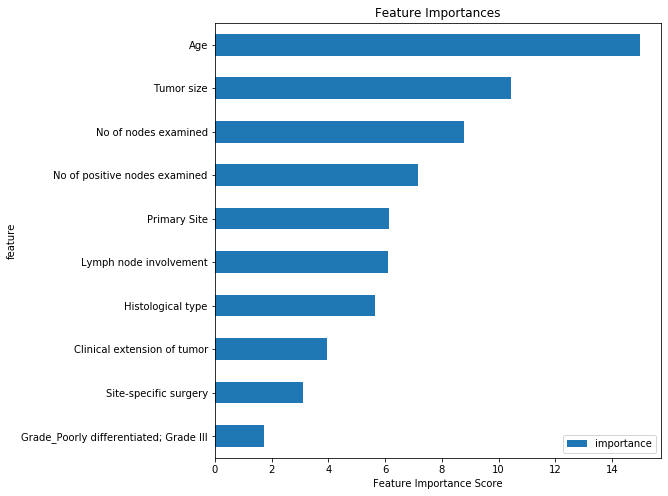

Accuracy: 0.7936979672705797


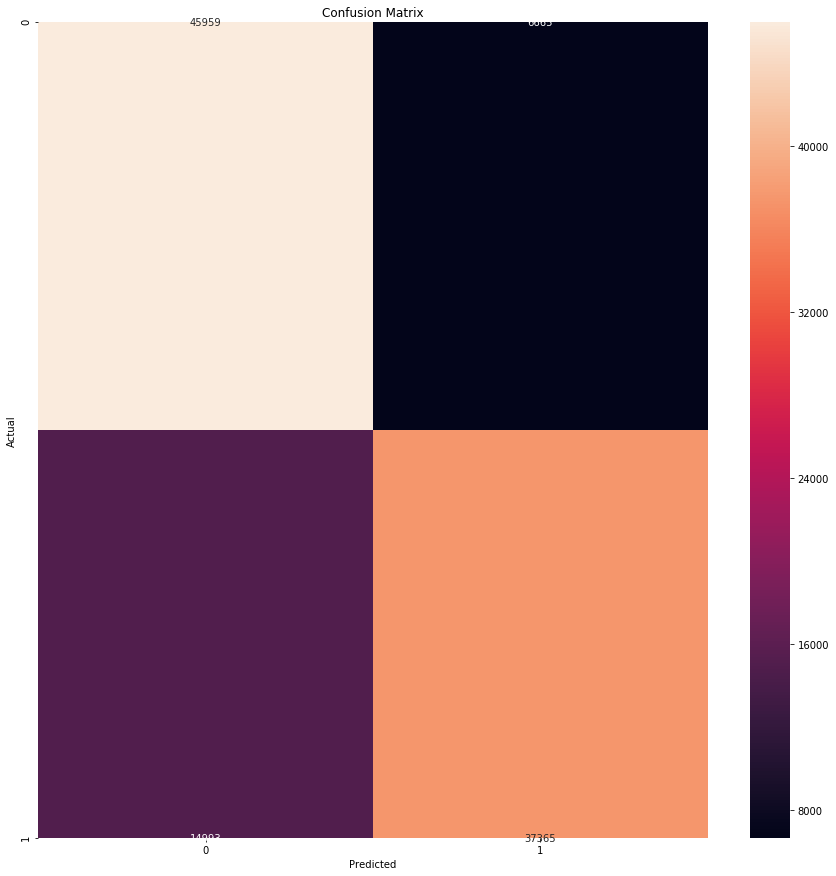

Classification Accuracy: 0.7936979672705797
F1 Score: 0.7753039797485164
AUC Score: 0.7934956430853513


KeyboardInterrupt: 

In [72]:


from matplotlib import pyplot as plt
import seaborn as sns

print('########### Catboost ###############')
feat_imp = pd.DataFrame({'importance':catModel.feature_importances_})    
feat_imp['feature'] = xtrain.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp[:10].iloc[:xtrain.shape[1]]
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title="Feature Importances", figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

accuracy_score = evalClassModel(catModel, ytest, y_pred_class, True)
    

### Best Parameters

In [75]:
cat.best_params_

{'colsample_bylevel': 0.8430726336825362,
 'depth': 10,
 'l2_leaf_reg': 3,
 'learning_rate': 0.1}

In [76]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(ytest, y_pred_class).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
print("")
print("")

#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.3f}%:".format(Accuracy))

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.3f}".format(Precision))

#Recall (sensitivity)
Recall = tp/(tp+fn) 
print("Recall {:0.3f}".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.3f}".format(f1))

#Specificity 
Specificity = tn/(tn+fp)
print("Specificity {:0.3f}".format(Specificity))

True Negatives:  45959
False Positives:  6665
False Negatives:  14993
True Positives:  37365


Accuracy 79.370%:
Precision 0.849
Recall 0.714
F1 Score 0.775
Specificity 0.873


C:\Users\kwang\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


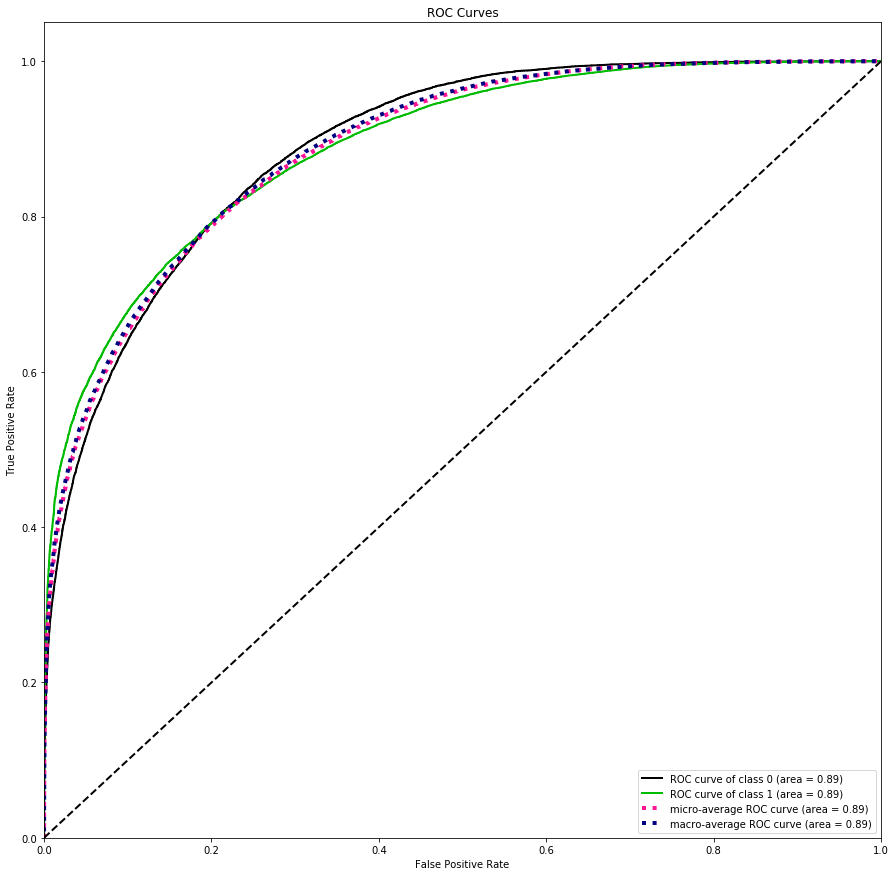

In [77]:
#ROC
import scikitplot as skplt #to make things easy
y_pred_proba = cat.predict_proba(xtest)
skplt.metrics.plot_roc_curve(ytest, y_pred_proba)
plt.show()

## 6. Performance Metrics Comparison of Four Classification Models

In [128]:
# summary= {'Models':["XGBoost","Graph-based SSL","Random Forest","Catboost"],
#          'Accuracy':[65.74,71.00,73.94,79.37],
#          'Sensitivity':[50.5,76.00,64.30,71.4],
#          'Specificity':[81.00,65.00,83.6,87.3],
#          'AUC':[60.12,78.00,73.92,79.39]}

summary= {'Models':["XGBoost","XGBoost","XGBoost","XGBoost","Graph-based SSL","Graph-based SSL","Graph-based SSL","Graph-based SSL",
          "Random Forest","Random Forest","Random Forest","Random Forest",
          "Catboost","Catboost","Catboost","Catboost"],
          'Performance Metrics':['Accuracy','Sensitivity','Specificity','AUC','Accuracy','Sensitivity','Specificity','AUC',
          'Accuracy','Sensitivity','Specificity','AUC','Accuracy','Sensitivity','Specificity','AUC'],
          'Percentage':[65.74,50.5,81.00,60.12,71.00,76.00,65.00,78.00,73.94,64.30,83.6,73.92,79.37,71.4,87.3,79.39]}
#          'Accuracy':[65.74,71.00,73.94,79.37],
#          'Sensitivity':[50.5,76.00,64.30,71.4],
#          'Specificity':[81.00,65.00,83.6,87.3],
#          'AUC':[60.12,78.00,73.92,79.39]}

In [129]:
temp=pd.DataFrame(summary);temp

Models Performance Metrics  Percentage
0           XGBoost            Accuracy       65.74
1           XGBoost         Sensitivity       50.50
2           XGBoost         Specificity       81.00
3           XGBoost                 AUC       60.12
4   Graph-based SSL            Accuracy       71.00
5   Graph-based SSL         Sensitivity       76.00
6   Graph-based SSL         Specificity       65.00
7   Graph-based SSL                 AUC       78.00
8     Random Forest            Accuracy       73.94
9     Random Forest         Sensitivity       64.30
10    Random Forest         Specificity       83.60
11    Random Forest                 AUC       73.92
12         Catboost            Accuracy       79.37
13         Catboost         Sensitivity       71.40
14         Catboost         Specificity       87.30
15         Catboost                 AUC       79.39

(0, 100)

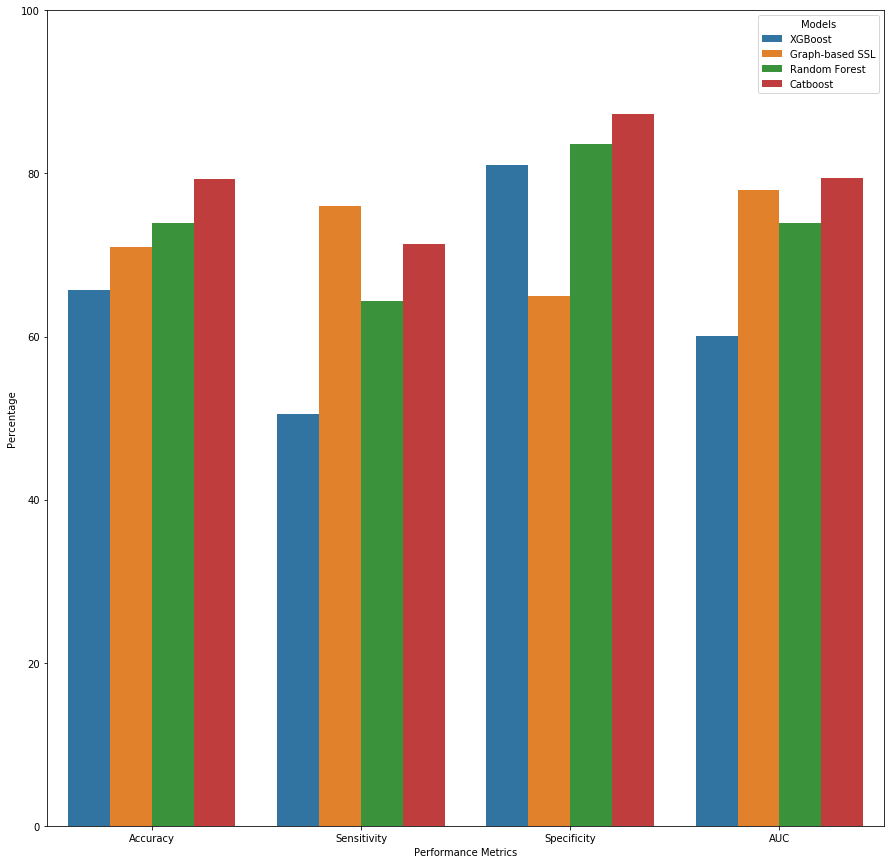

In [147]:
sns.barplot(x = 'Performance Metrics', y = 'Percentage', hue = 'Models', data = temp).set(xlabel='Performance Metrics', ylabel='Percentage')
plt.ylim(0, 100)